In [1]:
import os
import random
import shutil
import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'/kaggle/working'

In [3]:
cd ..

/kaggle


## Checking how my previous trained model on dataset works on provided videos

In [10]:
!git clone https://github.com/WongKinYiu/yolov7.git

fatal: destination path 'yolov7' already exists and is not an empty directory.


In [11]:
cd yolov7

/kaggle/working/yolov7


In [12]:
!python detect.py --weights "/kaggle/input/models-files/best(1)_yolov7.pt" --conf 0.50 --img-size 640 --source "/kaggle/input/drone-videos-btp/Hexa-X-Motor3.mp4"

Namespace(weights=['/kaggle/input/models-files/best(1)_yolov7.pt'], source='/kaggle/input/drone-videos-btp/Hexa-X-Motor3.mp4', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
/kaggle/working/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode un

In [13]:
!python detect.py --weights "/kaggle/input/models-files/best(1)_yolov7.pt" --conf 0.50 --img-size 640 --source "/kaggle/input/drone-videos-btp/VID20230803132116.mp4"

Namespace(weights=['/kaggle/input/models-files/best(1)_yolov7.pt'], source='/kaggle/input/drone-videos-btp/VID20230803132116.mp4', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
/kaggle/working/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mod

# Preprocessing videos

In [5]:
cd working

/kaggle/working


In [37]:
# import cv2
# import numpy as np
# import os
# from tqdm import tqdm

# def enhance_frame(frame, gamma=1.2):
#     # Convert to LAB and apply CLAHE
#     lab = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
#     l, a, b = cv2.split(lab)

#     clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
#     cl = clahe.apply(l)

#     limg = cv2.merge((cl, a, b))
#     frame = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

#     # Gamma correction
#     frame = np.array(255 * (frame / 255) ** (1.0 / gamma), dtype='uint8')

#     # Bilateral filter for smoothing while preserving edges
#     frame = cv2.bilateralFilter(frame, d=9, sigmaColor=75, sigmaSpace=75)

#     return frame

# def preprocess_video(input_path, output_path, resize=(640, 640)):
#     print(f"[INFO] Loading video: {input_path}")
#     cap = cv2.VideoCapture(input_path)
#     total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     fps = cap.get(cv2.CAP_PROP_FPS)

#     fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#     out = cv2.VideoWriter(output_path, fourcc, fps, resize)

#     print(f"[INFO] Preprocessing {total_frames} frames...")
#     for _ in tqdm(range(total_frames), desc="Processing frames"):
#         ret, frame = cap.read()
#         if not ret:
#             break
#         frame = cv2.resize(frame, resize)
#         enhanced = enhance_frame(frame)
#         out.write(enhanced)

#     cap.release()
#     out.release()
#     print(f"[INFO] Preprocessed video saved at: {output_path}")

# # ========== EXAMPLE USAGE ==========

# os.makedirs("processed_videos", exist_ok=True)

# input_video = "/kaggle/input/btp-videos/Cruise-flight/Cruise-flight/vid1.mp4"
# output_video = "processed_videos/train_1_preprocessed.mp4"

# preprocess_video(input_video, output_video)
import cv2
import numpy as np
import os
from tqdm import tqdm

def enhance_frame(frame, gamma=1.2):
    # Convert to LAB and apply CLAHE
    lab = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    limg = cv2.merge((cl, a, b))
    frame = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    # Gamma correction
    frame = np.array(255 * (frame / 255) ** (1.0 / gamma), dtype='uint8')

    # Bilateral filter for smoothing while preserving edges
    frame = cv2.bilateralFilter(frame, d=9, sigmaColor=75, sigmaSpace=75)

    return frame

def preprocess_video(input_path, output_path, resize=(640, 640)):
    print(f"[INFO] Loading video: {input_path}")
    cap = cv2.VideoCapture(input_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Ensure the output video is in the same resolution and FPS
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, resize)

    print(f"[INFO] Preprocessing {total_frames} frames...")
    for _ in tqdm(range(total_frames), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, resize)
        enhanced = enhance_frame(frame)
        out.write(enhanced)  # Write the preprocessed frame to the output video

    cap.release()
    out.release()
    print(f"[INFO] Preprocessed video saved at: {output_path}")

# ========== EXAMPLE USAGE ==========

os.makedirs("processed_videos", exist_ok=True)

input_video = "/kaggle/input/btp-videos/Cruise-flight/Cruise-flight/vid1.mp4"
output_video = "processed_videos/train_1_preprocessed.mp4"

preprocess_video(input_video, output_video)


[INFO] Loading video: /kaggle/input/btp-videos/Cruise-flight/Cruise-flight/vid1.mp4
[INFO] Preprocessing 725 frames...


Processing frames: 100%|██████████| 725/725 [01:15<00:00,  9.63it/s]

[INFO] Preprocessed video saved at: processed_videos/train_1_preprocessed.mp4


# Now fusion of outputs of three models - yolov7,v8 and v11

In [9]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [11]:
pwd

'/kaggle/working'

In [12]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 36.68 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [13]:
%cd yolov7

/kaggle/working/yolov7


In [14]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 1.23.5 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 1.23.5 which is incompatible.
mkl-fft 1.3.8 requires numpy<1.27.0,>=1.26.4, but you have numpy 1.23.5 which is incompatible.
datasets 3.5.0 requires fsspec[http]<=2024.12.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
woodwork 0.31.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
featuretools 1.31.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.


In [15]:
!pip install pycocotools


In [16]:
import torch
import numpy as np
from models.experimental import attempt_load
from utils.general import non_max_suppression, scale_coords
from utils.torch_utils import select_device

model_cache = {}

def detect_with_yolov7(frame, weights_path, conf_thresh=0.25, img_size=640):
    if weights_path not in model_cache:
        device = select_device('0' if torch.cuda.is_available() else 'cpu')
        model = attempt_load(weights_path, map_location=device)
        model_cache[weights_path] = model
    else:
        model = model_cache[weights_path]

    img = cv2.resize(frame, (img_size, img_size))
    img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to CHW
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img).float().div(255.0).unsqueeze(0)
    if torch.cuda.is_available():
        img = img.cuda()
        model = model.cuda()

    pred = model(img, augment=False)[0]
    pred = non_max_suppression(pred, conf_thresh, 0.45)[0]

    if pred is not None and len(pred):
        pred = pred.cpu().numpy()[0]
        x1, y1, x2, y2, _ = pred[:5]
        cx, cy = (x1 + x2) / 2, (y1 + y2) / 2
        return [cx, cy]
    return None


In [23]:
import torch
from ultralytics import YOLO  # for v8, v11
import cv2
import os
from tqdm import tqdm

def fuse_boxes(boxes):
    if len(boxes) == 0:
        return None
    elif len(boxes) == 1:
        return boxes[0]
    else:
        return [sum(x)/len(x) for x in zip(*boxes)]

# def run_fusion_on_video(video_path, output_txt_path,
#                         yolov7_weights, yolov8_weights, yolov11_weights,
#                         conf_thresh=0.25, resize=(640, 640)):

#     # Load models
#     print("[INFO] Loading models...")
#     model_yolov8 = YOLO(yolov8_weights)
#     model_yolov11 = YOLO(yolov11_weights)
#     print("[INFO] YOLOv8 & YOLOv11 loaded.")

#     cap = cv2.VideoCapture(video_path)
#     total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

#     with open(output_txt_path, "w") as out_file:
#         print("[INFO] Running inference and fusion...")
#         for i in tqdm(range(total_frames), desc="Frames"):
#             ret, frame = cap.read()
#             if not ret:
#                 break

#             # Resize for consistency
#             frame_resized = cv2.resize(frame, resize)

#             # Get predictions from each model
#             boxes = []

#             # YOLOv7
#             box7 = detect_with_yolov7(frame_resized, yolov7_weights, conf_thresh)
#             if box7: boxes.append(box7)

#             # YOLOv8
#             result8 = model_yolov8(frame_resized)[0]
#             if result8.boxes and len(result8.boxes.xyxy) > 0:
#                 xyxy = result8.boxes.xyxy[0].cpu().numpy()
#                 box8 = [(xyxy[0]+xyxy[2])/2, (xyxy[1]+xyxy[3])/2]  # center x, y
#                 boxes.append(box8)

    #         # YOLOv11
    #         result11 = model_yolov11(frame_resized)[0]
    #         if result11.boxes and len(result11.boxes.xyxy) > 0:
    #             xyxy = result11.boxes.xyxy[0].cpu().numpy()
    #             box11 = [(xyxy[0]+xyxy[2])/2, (xyxy[1]+xyxy[3])/2]
    #             boxes.append(box11)

    #         # Fused box
    #         fused = fuse_boxes(boxes)
    #         if fused:
    #             out_file.write(f"{i},{fused[0]:.2f},{fused[1]:.2f}\n")

    # cap.release()
    # print(f"[INFO] Bounding box fusion complete. Results saved to: {output_txt_path}")

import os

def run_fusion_on_video(video_path, output_txt_path,
                        yolov7_weights, yolov8_weights, yolov11_weights,
                        conf_thresh=0.25, resize=(640, 640)):

    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_txt_path), exist_ok=True)

    print("[INFO] Loading models...")
    model_yolov8 = YOLO(yolov8_weights)
    model_yolov11 = YOLO(yolov11_weights)
    print("[INFO] YOLOv8 & YOLOv11 loaded.")

    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    with open(output_txt_path, "w") as out_file:
        print("[INFO] Running inference and fusion...")
        for i in tqdm(range(total_frames), desc="Frames"):
            ret, frame = cap.read()
            if not ret:
                break

            frame_resized = cv2.resize(frame, resize)
            boxes = []

            # YOLOv7
            box7 = detect_with_yolov7(frame_resized, yolov7_weights, conf_thresh)
            if box7: boxes.append(box7)

            # YOLOv8
            result8 = model_yolov8(frame_resized)[0]
            if result8.boxes and len(result8.boxes.xyxy) > 0:
                xyxy = result8.boxes.xyxy[0].cpu().numpy()
                box8 = [(xyxy[0]+xyxy[2])/2, (xyxy[1]+xyxy[3])/2]
                boxes.append(box8)

            # YOLOv11
            result11 = model_yolov11(frame_resized)[0]
            if result11.boxes and len(result11.boxes.xyxy) > 0:
                xyxy = result11.boxes.xyxy[0].cpu().numpy()
                box11 = [(xyxy[0]+xyxy[2])/2, (xyxy[1]+xyxy[3])/2]
                boxes.append(box11)

            # Fuse detections
            fused = fuse_boxes(boxes)
            if fused:
                out_file.write(f"{i},{fused[0]:.2f},{fused[1]:.2f}\n")

    cap.release()
    print(f"[INFO] Bounding box fusion complete. Results saved to: {output_txt_path}")



In [21]:
cd ..


/kaggle/working


In [42]:
import torch
import numpy as np
import cv2
import os
from tqdm import tqdm
from models.experimental import attempt_load
from utils.general import non_max_suppression, scale_coords
from utils.torch_utils import select_device
from ultralytics import YOLO

model_cache = {}

def detect_with_yolov7(frame, weights_path, conf_thresh=0.25, img_size=640):
    if weights_path not in model_cache:
        device = select_device('0' if torch.cuda.is_available() else 'cpu')
        model = attempt_load(weights_path, map_location=device)
        model_cache[weights_path] = model
    else:
        model = model_cache[weights_path]

    img = cv2.resize(frame, (img_size, img_size))
    img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to CHW
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img).float().div(255.0).unsqueeze(0)
    if torch.cuda.is_available():
        img = img.cuda()
        model = model.cuda()

    pred = model(img, augment=False)[0]
    pred = non_max_suppression(pred, conf_thresh, 0.45)[0]

    if pred is not None and len(pred):
        pred = pred.cpu().numpy()[0]
        x1, y1, x2, y2, _ = pred[:5]
        cx, cy = (x1 + x2) / 2, (y1 + y2) / 2
        return [cx, cy]
    return None

def fuse_boxes(boxes):
    # Fuse detections by averaging the center positions
    if len(boxes) == 1:
        return boxes[0]
    elif len(boxes) == 2:
        return [(boxes[0][0] + boxes[1][0]) / 2, (boxes[0][1] + boxes[1][1]) / 2]
    elif len(boxes) == 3:
        return [(boxes[0][0] + boxes[1][0] + boxes[2][0]) / 3, 
                (boxes[0][1] + boxes[1][1] + boxes[2][1]) / 3]
    return None

def run_fusion_on_video(video_path, output_txt_path,
                        yolov7_weights, yolov8_weights, yolov11_weights,
                        conf_thresh=0.25, resize=(640, 640)):

    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_txt_path), exist_ok=True)

    print("[INFO] Loading models...")
    model_yolov8 = YOLO(yolov8_weights)
    model_yolov11 = YOLO(yolov11_weights)
    print("[INFO] YOLOv8 & YOLOv11 loaded.")

    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    with open(output_txt_path, "w") as out_file:
        print("[INFO] Running inference and fusion...")
        for i in tqdm(range(total_frames), desc="Frames"):
            ret, frame = cap.read()
            if not ret:
                break

            frame_resized = cv2.resize(frame, resize)
            boxes = []

            # YOLOv7 Detection
            box7 = detect_with_yolov7(frame_resized, yolov7_weights, conf_thresh)
            if box7: boxes.append(box7)

            # YOLOv8 Detection
            result8 = model_yolov8(frame_resized)[0]
            if result8.boxes and len(result8.boxes.xyxy) > 0:
                xyxy = result8.boxes.xyxy[0].cpu().numpy()
                box8 = [(xyxy[0] + xyxy[2]) / 2, (xyxy[1] + xyxy[3]) / 2]
                boxes.append(box8)

            # YOLOv11 Detection
            result11 = model_yolov11(frame_resized)[0]
            if result11.boxes and len(result11.boxes.xyxy) > 0:
                xyxy = result11.boxes.xyxy[0].cpu().numpy()
                box11 = [(xyxy[0] + xyxy[2]) / 2, (xyxy[1] + xyxy[3]) / 2]
                boxes.append(box11)

            # Fuse detections from all models
            fused = fuse_boxes(boxes)
            if fused:
                out_file.write(f"{i},{fused[0]:.2f},{fused[1]:.2f}\n")

    cap.release()
    # print(f"[INFO] Bounding box fusion complete. Results saved to: {output_txt_path}")

# ========== EXAMPLE USAGE ==========

video_path = "/kaggle/working/processed_videos/train_1_preprocessed.mp4"
output_txt_path = "results/fused_bboxes.txt"
yolov7_weights = "/kaggle/input/models-btp/best(1)_yolov7.pt"
yolov8_weights = "/kaggle/input/models-btp/yolov8x.pt"
yolov11_weights = "/kaggle/input/models-btp/yolov11_best.pt"

run_fusion_on_video(video_path, output_txt_path,
                    yolov7_weights, yolov8_weights, yolov11_weights)


[INFO] Loading models...
[INFO] YOLOv8 & YOLOv11 loaded.
[INFO] Running inference and fusion...


Frames:   0%|          | 0/725 [00:00<?, ?it/s]

Fusing layers... 

0: 640x640 1 person, 79.5ms
Speed: 1.6ms preprocess, 79.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.1ms
Speed: 1.5ms preprocess, 11.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   0%|          | 1/725 [00:01<23:38,  1.96s/it]


0: 640x640 1 person, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   0%|          | 2/725 [00:02<10:52,  1.11it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.6ms preprocess, 74.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   0%|          | 3/725 [00:02<06:47,  1.77it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.7ms preprocess, 75.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 4/725 [00:02<04:51,  2.47it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.5ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 5/725 [00:02<03:48,  3.15it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.5ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 6/725 [00:02<03:10,  3.78it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 7/725 [00:02<02:46,  4.32it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 8/725 [00:03<02:29,  4.79it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.3ms preprocess, 76.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 9/725 [00:03<02:19,  5.14it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.8ms preprocess, 75.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|▏         | 10/725 [00:03<02:11,  5.43it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 11/725 [00:03<02:06,  5.63it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.4ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 12/725 [00:03<02:03,  5.79it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.8ms preprocess, 75.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 13/725 [00:03<02:00,  5.89it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.5ms preprocess, 77.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 14/725 [00:04<01:59,  5.96it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.5ms preprocess, 76.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 15/725 [00:04<01:57,  6.03it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.9ms preprocess, 74.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 16/725 [00:04<01:56,  6.09it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 17/725 [00:04<01:55,  6.12it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.5ms preprocess, 75.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 18/725 [00:04<01:54,  6.15it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.5ms preprocess, 74.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 19/725 [00:04<01:54,  6.15it/s]


0: 640x640 1 person, 77.8ms
Speed: 1.5ms preprocess, 77.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 20/725 [00:05<01:54,  6.14it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.6ms preprocess, 75.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 21/725 [00:05<01:54,  6.17it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 22/725 [00:05<01:54,  6.15it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.6ms preprocess, 75.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 23/725 [00:05<01:53,  6.16it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 24/725 [00:05<01:53,  6.17it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 25/725 [00:05<01:53,  6.16it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.7ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▎         | 26/725 [00:06<01:53,  6.14it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.5ms preprocess, 77.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▎         | 27/725 [00:06<01:53,  6.13it/s]


0: 640x640 1 person, 77.4ms
Speed: 1.5ms preprocess, 77.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 28/725 [00:06<01:54,  6.10it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.8ms preprocess, 74.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 29/725 [00:06<01:54,  6.08it/s]


0: 640x640 1 person, 77.0ms
Speed: 1.5ms preprocess, 77.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 30/725 [00:06<01:54,  6.07it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.5ms preprocess, 76.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.1ms
Speed: 1.7ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 31/725 [00:06<01:54,  6.04it/s]


0: 640x640 1 person, 78.4ms
Speed: 1.8ms preprocess, 78.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 32/725 [00:07<01:55,  6.02it/s]


0: 640x640 1 person, 74.9ms
Speed: 2.1ms preprocess, 74.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.5ms
Speed: 1.4ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 33/725 [00:07<01:55,  6.00it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.8ms preprocess, 75.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 34/725 [00:07<01:55,  6.01it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.9ms preprocess, 74.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 35/725 [00:07<01:54,  6.02it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.6ms preprocess, 75.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 36/725 [00:07<01:53,  6.09it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.4ms preprocess, 76.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▌         | 37/725 [00:07<01:52,  6.09it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.6ms preprocess, 74.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▌         | 38/725 [00:07<01:52,  6.10it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.5ms preprocess, 75.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.5ms
Speed: 1.6ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▌         | 39/725 [00:08<01:53,  6.03it/s]


0: 640x640 1 person, 77.8ms
Speed: 1.6ms preprocess, 77.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 40/725 [00:08<01:54,  5.99it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.7ms preprocess, 77.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 41/725 [00:08<01:53,  6.02it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.6ms preprocess, 76.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 42/725 [00:08<01:53,  6.04it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.5ms preprocess, 76.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 43/725 [00:08<01:52,  6.07it/s]


0: 640x640 1 person, 79.8ms
Speed: 1.6ms preprocess, 79.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 44/725 [00:08<01:53,  6.01it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.4ms preprocess, 73.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 45/725 [00:09<01:52,  6.02it/s]


0: 640x640 1 person, 79.9ms
Speed: 1.9ms preprocess, 79.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▋         | 46/725 [00:09<01:53,  6.00it/s]


0: 640x640 1 person, 80.9ms
Speed: 1.7ms preprocess, 80.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 13.0ms
Speed: 1.7ms preprocess, 13.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▋         | 47/725 [00:09<01:53,  5.96it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.4ms preprocess, 77.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 48/725 [00:09<01:53,  5.95it/s]


0: 640x640 1 person, 78.9ms
Speed: 1.4ms preprocess, 78.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 49/725 [00:09<01:52,  5.99it/s]


0: 640x640 1 person, 77.9ms
Speed: 1.5ms preprocess, 77.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 50/725 [00:09<01:52,  6.00it/s]


0: 640x640 1 person, 79.1ms
Speed: 1.5ms preprocess, 79.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.7ms
Speed: 1.6ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 51/725 [00:10<01:52,  5.99it/s]


0: 640x640 1 person, 77.7ms
Speed: 1.5ms preprocess, 77.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 52/725 [00:10<01:52,  5.97it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.6ms preprocess, 72.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.9ms
Speed: 1.7ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 53/725 [00:10<01:51,  6.05it/s]


0: 640x640 1 person, 76.6ms
Speed: 2.0ms preprocess, 76.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 54/725 [00:10<01:51,  6.02it/s]


0: 640x640 1 person, 78.9ms
Speed: 1.4ms preprocess, 78.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 55/725 [00:10<01:51,  6.03it/s]


0: 640x640 1 person, 80.9ms
Speed: 1.6ms preprocess, 80.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 56/725 [00:10<01:51,  5.98it/s]


0: 640x640 1 person, 79.3ms
Speed: 1.8ms preprocess, 79.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 57/725 [00:11<01:52,  5.93it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.7ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 58/725 [00:11<01:51,  5.99it/s]


0: 640x640 1 person, 80.5ms
Speed: 1.7ms preprocess, 80.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 59/725 [00:11<01:51,  5.97it/s]


0: 640x640 1 person, 78.1ms
Speed: 1.5ms preprocess, 78.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 60/725 [00:11<01:51,  5.96it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.7ms preprocess, 75.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 61/725 [00:11<01:50,  5.98it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.5ms preprocess, 76.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▊         | 62/725 [00:11<01:50,  6.02it/s]


0: 640x640 1 person, 77.9ms
Speed: 1.6ms preprocess, 77.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▊         | 63/725 [00:12<01:50,  6.01it/s]


0: 640x640 1 person, 78.9ms
Speed: 1.9ms preprocess, 78.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.4ms
Speed: 1.5ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 64/725 [00:12<01:50,  5.96it/s]


0: 640x640 1 person, 77.0ms
Speed: 1.5ms preprocess, 77.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 65/725 [00:12<01:50,  5.96it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.8ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 66/725 [00:12<01:49,  5.99it/s]


0: 640x640 1 person, 78.5ms
Speed: 1.8ms preprocess, 78.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.7ms
Speed: 1.4ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 67/725 [00:12<01:50,  5.97it/s]


0: 640x640 1 person, 79.5ms
Speed: 1.5ms preprocess, 79.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 68/725 [00:13<01:50,  5.93it/s]


0: 640x640 1 person, 80.9ms
Speed: 1.4ms preprocess, 80.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.0ms
Speed: 1.6ms preprocess, 13.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 69/725 [00:13<01:50,  5.92it/s]


0: 640x640 1 person, 79.2ms
Speed: 1.6ms preprocess, 79.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 70/725 [00:13<01:51,  5.88it/s]


0: 640x640 1 person, 79.7ms
Speed: 1.6ms preprocess, 79.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 71/725 [00:13<01:50,  5.91it/s]


0: 640x640 1 person, 79.6ms
Speed: 1.6ms preprocess, 79.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 1.7ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 72/725 [00:13<01:50,  5.89it/s]


0: 640x640 1 person, 78.0ms
Speed: 1.8ms preprocess, 78.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 73/725 [00:13<01:50,  5.90it/s]


0: 640x640 1 person, 81.6ms
Speed: 1.7ms preprocess, 81.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 1.6ms preprocess, 13.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 74/725 [00:14<01:50,  5.88it/s]


0: 640x640 1 person, 80.3ms
Speed: 1.5ms preprocess, 80.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 75/725 [00:14<01:50,  5.87it/s]


0: 640x640 1 person, 79.9ms
Speed: 1.7ms preprocess, 79.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 76/725 [00:14<01:49,  5.91it/s]


0: 640x640 1 person, 80.0ms
Speed: 1.6ms preprocess, 80.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 1.7ms preprocess, 13.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 77/725 [00:14<01:50,  5.89it/s]


0: 640x640 1 person, 80.5ms
Speed: 1.5ms preprocess, 80.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 78/725 [00:14<01:49,  5.88it/s]


0: 640x640 1 person, 83.4ms
Speed: 1.5ms preprocess, 83.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.1ms
Speed: 1.5ms preprocess, 13.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 79/725 [00:14<01:50,  5.86it/s]


0: 640x640 1 person, 78.8ms
Speed: 1.6ms preprocess, 78.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 80/725 [00:15<01:50,  5.84it/s]


0: 640x640 1 person, 80.2ms
Speed: 1.9ms preprocess, 80.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.9ms
Speed: 1.6ms preprocess, 12.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 81/725 [00:15<01:50,  5.83it/s]


0: 640x640 1 person, 80.5ms
Speed: 1.6ms preprocess, 80.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█▏        | 82/725 [00:15<01:50,  5.84it/s]


0: 640x640 1 person, 81.8ms
Speed: 1.6ms preprocess, 81.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.0ms
Speed: 1.7ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█▏        | 83/725 [00:15<01:49,  5.84it/s]


0: 640x640 1 person, 80.6ms
Speed: 1.8ms preprocess, 80.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 84/725 [00:15<01:50,  5.80it/s]


0: 640x640 1 person, 80.9ms
Speed: 1.7ms preprocess, 80.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 1.5ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 85/725 [00:15<01:50,  5.79it/s]


0: 640x640 1 person, 77.4ms
Speed: 1.6ms preprocess, 77.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 86/725 [00:16<01:49,  5.82it/s]


0: 640x640 1 person, 80.3ms
Speed: 1.7ms preprocess, 80.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 17.3ms
Speed: 1.9ms preprocess, 17.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 87/725 [00:16<01:51,  5.74it/s]


0: 640x640 1 person, 81.7ms
Speed: 2.1ms preprocess, 81.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 88/725 [00:16<01:50,  5.74it/s]


0: 640x640 1 person, 79.7ms
Speed: 1.6ms preprocess, 79.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 89/725 [00:16<01:50,  5.76it/s]


0: 640x640 1 person, 82.2ms
Speed: 1.7ms preprocess, 82.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 2.2ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 90/725 [00:16<01:50,  5.73it/s]


0: 640x640 1 person, 79.0ms
Speed: 2.7ms preprocess, 79.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 91/725 [00:16<01:50,  5.74it/s]


0: 640x640 1 person, 75.9ms
Speed: 2.1ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.4ms
Speed: 1.6ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 92/725 [00:17<01:50,  5.72it/s]


0: 640x640 1 person, 83.7ms
Speed: 1.6ms preprocess, 83.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 1.5ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 93/725 [00:17<01:50,  5.74it/s]


0: 640x640 1 person, 77.9ms
Speed: 1.8ms preprocess, 77.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.9ms
Speed: 2.5ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 94/725 [00:17<01:49,  5.75it/s]


0: 640x640 1 person, 82.1ms
Speed: 1.6ms preprocess, 82.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.7ms
Speed: 1.4ms preprocess, 12.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 95/725 [00:17<01:49,  5.77it/s]


0: 640x640 1 person, 79.5ms
Speed: 1.4ms preprocess, 79.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 96/725 [00:17<01:47,  5.83it/s]


0: 640x640 1 person, 81.9ms
Speed: 1.5ms preprocess, 81.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 1.7ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 97/725 [00:17<01:47,  5.82it/s]


0: 640x640 1 person, 78.2ms
Speed: 1.5ms preprocess, 78.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▎        | 98/725 [00:18<01:47,  5.82it/s]


0: 640x640 1 person, 82.6ms
Speed: 1.6ms preprocess, 82.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.4ms
Speed: 1.5ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▎        | 99/725 [00:18<01:47,  5.82it/s]


0: 640x640 1 person, 80.1ms
Speed: 1.6ms preprocess, 80.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 100/725 [00:18<01:47,  5.82it/s]


0: 640x640 1 person, 83.8ms
Speed: 1.7ms preprocess, 83.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 13.1ms
Speed: 1.6ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 101/725 [00:18<01:47,  5.78it/s]


0: 640x640 1 person, 78.6ms
Speed: 1.6ms preprocess, 78.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 102/725 [00:18<01:47,  5.80it/s]


0: 640x640 1 person, 81.1ms
Speed: 1.7ms preprocess, 81.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.8ms
Speed: 1.6ms preprocess, 12.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 103/725 [00:19<01:46,  5.81it/s]


0: 640x640 1 person, 79.0ms
Speed: 1.7ms preprocess, 79.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 104/725 [00:19<01:46,  5.85it/s]


0: 640x640 1 person, 79.2ms
Speed: 1.7ms preprocess, 79.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 1.4ms preprocess, 13.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 105/725 [00:19<01:46,  5.82it/s]


0: 640x640 1 person, 80.4ms
Speed: 1.5ms preprocess, 80.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▍        | 106/725 [00:19<01:46,  5.84it/s]


0: 640x640 1 person, 81.0ms
Speed: 1.5ms preprocess, 81.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 1.5ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▍        | 107/725 [00:19<01:46,  5.81it/s]


0: 640x640 1 person, 77.9ms
Speed: 1.6ms preprocess, 77.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▍        | 108/725 [00:19<01:46,  5.82it/s]


0: 640x640 1 person, 80.6ms
Speed: 1.6ms preprocess, 80.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.0ms
Speed: 1.7ms preprocess, 13.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 109/725 [00:20<01:45,  5.82it/s]


0: 640x640 1 person, 77.6ms
Speed: 1.6ms preprocess, 77.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.7ms
Speed: 1.4ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 110/725 [00:20<01:45,  5.83it/s]


0: 640x640 1 person, 81.2ms
Speed: 1.5ms preprocess, 81.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 2.1ms preprocess, 13.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 111/725 [00:20<01:45,  5.84it/s]


0: 640x640 1 person, 78.5ms
Speed: 1.7ms preprocess, 78.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 112/725 [00:20<01:45,  5.83it/s]


0: 640x640 1 person, 82.2ms
Speed: 1.5ms preprocess, 82.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.6ms
Speed: 1.5ms preprocess, 13.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 113/725 [00:20<01:44,  5.83it/s]


0: 640x640 1 person, 78.9ms
Speed: 1.5ms preprocess, 78.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 114/725 [00:20<01:44,  5.83it/s]


0: 640x640 1 person, 82.3ms
Speed: 1.6ms preprocess, 82.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 1.7ms preprocess, 13.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 115/725 [00:21<01:45,  5.80it/s]


0: 640x640 1 person, 78.4ms
Speed: 1.6ms preprocess, 78.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 116/725 [00:21<01:44,  5.82it/s]


0: 640x640 1 person, 82.3ms
Speed: 1.5ms preprocess, 82.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 1.5ms preprocess, 13.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 117/725 [00:21<01:44,  5.83it/s]


0: 640x640 1 person, 1 dining table, 78.5ms
Speed: 1.8ms preprocess, 78.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▋        | 118/725 [00:21<01:44,  5.80it/s]


0: 640x640 1 person, 78.9ms
Speed: 1.8ms preprocess, 78.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▋        | 119/725 [00:21<01:43,  5.87it/s]


0: 640x640 1 person, 80.1ms
Speed: 1.5ms preprocess, 80.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 1.6ms preprocess, 13.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 120/725 [00:21<01:43,  5.86it/s]


0: 640x640 1 person, 78.8ms
Speed: 1.6ms preprocess, 78.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 121/725 [00:22<01:42,  5.88it/s]


0: 640x640 1 person, 79.7ms
Speed: 1.6ms preprocess, 79.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.0ms
Speed: 1.6ms preprocess, 13.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 122/725 [00:22<01:42,  5.89it/s]


0: 640x640 1 person, 78.6ms
Speed: 1.7ms preprocess, 78.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.8ms
Speed: 1.5ms preprocess, 12.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 123/725 [00:22<01:42,  5.88it/s]


0: 640x640 1 person, 77.8ms
Speed: 1.5ms preprocess, 77.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 124/725 [00:22<01:41,  5.93it/s]


0: 640x640 1 person, 79.8ms
Speed: 1.6ms preprocess, 79.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.6ms
Speed: 1.7ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 125/725 [00:22<01:41,  5.93it/s]


0: 640x640 1 person, 78.5ms
Speed: 1.7ms preprocess, 78.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 126/725 [00:22<01:41,  5.90it/s]


0: 640x640 1 person, 78.1ms
Speed: 1.4ms preprocess, 78.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 127/725 [00:23<01:41,  5.91it/s]


0: 640x640 1 person, 80.3ms
Speed: 1.6ms preprocess, 80.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 1.4ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 128/725 [00:23<01:40,  5.91it/s]


0: 640x640 1 person, 78.1ms
Speed: 1.6ms preprocess, 78.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 129/725 [00:23<01:41,  5.86it/s]


0: 640x640 1 person, 81.2ms
Speed: 1.6ms preprocess, 81.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 130/725 [00:23<01:41,  5.87it/s]


0: 640x640 1 person, 79.8ms
Speed: 1.5ms preprocess, 79.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 131/725 [00:23<01:41,  5.87it/s]


0: 640x640 1 person, 78.9ms
Speed: 1.7ms preprocess, 78.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.7ms
Speed: 1.6ms preprocess, 12.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 132/725 [00:23<01:41,  5.87it/s]


0: 640x640 1 person, 78.7ms
Speed: 1.8ms preprocess, 78.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.8ms
Speed: 1.5ms preprocess, 12.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 133/725 [00:24<01:41,  5.86it/s]


0: 640x640 1 person, 79.7ms
Speed: 1.5ms preprocess, 79.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 134/725 [00:24<01:40,  5.87it/s]


0: 640x640 1 person, 81.2ms
Speed: 1.6ms preprocess, 81.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.0ms
Speed: 1.6ms preprocess, 13.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▊        | 135/725 [00:24<01:40,  5.87it/s]


0: 640x640 1 person, 78.4ms
Speed: 1.6ms preprocess, 78.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 136/725 [00:24<01:40,  5.87it/s]


0: 640x640 1 person, 79.8ms
Speed: 1.6ms preprocess, 79.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 137/725 [00:24<01:39,  5.89it/s]


0: 640x640 1 person, 79.2ms
Speed: 1.7ms preprocess, 79.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.9ms
Speed: 1.4ms preprocess, 12.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 138/725 [00:24<01:39,  5.91it/s]


0: 640x640 1 person, 79.5ms
Speed: 1.6ms preprocess, 79.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 139/725 [00:25<01:39,  5.90it/s]


0: 640x640 1 person, 79.0ms
Speed: 1.7ms preprocess, 79.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.6ms
Speed: 1.7ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 140/725 [00:25<01:38,  5.92it/s]


0: 640x640 1 person, 79.6ms
Speed: 1.6ms preprocess, 79.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.9ms
Speed: 1.6ms preprocess, 12.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 141/725 [00:25<01:38,  5.92it/s]


0: 640x640 1 person, 80.0ms
Speed: 1.5ms preprocess, 80.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|█▉        | 142/725 [00:25<01:38,  5.92it/s]


0: 640x640 1 person, 78.5ms
Speed: 1.7ms preprocess, 78.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|█▉        | 143/725 [00:25<01:38,  5.93it/s]


0: 640x640 1 person, 78.9ms
Speed: 1.7ms preprocess, 78.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|█▉        | 144/725 [00:26<01:37,  5.96it/s]


0: 640x640 1 person, 79.1ms
Speed: 1.6ms preprocess, 79.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 145/725 [00:26<01:37,  5.94it/s]


0: 640x640 1 person, 78.0ms
Speed: 1.6ms preprocess, 78.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 146/725 [00:26<01:36,  5.97it/s]


0: 640x640 1 person, 81.6ms
Speed: 1.7ms preprocess, 81.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 1.6ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 147/725 [00:26<01:37,  5.91it/s]


0: 640x640 1 person, 79.3ms
Speed: 1.7ms preprocess, 79.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 148/725 [00:26<01:37,  5.91it/s]


0: 640x640 1 person, 78.4ms
Speed: 1.5ms preprocess, 78.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 149/725 [00:26<01:36,  5.94it/s]


0: 640x640 1 person, 78.4ms
Speed: 1.6ms preprocess, 78.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 150/725 [00:27<01:37,  5.88it/s]


0: 640x640 1 person, 79.0ms
Speed: 1.7ms preprocess, 79.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 151/725 [00:27<01:36,  5.92it/s]


0: 640x640 1 person, 79.1ms
Speed: 1.4ms preprocess, 79.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.3ms preprocess, 12.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 152/725 [00:27<01:36,  5.93it/s]


0: 640x640 1 person, 79.1ms
Speed: 1.6ms preprocess, 79.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.6ms preprocess, 12.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 153/725 [00:27<01:36,  5.92it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.8ms preprocess, 76.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 154/725 [00:27<01:35,  5.95it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.9ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██▏       | 155/725 [00:27<01:34,  6.00it/s]


0: 640x640 1 person, 77.8ms
Speed: 1.7ms preprocess, 77.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 156/725 [00:28<01:34,  6.01it/s]


0: 640x640 1 person, 77.3ms
Speed: 1.8ms preprocess, 77.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 157/725 [00:28<01:34,  6.01it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.7ms preprocess, 75.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 158/725 [00:28<01:34,  6.01it/s]


0: 640x640 1 person, 80.2ms
Speed: 1.5ms preprocess, 80.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 159/725 [00:28<01:34,  6.00it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.5ms preprocess, 76.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 160/725 [00:28<01:33,  6.03it/s]


0: 640x640 1 person, 78.7ms
Speed: 1.7ms preprocess, 78.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 161/725 [00:28<01:33,  6.01it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.6ms preprocess, 76.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.5ms preprocess, 12.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 162/725 [00:29<01:33,  6.00it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.5ms preprocess, 75.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 163/725 [00:29<01:33,  6.01it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.6ms preprocess, 76.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 164/725 [00:29<01:32,  6.05it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.9ms preprocess, 74.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 165/725 [00:29<01:32,  6.08it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.7ms preprocess, 75.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 166/725 [00:29<01:31,  6.11it/s]


0: 640x640 1 person, 77.2ms
Speed: 1.5ms preprocess, 77.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 167/725 [00:29<01:31,  6.12it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 168/725 [00:29<01:30,  6.14it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.8ms preprocess, 76.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 169/725 [00:30<01:30,  6.15it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.6ms preprocess, 75.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 170/725 [00:30<01:29,  6.17it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▎       | 171/725 [00:30<01:29,  6.16it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.6ms preprocess, 75.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▎       | 172/725 [00:30<01:29,  6.15it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.5ms preprocess, 76.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▍       | 173/725 [00:30<01:29,  6.17it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.6ms preprocess, 76.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▍       | 174/725 [00:30<01:29,  6.17it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.5ms preprocess, 74.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▍       | 175/725 [00:31<01:29,  6.18it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.9ms preprocess, 74.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▍       | 176/725 [00:31<01:28,  6.19it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▍       | 177/725 [00:31<01:28,  6.19it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.6ms preprocess, 74.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▍       | 178/725 [00:31<01:28,  6.19it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.8ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▍       | 179/725 [00:31<01:28,  6.19it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.8ms preprocess, 76.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▍       | 180/725 [00:31<01:28,  6.18it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.5ms preprocess, 76.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▍       | 181/725 [00:32<01:28,  6.18it/s]


0: 640x640 1 person, 77.4ms
Speed: 1.5ms preprocess, 77.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▌       | 182/725 [00:32<01:28,  6.15it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▌       | 183/725 [00:32<01:28,  6.16it/s]


0: 640x640 1 person, 77.2ms
Speed: 1.6ms preprocess, 77.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▌       | 184/725 [00:32<01:27,  6.17it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 185/725 [00:32<01:27,  6.18it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 186/725 [00:32<01:27,  6.17it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 187/725 [00:33<01:27,  6.16it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 188/725 [00:33<01:26,  6.19it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 189/725 [00:33<01:26,  6.20it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.9ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 190/725 [00:33<01:26,  6.18it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▋       | 191/725 [00:33<01:26,  6.18it/s]


0: 640x640 1 person, 77.9ms
Speed: 1.4ms preprocess, 77.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▋       | 192/725 [00:33<01:26,  6.17it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.6ms preprocess, 75.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 193/725 [00:34<01:26,  6.18it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.7ms preprocess, 75.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 194/725 [00:34<01:25,  6.17it/s]


0: 640x640 1 person, 77.2ms
Speed: 1.4ms preprocess, 77.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 195/725 [00:34<01:25,  6.19it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 196/725 [00:34<01:25,  6.20it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.5ms preprocess, 76.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 197/725 [00:34<01:25,  6.17it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 198/725 [00:34<01:25,  6.18it/s]


0: 640x640 1 person, 77.4ms
Speed: 1.5ms preprocess, 77.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 199/725 [00:35<01:25,  6.18it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.6ms preprocess, 75.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 200/725 [00:35<01:24,  6.18it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 201/725 [00:35<01:24,  6.20it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.9ms preprocess, 74.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 202/725 [00:35<01:24,  6.18it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 203/725 [00:35<01:24,  6.18it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.5ms preprocess, 76.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 204/725 [00:35<01:24,  6.17it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.7ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 205/725 [00:35<01:24,  6.15it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.7ms preprocess, 74.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 206/725 [00:36<01:24,  6.17it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.6ms preprocess, 75.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▊       | 207/725 [00:36<01:24,  6.17it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.7ms preprocess, 75.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▊       | 208/725 [00:36<01:23,  6.16it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.6ms preprocess, 75.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▉       | 209/725 [00:36<01:23,  6.18it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.5ms preprocess, 73.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▉       | 210/725 [00:36<01:22,  6.22it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▉       | 211/725 [00:36<01:22,  6.21it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.8ms preprocess, 75.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▉       | 212/725 [00:37<01:23,  6.16it/s]


0: 640x640 1 person, 75.7ms
Speed: 2.0ms preprocess, 75.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▉       | 213/725 [00:37<01:23,  6.16it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.7ms preprocess, 75.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|██▉       | 214/725 [00:37<01:22,  6.17it/s]


0: 640x640 1 person, 77.6ms
Speed: 1.6ms preprocess, 77.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|██▉       | 215/725 [00:37<01:22,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|██▉       | 216/725 [00:37<01:22,  6.18it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.7ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|██▉       | 217/725 [00:37<01:22,  6.18it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.6ms preprocess, 74.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|███       | 218/725 [00:38<01:21,  6.20it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|███       | 219/725 [00:38<01:21,  6.21it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|███       | 220/725 [00:38<01:21,  6.18it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.5ms preprocess, 75.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|███       | 221/725 [00:38<01:21,  6.18it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.3ms preprocess, 76.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███       | 222/725 [00:38<01:21,  6.17it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.8ms preprocess, 75.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███       | 223/725 [00:38<01:21,  6.18it/s]


0: 640x640 1 person, 76.0ms
Speed: 2.0ms preprocess, 76.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███       | 224/725 [00:39<01:21,  6.18it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.4ms preprocess, 73.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███       | 225/725 [00:39<01:20,  6.22it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.7ms preprocess, 75.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███       | 226/725 [00:39<01:20,  6.21it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███▏      | 227/725 [00:39<01:20,  6.18it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.9ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███▏      | 228/725 [00:39<01:20,  6.18it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 229/725 [00:39<01:20,  6.19it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 230/725 [00:40<01:20,  6.18it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 231/725 [00:40<01:19,  6.18it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.8ms preprocess, 73.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 232/725 [00:40<01:19,  6.19it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.5ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 233/725 [00:40<01:19,  6.19it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 234/725 [00:40<01:19,  6.18it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 235/725 [00:40<01:19,  6.17it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 236/725 [00:41<01:19,  6.19it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 237/725 [00:41<01:18,  6.20it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 238/725 [00:41<01:18,  6.17it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.9ms preprocess, 74.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 239/725 [00:41<01:18,  6.19it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.5ms preprocess, 73.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 240/725 [00:41<01:18,  6.21it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 241/725 [00:41<01:18,  6.20it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.8ms preprocess, 73.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 242/725 [00:41<01:18,  6.18it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.8ms preprocess, 73.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▎      | 243/725 [00:42<01:17,  6.19it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.6ms preprocess, 73.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▎      | 244/725 [00:42<01:17,  6.20it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.5ms preprocess, 72.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 245/725 [00:42<01:17,  6.19it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.8ms preprocess, 73.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 246/725 [00:42<01:17,  6.18it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.5ms preprocess, 73.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 247/725 [00:42<01:17,  6.17it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 248/725 [00:42<01:17,  6.18it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.8ms preprocess, 75.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 249/725 [00:43<01:17,  6.16it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.5ms preprocess, 76.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 250/725 [00:43<01:16,  6.17it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.5ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▍      | 251/725 [00:43<01:16,  6.19it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.5ms preprocess, 71.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▍      | 252/725 [00:43<01:16,  6.21it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.9ms preprocess, 73.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▍      | 253/725 [00:43<01:16,  6.19it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.8ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▌      | 254/725 [00:43<01:15,  6.21it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.5ms preprocess, 74.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▌      | 255/725 [00:44<01:15,  6.19it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▌      | 256/725 [00:44<01:15,  6.18it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▌      | 257/725 [00:44<01:15,  6.16it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.5ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▌      | 258/725 [00:44<01:15,  6.19it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.5ms preprocess, 72.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▌      | 259/725 [00:44<01:14,  6.22it/s]


0: 640x640 1 person, 74.1ms
Speed: 2.0ms preprocess, 74.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▌      | 260/725 [00:44<01:14,  6.22it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.8ms preprocess, 73.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▌      | 261/725 [00:45<01:14,  6.21it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.6ms preprocess, 72.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▌      | 262/725 [00:45<01:14,  6.22it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▋      | 263/725 [00:45<01:14,  6.23it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.8ms preprocess, 73.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▋      | 264/725 [00:45<01:13,  6.23it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.8ms preprocess, 72.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 265/725 [00:45<01:13,  6.26it/s]


0: 640x640 1 person, 71.1ms
Speed: 1.8ms preprocess, 71.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 266/725 [00:45<01:12,  6.30it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.5ms preprocess, 73.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 267/725 [00:45<01:12,  6.31it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 268/725 [00:46<01:12,  6.26it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.5ms preprocess, 73.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 269/725 [00:46<01:12,  6.26it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.7ms preprocess, 73.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 270/725 [00:46<01:13,  6.21it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 271/725 [00:46<01:13,  6.20it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.7ms preprocess, 73.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 272/725 [00:46<01:12,  6.21it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.8ms preprocess, 71.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 273/725 [00:46<01:12,  6.22it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.8ms preprocess, 72.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 274/725 [00:47<01:12,  6.23it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.6ms preprocess, 72.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 275/725 [00:47<01:12,  6.24it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 276/725 [00:47<01:12,  6.23it/s]


0: 640x640 1 person, 71.4ms
Speed: 1.5ms preprocess, 71.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 277/725 [00:47<01:11,  6.25it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.5ms preprocess, 73.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 278/725 [00:47<01:11,  6.25it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.6ms preprocess, 76.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 2.2ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 279/725 [00:47<01:11,  6.23it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▊      | 280/725 [00:48<01:11,  6.25it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 281/725 [00:48<01:10,  6.25it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.8ms preprocess, 73.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 282/725 [00:48<01:10,  6.25it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.8ms preprocess, 73.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 283/725 [00:48<01:10,  6.25it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.5ms preprocess, 72.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 284/725 [00:48<01:10,  6.26it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.7ms preprocess, 72.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.6ms
Speed: 1.7ms preprocess, 12.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 285/725 [00:48<01:10,  6.24it/s]


0: 640x640 1 person, 70.7ms
Speed: 1.8ms preprocess, 70.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 286/725 [00:49<01:10,  6.25it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.5ms preprocess, 73.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.3ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|███▉      | 287/725 [00:49<01:10,  6.26it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.5ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.5ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|███▉      | 288/725 [00:49<01:09,  6.27it/s]


0: 640x640 1 person, 71.2ms
Speed: 1.7ms preprocess, 71.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|███▉      | 289/725 [00:49<01:08,  6.33it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.6ms preprocess, 74.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 290/725 [00:49<01:08,  6.32it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.6ms preprocess, 71.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 291/725 [00:49<01:08,  6.32it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.7ms preprocess, 71.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 292/725 [00:49<01:08,  6.28it/s]


0: 640x640 1 person, 70.8ms
Speed: 1.6ms preprocess, 70.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 293/725 [00:50<01:08,  6.31it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.6ms preprocess, 73.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.3ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 294/725 [00:50<01:08,  6.31it/s]


0: 640x640 2 persons, 72.6ms
Speed: 1.7ms preprocess, 72.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 295/725 [00:50<01:07,  6.33it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 296/725 [00:50<01:08,  6.31it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.4ms preprocess, 72.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 297/725 [00:50<01:07,  6.30it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 298/725 [00:50<01:08,  6.24it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.6ms preprocess, 72.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 299/725 [00:51<01:08,  6.25it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.3ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████▏     | 300/725 [00:51<01:08,  6.23it/s]


0: 640x640 1 person, 70.0ms
Speed: 1.5ms preprocess, 70.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 301/725 [00:51<01:07,  6.29it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.7ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 302/725 [00:51<01:07,  6.29it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.5ms preprocess, 73.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 303/725 [00:51<01:06,  6.33it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.5ms preprocess, 71.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 304/725 [00:51<01:06,  6.36it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.7ms preprocess, 73.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 305/725 [00:52<01:06,  6.34it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.5ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 306/725 [00:52<01:06,  6.32it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.5ms preprocess, 72.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 307/725 [00:52<01:05,  6.34it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 308/725 [00:52<01:05,  6.34it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.5ms preprocess, 74.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 309/725 [00:52<01:05,  6.32it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.5ms preprocess, 73.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 310/725 [00:52<01:06,  6.29it/s]


0: 640x640 1 person, 70.4ms
Speed: 1.4ms preprocess, 70.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 311/725 [00:53<01:05,  6.31it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.6ms preprocess, 72.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 312/725 [00:53<01:05,  6.34it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.6ms preprocess, 73.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 313/725 [00:53<01:04,  6.34it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.5ms preprocess, 73.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 314/725 [00:53<01:04,  6.34it/s]


0: 640x640 1 person, 69.8ms
Speed: 1.9ms preprocess, 69.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 315/725 [00:53<01:04,  6.36it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.5ms preprocess, 71.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▎     | 316/725 [00:53<01:04,  6.36it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.4ms preprocess, 72.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▎     | 317/725 [00:53<01:03,  6.38it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.7ms preprocess, 74.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 318/725 [00:54<01:04,  6.33it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.8ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 319/725 [00:54<01:04,  6.33it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.4ms preprocess, 74.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 320/725 [00:54<01:04,  6.29it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.5ms preprocess, 74.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 321/725 [00:54<01:04,  6.26it/s]


0: 640x640 1 person, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 322/725 [00:54<01:03,  6.30it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.6ms preprocess, 72.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.4ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 323/725 [00:54<01:03,  6.31it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.6ms preprocess, 71.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 324/725 [00:55<01:03,  6.34it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.3ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 325/725 [00:55<01:03,  6.33it/s]


0: 640x640 1 person, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 326/725 [00:55<01:02,  6.36it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 327/725 [00:55<01:02,  6.35it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.9ms preprocess, 73.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 328/725 [00:55<01:02,  6.32it/s]


0: 640x640 1 person, 71.2ms
Speed: 1.6ms preprocess, 71.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 329/725 [00:55<01:02,  6.36it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.5ms preprocess, 73.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 330/725 [00:55<01:02,  6.36it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.8ms preprocess, 72.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 331/725 [00:56<01:02,  6.32it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.6ms preprocess, 72.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 332/725 [00:56<01:02,  6.31it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.8ms preprocess, 72.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 333/725 [00:56<01:02,  6.30it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.7ms preprocess, 73.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 334/725 [00:56<01:02,  6.30it/s]


0: 640x640 1 person, 70.5ms
Speed: 1.7ms preprocess, 70.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 335/725 [00:56<01:01,  6.35it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.5ms preprocess, 73.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▋     | 336/725 [00:56<01:01,  6.37it/s]


0: 640x640 1 person, 71.7ms
Speed: 1.9ms preprocess, 71.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▋     | 337/725 [00:57<01:01,  6.34it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.6ms preprocess, 73.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 338/725 [00:57<01:01,  6.30it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.7ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 339/725 [00:57<01:01,  6.28it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.7ms preprocess, 73.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 340/725 [00:57<01:01,  6.29it/s]


0: 640x640 1 person, 71.4ms
Speed: 1.7ms preprocess, 71.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 341/725 [00:57<01:00,  6.33it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.8ms preprocess, 73.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 342/725 [00:57<01:00,  6.34it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.8ms preprocess, 72.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 343/725 [00:58<01:00,  6.32it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.9ms preprocess, 73.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 344/725 [00:58<01:00,  6.31it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.6ms preprocess, 72.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 345/725 [00:58<01:00,  6.31it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.7ms preprocess, 72.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 346/725 [00:58<00:59,  6.33it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 347/725 [00:58<00:59,  6.36it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.5ms preprocess, 72.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 348/725 [00:58<00:59,  6.36it/s]


0: 640x640 1 person, 71.0ms
Speed: 1.6ms preprocess, 71.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 349/725 [00:59<00:59,  6.35it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.5ms preprocess, 72.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.5ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 350/725 [00:59<00:58,  6.37it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.4ms preprocess, 74.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 351/725 [00:59<00:58,  6.39it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.8ms preprocess, 72.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▊     | 352/725 [00:59<00:58,  6.34it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▊     | 353/725 [00:59<00:58,  6.31it/s]


0: 640x640 1 person, 70.6ms
Speed: 1.6ms preprocess, 70.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 354/725 [00:59<00:58,  6.29it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 355/725 [00:59<00:58,  6.28it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.7ms preprocess, 71.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 356/725 [01:00<00:58,  6.29it/s]


0: 640x640 1 person, 69.7ms
Speed: 1.7ms preprocess, 69.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 357/725 [01:00<00:58,  6.34it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.4ms preprocess, 72.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 358/725 [01:00<00:57,  6.35it/s]


0: 640x640 1 person, 69.7ms
Speed: 1.6ms preprocess, 69.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 359/725 [01:00<00:57,  6.36it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.6ms preprocess, 73.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 360/725 [01:00<00:57,  6.31it/s]


0: 640x640 1 person, 69.8ms
Speed: 1.5ms preprocess, 69.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.3ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 361/725 [01:00<00:57,  6.37it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.5ms preprocess, 74.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 362/725 [01:01<00:56,  6.37it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.7ms preprocess, 72.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 363/725 [01:01<00:57,  6.35it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.6ms preprocess, 73.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 364/725 [01:01<00:56,  6.34it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.7ms preprocess, 72.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 365/725 [01:01<00:56,  6.33it/s]


0: 640x640 (no detections), 71.6ms
Speed: 1.8ms preprocess, 71.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 366/725 [01:01<00:56,  6.37it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.6ms preprocess, 73.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 367/725 [01:01<00:56,  6.36it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.7ms preprocess, 71.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 368/725 [01:01<00:56,  6.37it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.5ms preprocess, 72.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 369/725 [01:02<00:55,  6.37it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.4ms preprocess, 71.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 370/725 [01:02<00:55,  6.40it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.6ms preprocess, 72.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 371/725 [01:02<00:55,  6.38it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.7ms preprocess, 73.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████▏    | 372/725 [01:02<00:55,  6.35it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.5ms preprocess, 72.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████▏    | 373/725 [01:02<00:55,  6.35it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.5ms preprocess, 74.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 374/725 [01:02<00:55,  6.30it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.8ms preprocess, 72.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 375/725 [01:03<00:55,  6.31it/s]


0: 640x640 1 person, 71.1ms
Speed: 1.6ms preprocess, 71.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 376/725 [01:03<00:54,  6.36it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 377/725 [01:03<00:54,  6.33it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.5ms preprocess, 72.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 378/725 [01:03<00:55,  6.30it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.7ms preprocess, 72.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 379/725 [01:03<00:55,  6.26it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.6ms preprocess, 71.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 380/725 [01:03<00:54,  6.29it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.5ms preprocess, 71.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.4ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 381/725 [01:04<00:54,  6.32it/s]


0: 640x640 1 person, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 382/725 [01:04<00:53,  6.36it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.7ms preprocess, 73.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 383/725 [01:04<00:53,  6.35it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.6ms preprocess, 72.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 384/725 [01:04<00:53,  6.34it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.6ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 385/725 [01:04<00:53,  6.33it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.8ms preprocess, 71.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 386/725 [01:04<00:53,  6.35it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.6ms preprocess, 72.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 387/725 [01:04<00:53,  6.37it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▎    | 388/725 [01:05<00:53,  6.35it/s]


0: 640x640 1 person, 70.4ms
Speed: 1.5ms preprocess, 70.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▎    | 389/725 [01:05<00:52,  6.37it/s]


0: 640x640 1 person, 71.1ms
Speed: 1.8ms preprocess, 71.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 390/725 [01:05<00:52,  6.35it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.7ms preprocess, 72.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 391/725 [01:05<00:52,  6.36it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.5ms preprocess, 72.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 392/725 [01:05<00:52,  6.39it/s]


0: 640x640 2 persons, 72.2ms
Speed: 1.5ms preprocess, 72.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 393/725 [01:05<00:52,  6.36it/s]


0: 640x640 1 person, 69.9ms
Speed: 1.6ms preprocess, 69.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 394/725 [01:06<00:51,  6.37it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.6ms preprocess, 75.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.4ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 395/725 [01:06<00:52,  6.32it/s]


0: 640x640 1 person, 70.3ms
Speed: 1.6ms preprocess, 70.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▍    | 396/725 [01:06<00:51,  6.38it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.4ms preprocess, 74.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▍    | 397/725 [01:06<00:51,  6.36it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.8ms preprocess, 72.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▍    | 398/725 [01:06<00:51,  6.33it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.6ms preprocess, 73.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 399/725 [01:06<00:51,  6.28it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.4ms preprocess, 71.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.6ms
Speed: 1.7ms preprocess, 13.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 400/725 [01:07<00:52,  6.24it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.5ms preprocess, 72.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 401/725 [01:07<00:51,  6.27it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 402/725 [01:07<00:51,  6.24it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.3ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 403/725 [01:07<00:51,  6.24it/s]


0: 640x640 1 person, 71.7ms
Speed: 1.5ms preprocess, 71.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 404/725 [01:07<00:51,  6.28it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.5ms preprocess, 71.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 405/725 [01:07<00:50,  6.31it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.7ms preprocess, 74.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 406/725 [01:08<00:50,  6.31it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.4ms preprocess, 73.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 407/725 [01:08<00:50,  6.32it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.6ms preprocess, 72.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▋    | 408/725 [01:08<00:50,  6.32it/s]


0: 640x640 1 person, 70.0ms
Speed: 1.7ms preprocess, 70.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▋    | 409/725 [01:08<00:49,  6.34it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.8ms preprocess, 72.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 410/725 [01:08<00:49,  6.35it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 411/725 [01:08<00:49,  6.36it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.5ms preprocess, 74.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 412/725 [01:08<00:49,  6.31it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.7ms preprocess, 72.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 413/725 [01:09<00:49,  6.29it/s]


0: 640x640 1 person, 69.3ms
Speed: 1.7ms preprocess, 69.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 414/725 [01:09<00:49,  6.29it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.5ms preprocess, 73.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 415/725 [01:09<00:49,  6.25it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.8ms preprocess, 73.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 416/725 [01:09<00:49,  6.25it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 417/725 [01:09<00:49,  6.24it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.7ms preprocess, 74.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 418/725 [01:09<00:49,  6.25it/s]


0: 640x640 1 person, 71.4ms
Speed: 1.6ms preprocess, 71.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 419/725 [01:10<00:48,  6.30it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 420/725 [01:10<00:48,  6.31it/s]


0: 640x640 1 person, 70.9ms
Speed: 1.7ms preprocess, 70.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 421/725 [01:10<00:48,  6.31it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.5ms preprocess, 72.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 422/725 [01:10<00:47,  6.32it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.5ms preprocess, 73.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 423/725 [01:10<00:47,  6.29it/s]


0: 640x640 1 person, 70.9ms
Speed: 1.6ms preprocess, 70.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 424/725 [01:10<00:47,  6.32it/s]


0: 640x640 1 person, 70.8ms
Speed: 1.5ms preprocess, 70.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▊    | 425/725 [01:11<00:47,  6.33it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.6ms preprocess, 72.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 426/725 [01:11<00:47,  6.36it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.5ms preprocess, 72.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 427/725 [01:11<00:47,  6.33it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.5ms preprocess, 71.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 428/725 [01:11<00:47,  6.30it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.5ms preprocess, 71.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 429/725 [01:11<00:47,  6.29it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.7ms preprocess, 72.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 430/725 [01:11<00:46,  6.28it/s]


0: 640x640 1 person, 71.6ms
Speed: 1.6ms preprocess, 71.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 431/725 [01:11<00:46,  6.31it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.7ms preprocess, 73.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|█████▉    | 432/725 [01:12<00:46,  6.32it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.7ms preprocess, 72.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|█████▉    | 433/725 [01:12<00:46,  6.32it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.6ms preprocess, 72.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|█████▉    | 434/725 [01:12<00:46,  6.30it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 435/725 [01:12<00:46,  6.27it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.6ms preprocess, 71.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 436/725 [01:12<00:46,  6.27it/s]


0: 640x640 1 person, 71.6ms
Speed: 1.7ms preprocess, 71.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 437/725 [01:12<00:45,  6.28it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.5ms preprocess, 71.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.3ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 438/725 [01:13<00:45,  6.30it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.5ms preprocess, 73.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 439/725 [01:13<00:45,  6.32it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.6ms preprocess, 73.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 440/725 [01:13<00:45,  6.31it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.8ms preprocess, 72.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 441/725 [01:13<00:45,  6.29it/s]


0: 640x640 (no detections), 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 442/725 [01:13<00:45,  6.26it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.6ms preprocess, 73.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 443/725 [01:13<00:45,  6.24it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.6ms preprocess, 72.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 444/725 [01:14<00:45,  6.23it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.6ms preprocess, 75.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████▏   | 445/725 [01:14<00:44,  6.22it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 446/725 [01:14<00:44,  6.21it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.6ms preprocess, 71.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 447/725 [01:14<00:44,  6.22it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.7ms preprocess, 72.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 448/725 [01:14<00:44,  6.24it/s]


0: 640x640 (no detections), 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 449/725 [01:14<00:44,  6.26it/s]


0: 640x640 (no detections), 76.1ms
Speed: 1.5ms preprocess, 76.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.3ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 450/725 [01:15<00:44,  6.24it/s]


0: 640x640 (no detections), 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 451/725 [01:15<00:43,  6.26it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.6ms preprocess, 72.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 452/725 [01:15<00:43,  6.28it/s]


0: 640x640 (no detections), 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 453/725 [01:15<00:43,  6.30it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.6ms preprocess, 73.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 454/725 [01:15<00:43,  6.27it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.8ms preprocess, 72.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 455/725 [01:15<00:43,  6.26it/s]


0: 640x640 1 person, 70.4ms
Speed: 1.6ms preprocess, 70.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 456/725 [01:15<00:42,  6.28it/s]


0: 640x640 1 person, 71.0ms
Speed: 1.5ms preprocess, 71.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 457/725 [01:16<00:42,  6.30it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 458/725 [01:16<00:42,  6.28it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.7ms preprocess, 74.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 459/725 [01:16<00:42,  6.23it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.8ms preprocess, 74.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 460/725 [01:16<00:42,  6.22it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.5ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▎   | 461/725 [01:16<00:42,  6.22it/s]


0: 640x640 1 person, 74.7ms
Speed: 2.3ms preprocess, 74.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▎   | 462/725 [01:16<00:42,  6.16it/s]


0: 640x640 1 person, 72.5ms
Speed: 2.0ms preprocess, 72.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 463/725 [01:17<00:42,  6.12it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.4ms preprocess, 73.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 464/725 [01:17<00:42,  6.17it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.7ms preprocess, 71.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 465/725 [01:17<00:41,  6.21it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.6ms preprocess, 72.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 466/725 [01:17<00:41,  6.20it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.6ms preprocess, 72.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 467/725 [01:17<00:41,  6.19it/s]


0: 640x640 (no detections), 73.2ms
Speed: 1.5ms preprocess, 73.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 468/725 [01:17<00:41,  6.21it/s]


0: 640x640 1 person, 70.9ms
Speed: 1.5ms preprocess, 70.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 469/725 [01:18<00:41,  6.24it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.7ms preprocess, 72.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 470/725 [01:18<00:40,  6.25it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.8ms preprocess, 72.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 471/725 [01:18<00:40,  6.28it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.5ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▌   | 472/725 [01:18<00:40,  6.31it/s]


0: 640x640 1 person, 71.7ms
Speed: 1.7ms preprocess, 71.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▌   | 473/725 [01:18<00:40,  6.29it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.6ms preprocess, 73.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▌   | 474/725 [01:18<00:40,  6.24it/s]


0: 640x640 1 person, 71.6ms
Speed: 1.7ms preprocess, 71.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 475/725 [01:19<00:39,  6.25it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 476/725 [01:19<00:39,  6.23it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.5ms preprocess, 74.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 477/725 [01:19<00:40,  6.20it/s]


0: 640x640 1 person, 71.4ms
Speed: 2.0ms preprocess, 71.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 478/725 [01:19<00:39,  6.18it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.7ms preprocess, 71.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 479/725 [01:19<00:39,  6.21it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.6ms preprocess, 71.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.6ms
Speed: 1.6ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 480/725 [01:19<00:39,  6.19it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.7ms preprocess, 72.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▋   | 481/725 [01:19<00:39,  6.18it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.7ms preprocess, 73.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▋   | 482/725 [01:20<00:39,  6.17it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.6ms preprocess, 72.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.4ms preprocess, 12.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 483/725 [01:20<00:39,  6.17it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.5ms preprocess, 73.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 484/725 [01:20<00:38,  6.18it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.9ms preprocess, 71.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 485/725 [01:20<00:38,  6.19it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.8ms preprocess, 72.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 486/725 [01:20<00:38,  6.19it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.6ms preprocess, 73.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.4ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 487/725 [01:20<00:38,  6.20it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.5ms preprocess, 71.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 488/725 [01:21<00:38,  6.21it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.8ms preprocess, 73.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 489/725 [01:21<00:38,  6.19it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.8ms preprocess, 73.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 490/725 [01:21<00:38,  6.16it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 491/725 [01:21<00:37,  6.18it/s]


0: 640x640 1 person, 71.7ms
Speed: 1.5ms preprocess, 71.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 492/725 [01:21<00:37,  6.19it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.7ms preprocess, 72.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 493/725 [01:21<00:37,  6.19it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.6ms preprocess, 73.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 494/725 [01:22<00:37,  6.18it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.7ms preprocess, 73.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 495/725 [01:22<00:37,  6.19it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.6ms preprocess, 74.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 496/725 [01:22<00:37,  6.16it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.7ms preprocess, 73.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▊   | 497/725 [01:22<00:37,  6.16it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▊   | 498/725 [01:22<00:36,  6.17it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.6ms preprocess, 73.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 499/725 [01:22<00:36,  6.18it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.8ms preprocess, 73.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 500/725 [01:23<00:36,  6.17it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.8ms preprocess, 72.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 501/725 [01:23<00:36,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.7ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 502/725 [01:23<00:36,  6.18it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 503/725 [01:23<00:35,  6.17it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.8ms preprocess, 73.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 504/725 [01:23<00:35,  6.15it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.6ms preprocess, 74.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 505/725 [01:23<00:35,  6.16it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.5ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 506/725 [01:24<00:35,  6.17it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 507/725 [01:24<00:35,  6.18it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.7ms preprocess, 75.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 508/725 [01:24<00:35,  6.15it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.6ms preprocess, 76.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 509/725 [01:24<00:35,  6.15it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.4ms preprocess, 74.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 510/725 [01:24<00:34,  6.19it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 511/725 [01:24<00:34,  6.19it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.6ms preprocess, 74.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 512/725 [01:25<00:34,  6.20it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.6ms preprocess, 72.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 513/725 [01:25<00:34,  6.21it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 514/725 [01:25<00:34,  6.18it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.7ms preprocess, 72.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 515/725 [01:25<00:33,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 516/725 [01:25<00:33,  6.17it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.5ms preprocess, 73.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████▏  | 517/725 [01:25<00:33,  6.19it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.5ms preprocess, 75.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████▏  | 518/725 [01:25<00:33,  6.15it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.6ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 519/725 [01:26<00:33,  6.15it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.7ms preprocess, 73.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 520/725 [01:26<00:33,  6.17it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.6ms preprocess, 72.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 521/725 [01:26<00:32,  6.19it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.6ms
Speed: 1.6ms preprocess, 12.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 522/725 [01:26<00:32,  6.16it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.8ms preprocess, 73.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 523/725 [01:26<00:32,  6.16it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.6ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 524/725 [01:26<00:32,  6.14it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.8ms preprocess, 74.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 525/725 [01:27<00:32,  6.18it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 526/725 [01:27<00:32,  6.17it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 527/725 [01:27<00:32,  6.18it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 528/725 [01:27<00:31,  6.21it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.5ms preprocess, 74.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 529/725 [01:27<00:31,  6.20it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 530/725 [01:27<00:31,  6.18it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.7ms preprocess, 73.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 531/725 [01:28<00:31,  6.17it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.5ms preprocess, 74.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 532/725 [01:28<00:31,  6.17it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.5ms preprocess, 74.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▎  | 533/725 [01:28<00:31,  6.17it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.7ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▎  | 534/725 [01:28<00:31,  6.16it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.6ms preprocess, 73.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 535/725 [01:28<00:30,  6.17it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.5ms preprocess, 75.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 536/725 [01:28<00:30,  6.17it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.5ms preprocess, 75.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 537/725 [01:29<00:30,  6.14it/s]


0: 640x640 1 person, 1 car, 75.7ms
Speed: 1.7ms preprocess, 75.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 538/725 [01:29<00:30,  6.13it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.5ms preprocess, 76.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 539/725 [01:29<00:30,  6.16it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.6ms preprocess, 76.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 540/725 [01:29<00:30,  6.16it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.8ms preprocess, 74.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▍  | 541/725 [01:29<00:29,  6.18it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.7ms preprocess, 74.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▍  | 542/725 [01:29<00:29,  6.17it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.5ms preprocess, 73.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▍  | 543/725 [01:30<00:29,  6.19it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.7ms preprocess, 72.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 544/725 [01:30<00:29,  6.21it/s]


0: 640x640 1 person, 1 dining table, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 545/725 [01:30<00:29,  6.14it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 546/725 [01:30<00:29,  6.16it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 547/725 [01:30<00:28,  6.19it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.5ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 548/725 [01:30<00:28,  6.21it/s]


0: 640x640 1 person, 1 dining table, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 549/725 [01:30<00:28,  6.17it/s]


0: 640x640 1 person, 1 dining table, 76.1ms
Speed: 1.8ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 550/725 [01:31<00:28,  6.15it/s]


0: 640x640 1 person, 1 dining table, 74.9ms
Speed: 1.5ms preprocess, 74.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 551/725 [01:31<00:28,  6.16it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.5ms preprocess, 75.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 552/725 [01:31<00:27,  6.18it/s]


0: 640x640 1 person, 1 dining table, 74.1ms
Speed: 1.7ms preprocess, 74.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▋  | 553/725 [01:31<00:27,  6.17it/s]


0: 640x640 1 person, 1 dining table, 77.2ms
Speed: 1.4ms preprocess, 77.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▋  | 554/725 [01:31<00:27,  6.16it/s]


0: 640x640 1 person, 1 dining table, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 555/725 [01:31<00:27,  6.16it/s]


0: 640x640 1 person, 1 dining table, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 556/725 [01:32<00:27,  6.14it/s]


0: 640x640 1 person, 1 dining table, 76.7ms
Speed: 1.7ms preprocess, 76.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 557/725 [01:32<00:27,  6.13it/s]


0: 640x640 1 person, 1 dining table, 73.1ms
Speed: 1.5ms preprocess, 73.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 558/725 [01:32<00:27,  6.16it/s]


0: 640x640 1 person, 1 dining table, 75.3ms
Speed: 1.6ms preprocess, 75.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 559/725 [01:32<00:26,  6.17it/s]


0: 640x640 1 person, 1 dining table, 75.8ms
Speed: 1.7ms preprocess, 75.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 560/725 [01:32<00:26,  6.16it/s]


0: 640x640 1 person, 1 dining table, 74.4ms
Speed: 1.6ms preprocess, 74.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 561/725 [01:32<00:26,  6.18it/s]


0: 640x640 1 person, 1 dining table, 76.5ms
Speed: 1.7ms preprocess, 76.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 562/725 [01:33<00:26,  6.15it/s]


0: 640x640 1 person, 1 dining table, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 563/725 [01:33<00:26,  6.17it/s]


0: 640x640 1 person, 1 dining table, 74.9ms
Speed: 1.6ms preprocess, 74.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 564/725 [01:33<00:26,  6.18it/s]


0: 640x640 1 person, 1 dining table, 76.8ms
Speed: 1.5ms preprocess, 76.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 565/725 [01:33<00:25,  6.17it/s]


0: 640x640 1 person, 1 dining table, 74.1ms
Speed: 1.7ms preprocess, 74.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 566/725 [01:33<00:25,  6.16it/s]


0: 640x640 1 person, 1 dining table, 74.5ms
Speed: 1.4ms preprocess, 74.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 567/725 [01:33<00:25,  6.17it/s]


0: 640x640 1 person, 1 dining table, 74.4ms
Speed: 1.4ms preprocess, 74.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 568/725 [01:34<00:25,  6.17it/s]


0: 640x640 1 person, 1 dining table, 75.0ms
Speed: 1.8ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.4ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 569/725 [01:34<00:25,  6.17it/s]


0: 640x640 1 person, 1 dining table, 74.9ms
Speed: 1.5ms preprocess, 74.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.3ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▊  | 570/725 [01:34<00:25,  6.18it/s]


0: 640x640 1 person, 1 dining table, 75.7ms
Speed: 1.3ms preprocess, 75.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 571/725 [01:34<00:24,  6.17it/s]


0: 640x640 1 person, 1 dining table, 71.9ms
Speed: 1.7ms preprocess, 71.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 572/725 [01:34<00:24,  6.18it/s]


0: 640x640 1 person, 1 dining table, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 573/725 [01:34<00:24,  6.18it/s]


0: 640x640 1 person, 1 dining table, 76.8ms
Speed: 1.8ms preprocess, 76.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 574/725 [01:35<00:24,  6.16it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.6ms preprocess, 75.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 575/725 [01:35<00:24,  6.15it/s]


0: 640x640 1 person, 1 dining table, 76.8ms
Speed: 1.6ms preprocess, 76.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 576/725 [01:35<00:24,  6.12it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.7ms
Speed: 1.6ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|███████▉  | 577/725 [01:35<00:24,  6.09it/s]


0: 640x640 1 person, 1 chair, 1 dining table, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|███████▉  | 578/725 [01:35<00:24,  6.04it/s]


0: 640x640 1 person, 1 dining table, 74.9ms
Speed: 1.8ms preprocess, 74.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|███████▉  | 579/725 [01:35<00:24,  6.05it/s]


0: 640x640 1 person, 1 dining table, 76.2ms
Speed: 1.6ms preprocess, 76.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 580/725 [01:36<00:23,  6.09it/s]


0: 640x640 1 person, 1 dining table, 77.5ms
Speed: 1.5ms preprocess, 77.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 581/725 [01:36<00:23,  6.10it/s]


0: 640x640 1 person, 77.9ms
Speed: 1.6ms preprocess, 77.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 582/725 [01:36<00:23,  6.12it/s]


0: 640x640 1 person, 1 dining table, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 583/725 [01:36<00:23,  6.13it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.5ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 584/725 [01:36<00:22,  6.16it/s]


0: 640x640 1 person, 1 dining table, 73.4ms
Speed: 1.7ms preprocess, 73.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 585/725 [01:36<00:22,  6.15it/s]


0: 640x640 1 person, 1 bench, 76.3ms
Speed: 1.6ms preprocess, 76.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 586/725 [01:37<00:22,  6.15it/s]


0: 640x640 1 person, 1 bench, 73.3ms
Speed: 1.7ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 587/725 [01:37<00:22,  6.16it/s]


0: 640x640 1 person, 1 bench, 1 dining table, 75.3ms
Speed: 1.7ms preprocess, 75.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 588/725 [01:37<00:22,  6.14it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 589/725 [01:37<00:22,  6.15it/s]


0: 640x640 1 person, 1 bench, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████▏ | 590/725 [01:37<00:21,  6.17it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 591/725 [01:37<00:21,  6.19it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.5ms preprocess, 75.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 592/725 [01:37<00:21,  6.21it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.4ms preprocess, 76.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 593/725 [01:38<00:21,  6.18it/s]


0: 640x640 1 person, 1 bench, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 594/725 [01:38<00:21,  6.15it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 595/725 [01:38<00:21,  6.18it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.5ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 596/725 [01:38<00:20,  6.18it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 597/725 [01:38<00:20,  6.17it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.6ms preprocess, 75.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 598/725 [01:38<00:20,  6.17it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.4ms preprocess, 75.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 599/725 [01:39<00:20,  6.19it/s]


0: 640x640 2 persons, 74.5ms
Speed: 1.7ms preprocess, 74.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 600/725 [01:39<00:20,  6.15it/s]


0: 640x640 1 person, 78.0ms
Speed: 1.5ms preprocess, 78.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 601/725 [01:39<00:20,  6.15it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 602/725 [01:39<00:19,  6.18it/s]


0: 640x640 1 person, 1 dining table, 76.3ms
Speed: 1.5ms preprocess, 76.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 603/725 [01:39<00:19,  6.16it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 604/725 [01:39<00:19,  6.17it/s]


0: 640x640 1 person, 77.3ms
Speed: 1.6ms preprocess, 77.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 605/725 [01:40<00:19,  6.16it/s]


0: 640x640 1 person, 1 bench, 75.9ms
Speed: 1.4ms preprocess, 75.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▎ | 606/725 [01:40<00:19,  6.17it/s]


0: 640x640 1 person, 1 bench, 73.8ms
Speed: 1.8ms preprocess, 73.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▎ | 607/725 [01:40<00:19,  6.18it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.4ms preprocess, 76.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 608/725 [01:40<00:18,  6.18it/s]


0: 640x640 1 person, 1 chair, 76.5ms
Speed: 1.5ms preprocess, 76.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 609/725 [01:40<00:18,  6.15it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.7ms preprocess, 73.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 610/725 [01:40<00:18,  6.18it/s]


0: 640x640 1 person, 1 chair, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 611/725 [01:41<00:18,  6.17it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.5ms preprocess, 76.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 612/725 [01:41<00:18,  6.19it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.7ms preprocess, 75.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 613/725 [01:41<00:18,  6.17it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 614/725 [01:41<00:17,  6.18it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.5ms preprocess, 76.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 615/725 [01:41<00:17,  6.17it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 616/725 [01:41<00:17,  6.18it/s]


0: 640x640 2 persons, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▌ | 617/725 [01:42<00:17,  6.18it/s]


0: 640x640 1 person, 1 chair, 76.5ms
Speed: 1.5ms preprocess, 76.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▌ | 618/725 [01:42<00:17,  6.15it/s]


0: 640x640 1 person, 1 chair, 73.1ms
Speed: 1.7ms preprocess, 73.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▌ | 619/725 [01:42<00:17,  6.17it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 620/725 [01:42<00:16,  6.19it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 621/725 [01:42<00:16,  6.20it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.5ms preprocess, 76.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 622/725 [01:42<00:16,  6.18it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 623/725 [01:43<00:16,  6.18it/s]


0: 640x640 1 person, 1 chair, 76.1ms
Speed: 1.5ms preprocess, 76.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 624/725 [01:43<00:16,  6.15it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 625/725 [01:43<00:16,  6.16it/s]


0: 640x640 2 persons, 74.2ms
Speed: 1.8ms preprocess, 74.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▋ | 626/725 [01:43<00:16,  6.17it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.5ms preprocess, 76.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▋ | 627/725 [01:43<00:15,  6.17it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.5ms preprocess, 76.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 628/725 [01:43<00:15,  6.18it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 629/725 [01:43<00:15,  6.18it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.6ms preprocess, 73.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 630/725 [01:44<00:15,  6.20it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.4ms preprocess, 76.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 631/725 [01:44<00:15,  6.18it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.6ms preprocess, 73.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 632/725 [01:44<00:15,  6.19it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 633/725 [01:44<00:14,  6.18it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.6ms preprocess, 73.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 634/725 [01:44<00:14,  6.18it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.6ms preprocess, 76.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 635/725 [01:44<00:14,  6.17it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 636/725 [01:45<00:14,  6.18it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 637/725 [01:45<00:14,  6.20it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 638/725 [01:45<00:14,  6.20it/s]


0: 640x640 1 person, 1 chair, 75.0ms
Speed: 1.8ms preprocess, 75.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 639/725 [01:45<00:13,  6.17it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.5ms preprocess, 74.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 640/725 [01:45<00:13,  6.19it/s]


0: 640x640 2 persons, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 641/725 [01:45<00:13,  6.17it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▊ | 642/725 [01:46<00:13,  6.18it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.5ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▊ | 643/725 [01:46<00:13,  6.18it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 644/725 [01:46<00:13,  6.18it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.7ms preprocess, 73.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 645/725 [01:46<00:12,  6.19it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.6ms preprocess, 74.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 646/725 [01:46<00:12,  6.20it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.4ms preprocess, 76.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 647/725 [01:46<00:12,  6.19it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.4ms preprocess, 75.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 648/725 [01:47<00:12,  6.16it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 649/725 [01:47<00:12,  6.15it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 650/725 [01:47<00:12,  6.19it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.5ms preprocess, 75.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 651/725 [01:47<00:11,  6.20it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.8ms preprocess, 73.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 652/725 [01:47<00:11,  6.21it/s]


0: 640x640 1 person, 1 chair, 75.9ms
Speed: 1.7ms preprocess, 75.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 653/725 [01:47<00:11,  6.18it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 654/725 [01:48<00:11,  6.20it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 655/725 [01:48<00:11,  6.20it/s]


0: 640x640 1 person, 1 chair, 76.0ms
Speed: 1.7ms preprocess, 76.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 656/725 [01:48<00:11,  6.17it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.5ms preprocess, 75.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 657/725 [01:48<00:10,  6.18it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 658/725 [01:48<00:10,  6.21it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.4ms preprocess, 74.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 659/725 [01:48<00:10,  6.20it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.5ms preprocess, 76.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 660/725 [01:48<00:10,  6.18it/s]


0: 640x640 1 person, 77.3ms
Speed: 1.5ms preprocess, 77.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 661/725 [01:49<00:10,  6.18it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.6ms preprocess, 76.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████▏| 662/725 [01:49<00:10,  6.18it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████▏| 663/725 [01:49<00:10,  6.19it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.8ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 664/725 [01:49<00:09,  6.20it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.4ms preprocess, 76.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 665/725 [01:49<00:09,  6.18it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.7ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 666/725 [01:49<00:09,  6.17it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.6ms preprocess, 76.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 667/725 [01:50<00:09,  6.16it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.7ms preprocess, 74.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 668/725 [01:50<00:09,  6.20it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.6ms preprocess, 75.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 669/725 [01:50<00:09,  6.19it/s]


0: 640x640 1 person, 1 dining table, 74.9ms
Speed: 1.5ms preprocess, 74.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 670/725 [01:50<00:08,  6.16it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 671/725 [01:50<00:08,  6.18it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.5ms preprocess, 76.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 672/725 [01:50<00:08,  6.17it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.9ms preprocess, 76.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 673/725 [01:51<00:08,  6.12it/s]


0: 640x640 1 person, 1 chair, 77.1ms
Speed: 1.9ms preprocess, 77.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 14.0ms
Speed: 2.3ms preprocess, 14.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 674/725 [01:51<00:08,  6.01it/s]


0: 640x640 1 person, 77.8ms
Speed: 1.9ms preprocess, 77.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 14.7ms
Speed: 1.8ms preprocess, 14.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 675/725 [01:51<00:08,  5.98it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.7ms preprocess, 75.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 676/725 [01:51<00:08,  6.03it/s]


0: 640x640 1 person, 77.8ms
Speed: 1.6ms preprocess, 77.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 677/725 [01:51<00:08,  5.99it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.7ms preprocess, 73.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▎| 678/725 [01:51<00:07,  6.02it/s]


0: 640x640 1 person, 1 chair, 73.9ms
Speed: 1.5ms preprocess, 73.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▎| 679/725 [01:52<00:07,  6.05it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.8ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 680/725 [01:52<00:07,  6.08it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 681/725 [01:52<00:07,  6.10it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.7ms preprocess, 72.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 682/725 [01:52<00:07,  6.14it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.5ms preprocess, 77.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 683/725 [01:52<00:06,  6.14it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.7ms preprocess, 75.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 684/725 [01:52<00:06,  6.16it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.7ms preprocess, 74.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 685/725 [01:53<00:06,  6.16it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.8ms preprocess, 75.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▍| 686/725 [01:53<00:06,  6.18it/s]


0: 640x640 1 person, 1 chair, 75.4ms
Speed: 1.4ms preprocess, 75.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▍| 687/725 [01:53<00:06,  6.17it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.6ms preprocess, 76.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▍| 688/725 [01:53<00:06,  6.16it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 689/725 [01:53<00:05,  6.16it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 690/725 [01:53<00:05,  6.20it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 691/725 [01:54<00:05,  6.20it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 692/725 [01:54<00:05,  6.19it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.8ms preprocess, 75.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 693/725 [01:54<00:05,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 694/725 [01:54<00:05,  6.20it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.5ms preprocess, 75.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 695/725 [01:54<00:04,  6.18it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.7ms preprocess, 75.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 696/725 [01:54<00:04,  6.17it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 697/725 [01:55<00:04,  6.18it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.5ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▋| 698/725 [01:55<00:04,  6.17it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▋| 699/725 [01:55<00:04,  6.16it/s]


0: 640x640 1 person, 1 chair, 73.5ms
Speed: 1.8ms preprocess, 73.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 700/725 [01:55<00:04,  6.15it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.5ms preprocess, 73.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 701/725 [01:55<00:03,  6.20it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.5ms preprocess, 76.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 702/725 [01:55<00:03,  6.20it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 703/725 [01:55<00:03,  6.20it/s]


0: 640x640 1 person, 1 chair, 73.4ms
Speed: 1.9ms preprocess, 73.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 704/725 [01:56<00:03,  6.18it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.5ms preprocess, 76.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 705/725 [01:56<00:03,  6.19it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.6ms preprocess, 74.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 706/725 [01:56<00:03,  6.16it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.6ms preprocess, 74.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 707/725 [01:56<00:02,  6.18it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.5ms preprocess, 75.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 708/725 [01:56<00:02,  6.19it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.5ms preprocess, 76.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 709/725 [01:56<00:02,  6.18it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.6ms preprocess, 73.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 710/725 [01:57<00:02,  6.18it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.8ms preprocess, 74.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 2.3ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 711/725 [01:57<00:02,  6.18it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.5ms preprocess, 75.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 712/725 [01:57<00:02,  6.19it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.9ms preprocess, 75.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 713/725 [01:57<00:01,  6.19it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 714/725 [01:57<00:01,  6.20it/s]


0: 640x640 1 person, 1 baseball glove, 74.1ms
Speed: 1.7ms preprocess, 74.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▊| 715/725 [01:57<00:01,  6.19it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.3ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 716/725 [01:58<00:01,  6.18it/s]


0: 640x640 1 person, 1 dining table, 75.1ms
Speed: 1.5ms preprocess, 75.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 717/725 [01:58<00:01,  6.17it/s]


0: 640x640 1 person, 1 dining table, 76.0ms
Speed: 1.8ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 718/725 [01:58<00:01,  6.17it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 719/725 [01:58<00:00,  6.18it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.4ms preprocess, 76.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 720/725 [01:58<00:00,  6.19it/s]


0: 640x640 1 person, 1 dining table, 75.4ms
Speed: 1.5ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 721/725 [01:58<00:00,  6.18it/s]


0: 640x640 1 person, 1 dining table, 75.3ms
Speed: 1.8ms preprocess, 75.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|█████████▉| 722/725 [01:59<00:00,  6.17it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|█████████▉| 723/725 [01:59<00:00,  6.19it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.6ms preprocess, 76.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|█████████▉| 724/725 [01:59<00:00,  6.19it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.7ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|██████████| 725/725 [01:59<00:00,  6.06it/s]


In [38]:
run_fusion_on_video(
    video_path="/kaggle/working/processed_videos/train_1_preprocessed.mp4",
    output_txt_path="results/fused_bboxes.txt",
    yolov7_weights="/kaggle/input/models-btp/best(1)_yolov7.pt",
    yolov8_weights="/kaggle/input/models-btp/yolov8x.pt",
    yolov11_weights="/kaggle/input/models-btp/yolov11_best.pt"
)


[INFO] Loading models...
[INFO] YOLOv8 & YOLOv11 loaded.
[INFO] Running inference and fusion...


Frames:   0%|          | 0/725 [00:00<?, ?it/s]


0: 640x640 1 person, 88.8ms
Speed: 1.7ms preprocess, 88.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   0%|          | 1/725 [00:01<13:20,  1.11s/it]


0: 640x640 1 person, 81.6ms
Speed: 1.7ms preprocess, 81.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   0%|          | 2/725 [00:01<06:37,  1.82it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   0%|          | 3/725 [00:01<04:29,  2.67it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.9ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 4/725 [00:01<03:29,  3.44it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.7ms preprocess, 74.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 5/725 [00:01<02:55,  4.10it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.5ms preprocess, 75.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 6/725 [00:01<02:35,  4.62it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 7/725 [00:02<02:22,  5.03it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.4ms preprocess, 75.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 8/725 [00:02<02:13,  5.35it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.5ms preprocess, 76.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 9/725 [00:02<02:08,  5.58it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.5ms preprocess, 75.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|▏         | 10/725 [00:02<02:04,  5.76it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.5ms preprocess, 76.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 11/725 [00:02<02:01,  5.87it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.9ms preprocess, 75.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 12/725 [00:02<01:59,  5.95it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.6ms preprocess, 76.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 13/725 [00:03<01:58,  6.02it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.4ms preprocess, 75.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 14/725 [00:03<01:57,  6.07it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 15/725 [00:03<01:56,  6.12it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.5ms preprocess, 75.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 16/725 [00:03<01:55,  6.15it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.4ms preprocess, 76.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 17/725 [00:03<01:55,  6.15it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.5ms preprocess, 76.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 18/725 [00:03<01:54,  6.16it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 19/725 [00:04<01:54,  6.17it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.4ms preprocess, 76.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 20/725 [00:04<01:54,  6.15it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 21/725 [00:04<01:54,  6.16it/s]


0: 640x640 1 person, 78.4ms
Speed: 1.6ms preprocess, 78.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.7ms
Speed: 2.1ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 22/725 [00:04<01:55,  6.08it/s]


0: 640x640 1 person, 77.3ms
Speed: 1.7ms preprocess, 77.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 23/725 [00:04<01:56,  6.02it/s]


0: 640x640 1 person, 78.3ms
Speed: 1.6ms preprocess, 78.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 24/725 [00:04<01:56,  6.02it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.8ms preprocess, 76.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 25/725 [00:05<01:58,  5.93it/s]


0: 640x640 1 person, 80.2ms
Speed: 1.6ms preprocess, 80.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▎         | 26/725 [00:05<01:58,  5.92it/s]


0: 640x640 1 person, 77.0ms
Speed: 1.8ms preprocess, 77.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▎         | 27/725 [00:05<01:57,  5.95it/s]


0: 640x640 1 person, 78.7ms
Speed: 1.6ms preprocess, 78.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 28/725 [00:05<01:57,  5.93it/s]


0: 640x640 1 person, 61.6ms
Speed: 1.6ms preprocess, 61.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 29/725 [00:05<01:52,  6.16it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 30/725 [00:05<01:53,  6.13it/s]


0: 640x640 1 person, 77.2ms
Speed: 1.6ms preprocess, 77.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 31/725 [00:06<01:53,  6.11it/s]


0: 640x640 1 person, 79.8ms
Speed: 1.4ms preprocess, 79.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 32/725 [00:06<01:54,  6.06it/s]


0: 640x640 1 person, 77.9ms
Speed: 1.7ms preprocess, 77.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 33/725 [00:06<01:55,  5.99it/s]


0: 640x640 1 person, 78.9ms
Speed: 1.5ms preprocess, 78.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 34/725 [00:06<01:54,  6.01it/s]


0: 640x640 1 person, 78.1ms
Speed: 1.5ms preprocess, 78.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 35/725 [00:06<01:54,  6.03it/s]


0: 640x640 1 person, 79.5ms
Speed: 1.6ms preprocess, 79.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 36/725 [00:06<01:55,  5.98it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.5ms preprocess, 76.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▌         | 37/725 [00:07<01:55,  5.95it/s]


0: 640x640 1 person, 78.2ms
Speed: 1.5ms preprocess, 78.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▌         | 38/725 [00:07<01:54,  5.99it/s]


0: 640x640 1 person, 80.8ms
Speed: 1.5ms preprocess, 80.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.1ms
Speed: 1.6ms preprocess, 13.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▌         | 39/725 [00:07<01:55,  5.95it/s]


0: 640x640 1 person, 78.6ms
Speed: 1.7ms preprocess, 78.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 40/725 [00:07<01:55,  5.92it/s]


0: 640x640 1 person, 79.4ms
Speed: 1.6ms preprocess, 79.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.9ms
Speed: 1.6ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 41/725 [00:07<01:55,  5.91it/s]


0: 640x640 1 person, 79.7ms
Speed: 1.5ms preprocess, 79.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.6ms
Speed: 1.6ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 42/725 [00:07<01:56,  5.88it/s]


0: 640x640 1 person, 78.1ms
Speed: 1.6ms preprocess, 78.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 43/725 [00:08<01:55,  5.93it/s]


0: 640x640 1 person, 82.2ms
Speed: 1.4ms preprocess, 82.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.3ms
Speed: 1.5ms preprocess, 13.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 44/725 [00:08<01:55,  5.91it/s]


0: 640x640 1 person, 77.4ms
Speed: 1.5ms preprocess, 77.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 45/725 [00:08<01:55,  5.91it/s]


0: 640x640 1 person, 79.5ms
Speed: 1.7ms preprocess, 79.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▋         | 46/725 [00:08<01:54,  5.91it/s]


0: 640x640 1 person, 80.8ms
Speed: 1.7ms preprocess, 80.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▋         | 47/725 [00:08<01:54,  5.90it/s]


0: 640x640 1 person, 79.3ms
Speed: 1.7ms preprocess, 79.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 48/725 [00:08<01:54,  5.89it/s]


0: 640x640 1 person, 82.6ms
Speed: 1.7ms preprocess, 82.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 49/725 [00:09<01:55,  5.86it/s]


0: 640x640 1 person, 79.4ms
Speed: 1.6ms preprocess, 79.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 50/725 [00:09<01:55,  5.85it/s]


0: 640x640 1 person, 83.4ms
Speed: 1.5ms preprocess, 83.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.4ms
Speed: 1.5ms preprocess, 13.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 51/725 [00:09<01:55,  5.84it/s]


0: 640x640 1 person, 78.8ms
Speed: 1.6ms preprocess, 78.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 52/725 [00:09<01:55,  5.85it/s]


0: 640x640 1 person, 81.2ms
Speed: 1.5ms preprocess, 81.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.0ms
Speed: 1.4ms preprocess, 13.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 53/725 [00:09<01:54,  5.87it/s]


0: 640x640 1 person, 80.4ms
Speed: 1.5ms preprocess, 80.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 54/725 [00:09<01:54,  5.88it/s]


0: 640x640 1 person, 79.6ms
Speed: 1.6ms preprocess, 79.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 55/725 [00:10<01:53,  5.88it/s]


0: 640x640 1 person, 81.3ms
Speed: 1.5ms preprocess, 81.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 56/725 [00:10<01:53,  5.87it/s]


0: 640x640 1 person, 82.1ms
Speed: 1.7ms preprocess, 82.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.3ms preprocess, 12.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 57/725 [00:10<01:53,  5.86it/s]


0: 640x640 1 person, 81.8ms
Speed: 1.8ms preprocess, 81.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 1.6ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 58/725 [00:10<01:54,  5.82it/s]


0: 640x640 1 person, 79.1ms
Speed: 1.7ms preprocess, 79.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 59/725 [00:10<01:53,  5.86it/s]


0: 640x640 1 person, 80.9ms
Speed: 1.5ms preprocess, 80.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 1.5ms preprocess, 13.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 60/725 [00:10<01:53,  5.84it/s]


0: 640x640 1 person, 79.3ms
Speed: 1.6ms preprocess, 79.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 61/725 [00:11<01:53,  5.85it/s]


0: 640x640 1 person, 85.2ms
Speed: 1.5ms preprocess, 85.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.9ms
Speed: 1.6ms preprocess, 12.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▊         | 62/725 [00:11<01:54,  5.80it/s]


0: 640x640 1 person, 78.4ms
Speed: 1.7ms preprocess, 78.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▊         | 63/725 [00:11<01:53,  5.81it/s]


0: 640x640 1 person, 82.4ms
Speed: 1.4ms preprocess, 82.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.0ms
Speed: 1.6ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 64/725 [00:11<01:54,  5.80it/s]


0: 640x640 1 person, 79.7ms
Speed: 1.6ms preprocess, 79.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 65/725 [00:11<01:53,  5.84it/s]


0: 640x640 1 person, 82.7ms
Speed: 1.5ms preprocess, 82.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.4ms
Speed: 1.5ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 66/725 [00:11<01:53,  5.82it/s]


0: 640x640 1 person, 77.7ms
Speed: 1.5ms preprocess, 77.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 67/725 [00:12<01:52,  5.84it/s]


0: 640x640 1 person, 81.5ms
Speed: 1.4ms preprocess, 81.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 13.1ms
Speed: 1.5ms preprocess, 13.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 68/725 [00:12<01:52,  5.82it/s]


0: 640x640 1 person, 78.6ms
Speed: 1.6ms preprocess, 78.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 69/725 [00:12<01:52,  5.84it/s]


0: 640x640 1 person, 83.4ms
Speed: 1.6ms preprocess, 83.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.6ms
Speed: 1.4ms preprocess, 13.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 70/725 [00:12<01:52,  5.81it/s]


0: 640x640 1 person, 80.6ms
Speed: 1.7ms preprocess, 80.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.8ms
Speed: 1.4ms preprocess, 12.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 71/725 [00:12<01:52,  5.82it/s]


0: 640x640 1 person, 81.3ms
Speed: 1.5ms preprocess, 81.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.1ms
Speed: 1.6ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 72/725 [00:13<01:53,  5.78it/s]


0: 640x640 1 person, 79.2ms
Speed: 1.6ms preprocess, 79.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 73/725 [00:13<01:51,  5.83it/s]


0: 640x640 1 person, 83.4ms
Speed: 1.6ms preprocess, 83.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.6ms
Speed: 1.5ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 74/725 [00:13<01:52,  5.78it/s]


0: 640x640 1 person, 83.9ms
Speed: 1.5ms preprocess, 83.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 1.3ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 75/725 [00:13<01:52,  5.76it/s]


0: 640x640 1 person, 80.7ms
Speed: 1.5ms preprocess, 80.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 76/725 [00:13<01:52,  5.77it/s]


0: 640x640 1 person, 86.5ms
Speed: 1.5ms preprocess, 86.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.3ms
Speed: 1.5ms preprocess, 13.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 77/725 [00:13<01:52,  5.74it/s]


0: 640x640 1 person, 82.0ms
Speed: 1.7ms preprocess, 82.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 1.6ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 78/725 [00:14<01:52,  5.75it/s]


0: 640x640 1 person, 84.1ms
Speed: 1.6ms preprocess, 84.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 79/725 [00:14<01:52,  5.75it/s]


0: 640x640 1 person, 82.7ms
Speed: 1.7ms preprocess, 82.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 80/725 [00:14<01:52,  5.75it/s]


0: 640x640 1 person, 81.0ms
Speed: 1.4ms preprocess, 81.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 81/725 [00:14<01:52,  5.74it/s]


0: 640x640 1 person, 83.1ms
Speed: 1.6ms preprocess, 83.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.4ms
Speed: 1.3ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█▏        | 82/725 [00:14<01:52,  5.73it/s]


0: 640x640 1 person, 80.2ms
Speed: 1.6ms preprocess, 80.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█▏        | 83/725 [00:14<01:51,  5.78it/s]


0: 640x640 1 person, 82.3ms
Speed: 1.8ms preprocess, 82.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.1ms
Speed: 1.6ms preprocess, 13.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 84/725 [00:15<01:51,  5.75it/s]


0: 640x640 1 person, 83.5ms
Speed: 1.5ms preprocess, 83.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.6ms
Speed: 1.5ms preprocess, 13.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 85/725 [00:15<01:51,  5.72it/s]


0: 640x640 1 person, 80.2ms
Speed: 1.5ms preprocess, 80.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.9ms
Speed: 1.3ms preprocess, 12.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 86/725 [00:15<01:51,  5.71it/s]


0: 640x640 1 person, 82.7ms
Speed: 1.4ms preprocess, 82.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.7ms
Speed: 1.4ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 87/725 [00:15<01:51,  5.71it/s]


0: 640x640 1 person, 84.2ms
Speed: 1.5ms preprocess, 84.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.6ms
Speed: 1.5ms preprocess, 13.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 88/725 [00:15<01:51,  5.71it/s]


0: 640x640 1 person, 81.1ms
Speed: 1.4ms preprocess, 81.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 1.4ms preprocess, 13.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 89/725 [00:15<01:51,  5.70it/s]


0: 640x640 1 person, 81.4ms
Speed: 1.5ms preprocess, 81.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.7ms
Speed: 1.6ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 90/725 [00:16<01:51,  5.72it/s]


0: 640x640 1 person, 82.4ms
Speed: 1.6ms preprocess, 82.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.3ms
Speed: 1.6ms preprocess, 13.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 91/725 [00:16<01:50,  5.72it/s]


0: 640x640 1 person, 80.0ms
Speed: 1.7ms preprocess, 80.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 92/725 [00:16<01:50,  5.72it/s]


0: 640x640 1 person, 83.0ms
Speed: 1.4ms preprocess, 83.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 1.6ms preprocess, 13.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 93/725 [00:16<01:50,  5.70it/s]


0: 640x640 1 person, 82.3ms
Speed: 1.5ms preprocess, 82.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 94/725 [00:16<01:50,  5.72it/s]


0: 640x640 1 person, 81.3ms
Speed: 1.5ms preprocess, 81.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 95/725 [00:17<01:50,  5.71it/s]


0: 640x640 1 person, 83.1ms
Speed: 1.8ms preprocess, 83.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.5ms
Speed: 1.5ms preprocess, 13.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 96/725 [00:17<01:50,  5.72it/s]


0: 640x640 1 person, 83.5ms
Speed: 1.5ms preprocess, 83.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.6ms
Speed: 1.5ms preprocess, 13.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 97/725 [00:17<01:50,  5.69it/s]


0: 640x640 1 person, 79.3ms
Speed: 1.4ms preprocess, 79.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▎        | 98/725 [00:17<01:49,  5.71it/s]


0: 640x640 1 person, 84.9ms
Speed: 1.5ms preprocess, 84.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.3ms
Speed: 1.4ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▎        | 99/725 [00:17<01:49,  5.70it/s]


0: 640x640 1 person, 80.7ms
Speed: 1.5ms preprocess, 80.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 100/725 [00:17<01:49,  5.73it/s]


0: 640x640 1 person, 80.2ms
Speed: 1.5ms preprocess, 80.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.7ms
Speed: 1.5ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 101/725 [00:18<01:48,  5.74it/s]


0: 640x640 1 person, 83.8ms
Speed: 1.7ms preprocess, 83.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.6ms
Speed: 1.4ms preprocess, 13.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 102/725 [00:18<01:48,  5.72it/s]


0: 640x640 1 person, 78.9ms
Speed: 1.6ms preprocess, 78.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 103/725 [00:18<01:48,  5.75it/s]


0: 640x640 1 person, 83.1ms
Speed: 1.4ms preprocess, 83.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 104/725 [00:18<01:48,  5.75it/s]


0: 640x640 1 person, 78.8ms
Speed: 1.4ms preprocess, 78.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.3ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 105/725 [00:18<01:46,  5.81it/s]


0: 640x640 1 person, 82.6ms
Speed: 1.5ms preprocess, 82.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.9ms
Speed: 1.4ms preprocess, 12.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▍        | 106/725 [00:18<01:46,  5.80it/s]


0: 640x640 1 person, 79.3ms
Speed: 1.6ms preprocess, 79.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.6ms
Speed: 1.4ms preprocess, 12.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▍        | 107/725 [00:19<01:46,  5.81it/s]


0: 640x640 1 person, 82.3ms
Speed: 1.4ms preprocess, 82.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 1.5ms preprocess, 13.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▍        | 108/725 [00:19<01:46,  5.79it/s]


0: 640x640 1 person, 80.0ms
Speed: 1.8ms preprocess, 80.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 1.5ms preprocess, 13.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 109/725 [00:19<01:46,  5.78it/s]


0: 640x640 1 person, 80.1ms
Speed: 1.6ms preprocess, 80.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 110/725 [00:19<01:46,  5.77it/s]


0: 640x640 1 person, 83.9ms
Speed: 1.4ms preprocess, 83.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.6ms
Speed: 1.7ms preprocess, 13.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 111/725 [00:19<01:46,  5.76it/s]


0: 640x640 1 person, 79.4ms
Speed: 1.5ms preprocess, 79.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 112/725 [00:19<01:46,  5.76it/s]


0: 640x640 1 person, 81.6ms
Speed: 1.8ms preprocess, 81.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.3ms
Speed: 1.6ms preprocess, 13.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 113/725 [00:20<01:45,  5.80it/s]


0: 640x640 1 person, 78.3ms
Speed: 1.8ms preprocess, 78.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.5ms preprocess, 12.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 114/725 [00:20<01:45,  5.79it/s]


0: 640x640 1 person, 82.0ms
Speed: 1.4ms preprocess, 82.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 115/725 [00:20<01:45,  5.78it/s]


0: 640x640 1 person, 79.7ms
Speed: 1.5ms preprocess, 79.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 116/725 [00:20<01:45,  5.80it/s]


0: 640x640 1 person, 82.7ms
Speed: 1.6ms preprocess, 82.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 1.4ms preprocess, 13.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 117/725 [00:20<01:44,  5.81it/s]


0: 640x640 1 person, 1 dining table, 79.9ms
Speed: 1.5ms preprocess, 79.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▋        | 118/725 [00:20<01:44,  5.81it/s]


0: 640x640 1 person, 84.5ms
Speed: 1.6ms preprocess, 84.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.0ms
Speed: 1.4ms preprocess, 13.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▋        | 119/725 [00:21<01:44,  5.79it/s]


0: 640x640 1 person, 78.3ms
Speed: 1.6ms preprocess, 78.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 120/725 [00:21<01:43,  5.83it/s]


0: 640x640 1 person, 82.7ms
Speed: 1.5ms preprocess, 82.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.1ms
Speed: 1.7ms preprocess, 13.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 121/725 [00:21<01:43,  5.82it/s]


0: 640x640 1 person, 77.8ms
Speed: 1.5ms preprocess, 77.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 122/725 [00:21<01:43,  5.82it/s]


0: 640x640 1 person, 82.6ms
Speed: 1.7ms preprocess, 82.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.1ms
Speed: 1.6ms preprocess, 13.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 123/725 [00:21<01:43,  5.81it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.6ms preprocess, 77.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 124/725 [00:22<01:42,  5.84it/s]


0: 640x640 1 person, 82.3ms
Speed: 1.5ms preprocess, 82.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 125/725 [00:22<01:43,  5.82it/s]


0: 640x640 1 person, 77.4ms
Speed: 1.5ms preprocess, 77.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 126/725 [00:22<01:42,  5.84it/s]


0: 640x640 1 person, 78.6ms
Speed: 1.5ms preprocess, 78.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 127/725 [00:22<01:41,  5.89it/s]


0: 640x640 1 person, 81.2ms
Speed: 1.6ms preprocess, 81.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 1.4ms preprocess, 13.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 128/725 [00:22<01:41,  5.88it/s]


0: 640x640 1 person, 77.6ms
Speed: 1.4ms preprocess, 77.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 129/725 [00:22<01:41,  5.89it/s]


0: 640x640 1 person, 78.1ms
Speed: 1.5ms preprocess, 78.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 130/725 [00:23<01:40,  5.92it/s]


0: 640x640 1 person, 79.5ms
Speed: 1.5ms preprocess, 79.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 131/725 [00:23<01:40,  5.92it/s]


0: 640x640 1 person, 79.3ms
Speed: 1.6ms preprocess, 79.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 132/725 [00:23<01:40,  5.87it/s]


0: 640x640 1 person, 80.2ms
Speed: 1.5ms preprocess, 80.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.7ms
Speed: 1.5ms preprocess, 12.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 133/725 [00:23<01:40,  5.89it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.5ms preprocess, 77.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.7ms
Speed: 1.4ms preprocess, 12.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 134/725 [00:23<01:40,  5.91it/s]


0: 640x640 1 person, 77.5ms
Speed: 1.5ms preprocess, 77.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▊        | 135/725 [00:23<01:39,  5.92it/s]


0: 640x640 1 person, 77.5ms
Speed: 1.7ms preprocess, 77.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 136/725 [00:24<01:38,  5.95it/s]


0: 640x640 1 person, 77.9ms
Speed: 1.8ms preprocess, 77.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 1.7ms preprocess, 13.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 137/725 [00:24<01:39,  5.94it/s]


0: 640x640 1 person, 77.6ms
Speed: 1.9ms preprocess, 77.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 138/725 [00:24<01:39,  5.92it/s]


0: 640x640 1 person, 77.7ms
Speed: 1.6ms preprocess, 77.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 139/725 [00:24<01:37,  5.98it/s]


0: 640x640 1 person, 78.7ms
Speed: 1.6ms preprocess, 78.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 140/725 [00:24<01:37,  6.00it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.4ms preprocess, 75.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.4ms preprocess, 12.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 141/725 [00:24<01:36,  6.03it/s]


0: 640x640 1 person, 77.6ms
Speed: 2.0ms preprocess, 77.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|█▉        | 142/725 [00:25<01:37,  5.99it/s]


0: 640x640 1 person, 79.1ms
Speed: 1.6ms preprocess, 79.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|█▉        | 143/725 [00:25<01:37,  5.97it/s]


0: 640x640 1 person, 77.4ms
Speed: 1.6ms preprocess, 77.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|█▉        | 144/725 [00:25<01:36,  6.02it/s]


0: 640x640 1 person, 78.3ms
Speed: 1.5ms preprocess, 78.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 145/725 [00:25<01:36,  6.03it/s]


0: 640x640 1 person, 78.5ms
Speed: 1.7ms preprocess, 78.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.8ms
Speed: 1.6ms preprocess, 12.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 146/725 [00:25<01:36,  6.00it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.5ms preprocess, 75.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.6ms preprocess, 12.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 147/725 [00:25<01:36,  6.01it/s]


0: 640x640 1 person, 78.3ms
Speed: 1.4ms preprocess, 78.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 148/725 [00:26<01:35,  6.01it/s]


0: 640x640 1 person, 77.2ms
Speed: 1.5ms preprocess, 77.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 149/725 [00:26<01:35,  6.04it/s]


0: 640x640 1 person, 78.2ms
Speed: 1.5ms preprocess, 78.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 150/725 [00:26<01:35,  6.03it/s]


0: 640x640 1 person, 78.8ms
Speed: 1.6ms preprocess, 78.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 151/725 [00:26<01:35,  6.03it/s]


0: 640x640 1 person, 78.9ms
Speed: 1.7ms preprocess, 78.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 152/725 [00:26<01:35,  5.98it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.6ms preprocess, 76.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 153/725 [00:26<01:34,  6.03it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 154/725 [00:27<01:34,  6.07it/s]


0: 640x640 1 person, 78.6ms
Speed: 1.5ms preprocess, 78.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██▏       | 155/725 [00:27<01:33,  6.08it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.8ms preprocess, 76.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 156/725 [00:27<01:33,  6.07it/s]


0: 640x640 1 person, 75.2ms
Speed: 2.0ms preprocess, 75.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 157/725 [00:27<01:33,  6.06it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.7ms preprocess, 76.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 158/725 [00:27<01:33,  6.04it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.7ms preprocess, 76.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 159/725 [00:27<01:33,  6.06it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 160/725 [00:28<01:32,  6.09it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 161/725 [00:28<01:32,  6.11it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.6ms preprocess, 73.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 162/725 [00:28<01:31,  6.13it/s]


0: 640x640 1 person, 78.4ms
Speed: 1.7ms preprocess, 78.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 163/725 [00:28<01:31,  6.12it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.6ms preprocess, 75.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 164/725 [00:28<01:31,  6.14it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 165/725 [00:28<01:30,  6.16it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 166/725 [00:29<01:30,  6.15it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.5ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 167/725 [00:29<01:30,  6.16it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.6ms preprocess, 74.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 168/725 [00:29<01:30,  6.17it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.7ms preprocess, 75.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 169/725 [00:29<01:30,  6.17it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.8ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 170/725 [00:29<01:29,  6.17it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.7ms preprocess, 74.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▎       | 171/725 [00:29<01:29,  6.18it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.7ms preprocess, 75.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▎       | 172/725 [00:29<01:29,  6.19it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.8ms preprocess, 75.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▍       | 173/725 [00:30<01:29,  6.18it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.7ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▍       | 174/725 [00:30<01:29,  6.17it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.5ms preprocess, 76.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▍       | 175/725 [00:30<01:29,  6.17it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▍       | 176/725 [00:30<01:28,  6.19it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.4ms preprocess, 76.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▍       | 177/725 [00:30<01:28,  6.17it/s]


0: 640x640 1 person, 72.8ms
Speed: 2.2ms preprocess, 72.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▍       | 178/725 [00:30<01:28,  6.19it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▍       | 179/725 [00:31<01:28,  6.20it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.5ms preprocess, 76.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▍       | 180/725 [00:31<01:28,  6.18it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.9ms preprocess, 74.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▍       | 181/725 [00:31<01:28,  6.17it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.7ms preprocess, 75.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▌       | 182/725 [00:31<01:27,  6.17it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.8ms preprocess, 76.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▌       | 183/725 [00:31<01:27,  6.16it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.9ms preprocess, 75.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▌       | 184/725 [00:31<01:27,  6.17it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.8ms preprocess, 73.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 185/725 [00:32<01:27,  6.18it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.7ms preprocess, 75.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 186/725 [00:32<01:27,  6.17it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 187/725 [00:32<01:27,  6.18it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.7ms preprocess, 75.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 188/725 [00:32<01:26,  6.19it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.7ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 189/725 [00:32<01:26,  6.20it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 190/725 [00:32<01:26,  6.19it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▋       | 191/725 [00:33<01:26,  6.18it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.8ms preprocess, 75.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▋       | 192/725 [00:33<01:26,  6.17it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.6ms preprocess, 75.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 193/725 [00:33<01:25,  6.19it/s]


0: 640x640 1 person, 75.1ms
Speed: 2.0ms preprocess, 75.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 194/725 [00:33<01:26,  6.17it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.8ms preprocess, 73.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 195/725 [00:33<01:25,  6.18it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.8ms preprocess, 74.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 196/725 [00:33<01:25,  6.17it/s]


0: 640x640 1 person, 77.7ms
Speed: 1.9ms preprocess, 77.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 197/725 [00:34<01:25,  6.15it/s]


0: 640x640 1 person, 73.7ms
Speed: 2.0ms preprocess, 73.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 198/725 [00:34<01:25,  6.18it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.7ms preprocess, 75.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 199/725 [00:34<01:25,  6.19it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 200/725 [00:34<01:24,  6.20it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.7ms preprocess, 75.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 201/725 [00:34<01:24,  6.19it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.9ms preprocess, 74.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 202/725 [00:34<01:24,  6.19it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.7ms preprocess, 75.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 203/725 [00:34<01:25,  6.12it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.7ms preprocess, 74.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 204/725 [00:35<01:24,  6.15it/s]


0: 640x640 1 person, 71.2ms
Speed: 1.8ms preprocess, 71.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 205/725 [00:35<01:23,  6.20it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.8ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 206/725 [00:35<01:23,  6.21it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▊       | 207/725 [00:35<01:23,  6.21it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.7ms preprocess, 76.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▊       | 208/725 [00:35<01:23,  6.20it/s]


0: 640x640 1 person, 77.4ms
Speed: 1.9ms preprocess, 77.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▉       | 209/725 [00:35<01:23,  6.20it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 14.2ms
Speed: 2.0ms preprocess, 14.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▉       | 210/725 [00:36<01:23,  6.17it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.8ms preprocess, 73.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.3ms
Speed: 2.2ms preprocess, 13.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▉       | 211/725 [00:36<01:23,  6.18it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.8ms preprocess, 74.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▉       | 212/725 [00:36<01:22,  6.21it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.8ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▉       | 213/725 [00:36<01:22,  6.20it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.8ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|██▉       | 214/725 [00:36<01:22,  6.21it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.7ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|██▉       | 215/725 [00:36<01:22,  6.21it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|██▉       | 216/725 [00:37<01:22,  6.20it/s]


0: 640x640 1 person, 73.9ms
Speed: 2.1ms preprocess, 73.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|██▉       | 217/725 [00:37<01:22,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.9ms preprocess, 74.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|███       | 218/725 [00:37<01:22,  6.17it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.6ms preprocess, 76.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|███       | 219/725 [00:37<01:21,  6.17it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.5ms preprocess, 74.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|███       | 220/725 [00:37<01:21,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|███       | 221/725 [00:37<01:21,  6.20it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███       | 222/725 [00:38<01:20,  6.22it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███       | 223/725 [00:38<01:20,  6.20it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.7ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███       | 224/725 [00:38<01:20,  6.19it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.5ms preprocess, 73.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███       | 225/725 [00:38<01:20,  6.21it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.7ms preprocess, 74.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███       | 226/725 [00:38<01:20,  6.21it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███▏      | 227/725 [00:38<01:20,  6.17it/s]


0: 640x640 1 person, 71.6ms
Speed: 1.8ms preprocess, 71.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███▏      | 228/725 [00:39<01:20,  6.18it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.6ms preprocess, 73.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 229/725 [00:39<01:20,  6.17it/s]


0: 640x640 1 person, 71.6ms
Speed: 1.8ms preprocess, 71.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 230/725 [00:39<01:19,  6.20it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 231/725 [00:39<01:19,  6.18it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.6ms preprocess, 72.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 232/725 [00:39<01:19,  6.21it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 233/725 [00:39<01:19,  6.18it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.6ms preprocess, 73.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 234/725 [00:40<01:19,  6.17it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.7ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 235/725 [00:40<01:19,  6.20it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.7ms preprocess, 72.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 236/725 [00:40<01:19,  6.18it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.6ms preprocess, 72.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 237/725 [00:40<01:18,  6.22it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 238/725 [00:40<01:18,  6.18it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 239/725 [00:40<01:18,  6.17it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.6ms preprocess, 71.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 240/725 [00:40<01:18,  6.20it/s]


0: 640x640 1 person, 70.7ms
Speed: 1.4ms preprocess, 70.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 241/725 [00:41<01:17,  6.24it/s]


0: 640x640 1 person, 70.4ms
Speed: 1.7ms preprocess, 70.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 242/725 [00:41<01:17,  6.25it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.8ms preprocess, 75.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▎      | 243/725 [00:41<01:17,  6.21it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.8ms preprocess, 73.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▎      | 244/725 [00:41<01:17,  6.23it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.7ms preprocess, 72.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 245/725 [00:41<01:16,  6.26it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.7ms preprocess, 71.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 246/725 [00:41<01:16,  6.28it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.5ms preprocess, 72.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 247/725 [00:42<01:15,  6.31it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.5ms preprocess, 73.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 248/725 [00:42<01:16,  6.26it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 249/725 [00:42<01:16,  6.24it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.5ms preprocess, 73.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 250/725 [00:42<01:16,  6.24it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.6ms preprocess, 72.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▍      | 251/725 [00:42<01:16,  6.24it/s]


0: 640x640 1 person, 71.1ms
Speed: 1.6ms preprocess, 71.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▍      | 252/725 [00:42<01:15,  6.25it/s]


0: 640x640 1 person, 71.1ms
Speed: 2.2ms preprocess, 71.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▍      | 253/725 [00:43<01:15,  6.27it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▌      | 254/725 [00:43<01:15,  6.28it/s]


0: 640x640 1 person, 71.0ms
Speed: 1.9ms preprocess, 71.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▌      | 255/725 [00:43<01:14,  6.32it/s]


0: 640x640 1 person, 66.7ms
Speed: 1.7ms preprocess, 66.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▌      | 256/725 [00:43<01:13,  6.37it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.6ms preprocess, 71.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▌      | 257/725 [00:43<01:13,  6.35it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.8ms preprocess, 73.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▌      | 258/725 [00:43<01:13,  6.36it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.7ms preprocess, 74.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▌      | 259/725 [00:43<01:13,  6.34it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.8ms preprocess, 72.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▌      | 260/725 [00:44<01:13,  6.33it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.8ms preprocess, 72.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▌      | 261/725 [00:44<01:13,  6.31it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.6ms preprocess, 71.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▌      | 262/725 [00:44<01:13,  6.32it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▋      | 263/725 [00:44<01:13,  6.31it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.7ms preprocess, 74.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.0ms
Speed: 1.7ms preprocess, 13.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  36%|███▋      | 264/725 [00:44<01:13,  6.30it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.8ms preprocess, 74.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 265/725 [00:44<01:12,  6.31it/s]


0: 640x640 1 person, 74.6ms
Speed: 2.0ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 266/725 [00:45<01:13,  6.29it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.8ms preprocess, 72.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 267/725 [00:45<01:12,  6.30it/s]


0: 640x640 1 person, 70.8ms
Speed: 1.7ms preprocess, 70.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 268/725 [00:45<01:12,  6.32it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.5ms preprocess, 77.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 269/725 [00:45<01:12,  6.28it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.7ms preprocess, 74.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 270/725 [00:45<01:12,  6.29it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.7ms preprocess, 72.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 271/725 [00:45<01:11,  6.31it/s]


0: 640x640 1 person, 71.1ms
Speed: 1.8ms preprocess, 71.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 272/725 [00:46<01:11,  6.34it/s]


0: 640x640 1 person, 70.3ms
Speed: 1.8ms preprocess, 70.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 273/725 [00:46<01:11,  6.34it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.8ms preprocess, 75.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 274/725 [00:46<01:11,  6.28it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.7ms preprocess, 73.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 275/725 [00:46<01:11,  6.28it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.5ms preprocess, 73.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 276/725 [00:46<01:11,  6.26it/s]


0: 640x640 1 person, 71.6ms
Speed: 1.7ms preprocess, 71.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 277/725 [00:46<01:11,  6.27it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.7ms preprocess, 72.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 278/725 [00:47<01:11,  6.27it/s]


0: 640x640 1 person, 68.9ms
Speed: 1.6ms preprocess, 68.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.6ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 279/725 [00:47<01:10,  6.33it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.5ms preprocess, 72.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▊      | 280/725 [00:47<01:10,  6.32it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.8ms preprocess, 73.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 281/725 [00:47<01:10,  6.30it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 282/725 [00:47<01:10,  6.28it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.4ms preprocess, 72.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 283/725 [00:47<01:10,  6.30it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.5ms preprocess, 73.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 284/725 [00:47<01:09,  6.32it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.6ms preprocess, 73.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 285/725 [00:48<01:09,  6.31it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.7ms preprocess, 73.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 286/725 [00:48<01:09,  6.31it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.6ms preprocess, 72.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|███▉      | 287/725 [00:48<01:09,  6.28it/s]


0: 640x640 1 person, 70.8ms
Speed: 1.8ms preprocess, 70.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|███▉      | 288/725 [00:48<01:09,  6.30it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.6ms preprocess, 72.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|███▉      | 289/725 [00:48<01:09,  6.31it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.5ms preprocess, 71.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 290/725 [00:48<01:08,  6.35it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 291/725 [00:49<01:08,  6.32it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.7ms preprocess, 72.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 292/725 [00:49<01:08,  6.30it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.5ms preprocess, 73.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 293/725 [00:49<01:08,  6.29it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.7ms preprocess, 72.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 294/725 [00:49<01:08,  6.31it/s]


0: 640x640 2 persons, 72.3ms
Speed: 1.7ms preprocess, 72.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 295/725 [00:49<01:08,  6.32it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.5ms preprocess, 72.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 296/725 [00:49<01:07,  6.35it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.4ms preprocess, 73.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 297/725 [00:50<01:07,  6.36it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.7ms preprocess, 72.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 298/725 [00:50<01:07,  6.35it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.7ms preprocess, 72.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 299/725 [00:50<01:07,  6.36it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.6ms preprocess, 73.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████▏     | 300/725 [00:50<01:06,  6.36it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.5ms preprocess, 73.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 301/725 [00:50<01:06,  6.36it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.9ms preprocess, 73.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 302/725 [00:50<01:07,  6.31it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.8ms preprocess, 72.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 303/725 [00:50<01:06,  6.31it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 304/725 [00:51<01:06,  6.29it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 305/725 [00:51<01:06,  6.29it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.7ms preprocess, 72.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 306/725 [00:51<01:06,  6.31it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.6ms preprocess, 73.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 307/725 [00:51<01:05,  6.34it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.4ms preprocess, 71.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 308/725 [00:51<01:05,  6.38it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.6ms preprocess, 73.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 309/725 [00:51<01:05,  6.35it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.7ms preprocess, 76.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 310/725 [00:52<01:05,  6.31it/s]


0: 640x640 1 person, 69.6ms
Speed: 1.5ms preprocess, 69.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.4ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 311/725 [00:52<01:04,  6.38it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.6ms preprocess, 73.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 312/725 [00:52<01:04,  6.36it/s]


0: 640x640 1 person, 70.1ms
Speed: 1.7ms preprocess, 70.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 313/725 [00:52<01:04,  6.39it/s]


0: 640x640 1 person, 70.9ms
Speed: 1.6ms preprocess, 70.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 314/725 [00:52<01:03,  6.43it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.5ms preprocess, 72.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 315/725 [00:52<01:03,  6.43it/s]


0: 640x640 1 person, 70.8ms
Speed: 1.6ms preprocess, 70.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▎     | 316/725 [00:53<01:03,  6.41it/s]


0: 640x640 1 person, 70.8ms
Speed: 1.6ms preprocess, 70.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▎     | 317/725 [00:53<01:03,  6.41it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.6ms preprocess, 74.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 318/725 [00:53<01:03,  6.39it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 319/725 [00:53<01:03,  6.35it/s]


0: 640x640 1 person, 71.0ms
Speed: 1.7ms preprocess, 71.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 320/725 [00:53<01:03,  6.35it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.7ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 321/725 [00:53<01:03,  6.32it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.5ms preprocess, 71.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.5ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 322/725 [00:53<01:03,  6.35it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.8ms preprocess, 72.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 323/725 [00:54<01:03,  6.37it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.6ms preprocess, 73.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 324/725 [00:54<01:02,  6.37it/s]


0: 640x640 1 person, 71.4ms
Speed: 1.9ms preprocess, 71.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 325/725 [00:54<01:03,  6.34it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.6ms preprocess, 72.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 326/725 [00:54<01:03,  6.33it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.7ms preprocess, 75.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 327/725 [00:54<01:03,  6.30it/s]


0: 640x640 1 person, 75.7ms
Speed: 2.1ms preprocess, 75.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 328/725 [00:54<01:03,  6.28it/s]


0: 640x640 1 person, 71.1ms
Speed: 2.0ms preprocess, 71.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 329/725 [00:55<01:02,  6.31it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 330/725 [00:55<01:02,  6.30it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.8ms preprocess, 72.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 331/725 [00:55<01:02,  6.32it/s]


0: 640x640 1 person, 69.9ms
Speed: 1.7ms preprocess, 69.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 332/725 [00:55<01:02,  6.32it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.7ms preprocess, 74.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 333/725 [00:55<01:02,  6.28it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.8ms preprocess, 73.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 334/725 [00:55<01:02,  6.25it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.5ms preprocess, 72.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 335/725 [00:56<01:02,  6.27it/s]


0: 640x640 1 person, 70.8ms
Speed: 1.5ms preprocess, 70.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▋     | 336/725 [00:56<01:01,  6.34it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.7ms preprocess, 73.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▋     | 337/725 [00:56<01:01,  6.34it/s]


0: 640x640 1 person, 69.5ms
Speed: 1.8ms preprocess, 69.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 338/725 [00:56<01:00,  6.37it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.5ms preprocess, 72.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 339/725 [00:56<01:00,  6.36it/s]


0: 640x640 1 person, 70.1ms
Speed: 1.5ms preprocess, 70.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 340/725 [00:56<01:00,  6.40it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.6ms preprocess, 72.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 341/725 [00:56<01:00,  6.39it/s]


0: 640x640 1 person, 71.2ms
Speed: 1.5ms preprocess, 71.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 342/725 [00:57<00:59,  6.40it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.6ms preprocess, 72.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.5ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 343/725 [00:57<00:59,  6.40it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 344/725 [00:57<00:59,  6.40it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.7ms preprocess, 73.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 345/725 [00:57<00:59,  6.37it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.5ms preprocess, 72.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 346/725 [00:57<00:59,  6.35it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.6ms preprocess, 72.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 347/725 [00:57<00:59,  6.34it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 348/725 [00:58<00:59,  6.30it/s]


0: 640x640 1 person, 69.1ms
Speed: 1.5ms preprocess, 69.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 349/725 [00:58<00:58,  6.38it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.4ms preprocess, 73.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 350/725 [00:58<00:58,  6.37it/s]


0: 640x640 1 person, 70.3ms
Speed: 1.9ms preprocess, 70.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 351/725 [00:58<00:58,  6.36it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.5ms preprocess, 72.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▊     | 352/725 [00:58<00:58,  6.37it/s]


0: 640x640 1 person, 70.6ms
Speed: 1.4ms preprocess, 70.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▊     | 353/725 [00:58<00:58,  6.40it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.6ms preprocess, 72.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 354/725 [00:58<00:58,  6.37it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.7ms preprocess, 71.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 355/725 [00:59<00:58,  6.36it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.6ms preprocess, 72.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 356/725 [00:59<00:58,  6.35it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.7ms preprocess, 75.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 357/725 [00:59<00:58,  6.29it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.8ms preprocess, 72.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 358/725 [00:59<00:58,  6.29it/s]


0: 640x640 1 person, 69.6ms
Speed: 1.8ms preprocess, 69.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 359/725 [00:59<00:57,  6.34it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.6ms preprocess, 72.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 360/725 [00:59<00:57,  6.34it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.8ms preprocess, 72.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 361/725 [01:00<00:57,  6.30it/s]


0: 640x640 1 person, 70.8ms
Speed: 1.7ms preprocess, 70.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 362/725 [01:00<00:57,  6.31it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.5ms preprocess, 74.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 363/725 [01:00<00:57,  6.30it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.5ms preprocess, 73.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 364/725 [01:00<00:57,  6.30it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.7ms preprocess, 72.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 365/725 [01:00<00:56,  6.33it/s]


0: 640x640 (no detections), 72.5ms
Speed: 1.5ms preprocess, 72.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 366/725 [01:00<00:56,  6.35it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.6ms preprocess, 71.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 367/725 [01:01<00:56,  6.37it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 368/725 [01:01<00:56,  6.32it/s]


0: 640x640 1 person, 75.1ms
Speed: 2.0ms preprocess, 75.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 369/725 [01:01<00:56,  6.28it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.8ms preprocess, 73.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 370/725 [01:01<00:56,  6.30it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.5ms preprocess, 74.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 371/725 [01:01<00:56,  6.32it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.6ms preprocess, 73.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████▏    | 372/725 [01:01<00:55,  6.33it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.5ms preprocess, 72.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████▏    | 373/725 [01:01<00:55,  6.31it/s]


0: 640x640 1 person, 71.0ms
Speed: 1.7ms preprocess, 71.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 374/725 [01:02<00:55,  6.31it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.8ms preprocess, 73.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 375/725 [01:02<00:55,  6.29it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.9ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 376/725 [01:02<00:55,  6.27it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.7ms preprocess, 72.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 377/725 [01:02<00:55,  6.32it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 378/725 [01:02<00:54,  6.32it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.6ms preprocess, 73.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 379/725 [01:02<00:54,  6.31it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.4ms preprocess, 73.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 380/725 [01:03<00:54,  6.32it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.4ms preprocess, 73.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 381/725 [01:03<00:54,  6.31it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.8ms preprocess, 71.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 382/725 [01:03<00:54,  6.31it/s]


0: 640x640 1 person, 70.8ms
Speed: 1.9ms preprocess, 70.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 383/725 [01:03<00:53,  6.34it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.6ms preprocess, 73.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 384/725 [01:03<00:53,  6.36it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.7ms preprocess, 74.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 385/725 [01:03<00:53,  6.31it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.6ms preprocess, 72.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 386/725 [01:04<00:53,  6.28it/s]


0: 640x640 1 person, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.5ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 387/725 [01:04<00:53,  6.32it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.8ms preprocess, 72.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▎    | 388/725 [01:04<00:53,  6.33it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.8ms preprocess, 74.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▎    | 389/725 [01:04<00:52,  6.35it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.3ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 390/725 [01:04<00:52,  6.33it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.6ms preprocess, 71.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 391/725 [01:04<00:52,  6.33it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.8ms preprocess, 73.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 14.2ms
Speed: 2.5ms preprocess, 14.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 392/725 [01:05<00:53,  6.25it/s]


0: 640x640 2 persons, 71.7ms
Speed: 1.9ms preprocess, 71.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 393/725 [01:05<00:52,  6.28it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 394/725 [01:05<00:52,  6.26it/s]


0: 640x640 1 person, 71.1ms
Speed: 1.6ms preprocess, 71.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 395/725 [01:05<00:52,  6.30it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▍    | 396/725 [01:05<00:52,  6.32it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▍    | 397/725 [01:05<00:51,  6.33it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.4ms preprocess, 73.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▍    | 398/725 [01:05<00:51,  6.31it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.6ms preprocess, 74.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 399/725 [01:06<00:52,  6.27it/s]


0: 640x640 1 person, 71.0ms
Speed: 1.7ms preprocess, 71.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 400/725 [01:06<00:51,  6.27it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.5ms preprocess, 72.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 401/725 [01:06<00:51,  6.29it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.6ms preprocess, 73.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 402/725 [01:06<00:51,  6.31it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.8ms preprocess, 73.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 403/725 [01:06<00:50,  6.33it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.5ms preprocess, 71.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 404/725 [01:06<00:50,  6.35it/s]


0: 640x640 1 person, 71.2ms
Speed: 1.5ms preprocess, 71.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 405/725 [01:07<00:50,  6.34it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.9ms preprocess, 72.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 406/725 [01:07<00:50,  6.32it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.7ms preprocess, 75.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 407/725 [01:07<00:50,  6.29it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.5ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▋    | 408/725 [01:07<00:50,  6.30it/s]


0: 640x640 1 person, 70.2ms
Speed: 1.7ms preprocess, 70.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▋    | 409/725 [01:07<00:50,  6.30it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.8ms preprocess, 75.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 410/725 [01:07<00:50,  6.28it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.8ms preprocess, 74.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 411/725 [01:08<00:50,  6.25it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.8ms preprocess, 73.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 412/725 [01:08<00:49,  6.29it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.8ms preprocess, 72.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 2.2ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 413/725 [01:08<00:49,  6.25it/s]


0: 640x640 1 person, 70.0ms
Speed: 1.6ms preprocess, 70.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 414/725 [01:08<00:49,  6.27it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.7ms preprocess, 72.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 415/725 [01:08<00:49,  6.26it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 416/725 [01:08<00:49,  6.26it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.7ms preprocess, 74.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 417/725 [01:08<00:49,  6.25it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.8ms preprocess, 75.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 418/725 [01:09<00:49,  6.25it/s]


0: 640x640 1 person, 71.7ms
Speed: 1.5ms preprocess, 71.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 419/725 [01:09<00:48,  6.30it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.8ms preprocess, 72.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 420/725 [01:09<00:48,  6.32it/s]


0: 640x640 1 person, 70.2ms
Speed: 1.7ms preprocess, 70.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 421/725 [01:09<00:47,  6.34it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.5ms preprocess, 72.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 422/725 [01:09<00:47,  6.32it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.6ms preprocess, 76.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 423/725 [01:09<00:48,  6.28it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.6ms preprocess, 72.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 424/725 [01:10<00:47,  6.30it/s]


0: 640x640 1 person, 71.0ms
Speed: 1.8ms preprocess, 71.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▊    | 425/725 [01:10<00:47,  6.33it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 426/725 [01:10<00:47,  6.33it/s]


0: 640x640 1 person, 71.6ms
Speed: 1.9ms preprocess, 71.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 427/725 [01:10<00:47,  6.32it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.8ms preprocess, 72.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 428/725 [01:10<00:47,  6.29it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.5ms preprocess, 72.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 429/725 [01:10<00:47,  6.27it/s]


0: 640x640 1 person, 71.4ms
Speed: 1.6ms preprocess, 71.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 430/725 [01:11<00:47,  6.27it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.4ms preprocess, 76.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.4ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 431/725 [01:11<00:47,  6.25it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.5ms preprocess, 73.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.4ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|█████▉    | 432/725 [01:11<00:46,  6.28it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.6ms preprocess, 73.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|█████▉    | 433/725 [01:11<00:46,  6.29it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|█████▉    | 434/725 [01:11<00:46,  6.30it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.5ms preprocess, 72.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 435/725 [01:11<00:45,  6.32it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.4ms preprocess, 73.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 436/725 [01:12<00:45,  6.30it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.4ms preprocess, 74.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 437/725 [01:12<00:45,  6.27it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.7ms preprocess, 72.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 438/725 [01:12<00:45,  6.26it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 439/725 [01:12<00:45,  6.23it/s]


0: 640x640 1 person, 71.2ms
Speed: 1.7ms preprocess, 71.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 440/725 [01:12<00:45,  6.29it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.6ms preprocess, 76.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 441/725 [01:12<00:45,  6.29it/s]


0: 640x640 (no detections), 73.8ms
Speed: 1.6ms preprocess, 73.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 442/725 [01:12<00:45,  6.28it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.9ms preprocess, 74.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 443/725 [01:13<00:44,  6.27it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.4ms preprocess, 74.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 444/725 [01:13<00:44,  6.26it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.6ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████▏   | 445/725 [01:13<00:45,  6.22it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.7ms preprocess, 72.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 446/725 [01:13<00:44,  6.24it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.6ms preprocess, 72.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 447/725 [01:13<00:44,  6.25it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.5ms preprocess, 72.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 448/725 [01:13<00:44,  6.27it/s]


0: 640x640 (no detections), 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 449/725 [01:14<00:44,  6.26it/s]


0: 640x640 (no detections), 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 450/725 [01:14<00:43,  6.27it/s]


0: 640x640 (no detections), 71.4ms
Speed: 1.6ms preprocess, 71.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 451/725 [01:14<00:43,  6.30it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.8ms preprocess, 74.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 452/725 [01:14<00:43,  6.28it/s]


0: 640x640 (no detections), 73.6ms
Speed: 1.6ms preprocess, 73.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 453/725 [01:14<00:43,  6.29it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.6ms preprocess, 71.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 454/725 [01:14<00:43,  6.25it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.7ms preprocess, 73.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 455/725 [01:15<00:43,  6.20it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.4ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 456/725 [01:15<00:43,  6.22it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.8ms preprocess, 73.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 457/725 [01:15<00:43,  6.20it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.5ms preprocess, 73.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 458/725 [01:15<00:42,  6.22it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.5ms preprocess, 72.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 459/725 [01:15<00:42,  6.24it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.8ms preprocess, 73.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 460/725 [01:15<00:42,  6.23it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.5ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▎   | 461/725 [01:16<00:42,  6.22it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.4ms preprocess, 73.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▎   | 462/725 [01:16<00:42,  6.21it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.7ms preprocess, 73.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 463/725 [01:16<00:42,  6.21it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.8ms preprocess, 71.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 464/725 [01:16<00:41,  6.25it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.5ms preprocess, 72.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 465/725 [01:16<00:41,  6.27it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.8ms preprocess, 73.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 466/725 [01:16<00:41,  6.26it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.6ms preprocess, 73.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 467/725 [01:16<00:41,  6.29it/s]


0: 640x640 (no detections), 72.6ms
Speed: 1.5ms preprocess, 72.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 468/725 [01:17<00:40,  6.29it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.6ms preprocess, 72.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 469/725 [01:17<00:40,  6.25it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.6ms preprocess, 73.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 470/725 [01:17<00:41,  6.21it/s]


0: 640x640 1 person, 71.6ms
Speed: 1.6ms preprocess, 71.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 471/725 [01:17<00:40,  6.21it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.6ms preprocess, 73.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▌   | 472/725 [01:17<00:40,  6.18it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.5ms preprocess, 74.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▌   | 473/725 [01:17<00:40,  6.15it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.5ms preprocess, 73.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▌   | 474/725 [01:18<00:40,  6.17it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 475/725 [01:18<00:40,  6.19it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.6ms preprocess, 74.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 476/725 [01:18<00:40,  6.17it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 477/725 [01:18<00:39,  6.20it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.7ms preprocess, 73.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 478/725 [01:18<00:39,  6.18it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.5ms preprocess, 73.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 479/725 [01:18<00:39,  6.21it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.5ms preprocess, 73.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 480/725 [01:19<00:39,  6.20it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.7ms preprocess, 72.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▋   | 481/725 [01:19<00:39,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▋   | 482/725 [01:19<00:39,  6.16it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.6ms preprocess, 72.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 483/725 [01:19<00:39,  6.17it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.8ms preprocess, 72.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 484/725 [01:19<00:39,  6.17it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.5ms preprocess, 72.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 485/725 [01:19<00:38,  6.21it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.5ms preprocess, 71.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 486/725 [01:20<00:38,  6.22it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.7ms preprocess, 72.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 487/725 [01:20<00:38,  6.20it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.6ms preprocess, 71.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 488/725 [01:20<00:38,  6.23it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.6ms preprocess, 73.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 489/725 [01:20<00:38,  6.21it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.5ms preprocess, 72.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 490/725 [01:20<00:37,  6.19it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.7ms preprocess, 72.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 491/725 [01:20<00:37,  6.20it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.4ms preprocess, 73.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 492/725 [01:21<00:37,  6.19it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.7ms preprocess, 77.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 493/725 [01:21<00:37,  6.15it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.5ms preprocess, 74.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 494/725 [01:21<00:37,  6.14it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.6ms preprocess, 74.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 495/725 [01:21<00:37,  6.15it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.7ms preprocess, 73.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 496/725 [01:21<00:37,  6.15it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.6ms preprocess, 73.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▊   | 497/725 [01:21<00:37,  6.16it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.8ms preprocess, 73.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▊   | 498/725 [01:21<00:36,  6.17it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.7ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 499/725 [01:22<00:36,  6.15it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 500/725 [01:22<00:36,  6.16it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.4ms preprocess, 73.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 501/725 [01:22<00:36,  6.16it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 502/725 [01:22<00:36,  6.15it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.8ms preprocess, 72.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 503/725 [01:22<00:35,  6.18it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.5ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 504/725 [01:22<00:35,  6.14it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.6ms preprocess, 73.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 505/725 [01:23<00:35,  6.16it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.7ms preprocess, 74.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 506/725 [01:23<00:35,  6.16it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.6ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 507/725 [01:23<00:35,  6.19it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 508/725 [01:23<00:35,  6.18it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 509/725 [01:23<00:35,  6.16it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.6ms preprocess, 73.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 510/725 [01:23<00:34,  6.17it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.8ms preprocess, 73.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 511/725 [01:24<00:34,  6.21it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.6ms preprocess, 73.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 512/725 [01:24<00:34,  6.17it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.5ms preprocess, 74.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 513/725 [01:24<00:34,  6.17it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.6ms preprocess, 73.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 514/725 [01:24<00:34,  6.16it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.7ms preprocess, 76.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 515/725 [01:24<00:34,  6.17it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.7ms preprocess, 74.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.5ms preprocess, 12.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 516/725 [01:24<00:33,  6.19it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.8ms preprocess, 73.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████▏  | 517/725 [01:25<00:33,  6.15it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.7ms preprocess, 74.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████▏  | 518/725 [01:25<00:33,  6.16it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.6ms preprocess, 73.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 519/725 [01:25<00:33,  6.18it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.6ms preprocess, 73.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 520/725 [01:25<00:33,  6.17it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 521/725 [01:25<00:33,  6.16it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.7ms preprocess, 75.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 522/725 [01:25<00:32,  6.16it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.4ms preprocess, 76.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 523/725 [01:26<00:32,  6.16it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.6ms preprocess, 74.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 524/725 [01:26<00:32,  6.18it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.9ms preprocess, 74.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 525/725 [01:26<00:32,  6.18it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.4ms preprocess, 75.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 526/725 [01:26<00:32,  6.21it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 527/725 [01:26<00:32,  6.17it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 528/725 [01:26<00:31,  6.17it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 529/725 [01:27<00:31,  6.18it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.6ms preprocess, 76.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 530/725 [01:27<00:31,  6.17it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.7ms preprocess, 73.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 531/725 [01:27<00:31,  6.18it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.9ms preprocess, 74.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 532/725 [01:27<00:31,  6.17it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.4ms preprocess, 74.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▎  | 533/725 [01:27<00:31,  6.19it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.5ms preprocess, 76.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▎  | 534/725 [01:27<00:31,  6.14it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 535/725 [01:27<00:30,  6.18it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 536/725 [01:28<00:30,  6.19it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.6ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 537/725 [01:28<00:30,  6.15it/s]


0: 640x640 1 person, 1 car, 75.3ms
Speed: 1.7ms preprocess, 75.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 538/725 [01:28<00:30,  6.15it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 539/725 [01:28<00:30,  6.16it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.5ms preprocess, 76.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 540/725 [01:28<00:29,  6.18it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▍  | 541/725 [01:28<00:29,  6.18it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.7ms preprocess, 74.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▍  | 542/725 [01:29<00:29,  6.19it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.4ms preprocess, 76.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▍  | 543/725 [01:29<00:29,  6.19it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.4ms preprocess, 12.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 544/725 [01:29<00:29,  6.19it/s]


0: 640x640 1 person, 1 dining table, 75.8ms
Speed: 1.6ms preprocess, 75.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 545/725 [01:29<00:29,  6.15it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.8ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 546/725 [01:29<00:28,  6.17it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.5ms preprocess, 74.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 547/725 [01:29<00:28,  6.17it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.7ms preprocess, 74.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 548/725 [01:30<00:28,  6.19it/s]


0: 640x640 1 person, 1 dining table, 74.9ms
Speed: 1.7ms preprocess, 74.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 549/725 [01:30<00:28,  6.13it/s]


0: 640x640 1 person, 1 dining table, 78.2ms
Speed: 1.5ms preprocess, 78.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 550/725 [01:30<00:28,  6.15it/s]


0: 640x640 1 person, 1 dining table, 78.2ms
Speed: 1.5ms preprocess, 78.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 551/725 [01:30<00:28,  6.14it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 552/725 [01:30<00:28,  6.18it/s]


0: 640x640 1 person, 1 dining table, 74.9ms
Speed: 1.6ms preprocess, 74.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▋  | 553/725 [01:30<00:27,  6.16it/s]


0: 640x640 1 person, 1 dining table, 77.2ms
Speed: 1.4ms preprocess, 77.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▋  | 554/725 [01:31<00:27,  6.17it/s]


0: 640x640 1 person, 1 dining table, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 555/725 [01:31<00:27,  6.18it/s]


0: 640x640 1 person, 1 dining table, 74.1ms
Speed: 1.8ms preprocess, 74.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 556/725 [01:31<00:27,  6.18it/s]


0: 640x640 1 person, 1 dining table, 76.8ms
Speed: 1.5ms preprocess, 76.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 557/725 [01:31<00:27,  6.15it/s]


0: 640x640 1 person, 1 dining table, 77.7ms
Speed: 1.5ms preprocess, 77.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 558/725 [01:31<00:27,  6.16it/s]


0: 640x640 1 person, 1 dining table, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 559/725 [01:31<00:26,  6.15it/s]


0: 640x640 1 person, 1 dining table, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 560/725 [01:32<00:26,  6.16it/s]


0: 640x640 1 person, 1 dining table, 76.0ms
Speed: 1.5ms preprocess, 76.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 561/725 [01:32<00:26,  6.18it/s]


0: 640x640 1 person, 1 dining table, 74.8ms
Speed: 1.8ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 562/725 [01:32<00:26,  6.16it/s]


0: 640x640 1 person, 1 dining table, 75.5ms
Speed: 1.8ms preprocess, 75.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 563/725 [01:32<00:26,  6.15it/s]


0: 640x640 1 person, 1 dining table, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.4ms
Speed: 1.4ms preprocess, 11.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 564/725 [01:32<00:26,  6.15it/s]


0: 640x640 1 person, 1 dining table, 74.0ms
Speed: 1.6ms preprocess, 74.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.4ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 565/725 [01:32<00:25,  6.17it/s]


0: 640x640 1 person, 1 dining table, 74.9ms
Speed: 1.7ms preprocess, 74.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 566/725 [01:33<00:25,  6.16it/s]


0: 640x640 1 person, 1 dining table, 74.4ms
Speed: 1.6ms preprocess, 74.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 567/725 [01:33<00:25,  6.16it/s]


0: 640x640 1 person, 1 dining table, 73.2ms
Speed: 1.5ms preprocess, 73.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 568/725 [01:33<00:25,  6.17it/s]


0: 640x640 1 person, 1 dining table, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 569/725 [01:33<00:25,  6.16it/s]


0: 640x640 1 person, 1 dining table, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▊  | 570/725 [01:33<00:25,  6.15it/s]


0: 640x640 1 person, 1 dining table, 77.4ms
Speed: 1.5ms preprocess, 77.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 571/725 [01:33<00:25,  6.11it/s]


0: 640x640 1 person, 1 dining table, 76.1ms
Speed: 1.5ms preprocess, 76.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 572/725 [01:33<00:25,  6.06it/s]


0: 640x640 1 person, 1 dining table, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 573/725 [01:34<00:25,  6.04it/s]


0: 640x640 1 person, 1 dining table, 76.3ms
Speed: 1.7ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 574/725 [01:34<00:24,  6.05it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 575/725 [01:34<00:24,  6.10it/s]


0: 640x640 1 person, 1 dining table, 78.4ms
Speed: 1.6ms preprocess, 78.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 576/725 [01:34<00:24,  6.09it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.9ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|███████▉  | 577/725 [01:34<00:24,  6.10it/s]


0: 640x640 1 person, 1 chair, 1 dining table, 76.2ms
Speed: 1.5ms preprocess, 76.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|███████▉  | 578/725 [01:34<00:24,  6.02it/s]


0: 640x640 1 person, 1 dining table, 78.2ms
Speed: 1.7ms preprocess, 78.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|███████▉  | 579/725 [01:35<00:24,  6.01it/s]


0: 640x640 1 person, 1 dining table, 79.0ms
Speed: 1.5ms preprocess, 79.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 580/725 [01:35<00:24,  6.01it/s]


0: 640x640 1 person, 1 dining table, 76.1ms
Speed: 1.4ms preprocess, 76.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 581/725 [01:35<00:23,  6.04it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.5ms preprocess, 75.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 582/725 [01:35<00:23,  6.10it/s]


0: 640x640 1 person, 1 dining table, 76.0ms
Speed: 1.6ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 583/725 [01:35<00:23,  6.07it/s]


0: 640x640 1 person, 77.8ms
Speed: 2.0ms preprocess, 77.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 584/725 [01:35<00:23,  6.05it/s]


0: 640x640 1 person, 1 dining table, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 585/725 [01:36<00:23,  6.04it/s]


0: 640x640 1 person, 1 bench, 75.0ms
Speed: 1.4ms preprocess, 75.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 586/725 [01:36<00:22,  6.07it/s]


0: 640x640 1 person, 1 bench, 75.2ms
Speed: 1.7ms preprocess, 75.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 587/725 [01:36<00:22,  6.06it/s]


0: 640x640 1 person, 1 bench, 1 dining table, 76.9ms
Speed: 1.5ms preprocess, 76.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.4ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 588/725 [01:36<00:22,  6.07it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.5ms preprocess, 74.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 589/725 [01:36<00:22,  6.11it/s]


0: 640x640 1 person, 1 bench, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████▏ | 590/725 [01:36<00:22,  6.13it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.6ms preprocess, 73.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 591/725 [01:37<00:21,  6.16it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.5ms preprocess, 75.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.3ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 592/725 [01:37<00:21,  6.18it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.4ms preprocess, 75.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 593/725 [01:37<00:21,  6.15it/s]


0: 640x640 1 person, 1 bench, 74.8ms
Speed: 1.7ms preprocess, 74.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 594/725 [01:37<00:21,  6.15it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.5ms preprocess, 76.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 595/725 [01:37<00:21,  6.17it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.5ms preprocess, 76.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 596/725 [01:37<00:20,  6.16it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.8ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 597/725 [01:38<00:20,  6.15it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 598/725 [01:38<00:20,  6.16it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.5ms preprocess, 74.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 599/725 [01:38<00:20,  6.18it/s]


0: 640x640 2 persons, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 600/725 [01:38<00:20,  6.17it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.7ms preprocess, 75.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 601/725 [01:38<00:20,  6.16it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.4ms preprocess, 76.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 602/725 [01:38<00:19,  6.18it/s]


0: 640x640 1 person, 1 dining table, 76.0ms
Speed: 1.4ms preprocess, 76.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.3ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 603/725 [01:39<00:19,  6.16it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.6ms preprocess, 73.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 604/725 [01:39<00:19,  6.13it/s]


0: 640x640 1 person, 79.5ms
Speed: 1.7ms preprocess, 79.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 605/725 [01:39<00:19,  6.01it/s]


0: 640x640 1 person, 1 bench, 76.0ms
Speed: 1.9ms preprocess, 76.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 1.7ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▎ | 606/725 [01:39<00:19,  5.96it/s]


0: 640x640 1 person, 1 bench, 79.1ms
Speed: 1.8ms preprocess, 79.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▎ | 607/725 [01:39<00:19,  5.96it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.9ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 608/725 [01:39<00:19,  5.96it/s]


0: 640x640 1 person, 1 chair, 76.7ms
Speed: 1.5ms preprocess, 76.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 609/725 [01:40<00:19,  6.00it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 610/725 [01:40<00:19,  6.04it/s]


0: 640x640 1 person, 1 chair, 75.4ms
Speed: 1.9ms preprocess, 75.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 611/725 [01:40<00:18,  6.04it/s]


0: 640x640 1 person, 78.6ms
Speed: 1.9ms preprocess, 78.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.5ms
Speed: 1.6ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 612/725 [01:40<00:18,  5.99it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 613/725 [01:40<00:18,  6.02it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.8ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 614/725 [01:40<00:18,  6.04it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.8ms preprocess, 75.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 615/725 [01:41<00:18,  6.05it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.5ms preprocess, 76.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 616/725 [01:41<00:17,  6.09it/s]


0: 640x640 2 persons, 76.1ms
Speed: 1.5ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▌ | 617/725 [01:41<00:17,  6.10it/s]


0: 640x640 1 person, 1 chair, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▌ | 618/725 [01:41<00:17,  6.10it/s]


0: 640x640 1 person, 1 chair, 79.3ms
Speed: 1.6ms preprocess, 79.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▌ | 619/725 [01:41<00:17,  6.04it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.4ms preprocess, 76.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.6ms
Speed: 1.4ms preprocess, 12.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 620/725 [01:41<00:17,  6.03it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.7ms preprocess, 74.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 621/725 [01:42<00:17,  6.06it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.7ms preprocess, 75.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 622/725 [01:42<00:16,  6.07it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.5ms preprocess, 74.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 623/725 [01:42<00:16,  6.11it/s]


0: 640x640 1 person, 1 chair, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 624/725 [01:42<00:16,  6.11it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.7ms preprocess, 74.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 625/725 [01:42<00:16,  6.14it/s]


0: 640x640 2 persons, 76.9ms
Speed: 1.5ms preprocess, 76.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▋ | 626/725 [01:42<00:16,  6.14it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.7ms preprocess, 74.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▋ | 627/725 [01:43<00:15,  6.16it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.7ms preprocess, 73.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 628/725 [01:43<00:15,  6.18it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 629/725 [01:43<00:15,  6.18it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 630/725 [01:43<00:15,  6.19it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.4ms preprocess, 76.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 631/725 [01:43<00:15,  6.19it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.7ms preprocess, 76.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 632/725 [01:43<00:15,  6.17it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 633/725 [01:43<00:14,  6.19it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.5ms preprocess, 76.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 634/725 [01:44<00:14,  6.19it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 635/725 [01:44<00:14,  6.18it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 636/725 [01:44<00:14,  6.18it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 637/725 [01:44<00:14,  6.19it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.4ms preprocess, 75.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 638/725 [01:44<00:14,  6.17it/s]


0: 640x640 1 person, 1 chair, 75.7ms
Speed: 1.6ms preprocess, 75.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 639/725 [01:44<00:13,  6.15it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.8ms preprocess, 76.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 640/725 [01:45<00:13,  6.12it/s]


0: 640x640 2 persons, 77.2ms
Speed: 1.5ms preprocess, 77.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 641/725 [01:45<00:13,  6.10it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.7ms preprocess, 76.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▊ | 642/725 [01:45<00:13,  6.05it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.8ms preprocess, 74.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▊ | 643/725 [01:45<00:13,  6.06it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.5ms preprocess, 76.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 644/725 [01:45<00:13,  6.10it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.4ms preprocess, 76.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 645/725 [01:45<00:13,  6.11it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.8ms preprocess, 73.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 646/725 [01:46<00:12,  6.14it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.6ms preprocess, 75.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 647/725 [01:46<00:12,  6.16it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.4ms preprocess, 74.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 648/725 [01:46<00:12,  6.17it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.8ms preprocess, 74.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 649/725 [01:46<00:12,  6.15it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.8ms preprocess, 74.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 650/725 [01:46<00:12,  6.15it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.7ms preprocess, 76.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 651/725 [01:46<00:12,  6.15it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 652/725 [01:47<00:11,  6.16it/s]


0: 640x640 1 person, 1 chair, 75.6ms
Speed: 1.8ms preprocess, 75.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 653/725 [01:47<00:11,  6.12it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.6ms preprocess, 76.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 654/725 [01:47<00:11,  6.09it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.4ms preprocess, 75.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.9ms
Speed: 1.6ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 655/725 [01:47<00:11,  6.08it/s]


0: 640x640 1 person, 1 chair, 72.6ms
Speed: 1.7ms preprocess, 72.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 656/725 [01:47<00:11,  6.08it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.7ms preprocess, 75.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 657/725 [01:47<00:11,  6.10it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 658/725 [01:48<00:10,  6.11it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.6ms preprocess, 75.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 659/725 [01:48<00:10,  6.12it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.8ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 660/725 [01:48<00:10,  6.15it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.6ms preprocess, 75.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 661/725 [01:48<00:10,  6.16it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.5ms preprocess, 75.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████▏| 662/725 [01:48<00:10,  6.18it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.7ms preprocess, 74.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████▏| 663/725 [01:48<00:10,  6.17it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.7ms preprocess, 75.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 664/725 [01:49<00:09,  6.16it/s]


0: 640x640 1 person, 77.0ms
Speed: 1.6ms preprocess, 77.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 665/725 [01:49<00:09,  6.16it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.5ms preprocess, 74.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 666/725 [01:49<00:09,  6.19it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.8ms preprocess, 74.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 667/725 [01:49<00:09,  6.17it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.4ms preprocess, 76.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 668/725 [01:49<00:09,  6.19it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.5ms preprocess, 74.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 669/725 [01:49<00:09,  6.19it/s]


0: 640x640 1 person, 1 dining table, 74.8ms
Speed: 1.4ms preprocess, 74.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 670/725 [01:50<00:08,  6.17it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 671/725 [01:50<00:08,  6.18it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.5ms preprocess, 76.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 672/725 [01:50<00:08,  6.17it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.4ms preprocess, 76.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 673/725 [01:50<00:08,  6.17it/s]


0: 640x640 1 person, 1 chair, 72.6ms
Speed: 1.7ms preprocess, 72.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 674/725 [01:50<00:08,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 675/725 [01:50<00:08,  6.20it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.5ms preprocess, 74.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 676/725 [01:50<00:07,  6.20it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.7ms preprocess, 75.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 677/725 [01:51<00:07,  6.17it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.6ms preprocess, 73.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▎| 678/725 [01:51<00:07,  6.19it/s]


0: 640x640 1 person, 1 chair, 73.9ms
Speed: 1.8ms preprocess, 73.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▎| 679/725 [01:51<00:07,  6.18it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.6ms preprocess, 76.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 680/725 [01:51<00:07,  6.18it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.7ms preprocess, 74.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 681/725 [01:51<00:07,  6.18it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.8ms preprocess, 72.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 682/725 [01:51<00:06,  6.20it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.7ms preprocess, 76.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 683/725 [01:52<00:06,  6.17it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.6ms preprocess, 74.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 684/725 [01:52<00:06,  6.17it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.7ms preprocess, 73.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 685/725 [01:52<00:06,  6.17it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.5ms preprocess, 73.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▍| 686/725 [01:52<00:06,  6.20it/s]


0: 640x640 1 person, 1 chair, 76.4ms
Speed: 1.4ms preprocess, 76.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▍| 687/725 [01:52<00:06,  6.17it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.8ms preprocess, 73.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▍| 688/725 [01:52<00:05,  6.19it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.7ms preprocess, 75.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 689/725 [01:53<00:05,  6.18it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 690/725 [01:53<00:05,  6.19it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.5ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 691/725 [01:53<00:05,  6.18it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.7ms preprocess, 75.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 692/725 [01:53<00:05,  6.19it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.5ms preprocess, 76.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 693/725 [01:53<00:05,  6.21it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.5ms preprocess, 75.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 694/725 [01:53<00:05,  6.20it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.6ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 695/725 [01:54<00:04,  6.18it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.8ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 696/725 [01:54<00:04,  6.17it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 697/725 [01:54<00:04,  6.17it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▋| 698/725 [01:54<00:04,  6.19it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.7ms preprocess, 75.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▋| 699/725 [01:54<00:04,  6.18it/s]


0: 640x640 1 person, 1 chair, 74.7ms
Speed: 1.5ms preprocess, 74.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 700/725 [01:54<00:04,  6.17it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.5ms preprocess, 74.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 701/725 [01:55<00:03,  6.17it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.5ms preprocess, 75.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 702/725 [01:55<00:03,  6.15it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.9ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 703/725 [01:55<00:03,  6.13it/s]


0: 640x640 1 person, 1 chair, 76.5ms
Speed: 1.6ms preprocess, 76.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 704/725 [01:55<00:03,  6.09it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.5ms preprocess, 75.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 705/725 [01:55<00:03,  6.07it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.6ms preprocess, 75.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 706/725 [01:55<00:03,  6.07it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.5ms preprocess, 76.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 707/725 [01:56<00:02,  6.11it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.6ms preprocess, 76.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 708/725 [01:56<00:02,  6.11it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 709/725 [01:56<00:02,  6.14it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.7ms preprocess, 75.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 710/725 [01:56<00:02,  6.15it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 711/725 [01:56<00:02,  6.16it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.5ms preprocess, 75.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 712/725 [01:56<00:02,  6.17it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 713/725 [01:56<00:01,  6.19it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.6ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 714/725 [01:57<00:01,  6.18it/s]


0: 640x640 1 person, 1 baseball glove, 76.8ms
Speed: 1.5ms preprocess, 76.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▊| 715/725 [01:57<00:01,  6.16it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.8ms preprocess, 75.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 716/725 [01:57<00:01,  6.17it/s]


0: 640x640 1 person, 1 dining table, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 717/725 [01:57<00:01,  6.17it/s]


0: 640x640 1 person, 1 dining table, 76.4ms
Speed: 1.6ms preprocess, 76.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 718/725 [01:57<00:01,  6.17it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.5ms preprocess, 76.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 719/725 [01:57<00:00,  6.20it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 720/725 [01:58<00:00,  6.19it/s]


0: 640x640 1 person, 1 dining table, 75.2ms
Speed: 1.4ms preprocess, 75.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 721/725 [01:58<00:00,  6.18it/s]


0: 640x640 1 person, 1 dining table, 76.9ms
Speed: 1.4ms preprocess, 76.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|█████████▉| 722/725 [01:58<00:00,  6.17it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.8ms preprocess, 73.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|█████████▉| 723/725 [01:58<00:00,  6.20it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.5ms preprocess, 75.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|█████████▉| 724/725 [01:58<00:00,  6.20it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|██████████| 725/725 [01:58<00:00,  6.10it/s]

[INFO] Bounding box fusion complete. Results saved to: results/fused_bboxes.txt


In [30]:
import cv2
import os
import numpy as np
from tqdm import tqdm

def draw_bounding_box_video(video_path, bbox_txt_path, output_video_path, box_size=100):
    print(f"[INFO] Loading video: {video_path}")
    cap = cv2.VideoCapture(video_path)

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    os.makedirs(os.path.dirname(output_video_path), exist_ok=True)
    out = cv2.VideoWriter(output_video_path,
                          cv2.VideoWriter_fourcc(*'mp4v'),
                          fps, (width, height))

    # Load bounding boxes
    bboxes = {}
    with open(bbox_txt_path, "r") as f:
        for line in f:
            parts = line.strip().split(',')
            frame_idx = int(parts[0])
            cx, cy = float(parts[1]), float(parts[2])
            bboxes[frame_idx] = (cx, cy)

    print(f"[INFO] Drawing bounding boxes...")
    for i in tqdm(range(total_frames), desc="Frames"):
        ret, frame = cap.read()
        if not ret:
            break

        if i in bboxes:
            cx, cy = bboxes[i]
            x1 = int(cx - box_size / 2)
            y1 = int(cy - box_size / 2)
            x2 = int(cx + box_size / 2)
            y2 = int(cy + box_size / 2)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"Frame: {i}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

        out.write(frame)

    cap.release()
    out.release()
    print(f"[INFO] Annotated video saved at: {output_video_path}")


In [39]:
draw_bounding_box_video(
    video_path="/kaggle/working/processed_videos/train_1_preprocessed.mp4",
    bbox_txt_path="results/fused_bboxes.txt",
    output_video_path="results/annotated_video.mp4",
    box_size=100
)


[ERROR:0@2930.656] global cap_ffmpeg_impl.hpp:3203 open Could not find encoder for codec_id=27, error: Encoder not found
[ERROR:0@2930.656] global cap_ffmpeg_impl.hpp:3281 open VIDEOIO/FFMPEG: Failed to initialize VideoWriter


[INFO] Loading video: /kaggle/working/processed_videos/train_1_preprocessed.mp4
[INFO] Drawing bounding boxes...


Frames: 100%|██████████| 725/725 [00:00<00:00, 1312.77it/s]

[INFO] Annotated video saved at: results/annotated_video.mp4


In [43]:
import cv2
import os
import numpy as np
from tqdm import tqdm

def draw_bounding_box_video(video_path, bbox_txt_path, output_video_path, box_size=100):
    print(f"[INFO] Loading video: {video_path}")
    cap = cv2.VideoCapture(video_path)

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    os.makedirs(os.path.dirname(output_video_path), exist_ok=True)
    out = cv2.VideoWriter(output_video_path,
                          cv2.VideoWriter_fourcc(*'mp4v'),
                          fps, (width, height))

    # Load bounding boxes from the text file
    bboxes = {}
    with open(bbox_txt_path, "r") as f:
        for line in f:
            parts = line.strip().split(',')
            frame_idx = int(parts[0])
            cx, cy = float(parts[1]), float(parts[2])
            bboxes[frame_idx] = (cx, cy)

    print(f"[INFO] Drawing bounding boxes...")
    for i in tqdm(range(total_frames), desc="Frames"):
        ret, frame = cap.read()
        if not ret:
            break

        if i in bboxes:
            cx, cy = bboxes[i]
            # Calculate bounding box coordinates based on center (cx, cy) and box size
            x1 = int(cx - box_size / 2)
            y1 = int(cy - box_size / 2)
            x2 = int(cx + box_size / 2)
            y2 = int(cy + box_size / 2)

            # Draw the bounding box on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Optionally, add text showing frame number near the bounding box
            cv2.putText(frame, f"Frame: {i}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

        out.write(frame)

    cap.release()
    out.release()
    print(f"[INFO] Annotated video saved at: {output_video_path}")

# ========== EXAMPLE USAGE ==========

video_path = "/kaggle/working/processed_videos/train_1_preprocessed.mp4"
bbox_txt_path = "results/fused_bboxes.txt"
output_video_path = "results/annotated_video.mp4"

draw_bounding_box_video(video_path, bbox_txt_path, output_video_path)


[INFO] Loading video: /kaggle/working/processed_videos/train_1_preprocessed.mp4
[INFO] Drawing bounding boxes...


Frames: 100%|██████████| 725/725 [00:02<00:00, 260.02it/s]

[INFO] Annotated video saved at: results/annotated_video.mp4


In [44]:
def detect_with_yolov7(frame, weights_path, conf_thresh=0.25, img_size=640, drone_class_id=0):
    if weights_path not in model_cache:
        device = select_device('0' if torch.cuda.is_available() else 'cpu')
        model = attempt_load(weights_path, map_location=device)
        model_cache[weights_path] = model
    else:
        model = model_cache[weights_path]

    img = cv2.resize(frame, (img_size, img_size))
    img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to CHW
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img).float().div(255.0).unsqueeze(0)

    if torch.cuda.is_available():
        img = img.cuda()
        model = model.cuda()

    pred = model(img, augment=False)[0]
    pred = non_max_suppression(pred, conf_thresh, 0.45)[0]

    if pred is not None and len(pred):
        pred = pred.cpu().numpy()
        for box in pred:
            x1, y1, x2, y2, conf, cls = box[:6]
            if int(cls) == drone_class_id:
                cx, cy = (x1 + x2) / 2, (y1 + y2) / 2
                return [cx, cy]
    return None


In [45]:
def run_fusion_on_video(video_path, output_txt_path,
                        yolov7_weights, yolov8_weights, yolov11_weights,
                        conf_thresh=0.25, resize=(640, 640),
                        drone_class_id=0):

    from ultralytics import YOLO

    os.makedirs(os.path.dirname(output_txt_path), exist_ok=True)

    print("[INFO] Loading models...")
    model_yolov8 = YOLO(yolov8_weights)
    model_yolov11 = YOLO(yolov11_weights)
    print("[INFO] YOLOv8 & YOLOv11 loaded.")

    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    def fuse_boxes(boxes):
        if not boxes:
            return None
        avg = np.mean(boxes, axis=0)
        return avg.tolist()

    with open(output_txt_path, "w") as out_file:
        print("[INFO] Running inference and fusion...")
        for i in tqdm(range(total_frames), desc="Frames"):
            ret, frame = cap.read()
            if not ret:
                break

            frame_resized = cv2.resize(frame, resize)
            boxes = []

            # YOLOv7
            box7 = detect_with_yolov7(frame_resized, yolov7_weights, conf_thresh, drone_class_id=drone_class_id)
            if box7: boxes.append(box7)

            # YOLOv8
            result8 = model_yolov8(frame_resized)[0]
            for j, cls_id in enumerate(result8.boxes.cls.cpu().numpy()):
                if int(cls_id) == drone_class_id:
                    xyxy = result8.boxes.xyxy[j].cpu().numpy()
                    box8 = [(xyxy[0]+xyxy[2])/2, (xyxy[1]+xyxy[3])/2]
                    boxes.append(box8)
                    break  # only first drone

            # YOLOv11
            result11 = model_yolov11(frame_resized)[0]
            for j, cls_id in enumerate(result11.boxes.cls.cpu().numpy()):
                if int(cls_id) == drone_class_id:
                    xyxy = result11.boxes.xyxy[j].cpu().numpy()
                    box11 = [(xyxy[0]+xyxy[2])/2, (xyxy[1]+xyxy[3])/2]
                    boxes.append(box11)
                    break

            # Fuse detections
            fused = fuse_boxes(boxes)
            if fused:
                out_file.write(f"{i},{fused[0]:.2f},{fused[1]:.2f}\n")

    cap.release()
    print(f"[INFO] Bounding box fusion complete. Results saved to: {output_txt_path}")


In [47]:
run_fusion_on_video(
    video_path="processed_videos/train_1_preprocessed.mp4",
    output_txt_path="results/fused_bboxes.txt",
    yolov7_weights="/kaggle/input/models-btp/best(1)_yolov7.pt",
    yolov8_weights="/kaggle/input/models-btp/yolov8x.pt",
    yolov11_weights="/kaggle/input/models-btp/yolov11_best.pt",
    conf_thresh=0.25,
    drone_class_id=0  # Make sure this is correct
)


[INFO] Loading models...
[INFO] YOLOv8 & YOLOv11 loaded.
[INFO] Running inference and fusion...


Frames:   0%|          | 0/725 [00:00<?, ?it/s]


0: 640x640 1 person, 82.9ms
Speed: 1.7ms preprocess, 82.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   0%|          | 1/725 [00:01<13:20,  1.11s/it]


0: 640x640 1 person, 69.2ms
Speed: 1.6ms preprocess, 69.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.4ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   0%|          | 2/725 [00:01<06:34,  1.83it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.5ms preprocess, 71.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   0%|          | 3/725 [00:01<04:25,  2.72it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.5ms preprocess, 71.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.9ms
Speed: 1.6ms preprocess, 10.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 4/725 [00:01<03:24,  3.52it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.5ms preprocess, 72.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 5/725 [00:01<02:50,  4.22it/s]


0: 640x640 1 person, 69.1ms
Speed: 1.6ms preprocess, 69.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 14.7ms
Speed: 1.6ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 6/725 [00:01<02:31,  4.75it/s]


0: 640x640 1 person, 69.7ms
Speed: 2.0ms preprocess, 69.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 7/725 [00:02<02:18,  5.20it/s]


0: 640x640 1 person, 68.7ms
Speed: 1.9ms preprocess, 68.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 8/725 [00:02<02:09,  5.54it/s]


0: 640x640 1 person, 71.1ms
Speed: 1.5ms preprocess, 71.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 9/725 [00:02<02:03,  5.82it/s]


0: 640x640 1 person, 70.0ms
Speed: 1.6ms preprocess, 70.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.0ms
Speed: 1.3ms preprocess, 11.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|▏         | 10/725 [00:02<01:59,  6.01it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.8ms preprocess, 72.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 11/725 [00:02<01:56,  6.13it/s]


0: 640x640 1 person, 70.2ms
Speed: 1.7ms preprocess, 70.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 12/725 [00:02<01:54,  6.21it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.5ms preprocess, 73.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.3ms
Speed: 1.3ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 13/725 [00:02<01:54,  6.25it/s]


0: 640x640 1 person, 68.6ms
Speed: 1.5ms preprocess, 68.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 14/725 [00:03<01:52,  6.31it/s]


0: 640x640 1 person, 70.4ms
Speed: 1.5ms preprocess, 70.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 15/725 [00:03<01:51,  6.34it/s]


0: 640x640 1 person, 70.7ms
Speed: 1.7ms preprocess, 70.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 16/725 [00:03<01:51,  6.35it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.5ms preprocess, 71.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.5ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 17/725 [00:03<01:51,  6.37it/s]


0: 640x640 1 person, 70.9ms
Speed: 1.5ms preprocess, 70.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 18/725 [00:03<01:50,  6.40it/s]


0: 640x640 1 person, 69.7ms
Speed: 1.6ms preprocess, 69.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 19/725 [00:03<01:50,  6.40it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.6ms preprocess, 71.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 20/725 [00:04<01:50,  6.37it/s]


0: 640x640 1 person, 68.4ms
Speed: 1.7ms preprocess, 68.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 21/725 [00:04<01:49,  6.43it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.5ms preprocess, 71.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 22/725 [00:04<01:49,  6.40it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.7ms preprocess, 72.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 23/725 [00:04<01:50,  6.34it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.5ms preprocess, 71.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 24/725 [00:04<01:50,  6.33it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.5ms preprocess, 73.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 25/725 [00:04<01:50,  6.32it/s]


0: 640x640 1 person, 69.4ms
Speed: 1.6ms preprocess, 69.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▎         | 26/725 [00:05<01:50,  6.34it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.6ms preprocess, 72.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▎         | 27/725 [00:05<01:49,  6.35it/s]


0: 640x640 1 person, 71.7ms
Speed: 1.5ms preprocess, 71.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 28/725 [00:05<01:49,  6.34it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.3ms preprocess, 72.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 29/725 [00:05<01:49,  6.33it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.6ms preprocess, 72.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 30/725 [00:05<01:49,  6.34it/s]


0: 640x640 1 person, 71.0ms
Speed: 1.8ms preprocess, 71.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 31/725 [00:05<01:49,  6.34it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.6ms preprocess, 73.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 32/725 [00:05<01:49,  6.35it/s]


0: 640x640 1 person, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 33/725 [00:06<01:48,  6.35it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 34/725 [00:06<01:49,  6.33it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.5ms preprocess, 71.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 35/725 [00:06<01:49,  6.29it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.6ms preprocess, 71.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 36/725 [00:06<01:48,  6.32it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.5ms preprocess, 73.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▌         | 37/725 [00:06<01:48,  6.31it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.6ms preprocess, 73.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 2.2ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▌         | 38/725 [00:06<01:49,  6.30it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.7ms preprocess, 72.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▌         | 39/725 [00:07<01:49,  6.28it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.4ms preprocess, 72.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 40/725 [00:07<01:49,  6.28it/s]


0: 640x640 1 person, 71.6ms
Speed: 1.9ms preprocess, 71.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 41/725 [00:07<01:49,  6.25it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.6ms preprocess, 71.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 42/725 [00:07<01:49,  6.21it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.5ms preprocess, 73.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 43/725 [00:07<01:49,  6.22it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.4ms preprocess, 72.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 44/725 [00:07<01:49,  6.23it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.8ms preprocess, 74.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 45/725 [00:08<01:49,  6.22it/s]


0: 640x640 1 person, 77.4ms
Speed: 1.7ms preprocess, 77.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▋         | 46/725 [00:08<01:49,  6.20it/s]


0: 640x640 1 person, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▋         | 47/725 [00:08<01:48,  6.27it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 48/725 [00:08<01:47,  6.29it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.6ms preprocess, 72.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 49/725 [00:08<01:47,  6.29it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.8ms preprocess, 74.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 50/725 [00:08<01:47,  6.28it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.4ms preprocess, 74.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 51/725 [00:08<01:47,  6.27it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 52/725 [00:09<01:48,  6.22it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 53/725 [00:09<01:48,  6.19it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.4ms preprocess, 74.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 54/725 [00:09<01:47,  6.22it/s]


0: 640x640 1 person, 71.7ms
Speed: 1.5ms preprocess, 71.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 14.8ms
Speed: 1.6ms preprocess, 14.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 55/725 [00:09<01:47,  6.21it/s]


0: 640x640 1 person, 71.7ms
Speed: 1.9ms preprocess, 71.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 56/725 [00:09<01:48,  6.19it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.9ms preprocess, 74.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 57/725 [00:09<01:48,  6.15it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 58/725 [00:10<01:48,  6.17it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.4ms preprocess, 74.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 59/725 [00:10<01:47,  6.17it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.8ms preprocess, 73.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 60/725 [00:10<01:47,  6.20it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.7ms preprocess, 73.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 61/725 [00:10<01:47,  6.20it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.6ms preprocess, 72.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▊         | 62/725 [00:10<01:47,  6.19it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.5ms preprocess, 71.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▊         | 63/725 [00:10<01:47,  6.17it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.7ms preprocess, 72.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 64/725 [00:11<01:46,  6.18it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.8ms preprocess, 74.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 65/725 [00:11<01:47,  6.17it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.6ms preprocess, 75.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 66/725 [00:11<01:46,  6.16it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.5ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 67/725 [00:11<01:46,  6.18it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 68/725 [00:11<01:46,  6.17it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.6ms preprocess, 73.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 69/725 [00:11<01:46,  6.17it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.5ms preprocess, 76.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 70/725 [00:12<01:46,  6.17it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.7ms preprocess, 75.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 71/725 [00:12<01:46,  6.16it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.5ms preprocess, 73.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 72/725 [00:12<01:46,  6.16it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.4ms preprocess, 76.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 73/725 [00:12<01:45,  6.19it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.4ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 74/725 [00:12<01:45,  6.17it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.6ms preprocess, 73.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 75/725 [00:12<01:44,  6.19it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.8ms preprocess, 76.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 76/725 [00:13<01:45,  6.17it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 77/725 [00:13<01:45,  6.17it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.5ms preprocess, 75.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 78/725 [00:13<01:44,  6.17it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.5ms preprocess, 74.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 79/725 [00:13<01:44,  6.19it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.6ms preprocess, 74.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 80/725 [00:13<01:44,  6.17it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.7ms preprocess, 74.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 81/725 [00:13<01:44,  6.18it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.5ms preprocess, 75.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█▏        | 82/725 [00:14<01:44,  6.17it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.7ms preprocess, 76.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█▏        | 83/725 [00:14<01:43,  6.18it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.6ms preprocess, 76.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 84/725 [00:14<01:44,  6.15it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.5ms preprocess, 75.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 85/725 [00:14<01:43,  6.17it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 86/725 [00:14<01:43,  6.17it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.8ms preprocess, 74.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 87/725 [00:14<01:43,  6.17it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.6ms preprocess, 76.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 88/725 [00:14<01:43,  6.15it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.6ms preprocess, 75.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 89/725 [00:15<01:43,  6.16it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 90/725 [00:15<01:42,  6.17it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.6ms preprocess, 76.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 91/725 [00:15<01:42,  6.17it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 92/725 [00:15<01:42,  6.18it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.6ms preprocess, 75.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 93/725 [00:15<01:42,  6.17it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.8ms preprocess, 75.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 94/725 [00:15<01:42,  6.17it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.5ms preprocess, 75.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 95/725 [00:16<01:41,  6.18it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.6ms preprocess, 76.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 96/725 [00:16<01:42,  6.16it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 97/725 [00:16<01:41,  6.20it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.4ms preprocess, 75.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.3ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▎        | 98/725 [00:16<01:41,  6.18it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▎        | 99/725 [00:16<01:41,  6.19it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.5ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 100/725 [00:16<01:41,  6.19it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.5ms preprocess, 74.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 101/725 [00:17<01:40,  6.19it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 102/725 [00:17<01:41,  6.16it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.5ms preprocess, 75.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 103/725 [00:17<01:40,  6.18it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.5ms preprocess, 76.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.3ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 104/725 [00:17<01:40,  6.18it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.4ms preprocess, 74.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 105/725 [00:17<01:40,  6.19it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.7ms preprocess, 76.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▍        | 106/725 [00:17<01:39,  6.20it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.6ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▍        | 107/725 [00:18<01:39,  6.19it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▍        | 108/725 [00:18<01:39,  6.19it/s]


0: 640x640 1 person, 75.2ms
Speed: 2.0ms preprocess, 75.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 109/725 [00:18<01:39,  6.18it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.5ms preprocess, 76.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 110/725 [00:18<01:39,  6.16it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.4ms preprocess, 76.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 111/725 [00:18<01:39,  6.17it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 112/725 [00:18<01:39,  6.18it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 113/725 [00:19<01:38,  6.19it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.6ms preprocess, 76.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 114/725 [00:19<01:38,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 115/725 [00:19<01:38,  6.19it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.5ms preprocess, 76.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 116/725 [00:19<01:38,  6.17it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.4ms preprocess, 76.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 117/725 [00:19<01:38,  6.19it/s]


0: 640x640 1 person, 1 dining table, 77.2ms
Speed: 1.6ms preprocess, 77.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▋        | 118/725 [00:19<01:38,  6.16it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.5ms preprocess, 76.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▋        | 119/725 [00:20<01:38,  6.17it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.5ms preprocess, 76.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.3ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 120/725 [00:20<01:37,  6.17it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.5ms preprocess, 76.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 121/725 [00:20<01:38,  6.15it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.6ms preprocess, 76.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.6ms preprocess, 12.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 122/725 [00:20<01:38,  6.11it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.5ms preprocess, 76.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 123/725 [00:20<01:39,  6.06it/s]


0: 640x640 1 person, 77.8ms
Speed: 1.7ms preprocess, 77.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 124/725 [00:20<01:39,  6.05it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 125/725 [00:20<01:38,  6.10it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.6ms preprocess, 76.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 126/725 [00:21<01:38,  6.11it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.7ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 127/725 [00:21<01:37,  6.12it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.6ms preprocess, 75.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 128/725 [00:21<01:37,  6.13it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 129/725 [00:21<01:36,  6.16it/s]


0: 640x640 1 person, 79.4ms
Speed: 1.6ms preprocess, 79.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 130/725 [00:21<01:37,  6.13it/s]


0: 640x640 1 person, 73.9ms
Speed: 2.0ms preprocess, 73.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 131/725 [00:21<01:36,  6.13it/s]


0: 640x640 1 person, 80.5ms
Speed: 1.6ms preprocess, 80.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 132/725 [00:22<01:38,  6.05it/s]


0: 640x640 1 person, 77.6ms
Speed: 1.5ms preprocess, 77.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.5ms
Speed: 1.6ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 133/725 [00:22<01:38,  6.00it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.6ms preprocess, 76.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 134/725 [00:22<01:38,  6.02it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.4ms preprocess, 76.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▊        | 135/725 [00:22<01:37,  6.06it/s]


0: 640x640 1 person, 79.6ms
Speed: 1.6ms preprocess, 79.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 136/725 [00:22<01:37,  6.03it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.7ms preprocess, 76.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.5ms preprocess, 12.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 137/725 [00:22<01:37,  6.00it/s]


0: 640x640 1 person, 79.7ms
Speed: 1.5ms preprocess, 79.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 138/725 [00:23<01:37,  5.99it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.5ms preprocess, 77.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 139/725 [00:23<01:37,  6.04it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.8ms preprocess, 76.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 140/725 [00:23<01:36,  6.06it/s]


0: 640x640 1 person, 77.3ms
Speed: 1.5ms preprocess, 77.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 141/725 [00:23<01:35,  6.09it/s]


0: 640x640 1 person, 80.1ms
Speed: 1.5ms preprocess, 80.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|█▉        | 142/725 [00:23<01:36,  6.02it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.7ms preprocess, 76.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|█▉        | 143/725 [00:23<01:37,  5.99it/s]


0: 640x640 1 person, 77.7ms
Speed: 1.6ms preprocess, 77.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|█▉        | 144/725 [00:24<01:36,  6.02it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.5ms preprocess, 76.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 145/725 [00:24<01:35,  6.07it/s]


0: 640x640 1 person, 63.0ms
Speed: 1.5ms preprocess, 63.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.7ms
Speed: 1.6ms preprocess, 13.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 146/725 [00:24<01:31,  6.31it/s]


0: 640x640 1 person, 82.0ms
Speed: 1.8ms preprocess, 82.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 1.5ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 147/725 [00:24<01:34,  6.13it/s]


0: 640x640 1 person, 78.2ms
Speed: 1.4ms preprocess, 78.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 148/725 [00:24<01:34,  6.09it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.6ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 149/725 [00:24<01:34,  6.09it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.7ms preprocess, 76.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 150/725 [00:25<01:34,  6.07it/s]


0: 640x640 1 person, 78.2ms
Speed: 1.6ms preprocess, 78.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.6ms
Speed: 1.6ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 151/725 [00:25<01:34,  6.05it/s]


0: 640x640 1 person, 79.2ms
Speed: 1.7ms preprocess, 79.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 152/725 [00:25<01:35,  6.00it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.6ms preprocess, 77.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 153/725 [00:25<01:34,  6.03it/s]


0: 640x640 1 person, 79.0ms
Speed: 1.6ms preprocess, 79.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 154/725 [00:25<01:35,  5.98it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.7ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██▏       | 155/725 [00:25<01:35,  5.97it/s]


0: 640x640 1 person, 77.9ms
Speed: 1.4ms preprocess, 77.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.3ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 156/725 [00:26<01:34,  5.99it/s]


0: 640x640 1 person, 80.9ms
Speed: 1.5ms preprocess, 80.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 157/725 [00:26<01:34,  6.00it/s]


0: 640x640 1 person, 79.8ms
Speed: 1.9ms preprocess, 79.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 1.6ms preprocess, 13.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 158/725 [00:26<01:35,  5.93it/s]


0: 640x640 1 person, 78.6ms
Speed: 1.5ms preprocess, 78.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 159/725 [00:26<01:35,  5.94it/s]


0: 640x640 1 person, 80.1ms
Speed: 1.6ms preprocess, 80.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.8ms
Speed: 1.6ms preprocess, 12.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 160/725 [00:26<01:35,  5.92it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.5ms preprocess, 75.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 161/725 [00:26<01:35,  5.93it/s]


0: 640x640 1 person, 77.7ms
Speed: 1.8ms preprocess, 77.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 162/725 [00:27<01:34,  5.96it/s]


0: 640x640 1 person, 78.9ms
Speed: 1.5ms preprocess, 78.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 163/725 [00:27<01:33,  5.98it/s]


0: 640x640 1 person, 80.3ms
Speed: 1.6ms preprocess, 80.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.4ms
Speed: 1.6ms preprocess, 13.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 164/725 [00:27<01:34,  5.93it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.8ms preprocess, 75.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 73.6ms
Speed: 1.6ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 292/725 [00:48<01:09,  6.21it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.8ms preprocess, 75.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 293/725 [00:49<01:09,  6.20it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.7ms preprocess, 74.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 294/725 [00:49<01:09,  6.19it/s]


0: 640x640 2 persons, 77.5ms
Speed: 1.5ms preprocess, 77.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 295/725 [00:49<01:09,  6.19it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.5ms preprocess, 77.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 296/725 [00:49<01:09,  6.18it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 297/725 [00:49<01:09,  6.19it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.7ms preprocess, 76.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 298/725 [00:49<01:08,  6.19it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.6ms preprocess, 76.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 299/725 [00:49<01:08,  6.20it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.5ms preprocess, 76.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████▏     | 300/725 [00:50<01:08,  6.19it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.6ms preprocess, 75.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 301/725 [00:50<01:08,  6.17it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.5ms preprocess, 77.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 302/725 [00:50<01:08,  6.18it/s]


0: 640x640 1 person, 77.3ms
Speed: 1.5ms preprocess, 77.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 303/725 [00:50<01:08,  6.19it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 304/725 [00:50<01:07,  6.19it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.8ms preprocess, 76.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 305/725 [00:50<01:07,  6.19it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.7ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 306/725 [00:51<01:07,  6.19it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 307/725 [00:51<01:07,  6.20it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.6ms preprocess, 76.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 308/725 [00:51<01:07,  6.20it/s]


0: 640x640 1 person, 77.4ms
Speed: 1.6ms preprocess, 77.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 309/725 [00:51<01:07,  6.18it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.4ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 310/725 [00:51<01:06,  6.20it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.6ms preprocess, 76.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 311/725 [00:51<01:07,  6.13it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.8ms preprocess, 75.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 312/725 [00:52<01:07,  6.16it/s]


0: 640x640 1 person, 77.8ms
Speed: 1.6ms preprocess, 77.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 313/725 [00:52<01:06,  6.18it/s]


0: 640x640 1 person, 78.4ms
Speed: 1.5ms preprocess, 78.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 314/725 [00:52<01:06,  6.19it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 315/725 [00:52<01:06,  6.21it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.7ms preprocess, 73.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▎     | 316/725 [00:52<01:05,  6.23it/s]


0: 640x640 1 person, 76.6ms
Speed: 1.5ms preprocess, 76.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▎     | 317/725 [00:52<01:05,  6.22it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.6ms preprocess, 75.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 318/725 [00:53<01:05,  6.21it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.7ms preprocess, 76.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 319/725 [00:53<01:05,  6.19it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 320/725 [00:53<01:05,  6.21it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.4ms preprocess, 73.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 321/725 [00:53<01:04,  6.23it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.5ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 322/725 [00:53<01:04,  6.22it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.7ms preprocess, 75.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 323/725 [00:53<01:04,  6.19it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.5ms preprocess, 75.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 324/725 [00:54<01:05,  6.16it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.7ms preprocess, 76.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 325/725 [00:54<01:04,  6.17it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.7ms preprocess, 73.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 326/725 [00:54<01:04,  6.19it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.7ms preprocess, 75.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 327/725 [00:54<01:04,  6.16it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 328/725 [00:54<01:04,  6.19it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.4ms preprocess, 76.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 329/725 [00:54<01:04,  6.17it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.8ms preprocess, 74.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 330/725 [00:54<01:03,  6.18it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.7ms preprocess, 75.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 331/725 [00:55<01:03,  6.20it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 332/725 [00:55<01:03,  6.18it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.4ms preprocess, 73.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 333/725 [00:55<01:03,  6.17it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.7ms preprocess, 75.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 334/725 [00:55<01:03,  6.17it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.9ms preprocess, 73.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 335/725 [00:55<01:02,  6.20it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.5ms preprocess, 76.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▋     | 336/725 [00:55<01:03,  6.17it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.7ms preprocess, 73.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▋     | 337/725 [00:56<01:02,  6.20it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.5ms preprocess, 74.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 338/725 [00:56<01:02,  6.20it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 339/725 [00:56<01:02,  6.19it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 340/725 [00:56<01:02,  6.21it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.8ms preprocess, 74.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 341/725 [00:56<01:02,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.4ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 342/725 [00:56<01:01,  6.18it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 343/725 [00:57<01:01,  6.19it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.6ms preprocess, 73.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 344/725 [00:57<01:01,  6.17it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 345/725 [00:57<01:01,  6.19it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 346/725 [00:57<01:01,  6.18it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.4ms preprocess, 75.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 347/725 [00:57<01:01,  6.18it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.5ms preprocess, 72.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 348/725 [00:57<01:00,  6.23it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 349/725 [00:58<01:00,  6.20it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.6ms preprocess, 72.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 350/725 [00:58<01:00,  6.22it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.4ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 351/725 [00:58<01:00,  6.20it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.9ms preprocess, 74.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.6ms
Speed: 1.6ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▊     | 352/725 [00:58<01:00,  6.16it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.7ms preprocess, 72.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▊     | 353/725 [00:58<01:00,  6.18it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.6ms preprocess, 72.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 354/725 [00:58<00:59,  6.21it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 355/725 [00:59<00:59,  6.20it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.6ms preprocess, 73.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 356/725 [00:59<00:59,  6.16it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.6ms preprocess, 72.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 357/725 [00:59<00:59,  6.17it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.7ms preprocess, 71.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 358/725 [00:59<00:59,  6.18it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.7ms preprocess, 72.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 359/725 [00:59<00:59,  6.18it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.4ms preprocess, 74.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 360/725 [00:59<00:59,  6.18it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.7ms preprocess, 73.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 361/725 [00:59<00:58,  6.18it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 362/725 [01:00<00:58,  6.19it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 363/725 [01:00<00:58,  6.19it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.6ms preprocess, 71.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 364/725 [01:00<00:58,  6.20it/s]


0: 640x640 1 person, 71.4ms
Speed: 1.7ms preprocess, 71.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 365/725 [01:00<00:57,  6.23it/s]


0: 640x640 (no detections), 74.8ms
Speed: 1.7ms preprocess, 74.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 366/725 [01:00<00:57,  6.25it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 367/725 [01:00<00:57,  6.22it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.7ms preprocess, 74.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 368/725 [01:01<00:57,  6.24it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.6ms preprocess, 73.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 369/725 [01:01<00:56,  6.28it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.6ms preprocess, 73.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 370/725 [01:01<00:56,  6.31it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 371/725 [01:01<00:56,  6.27it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.5ms preprocess, 72.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████▏    | 372/725 [01:01<00:56,  6.28it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████▏    | 373/725 [01:01<00:56,  6.24it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 374/725 [01:02<00:56,  6.17it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.5ms preprocess, 72.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 375/725 [01:02<00:56,  6.24it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 376/725 [01:02<00:55,  6.24it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.8ms preprocess, 72.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 377/725 [01:02<00:55,  6.26it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.5ms preprocess, 71.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 378/725 [01:02<00:55,  6.30it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.5ms preprocess, 73.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 379/725 [01:02<00:54,  6.33it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.6ms preprocess, 72.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 380/725 [01:03<00:54,  6.32it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.6ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 381/725 [01:03<00:54,  6.30it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.7ms preprocess, 72.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 382/725 [01:03<00:54,  6.29it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 383/725 [01:03<00:54,  6.26it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.6ms preprocess, 73.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 384/725 [01:03<00:54,  6.29it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.5ms preprocess, 71.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 385/725 [01:03<00:53,  6.34it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.5ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 386/725 [01:03<00:53,  6.32it/s]


0: 640x640 1 person, 71.4ms
Speed: 1.8ms preprocess, 71.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 387/725 [01:04<00:53,  6.31it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▎    | 388/725 [01:04<00:53,  6.29it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.5ms preprocess, 73.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▎    | 389/725 [01:04<00:53,  6.26it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.8ms preprocess, 74.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 390/725 [01:04<00:53,  6.25it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.3ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 391/725 [01:04<00:53,  6.27it/s]


0: 640x640 1 person, 71.1ms
Speed: 1.6ms preprocess, 71.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 392/725 [01:04<00:52,  6.32it/s]


0: 640x640 2 persons, 75.8ms
Speed: 1.7ms preprocess, 75.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 393/725 [01:05<00:52,  6.30it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.6ms preprocess, 75.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 394/725 [01:05<00:52,  6.29it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.4ms preprocess, 74.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  54%|█████▍    | 395/725 [01:05<00:52,  6.27it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.5ms preprocess, 72.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▍    | 396/725 [01:05<00:52,  6.27it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.5ms preprocess, 72.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▍    | 397/725 [01:05<00:52,  6.28it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.5ms preprocess, 73.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▍    | 398/725 [01:05<00:52,  6.24it/s]


0: 640x640 1 person, 70.5ms
Speed: 1.5ms preprocess, 70.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 399/725 [01:06<00:51,  6.28it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.8ms preprocess, 73.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 400/725 [01:06<00:51,  6.30it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.5ms preprocess, 72.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 401/725 [01:06<00:51,  6.32it/s]


0: 640x640 1 person, 70.6ms
Speed: 1.7ms preprocess, 70.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  55%|█████▌    | 402/725 [01:06<00:50,  6.35it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.7ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 403/725 [01:06<00:50,  6.34it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 404/725 [01:06<00:50,  6.33it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.5ms preprocess, 72.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 405/725 [01:06<00:50,  6.33it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.9ms preprocess, 71.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 406/725 [01:07<00:50,  6.31it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.5ms preprocess, 72.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▌    | 407/725 [01:07<00:50,  6.31it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▋    | 408/725 [01:07<00:50,  6.30it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.6ms preprocess, 73.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  56%|█████▋    | 409/725 [01:07<00:50,  6.28it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.4ms preprocess, 71.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 410/725 [01:07<00:49,  6.32it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 411/725 [01:07<00:49,  6.33it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.6ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 412/725 [01:08<00:49,  6.31it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.7ms preprocess, 72.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 413/725 [01:08<00:49,  6.30it/s]


0: 640x640 1 person, 70.3ms
Speed: 1.5ms preprocess, 70.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.4ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 414/725 [01:08<00:49,  6.34it/s]


0: 640x640 1 person, 70.3ms
Speed: 1.6ms preprocess, 70.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 415/725 [01:08<00:48,  6.37it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.5ms preprocess, 74.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  57%|█████▋    | 416/725 [01:08<00:48,  6.35it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.6ms preprocess, 72.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 417/725 [01:08<00:48,  6.34it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.4ms preprocess, 75.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 418/725 [01:09<00:48,  6.30it/s]


0: 640x640 1 person, 71.1ms
Speed: 2.0ms preprocess, 71.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 419/725 [01:09<00:48,  6.31it/s]


0: 640x640 1 person, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 420/725 [01:09<00:47,  6.37it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.4ms preprocess, 73.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 421/725 [01:09<00:47,  6.36it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.6ms preprocess, 72.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 422/725 [01:09<00:47,  6.31it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.8ms preprocess, 72.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 423/725 [01:09<00:47,  6.31it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.5ms preprocess, 74.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  58%|█████▊    | 424/725 [01:10<00:47,  6.28it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.8ms preprocess, 71.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▊    | 425/725 [01:10<00:47,  6.29it/s]


0: 640x640 1 person, 69.4ms
Speed: 1.6ms preprocess, 69.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 426/725 [01:10<00:47,  6.33it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.4ms preprocess, 72.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 427/725 [01:10<00:46,  6.35it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 428/725 [01:10<00:47,  6.27it/s]


0: 640x640 1 person, 70.1ms
Speed: 1.7ms preprocess, 70.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 429/725 [01:10<00:47,  6.28it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.4ms preprocess, 72.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 430/725 [01:10<00:47,  6.28it/s]


0: 640x640 1 person, 69.4ms
Speed: 1.8ms preprocess, 69.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  59%|█████▉    | 431/725 [01:11<00:46,  6.32it/s]


0: 640x640 1 person, 71.0ms
Speed: 1.8ms preprocess, 71.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|█████▉    | 432/725 [01:11<00:46,  6.34it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.6ms preprocess, 72.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|█████▉    | 433/725 [01:11<00:46,  6.34it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.5ms preprocess, 71.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|█████▉    | 434/725 [01:11<00:46,  6.32it/s]


0: 640x640 1 person, 70.1ms
Speed: 1.5ms preprocess, 70.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 435/725 [01:11<00:45,  6.34it/s]


0: 640x640 1 person, 71.0ms
Speed: 1.4ms preprocess, 71.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 436/725 [01:11<00:45,  6.30it/s]


0: 640x640 1 person, 71.0ms
Speed: 1.6ms preprocess, 71.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 437/725 [01:12<00:45,  6.33it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.5ms preprocess, 72.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  60%|██████    | 438/725 [01:12<00:45,  6.34it/s]


0: 640x640 1 person, 70.6ms
Speed: 1.6ms preprocess, 70.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 439/725 [01:12<00:45,  6.35it/s]


0: 640x640 1 person, 70.3ms
Speed: 1.7ms preprocess, 70.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 440/725 [01:12<00:44,  6.38it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.7ms preprocess, 72.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 441/725 [01:12<00:44,  6.38it/s]


0: 640x640 (no detections), 73.6ms
Speed: 2.0ms preprocess, 73.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 442/725 [01:12<00:44,  6.35it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 443/725 [01:13<00:44,  6.31it/s]


0: 640x640 1 person, 72.9ms
Speed: 2.0ms preprocess, 72.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████    | 444/725 [01:13<00:44,  6.26it/s]


0: 640x640 1 person, 71.5ms
Speed: 1.8ms preprocess, 71.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  61%|██████▏   | 445/725 [01:13<00:44,  6.26it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.6ms preprocess, 73.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 446/725 [01:13<00:44,  6.26it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.8ms preprocess, 71.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 447/725 [01:13<00:44,  6.29it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.6ms preprocess, 73.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 448/725 [01:13<00:44,  6.28it/s]


0: 640x640 (no detections), 74.6ms
Speed: 1.8ms preprocess, 74.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.3ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 449/725 [01:13<00:43,  6.32it/s]


0: 640x640 (no detections), 73.4ms
Speed: 1.5ms preprocess, 73.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 450/725 [01:14<00:43,  6.33it/s]


0: 640x640 (no detections), 72.4ms
Speed: 1.6ms preprocess, 72.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 451/725 [01:14<00:43,  6.28it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.5ms preprocess, 73.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 452/725 [01:14<00:43,  6.23it/s]


0: 640x640 (no detections), 70.9ms
Speed: 1.5ms preprocess, 70.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  62%|██████▏   | 453/725 [01:14<00:43,  6.27it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.5ms preprocess, 72.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 454/725 [01:14<00:43,  6.28it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.8ms preprocess, 72.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 455/725 [01:14<00:43,  6.28it/s]


0: 640x640 1 person, 70.9ms
Speed: 1.7ms preprocess, 70.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 456/725 [01:15<00:42,  6.32it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.6ms preprocess, 74.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 457/725 [01:15<00:42,  6.31it/s]


0: 640x640 1 person, 71.6ms
Speed: 1.6ms preprocess, 71.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 458/725 [01:15<00:42,  6.29it/s]


0: 640x640 1 person, 70.4ms
Speed: 1.6ms preprocess, 70.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 459/725 [01:15<00:42,  6.29it/s]


0: 640x640 1 person, 70.4ms
Speed: 1.8ms preprocess, 70.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  63%|██████▎   | 460/725 [01:15<00:41,  6.32it/s]


0: 640x640 1 person, 70.9ms
Speed: 1.5ms preprocess, 70.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▎   | 461/725 [01:15<00:41,  6.34it/s]


0: 640x640 1 person, 73.9ms
Speed: 1.7ms preprocess, 73.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▎   | 462/725 [01:16<00:41,  6.33it/s]


0: 640x640 1 person, 72.8ms
Speed: 1.6ms preprocess, 72.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 463/725 [01:16<00:41,  6.31it/s]


0: 640x640 1 person, 71.4ms
Speed: 1.7ms preprocess, 71.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 464/725 [01:16<00:41,  6.31it/s]


0: 640x640 1 person, 70.4ms
Speed: 1.6ms preprocess, 70.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 465/725 [01:16<00:41,  6.33it/s]


0: 640x640 1 person, 70.4ms
Speed: 1.4ms preprocess, 70.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 466/725 [01:16<00:40,  6.35it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.7ms preprocess, 74.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 467/725 [01:16<00:40,  6.32it/s]


0: 640x640 (no detections), 72.6ms
Speed: 1.5ms preprocess, 72.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 468/725 [01:16<00:40,  6.34it/s]


0: 640x640 1 person, 72.5ms
Speed: 1.4ms preprocess, 72.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 469/725 [01:17<00:40,  6.28it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.6ms preprocess, 72.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 470/725 [01:17<00:40,  6.25it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.7ms preprocess, 73.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▍   | 471/725 [01:17<00:40,  6.24it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.5ms preprocess, 72.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▌   | 472/725 [01:17<00:40,  6.24it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.6ms preprocess, 71.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.2ms
Speed: 1.3ms preprocess, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▌   | 473/725 [01:17<00:40,  6.26it/s]


0: 640x640 1 person, 69.8ms
Speed: 1.6ms preprocess, 69.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  65%|██████▌   | 474/725 [01:17<00:39,  6.30it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.6ms preprocess, 72.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 475/725 [01:18<00:39,  6.33it/s]


0: 640x640 1 person, 71.6ms
Speed: 1.6ms preprocess, 71.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 476/725 [01:18<00:39,  6.33it/s]


0: 640x640 1 person, 70.3ms
Speed: 1.5ms preprocess, 70.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 477/725 [01:18<00:38,  6.36it/s]


0: 640x640 1 person, 69.9ms
Speed: 1.6ms preprocess, 69.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 478/725 [01:18<00:38,  6.39it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.8ms preprocess, 72.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 479/725 [01:18<00:38,  6.37it/s]


0: 640x640 1 person, 71.3ms
Speed: 1.4ms preprocess, 71.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 480/725 [01:18<00:38,  6.35it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.5ms preprocess, 73.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▋   | 481/725 [01:19<00:38,  6.30it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▋   | 482/725 [01:19<00:38,  6.28it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 483/725 [01:19<00:38,  6.27it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.4ms preprocess, 76.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 484/725 [01:19<00:38,  6.24it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.4ms preprocess, 72.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 485/725 [01:19<00:38,  6.26it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.6ms preprocess, 71.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 486/725 [01:19<00:37,  6.29it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 487/725 [01:19<00:37,  6.30it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.6ms preprocess, 72.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 488/725 [01:20<00:37,  6.30it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.6ms preprocess, 71.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 489/725 [01:20<00:37,  6.27it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.7ms preprocess, 72.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 490/725 [01:20<00:37,  6.26it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 491/725 [01:20<00:37,  6.26it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.4ms preprocess, 73.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 492/725 [01:20<00:37,  6.27it/s]


0: 640x640 1 person, 70.6ms
Speed: 1.7ms preprocess, 70.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 493/725 [01:20<00:36,  6.30it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.9ms preprocess, 74.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 494/725 [01:21<00:36,  6.29it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.6ms preprocess, 74.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 495/725 [01:21<00:36,  6.28it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 496/725 [01:21<00:36,  6.24it/s]


0: 640x640 1 person, 71.2ms
Speed: 1.6ms preprocess, 71.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▊   | 497/725 [01:21<00:36,  6.25it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.5ms preprocess, 72.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▊   | 498/725 [01:21<00:36,  6.25it/s]


0: 640x640 1 person, 72.2ms
Speed: 1.4ms preprocess, 72.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 499/725 [01:21<00:36,  6.22it/s]


0: 640x640 1 person, 70.6ms
Speed: 1.6ms preprocess, 70.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 500/725 [01:22<00:36,  6.23it/s]


0: 640x640 1 person, 71.1ms
Speed: 1.6ms preprocess, 71.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 1.5ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 501/725 [01:22<00:35,  6.26it/s]


0: 640x640 1 person, 69.3ms
Speed: 1.7ms preprocess, 69.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 502/725 [01:22<00:35,  6.31it/s]


0: 640x640 1 person, 71.1ms
Speed: 1.4ms preprocess, 71.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  69%|██████▉   | 503/725 [01:22<00:34,  6.34it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.4ms preprocess, 73.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 504/725 [01:22<00:35,  6.29it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.6ms preprocess, 72.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 505/725 [01:22<00:35,  6.26it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.5ms preprocess, 73.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 506/725 [01:23<00:35,  6.26it/s]


0: 640x640 1 person, 71.1ms
Speed: 1.4ms preprocess, 71.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|██████▉   | 507/725 [01:23<00:34,  6.28it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 508/725 [01:23<00:34,  6.23it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.6ms preprocess, 73.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 509/725 [01:23<00:34,  6.22it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.5ms preprocess, 75.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 510/725 [01:23<00:34,  6.20it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.5ms preprocess, 72.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 511/725 [01:23<00:34,  6.22it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 512/725 [01:23<00:34,  6.21it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.6ms preprocess, 72.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 513/725 [01:24<00:34,  6.23it/s]


0: 640x640 1 person, 71.9ms
Speed: 1.6ms preprocess, 71.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 514/725 [01:24<00:33,  6.25it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.5ms preprocess, 74.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 515/725 [01:24<00:33,  6.28it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████   | 516/725 [01:24<00:33,  6.27it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.3ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████▏  | 517/725 [01:24<00:33,  6.27it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.5ms preprocess, 73.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████▏  | 518/725 [01:24<00:33,  6.25it/s]


0: 640x640 1 person, 71.8ms
Speed: 1.7ms preprocess, 71.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 519/725 [01:25<00:33,  6.24it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.8ms preprocess, 72.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 520/725 [01:25<00:33,  6.20it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 521/725 [01:25<00:32,  6.20it/s]


0: 640x640 1 person, 73.1ms
Speed: 1.4ms preprocess, 73.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 522/725 [01:25<00:32,  6.19it/s]


0: 640x640 1 person, 71.4ms
Speed: 1.6ms preprocess, 71.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 523/725 [01:25<00:32,  6.20it/s]


0: 640x640 1 person, 70.6ms
Speed: 1.9ms preprocess, 70.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 524/725 [01:25<00:32,  6.21it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.5ms preprocess, 73.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 525/725 [01:26<00:32,  6.20it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.8ms preprocess, 74.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.3ms
Speed: 1.6ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 526/725 [01:26<00:32,  6.19it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.7ms preprocess, 73.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 527/725 [01:26<00:32,  6.17it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.5ms preprocess, 72.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 528/725 [01:26<00:31,  6.21it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.7ms preprocess, 72.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 529/725 [01:26<00:31,  6.24it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 530/725 [01:26<00:31,  6.22it/s]


0: 640x640 1 person, 73.0ms
Speed: 1.7ms preprocess, 73.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 531/725 [01:27<00:31,  6.21it/s]


0: 640x640 1 person, 72.6ms
Speed: 1.7ms preprocess, 72.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  73%|███████▎  | 532/725 [01:27<00:31,  6.20it/s]


0: 640x640 1 person, 72.0ms
Speed: 1.6ms preprocess, 72.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▎  | 533/725 [01:27<00:30,  6.21it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.6ms preprocess, 72.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▎  | 534/725 [01:27<00:30,  6.23it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.6ms preprocess, 75.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 535/725 [01:27<00:30,  6.20it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.8ms preprocess, 73.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 536/725 [01:27<00:30,  6.21it/s]


0: 640x640 1 person, 71.4ms
Speed: 1.4ms preprocess, 71.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.5ms
Speed: 1.4ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 537/725 [01:28<00:30,  6.25it/s]


0: 640x640 1 person, 1 car, 72.3ms
Speed: 1.6ms preprocess, 72.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 538/725 [01:28<00:29,  6.28it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.7ms preprocess, 74.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 539/725 [01:28<00:29,  6.27it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.7ms preprocess, 72.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 540/725 [01:28<00:29,  6.29it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.5ms preprocess, 73.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▍  | 541/725 [01:28<00:29,  6.25it/s]


0: 640x640 1 person, 72.4ms
Speed: 1.7ms preprocess, 72.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▍  | 542/725 [01:28<00:29,  6.25it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.8ms preprocess, 72.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▍  | 543/725 [01:28<00:29,  6.23it/s]


0: 640x640 1 person, 71.7ms
Speed: 1.6ms preprocess, 71.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 544/725 [01:29<00:28,  6.26it/s]


0: 640x640 1 person, 1 dining table, 72.0ms
Speed: 1.4ms preprocess, 72.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 545/725 [01:29<00:28,  6.23it/s]


0: 640x640 1 person, 72.3ms
Speed: 1.6ms preprocess, 72.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 546/725 [01:29<00:28,  6.22it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.7ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 547/725 [01:29<00:28,  6.21it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 548/725 [01:29<00:28,  6.20it/s]


0: 640x640 1 person, 1 dining table, 72.9ms
Speed: 1.4ms preprocess, 72.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 549/725 [01:29<00:28,  6.18it/s]


0: 640x640 1 person, 1 dining table, 70.4ms
Speed: 1.6ms preprocess, 70.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 550/725 [01:30<00:28,  6.21it/s]


0: 640x640 1 person, 1 dining table, 76.2ms
Speed: 1.5ms preprocess, 76.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 551/725 [01:30<00:28,  6.17it/s]


0: 640x640 1 person, 71.2ms
Speed: 1.5ms preprocess, 71.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 552/725 [01:30<00:27,  6.22it/s]


0: 640x640 1 person, 1 dining table, 75.3ms
Speed: 1.4ms preprocess, 75.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▋  | 553/725 [01:30<00:27,  6.18it/s]


0: 640x640 1 person, 1 dining table, 72.7ms
Speed: 1.6ms preprocess, 72.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▋  | 554/725 [01:30<00:27,  6.17it/s]


0: 640x640 1 person, 1 dining table, 72.6ms
Speed: 1.6ms preprocess, 72.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 555/725 [01:30<00:27,  6.16it/s]


0: 640x640 1 person, 1 dining table, 70.1ms
Speed: 1.4ms preprocess, 70.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 556/725 [01:31<00:27,  6.18it/s]


0: 640x640 1 person, 1 dining table, 72.5ms
Speed: 1.7ms preprocess, 72.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 557/725 [01:31<00:27,  6.15it/s]


0: 640x640 1 person, 1 dining table, 75.4ms
Speed: 1.9ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 558/725 [01:31<00:27,  6.12it/s]


0: 640x640 1 person, 1 dining table, 73.3ms
Speed: 1.4ms preprocess, 73.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 559/725 [01:31<00:26,  6.15it/s]


0: 640x640 1 person, 1 dining table, 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 560/725 [01:31<00:27,  6.11it/s]


0: 640x640 1 person, 1 dining table, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 15.1ms
Speed: 2.3ms preprocess, 15.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  77%|███████▋  | 561/725 [01:31<00:27,  6.07it/s]


0: 640x640 1 person, 1 dining table, 73.1ms
Speed: 1.6ms preprocess, 73.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 562/725 [01:32<00:26,  6.14it/s]


0: 640x640 1 person, 1 dining table, 71.3ms
Speed: 1.7ms preprocess, 71.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 563/725 [01:32<00:26,  6.18it/s]


0: 640x640 1 person, 1 dining table, 76.9ms
Speed: 1.6ms preprocess, 76.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 564/725 [01:32<00:26,  6.16it/s]


0: 640x640 1 person, 1 dining table, 75.0ms
Speed: 1.7ms preprocess, 75.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 565/725 [01:32<00:25,  6.16it/s]


0: 640x640 1 person, 1 dining table, 73.4ms
Speed: 1.5ms preprocess, 73.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.5ms
Speed: 1.4ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 566/725 [01:32<00:25,  6.19it/s]


0: 640x640 1 person, 1 dining table, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 567/725 [01:32<00:25,  6.20it/s]


0: 640x640 1 person, 1 dining table, 73.1ms
Speed: 1.6ms preprocess, 73.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 568/725 [01:33<00:25,  6.22it/s]


0: 640x640 1 person, 1 dining table, 73.0ms
Speed: 1.6ms preprocess, 73.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 569/725 [01:33<00:25,  6.20it/s]


0: 640x640 1 person, 1 dining table, 75.6ms
Speed: 1.7ms preprocess, 75.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▊  | 570/725 [01:33<00:25,  6.19it/s]


0: 640x640 1 person, 1 dining table, 74.0ms
Speed: 1.5ms preprocess, 74.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 571/725 [01:33<00:24,  6.20it/s]


0: 640x640 1 person, 1 dining table, 73.4ms
Speed: 1.6ms preprocess, 73.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 572/725 [01:33<00:24,  6.21it/s]


0: 640x640 1 person, 1 dining table, 73.3ms
Speed: 1.8ms preprocess, 73.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 573/725 [01:33<00:24,  6.20it/s]


0: 640x640 1 person, 1 dining table, 73.9ms
Speed: 1.5ms preprocess, 73.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 574/725 [01:33<00:24,  6.20it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 575/725 [01:34<00:24,  6.19it/s]


0: 640x640 1 person, 1 dining table, 73.4ms
Speed: 2.0ms preprocess, 73.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 576/725 [01:34<00:24,  6.17it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|███████▉  | 577/725 [01:34<00:23,  6.22it/s]


0: 640x640 1 person, 1 chair, 1 dining table, 73.1ms
Speed: 1.5ms preprocess, 73.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|███████▉  | 578/725 [01:34<00:23,  6.19it/s]


0: 640x640 1 person, 1 dining table, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|███████▉  | 579/725 [01:34<00:23,  6.19it/s]


0: 640x640 1 person, 1 dining table, 73.5ms
Speed: 1.7ms preprocess, 73.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 580/725 [01:34<00:23,  6.18it/s]


0: 640x640 1 person, 1 dining table, 73.5ms
Speed: 1.5ms preprocess, 73.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 581/725 [01:35<00:23,  6.19it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.6ms preprocess, 72.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 582/725 [01:35<00:23,  6.21it/s]


0: 640x640 1 person, 1 dining table, 74.3ms
Speed: 1.4ms preprocess, 74.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 583/725 [01:35<00:23,  6.16it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.6ms preprocess, 74.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 584/725 [01:35<00:22,  6.17it/s]


0: 640x640 1 person, 1 dining table, 74.9ms
Speed: 1.5ms preprocess, 74.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 585/725 [01:35<00:22,  6.17it/s]


0: 640x640 1 person, 1 bench, 73.7ms
Speed: 1.5ms preprocess, 73.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 586/725 [01:35<00:22,  6.20it/s]


0: 640x640 1 person, 1 bench, 72.3ms
Speed: 1.7ms preprocess, 72.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 587/725 [01:36<00:22,  6.21it/s]


0: 640x640 1 person, 1 bench, 1 dining table, 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 588/725 [01:36<00:22,  6.16it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 589/725 [01:36<00:21,  6.19it/s]


0: 640x640 1 person, 1 bench, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████▏ | 590/725 [01:36<00:21,  6.19it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.7ms preprocess, 73.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 591/725 [01:36<00:21,  6.20it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.7ms preprocess, 73.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 592/725 [01:36<00:21,  6.20it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.5ms preprocess, 73.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 593/725 [01:37<00:21,  6.19it/s]


0: 640x640 1 person, 1 bench, 73.3ms
Speed: 1.7ms preprocess, 73.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 594/725 [01:37<00:21,  6.18it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 595/725 [01:37<00:21,  6.17it/s]


0: 640x640 1 person, 76.2ms
Speed: 1.7ms preprocess, 76.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 596/725 [01:37<00:20,  6.17it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.5ms preprocess, 76.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 597/725 [01:37<00:20,  6.16it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 598/725 [01:37<00:20,  6.16it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.8ms preprocess, 74.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 599/725 [01:38<00:20,  6.18it/s]


0: 640x640 2 persons, 76.3ms
Speed: 1.6ms preprocess, 76.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 600/725 [01:38<00:20,  6.18it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.4ms preprocess, 75.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 601/725 [01:38<00:20,  6.19it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 602/725 [01:38<00:19,  6.18it/s]


0: 640x640 1 person, 1 dining table, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 603/725 [01:38<00:19,  6.17it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.4ms preprocess, 75.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 604/725 [01:38<00:19,  6.20it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.4ms preprocess, 74.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 605/725 [01:38<00:19,  6.20it/s]


0: 640x640 1 person, 1 bench, 75.9ms
Speed: 1.7ms preprocess, 75.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▎ | 606/725 [01:39<00:19,  6.16it/s]


0: 640x640 1 person, 1 bench, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▎ | 607/725 [01:39<00:19,  6.18it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.4ms preprocess, 75.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.8ms
Speed: 1.4ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 608/725 [01:39<00:18,  6.20it/s]


0: 640x640 1 person, 1 chair, 75.3ms
Speed: 1.4ms preprocess, 75.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 609/725 [01:39<00:18,  6.17it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.7ms preprocess, 75.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 610/725 [01:39<00:18,  6.20it/s]


0: 640x640 1 person, 1 chair, 76.2ms
Speed: 1.4ms preprocess, 76.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 611/725 [01:39<00:18,  6.19it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.5ms preprocess, 76.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 612/725 [01:40<00:18,  6.18it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 613/725 [01:40<00:18,  6.17it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.5ms preprocess, 75.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 614/725 [01:40<00:18,  6.16it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.6ms preprocess, 76.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 615/725 [01:40<00:17,  6.18it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▍ | 616/725 [01:40<00:17,  6.19it/s]


0: 640x640 2 persons, 75.3ms
Speed: 1.6ms preprocess, 75.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▌ | 617/725 [01:40<00:17,  6.18it/s]


0: 640x640 1 person, 1 chair, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▌ | 618/725 [01:41<00:17,  6.17it/s]


0: 640x640 1 person, 1 chair, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▌ | 619/725 [01:41<00:17,  6.18it/s]


0: 640x640 1 person, 77.6ms
Speed: 1.6ms preprocess, 77.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 620/725 [01:41<00:17,  6.17it/s]


0: 640x640 1 person, 73.5ms
Speed: 1.5ms preprocess, 73.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 621/725 [01:41<00:16,  6.20it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 622/725 [01:41<00:16,  6.20it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.7ms preprocess, 75.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 13.4ms
Speed: 1.6ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 623/725 [01:41<00:16,  6.15it/s]


0: 640x640 1 person, 1 chair, 75.1ms
Speed: 1.5ms preprocess, 75.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 624/725 [01:42<00:16,  6.14it/s]


0: 640x640 1 person, 73.3ms
Speed: 1.6ms preprocess, 73.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 625/725 [01:42<00:16,  6.16it/s]


0: 640x640 2 persons, 76.9ms
Speed: 1.5ms preprocess, 76.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▋ | 626/725 [01:42<00:16,  6.14it/s]


0: 640x640 1 person, 75.5ms
Speed: 1.6ms preprocess, 75.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.6ms
Speed: 1.4ms preprocess, 12.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▋ | 627/725 [01:42<00:16,  6.12it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.6ms preprocess, 73.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 628/725 [01:42<00:15,  6.11it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.6ms preprocess, 73.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.6ms
Speed: 1.7ms preprocess, 12.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 629/725 [01:42<00:15,  6.10it/s]


0: 640x640 1 person, 77.0ms
Speed: 1.5ms preprocess, 77.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 630/725 [01:43<00:15,  6.08it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.5ms preprocess, 75.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 631/725 [01:43<00:15,  6.10it/s]


0: 640x640 1 person, 73.4ms
Speed: 1.7ms preprocess, 73.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 632/725 [01:43<00:15,  6.13it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.6ms preprocess, 76.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 633/725 [01:43<00:14,  6.16it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.5ms preprocess, 76.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 634/725 [01:43<00:14,  6.16it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.5ms preprocess, 76.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 635/725 [01:43<00:14,  6.14it/s]


0: 640x640 1 person, 74.7ms
Speed: 1.6ms preprocess, 74.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 636/725 [01:44<00:14,  6.16it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.5ms preprocess, 76.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 637/725 [01:44<00:14,  6.17it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.6ms preprocess, 74.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 638/725 [01:44<00:14,  6.16it/s]


0: 640x640 1 person, 1 chair, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 639/725 [01:44<00:13,  6.15it/s]


0: 640x640 1 person, 72.1ms
Speed: 1.9ms preprocess, 72.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.3ms
Speed: 2.2ms preprocess, 13.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 640/725 [01:44<00:13,  6.14it/s]


0: 640x640 2 persons, 77.0ms
Speed: 1.8ms preprocess, 77.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 641/725 [01:44<00:13,  6.12it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.6ms preprocess, 75.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▊ | 642/725 [01:45<00:13,  6.09it/s]


0: 640x640 1 person, 73.7ms
Speed: 1.7ms preprocess, 73.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▊ | 643/725 [01:45<00:13,  6.07it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.8ms preprocess, 74.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 644/725 [01:45<00:13,  6.08it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.6ms preprocess, 76.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 645/725 [01:45<00:13,  6.09it/s]


0: 640x640 1 person, 76.8ms
Speed: 1.6ms preprocess, 76.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 646/725 [01:45<00:12,  6.11it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.7ms preprocess, 74.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 647/725 [01:45<00:12,  6.15it/s]


0: 640x640 1 person, 76.9ms
Speed: 1.5ms preprocess, 76.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 648/725 [01:45<00:12,  6.15it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.6ms preprocess, 73.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 649/725 [01:46<00:12,  6.16it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.5ms preprocess, 74.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 650/725 [01:46<00:12,  6.18it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 651/725 [01:46<00:11,  6.19it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.5ms preprocess, 74.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|████████▉ | 652/725 [01:46<00:11,  6.18it/s]


0: 640x640 1 person, 1 chair, 77.5ms
Speed: 1.6ms preprocess, 77.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.3ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 653/725 [01:46<00:11,  6.16it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.4ms preprocess, 76.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 654/725 [01:46<00:11,  6.18it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.5ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 655/725 [01:47<00:11,  6.19it/s]


0: 640x640 1 person, 1 chair, 75.5ms
Speed: 1.8ms preprocess, 75.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 656/725 [01:47<00:11,  6.16it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.7ms preprocess, 74.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 657/725 [01:47<00:11,  6.17it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.5ms preprocess, 74.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 658/725 [01:47<00:10,  6.19it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 659/725 [01:47<00:10,  6.19it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.5ms preprocess, 75.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 660/725 [01:47<00:10,  6.19it/s]


0: 640x640 1 person, 76.3ms
Speed: 1.6ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 661/725 [01:48<00:10,  6.18it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.7ms preprocess, 74.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████▏| 662/725 [01:48<00:10,  6.18it/s]


0: 640x640 1 person, 76.4ms
Speed: 1.6ms preprocess, 76.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████▏| 663/725 [01:48<00:10,  6.17it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.4ms preprocess, 75.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 664/725 [01:48<00:09,  6.19it/s]


0: 640x640 1 person, 74.9ms
Speed: 1.7ms preprocess, 74.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 665/725 [01:48<00:09,  6.19it/s]


0: 640x640 1 person, 76.5ms
Speed: 1.5ms preprocess, 76.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 666/725 [01:48<00:09,  6.18it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 667/725 [01:49<00:09,  6.20it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 668/725 [01:49<00:09,  6.18it/s]


0: 640x640 1 person, 76.0ms
Speed: 1.7ms preprocess, 76.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 669/725 [01:49<00:09,  6.18it/s]


0: 640x640 1 person, 1 dining table, 73.7ms
Speed: 1.6ms preprocess, 73.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 670/725 [01:49<00:08,  6.18it/s]


0: 640x640 1 person, 75.8ms
Speed: 1.4ms preprocess, 75.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 671/725 [01:49<00:08,  6.18it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 672/725 [01:49<00:08,  6.19it/s]


0: 640x640 1 person, 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 673/725 [01:50<00:08,  6.20it/s]


0: 640x640 1 person, 1 chair, 76.3ms
Speed: 1.5ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 674/725 [01:50<00:08,  6.17it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.6ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 675/725 [01:50<00:08,  6.17it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.4ms preprocess, 75.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.3ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 676/725 [01:50<00:07,  6.17it/s]


0: 640x640 1 person, 72.9ms
Speed: 1.6ms preprocess, 72.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 677/725 [01:50<00:07,  6.20it/s]


0: 640x640 1 person, 74.2ms
Speed: 1.8ms preprocess, 74.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▎| 678/725 [01:50<00:07,  6.18it/s]


0: 640x640 1 person, 1 chair, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▎| 679/725 [01:51<00:07,  6.16it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 680/725 [01:51<00:07,  6.19it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.9ms preprocess, 73.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 681/725 [01:51<00:07,  6.17it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 682/725 [01:51<00:06,  6.18it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.5ms preprocess, 77.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 683/725 [01:51<00:06,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.7ms preprocess, 74.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 684/725 [01:51<00:06,  6.18it/s]


0: 640x640 1 person, 74.7ms
Speed: 2.0ms preprocess, 74.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 685/725 [01:51<00:06,  6.17it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.5ms preprocess, 74.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▍| 686/725 [01:52<00:06,  6.20it/s]


0: 640x640 1 person, 1 chair, 75.5ms
Speed: 1.5ms preprocess, 75.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▍| 687/725 [01:52<00:06,  6.18it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.6ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▍| 688/725 [01:52<00:05,  6.20it/s]


0: 640x640 1 person, 75.1ms
Speed: 1.4ms preprocess, 75.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 689/725 [01:52<00:05,  6.19it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 690/725 [01:52<00:05,  6.18it/s]


0: 640x640 1 person, 75.2ms
Speed: 1.6ms preprocess, 75.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 691/725 [01:52<00:05,  6.20it/s]


0: 640x640 1 person, 77.4ms
Speed: 1.5ms preprocess, 77.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▌| 692/725 [01:53<00:05,  6.18it/s]


0: 640x640 1 person, 73.6ms
Speed: 1.4ms preprocess, 73.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 693/725 [01:53<00:05,  6.20it/s]


0: 640x640 1 person, 74.1ms
Speed: 1.8ms preprocess, 74.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 694/725 [01:53<00:05,  6.18it/s]


0: 640x640 1 person, 76.1ms
Speed: 1.4ms preprocess, 76.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 695/725 [01:53<00:04,  6.18it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.5ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 696/725 [01:53<00:04,  6.18it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 697/725 [01:53<00:04,  6.19it/s]


0: 640x640 1 person, 77.6ms
Speed: 1.7ms preprocess, 77.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▋| 698/725 [01:54<00:04,  6.18it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.6ms preprocess, 74.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▋| 699/725 [01:54<00:04,  6.19it/s]


0: 640x640 1 person, 1 chair, 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 700/725 [01:54<00:04,  6.15it/s]


0: 640x640 1 person, 75.9ms
Speed: 1.5ms preprocess, 75.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 701/725 [01:54<00:03,  6.17it/s]


0: 640x640 1 person, 74.0ms
Speed: 1.4ms preprocess, 74.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 702/725 [01:54<00:03,  6.19it/s]


0: 640x640 1 person, 76.7ms
Speed: 1.5ms preprocess, 76.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 703/725 [01:54<00:03,  6.17it/s]


0: 640x640 1 person, 1 chair, 74.3ms
Speed: 1.6ms preprocess, 74.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 704/725 [01:55<00:03,  6.18it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.7ms preprocess, 75.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 705/725 [01:55<00:03,  6.18it/s]


0: 640x640 1 person, 77.2ms
Speed: 1.5ms preprocess, 77.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 706/725 [01:55<00:03,  6.16it/s]


0: 640x640 1 person, 75.0ms
Speed: 1.4ms preprocess, 75.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 707/725 [01:55<00:02,  6.16it/s]


0: 640x640 1 person, 74.4ms
Speed: 1.5ms preprocess, 74.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 708/725 [01:55<00:02,  6.19it/s]


0: 640x640 1 person, 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 709/725 [01:55<00:02,  6.19it/s]


0: 640x640 1 person, 74.8ms
Speed: 1.7ms preprocess, 74.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 710/725 [01:56<00:02,  6.20it/s]


0: 640x640 1 person, 77.1ms
Speed: 1.4ms preprocess, 77.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 711/725 [01:56<00:02,  6.19it/s]


0: 640x640 1 person, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 712/725 [01:56<00:02,  6.17it/s]


0: 640x640 1 person, 73.2ms
Speed: 1.6ms preprocess, 73.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 713/725 [01:56<00:01,  6.19it/s]


0: 640x640 1 person, 74.6ms
Speed: 1.6ms preprocess, 74.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 714/725 [01:56<00:01,  6.20it/s]


0: 640x640 1 person, 1 baseball glove, 77.3ms
Speed: 1.4ms preprocess, 77.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▊| 715/725 [01:56<00:01,  6.17it/s]


0: 640x640 1 person, 74.3ms
Speed: 1.9ms preprocess, 74.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 716/725 [01:56<00:01,  6.19it/s]


0: 640x640 1 person, 1 dining table, 75.7ms
Speed: 1.5ms preprocess, 75.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 717/725 [01:57<00:01,  6.18it/s]


0: 640x640 1 person, 1 dining table, 76.5ms
Speed: 1.6ms preprocess, 76.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 718/725 [01:57<00:01,  6.16it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.7ms preprocess, 73.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 719/725 [01:57<00:00,  6.17it/s]


0: 640x640 1 person, 72.7ms
Speed: 1.9ms preprocess, 72.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 720/725 [01:57<00:00,  6.20it/s]


0: 640x640 1 person, 1 dining table, 75.0ms
Speed: 1.6ms preprocess, 75.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 721/725 [01:57<00:00,  6.17it/s]


0: 640x640 1 person, 1 dining table, 73.8ms
Speed: 1.6ms preprocess, 73.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|█████████▉| 722/725 [01:57<00:00,  6.17it/s]


0: 640x640 1 person, 75.3ms
Speed: 1.7ms preprocess, 75.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|█████████▉| 723/725 [01:58<00:00,  6.18it/s]


0: 640x640 1 person, 73.8ms
Speed: 1.6ms preprocess, 73.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|█████████▉| 724/725 [01:58<00:00,  6.18it/s]


0: 640x640 1 person, 75.6ms
Speed: 1.6ms preprocess, 75.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|██████████| 725/725 [01:58<00:00,  6.12it/s]

[INFO] Bounding box fusion complete. Results saved to: results/fused_bboxes.txt


In [48]:
import cv2
import os
import numpy as np
from tqdm import tqdm

def draw_drone_bounding_box_video(video_path, bbox_txt_path, output_video_path, box_size=100):
    print(f"[INFO] Loading video: {video_path}")
    cap = cv2.VideoCapture(video_path)

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    os.makedirs(os.path.dirname(output_video_path), exist_ok=True)
    out = cv2.VideoWriter(output_video_path,
                          cv2.VideoWriter_fourcc(*'mp4v'),
                          fps, (width, height))

    # Load bounding boxes (only for drones)
    bboxes = {}
    with open(bbox_txt_path, "r") as f:
        for line in f:
            parts = line.strip().split(',')
            frame_idx = int(parts[0])
            cx, cy = float(parts[1]), float(parts[2])
            bboxes[frame_idx] = (cx, cy)

    print(f"[INFO] Drawing drone bounding boxes...")
    for i in tqdm(range(total_frames), desc="Frames"):
        ret, frame = cap.read()
        if not ret:
            break

        if i in bboxes:
            cx, cy = bboxes[i]
            x1 = int(cx - box_size / 2)
            y1 = int(cy - box_size / 2)
            x2 = int(cx + box_size / 2)
            y2 = int(cy + box_size / 2)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"Drone Detected", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        out.write(frame)

    cap.release()
    out.release()
    print(f"[INFO] Drone-annotated video saved at: {output_video_path}")


In [49]:
draw_drone_bounding_box_video(
    video_path="processed_videos/train_1_preprocessed.mp4",
    bbox_txt_path="results/fused_bboxes.txt",
    output_video_path="results/annotated_video.mp4",
    box_size=100
)


[INFO] Loading video: processed_videos/train_1_preprocessed.mp4
[INFO] Drawing drone bounding boxes...


Frames: 100%|██████████| 725/725 [00:02<00:00, 267.42it/s]

[INFO] Drone-annotated video saved at: results/annotated_video.mp4


In [66]:
import cv2
import numpy as np
import os
import torch
from tqdm import tqdm
from ultralytics import YOLO

# Global model cache to avoid reloading models
model_cache = {}

def enhance_frame(frame, gamma=1.2):
    """Enhance a video frame with CLAHE, gamma correction and bilateral filtering"""
    # Convert to LAB and apply CLAHE
    lab = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    frame = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    # Gamma correction
    frame = np.array(255 * (frame / 255) ** (1.0 / gamma), dtype='uint8')
    
    # Bilateral filter for smoothing while preserving edges
    frame = cv2.bilateralFilter(frame, d=9, sigmaColor=75, sigmaSpace=75)
    return frame

def preprocess_video(input_path, output_path, resize=(640, 640)):
    """Preprocess a video by enhancing frames and resizing"""
    print(f"[INFO] Loading video: {input_path}")
    cap = cv2.VideoCapture(input_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    # Ensure the output video is in the same resolution and FPS
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, resize)
    print(f"[INFO] Preprocessing {total_frames} frames...")
    
    for i in tqdm(range(total_frames), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, resize)
        enhanced = enhance_frame(frame)
        out.write(enhanced)  # Write the preprocessed frame to the output video
    
    cap.release()
    out.release()
    print(f"[INFO] Preprocessed video saved at: {output_path}")
    return output_path

def select_device(device):
    """Selects CUDA device if available or returns CPU"""
    if device == '0' and torch.cuda.is_available():
        return torch.device('cuda:0')
    return torch.device('cpu')

def detect_with_yolov7(frame, weights_path, conf_thresh=0.25, img_size=640, drone_class_id=0):
    """Detect drones in a frame using YOLOv7"""
    try:
        if weights_path not in model_cache:
            device = select_device('0' if torch.cuda.is_available() else 'cpu')
            # Import attempt_load from yolov7 repo
            from models.experimental import attempt_load
            model = attempt_load(weights_path, map_location=device)
            model_cache[weights_path] = model
        else:
            model = model_cache[weights_path]
            
        # Preprocess image
        img = cv2.resize(frame, (img_size, img_size))
        img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to CHW
        img = np.ascontiguousarray(img)
        img = torch.from_numpy(img).float().div(255.0).unsqueeze(0)
        
        if torch.cuda.is_available():
            img = img.cuda()
            model = model.cuda()
            
        # Run inference
        pred = model(img, augment=False)[0]
        
        # Import non_max_suppression directly from utils.general
        from utils.general import non_max_suppression
        # Check the function signature and adapt accordingly
        # First try with the corrected number of parameters
        try:
            pred = non_max_suppression(pred, conf_thres=conf_thresh, iou_thres=0.45, classes=None,
                                     agnostic=False, multi_label=False, max_det=300)
        except TypeError:
            # If that fails, try with fewer parameters (older YOLOv7 versions)
            pred = non_max_suppression(pred, conf_thres=conf_thresh, iou_thres=0.45)
        
        pred = pred[0]  # Get the first batch result
        
        # Process results
        if pred is not None and len(pred):
            pred = pred.cpu().numpy()
            for box in pred:
                x1, y1, x2, y2, conf, cls = box[:6]
                if int(cls) == drone_class_id:
                    cx, cy = (x1 + x2) / 2, (y1 + y2) / 2
                    return [cx, cy]
        return None
    except Exception as e:
        print(f"[ERROR] YOLOv7 detection failed: {str(e)}")
        return None

def detect_with_yolov8(frame, model, drone_class_id=0):
    """Detect drones in a frame using YOLOv8"""
    try:
        results = model(frame)[0]
        for i, cls_id in enumerate(results.boxes.cls.cpu().numpy()):
            if int(cls_id) == drone_class_id:
                conf = results.boxes.conf[i].item()
                if conf > 0.25:  # Apply confidence threshold
                    xyxy = results.boxes.xyxy[i].cpu().numpy()
                    cx = (xyxy[0] + xyxy[2]) / 2
                    cy = (xyxy[1] + xyxy[3]) / 2
                    return [cx, cy]
        return None
    except Exception as e:
        print(f"[ERROR] YOLOv8 detection failed: {str(e)}")
        return None

def detect_with_yolov11(frame, model, drone_class_id=0):
    """Detect drones in a frame using YOLOv11"""
    try:
        results = model(frame)[0]
        for i, cls_id in enumerate(results.boxes.cls.cpu().numpy()):
            if int(cls_id) == drone_class_id:
                conf = results.boxes.conf[i].item()
                if conf > 0.25:  # Apply confidence threshold
                    xyxy = results.boxes.xyxy[i].cpu().numpy()
                    cx = (xyxy[0] + xyxy[2]) / 2
                    cy = (xyxy[1] + xyxy[3]) / 2
                    return [cx, cy]
        return None
    except Exception as e:
        print(f"[ERROR] YOLOv11 detection failed: {str(e)}")
        return None

# def fuse_boxes(boxes):
#     """Fuse multiple bounding box predictions using averaging"""
#     if not boxes:
#         return None
#     avg = np.mean(boxes, axis=0)
#     return avg.tolist()
def fuse_boxes(boxes):
    """
    Fuse multiple bounding box predictions:
    - If no detections, return None
    - If only one model detects a drone, use that detection
    - If two models detect a drone, average their predictions
    
    Args:
        boxes: List of [cx, cy] drone center coordinates from models
        
    Returns:
        List of [cx, cy] coordinates or None if no detection
    """
    if not boxes:
        return None
    
    # If only one detection, return it directly
    if len(boxes) == 1:
        return boxes[0]
    
    # If two or more detections, average them
    avg = np.mean(boxes, axis=0)
    return avg.tolist()
    
def run_fusion_on_video(video_path, output_txt_path,
                       yolov8_weights,
                       conf_thresh=0.25, resize=(640, 640),
                       drone_class_id=0):
    """Run fusion of three YOLO models on a video to detect drones"""
    # Ensure output directory exists
    os.makedirs(os.path.dirname(output_txt_path), exist_ok=True)
    
    print("[INFO] Loading models...")
    # Load YOLOv8 and YOLOv11 models
    # use_yolov7 = os.path.exists(yolov7_weights)
    use_yolov8 = os.path.exists(yolov8_weights)
    # use_yolov11 = os.path.exists(yolov11_weights)
    
    models_available = []
    
    if use_yolov8:
        try:
            model_yolov8 = YOLO(yolov8_weights)
            models_available.append("YOLOv8")
            print("[INFO] YOLOv8 loaded successfully.")
        except Exception as e:
            print(f"[ERROR] Failed to load YOLOv8: {str(e)}")
            use_yolov8 = False
    
    # if use_yolov11:
    #     try:
    #         model_yolov11 = YOLO(yolov11_weights)
    #         models_available.append("YOLOv11")
    #         print("[INFO] YOLOv11 loaded successfully.")
    #     except Exception as e:
    #         print(f"[ERROR] Failed to load YOLOv11: {str(e)}")
    #         use_yolov11 = False
    
    # if use_yolov7:
    #     models_available.append("YOLOv7")
    #     print("[INFO] YOLOv7 will be loaded during detection.")
    
    if not models_available:
        print("[ERROR] No models could be loaded. Exiting.")
        return None
    
    print(f"[INFO] Using models: {', '.join(models_available)}")
    
    # Open video
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    with open(output_txt_path, "w") as out_file:
        print("[INFO] Running inference and fusion...")
        for i in tqdm(range(total_frames), desc="Frames"):
            ret, frame = cap.read()
            if not ret:
                break
                
            frame_resized = cv2.resize(frame, resize)
            boxes = []
            
            # YOLOv7 detection
            # if use_yolov7:
            #     box7 = detect_with_yolov7(frame_resized, yolov7_weights, conf_thresh, 
            #                             img_size=resize[0], drone_class_id=drone_class_id)
            #     if box7: 
            #         boxes.append(box7)
            
            # YOLOv8 detection
            if use_yolov8:
                box8 = detect_with_yolov8(frame_resized, model_yolov8, drone_class_id=drone_class_id)
                if box8:
                    boxes.append(box8)
            
            # if use_yolov11:
            #     box11 = detect_with_yolov11(frame_resized, model_yolov11, drone_class_id=drone_class_id)
            #     if box11:
            #         boxes.append(box11)
            
            # Fuse detections if there are any
            fused = fuse_boxes(boxes)
            if fused:
                out_file.write(f"{i},{fused[0]:.2f},{fused[1]:.2f}\n")
    
    cap.release()
    print(f"[INFO] Bounding box fusion complete. Results saved to: {output_txt_path}")
    return output_txt_path

def draw_drone_bounding_box_video(video_path, bbox_txt_path, output_video_path, box_size=100):
    """Create a video with drone bounding box annotations"""
    print(f"[INFO] Loading video: {video_path}")
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Ensure output directory exists
    os.makedirs(os.path.dirname(output_video_path), exist_ok=True)
    
    # Create video writer
    out = cv2.VideoWriter(output_video_path,
                         cv2.VideoWriter_fourcc(*'mp4v'),
                         fps, (width, height))
    
    # Load bounding boxes (only for drones)
    bboxes = {}
    try:
        with open(bbox_txt_path, "r") as f:
            for line in f:
                parts = line.strip().split(',')
                frame_idx = int(parts[0])
                cx, cy = float(parts[1]), float(parts[2])
                bboxes[frame_idx] = (cx, cy)
        print(f"[INFO] Loaded {len(bboxes)} bounding boxes from {bbox_txt_path}")
    except Exception as e:
        print(f"[ERROR] Failed to load bounding boxes: {str(e)}")
        bboxes = {}
    
    print(f"[INFO] Drawing drone bounding boxes...")
    for i in tqdm(range(total_frames), desc="Frames"):
        ret, frame = cap.read()
        if not ret:
            break
            
        if i in bboxes:
            cx, cy = bboxes[i]
            x1 = max(0, int(cx - box_size / 2))
            y1 = max(0, int(cy - box_size / 2))
            x2 = min(width, int(cx + box_size / 2))
            y2 = min(height, int(cy + box_size / 2))
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"Drone Detected", (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
        
        out.write(frame)
    
    cap.release()
    out.release()
    print(f"[INFO] Drone-annotated video saved at: {output_video_path}")

def main():
    # Create base directories
    os.makedirs("results", exist_ok=True)
    os.makedirs("results/processed_videos", exist_ok=True)
    
    # Define paths
    input_video_path = "/kaggle/input/btp-videos/Cruise-flight/Cruise-flight/vid1.mp4"
    # yolov7_weights_path = "/kaggle/input/models-btp/best(1)_yolov7.pt"
    yolov8_weights_path = "/kaggle/input/models-btp/yolov8x.pt"
    # yolov11_weights_path = "/kaggle/input/models-btp/yolov11_best.pt"
    processed_video_path = "/kaggle/working/processed_videos/train_1_preprocessed.mp4"
    bbox_txt_path = "results/fused_bboxes.txt"
    output_video_path = "results/drone_detection_result.mp4"
    
    # Step 1: Preprocess the video
    print("\n===== Step 1: Video Preprocessing =====")
    preprocess_video(input_video_path, processed_video_path, resize=(640, 640))
    
    # Step 2: Run fusion of YOLO models
    print("\n===== Step 2: Drone Detection Fusion =====")
    run_fusion_on_video(
        video_path=processed_video_path,
        output_txt_path=bbox_txt_path,
        yolov11_weights=yolov11_weights_path,
        conf_thresh=0.25,
        resize=(640, 640),
        drone_class_id=0
    )
    
    # Step 3: Create annotated video
    print("\n===== Step 3: Creating Annotated Video =====")
    draw_drone_bounding_box_video(
        video_path=processed_video_path,
        bbox_txt_path=bbox_txt_path,
        output_video_path=output_video_path,
        box_size=100
    )
    
    print("\n===== All Processing Complete =====")
    print(f"Preprocessed video: {processed_video_path}")
    print(f"Drone bounding box coordinates: {bbox_txt_path}")
    print(f"Final annotated video: {output_video_path}")

if __name__ == "__main__":
    main()


===== Step 1: Video Preprocessing =====
[INFO] Loading video: /kaggle/input/btp-videos/Cruise-flight/Cruise-flight/vid1.mp4
[INFO] Preprocessing 725 frames...


Processing frames: 100%|██████████| 725/725 [01:17<00:00,  9.35it/s]


[INFO] Preprocessed video saved at: /kaggle/working/processed_videos/train_1_preprocessed.mp4

===== Step 2: Drone Detection Fusion =====
[INFO] Loading models...
[INFO] YOLOv11 loaded successfully.
[INFO] Using models: YOLOv11
[INFO] Running inference and fusion...


Frames:   0%|          | 0/725 [00:00<?, ?it/s]


0: 640x640 (no detections), 15.6ms
Speed: 1.7ms preprocess, 15.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   0%|          | 1/725 [00:00<02:32,  4.73it/s]


0: 640x640 1 drone, 15.6ms
Speed: 1.7ms preprocess, 15.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 15.6ms
Speed: 1.5ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 15.6ms
Speed: 1.5ms preprocess, 15.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 15.5ms
Speed: 1.6ms preprocess, 15.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 15.6ms
Speed: 1.5ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 6/725 [00:00<00:32, 22.13it/s]


0: 640x640 1 drone, 15.5ms
Speed: 1.5ms preprocess, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 15.6ms
Speed: 1.4ms preprocess, 15.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 15.6ms
Speed: 1.6ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.8ms
Speed: 1.6ms preprocess, 13.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 11/725 [00:00<00:22, 31.14it/s]


0: 640x640 2 drones, 14.7ms
Speed: 1.7ms preprocess, 14.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 14.3ms
Speed: 1.6ms preprocess, 14.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.7ms
Speed: 1.5ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.0ms
Speed: 1.7ms preprocess, 13.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:   2%|▏         | 17/725 [00:00<00:18, 38.58it/s]


0: 640x640 (no detections), 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.6ms
Speed: 1.5ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.1ms
Speed: 1.7ms preprocess, 13.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 23/725 [00:00<00:15, 44.93it/s]


0: 640x640 (no detections), 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.4ms
Speed: 1.5ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 30/725 [00:00<00:13, 50.58it/s]


0: 640x640 1 drone, 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▍         | 36/725 [00:00<00:13, 52.64it/s]


0: 640x640 1 drone, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 42/725 [00:00<00:12, 53.76it/s]


0: 640x640 1 drone, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 49/725 [00:01<00:12, 55.71it/s]


0: 640x640 1 drone, 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 2.4ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 55/725 [00:01<00:12, 55.70it/s]


0: 640x640 1 drone, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▊         | 62/725 [00:01<00:11, 58.17it/s]


0: 640x640 1 drone, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 68/725 [00:01<00:11, 58.63it/s]


0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.6ms
Speed: 1.6ms preprocess, 12.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|█         | 75/725 [00:01<00:10, 60.48it/s]


0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.0ms
Speed: 1.6ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█▏        | 82/725 [00:01<00:10, 59.91it/s]


0: 640x640 (no detections), 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 89/725 [00:01<00:10, 60.41it/s]


0: 640x640 1 drone, 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 96/725 [00:01<00:10, 59.63it/s]


0: 640x640 (no detections), 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 9.7ms
Speed: 1.5ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 103/725 [00:01<00:10, 61.14it/s]


0: 640x640 (no detections), 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 110/725 [00:02<00:09, 62.58it/s]


0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.7ms 

Frames:  16%|█▋        | 118/725 [00:02<00:09, 65.29it/s]


0: 640x640 (no detections), 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.6ms
Speed: 1.5ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms 

Frames:  17%|█▋        | 126/725 [00:02<00:08, 66.96it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 133/725 [00:02<00:08, 66.68it/s]


0: 640x640 2 drones, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  19%|█▉        | 140/725 [00:02<00:08, 66.12it/s]


0: 640x640 (no detections), 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 147/725 [00:02<00:08, 66.63it/s]


0: 640x640 (no detections), 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 154/725 [00:02<00:08, 66.98it/s]


0: 640x640 (no detections), 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.4ms
Speed: 1.5ms preprocess, 10.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 161/725 [00:02<00:08, 67.63it/s]


0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.4ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.6ms
Speed: 1.5ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 168/725 [00:02<00:08, 67.29it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.4ms
Speed: 1.5ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.4ms
Speed: 1.5ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  24%|██▍       | 175/725 [00:03<00:08, 67.60it/s]


0: 640x640 (no detections), 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 2.4ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  25%|██▌       | 182/725 [00:03<00:07, 68.04it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.3ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.6ms 

Frames:  26%|██▌       | 190/725 [00:03<00:07, 68.94it/s]


0: 640x640 (no detections), 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.9ms 

Frames:  27%|██▋       | 198/725 [00:03<00:07, 69.59it/s]


0: 640x640 (no detections), 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 205/725 [00:03<00:07, 69.45it/s]


0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▉       | 212/725 [00:03<00:07, 69.54it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|███       | 219/725 [00:03<00:07, 69.19it/s]


0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.8ms
Speed: 2.4ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  31%|███       | 226/725 [00:03<00:07, 68.85it/s]


0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 233/725 [00:03<00:07, 69.08it/s]


0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  33%|███▎      | 240/725 [00:03<00:07, 69.23it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.6ms
Speed: 1.4ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  34%|███▍      | 247/725 [00:04<00:06, 68.88it/s]


0: 640x640 (no detections), 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.6ms
Speed: 1.4ms preprocess, 8.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▌      | 254/725 [00:04<00:06, 68.88it/s]


0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.6ms 

Frames:  36%|███▌      | 262/725 [00:04<00:06, 69.32it/s]


0: 640x640 (no detections), 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.4ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 0.7ms 

Frames:  37%|███▋      | 270/725 [00:04<00:06, 69.51it/s]


0: 640x640 (no detections), 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.6ms postproc

Frames:  38%|███▊      | 278/725 [00:04<00:06, 69.37it/s]


0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 285/725 [00:04<00:06, 69.29it/s]


0: 640x640 (no detections), 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 292/725 [00:04<00:06, 69.08it/s]


0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 299/725 [00:04<00:06, 68.69it/s]


0: 640x640 (no detections), 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.3ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 306/725 [00:04<00:06, 69.02it/s]


0: 640x640 (no detections), 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 313/725 [00:05<00:05, 69.00it/s]


0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 320/725 [00:05<00:05, 69.06it/s]


0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 327/725 [00:05<00:05, 69.05it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.4ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.6ms 

Frames:  46%|████▌     | 335/725 [00:05<00:05, 69.75it/s]


0: 640x640 (no detections), 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 342/725 [00:05<00:05, 69.64it/s]


0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.4ms preprocess, 9.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.6ms 

Frames:  48%|████▊     | 350/725 [00:05<00:05, 69.90it/s]


0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 357/725 [00:05<00:05, 69.74it/s]


0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 364/725 [00:05<00:05, 69.68it/s]


0: 640x640 (no detections), 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.4ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 371/725 [00:05<00:05, 69.27it/s]


0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 378/725 [00:05<00:05, 69.27it/s]


0: 640x640 (no detections), 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 385/725 [00:06<00:04, 69.20it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 0.7ms 

Frames:  54%|█████▍    | 393/725 [00:06<00:04, 69.71it/s]


0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 0.6ms 

Frames:  55%|█████▌    | 401/725 [00:06<00:04, 69.83it/s]


0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.6ms 

Frames:  56%|█████▋    | 409/725 [00:06<00:04, 70.06it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.6ms 

Frames:  58%|█████▊    | 417/725 [00:06<00:04, 70.37it/s]


0: 640x640 (no detections), 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.4ms
Speed: 1.5ms preprocess, 9.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.6ms 

Frames:  59%|█████▊    | 425/725 [00:06<00:04, 70.54it/s]


0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 0.6ms 

Frames:  60%|█████▉    | 433/725 [00:06<00:04, 70.83it/s]


0: 640x640 (no detections), 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.5ms
Speed: 1.4ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.8ms
Speed: 1.5ms preprocess, 9.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.6ms 

Frames:  61%|██████    | 441/725 [00:06<00:04, 70.97it/s]


0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.6ms 

Frames:  62%|██████▏   | 449/725 [00:06<00:03, 70.97it/s]


0: 640x640 (no detections), 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 0.6ms 

Frames:  63%|██████▎   | 457/725 [00:07<00:03, 70.75it/s]


0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 0.6ms 

Frames:  64%|██████▍   | 465/725 [00:07<00:03, 70.80it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (

Frames:  65%|██████▌   | 473/725 [00:07<00:03, 69.87it/s]


0: 640x640 1 drone, 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 480/725 [00:07<00:03, 69.84it/s]


0: 640x640 (no detections), 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.3ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 0.7ms 

Frames:  67%|██████▋   | 488/725 [00:07<00:03, 70.00it/s]


0: 640x640 (no detections), 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.6ms 

Frames:  68%|██████▊   | 496/725 [00:07<00:03, 70.59it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 1.4ms postproc

Frames:  70%|██████▉   | 504/725 [00:07<00:03, 69.85it/s]


0: 640x640 2 drones, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  70%|███████   | 511/725 [00:07<00:03, 68.22it/s]


0: 640x640 (no detections), 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  71%|███████▏  | 518/725 [00:07<00:03, 68.70it/s]


0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 15.1ms
Speed: 1.5ms preprocess, 15.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 14.1ms
Speed: 1.7ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  72%|███████▏  | 525/725 [00:08<00:03, 63.53it/s]


0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms 

Frames:  74%|███████▎  | 533/725 [00:08<00:02, 65.78it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.3ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  74%|███████▍  | 540/725 [00:08<00:02, 66.82it/s]


0: 640x640 (no detections), 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Frames:  75%|███████▌  | 547/725 [00:08<00:02, 67.68it/s]


0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.4ms postproc

Frames:  77%|███████▋  | 555/725 [00:08<00:02, 68.60it/s]


0: 640x640 1 drone, 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 562/725 [00:08<00:02, 67.58it/s]


0: 640x640 2 drones, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 569/725 [00:08<00:02, 66.38it/s]


0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.8ms
Speed: 1.5ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 576/725 [00:08<00:02, 65.89it/s]


0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.8ms
Speed: 1.3ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 583/725 [00:08<00:02, 65.85it/s]


0: 640x640 2 drones, 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████▏ | 590/725 [00:09<00:02, 65.34it/s]


0: 640x640 1 drone, 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 597/725 [00:09<00:01, 65.48it/s]


0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 2.2ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  83%|████████▎ | 604/725 [00:09<00:01, 65.52it/s]


0: 640x640 1 drone, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  84%|████████▍ | 611/725 [00:09<00:01, 65.47it/s]


0: 640x640 2 drones, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  85%|████████▌ | 618/725 [00:09<00:01, 65.20it/s]


0: 640x640 1 drone, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.3ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.4ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  86%|████████▌ | 625/725 [00:09<00:01, 65.07it/s]


0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.3ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.5ms
Speed: 1.4ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.3ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.3ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  87%|████████▋ | 632/725 [00:09<00:01, 65.34it/s]


0: 640x640 1 drone, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  88%|████████▊ | 639/725 [00:09<00:01, 65.39it/s]


0: 640x640 1 drone, 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  89%|████████▉ | 646/725 [00:09<00:01, 65.29it/s]


0: 640x640 1 drone, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  90%|█████████ | 653/725 [00:10<00:01, 65.20it/s]


0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  91%|█████████ | 660/725 [00:10<00:00, 65.08it/s]


0: 640x640 1 drone, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.4ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.4ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  92%|█████████▏| 667/725 [00:10<00:00, 65.21it/s]


0: 640x640 1 drone, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  93%|█████████▎| 674/725 [00:10<00:00, 65.41it/s]


0: 640x640 1 drone, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  94%|█████████▍| 681/725 [00:10<00:00, 65.13it/s]


0: 640x640 1 drone, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  95%|█████████▍| 688/725 [00:10<00:00, 65.01it/s]


0: 640x640 1 drone, 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  96%|█████████▌| 695/725 [00:10<00:00, 65.25it/s]


0: 640x640 1 drone, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.3ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames:  97%|█████████▋| 702/725 [00:10<00:00, 65.38it/s]


0: 640x640 1 drone, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  98%|█████████▊| 709/725 [00:10<00:00, 65.54it/s]


0: 640x640 1 drone, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 10.9ms
Speed: 1.5ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.3ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Frames:  99%|█████████▉| 716/725 [00:10<00:00, 65.34it/s]


0: 640x640 1 drone, 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.3ms
Speed: 1.4ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|█████████▉| 723/725 [00:11<00:00, 65.09it/s]


0: 640x640 1 drone, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Frames: 100%|██████████| 725/725 [00:11<00:00, 65.13it/s]

[INFO] Bounding box fusion complete. Results saved to: results/fused_bboxes.txt

===== Step 3: Creating Annotated Video =====
[INFO] Loading video: /kaggle/working/processed_videos/train_1_preprocessed.mp4


[INFO] Loaded 272 bounding boxes from results/fused_bboxes.txt
[INFO] Drawing drone bounding boxes...


Frames: 100%|██████████| 725/725 [00:02<00:00, 261.92it/s]

[INFO] Drone-annotated video saved at: results/drone_detection_result.mp4

===== All Processing Complete =====
Preprocessed video: /kaggle/working/processed_videos/train_1_preprocessed.mp4
Drone bounding box coordinates: results/fused_bboxes.txt
Final annotated video: results/drone_detection_result.mp4


# As results of fusion of three models are so not so good so i will be using YOLOv8 only which gives more better results which is already trained on a custom preprocessed drone dataset with drone class id 0

In [56]:
from ultralytics import YOLO

model = YOLO("/kaggle/input/models-btp/best(1)_yolov7.pt")  # or yolov11.pt
print(model.names)


{0: 'drone'}


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [2]:
from ultralytics import YOLO

model = YOLO("/kaggle/input/new-yolov8/yolov8_new.pt")  # or yolov8.pt
print(model.names)


{0: 'drone'}


In [ ]:
DRONE_CLASS_ID = 0

# Run tracking
result = model.track(
    source="/kaggle/input/btp-videos/Cruise-flight/Cruise-flight/vid1.mp4",  # Update path if needed
    conf=0.3,
    iou=0.5,
    show=True,        # Show live annotated frames (only in local or Colab)
    save=True,        # Save the video with bounding boxes
    classes=[DRONE_CLASS_ID],  # Only track the 'drone' class
    persist=True      # Maintain track IDs between frames
)




WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



In [4]:

#     lim
import cv2
import numpy as np
import os
from tqdm import tqdm
def stretch_contrast(img):
    in_min = np.percentile(img, 2)
    in_max = np.percentile(img, 98)
    out = np.clip((img - in_min) * 255.0 / (in_max - in_min), 0, 255).astype(np.uint8)
    return out
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)
def enhance_saturation(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    s = cv2.equalizeHist(s)
    enhanced = cv2.merge([h, s, v])
    return cv2.cvtColor(enhanced, cv2.COLOR_HSV2BGR)

def enhance_frame(frame, gamma=1.2):
    # LAB CLAHE
    lab = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    frame = cv2.cvtColor(cv2.merge((cl, a, b)), cv2.COLOR_LAB2BGR)

    # Global contrast stretch
    frame = stretch_contrast(frame)

    # Gamma correction
    frame = np.array(255 * (frame / 255) ** (1.0 / gamma), dtype='uint8')

    # Bilateral filter
    frame = cv2.bilateralFilter(frame, d=9, sigmaColor=75, sigmaSpace=75)

    # Sharpening
    frame = sharpen_image(frame)

    # Enhance saturation (helps with colored drones)
    frame = enhance_saturation(frame)

    return frame


def preprocess_video(input_path, output_path, resize=(640, 640)):
    print(f"[INFO] Loading video: {input_path}")
    cap = cv2.VideoCapture(input_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Ensure the output video is in the same resolution and FPS
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, resize)

    print(f"[INFO] Preprocessing {total_frames} frames...")
    for _ in tqdm(range(total_frames), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, resize)
        enhanced = enhance_frame(frame)
        out.write(enhanced)  # Write the preprocessed frame to the output video

    cap.release()
    out.release()
    print(f"[INFO] Preprocessed video saved at: {output_path}")

# ========== EXAMPLE USAGE ==========

os.makedirs("processed_videos", exist_ok=True)

input_video = "/kaggle/input/btp-videos/Cruise-flight/Cruise-flight/vid3.mp4"
output_video = "processed_videos/train_3_preprocessed.mp4"

preprocess_video(input_video, output_video)


[INFO] Loading video: /kaggle/input/btp-videos/Cruise-flight/Cruise-flight/vid3.mp4
[INFO] Preprocessing 996 frames...


Processing frames: 100%|██████████| 996/996 [02:09<00:00,  7.70it/s]

[INFO] Preprocessed video saved at: processed_videos/train_3_preprocessed.mp4


In [3]:
DRONE_CLASS_ID = 0

# Run tracking
result = model.track(
    source="/kaggle/working/processed_videos/train_3_preprocessed.mp4",  # Update path if needed
    conf=0.3,
    iou=0.5,
    show=True,        # Show live annotated frames (only in local or Colab)
    save=True,        # Save the video with bounding boxes
    classes=[DRONE_CLASS_ID],  # Only track the 'drone' class
    persist=True      # Maintain track IDs between frames
)



WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/996) /kaggle/working/processed_videos/train_3_preprocessed.mp4: 640x640 2 drones, 94.7ms
video 1/1 (frame 2/996) /kaggle/working/processed_videos/train_3_preprocessed.mp4: 640x640 2 drones, 55.7ms
video 1/1 (frame 3/996) /kaggle/working/processed_videos/train_3_preprocessed.mp4: 640x640 2 drones, 56.3ms
video 1/1 (frame 4/996) /kaggle/working/processed_videos/t

## Till now I got results in which for some frames I got - "No detections" so I thought of using Extended Kalman Filter on videos which help in predicting the missed drone detections and using its algorithm for non-linear UAV dynamics to predict the drone bounding boxes and in video generated - red is for actual YOLOv8 results and green is of Extended Kalman Filter results

In [4]:
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm

class KalmanFilter2D:
    def __init__(self):
        self.kalman = cv2.KalmanFilter(4, 2)  # [x, y, vx, vy]
        self.kalman.measurementMatrix = np.array([[1, 0, 0, 0],
                                                  [0, 1, 0, 0]], np.float32)
        self.kalman.transitionMatrix = np.array([[1, 0, 1, 0],
                                                 [0, 1, 0, 1],
                                                 [0, 0, 1, 0],
                                                 [0, 0, 0, 1]], np.float32)
        self.kalman.processNoiseCov = np.eye(4, dtype=np.float32) * 0.03
        self.kalman.measurementNoiseCov = np.eye(2, dtype=np.float32) * 1.0

    def update(self, cx=None, cy=None):
        if cx is not None and cy is not None:
            measurement = np.array([[np.float32(cx)], [np.float32(cy)]])
            self.kalman.correct(measurement)
        prediction = self.kalman.predict()
        return (prediction[0][0], prediction[1][0])


# === PARAMETERS ===
INPUT_VIDEO = "/kaggle/working/processed_videos/train_3_preprocessed.mp4"
OUTPUT_VIDEO = "smoothed_output_drone.mp4"
DRONE_CLASS_ID = 0
CONFIDENCE_THRESHOLD = 0.3
IOU_THRESHOLD = 0.5

# === LOAD YOLO MODEL ===
model = YOLO("/kaggle/input/new-yolov8/yolov8_new.pt")

# === VIDEO SETUP ===
cap = cv2.VideoCapture(INPUT_VIDEO)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(OUTPUT_VIDEO, fourcc, fps, (width, height))

# === KALMAN INITIALIZATION ===
kf = KalmanFilter2D()

print("[INFO] Running tracking + Kalman filtering...")
for _ in tqdm(range(total_frames), desc="Frames"):
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 tracking only for drone class
    results = model.track(
        source=frame,
        conf=CONFIDENCE_THRESHOLD,
        iou=IOU_THRESHOLD,
        classes=[DRONE_CLASS_ID],
        persist=True,
        stream=True
    )

    cx, cy = None, None
    for r in results:
        if r.boxes and len(r.boxes.xyxy) > 0:
            # Take only the first drone detected (for simplicity)
            xyxy = r.boxes.xyxy[0].cpu().numpy()
            cx = (xyxy[0] + xyxy[2]) / 2
            cy = (xyxy[1] + xyxy[3]) / 2
            break

    # Kalman filter update/predict
    smoothed_cx, smoothed_cy = kf.update(cx, cy)

    # Draw smoothed bounding box
    box_size = 100
    x1 = int(smoothed_cx - box_size / 2)
    y1 = int(smoothed_cy - box_size / 2)
    x2 = int(smoothed_cx + box_size / 2)
    y2 = int(smoothed_cy + box_size / 2)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, "Drone", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    out.write(frame)

cap.release()
out.release()


[INFO] Running tracking + Kalman filtering...


Frames:   0%|          | 0/996 [00:00<?, ?it/s]


0: 640x640 2 drones, 96.3ms


Frames:   0%|          | 1/996 [00:00<14:24,  1.15it/s]


0: 640x640 2 drones, 77.0ms


Frames:   0%|          | 2/996 [00:00<07:00,  2.36it/s]


0: 640x640 2 drones, 60.0ms

0: 640x640 2 drones, 60.9ms


Frames:   0%|          | 4/996 [00:01<03:34,  4.62it/s]


0: 640x640 2 drones, 63.0ms

0: 640x640 2 drones, 62.0ms


Frames:   1%|          | 6/996 [00:01<02:37,  6.29it/s]


0: 640x640 2 drones, 61.2ms

0: 640x640 2 drones, 62.8ms


Frames:   1%|          | 8/996 [00:01<02:11,  7.50it/s]


0: 640x640 2 drones, 61.7ms

0: 640x640 1 drone, 62.1ms


Frames:   1%|          | 10/996 [00:01<01:57,  8.39it/s]


0: 640x640 1 drone, 62.2ms

0: 640x640 (no detections), 63.2ms
Speed: 1.7ms preprocess, 63.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   1%|          | 12/996 [00:01<01:45,  9.33it/s]


0: 640x640 1 drone, 70.7ms

0: 640x640 1 drone, 62.7ms


Frames:   1%|▏         | 14/996 [00:02<01:42,  9.58it/s]


0: 640x640 1 drone, 65.0ms

0: 640x640 2 drones, 65.0ms


Frames:   2%|▏         | 16/996 [00:02<01:39,  9.87it/s]


0: 640x640 1 drone, 63.5ms

0: 640x640 1 drone, 62.7ms


Frames:   2%|▏         | 18/996 [00:02<01:36, 10.09it/s]


0: 640x640 1 drone, 65.9ms

0: 640x640 1 drone, 63.4ms


Frames:   2%|▏         | 20/996 [00:02<01:35, 10.21it/s]


0: 640x640 (no detections), 62.9ms
Speed: 1.5ms preprocess, 62.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 77.3ms


Frames:   2%|▏         | 22/996 [00:02<01:33, 10.46it/s]


0: 640x640 (no detections), 62.8ms
Speed: 1.7ms preprocess, 62.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 76.3ms


Frames:   2%|▏         | 24/996 [00:03<01:31, 10.67it/s]


0: 640x640 (no detections), 62.5ms
Speed: 2.2ms preprocess, 62.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 74.7ms
Speed: 1.7ms preprocess, 74.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 26/996 [00:03<01:26, 11.19it/s]


0: 640x640 (no detections), 75.0ms
Speed: 1.7ms preprocess, 75.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 74.4ms


Frames:   3%|▎         | 28/996 [00:03<01:28, 10.97it/s]


0: 640x640 (no detections), 62.6ms
Speed: 1.5ms preprocess, 62.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 77.6ms


Frames:   3%|▎         | 30/996 [00:03<01:27, 11.00it/s]


0: 640x640 1 drone, 61.3ms

0: 640x640 1 drone, 64.4ms


Frames:   3%|▎         | 32/996 [00:03<01:28, 10.86it/s]


0: 640x640 (no detections), 63.5ms
Speed: 1.8ms preprocess, 63.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 73.1ms
Speed: 1.8ms preprocess, 73.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   3%|▎         | 34/996 [00:03<01:24, 11.34it/s]


0: 640x640 2 drones, 71.0ms

0: 640x640 2 drones, 63.4ms


Frames:   4%|▎         | 36/996 [00:04<01:27, 10.95it/s]


0: 640x640 2 drones, 65.1ms

0: 640x640 2 drones, 66.0ms


Frames:   4%|▍         | 38/996 [00:04<01:28, 10.81it/s]


0: 640x640 1 drone, 63.7ms

0: 640x640 (no detections), 65.0ms
Speed: 1.7ms preprocess, 65.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   4%|▍         | 40/996 [00:04<01:26, 11.10it/s]


0: 640x640 (no detections), 77.6ms
Speed: 1.4ms preprocess, 77.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 73.2ms


Frames:   4%|▍         | 42/996 [00:04<01:27, 10.89it/s]


0: 640x640 1 drone, 63.4ms

0: 640x640 1 drone, 64.5ms


Frames:   4%|▍         | 44/996 [00:04<01:28, 10.79it/s]


0: 640x640 1 drone, 64.2ms

0: 640x640 2 drones, 64.0ms


Frames:   5%|▍         | 46/996 [00:05<01:28, 10.70it/s]


0: 640x640 2 drones, 65.2ms

0: 640x640 1 drone, 66.3ms


Frames:   5%|▍         | 48/996 [00:05<01:29, 10.62it/s]


0: 640x640 1 drone, 63.7ms

0: 640x640 (no detections), 63.0ms
Speed: 1.8ms preprocess, 63.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   5%|▌         | 50/996 [00:05<01:26, 10.98it/s]


0: 640x640 1 drone, 78.2ms

0: 640x640 1 drone, 62.1ms


Frames:   5%|▌         | 52/996 [00:05<01:28, 10.65it/s]


0: 640x640 (no detections), 66.7ms
Speed: 1.6ms preprocess, 66.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 76.2ms


Frames:   5%|▌         | 54/996 [00:05<01:28, 10.69it/s]


0: 640x640 1 drone, 64.8ms

0: 640x640 1 drone, 64.6ms


Frames:   6%|▌         | 56/996 [00:05<01:28, 10.59it/s]


0: 640x640 1 drone, 63.4ms

0: 640x640 1 drone, 65.0ms


Frames:   6%|▌         | 58/996 [00:06<01:28, 10.61it/s]


0: 640x640 (no detections), 66.1ms
Speed: 1.5ms preprocess, 66.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 75.5ms
Speed: 1.9ms preprocess, 75.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 60/996 [00:06<01:24, 11.04it/s]


0: 640x640 1 drone, 77.0ms

0: 640x640 (no detections), 63.5ms
Speed: 1.7ms preprocess, 63.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   6%|▌         | 62/996 [00:06<01:25, 10.98it/s]


0: 640x640 1 drone, 76.8ms

0: 640x640 1 drone, 64.1ms


Frames:   6%|▋         | 64/996 [00:06<01:27, 10.60it/s]


0: 640x640 (no detections), 65.3ms
Speed: 1.6ms preprocess, 65.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 79.3ms
Speed: 1.6ms preprocess, 79.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 66/996 [00:06<01:24, 11.02it/s]


0: 640x640 2 drones, 72.6ms

0: 640x640 2 drones, 64.2ms


Frames:   7%|▋         | 68/996 [00:07<01:26, 10.71it/s]


0: 640x640 1 drone, 65.3ms

0: 640x640 1 drone, 66.4ms


Frames:   7%|▋         | 70/996 [00:07<01:27, 10.64it/s]


0: 640x640 1 drone, 64.7ms

0: 640x640 (no detections), 63.7ms
Speed: 2.1ms preprocess, 63.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:   7%|▋         | 72/996 [00:07<01:24, 10.95it/s]


0: 640x640 (no detections), 78.0ms
Speed: 1.7ms preprocess, 78.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 66.3ms


Frames:   7%|▋         | 74/996 [00:07<01:25, 10.80it/s]


0: 640x640 1 drone, 68.5ms

0: 640x640 2 drones, 64.7ms


Frames:   8%|▊         | 76/996 [00:07<01:26, 10.63it/s]


0: 640x640 (no detections), 65.5ms
Speed: 1.6ms preprocess, 65.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 77.5ms
Speed: 1.9ms preprocess, 77.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 78/996 [00:07<01:23, 11.05it/s]


0: 640x640 1 drone, 75.2ms

0: 640x640 (no detections), 63.3ms
Speed: 1.4ms preprocess, 63.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 80/996 [00:08<01:22, 11.06it/s]


0: 640x640 1 drone, 79.2ms

0: 640x640 (no detections), 64.5ms
Speed: 1.8ms preprocess, 64.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   8%|▊         | 82/996 [00:08<01:23, 10.98it/s]


0: 640x640 (no detections), 77.3ms
Speed: 1.7ms preprocess, 77.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 73.9ms


Frames:   8%|▊         | 84/996 [00:08<01:24, 10.78it/s]


0: 640x640 2 drones, 63.8ms

0: 640x640 2 drones, 63.4ms


Frames:   9%|▊         | 86/996 [00:08<01:25, 10.65it/s]


0: 640x640 (no detections), 64.3ms
Speed: 1.5ms preprocess, 64.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 80.3ms
Speed: 1.7ms preprocess, 80.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 88/996 [00:08<01:22, 11.04it/s]


0: 640x640 1 drone, 73.5ms

0: 640x640 2 drones, 64.3ms


Frames:   9%|▉         | 90/996 [00:09<01:24, 10.71it/s]


0: 640x640 (no detections), 63.9ms
Speed: 1.5ms preprocess, 63.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 78.8ms


Frames:   9%|▉         | 92/996 [00:09<01:24, 10.75it/s]


0: 640x640 1 drone, 65.1ms

0: 640x640 (no detections), 65.7ms
Speed: 1.5ms preprocess, 65.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:   9%|▉         | 94/996 [00:09<01:22, 10.99it/s]


0: 640x640 (no detections), 78.4ms
Speed: 1.8ms preprocess, 78.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 73.8ms
Speed: 1.5ms preprocess, 73.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  10%|▉         | 96/996 [00:09<01:20, 11.15it/s]


0: 640x640 1 drone, 73.6ms

0: 640x640 1 drone, 66.1ms


Frames:  10%|▉         | 98/996 [00:09<01:23, 10.79it/s]


0: 640x640 1 drone, 65.3ms

0: 640x640 1 drone, 65.5ms


Frames:  10%|█         | 100/996 [00:10<01:23, 10.67it/s]


0: 640x640 1 drone, 88.4ms

0: 640x640 1 drone, 64.8ms


Frames:  10%|█         | 102/996 [00:10<01:27, 10.25it/s]


0: 640x640 1 drone, 66.5ms

0: 640x640 1 drone, 67.8ms


Frames:  10%|█         | 104/996 [00:10<01:26, 10.27it/s]


0: 640x640 1 drone, 66.6ms

0: 640x640 (no detections), 64.9ms
Speed: 1.7ms preprocess, 64.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 106/996 [00:10<01:24, 10.58it/s]


0: 640x640 (no detections), 73.7ms
Speed: 1.6ms preprocess, 73.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 77.2ms


Frames:  11%|█         | 108/996 [00:10<01:24, 10.49it/s]


0: 640x640 (no detections), 64.6ms
Speed: 1.4ms preprocess, 64.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 80.4ms
Speed: 1.4ms preprocess, 80.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  11%|█         | 110/996 [00:10<01:21, 10.90it/s]


0: 640x640 1 drone, 73.5ms

0: 640x640 1 drone, 64.8ms


Frames:  11%|█         | 112/996 [00:11<01:23, 10.57it/s]


0: 640x640 (no detections), 64.6ms
Speed: 1.4ms preprocess, 64.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 80.0ms


Frames:  11%|█▏        | 114/996 [00:11<01:23, 10.62it/s]


0: 640x640 1 drone, 65.0ms

0: 640x640 (no detections), 65.5ms
Speed: 1.5ms preprocess, 65.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 116/996 [00:11<01:20, 10.91it/s]


0: 640x640 (no detections), 78.5ms
Speed: 1.6ms preprocess, 78.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 74.5ms
Speed: 1.6ms preprocess, 74.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 118/996 [00:11<01:19, 11.08it/s]


0: 640x640 (no detections), 76.8ms
Speed: 1.6ms preprocess, 76.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 79.5ms


Frames:  12%|█▏        | 120/996 [00:11<01:21, 10.76it/s]


0: 640x640 1 drone, 64.6ms

0: 640x640 (no detections), 67.9ms
Speed: 1.4ms preprocess, 67.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 122/996 [00:12<01:19, 11.00it/s]


0: 640x640 (no detections), 79.1ms
Speed: 1.7ms preprocess, 79.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 73.8ms
Speed: 1.6ms preprocess, 73.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  12%|█▏        | 124/996 [00:12<01:18, 11.15it/s]


0: 640x640 (no detections), 76.5ms
Speed: 1.7ms preprocess, 76.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 79.8ms


Frames:  13%|█▎        | 126/996 [00:12<01:20, 10.82it/s]


0: 640x640 (no detections), 64.6ms
Speed: 1.3ms preprocess, 64.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 81.1ms
Speed: 1.6ms preprocess, 81.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  13%|█▎        | 128/996 [00:12<01:17, 11.14it/s]


0: 640x640 1 drone, 75.0ms

0: 640x640 1 drone, 67.0ms


Frames:  13%|█▎        | 130/996 [00:12<01:20, 10.74it/s]


0: 640x640 1 drone, 67.6ms

0: 640x640 1 drone, 65.9ms


Frames:  13%|█▎        | 132/996 [00:13<01:21, 10.65it/s]


0: 640x640 2 drones, 68.4ms

0: 640x640 1 drone, 68.1ms


Frames:  13%|█▎        | 134/996 [00:13<01:22, 10.49it/s]


0: 640x640 1 drone, 66.8ms

0: 640x640 (no detections), 65.5ms
Speed: 1.7ms preprocess, 65.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▎        | 136/996 [00:13<01:19, 10.77it/s]


0: 640x640 (no detections), 75.1ms
Speed: 1.9ms preprocess, 75.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 77.0ms
Speed: 1.8ms preprocess, 77.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 138/996 [00:13<01:18, 10.99it/s]


0: 640x640 1 drone, 78.7ms

0: 640x640 1 drone, 63.4ms


Frames:  14%|█▍        | 140/996 [00:13<01:21, 10.50it/s]


0: 640x640 1 drone, 65.4ms

0: 640x640 1 drone, 67.2ms


Frames:  14%|█▍        | 142/996 [00:13<01:22, 10.40it/s]


0: 640x640 1 drone, 66.5ms

0: 640x640 (no detections), 68.0ms
Speed: 1.8ms preprocess, 68.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  14%|█▍        | 144/996 [00:14<01:19, 10.67it/s]


0: 640x640 (no detections), 78.4ms
Speed: 1.5ms preprocess, 78.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 79.8ms


Frames:  15%|█▍        | 146/996 [00:14<01:21, 10.46it/s]


0: 640x640 (no detections), 65.8ms
Speed: 1.5ms preprocess, 65.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 76.6ms


Frames:  15%|█▍        | 148/996 [00:14<01:20, 10.57it/s]


0: 640x640 (no detections), 66.4ms
Speed: 1.8ms preprocess, 66.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 79.2ms
Speed: 1.7ms preprocess, 79.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 150/996 [00:14<01:17, 10.96it/s]


0: 640x640 1 drone, 80.1ms

0: 640x640 1 drone, 65.8ms


Frames:  15%|█▌        | 152/996 [00:14<01:20, 10.55it/s]


0: 640x640 1 drone, 65.0ms

0: 640x640 (no detections), 70.0ms
Speed: 1.7ms preprocess, 70.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  15%|█▌        | 154/996 [00:15<01:17, 10.80it/s]


0: 640x640 1 drone, 79.1ms

0: 640x640 (no detections), 64.7ms
Speed: 1.8ms preprocess, 64.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▌        | 156/996 [00:15<01:18, 10.77it/s]


0: 640x640 (no detections), 79.5ms
Speed: 1.8ms preprocess, 79.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 78.6ms


Frames:  16%|█▌        | 158/996 [00:15<01:19, 10.53it/s]


0: 640x640 1 drone, 67.6ms

0: 640x640 1 drone, 69.5ms


Frames:  16%|█▌        | 160/996 [00:15<01:20, 10.40it/s]


0: 640x640 2 drones, 65.7ms

0: 640x640 (no detections), 66.1ms
Speed: 1.5ms preprocess, 66.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  16%|█▋        | 162/996 [00:15<01:17, 10.72it/s]


0: 640x640 1 drone, 74.3ms

0: 640x640 1 drone, 66.2ms


Frames:  16%|█▋        | 164/996 [00:16<01:19, 10.44it/s]


0: 640x640 (no detections), 64.8ms
Speed: 1.9ms preprocess, 64.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 80.6ms


Frames:  17%|█▋        | 166/996 [00:16<01:19, 10.47it/s]


0: 640x640 1 drone, 63.2ms

0: 640x640 1 drone, 66.2ms


Frames:  17%|█▋        | 168/996 [00:16<01:19, 10.45it/s]


0: 640x640 1 drone, 65.2ms

0: 640x640 (no detections), 67.9ms
Speed: 1.6ms preprocess, 67.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 170/996 [00:16<01:17, 10.72it/s]


0: 640x640 1 drone, 80.5ms

0: 640x640 1 drone, 64.6ms


Frames:  17%|█▋        | 172/996 [00:16<01:19, 10.41it/s]


0: 640x640 1 drone, 68.0ms

0: 640x640 (no detections), 67.5ms
Speed: 2.1ms preprocess, 67.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  17%|█▋        | 174/996 [00:16<01:17, 10.67it/s]


0: 640x640 2 drones, 78.9ms

0: 640x640 1 drone, 64.9ms


Frames:  18%|█▊        | 176/996 [00:17<01:19, 10.36it/s]


0: 640x640 1 drone, 68.0ms

0: 640x640 (no detections), 68.8ms
Speed: 1.4ms preprocess, 68.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 178/996 [00:17<01:17, 10.61it/s]


0: 640x640 2 drones, 78.0ms

0: 640x640 2 drones, 65.2ms


Frames:  18%|█▊        | 180/996 [00:17<01:20, 10.16it/s]


0: 640x640 1 drone, 63.5ms

0: 640x640 (no detections), 66.3ms
Speed: 1.7ms preprocess, 66.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  18%|█▊        | 182/996 [00:17<01:17, 10.53it/s]


0: 640x640 (no detections), 78.0ms
Speed: 2.0ms preprocess, 78.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 74.2ms


Frames:  18%|█▊        | 184/996 [00:17<01:17, 10.43it/s]


0: 640x640 1 drone, 64.5ms

0: 640x640 1 drone, 65.2ms


Frames:  19%|█▊        | 186/996 [00:18<01:17, 10.42it/s]


0: 640x640 1 drone, 65.1ms

0: 640x640 1 drone, 67.2ms


Frames:  19%|█▉        | 188/996 [00:18<01:17, 10.39it/s]


0: 640x640 1 drone, 67.1ms

0: 640x640 1 drone, 65.7ms


Frames:  19%|█▉        | 190/996 [00:18<01:17, 10.37it/s]


0: 640x640 (no detections), 64.4ms
Speed: 1.5ms preprocess, 64.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 80.1ms


Frames:  19%|█▉        | 192/996 [00:18<01:17, 10.41it/s]


0: 640x640 (no detections), 63.2ms
Speed: 1.9ms preprocess, 63.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 75.5ms


Frames:  19%|█▉        | 194/996 [00:18<01:15, 10.56it/s]


0: 640x640 1 drone, 64.9ms

0: 640x640 1 drone, 64.6ms


Frames:  20%|█▉        | 196/996 [00:19<01:16, 10.52it/s]


0: 640x640 (no detections), 65.3ms
Speed: 1.5ms preprocess, 65.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 78.2ms
Speed: 1.7ms preprocess, 78.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|█▉        | 198/996 [00:19<01:12, 10.95it/s]


0: 640x640 1 drone, 72.8ms

0: 640x640 1 drone, 63.9ms


Frames:  20%|██        | 200/996 [00:19<01:14, 10.66it/s]


0: 640x640 (no detections), 64.0ms
Speed: 1.8ms preprocess, 64.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 78.4ms
Speed: 1.6ms preprocess, 78.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  20%|██        | 202/996 [00:19<01:11, 11.07it/s]


0: 640x640 (no detections), 72.6ms
Speed: 1.6ms preprocess, 72.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 74.4ms


Frames:  20%|██        | 204/996 [00:19<01:12, 10.89it/s]


0: 640x640 1 drone, 63.1ms

0: 640x640 1 drone, 65.9ms


Frames:  21%|██        | 206/996 [00:19<01:13, 10.79it/s]


0: 640x640 1 drone, 65.8ms

0: 640x640 2 drones, 67.6ms


Frames:  21%|██        | 208/996 [00:20<01:14, 10.63it/s]


0: 640x640 2 drones, 65.2ms

0: 640x640 (no detections), 64.8ms
Speed: 1.5ms preprocess, 64.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██        | 210/996 [00:20<01:11, 10.97it/s]


0: 640x640 2 drones, 77.0ms

0: 640x640 2 drones, 64.0ms


Frames:  21%|██▏       | 212/996 [00:20<01:13, 10.62it/s]


0: 640x640 (no detections), 65.1ms
Speed: 1.5ms preprocess, 65.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 79.2ms
Speed: 1.5ms preprocess, 79.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  21%|██▏       | 214/996 [00:20<01:10, 11.02it/s]


0: 640x640 1 drone, 72.4ms

0: 640x640 (no detections), 63.9ms
Speed: 1.6ms preprocess, 63.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 216/996 [00:20<01:10, 11.09it/s]


0: 640x640 (no detections), 76.8ms
Speed: 1.5ms preprocess, 76.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 72.7ms
Speed: 2.1ms preprocess, 72.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 218/996 [00:21<01:09, 11.26it/s]


0: 640x640 (no detections), 73.0ms
Speed: 1.6ms preprocess, 73.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 75.1ms
Speed: 1.6ms preprocess, 75.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 220/996 [00:21<01:07, 11.43it/s]


0: 640x640 (no detections), 76.6ms
Speed: 2.2ms preprocess, 76.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 75.4ms
Speed: 1.6ms preprocess, 75.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  22%|██▏       | 222/996 [00:21<01:07, 11.46it/s]


0: 640x640 (no detections), 72.2ms
Speed: 1.6ms preprocess, 72.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 72.3ms


Frames:  22%|██▏       | 224/996 [00:21<01:08, 11.23it/s]


0: 640x640 1 drone, 62.9ms

0: 640x640 (no detections), 63.7ms
Speed: 1.7ms preprocess, 63.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 226/996 [00:21<01:07, 11.44it/s]


0: 640x640 (no detections), 77.1ms
Speed: 1.4ms preprocess, 77.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 73.0ms
Speed: 1.6ms preprocess, 73.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 228/996 [00:21<01:06, 11.51it/s]


0: 640x640 (no detections), 71.5ms
Speed: 1.6ms preprocess, 71.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 73.0ms
Speed: 1.9ms preprocess, 73.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  23%|██▎       | 230/996 [00:22<01:05, 11.68it/s]


0: 640x640 (no detections), 71.1ms
Speed: 1.5ms preprocess, 71.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 73.6ms


Frames:  23%|██▎       | 232/996 [00:22<01:07, 11.35it/s]


0: 640x640 1 drone, 61.7ms

0: 640x640 1 drone, 64.4ms


Frames:  23%|██▎       | 234/996 [00:22<01:08, 11.14it/s]


0: 640x640 2 drones, 64.2ms

0: 640x640 2 drones, 65.2ms


Frames:  24%|██▎       | 236/996 [00:22<01:09, 10.99it/s]


0: 640x640 1 drone, 64.8ms

0: 640x640 1 drone, 63.9ms


Frames:  24%|██▍       | 238/996 [00:22<01:09, 10.88it/s]


0: 640x640 2 drones, 64.7ms

0: 640x640 1 drone, 63.7ms


Frames:  24%|██▍       | 240/996 [00:23<01:09, 10.83it/s]


0: 640x640 1 drone, 65.5ms

0: 640x640 1 drone, 64.8ms


Frames:  24%|██▍       | 242/996 [00:23<01:10, 10.74it/s]


0: 640x640 (no detections), 62.5ms
Speed: 1.6ms preprocess, 62.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 77.5ms


Frames:  24%|██▍       | 244/996 [00:23<01:09, 10.81it/s]


0: 640x640 1 drone, 61.8ms

0: 640x640 1 drone, 64.4ms


Frames:  25%|██▍       | 246/996 [00:23<01:09, 10.78it/s]


0: 640x640 1 drone, 62.8ms

0: 640x640 2 drones, 61.5ms


Frames:  25%|██▍       | 248/996 [00:23<01:09, 10.71it/s]


0: 640x640 1 drone, 63.3ms

0: 640x640 1 drone, 64.2ms


Frames:  25%|██▌       | 250/996 [00:23<01:09, 10.70it/s]


0: 640x640 1 drone, 62.9ms

0: 640x640 1 drone, 64.1ms


Frames:  25%|██▌       | 252/996 [00:24<01:09, 10.71it/s]


0: 640x640 (no detections), 62.5ms
Speed: 1.6ms preprocess, 62.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 76.3ms
Speed: 1.7ms preprocess, 76.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  26%|██▌       | 254/996 [00:24<01:06, 11.20it/s]


0: 640x640 1 drone, 72.5ms

0: 640x640 1 drone, 62.4ms


Frames:  26%|██▌       | 256/996 [00:24<01:07, 10.91it/s]


0: 640x640 2 drones, 63.0ms

0: 640x640 1 drone, 62.3ms


Frames:  26%|██▌       | 258/996 [00:24<01:07, 10.91it/s]


0: 640x640 1 drone, 64.5ms

0: 640x640 2 drones, 62.9ms


Frames:  26%|██▌       | 260/996 [00:24<01:07, 10.85it/s]


0: 640x640 1 drone, 63.5ms

0: 640x640 2 drones, 62.6ms


Frames:  26%|██▋       | 262/996 [00:25<01:08, 10.79it/s]


0: 640x640 2 drones, 61.8ms

0: 640x640 (no detections), 64.0ms
Speed: 1.5ms preprocess, 64.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  27%|██▋       | 264/996 [00:25<01:05, 11.12it/s]


0: 640x640 1 drone, 70.9ms

0: 640x640 1 drone, 57.1ms


Frames:  27%|██▋       | 266/996 [00:25<01:08, 10.63it/s]


0: 640x640 1 drone, 59.0ms

0: 640x640 1 drone, 59.1ms


Frames:  27%|██▋       | 268/996 [00:25<01:09, 10.49it/s]


0: 640x640 1 drone, 60.3ms

0: 640x640 1 drone, 60.7ms


Frames:  27%|██▋       | 270/996 [00:25<01:09, 10.52it/s]


0: 640x640 1 drone, 63.6ms

0: 640x640 2 drones, 61.2ms


Frames:  27%|██▋       | 272/996 [00:26<01:08, 10.55it/s]


0: 640x640 1 drone, 62.4ms

0: 640x640 1 drone, 63.3ms


Frames:  28%|██▊       | 274/996 [00:26<01:08, 10.56it/s]


0: 640x640 1 drone, 61.4ms

0: 640x640 1 drone, 62.2ms


Frames:  28%|██▊       | 276/996 [00:26<01:08, 10.58it/s]


0: 640x640 1 drone, 60.5ms

0: 640x640 (no detections), 62.0ms
Speed: 1.3ms preprocess, 62.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  28%|██▊       | 278/996 [00:26<01:05, 11.00it/s]


0: 640x640 1 drone, 74.9ms

0: 640x640 2 drones, 61.3ms


Frames:  28%|██▊       | 280/996 [00:26<01:06, 10.74it/s]


0: 640x640 (no detections), 60.9ms
Speed: 1.4ms preprocess, 60.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 73.1ms


Frames:  28%|██▊       | 282/996 [00:26<01:05, 10.92it/s]


0: 640x640 (no detections), 59.8ms
Speed: 1.3ms preprocess, 59.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 74.4ms
Speed: 1.7ms preprocess, 74.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  29%|██▊       | 284/996 [00:27<01:02, 11.45it/s]


0: 640x640 1 drone, 73.1ms

0: 640x640 2 drones, 60.3ms


Frames:  29%|██▊       | 286/996 [00:27<01:04, 11.07it/s]


0: 640x640 2 drones, 62.4ms

0: 640x640 1 drone, 61.0ms


Frames:  29%|██▉       | 288/996 [00:27<01:04, 11.00it/s]


0: 640x640 1 drone, 62.3ms

0: 640x640 1 drone, 57.9ms


Frames:  29%|██▉       | 290/996 [00:27<01:05, 10.83it/s]


0: 640x640 (no detections), 63.0ms
Speed: 1.4ms preprocess, 63.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 73.6ms


Frames:  29%|██▉       | 292/996 [00:27<01:04, 10.95it/s]


0: 640x640 (no detections), 61.0ms
Speed: 1.4ms preprocess, 61.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 70.8ms
Speed: 1.7ms preprocess, 70.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  30%|██▉       | 294/996 [00:27<01:01, 11.50it/s]


0: 640x640 1 drone, 69.3ms

0: 640x640 1 drone, 61.8ms


Frames:  30%|██▉       | 296/996 [00:28<01:02, 11.17it/s]


0: 640x640 1 drone, 62.0ms

0: 640x640 1 drone, 61.7ms


Frames:  30%|██▉       | 298/996 [00:28<01:02, 11.10it/s]


0: 640x640 1 drone, 61.6ms

0: 640x640 1 drone, 62.1ms


Frames:  30%|███       | 300/996 [00:28<01:02, 11.06it/s]


0: 640x640 1 drone, 61.5ms

0: 640x640 1 drone, 58.8ms


Frames:  30%|███       | 302/996 [00:28<01:03, 10.94it/s]


0: 640x640 1 drone, 61.2ms

0: 640x640 1 drone, 63.1ms


Frames:  31%|███       | 304/996 [00:28<01:03, 10.90it/s]


0: 640x640 1 drone, 61.5ms

0: 640x640 1 drone, 77.8ms


Frames:  31%|███       | 306/996 [00:29<01:05, 10.61it/s]


0: 640x640 1 drone, 58.3ms

0: 640x640 2 drones, 61.8ms


Frames:  31%|███       | 308/996 [00:29<01:04, 10.74it/s]


0: 640x640 1 drone, 61.5ms

0: 640x640 1 drone, 61.4ms


Frames:  31%|███       | 310/996 [00:29<01:03, 10.80it/s]


0: 640x640 1 drone, 61.2ms

0: 640x640 1 drone, 60.9ms


Frames:  31%|███▏      | 312/996 [00:29<01:02, 10.87it/s]


0: 640x640 (no detections), 61.3ms
Speed: 1.5ms preprocess, 61.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 72.1ms
Speed: 2.0ms preprocess, 72.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  32%|███▏      | 314/996 [00:29<00:59, 11.41it/s]


0: 640x640 1 drone, 70.9ms

0: 640x640 1 drone, 60.0ms


Frames:  32%|███▏      | 316/996 [00:30<01:01, 11.12it/s]


0: 640x640 1 drone, 61.2ms

0: 640x640 1 drone, 61.4ms


Frames:  32%|███▏      | 318/996 [00:30<01:01, 11.08it/s]


0: 640x640 1 drone, 60.8ms

0: 640x640 1 drone, 61.7ms


Frames:  32%|███▏      | 320/996 [00:30<01:01, 11.03it/s]


0: 640x640 1 drone, 60.1ms

0: 640x640 1 drone, 60.0ms


Frames:  32%|███▏      | 322/996 [00:30<01:01, 11.01it/s]


0: 640x640 1 drone, 60.6ms

0: 640x640 1 drone, 59.9ms


Frames:  33%|███▎      | 324/996 [00:30<01:01, 10.90it/s]


0: 640x640 1 drone, 60.8ms

0: 640x640 1 drone, 61.0ms


Frames:  33%|███▎      | 326/996 [00:30<01:01, 10.89it/s]


0: 640x640 (no detections), 60.6ms
Speed: 1.7ms preprocess, 60.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 71.4ms


Frames:  33%|███▎      | 328/996 [00:31<01:00, 11.08it/s]


0: 640x640 1 drone, 60.5ms

0: 640x640 1 drone, 61.6ms


Frames:  33%|███▎      | 330/996 [00:31<01:00, 11.07it/s]


0: 640x640 1 drone, 61.6ms

0: 640x640 1 drone, 61.3ms


Frames:  33%|███▎      | 332/996 [00:31<01:00, 11.04it/s]


0: 640x640 1 drone, 61.2ms

0: 640x640 1 drone, 61.2ms


Frames:  34%|███▎      | 334/996 [00:31<01:00, 11.02it/s]


0: 640x640 1 drone, 77.9ms

0: 640x640 1 drone, 58.8ms


Frames:  34%|███▎      | 336/996 [00:31<01:01, 10.72it/s]


0: 640x640 1 drone, 62.5ms

0: 640x640 1 drone, 59.6ms


Frames:  34%|███▍      | 338/996 [00:32<01:01, 10.74it/s]


0: 640x640 1 drone, 59.3ms

0: 640x640 1 drone, 61.4ms


Frames:  34%|███▍      | 340/996 [00:32<01:00, 10.84it/s]


0: 640x640 1 drone, 59.8ms

0: 640x640 1 drone, 62.4ms


Frames:  34%|███▍      | 342/996 [00:32<00:59, 10.91it/s]


0: 640x640 1 drone, 60.7ms

0: 640x640 1 drone, 59.9ms


Frames:  35%|███▍      | 344/996 [00:32<00:59, 10.95it/s]


0: 640x640 1 drone, 60.1ms

0: 640x640 1 drone, 62.2ms


Frames:  35%|███▍      | 346/996 [00:32<00:59, 10.96it/s]


0: 640x640 1 drone, 60.6ms

0: 640x640 1 drone, 59.0ms


Frames:  35%|███▍      | 348/996 [00:32<00:59, 10.87it/s]


0: 640x640 (no detections), 57.3ms
Speed: 1.9ms preprocess, 57.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.7ms
Speed: 1.8ms preprocess, 67.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▌      | 350/996 [00:33<00:56, 11.52it/s]


0: 640x640 1 drone, 68.3ms

0: 640x640 (no detections), 59.2ms
Speed: 1.7ms preprocess, 59.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  35%|███▌      | 352/996 [00:33<00:55, 11.54it/s]


0: 640x640 1 drone, 70.9ms

0: 640x640 2 drones, 59.2ms


Frames:  36%|███▌      | 354/996 [00:33<00:57, 11.18it/s]


0: 640x640 2 drones, 61.2ms

0: 640x640 2 drones, 60.5ms


Frames:  36%|███▌      | 356/996 [00:33<00:58, 11.02it/s]


0: 640x640 1 drone, 59.0ms

0: 640x640 1 drone, 60.7ms


Frames:  36%|███▌      | 358/996 [00:33<00:57, 11.01it/s]


0: 640x640 1 drone, 60.9ms

0: 640x640 1 drone, 60.0ms


Frames:  36%|███▌      | 360/996 [00:34<00:57, 11.00it/s]


0: 640x640 1 drone, 60.6ms

0: 640x640 1 drone, 60.9ms


Frames:  36%|███▋      | 362/996 [00:34<00:57, 10.98it/s]


0: 640x640 1 drone, 60.9ms

0: 640x640 1 drone, 60.3ms


Frames:  37%|███▋      | 364/996 [00:34<00:57, 11.02it/s]


0: 640x640 1 drone, 61.9ms

0: 640x640 (no detections), 61.4ms
Speed: 1.9ms preprocess, 61.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 366/996 [00:34<00:55, 11.34it/s]


0: 640x640 (no detections), 67.6ms
Speed: 1.7ms preprocess, 67.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.7ms
Speed: 1.6ms preprocess, 66.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 368/996 [00:34<00:53, 11.76it/s]


0: 640x640 1 drone, 68.4ms

0: 640x640 (no detections), 59.6ms
Speed: 1.7ms preprocess, 59.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  37%|███▋      | 370/996 [00:34<00:53, 11.75it/s]


0: 640x640 (no detections), 70.0ms
Speed: 2.2ms preprocess, 70.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 66.8ms


Frames:  37%|███▋      | 372/996 [00:35<00:54, 11.55it/s]


0: 640x640 (no detections), 58.9ms
Speed: 1.9ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 71.8ms
Speed: 1.6ms preprocess, 71.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 374/996 [00:35<00:51, 11.97it/s]


0: 640x640 (no detections), 69.9ms
Speed: 1.8ms preprocess, 69.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.7ms
Speed: 2.0ms preprocess, 69.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 376/996 [00:35<00:51, 12.10it/s]


0: 640x640 (no detections), 68.9ms
Speed: 1.8ms preprocess, 68.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 69.8ms


Frames:  38%|███▊      | 378/996 [00:35<00:52, 11.75it/s]


0: 640x640 (no detections), 58.4ms
Speed: 1.9ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.1ms
Speed: 1.7ms preprocess, 69.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  38%|███▊      | 380/996 [00:35<00:50, 12.23it/s]


0: 640x640 1 drone, 66.4ms

0: 640x640 1 drone, 59.5ms


Frames:  38%|███▊      | 382/996 [00:35<00:52, 11.72it/s]


0: 640x640 (no detections), 59.8ms
Speed: 1.5ms preprocess, 59.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 70.0ms
Speed: 2.0ms preprocess, 70.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▊      | 384/996 [00:36<00:50, 12.14it/s]


0: 640x640 (no detections), 69.1ms
Speed: 1.6ms preprocess, 69.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 drones, 69.3ms


Frames:  39%|███▉      | 386/996 [00:36<00:51, 11.78it/s]


0: 640x640 1 drone, 58.4ms

0: 640x640 (no detections), 61.4ms
Speed: 1.4ms preprocess, 61.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 388/996 [00:36<00:50, 11.99it/s]


0: 640x640 (no detections), 70.8ms
Speed: 1.8ms preprocess, 70.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.0ms
Speed: 1.9ms preprocess, 69.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 390/996 [00:36<00:50, 12.11it/s]


0: 640x640 (no detections), 69.0ms
Speed: 1.5ms preprocess, 69.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.8ms
Speed: 1.8ms preprocess, 68.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  39%|███▉      | 392/996 [00:36<00:49, 12.26it/s]


0: 640x640 1 drone, 68.3ms

0: 640x640 (no detections), 58.5ms
Speed: 1.6ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|███▉      | 394/996 [00:36<00:49, 12.08it/s]


0: 640x640 (no detections), 69.4ms
Speed: 1.6ms preprocess, 69.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.2ms
Speed: 1.6ms preprocess, 68.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|███▉      | 396/996 [00:37<00:49, 12.23it/s]


0: 640x640 (no detections), 69.5ms
Speed: 1.8ms preprocess, 69.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.2ms
Speed: 1.7ms preprocess, 69.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|███▉      | 398/996 [00:37<00:48, 12.30it/s]


0: 640x640 (no detections), 70.1ms
Speed: 1.5ms preprocess, 70.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.4ms
Speed: 1.7ms preprocess, 69.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 400/996 [00:37<00:48, 12.36it/s]


0: 640x640 (no detections), 68.9ms
Speed: 1.6ms preprocess, 68.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.9ms
Speed: 1.7ms preprocess, 68.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  40%|████      | 402/996 [00:37<00:47, 12.40it/s]


0: 640x640 (no detections), 66.9ms
Speed: 2.1ms preprocess, 66.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.0ms
Speed: 2.1ms preprocess, 66.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 404/996 [00:37<00:47, 12.44it/s]


0: 640x640 (no detections), 66.7ms
Speed: 1.4ms preprocess, 66.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.2ms
Speed: 1.6ms preprocess, 66.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 406/996 [00:37<00:46, 12.60it/s]


0: 640x640 (no detections), 67.3ms
Speed: 1.9ms preprocess, 67.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.5ms
Speed: 1.7ms preprocess, 69.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 408/996 [00:37<00:46, 12.61it/s]


0: 640x640 (no detections), 67.9ms
Speed: 1.6ms preprocess, 67.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.8ms
Speed: 1.8ms preprocess, 68.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████      | 410/996 [00:38<00:46, 12.64it/s]


0: 640x640 (no detections), 69.3ms
Speed: 1.7ms preprocess, 69.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.0ms
Speed: 1.7ms preprocess, 69.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  41%|████▏     | 412/996 [00:38<00:46, 12.61it/s]


0: 640x640 (no detections), 68.0ms
Speed: 1.4ms preprocess, 68.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.0ms
Speed: 1.5ms preprocess, 67.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 414/996 [00:38<00:45, 12.69it/s]


0: 640x640 (no detections), 65.1ms
Speed: 1.7ms preprocess, 65.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.4ms
Speed: 1.7ms preprocess, 69.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 416/996 [00:38<00:45, 12.73it/s]


0: 640x640 (no detections), 66.7ms
Speed: 2.0ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.2ms
Speed: 1.8ms preprocess, 68.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 418/996 [00:38<00:45, 12.70it/s]


0: 640x640 (no detections), 69.1ms
Speed: 1.7ms preprocess, 69.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.5ms
Speed: 1.5ms preprocess, 69.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 420/996 [00:38<00:45, 12.65it/s]


0: 640x640 (no detections), 68.3ms
Speed: 1.7ms preprocess, 68.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.2ms
Speed: 1.5ms preprocess, 68.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  42%|████▏     | 422/996 [00:39<00:45, 12.65it/s]


0: 640x640 (no detections), 66.0ms
Speed: 2.0ms preprocess, 66.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.1ms
Speed: 1.6ms preprocess, 66.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 424/996 [00:39<00:44, 12.77it/s]


0: 640x640 (no detections), 67.4ms
Speed: 2.4ms preprocess, 67.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 68.5ms


Frames:  43%|████▎     | 426/996 [00:39<00:46, 12.20it/s]


0: 640x640 (no detections), 57.6ms
Speed: 1.5ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.8ms
Speed: 1.6ms preprocess, 67.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 428/996 [00:39<00:45, 12.60it/s]


0: 640x640 (no detections), 65.5ms
Speed: 1.5ms preprocess, 65.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.2ms
Speed: 1.7ms preprocess, 69.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 430/996 [00:39<00:44, 12.66it/s]


0: 640x640 (no detections), 67.7ms
Speed: 1.4ms preprocess, 67.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.9ms
Speed: 1.7ms preprocess, 69.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  43%|████▎     | 432/996 [00:39<00:44, 12.66it/s]


0: 640x640 (no detections), 68.9ms
Speed: 1.5ms preprocess, 68.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.5ms
Speed: 1.7ms preprocess, 68.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▎     | 434/996 [00:40<00:44, 12.66it/s]


0: 640x640 (no detections), 67.0ms
Speed: 1.5ms preprocess, 67.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.4ms
Speed: 1.5ms preprocess, 66.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 436/996 [00:40<00:43, 12.75it/s]


0: 640x640 (no detections), 66.6ms
Speed: 1.5ms preprocess, 66.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.2ms
Speed: 1.9ms preprocess, 69.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 438/996 [00:40<00:43, 12.76it/s]


0: 640x640 (no detections), 68.5ms
Speed: 1.9ms preprocess, 68.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.0ms
Speed: 1.6ms preprocess, 69.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 440/996 [00:40<00:43, 12.72it/s]


0: 640x640 (no detections), 69.2ms
Speed: 1.6ms preprocess, 69.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.5ms
Speed: 1.7ms preprocess, 68.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  44%|████▍     | 442/996 [00:40<00:43, 12.70it/s]


0: 640x640 (no detections), 65.9ms
Speed: 1.5ms preprocess, 65.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 65.9ms
Speed: 1.6ms preprocess, 65.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 444/996 [00:40<00:43, 12.81it/s]


0: 640x640 1 drone, 67.5ms

0: 640x640 (no detections), 56.5ms
Speed: 1.7ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 446/996 [00:40<00:44, 12.48it/s]


0: 640x640 (no detections), 67.2ms
Speed: 1.6ms preprocess, 67.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 65.1ms
Speed: 1.6ms preprocess, 65.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▍     | 448/996 [00:41<00:43, 12.65it/s]


0: 640x640 (no detections), 67.5ms
Speed: 1.7ms preprocess, 67.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.6ms
Speed: 1.9ms preprocess, 68.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 450/996 [00:41<00:43, 12.69it/s]


0: 640x640 (no detections), 69.1ms
Speed: 1.6ms preprocess, 69.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.1ms
Speed: 1.9ms preprocess, 68.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  45%|████▌     | 452/996 [00:41<00:42, 12.68it/s]


0: 640x640 (no detections), 68.0ms
Speed: 1.3ms preprocess, 68.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.0ms
Speed: 1.6ms preprocess, 66.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 454/996 [00:41<00:42, 12.76it/s]


0: 640x640 (no detections), 65.6ms
Speed: 1.8ms preprocess, 65.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.8ms
Speed: 1.7ms preprocess, 68.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 456/996 [00:41<00:42, 12.78it/s]


0: 640x640 (no detections), 68.6ms
Speed: 1.6ms preprocess, 68.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.4ms
Speed: 1.6ms preprocess, 68.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 458/996 [00:41<00:42, 12.75it/s]


0: 640x640 (no detections), 68.2ms
Speed: 1.6ms preprocess, 68.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.3ms
Speed: 1.6ms preprocess, 67.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▌     | 460/996 [00:42<00:41, 12.77it/s]


0: 640x640 (no detections), 65.3ms
Speed: 2.0ms preprocess, 65.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.5ms
Speed: 1.7ms preprocess, 66.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  46%|████▋     | 462/996 [00:42<00:41, 12.86it/s]


0: 640x640 (no detections), 67.4ms
Speed: 1.5ms preprocess, 67.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 69.4ms


Frames:  47%|████▋     | 464/996 [00:42<00:43, 12.21it/s]


0: 640x640 1 drone, 55.7ms

0: 640x640 1 drone, 59.6ms


Frames:  47%|████▋     | 466/996 [00:42<00:44, 11.89it/s]


0: 640x640 (no detections), 58.5ms
Speed: 1.7ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.9ms
Speed: 1.8ms preprocess, 66.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 468/996 [00:42<00:42, 12.36it/s]


0: 640x640 1 drone, 65.9ms

0: 640x640 (no detections), 58.6ms
Speed: 1.9ms preprocess, 58.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 470/996 [00:42<00:42, 12.23it/s]


0: 640x640 (no detections), 67.0ms
Speed: 1.5ms preprocess, 67.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 65.4ms
Speed: 1.8ms preprocess, 65.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  47%|████▋     | 472/996 [00:43<00:42, 12.45it/s]


0: 640x640 (no detections), 67.7ms
Speed: 1.8ms preprocess, 67.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.4ms
Speed: 2.2ms preprocess, 68.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 474/996 [00:43<00:41, 12.52it/s]


0: 640x640 1 drone, 68.2ms

0: 640x640 1 drone, 56.6ms


Frames:  48%|████▊     | 476/996 [00:43<00:43, 11.83it/s]


0: 640x640 1 drone, 58.3ms

0: 640x640 1 drone, 58.1ms


Frames:  48%|████▊     | 478/996 [00:43<00:44, 11.57it/s]


0: 640x640 1 drone, 58.1ms

0: 640x640 1 drone, 55.5ms


Frames:  48%|████▊     | 480/996 [00:43<00:45, 11.33it/s]


0: 640x640 1 drone, 58.8ms

0: 640x640 (no detections), 58.2ms
Speed: 1.8ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  48%|████▊     | 482/996 [00:43<00:44, 11.66it/s]


0: 640x640 1 drone, 67.7ms

0: 640x640 (no detections), 56.7ms
Speed: 1.7ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▊     | 484/996 [00:44<00:43, 11.73it/s]


0: 640x640 (no detections), 66.5ms
Speed: 1.9ms preprocess, 66.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 65.0ms
Speed: 1.6ms preprocess, 65.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 486/996 [00:44<00:42, 12.12it/s]


0: 640x640 (no detections), 67.4ms
Speed: 1.6ms preprocess, 67.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.9ms
Speed: 1.6ms preprocess, 68.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 488/996 [00:44<00:41, 12.28it/s]


0: 640x640 (no detections), 67.9ms
Speed: 2.2ms preprocess, 67.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.4ms
Speed: 1.9ms preprocess, 67.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  49%|████▉     | 490/996 [00:44<00:40, 12.41it/s]


0: 640x640 (no detections), 66.1ms
Speed: 1.5ms preprocess, 66.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 65.8ms


Frames:  49%|████▉     | 492/996 [00:44<00:41, 12.08it/s]


0: 640x640 1 drone, 57.4ms

0: 640x640 (no detections), 59.0ms
Speed: 1.4ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|████▉     | 494/996 [00:44<00:41, 12.22it/s]


0: 640x640 (no detections), 67.0ms
Speed: 2.2ms preprocess, 67.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 68.7ms


Frames:  50%|████▉     | 496/996 [00:45<00:42, 11.88it/s]


0: 640x640 (no detections), 58.0ms
Speed: 1.6ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.1ms
Speed: 1.5ms preprocess, 67.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 498/996 [00:45<00:40, 12.37it/s]


0: 640x640 (no detections), 65.8ms
Speed: 1.6ms preprocess, 65.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.3ms
Speed: 1.7ms preprocess, 68.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 500/996 [00:45<00:39, 12.53it/s]


0: 640x640 (no detections), 69.2ms
Speed: 1.5ms preprocess, 69.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.9ms
Speed: 1.5ms preprocess, 68.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  50%|█████     | 502/996 [00:45<00:39, 12.54it/s]


0: 640x640 1 drone, 67.0ms

0: 640x640 1 drone, 57.8ms


Frames:  51%|█████     | 504/996 [00:45<00:41, 11.91it/s]


0: 640x640 1 drone, 58.7ms

0: 640x640 1 drone, 58.8ms


Frames:  51%|█████     | 506/996 [00:45<00:41, 11.69it/s]


0: 640x640 1 drone, 57.6ms

0: 640x640 (no detections), 58.8ms
Speed: 1.7ms preprocess, 58.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  51%|█████     | 508/996 [00:46<00:40, 11.95it/s]


0: 640x640 1 drone, 67.7ms

0: 640x640 1 drone, 59.5ms


Frames:  51%|█████     | 510/996 [00:46<00:42, 11.49it/s]


0: 640x640 1 drone, 58.9ms

0: 640x640 1 drone, 58.6ms


Frames:  51%|█████▏    | 512/996 [00:46<00:42, 11.34it/s]


0: 640x640 2 drones, 58.2ms

0: 640x640 2 drones, 58.9ms


Frames:  52%|█████▏    | 514/996 [00:46<00:42, 11.26it/s]


0: 640x640 1 drone, 58.8ms

0: 640x640 2 drones, 58.0ms


Frames:  52%|█████▏    | 516/996 [00:46<00:42, 11.21it/s]


0: 640x640 2 drones, 58.7ms

0: 640x640 (no detections), 59.4ms
Speed: 1.7ms preprocess, 59.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  52%|█████▏    | 518/996 [00:46<00:41, 11.56it/s]


0: 640x640 1 drone, 66.0ms

0: 640x640 1 drone, 56.7ms


Frames:  52%|█████▏    | 520/996 [00:47<00:41, 11.34it/s]


0: 640x640 2 drones, 57.6ms

0: 640x640 1 drone, 59.7ms


Frames:  52%|█████▏    | 522/996 [00:47<00:41, 11.29it/s]


0: 640x640 1 drone, 59.1ms

0: 640x640 (no detections), 57.9ms
Speed: 1.5ms preprocess, 57.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 524/996 [00:47<00:40, 11.59it/s]


0: 640x640 (no detections), 66.6ms
Speed: 2.1ms preprocess, 66.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 64.7ms


Frames:  53%|█████▎    | 526/996 [00:47<00:40, 11.51it/s]


0: 640x640 (no detections), 56.0ms
Speed: 1.6ms preprocess, 56.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.1ms
Speed: 1.6ms preprocess, 67.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 528/996 [00:47<00:38, 12.11it/s]


0: 640x640 (no detections), 65.2ms
Speed: 1.5ms preprocess, 65.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.1ms
Speed: 1.6ms preprocess, 68.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  53%|█████▎    | 530/996 [00:47<00:37, 12.33it/s]


0: 640x640 1 drone, 67.0ms

0: 640x640 1 drone, 56.4ms


Frames:  53%|█████▎    | 532/996 [00:48<00:39, 11.82it/s]


0: 640x640 3 drones, 59.2ms

0: 640x640 3 drones, 58.5ms


Frames:  54%|█████▎    | 534/996 [00:48<00:39, 11.61it/s]


0: 640x640 2 drones, 59.4ms

0: 640x640 1 drone, 60.1ms


Frames:  54%|█████▍    | 536/996 [00:48<00:40, 11.43it/s]


0: 640x640 1 drone, 59.3ms

0: 640x640 1 drone, 59.5ms


Frames:  54%|█████▍    | 538/996 [00:48<00:40, 11.27it/s]


0: 640x640 1 drone, 58.6ms

0: 640x640 1 drone, 58.8ms


Frames:  54%|█████▍    | 540/996 [00:48<00:40, 11.24it/s]


0: 640x640 1 drone, 57.6ms

0: 640x640 2 drones, 58.2ms


Frames:  54%|█████▍    | 542/996 [00:49<00:40, 11.25it/s]


0: 640x640 2 drones, 59.6ms

0: 640x640 2 drones, 59.1ms


Frames:  55%|█████▍    | 544/996 [00:49<00:40, 11.18it/s]


0: 640x640 1 drone, 58.8ms

0: 640x640 2 drones, 59.2ms


Frames:  55%|█████▍    | 546/996 [00:49<00:40, 11.18it/s]


0: 640x640 2 drones, 59.7ms

0: 640x640 2 drones, 58.3ms


Frames:  55%|█████▌    | 548/996 [00:49<00:40, 11.16it/s]


0: 640x640 1 drone, 59.0ms

0: 640x640 1 drone, 58.3ms


Frames:  55%|█████▌    | 550/996 [00:49<00:39, 11.18it/s]


0: 640x640 2 drones, 58.9ms

0: 640x640 3 drones, 59.5ms


Frames:  55%|█████▌    | 552/996 [00:49<00:39, 11.16it/s]


0: 640x640 3 drones, 57.3ms

0: 640x640 1 drone, 58.4ms


Frames:  56%|█████▌    | 554/996 [00:50<00:39, 11.16it/s]


0: 640x640 1 drone, 58.4ms

0: 640x640 1 drone, 59.9ms


Frames:  56%|█████▌    | 556/996 [00:50<00:39, 11.13it/s]


0: 640x640 2 drones, 59.0ms

0: 640x640 2 drones, 58.5ms


Frames:  56%|█████▌    | 558/996 [00:50<00:39, 11.13it/s]


0: 640x640 1 drone, 59.0ms

0: 640x640 2 drones, 58.5ms


Frames:  56%|█████▌    | 560/996 [00:50<00:39, 11.15it/s]


0: 640x640 2 drones, 58.7ms

0: 640x640 2 drones, 58.7ms


Frames:  56%|█████▋    | 562/996 [00:50<00:39, 11.11it/s]


0: 640x640 2 drones, 58.1ms

0: 640x640 2 drones, 58.9ms


Frames:  57%|█████▋    | 564/996 [00:51<00:38, 11.09it/s]


0: 640x640 2 drones, 59.1ms

0: 640x640 2 drones, 58.2ms


Frames:  57%|█████▋    | 566/996 [00:51<00:38, 11.10it/s]


0: 640x640 1 drone, 58.6ms

0: 640x640 1 drone, 58.9ms


Frames:  57%|█████▋    | 568/996 [00:51<00:38, 11.12it/s]


0: 640x640 1 drone, 57.5ms

0: 640x640 2 drones, 58.4ms


Frames:  57%|█████▋    | 570/996 [00:51<00:38, 11.14it/s]


0: 640x640 2 drones, 58.7ms

0: 640x640 2 drones, 58.6ms


Frames:  57%|█████▋    | 572/996 [00:51<00:38, 11.11it/s]


0: 640x640 2 drones, 58.5ms

0: 640x640 2 drones, 59.3ms


Frames:  58%|█████▊    | 574/996 [00:51<00:38, 11.07it/s]


0: 640x640 2 drones, 58.0ms

0: 640x640 1 drone, 58.7ms


Frames:  58%|█████▊    | 576/996 [00:52<00:37, 11.09it/s]


0: 640x640 2 drones, 58.4ms

0: 640x640 2 drones, 58.6ms


Frames:  58%|█████▊    | 578/996 [00:52<00:37, 11.09it/s]


0: 640x640 2 drones, 58.5ms

0: 640x640 2 drones, 58.5ms


Frames:  58%|█████▊    | 580/996 [00:52<00:37, 11.08it/s]


0: 640x640 2 drones, 57.6ms

0: 640x640 2 drones, 57.7ms


Frames:  58%|█████▊    | 582/996 [00:52<00:37, 11.08it/s]


0: 640x640 2 drones, 58.7ms

0: 640x640 2 drones, 58.1ms


Frames:  59%|█████▊    | 584/996 [00:52<00:37, 11.10it/s]


0: 640x640 2 drones, 58.7ms

0: 640x640 2 drones, 58.7ms


Frames:  59%|█████▉    | 586/996 [00:53<00:36, 11.09it/s]


0: 640x640 2 drones, 58.2ms

0: 640x640 2 drones, 59.2ms


Frames:  59%|█████▉    | 588/996 [00:53<00:36, 11.08it/s]


0: 640x640 2 drones, 58.3ms

0: 640x640 2 drones, 59.5ms


Frames:  59%|█████▉    | 590/996 [00:53<00:36, 11.09it/s]


0: 640x640 2 drones, 57.9ms

0: 640x640 2 drones, 58.2ms


Frames:  59%|█████▉    | 592/996 [00:53<00:36, 11.12it/s]


0: 640x640 2 drones, 59.1ms

0: 640x640 2 drones, 56.1ms


Frames:  60%|█████▉    | 594/996 [00:53<00:36, 11.01it/s]


0: 640x640 2 drones, 55.7ms

0: 640x640 2 drones, 59.1ms


Frames:  60%|█████▉    | 596/996 [00:53<00:36, 11.08it/s]


0: 640x640 2 drones, 58.6ms

0: 640x640 2 drones, 58.2ms


Frames:  60%|██████    | 598/996 [00:54<00:35, 11.06it/s]


0: 640x640 2 drones, 58.6ms

0: 640x640 2 drones, 58.7ms


Frames:  60%|██████    | 600/996 [00:54<00:35, 11.03it/s]


0: 640x640 2 drones, 59.3ms

0: 640x640 2 drones, 59.6ms


Frames:  60%|██████    | 602/996 [00:54<00:35, 11.02it/s]


0: 640x640 2 drones, 58.3ms

0: 640x640 2 drones, 57.4ms


Frames:  61%|██████    | 604/996 [00:54<00:35, 11.03it/s]


0: 640x640 2 drones, 58.5ms

0: 640x640 2 drones, 58.1ms


Frames:  61%|██████    | 606/996 [00:54<00:35, 11.07it/s]


0: 640x640 2 drones, 57.8ms

0: 640x640 2 drones, 58.5ms


Frames:  61%|██████    | 608/996 [00:55<00:35, 11.05it/s]


0: 640x640 2 drones, 58.4ms

0: 640x640 2 drones, 58.4ms


Frames:  61%|██████    | 610/996 [00:55<00:34, 11.07it/s]


0: 640x640 2 drones, 59.0ms

0: 640x640 2 drones, 58.9ms


Frames:  61%|██████▏   | 612/996 [00:55<00:34, 11.05it/s]


0: 640x640 2 drones, 56.9ms

0: 640x640 2 drones, 58.2ms


Frames:  62%|██████▏   | 614/996 [00:55<00:34, 11.05it/s]


0: 640x640 1 drone, 58.4ms

0: 640x640 1 drone, 59.0ms


Frames:  62%|██████▏   | 616/996 [00:55<00:34, 11.05it/s]


0: 640x640 1 drone, 57.4ms

0: 640x640 1 drone, 58.8ms


Frames:  62%|██████▏   | 618/996 [00:55<00:34, 11.06it/s]


0: 640x640 1 drone, 57.5ms

0: 640x640 2 drones, 58.2ms


Frames:  62%|██████▏   | 620/996 [00:56<00:34, 11.04it/s]


0: 640x640 2 drones, 57.2ms

0: 640x640 2 drones, 57.9ms


Frames:  62%|██████▏   | 622/996 [00:56<00:34, 10.99it/s]


0: 640x640 1 drone, 56.8ms

0: 640x640 2 drones, 58.1ms


Frames:  63%|██████▎   | 624/996 [00:56<00:33, 11.01it/s]


0: 640x640 1 drone, 57.2ms

0: 640x640 1 drone, 58.8ms


Frames:  63%|██████▎   | 626/996 [00:56<00:33, 11.04it/s]


0: 640x640 2 drones, 58.2ms

0: 640x640 1 drone, 59.1ms


Frames:  63%|██████▎   | 628/996 [00:56<00:33, 11.02it/s]


0: 640x640 1 drone, 58.3ms

0: 640x640 1 drone, 57.6ms


Frames:  63%|██████▎   | 630/996 [00:56<00:33, 11.02it/s]


0: 640x640 1 drone, 57.8ms

0: 640x640 1 drone, 57.3ms


Frames:  63%|██████▎   | 632/996 [00:57<00:33, 10.99it/s]


0: 640x640 1 drone, 57.4ms

0: 640x640 1 drone, 51.9ms


Frames:  64%|██████▎   | 634/996 [00:57<00:33, 10.69it/s]


0: 640x640 1 drone, 59.1ms

0: 640x640 1 drone, 53.5ms


Frames:  64%|██████▍   | 636/996 [00:57<00:35, 10.20it/s]


0: 640x640 (no detections), 53.2ms
Speed: 2.0ms preprocess, 53.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.5ms
Speed: 1.9ms preprocess, 68.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 638/996 [00:57<00:32, 10.94it/s]


0: 640x640 1 drone, 65.5ms

0: 640x640 (no detections), 57.5ms
Speed: 1.6ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 640/996 [00:57<00:32, 11.09it/s]


0: 640x640 1 drone, 65.4ms

0: 640x640 (no detections), 57.3ms
Speed: 1.5ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  64%|██████▍   | 642/996 [00:58<00:31, 11.24it/s]


0: 640x640 2 drones, 66.5ms

0: 640x640 1 drone, 56.6ms


Frames:  65%|██████▍   | 644/996 [00:58<00:31, 11.05it/s]


0: 640x640 1 drone, 59.2ms

0: 640x640 1 drone, 58.5ms


Frames:  65%|██████▍   | 646/996 [00:58<00:31, 11.02it/s]


0: 640x640 2 drones, 57.6ms

0: 640x640 2 drones, 59.5ms


Frames:  65%|██████▌   | 648/996 [00:58<00:31, 10.91it/s]


0: 640x640 2 drones, 56.9ms

0: 640x640 2 drones, 58.1ms


Frames:  65%|██████▌   | 650/996 [00:58<00:31, 10.95it/s]


0: 640x640 1 drone, 58.6ms

0: 640x640 1 drone, 58.1ms


Frames:  65%|██████▌   | 652/996 [00:59<00:31, 10.98it/s]


0: 640x640 1 drone, 56.5ms

0: 640x640 1 drone, 58.3ms


Frames:  66%|██████▌   | 654/996 [00:59<00:30, 11.04it/s]


0: 640x640 (no detections), 58.6ms
Speed: 1.4ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 66.4ms


Frames:  66%|██████▌   | 656/996 [00:59<00:30, 11.28it/s]


0: 640x640 (no detections), 58.4ms
Speed: 1.6ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 70.0ms
Speed: 1.7ms preprocess, 70.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▌   | 658/996 [00:59<00:28, 11.81it/s]


0: 640x640 (no detections), 65.7ms
Speed: 1.8ms preprocess, 65.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 64.5ms
Speed: 1.7ms preprocess, 64.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▋   | 660/996 [00:59<00:27, 12.15it/s]


0: 640x640 (no detections), 64.6ms
Speed: 1.7ms preprocess, 64.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.4ms
Speed: 1.7ms preprocess, 67.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  66%|██████▋   | 662/996 [00:59<00:26, 12.39it/s]


0: 640x640 1 drone, 67.5ms

0: 640x640 1 drone, 55.8ms


Frames:  67%|██████▋   | 664/996 [01:00<00:28, 11.72it/s]


0: 640x640 1 drone, 58.6ms

0: 640x640 1 drone, 58.5ms


Frames:  67%|██████▋   | 666/996 [01:00<00:28, 11.51it/s]


0: 640x640 1 drone, 58.7ms

0: 640x640 1 drone, 58.3ms


Frames:  67%|██████▋   | 668/996 [01:00<00:28, 11.37it/s]


0: 640x640 1 drone, 57.9ms

0: 640x640 1 drone, 58.9ms


Frames:  67%|██████▋   | 670/996 [01:00<00:29, 11.23it/s]


0: 640x640 1 drone, 58.4ms

0: 640x640 (no detections), 57.2ms
Speed: 1.6ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  67%|██████▋   | 672/996 [01:00<00:27, 11.59it/s]


0: 640x640 (no detections), 68.6ms
Speed: 1.9ms preprocess, 68.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.2ms
Speed: 1.7ms preprocess, 67.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  68%|██████▊   | 674/996 [01:00<00:27, 11.89it/s]


0: 640x640 1 drone, 66.4ms

0: 640x640 1 drone, 56.5ms


Frames:  68%|██████▊   | 676/996 [01:01<00:28, 11.31it/s]


0: 640x640 (no detections), 57.8ms
Speed: 1.5ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 69.1ms


Frames:  68%|██████▊   | 678/996 [01:01<00:27, 11.37it/s]


0: 640x640 1 drone, 55.1ms

0: 640x640 1 drone, 59.0ms


Frames:  68%|██████▊   | 680/996 [01:01<00:28, 11.23it/s]


0: 640x640 1 drone, 58.1ms

0: 640x640 1 drone, 56.5ms


Frames:  68%|██████▊   | 682/996 [01:01<00:28, 11.12it/s]


0: 640x640 1 drone, 59.0ms

0: 640x640 1 drone, 56.8ms


Frames:  69%|██████▊   | 684/996 [01:01<00:28, 11.07it/s]


0: 640x640 1 drone, 58.2ms

0: 640x640 1 drone, 59.2ms


Frames:  69%|██████▉   | 686/996 [01:01<00:28, 11.03it/s]


0: 640x640 1 drone, 58.6ms

0: 640x640 1 drone, 59.2ms


Frames:  69%|██████▉   | 688/996 [01:02<00:28, 10.96it/s]


0: 640x640 1 drone, 59.5ms

0: 640x640 1 drone, 58.3ms


Frames:  69%|██████▉   | 690/996 [01:02<00:27, 10.95it/s]


0: 640x640 2 drones, 58.2ms

0: 640x640 1 drone, 58.8ms


Frames:  69%|██████▉   | 692/996 [01:02<00:27, 10.96it/s]


0: 640x640 2 drones, 58.4ms

0: 640x640 2 drones, 59.1ms


Frames:  70%|██████▉   | 694/996 [01:02<00:27, 10.93it/s]


0: 640x640 1 drone, 57.2ms

0: 640x640 1 drone, 58.6ms


Frames:  70%|██████▉   | 696/996 [01:02<00:27, 10.92it/s]


0: 640x640 2 drones, 56.5ms

0: 640x640 2 drones, 59.2ms


Frames:  70%|███████   | 698/996 [01:03<00:27, 10.89it/s]


0: 640x640 2 drones, 56.7ms

0: 640x640 2 drones, 58.8ms


Frames:  70%|███████   | 700/996 [01:03<00:27, 10.90it/s]


0: 640x640 2 drones, 57.4ms

0: 640x640 2 drones, 60.0ms


Frames:  70%|███████   | 702/996 [01:03<00:26, 10.92it/s]


0: 640x640 2 drones, 58.4ms

0: 640x640 2 drones, 59.6ms


Frames:  71%|███████   | 704/996 [01:03<00:26, 10.89it/s]


0: 640x640 2 drones, 57.0ms

0: 640x640 1 drone, 58.5ms


Frames:  71%|███████   | 706/996 [01:03<00:26, 10.95it/s]


0: 640x640 1 drone, 59.3ms

0: 640x640 1 drone, 60.7ms


Frames:  71%|███████   | 708/996 [01:03<00:26, 11.01it/s]


0: 640x640 2 drones, 60.1ms

0: 640x640 1 drone, 59.4ms


Frames:  71%|███████▏  | 710/996 [01:04<00:25, 11.09it/s]


0: 640x640 2 drones, 59.8ms

0: 640x640 1 drone, 60.9ms


Frames:  71%|███████▏  | 712/996 [01:04<00:25, 11.15it/s]


0: 640x640 1 drone, 60.7ms

0: 640x640 1 drone, 59.9ms


Frames:  72%|███████▏  | 714/996 [01:04<00:25, 11.17it/s]


0: 640x640 1 drone, 59.0ms

0: 640x640 1 drone, 60.5ms


Frames:  72%|███████▏  | 716/996 [01:04<00:24, 11.24it/s]


0: 640x640 1 drone, 60.0ms

0: 640x640 1 drone, 59.6ms


Frames:  72%|███████▏  | 718/996 [01:04<00:24, 11.30it/s]


0: 640x640 1 drone, 61.0ms

0: 640x640 1 drone, 59.9ms


Frames:  72%|███████▏  | 720/996 [01:05<00:24, 11.27it/s]


0: 640x640 1 drone, 58.4ms

0: 640x640 1 drone, 60.2ms


Frames:  72%|███████▏  | 722/996 [01:05<00:24, 11.34it/s]


0: 640x640 1 drone, 61.0ms

0: 640x640 1 drone, 59.4ms


Frames:  73%|███████▎  | 724/996 [01:05<00:24, 11.29it/s]


0: 640x640 1 drone, 58.8ms

0: 640x640 1 drone, 59.3ms


Frames:  73%|███████▎  | 726/996 [01:05<00:23, 11.26it/s]


0: 640x640 1 drone, 59.7ms

0: 640x640 1 drone, 60.1ms


Frames:  73%|███████▎  | 728/996 [01:05<00:23, 11.18it/s]


0: 640x640 1 drone, 59.8ms

0: 640x640 1 drone, 58.3ms


Frames:  73%|███████▎  | 730/996 [01:05<00:24, 11.06it/s]


0: 640x640 1 drone, 58.5ms

0: 640x640 1 drone, 57.0ms


Frames:  73%|███████▎  | 732/996 [01:06<00:24, 10.99it/s]


0: 640x640 1 drone, 58.3ms

0: 640x640 1 drone, 59.0ms


Frames:  74%|███████▎  | 734/996 [01:06<00:24, 10.90it/s]


0: 640x640 1 drone, 58.5ms

0: 640x640 1 drone, 58.7ms


Frames:  74%|███████▍  | 736/996 [01:06<00:23, 10.86it/s]


0: 640x640 1 drone, 57.3ms

0: 640x640 1 drone, 59.1ms


Frames:  74%|███████▍  | 738/996 [01:06<00:23, 10.86it/s]


0: 640x640 1 drone, 57.8ms

0: 640x640 1 drone, 59.3ms


Frames:  74%|███████▍  | 740/996 [01:06<00:23, 10.86it/s]


0: 640x640 1 drone, 58.7ms

0: 640x640 1 drone, 58.4ms


Frames:  74%|███████▍  | 742/996 [01:07<00:23, 10.85it/s]


0: 640x640 1 drone, 59.0ms

0: 640x640 1 drone, 58.7ms


Frames:  75%|███████▍  | 744/996 [01:07<00:23, 10.86it/s]


0: 640x640 1 drone, 58.8ms

0: 640x640 1 drone, 59.3ms


Frames:  75%|███████▍  | 746/996 [01:07<00:23, 10.78it/s]


0: 640x640 1 drone, 56.0ms

0: 640x640 1 drone, 57.8ms


Frames:  75%|███████▌  | 748/996 [01:07<00:23, 10.71it/s]


0: 640x640 1 drone, 58.3ms

0: 640x640 1 drone, 58.4ms


Frames:  75%|███████▌  | 750/996 [01:07<00:22, 10.80it/s]


0: 640x640 1 drone, 58.3ms

0: 640x640 (no detections), 58.3ms
Speed: 1.9ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 752/996 [01:07<00:21, 11.24it/s]


0: 640x640 1 drone, 69.1ms

0: 640x640 1 drone, 57.4ms


Frames:  76%|███████▌  | 754/996 [01:08<00:22, 10.96it/s]


0: 640x640 1 drone, 59.1ms

0: 640x640 (no detections), 59.6ms
Speed: 1.3ms preprocess, 59.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 756/996 [01:08<00:21, 11.37it/s]


0: 640x640 1 drone, 67.0ms

0: 640x640 (no detections), 58.3ms
Speed: 1.4ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  76%|███████▌  | 758/996 [01:08<00:20, 11.51it/s]


0: 640x640 1 drone, 70.0ms

0: 640x640 1 drone, 58.7ms


Frames:  76%|███████▋  | 760/996 [01:08<00:21, 11.06it/s]


0: 640x640 1 drone, 59.1ms

0: 640x640 1 drone, 59.6ms


Frames:  77%|███████▋  | 762/996 [01:08<00:21, 10.99it/s]


0: 640x640 (no detections), 57.1ms
Speed: 1.7ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 70.7ms


Frames:  77%|███████▋  | 764/996 [01:09<00:20, 11.17it/s]


0: 640x640 1 drone, 58.1ms

0: 640x640 1 drone, 61.0ms


Frames:  77%|███████▋  | 766/996 [01:09<00:20, 11.14it/s]


0: 640x640 (no detections), 58.2ms
Speed: 1.4ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 68.7ms


Frames:  77%|███████▋  | 768/996 [01:09<00:20, 11.32it/s]


0: 640x640 1 drone, 59.1ms

0: 640x640 1 drone, 60.4ms


Frames:  77%|███████▋  | 770/996 [01:09<00:20, 11.24it/s]


0: 640x640 (no detections), 59.9ms
Speed: 1.5ms preprocess, 59.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 70.5ms
Speed: 1.6ms preprocess, 70.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 772/996 [01:09<00:19, 11.75it/s]


0: 640x640 (no detections), 68.8ms
Speed: 1.5ms preprocess, 68.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 69.4ms


Frames:  78%|███████▊  | 774/996 [01:09<00:19, 11.51it/s]


0: 640x640 (no detections), 57.7ms
Speed: 1.5ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.1ms
Speed: 1.6ms preprocess, 68.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 776/996 [01:10<00:18, 12.08it/s]


0: 640x640 (no detections), 65.8ms
Speed: 1.4ms preprocess, 65.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.3ms
Speed: 1.6ms preprocess, 69.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 778/996 [01:10<00:17, 12.28it/s]


0: 640x640 (no detections), 68.5ms
Speed: 2.1ms preprocess, 68.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.7ms
Speed: 1.5ms preprocess, 68.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  78%|███████▊  | 780/996 [01:10<00:17, 12.38it/s]


0: 640x640 (no detections), 69.3ms
Speed: 1.6ms preprocess, 69.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.7ms
Speed: 1.5ms preprocess, 69.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▊  | 782/996 [01:10<00:17, 12.39it/s]


0: 640x640 1 drone, 70.1ms

0: 640x640 (no detections), 57.2ms
Speed: 1.6ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▊  | 784/996 [01:10<00:17, 11.90it/s]


0: 640x640 (no detections), 71.3ms
Speed: 2.2ms preprocess, 71.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.3ms
Speed: 1.6ms preprocess, 69.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 786/996 [01:10<00:17, 12.02it/s]


0: 640x640 (no detections), 69.3ms
Speed: 1.7ms preprocess, 69.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.3ms
Speed: 1.7ms preprocess, 69.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 788/996 [01:11<00:17, 12.15it/s]


0: 640x640 (no detections), 69.7ms
Speed: 1.5ms preprocess, 69.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.5ms
Speed: 1.7ms preprocess, 69.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  79%|███████▉  | 790/996 [01:11<00:16, 12.23it/s]


0: 640x640 (no detections), 69.3ms
Speed: 1.4ms preprocess, 69.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.0ms
Speed: 2.0ms preprocess, 69.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|███████▉  | 792/996 [01:11<00:16, 12.30it/s]


0: 640x640 (no detections), 68.7ms
Speed: 1.5ms preprocess, 68.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 69.4ms


Frames:  80%|███████▉  | 794/996 [01:11<00:17, 11.60it/s]


0: 640x640 (no detections), 55.6ms
Speed: 1.4ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 70.4ms
Speed: 1.6ms preprocess, 70.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|███████▉  | 796/996 [01:11<00:16, 12.10it/s]


0: 640x640 (no detections), 67.4ms
Speed: 1.9ms preprocess, 67.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 68.0ms
Speed: 1.7ms preprocess, 68.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 798/996 [01:11<00:16, 12.27it/s]


0: 640x640 (no detections), 67.0ms
Speed: 1.6ms preprocess, 67.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 66.6ms
Speed: 2.0ms preprocess, 66.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  80%|████████  | 800/996 [01:12<00:15, 12.44it/s]


0: 640x640 (no detections), 67.2ms
Speed: 1.8ms preprocess, 67.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 67.8ms
Speed: 1.6ms preprocess, 67.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 802/996 [01:12<00:15, 12.52it/s]


0: 640x640 (no detections), 68.4ms
Speed: 1.7ms preprocess, 68.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.8ms
Speed: 1.6ms preprocess, 69.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 804/996 [01:12<00:15, 12.52it/s]


0: 640x640 (no detections), 69.6ms
Speed: 1.8ms preprocess, 69.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.3ms
Speed: 1.5ms preprocess, 69.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 806/996 [01:12<00:15, 12.50it/s]


0: 640x640 (no detections), 69.0ms
Speed: 1.6ms preprocess, 69.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 70.4ms
Speed: 1.6ms preprocess, 70.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████  | 808/996 [01:12<00:15, 12.45it/s]


0: 640x640 (no detections), 69.8ms
Speed: 1.5ms preprocess, 69.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 70.0ms
Speed: 1.7ms preprocess, 70.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Frames:  81%|████████▏ | 810/996 [01:12<00:14, 12.43it/s]


0: 640x640 (no detections), 70.4ms
Speed: 1.8ms preprocess, 70.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.4ms
Speed: 1.6ms preprocess, 69.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 812/996 [01:12<00:14, 12.41it/s]


0: 640x640 (no detections), 70.0ms
Speed: 1.5ms preprocess, 70.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 70.6ms
Speed: 1.5ms preprocess, 70.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 814/996 [01:13<00:14, 12.37it/s]


0: 640x640 (no detections), 69.9ms
Speed: 1.7ms preprocess, 69.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.5ms
Speed: 1.6ms preprocess, 69.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 816/996 [01:13<00:14, 12.37it/s]


0: 640x640 (no detections), 70.0ms
Speed: 1.6ms preprocess, 70.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 70.4ms
Speed: 1.6ms preprocess, 70.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 818/996 [01:13<00:14, 12.36it/s]


0: 640x640 (no detections), 70.2ms
Speed: 1.5ms preprocess, 70.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 69.8ms
Speed: 1.7ms preprocess, 69.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Frames:  82%|████████▏ | 820/996 [01:13<00:14, 12.32it/s]


0: 640x640 (no detections), 69.3ms
Speed: 1.9ms preprocess, 69.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 drone, 67.7ms


Frames:  83%|████████▎ | 822/996 [01:13<00:15, 11.36it/s]


0: 640x640 1 drone, 54.5ms

0: 640x640 1 drone, 60.2ms


Frames:  83%|████████▎ | 824/996 [01:14<00:15, 11.32it/s]


0: 640x640 1 drone, 60.1ms

0: 640x640 1 drone, 57.2ms


Frames:  83%|████████▎ | 826/996 [01:14<00:15, 11.13it/s]


0: 640x640 1 drone, 60.7ms

0: 640x640 1 drone, 60.3ms


Frames:  83%|████████▎ | 828/996 [01:14<00:15, 10.98it/s]


0: 640x640 2 drones, 59.3ms

0: 640x640 2 drones, 59.5ms


Frames:  83%|████████▎ | 830/996 [01:14<00:15, 10.91it/s]


0: 640x640 2 drones, 59.4ms

0: 640x640 2 drones, 59.8ms


Frames:  84%|████████▎ | 832/996 [01:14<00:15, 10.85it/s]


0: 640x640 2 drones, 59.9ms

0: 640x640 2 drones, 59.3ms


Frames:  84%|████████▎ | 834/996 [01:14<00:14, 10.81it/s]


0: 640x640 2 drones, 59.0ms

0: 640x640 2 drones, 59.7ms


Frames:  84%|████████▍ | 836/996 [01:15<00:14, 10.78it/s]


0: 640x640 2 drones, 60.2ms

0: 640x640 2 drones, 60.0ms


Frames:  84%|████████▍ | 838/996 [01:15<00:14, 10.76it/s]


0: 640x640 2 drones, 58.7ms

0: 640x640 1 drone, 59.0ms


Frames:  84%|████████▍ | 840/996 [01:15<00:14, 10.81it/s]


0: 640x640 2 drones, 59.1ms

0: 640x640 1 drone, 60.1ms


Frames:  85%|████████▍ | 842/996 [01:15<00:14, 10.79it/s]


0: 640x640 1 drone, 60.6ms

0: 640x640 1 drone, 61.4ms


Frames:  85%|████████▍ | 844/996 [01:15<00:14, 10.77it/s]


0: 640x640 2 drones, 59.6ms

0: 640x640 2 drones, 59.6ms


Frames:  85%|████████▍ | 846/996 [01:16<00:13, 10.81it/s]


0: 640x640 2 drones, 60.3ms

0: 640x640 2 drones, 59.7ms


Frames:  85%|████████▌ | 848/996 [01:16<00:13, 10.79it/s]


0: 640x640 2 drones, 59.4ms

0: 640x640 1 drone, 60.5ms


Frames:  85%|████████▌ | 850/996 [01:16<00:13, 10.77it/s]


0: 640x640 2 drones, 59.7ms

0: 640x640 2 drones, 60.1ms


Frames:  86%|████████▌ | 852/996 [01:16<00:13, 10.73it/s]


0: 640x640 2 drones, 58.2ms

0: 640x640 2 drones, 61.4ms


Frames:  86%|████████▌ | 854/996 [01:16<00:13, 10.73it/s]


0: 640x640 2 drones, 59.6ms

0: 640x640 2 drones, 59.8ms


Frames:  86%|████████▌ | 856/996 [01:16<00:13, 10.72it/s]


0: 640x640 2 drones, 60.9ms

0: 640x640 1 drone, 60.6ms


Frames:  86%|████████▌ | 858/996 [01:17<00:12, 10.67it/s]


0: 640x640 2 drones, 59.0ms

0: 640x640 2 drones, 60.0ms


Frames:  86%|████████▋ | 860/996 [01:17<00:12, 10.68it/s]


0: 640x640 2 drones, 59.0ms

0: 640x640 2 drones, 60.9ms


Frames:  87%|████████▋ | 862/996 [01:17<00:12, 10.38it/s]


0: 640x640 2 drones, 52.8ms

0: 640x640 2 drones, 61.7ms


Frames:  87%|████████▋ | 864/996 [01:17<00:12, 10.55it/s]


0: 640x640 2 drones, 58.9ms

0: 640x640 2 drones, 61.0ms


Frames:  87%|████████▋ | 866/996 [01:17<00:12, 10.62it/s]


0: 640x640 2 drones, 60.7ms

0: 640x640 2 drones, 59.9ms


Frames:  87%|████████▋ | 868/996 [01:18<00:12, 10.65it/s]


0: 640x640 2 drones, 59.9ms

0: 640x640 2 drones, 61.2ms


Frames:  87%|████████▋ | 870/996 [01:18<00:11, 10.67it/s]


0: 640x640 2 drones, 60.6ms

0: 640x640 2 drones, 60.8ms


Frames:  88%|████████▊ | 872/996 [01:18<00:11, 10.64it/s]


0: 640x640 2 drones, 61.2ms

0: 640x640 2 drones, 59.8ms


Frames:  88%|████████▊ | 874/996 [01:18<00:11, 10.56it/s]


0: 640x640 2 drones, 61.1ms

0: 640x640 2 drones, 58.8ms


Frames:  88%|████████▊ | 876/996 [01:18<00:11, 10.59it/s]


0: 640x640 2 drones, 60.0ms

0: 640x640 2 drones, 59.5ms


Frames:  88%|████████▊ | 878/996 [01:19<00:11, 10.67it/s]


0: 640x640 2 drones, 60.0ms

0: 640x640 2 drones, 60.8ms


Frames:  88%|████████▊ | 880/996 [01:19<00:10, 10.69it/s]


0: 640x640 2 drones, 60.1ms

0: 640x640 2 drones, 60.8ms


Frames:  89%|████████▊ | 882/996 [01:19<00:10, 10.71it/s]


0: 640x640 2 drones, 61.0ms

0: 640x640 1 drone, 61.0ms


Frames:  89%|████████▉ | 884/996 [01:19<00:10, 10.69it/s]


0: 640x640 2 drones, 61.5ms

0: 640x640 1 drone, 61.3ms


Frames:  89%|████████▉ | 886/996 [01:19<00:10, 10.66it/s]


0: 640x640 2 drones, 58.6ms

0: 640x640 2 drones, 59.8ms


Frames:  89%|████████▉ | 888/996 [01:20<00:10, 10.70it/s]


0: 640x640 2 drones, 59.4ms

0: 640x640 2 drones, 61.4ms


Frames:  89%|████████▉ | 890/996 [01:20<00:09, 10.70it/s]


0: 640x640 1 drone, 59.4ms

0: 640x640 1 drone, 60.5ms


Frames:  90%|████████▉ | 892/996 [01:20<00:09, 10.74it/s]


0: 640x640 2 drones, 60.2ms

0: 640x640 2 drones, 61.5ms


Frames:  90%|████████▉ | 894/996 [01:20<00:09, 10.70it/s]


0: 640x640 2 drones, 60.6ms

0: 640x640 1 drone, 60.3ms


Frames:  90%|████████▉ | 896/996 [01:20<00:09, 10.70it/s]


0: 640x640 2 drones, 60.6ms

0: 640x640 2 drones, 61.4ms


Frames:  90%|█████████ | 898/996 [01:20<00:09, 10.68it/s]


0: 640x640 2 drones, 60.4ms

0: 640x640 2 drones, 58.9ms


Frames:  90%|█████████ | 900/996 [01:21<00:08, 10.67it/s]


0: 640x640 1 drone, 60.2ms

0: 640x640 2 drones, 61.4ms


Frames:  91%|█████████ | 902/996 [01:21<00:08, 10.69it/s]


0: 640x640 2 drones, 61.1ms

0: 640x640 2 drones, 60.5ms


Frames:  91%|█████████ | 904/996 [01:21<00:08, 10.71it/s]


0: 640x640 1 drone, 59.7ms

0: 640x640 1 drone, 61.4ms


Frames:  91%|█████████ | 906/996 [01:21<00:08, 10.71it/s]


0: 640x640 1 drone, 60.9ms

0: 640x640 1 drone, 61.5ms


Frames:  91%|█████████ | 908/996 [01:21<00:08, 10.69it/s]


0: 640x640 1 drone, 60.7ms

0: 640x640 1 drone, 62.3ms


Frames:  91%|█████████▏| 910/996 [01:22<00:08, 10.68it/s]


0: 640x640 1 drone, 61.8ms

0: 640x640 1 drone, 59.8ms


Frames:  92%|█████████▏| 912/996 [01:22<00:07, 10.68it/s]


0: 640x640 1 drone, 61.0ms

0: 640x640 1 drone, 61.1ms


Frames:  92%|█████████▏| 914/996 [01:22<00:07, 10.66it/s]


0: 640x640 1 drone, 59.6ms

0: 640x640 2 drones, 61.9ms


Frames:  92%|█████████▏| 916/996 [01:22<00:07, 10.66it/s]


0: 640x640 1 drone, 60.8ms

0: 640x640 1 drone, 61.2ms


Frames:  92%|█████████▏| 918/996 [01:22<00:07, 10.63it/s]


0: 640x640 1 drone, 59.4ms

0: 640x640 1 drone, 61.7ms


Frames:  92%|█████████▏| 920/996 [01:23<00:07, 10.61it/s]


0: 640x640 3 drones, 60.6ms

0: 640x640 3 drones, 60.3ms


Frames:  93%|█████████▎| 922/996 [01:23<00:06, 10.63it/s]


0: 640x640 2 drones, 61.6ms

0: 640x640 2 drones, 61.8ms


Frames:  93%|█████████▎| 924/996 [01:23<00:06, 10.61it/s]


0: 640x640 2 drones, 59.3ms

0: 640x640 2 drones, 62.0ms


Frames:  93%|█████████▎| 926/996 [01:23<00:06, 10.61it/s]


0: 640x640 2 drones, 61.0ms

0: 640x640 2 drones, 59.4ms


Frames:  93%|█████████▎| 928/996 [01:23<00:06, 10.57it/s]


0: 640x640 2 drones, 61.3ms

0: 640x640 1 drone, 58.2ms


Frames:  93%|█████████▎| 930/996 [01:23<00:06, 10.58it/s]


0: 640x640 1 drone, 59.7ms

0: 640x640 2 drones, 61.1ms


Frames:  94%|█████████▎| 932/996 [01:24<00:06, 10.51it/s]


0: 640x640 1 drone, 59.7ms

0: 640x640 1 drone, 61.9ms


Frames:  94%|█████████▍| 934/996 [01:24<00:05, 10.47it/s]


0: 640x640 1 drone, 57.7ms

0: 640x640 1 drone, 62.1ms


Frames:  94%|█████████▍| 936/996 [01:24<00:05, 10.54it/s]


0: 640x640 1 drone, 60.6ms

0: 640x640 1 drone, 60.6ms


Frames:  94%|█████████▍| 938/996 [01:24<00:05, 10.57it/s]


0: 640x640 2 drones, 61.5ms

0: 640x640 1 drone, 62.1ms


Frames:  94%|█████████▍| 940/996 [01:24<00:05, 10.49it/s]


0: 640x640 1 drone, 58.9ms

0: 640x640 1 drone, 61.7ms


Frames:  95%|█████████▍| 942/996 [01:25<00:05, 10.54it/s]


0: 640x640 1 drone, 60.7ms

0: 640x640 1 drone, 61.1ms


Frames:  95%|█████████▍| 944/996 [01:25<00:04, 10.59it/s]


0: 640x640 2 drones, 61.2ms

0: 640x640 1 drone, 61.9ms


Frames:  95%|█████████▍| 946/996 [01:25<00:04, 10.60it/s]


0: 640x640 2 drones, 59.9ms

0: 640x640 1 drone, 61.9ms


Frames:  95%|█████████▌| 948/996 [01:25<00:04, 10.57it/s]


0: 640x640 1 drone, 60.9ms

0: 640x640 1 drone, 61.6ms


Frames:  95%|█████████▌| 950/996 [01:25<00:04, 10.61it/s]


0: 640x640 2 drones, 61.9ms

0: 640x640 2 drones, 62.3ms


Frames:  96%|█████████▌| 952/996 [01:26<00:04, 10.60it/s]


0: 640x640 1 drone, 61.2ms

0: 640x640 2 drones, 62.1ms


Frames:  96%|█████████▌| 954/996 [01:26<00:03, 10.57it/s]


0: 640x640 1 drone, 62.1ms

0: 640x640 2 drones, 62.5ms


Frames:  96%|█████████▌| 956/996 [01:26<00:03, 10.49it/s]


0: 640x640 1 drone, 60.5ms

0: 640x640 1 drone, 63.0ms


Frames:  96%|█████████▌| 958/996 [01:26<00:03, 10.46it/s]


0: 640x640 1 drone, 60.4ms

0: 640x640 1 drone, 62.4ms


Frames:  96%|█████████▋| 960/996 [01:26<00:03, 10.50it/s]


0: 640x640 1 drone, 61.8ms

0: 640x640 1 drone, 60.8ms


Frames:  97%|█████████▋| 962/996 [01:26<00:03, 10.53it/s]


0: 640x640 1 drone, 63.1ms

0: 640x640 1 drone, 61.5ms


Frames:  97%|█████████▋| 964/996 [01:27<00:03, 10.49it/s]


0: 640x640 1 drone, 60.5ms

0: 640x640 1 drone, 61.2ms


Frames:  97%|█████████▋| 966/996 [01:27<00:02, 10.54it/s]


0: 640x640 1 drone, 61.4ms

0: 640x640 1 drone, 61.5ms


Frames:  97%|█████████▋| 968/996 [01:27<00:02, 10.41it/s]


0: 640x640 1 drone, 59.9ms

0: 640x640 1 drone, 63.5ms


Frames:  97%|█████████▋| 970/996 [01:27<00:02, 10.47it/s]


0: 640x640 1 drone, 62.0ms

0: 640x640 1 drone, 61.8ms


Frames:  98%|█████████▊| 972/996 [01:27<00:02, 10.52it/s]


0: 640x640 1 drone, 62.0ms

0: 640x640 1 drone, 62.1ms


Frames:  98%|█████████▊| 974/996 [01:28<00:02, 10.54it/s]


0: 640x640 1 drone, 61.8ms

0: 640x640 1 drone, 63.8ms


Frames:  98%|█████████▊| 976/996 [01:28<00:01, 10.54it/s]


0: 640x640 1 drone, 60.4ms

0: 640x640 1 drone, 61.6ms


Frames:  98%|█████████▊| 978/996 [01:28<00:01, 10.61it/s]


0: 640x640 1 drone, 62.8ms

0: 640x640 1 drone, 60.4ms


Frames:  98%|█████████▊| 980/996 [01:28<00:01, 10.54it/s]


0: 640x640 1 drone, 62.2ms

0: 640x640 1 drone, 61.8ms


Frames:  99%|█████████▊| 982/996 [01:28<00:01, 10.56it/s]


0: 640x640 1 drone, 60.6ms

0: 640x640 1 drone, 61.7ms


Frames:  99%|█████████▉| 984/996 [01:29<00:01, 10.59it/s]


0: 640x640 1 drone, 62.4ms

0: 640x640 1 drone, 62.1ms


Frames:  99%|█████████▉| 986/996 [01:29<00:00, 10.43it/s]


0: 640x640 1 drone, 55.3ms

0: 640x640 1 drone, 62.6ms


Frames:  99%|█████████▉| 988/996 [01:29<00:00, 10.37it/s]


0: 640x640 1 drone, 60.4ms

0: 640x640 1 drone, 62.0ms


Frames:  99%|█████████▉| 990/996 [01:29<00:00, 10.28it/s]


0: 640x640 1 drone, 59.4ms

0: 640x640 1 drone, 62.6ms


Frames: 100%|█████████▉| 992/996 [01:29<00:00, 10.36it/s]


0: 640x640 1 drone, 61.1ms

0: 640x640 1 drone, 61.9ms


Frames: 100%|█████████▉| 994/996 [01:30<00:00, 10.40it/s]


0: 640x640 1 drone, 61.8ms

0: 640x640 1 drone, 59.3ms


Frames: 100%|██████████| 996/996 [01:30<00:00, 11.04it/s]


In [8]:
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import pandas as pd
import os
from scipy.linalg import block_diag
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise

class DroneExtendedKalmanFilter:
    """
    Extended Kalman Filter for drone tracking with non-linear motion model.
    State vector: [x, y, vx, vy, ax, ay]
    - x, y: position
    - vx, vy: velocity
    - ax, ay: acceleration
    """
    def __init__(self):
        # Create EKF with 6 state variables and 2 measurement variables
        self.ekf = EKF(dim_x=6, dim_z=2)
        
        # State transition matrix (will be updated in predict function with dt)
        self.ekf.F = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Measurement function (we only measure x, y positions)
        self.ekf.H = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0]
        ], dtype=np.float32)
        
        # Initial state covariance
        self.ekf.P = np.eye(6) * 10
        
        # Measurement noise covariance
        self.ekf.R = np.eye(2) * 5.0  # Adjusted for pixel measurements
        
        # Process noise covariance (will be updated in predict with dt)
        self.ekf.Q = np.eye(6) * 0.1
        
        # Initial state
        self.ekf.x = np.zeros((6, 1))
        
        # Time since last update
        self.last_time = None
        self.initialized = False
        
        # Variables for tracking the detection history
        self.detection_history = []
        self.frames_since_last_detection = 0
        self.max_frames_to_track = 30  # Maximum frames to keep tracking without detection
        
        # Detection confidence
        self.confidence = 0.0
    
    def HJacobian(self, x):
        """
        Compute Jacobian of H matrix for EKF
        For linear measurements, this is just H
        """
        return self.ekf.H
    
    def Hx(self, x):
        """
        Measurement function for EKF
        For linear measurements, this is just H*x
        """
        return self.ekf.H @ x
    
    def predict(self, dt):
        """
        Predict next state based on constant acceleration model
        """
        # Update state transition matrix with dt
        self.ekf.F = np.array([
            [1, 0, dt, 0, 0.5*dt**2, 0],
            [0, 1, 0, dt, 0, 0.5*dt**2],
            [0, 0, 1, 0, dt, 0],
            [0, 0, 0, 1, 0, dt],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Update process noise covariance
        # Higher values for acceleration components
        q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01)
        q_vel = Q_discrete_white_noise(dim=2, dt=dt, var=0.02)
        q_acc = Q_discrete_white_noise(dim=2, dt=dt, var=0.05)
        self.ekf.Q = block_diag(q, q_vel, q_acc)
        
        self.ekf.predict()
        self.frames_since_last_detection += 1
        
        # Return predicted position
        return (self.ekf.x[0, 0], self.ekf.x[1, 0])
    
    def update(self, cx=None, cy=None, confidence=0.0, dt=1.0/30.0):
        """
        Update the filter with a new measurement
        If no measurement, just predict
        """
        current_time = cv2.getTickCount() / cv2.getTickFrequency()
        
        if self.last_time is not None:
            dt = current_time - self.last_time
        self.last_time = current_time
        
        # If we have a detection
        if cx is not None and cy is not None:
            z = np.array([[cx], [cy]], dtype=np.float32)
            
            # Initialize the filter if this is the first detection
            if not self.initialized:
                self.ekf.x = np.array([[cx], [cy], [0], [0], [0], [0]], dtype=np.float32)
                self.initialized = True
            else:
                # Update the filter with the measurement
                self.ekf.update(z, HJacobian=self.HJacobian, Hx=self.Hx)
            
            self.frames_since_last_detection = 0
            self.confidence = confidence
            
            # Store detection in history (limited size)
            self.detection_history.append((cx, cy))
            if len(self.detection_history) > 10:
                self.detection_history.pop(0)
        
        # If we've lost track for too long, reinitialize next time
        if self.frames_since_last_detection > self.max_frames_to_track:
            self.initialized = False
            
        # Predict next state
        return self.predict(dt)
    
    def get_state(self):
        """
        Return the current state estimates
        """
        if not self.initialized:
            return None
            
        return {
            'x': self.ekf.x[0, 0],
            'y': self.ekf.x[1, 0],
            'vx': self.ekf.x[2, 0],
            'vy': self.ekf.x[3, 0],
            'ax': self.ekf.x[4, 0],
            'ay': self.ekf.x[5, 0],
            'confidence': self.confidence
        }
    
    def get_bbox(self, box_size=100):
        """
        Get the bounding box from current state
        """
        if not self.initialized:
            return None
            
        cx, cy = self.ekf.x[0, 0], self.ekf.x[1, 0]
        return (
            int(cx - box_size / 2),
            int(cy - box_size / 2),
            int(cx + box_size / 2),
            int(cy + box_size / 2)
        )
    
    def estimate_box_size(self, bbox):
        """
        Estimate appropriate box size from detection
        """
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        return max(width, height)

class DroneTracker:
    def __init__(self, model_path, conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0):
        self.model = YOLO(model_path)
        self.conf_threshold = conf_threshold
        self.iou_threshold = iou_threshold
        self.drone_class_id = drone_class_id
        self.ekf = DroneExtendedKalmanFilter()
        self.tracking_data = []  # For storing tracking results
        self.frame_counter = 0
        self.box_size = 100  # Default box size, will be adaptive
    
    def _select_best_detection(self, detections):
        """
        Select the best detection among multiple candidates
        Strategy: Use highest confidence detection, or closest to previous position
        """
        if not detections:
            return None, 0.0
            
        if len(detections) == 1:
            # Return position and confidence for a single detection
            cx, cy, conf = detections[0]
            return (cx, cy), conf
            
        # Get current state
        state = self.ekf.get_state()
        
        if state is None:
            # If no previous state, choose highest confidence
            best_det = max(detections, key=lambda d: d[2])
            cx, cy, conf = best_det
            return (cx, cy), conf
        
        # If we have a previous state, use a weighted combination of confidence and distance
        best_score = -float('inf')
        best_detection = None
        best_conf = 0.0
        
        current_pos = np.array([state['x'], state['y']])
        
        for det in detections:
            cx, cy, conf = det
            det_pos = np.array([cx, cy])
            distance = np.linalg.norm(det_pos - current_pos)
            
            # Convert distance to a score (closer = higher score)
            # Max reasonable distance is 25% of frame diagonal
            max_dist = 1000  # Arbitrary large value
            distance_score = max(0, 1 - distance / max_dist)
            
            # Combined score (70% confidence, 30% proximity to last known position)
            score = 0.7 * conf + 0.3 * distance_score
            
            if score > best_score:
                best_score = score
                best_detection = (cx, cy)
                best_conf = conf
                
        return best_detection, best_conf
    
    def process_frame(self, frame, frame_id):
        """
        Process a single frame
        Returns the processed frame and tracking data
        """
        self.frame_counter = frame_id
        
        # Run YOLOv8 detection
        results = self.model.track(
            source=frame,
            conf=self.conf_threshold,
            iou=self.iou_threshold,
            classes=[self.drone_class_id],
            persist=True,
            stream=True
        )
        
        # Process detections and select the best one
        detections = []
        tracked_id = None
        
        for r in results:
            if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
                # Process all drone detections
                for i in range(len(r.boxes.xyxy)):
                    xyxy = r.boxes.xyxy[i].cpu().numpy()
                    conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
                    # Get tracking ID if available
                    if hasattr(r.boxes, 'id') and r.boxes.id is not None:
                        track_id = int(r.boxes.id[i].cpu().numpy())
                        tracked_id = track_id
                    
                    cx = float((xyxy[0] + xyxy[2]) / 2)
                    cy = float((xyxy[1] + xyxy[3]) / 2)
                    
                    # Update box size based on detection
                    self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
                    detections.append((cx, cy, conf, xyxy))
        
        # Select the best detection
        selected_detection = None
        confidence = 0.0
        detected_bbox = None
        
        if detections:
            (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
            selected_detection = (cx, cy)
            
            # Find the corresponding bbox
            for det in detections:
                if det[0] == cx and det[1] == cy:
                    detected_bbox = det[3]
                    break
        
        # Update the Kalman filter
        smoothed_cx, smoothed_cy = self.ekf.update(
            cx=selected_detection[0] if selected_detection else None,
            cy=selected_detection[1] if selected_detection else None,
            confidence=confidence
        )
        
        # Get current state
        state = self.ekf.get_state()
        
        # Draw results on the frame
        if state is not None:
            # Draw smoothed bounding box
            if self.box_size <= 0:
                self.box_size = 100  # Fallback if box size calculation failed
                
            x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
            # Ensure box is within frame boundaries
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(frame.shape[1], x2)
            y2 = min(frame.shape[0], y2)
            
            # Draw the smoothed bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw velocity vector
            start_point = (int(smoothed_cx), int(smoothed_cy))
            end_point = (int(smoothed_cx + state['vx']), int(smoothed_cy + state['vy']))
            cv2.arrowedLine(frame, start_point, end_point, (255, 0, 0), 2)
            
            # Add tracking info
            info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'} Conf: {confidence:.2f}"
            cv2.putText(frame, info_text, (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Store tracking data
            self.tracking_data.append({
                'frame_id': frame_id,
                'x': smoothed_cx,
                'y': smoothed_cy,
                'vx': state['vx'],
                'vy': state['vy'],
                'ax': state['ax'],
                'ay': state['ay'],
                'confidence': confidence,
                'detected': selected_detection is not None,
                'track_id': tracked_id if tracked_id is not None else -1
            })
            
            # Visualize detection if available
            if detected_bbox is not None:
                x1, y1, x2, y2 = map(int, detected_bbox)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
        return frame
    
    def save_tracking_data(self, output_path):
        """
        Save tracking data to CSV
        """
        df = pd.DataFrame(self.tracking_data)
        df.to_csv(output_path, index=False)
        return df

def process_video(input_path, output_path, model_path, data_output_path, 
                 conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0,
                 start_frame=0, end_frame=None):
    """
    Process video with drone tracking
    """
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
    
    # Initialize tracker
    tracker = DroneTracker(
        model_path=model_path,
        conf_threshold=conf_threshold,
        iou_threshold=iou_threshold,
        drone_class_id=drone_class_id
    )
    
    # Open video
    cap = cv2.VideoCapture(input_path)
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Set end frame if not specified
    if end_frame is None or end_frame > total_frames:
        end_frame = total_frames
    
    # Skip to start frame
    if start_frame > 0:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"[INFO] Processing video from frame {start_frame} to {end_frame}...")
    
    # Process frames
    for frame_idx in tqdm(range(start_frame, end_frame), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed_frame = tracker.process_frame(frame, frame_idx)
        
        # Write frame
        out.write(processed_frame)
    
    # Clean up
    cap.release()
    out.release()
    
    # Save tracking data
    tracker.save_tracking_data(data_output_path)
    
    print(f"[INFO] Smoothed output saved to: {output_path}")
    print(f"[INFO] Tracking data saved to: {data_output_path}")
    
    return tracker.tracking_data

def main():
    # Parameters
    INPUT_VIDEO = "/kaggle/input/specific-videos/up_down.mp4"
    OUTPUT_VIDEO = "smoothed_ekf_drone_tracking.mp4"
    DATA_OUTPUT = "drone_tracking_data.csv"
    MODEL_PATH = "/kaggle/input/new-yolov8/yolov8_new.pt"
    DRONE_CLASS_ID = 0
    CONFIDENCE_THRESHOLD = 0.3
    IOU_THRESHOLD = 0.5
    
    # Process video
    tracking_data = process_video(
        input_path=INPUT_VIDEO,
        output_path=OUTPUT_VIDEO,
        model_path=MODEL_PATH,
        data_output_path=DATA_OUTPUT,
        conf_threshold=CONFIDENCE_THRESHOLD,
        iou_threshold=IOU_THRESHOLD,
        drone_class_id=DRONE_CLASS_ID
    )
    
    # Print summary
    print(f"[INFO] Processed {len(tracking_data)} frames")
    print(f"[INFO] Average confidence: {np.mean([d['confidence'] for d in tracking_data]):.3f}")
    print(f"[INFO] Frames with detections: {sum([1 for d in tracking_data if d['detected']])}")

if __name__ == "__main__":
    main()

[INFO] Processing video from frame 0 to 1360...


Processing frames:   0%|          | 0/1360 [00:00<?, ?it/s]


0: 384x640 1 drone, 60.6ms
Speed: 2.4ms preprocess, 60.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 1/1360 [00:01<24:55,  1.10s/it]


0: 384x640 1 drone, 37.4ms
Speed: 2.6ms preprocess, 37.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 2/1360 [00:01<13:06,  1.73it/s]


0: 384x640 1 drone, 37.4ms
Speed: 3.1ms preprocess, 37.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 3/1360 [00:01<09:16,  2.44it/s]


0: 384x640 1 drone, 37.8ms
Speed: 2.6ms preprocess, 37.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 4/1360 [00:01<07:28,  3.03it/s]


0: 384x640 1 drone, 38.4ms
Speed: 2.5ms preprocess, 38.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 5/1360 [00:01<06:27,  3.50it/s]


0: 384x640 1 drone, 37.8ms
Speed: 3.8ms preprocess, 37.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 6/1360 [00:02<05:48,  3.89it/s]


0: 384x640 1 drone, 38.3ms
Speed: 3.2ms preprocess, 38.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 7/1360 [00:02<05:26,  4.14it/s]


0: 384x640 1 drone, 38.1ms
Speed: 3.0ms preprocess, 38.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 8/1360 [00:02<05:17,  4.25it/s]


0: 384x640 1 drone, 37.7ms
Speed: 2.6ms preprocess, 37.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 9/1360 [00:02<05:07,  4.39it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 10/1360 [00:03<05:12,  4.32it/s]


0: 384x640 1 drone, 60.2ms
Speed: 2.4ms preprocess, 60.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 11/1360 [00:03<05:13,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 12/1360 [00:03<05:15,  4.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 13/1360 [00:03<05:17,  4.24it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 14/1360 [00:03<05:18,  4.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 15/1360 [00:04<05:18,  4.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 16/1360 [00:04<05:17,  4.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 17/1360 [00:04<05:20,  4.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 18/1360 [00:04<05:21,  4.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 19/1360 [00:05<05:19,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 20/1360 [00:05<05:18,  4.20it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 21/1360 [00:05<05:21,  4.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 22/1360 [00:05<05:09,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 23/1360 [00:06<05:12,  4.28it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 24/1360 [00:06<05:18,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 25/1360 [00:06<05:17,  4.21it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.7ms preprocess, 62.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 26/1360 [00:06<05:25,  4.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 27/1360 [00:07<05:20,  4.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 28/1360 [00:07<05:19,  4.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 29/1360 [00:07<05:18,  4.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 30/1360 [00:07<05:23,  4.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 31/1360 [00:08<05:18,  4.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 32/1360 [00:08<05:14,  4.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 33/1360 [00:08<05:09,  4.29it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▎         | 34/1360 [00:08<05:10,  4.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 35/1360 [00:08<05:07,  4.30it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 36/1360 [00:09<05:06,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 37/1360 [00:09<05:05,  4.33it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 38/1360 [00:09<05:08,  4.29it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 39/1360 [00:09<05:05,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 40/1360 [00:10<05:06,  4.30it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 41/1360 [00:10<05:05,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 42/1360 [00:10<05:08,  4.28it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 43/1360 [00:10<05:08,  4.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 44/1360 [00:11<05:09,  4.25it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 45/1360 [00:11<05:08,  4.26it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 46/1360 [00:11<05:07,  4.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 47/1360 [00:11<05:06,  4.28it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 48/1360 [00:12<05:12,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 49/1360 [00:12<05:07,  4.26it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 50/1360 [00:12<05:09,  4.23it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.6ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 51/1360 [00:12<05:11,  4.21it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 52/1360 [00:12<05:11,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 53/1360 [00:13<05:08,  4.24it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 54/1360 [00:13<05:07,  4.24it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 55/1360 [00:13<05:19,  4.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 56/1360 [00:13<05:13,  4.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 57/1360 [00:14<05:08,  4.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 58/1360 [00:14<05:04,  4.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 59/1360 [00:14<05:10,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 60/1360 [00:14<05:05,  4.25it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 61/1360 [00:15<04:59,  4.34it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 62/1360 [00:15<05:00,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 63/1360 [00:15<04:47,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 64/1360 [00:15<04:49,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 65/1360 [00:15<04:52,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 66/1360 [00:16<04:55,  4.38it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 67/1360 [00:16<04:57,  4.34it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 68/1360 [00:16<04:57,  4.35it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 69/1360 [00:16<04:54,  4.38it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 70/1360 [00:17<04:54,  4.38it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 71/1360 [00:17<04:50,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 72/1360 [00:17<04:49,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 73/1360 [00:17<04:45,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 74/1360 [00:17<04:48,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 75/1360 [00:18<04:47,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 76/1360 [00:18<04:43,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 77/1360 [00:18<04:43,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 78/1360 [00:18<04:45,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 79/1360 [00:19<04:46,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 80/1360 [00:19<04:44,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 81/1360 [00:19<04:44,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 82/1360 [00:19<04:46,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 83/1360 [00:19<04:44,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 84/1360 [00:20<04:43,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 85/1360 [00:20<04:37,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 86/1360 [00:20<04:41,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 87/1360 [00:20<04:41,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 88/1360 [00:21<04:48,  4.41it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 89/1360 [00:21<04:43,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 90/1360 [00:21<04:41,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 91/1360 [00:21<04:41,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 92/1360 [00:21<04:39,  4.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 93/1360 [00:22<04:37,  4.56it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 94/1360 [00:22<04:39,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 95/1360 [00:22<04:46,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 96/1360 [00:22<04:47,  4.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 97/1360 [00:23<04:42,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 98/1360 [00:23<04:44,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 99/1360 [00:23<04:46,  4.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 100/1360 [00:23<04:51,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 101/1360 [00:24<04:52,  4.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 102/1360 [00:24<04:53,  4.28it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 103/1360 [00:24<04:51,  4.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 104/1360 [00:24<04:48,  4.36it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 105/1360 [00:24<04:44,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 106/1360 [00:25<04:42,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 107/1360 [00:25<04:42,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 108/1360 [00:25<04:39,  4.47it/s]


0: 384x640 (no detections), 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 109/1360 [00:25<04:06,  5.07it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.6ms preprocess, 62.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 110/1360 [00:25<04:17,  4.85it/s]


0: 384x640 1 drone, 50.0ms
Speed: 2.6ms preprocess, 50.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 111/1360 [00:26<04:17,  4.84it/s]


0: 384x640 1 drone, 50.0ms
Speed: 2.5ms preprocess, 50.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 112/1360 [00:26<04:16,  4.87it/s]


0: 384x640 1 drone, 50.0ms
Speed: 3.1ms preprocess, 50.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 113/1360 [00:26<04:16,  4.86it/s]


0: 384x640 1 drone, 49.9ms
Speed: 2.7ms preprocess, 49.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 114/1360 [00:26<04:16,  4.86it/s]


0: 384x640 1 drone, 50.0ms
Speed: 2.6ms preprocess, 50.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 115/1360 [00:27<04:15,  4.87it/s]


0: 384x640 1 drone, 50.0ms
Speed: 2.7ms preprocess, 50.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 116/1360 [00:27<04:14,  4.90it/s]


0: 384x640 1 drone, 50.0ms
Speed: 2.7ms preprocess, 50.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 117/1360 [00:27<04:16,  4.85it/s]


0: 384x640 1 drone, 49.9ms
Speed: 2.9ms preprocess, 49.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 118/1360 [00:27<04:15,  4.86it/s]


0: 384x640 1 drone, 54.5ms
Speed: 2.6ms preprocess, 54.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 119/1360 [00:27<04:14,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 120/1360 [00:28<04:19,  4.78it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 121/1360 [00:28<04:16,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 122/1360 [00:28<04:18,  4.78it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.5ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 123/1360 [00:28<04:20,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 124/1360 [00:28<04:22,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 125/1360 [00:29<04:21,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 126/1360 [00:29<04:21,  4.72it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 127/1360 [00:29<04:21,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 128/1360 [00:29<04:23,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 129/1360 [00:29<04:21,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 130/1360 [00:30<04:20,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 131/1360 [00:30<04:20,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 132/1360 [00:30<04:19,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 133/1360 [00:30<04:15,  4.80it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 134/1360 [00:30<04:11,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 135/1360 [00:31<04:12,  4.85it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 136/1360 [00:31<04:12,  4.84it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 137/1360 [00:31<04:13,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 138/1360 [00:31<04:13,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 139/1360 [00:32<04:19,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 140/1360 [00:32<04:19,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 141/1360 [00:32<04:24,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 142/1360 [00:32<04:25,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 143/1360 [00:32<04:25,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 144/1360 [00:33<04:25,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 145/1360 [00:33<04:20,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 146/1360 [00:33<04:22,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 147/1360 [00:33<04:21,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 148/1360 [00:33<04:18,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 149/1360 [00:34<04:15,  4.74it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 150/1360 [00:34<04:14,  4.75it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.6ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 151/1360 [00:34<04:12,  4.78it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 152/1360 [00:34<04:10,  4.81it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 153/1360 [00:35<04:09,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 154/1360 [00:35<04:10,  4.81it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 155/1360 [00:35<04:10,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 156/1360 [00:35<04:07,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 157/1360 [00:35<04:04,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 158/1360 [00:36<04:05,  4.90it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 159/1360 [00:36<04:05,  4.89it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 160/1360 [00:36<04:09,  4.81it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 161/1360 [00:36<04:09,  4.81it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 162/1360 [00:36<04:08,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 163/1360 [00:37<04:07,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 164/1360 [00:37<04:06,  4.86it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 165/1360 [00:37<04:04,  4.89it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 166/1360 [00:37<04:05,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 167/1360 [00:37<04:05,  4.86it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 168/1360 [00:38<04:04,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 169/1360 [00:38<04:02,  4.91it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▎        | 170/1360 [00:38<04:06,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 171/1360 [00:38<04:06,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 172/1360 [00:38<04:03,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 173/1360 [00:39<04:02,  4.90it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 174/1360 [00:39<04:01,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 175/1360 [00:39<04:05,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 176/1360 [00:39<04:04,  4.84it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 177/1360 [00:39<04:00,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 178/1360 [00:40<03:59,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 179/1360 [00:40<03:58,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 180/1360 [00:40<03:59,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 181/1360 [00:40<03:59,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 182/1360 [00:40<04:01,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 183/1360 [00:41<04:00,  4.89it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 184/1360 [00:41<04:01,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 185/1360 [00:41<03:58,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 186/1360 [00:41<03:57,  4.95it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 187/1360 [00:41<03:57,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 188/1360 [00:42<04:00,  4.86it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 189/1360 [00:42<03:59,  4.90it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 190/1360 [00:42<04:01,  4.85it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 191/1360 [00:42<04:01,  4.84it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 192/1360 [00:43<04:01,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 193/1360 [00:43<03:59,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 194/1360 [00:43<03:59,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 195/1360 [00:43<03:58,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 196/1360 [00:43<03:59,  4.86it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 197/1360 [00:44<03:57,  4.90it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 198/1360 [00:44<03:55,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 199/1360 [00:44<03:55,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 200/1360 [00:44<03:55,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 201/1360 [00:44<03:55,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 202/1360 [00:45<03:58,  4.85it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 203/1360 [00:45<03:57,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 204/1360 [00:45<04:00,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 205/1360 [00:45<03:59,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 206/1360 [00:45<03:57,  4.85it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 207/1360 [00:46<03:54,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 208/1360 [00:46<03:53,  4.93it/s]


0: 384x640 1 drone, 62.9ms
Speed: 4.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 209/1360 [00:46<04:00,  4.79it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 210/1360 [00:46<03:57,  4.84it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 211/1360 [00:46<03:55,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 212/1360 [00:47<03:56,  4.86it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 213/1360 [00:47<03:56,  4.85it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 214/1360 [00:47<03:56,  4.85it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.0ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 215/1360 [00:47<03:54,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 216/1360 [00:47<03:53,  4.89it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 217/1360 [00:48<03:51,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 218/1360 [00:48<03:52,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 219/1360 [00:48<03:53,  4.89it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 220/1360 [00:48<03:53,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 221/1360 [00:48<03:53,  4.89it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 222/1360 [00:49<03:51,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 223/1360 [00:49<03:49,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 224/1360 [00:49<03:50,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 225/1360 [00:49<03:49,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 226/1360 [00:49<03:49,  4.93it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 227/1360 [00:50<03:49,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 228/1360 [00:50<03:48,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 229/1360 [00:50<03:47,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 230/1360 [00:50<03:47,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 231/1360 [00:50<03:46,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 232/1360 [00:51<03:47,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 233/1360 [00:51<03:49,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 234/1360 [00:51<03:48,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 235/1360 [00:51<03:46,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 236/1360 [00:51<03:45,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 237/1360 [00:52<03:46,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 238/1360 [00:52<03:47,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 239/1360 [00:52<03:47,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 240/1360 [00:52<03:45,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 241/1360 [00:53<03:47,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 242/1360 [00:53<03:51,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 243/1360 [00:53<03:47,  4.92it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 244/1360 [00:53<03:45,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 245/1360 [00:53<03:43,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 246/1360 [00:54<03:44,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 247/1360 [00:54<03:42,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 248/1360 [00:54<03:41,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 249/1360 [00:54<03:41,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 250/1360 [00:54<03:43,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 251/1360 [00:55<03:43,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 252/1360 [00:55<03:41,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 253/1360 [00:55<03:40,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 254/1360 [00:55<03:46,  4.89it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.6ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 255/1360 [00:55<03:45,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 256/1360 [00:56<03:46,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 257/1360 [00:56<03:48,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 258/1360 [00:56<03:55,  4.68it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 259/1360 [00:56<03:49,  4.80it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 260/1360 [00:56<03:42,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 261/1360 [00:57<03:40,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 262/1360 [00:57<03:39,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 263/1360 [00:57<03:39,  5.00it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 264/1360 [00:57<03:39,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 265/1360 [00:57<03:38,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 266/1360 [00:58<03:34,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 267/1360 [00:58<03:34,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 268/1360 [00:58<03:31,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 269/1360 [00:58<03:28,  5.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 270/1360 [00:58<03:28,  5.24it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 271/1360 [00:58<03:28,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 272/1360 [00:59<03:27,  5.25it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 273/1360 [00:59<03:26,  5.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 274/1360 [00:59<03:26,  5.26it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 275/1360 [00:59<03:28,  5.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 276/1360 [00:59<03:27,  5.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 277/1360 [01:00<03:28,  5.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 278/1360 [01:00<03:30,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 279/1360 [01:00<03:31,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 280/1360 [01:00<03:30,  5.14it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 281/1360 [01:00<03:28,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 282/1360 [01:01<03:29,  5.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 283/1360 [01:01<03:31,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 284/1360 [01:01<03:29,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 285/1360 [01:01<03:27,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 286/1360 [01:01<03:27,  5.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 287/1360 [01:02<03:32,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 288/1360 [01:02<03:31,  5.07it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 289/1360 [01:02<03:30,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 290/1360 [01:02<03:31,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 291/1360 [01:02<03:31,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 292/1360 [01:03<03:31,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 293/1360 [01:03<03:30,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 294/1360 [01:03<03:29,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 295/1360 [01:03<03:27,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 296/1360 [01:03<03:27,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 297/1360 [01:04<03:26,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 298/1360 [01:04<03:25,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 299/1360 [01:04<03:25,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 300/1360 [01:04<03:25,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 301/1360 [01:04<03:25,  5.16it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.6ms preprocess, 62.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 302/1360 [01:05<03:27,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 303/1360 [01:05<03:29,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 304/1360 [01:05<03:29,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 305/1360 [01:05<03:29,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▎       | 306/1360 [01:05<03:30,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 307/1360 [01:06<03:29,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 308/1360 [01:06<03:31,  4.98it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 309/1360 [01:06<03:34,  4.90it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 310/1360 [01:06<03:32,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 311/1360 [01:06<03:31,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 312/1360 [01:07<03:29,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 313/1360 [01:07<03:25,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 314/1360 [01:07<03:27,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 315/1360 [01:07<03:28,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 316/1360 [01:07<03:29,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 317/1360 [01:08<03:29,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 318/1360 [01:08<03:29,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 319/1360 [01:08<03:29,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 320/1360 [01:08<03:30,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 321/1360 [01:08<03:30,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 322/1360 [01:09<03:29,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 323/1360 [01:09<03:28,  4.97it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 324/1360 [01:09<03:28,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 325/1360 [01:09<03:29,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 326/1360 [01:09<03:30,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 327/1360 [01:10<03:29,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 328/1360 [01:10<03:29,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 329/1360 [01:10<03:29,  4.92it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 330/1360 [01:10<03:29,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 331/1360 [01:10<03:27,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 332/1360 [01:11<03:26,  4.98it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 333/1360 [01:11<03:27,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 334/1360 [01:11<03:26,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 335/1360 [01:11<03:26,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 336/1360 [01:11<03:25,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 337/1360 [01:12<03:23,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 338/1360 [01:12<03:25,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 339/1360 [01:12<03:24,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 340/1360 [01:12<03:25,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 341/1360 [01:12<03:24,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 342/1360 [01:13<03:24,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 343/1360 [01:13<03:24,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 344/1360 [01:13<03:23,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 345/1360 [01:13<03:22,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 346/1360 [01:13<03:22,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 347/1360 [01:14<03:22,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 348/1360 [01:14<03:22,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 349/1360 [01:14<03:20,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 350/1360 [01:14<03:21,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 351/1360 [01:14<03:21,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 352/1360 [01:15<03:20,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 353/1360 [01:15<03:19,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 354/1360 [01:15<03:20,  5.03it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.7ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 355/1360 [01:15<03:18,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 356/1360 [01:15<03:19,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 357/1360 [01:16<03:18,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 358/1360 [01:16<03:18,  5.04it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.9ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 359/1360 [01:16<03:25,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 360/1360 [01:16<03:23,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 361/1360 [01:16<03:22,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 362/1360 [01:17<03:23,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 363/1360 [01:17<03:20,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 364/1360 [01:17<03:19,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 365/1360 [01:17<03:19,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 366/1360 [01:17<03:18,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 367/1360 [01:18<03:18,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 368/1360 [01:18<03:17,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 369/1360 [01:18<03:16,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 370/1360 [01:18<03:15,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 371/1360 [01:18<03:15,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 372/1360 [01:19<03:15,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 373/1360 [01:19<03:13,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 374/1360 [01:19<03:15,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 375/1360 [01:19<03:14,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 376/1360 [01:19<03:13,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 377/1360 [01:20<03:13,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 378/1360 [01:20<03:14,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 379/1360 [01:20<03:14,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 380/1360 [01:20<03:14,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 381/1360 [01:20<03:14,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 382/1360 [01:21<03:14,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 383/1360 [01:21<03:13,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 384/1360 [01:21<03:12,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 385/1360 [01:21<03:10,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 386/1360 [01:21<03:11,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 387/1360 [01:22<03:10,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 388/1360 [01:22<03:08,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 389/1360 [01:22<03:07,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 390/1360 [01:22<03:08,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 391/1360 [01:22<03:12,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 392/1360 [01:23<03:11,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 393/1360 [01:23<03:10,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 394/1360 [01:23<03:11,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 395/1360 [01:23<03:10,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 396/1360 [01:23<03:08,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 397/1360 [01:23<03:08,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 398/1360 [01:24<03:05,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 399/1360 [01:24<03:06,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 400/1360 [01:24<03:06,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 401/1360 [01:24<03:05,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 402/1360 [01:24<03:05,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 403/1360 [01:25<03:07,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 404/1360 [01:25<03:07,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 405/1360 [01:25<03:07,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 406/1360 [01:25<03:06,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 407/1360 [01:25<03:06,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 408/1360 [01:26<03:07,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 409/1360 [01:26<03:06,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 410/1360 [01:26<03:09,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 411/1360 [01:26<03:08,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 412/1360 [01:26<03:07,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 413/1360 [01:27<03:04,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 414/1360 [01:27<03:02,  5.19it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 415/1360 [01:27<03:06,  5.08it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.5ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 416/1360 [01:27<03:11,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 417/1360 [01:27<03:10,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 418/1360 [01:28<03:09,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 419/1360 [01:28<03:06,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 420/1360 [01:28<03:05,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 421/1360 [01:28<03:03,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 422/1360 [01:28<03:03,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 423/1360 [01:29<03:02,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 424/1360 [01:29<03:03,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 425/1360 [01:29<03:00,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 426/1360 [01:29<02:58,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 427/1360 [01:29<02:58,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 428/1360 [01:30<02:58,  5.21it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 429/1360 [01:30<02:58,  5.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 430/1360 [01:30<02:57,  5.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 431/1360 [01:30<02:58,  5.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 432/1360 [01:30<02:59,  5.17it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.7ms preprocess, 62.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 433/1360 [01:31<02:58,  5.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 434/1360 [01:31<02:58,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 435/1360 [01:31<02:58,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 436/1360 [01:31<02:58,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 437/1360 [01:31<02:58,  5.17it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 438/1360 [01:31<02:58,  5.16it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 439/1360 [01:32<02:57,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 440/1360 [01:32<02:57,  5.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 441/1360 [01:32<02:58,  5.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▎      | 442/1360 [01:32<02:55,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 443/1360 [01:32<02:55,  5.24it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 444/1360 [01:33<02:55,  5.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 445/1360 [01:33<02:55,  5.21it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 446/1360 [01:33<02:55,  5.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 447/1360 [01:33<02:54,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 448/1360 [01:33<02:54,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 449/1360 [01:34<02:54,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 450/1360 [01:34<02:52,  5.29it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 451/1360 [01:34<02:51,  5.30it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 452/1360 [01:34<02:52,  5.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 453/1360 [01:34<02:51,  5.28it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 454/1360 [01:35<02:51,  5.29it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 455/1360 [01:35<02:51,  5.28it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 456/1360 [01:35<02:51,  5.26it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 457/1360 [01:35<02:52,  5.24it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 458/1360 [01:35<02:52,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 459/1360 [01:35<02:52,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 460/1360 [01:36<02:52,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 461/1360 [01:36<02:53,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 462/1360 [01:36<02:54,  5.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 463/1360 [01:36<02:53,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 464/1360 [01:36<02:54,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 465/1360 [01:37<02:55,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 466/1360 [01:37<02:55,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 467/1360 [01:37<02:56,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 468/1360 [01:37<02:55,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 469/1360 [01:37<02:52,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 470/1360 [01:38<02:53,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 471/1360 [01:38<02:53,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 472/1360 [01:38<02:53,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 473/1360 [01:38<02:53,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 474/1360 [01:38<02:54,  5.07it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 475/1360 [01:39<02:55,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 476/1360 [01:39<02:53,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 477/1360 [01:39<02:51,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 478/1360 [01:39<02:51,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 479/1360 [01:39<02:50,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 480/1360 [01:40<02:49,  5.20it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 481/1360 [01:40<02:49,  5.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 482/1360 [01:40<02:52,  5.09it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 483/1360 [01:40<02:51,  5.10it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 484/1360 [01:40<02:51,  5.12it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 485/1360 [01:41<02:50,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 486/1360 [01:41<02:49,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 487/1360 [01:41<02:49,  5.17it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.7ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 488/1360 [01:41<02:47,  5.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 489/1360 [01:41<02:46,  5.24it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 490/1360 [01:42<02:46,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 491/1360 [01:42<02:45,  5.24it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 492/1360 [01:42<02:45,  5.25it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 493/1360 [01:42<02:47,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 494/1360 [01:42<02:49,  5.10it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.0ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 495/1360 [01:43<02:49,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 496/1360 [01:43<02:48,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 497/1360 [01:43<02:48,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 498/1360 [01:43<02:46,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 499/1360 [01:43<02:46,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 500/1360 [01:43<02:45,  5.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 501/1360 [01:44<02:44,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 502/1360 [01:44<02:44,  5.21it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 503/1360 [01:44<02:45,  5.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 504/1360 [01:44<02:45,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 505/1360 [01:44<02:45,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 506/1360 [01:45<02:47,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 507/1360 [01:45<02:47,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 508/1360 [01:45<02:46,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 509/1360 [01:45<02:45,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 510/1360 [01:45<02:45,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 511/1360 [01:46<02:47,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 512/1360 [01:46<02:47,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 513/1360 [01:46<02:50,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 514/1360 [01:46<02:48,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 515/1360 [01:46<02:47,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 516/1360 [01:47<02:45,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 517/1360 [01:47<02:44,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 518/1360 [01:47<02:45,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 519/1360 [01:47<02:45,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 520/1360 [01:47<02:55,  4.79it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 521/1360 [01:48<02:57,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 522/1360 [01:48<02:58,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 523/1360 [01:48<03:00,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 524/1360 [01:48<03:00,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 525/1360 [01:49<03:01,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 526/1360 [01:49<03:00,  4.61it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 527/1360 [01:49<02:58,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 528/1360 [01:49<02:59,  4.65it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 529/1360 [01:49<02:58,  4.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 530/1360 [01:50<02:51,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 531/1360 [01:50<02:51,  4.84it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 532/1360 [01:50<02:49,  4.90it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 533/1360 [01:50<02:49,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 534/1360 [01:50<02:50,  4.84it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 535/1360 [01:51<02:47,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 536/1360 [01:51<02:46,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 537/1360 [01:51<02:46,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 538/1360 [01:51<02:44,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 539/1360 [01:51<02:41,  5.07it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 540/1360 [01:52<02:41,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 541/1360 [01:52<02:41,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 542/1360 [01:52<02:40,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 543/1360 [01:52<02:39,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 544/1360 [01:52<02:38,  5.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 545/1360 [01:53<02:41,  5.04it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.6ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 546/1360 [01:53<02:43,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 547/1360 [01:53<02:44,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 548/1360 [01:53<02:43,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 549/1360 [01:53<02:44,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 550/1360 [01:54<02:44,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 551/1360 [01:54<02:42,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 552/1360 [01:54<02:41,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 553/1360 [01:54<02:40,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 554/1360 [01:54<02:40,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 555/1360 [01:55<02:38,  5.09it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 556/1360 [01:55<02:38,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 557/1360 [01:55<02:38,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 558/1360 [01:55<02:36,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 559/1360 [01:55<02:35,  5.16it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.5ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 560/1360 [01:56<02:35,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 561/1360 [01:56<02:35,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 562/1360 [01:56<02:36,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 563/1360 [01:56<02:36,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 564/1360 [01:56<02:36,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 565/1360 [01:57<02:35,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 566/1360 [01:57<02:34,  5.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 567/1360 [01:57<02:33,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 568/1360 [01:57<02:33,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 569/1360 [01:57<02:35,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 570/1360 [01:57<02:34,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 571/1360 [01:58<02:33,  5.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 572/1360 [01:58<02:32,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 573/1360 [01:58<02:32,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 574/1360 [01:58<02:34,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 575/1360 [01:58<02:35,  5.06it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 576/1360 [01:59<02:34,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 577/1360 [01:59<02:34,  5.08it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.6ms preprocess, 62.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▎     | 578/1360 [01:59<02:39,  4.92it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 579/1360 [01:59<02:40,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 580/1360 [02:00<02:41,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 581/1360 [02:00<02:42,  4.80it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 582/1360 [02:00<02:39,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 583/1360 [02:00<02:38,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 584/1360 [02:00<02:37,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 585/1360 [02:01<02:36,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 586/1360 [02:01<02:36,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 587/1360 [02:01<02:34,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 588/1360 [02:01<02:33,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 589/1360 [02:01<02:33,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 590/1360 [02:02<02:33,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 591/1360 [02:02<02:33,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 592/1360 [02:02<02:31,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 593/1360 [02:02<02:34,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 594/1360 [02:02<02:32,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 595/1360 [02:03<02:31,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 596/1360 [02:03<02:32,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 597/1360 [02:03<02:31,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 598/1360 [02:03<02:31,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 599/1360 [02:03<02:33,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 600/1360 [02:04<02:35,  4.90it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 601/1360 [02:04<02:33,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 602/1360 [02:04<02:33,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 603/1360 [02:04<02:32,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 604/1360 [02:04<02:29,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 605/1360 [02:05<02:31,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 606/1360 [02:05<02:32,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 607/1360 [02:05<02:31,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 608/1360 [02:05<02:30,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 609/1360 [02:05<02:29,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 610/1360 [02:06<02:31,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 611/1360 [02:06<02:30,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 612/1360 [02:06<02:29,  4.99it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 613/1360 [02:06<02:28,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 614/1360 [02:06<02:27,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 615/1360 [02:07<02:26,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 616/1360 [02:07<02:24,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 617/1360 [02:07<02:23,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 618/1360 [02:07<02:24,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 619/1360 [02:07<02:23,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 620/1360 [02:07<02:22,  5.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 621/1360 [02:08<02:20,  5.25it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 622/1360 [02:08<02:21,  5.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 623/1360 [02:08<02:20,  5.25it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 624/1360 [02:08<02:18,  5.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 625/1360 [02:08<02:17,  5.33it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 626/1360 [02:09<02:18,  5.30it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 627/1360 [02:09<02:18,  5.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 628/1360 [02:09<02:18,  5.28it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 629/1360 [02:09<02:19,  5.25it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 630/1360 [02:09<02:18,  5.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 631/1360 [02:10<02:18,  5.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 632/1360 [02:10<02:16,  5.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 633/1360 [02:10<02:15,  5.35it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 634/1360 [02:10<02:16,  5.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 635/1360 [02:10<02:23,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 636/1360 [02:11<02:20,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 637/1360 [02:11<02:18,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 638/1360 [02:11<02:17,  5.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 639/1360 [02:11<02:18,  5.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 640/1360 [02:11<02:18,  5.21it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 641/1360 [02:11<02:19,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 642/1360 [02:12<02:18,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 643/1360 [02:12<02:18,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 644/1360 [02:12<02:19,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 645/1360 [02:12<02:18,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 646/1360 [02:12<02:16,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 647/1360 [02:13<02:17,  5.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 648/1360 [02:13<02:19,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 649/1360 [02:13<02:18,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 650/1360 [02:13<02:19,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 651/1360 [02:13<02:20,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 652/1360 [02:14<02:19,  5.09it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 653/1360 [02:14<02:20,  5.02it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 654/1360 [02:14<02:21,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 655/1360 [02:14<02:20,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 656/1360 [02:14<02:19,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 657/1360 [02:15<02:18,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 658/1360 [02:15<02:19,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 659/1360 [02:15<02:18,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 660/1360 [02:15<02:17,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 661/1360 [02:15<02:17,  5.09it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.0ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 662/1360 [02:16<02:14,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 663/1360 [02:16<02:14,  5.16it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 664/1360 [02:16<02:18,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 665/1360 [02:16<02:18,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 666/1360 [02:16<02:18,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 667/1360 [02:17<02:18,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 668/1360 [02:17<02:19,  4.96it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 669/1360 [02:17<02:21,  4.90it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 670/1360 [02:17<02:19,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 671/1360 [02:17<02:19,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 672/1360 [02:18<02:19,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 673/1360 [02:18<02:19,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 674/1360 [02:18<02:18,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 675/1360 [02:18<02:18,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 676/1360 [02:18<02:15,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 677/1360 [02:19<02:15,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 678/1360 [02:19<02:14,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 679/1360 [02:19<02:14,  5.05it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.7ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 680/1360 [02:19<02:16,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 681/1360 [02:19<02:15,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 682/1360 [02:20<02:15,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 683/1360 [02:20<02:15,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 684/1360 [02:20<02:15,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 685/1360 [02:20<02:15,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 686/1360 [02:20<02:14,  5.01it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 687/1360 [02:21<02:14,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 688/1360 [02:21<02:14,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 689/1360 [02:21<02:14,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 690/1360 [02:21<02:12,  5.06it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 691/1360 [02:21<02:11,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 692/1360 [02:22<02:11,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 693/1360 [02:22<02:11,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 694/1360 [02:22<02:10,  5.09it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.6ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 695/1360 [02:22<02:11,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 696/1360 [02:22<02:13,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 697/1360 [02:23<02:14,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 698/1360 [02:23<02:16,  4.86it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 699/1360 [02:23<02:16,  4.85it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 700/1360 [02:23<02:15,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 701/1360 [02:23<02:15,  4.88it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 702/1360 [02:24<02:13,  4.92it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 703/1360 [02:24<02:12,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 704/1360 [02:24<02:12,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 705/1360 [02:24<02:11,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 706/1360 [02:24<02:10,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 707/1360 [02:25<02:11,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 708/1360 [02:25<02:12,  4.93it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 709/1360 [02:25<02:11,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 710/1360 [02:25<02:11,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 711/1360 [02:25<02:10,  4.97it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 712/1360 [02:26<02:10,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 713/1360 [02:26<02:10,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▎    | 714/1360 [02:26<02:12,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 715/1360 [02:26<02:11,  4.90it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 716/1360 [02:26<02:12,  4.87it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 717/1360 [02:27<02:10,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 718/1360 [02:27<02:08,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 719/1360 [02:27<02:08,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 720/1360 [02:27<02:09,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 721/1360 [02:27<02:09,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 722/1360 [02:28<02:09,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 723/1360 [02:28<02:08,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 724/1360 [02:28<02:08,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 725/1360 [02:28<02:09,  4.91it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 726/1360 [02:28<02:10,  4.84it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 727/1360 [02:29<02:10,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 728/1360 [02:29<02:08,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 729/1360 [02:29<02:07,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 730/1360 [02:29<02:06,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 731/1360 [02:29<02:07,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 732/1360 [02:30<02:06,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 733/1360 [02:30<02:05,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 734/1360 [02:30<02:05,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 735/1360 [02:30<02:04,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 736/1360 [02:30<02:04,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 737/1360 [02:31<02:09,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 738/1360 [02:31<02:11,  4.74it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.7ms preprocess, 62.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 739/1360 [02:31<02:14,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 740/1360 [02:31<02:15,  4.59it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 741/1360 [02:32<02:12,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 4.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 742/1360 [02:32<02:09,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 743/1360 [02:32<02:08,  4.78it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.0ms preprocess, 62.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 744/1360 [02:32<02:07,  4.83it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 745/1360 [02:32<02:05,  4.90it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 746/1360 [02:33<02:04,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 747/1360 [02:33<02:03,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 748/1360 [02:33<02:03,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 749/1360 [02:33<02:02,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 750/1360 [02:33<02:02,  5.00it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 751/1360 [02:34<02:07,  4.77it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 752/1360 [02:34<02:06,  4.81it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 753/1360 [02:34<02:03,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 754/1360 [02:34<02:02,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 755/1360 [02:34<02:04,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 756/1360 [02:35<02:05,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 757/1360 [02:35<02:03,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 758/1360 [02:35<02:01,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 759/1360 [02:35<02:01,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 760/1360 [02:35<02:00,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 761/1360 [02:36<02:01,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 762/1360 [02:36<02:01,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 763/1360 [02:36<02:01,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 764/1360 [02:36<02:00,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 765/1360 [02:36<01:59,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 766/1360 [02:37<01:58,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 767/1360 [02:37<01:57,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 768/1360 [02:37<01:58,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 769/1360 [02:37<01:58,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 770/1360 [02:37<01:57,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 771/1360 [02:38<01:57,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 772/1360 [02:38<01:56,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 773/1360 [02:38<01:57,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 774/1360 [02:38<01:56,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 775/1360 [02:38<01:56,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 776/1360 [02:39<01:56,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 777/1360 [02:39<01:55,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 778/1360 [02:39<01:54,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 779/1360 [02:39<01:55,  5.03it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 780/1360 [02:39<01:55,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 781/1360 [02:40<01:54,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▊    | 782/1360 [02:40<01:54,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 783/1360 [02:40<01:54,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 784/1360 [02:40<01:55,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 785/1360 [02:40<01:56,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 786/1360 [02:41<01:55,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 787/1360 [02:41<01:53,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 788/1360 [02:41<01:53,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 789/1360 [02:41<01:53,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 790/1360 [02:41<01:51,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 791/1360 [02:42<01:51,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 792/1360 [02:42<01:51,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 793/1360 [02:42<01:51,  5.09it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.9ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 794/1360 [02:42<01:49,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 795/1360 [02:42<01:49,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 796/1360 [02:43<01:50,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 797/1360 [02:43<01:51,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 798/1360 [02:43<01:49,  5.12it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 799/1360 [02:43<01:49,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 800/1360 [02:43<01:48,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 801/1360 [02:44<01:48,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 802/1360 [02:44<01:48,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 803/1360 [02:44<01:47,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 804/1360 [02:44<01:47,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 805/1360 [02:44<01:47,  5.16it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 806/1360 [02:45<01:47,  5.14it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 807/1360 [02:45<01:47,  5.13it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 808/1360 [02:45<01:48,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 809/1360 [02:45<01:49,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 810/1360 [02:45<01:48,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 811/1360 [02:46<01:46,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 812/1360 [02:46<01:46,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 813/1360 [02:46<01:51,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 814/1360 [02:46<01:49,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 815/1360 [02:46<01:48,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 816/1360 [02:47<01:46,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 817/1360 [02:47<01:46,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 818/1360 [02:47<01:46,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 819/1360 [02:47<01:46,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 820/1360 [02:47<01:46,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 821/1360 [02:47<01:46,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 822/1360 [02:48<01:45,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 823/1360 [02:48<01:44,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 824/1360 [02:48<01:43,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 825/1360 [02:48<01:44,  5.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 826/1360 [02:48<01:43,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 827/1360 [02:49<01:43,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 828/1360 [02:49<01:43,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 829/1360 [02:49<01:42,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 830/1360 [02:49<01:42,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 831/1360 [02:49<01:41,  5.21it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 832/1360 [02:50<01:42,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 833/1360 [02:50<01:42,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 834/1360 [02:50<01:41,  5.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 835/1360 [02:50<01:40,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 836/1360 [02:50<01:40,  5.24it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 837/1360 [02:51<01:40,  5.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 838/1360 [02:51<01:40,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 839/1360 [02:51<01:40,  5.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 840/1360 [02:51<01:40,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 841/1360 [02:51<01:40,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 842/1360 [02:52<01:43,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 843/1360 [02:52<01:42,  5.06it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 844/1360 [02:52<01:42,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 845/1360 [02:52<01:42,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 846/1360 [02:52<01:40,  5.09it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.5ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 847/1360 [02:53<01:40,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 848/1360 [02:53<01:39,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 849/1360 [02:53<01:37,  5.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▎   | 850/1360 [02:53<01:37,  5.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 851/1360 [02:53<01:38,  5.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 852/1360 [02:54<01:38,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 853/1360 [02:54<01:38,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 854/1360 [02:54<01:38,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 855/1360 [02:54<01:38,  5.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 856/1360 [02:54<01:38,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 857/1360 [02:54<01:38,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 858/1360 [02:55<01:38,  5.07it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 859/1360 [02:55<01:38,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 860/1360 [02:55<01:38,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 861/1360 [02:55<01:36,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 862/1360 [02:55<01:36,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 863/1360 [02:56<01:36,  5.16it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 864/1360 [02:56<01:36,  5.14it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 865/1360 [02:56<01:37,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 866/1360 [02:56<01:36,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 867/1360 [02:56<01:37,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 868/1360 [02:57<01:37,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 869/1360 [02:57<01:39,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 870/1360 [02:57<01:39,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 871/1360 [02:57<01:40,  4.86it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 872/1360 [02:57<01:41,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 873/1360 [02:58<01:39,  4.90it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 874/1360 [02:58<01:37,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 875/1360 [02:58<01:36,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 876/1360 [02:58<01:36,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 877/1360 [02:58<01:34,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 878/1360 [02:59<01:33,  5.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 879/1360 [02:59<01:33,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 880/1360 [02:59<01:33,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 881/1360 [02:59<01:33,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 882/1360 [02:59<01:32,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 883/1360 [03:00<01:32,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 884/1360 [03:00<01:32,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 885/1360 [03:00<01:31,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 886/1360 [03:00<01:31,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 887/1360 [03:00<01:31,  5.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 888/1360 [03:01<01:31,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 889/1360 [03:01<01:30,  5.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 890/1360 [03:01<01:30,  5.21it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 891/1360 [03:01<01:30,  5.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 892/1360 [03:01<01:30,  5.15it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 893/1360 [03:02<01:32,  5.07it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 894/1360 [03:02<01:31,  5.07it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 895/1360 [03:02<01:31,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 896/1360 [03:02<01:31,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 897/1360 [03:02<01:30,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 898/1360 [03:03<01:29,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 899/1360 [03:03<01:29,  5.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 900/1360 [03:03<01:33,  4.92it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.5ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 901/1360 [03:03<01:36,  4.77it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 902/1360 [03:03<01:36,  4.74it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 903/1360 [03:04<01:36,  4.76it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 904/1360 [03:04<01:35,  4.78it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 905/1360 [03:04<01:34,  4.79it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 906/1360 [03:04<01:33,  4.85it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 907/1360 [03:04<01:32,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 908/1360 [03:05<01:31,  4.94it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 909/1360 [03:05<01:31,  4.92it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 910/1360 [03:05<01:30,  4.95it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 911/1360 [03:05<01:29,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 912/1360 [03:05<01:29,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 913/1360 [03:06<01:30,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 914/1360 [03:06<01:29,  4.97it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 915/1360 [03:06<01:31,  4.84it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 916/1360 [03:06<01:30,  4.91it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 917/1360 [03:06<01:30,  4.90it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 918/1360 [03:07<01:27,  5.06it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 919/1360 [03:07<01:28,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 920/1360 [03:07<01:28,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 921/1360 [03:07<01:28,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 922/1360 [03:07<01:28,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 923/1360 [03:08<01:27,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 924/1360 [03:08<01:28,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 925/1360 [03:08<01:28,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 926/1360 [03:08<01:25,  5.07it/s]


0: 384x640 1 drone, 61.9ms
Speed: 2.7ms preprocess, 61.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 927/1360 [03:08<01:25,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 928/1360 [03:09<01:25,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 929/1360 [03:09<01:26,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 930/1360 [03:09<01:26,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 931/1360 [03:09<01:25,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 932/1360 [03:09<01:24,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 933/1360 [03:10<01:24,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 934/1360 [03:10<01:24,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 935/1360 [03:10<01:24,  5.04it/s]


0: 384x640 1 drone, 61.9ms
Speed: 2.5ms preprocess, 61.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 936/1360 [03:10<01:23,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 937/1360 [03:10<01:23,  5.08it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 938/1360 [03:11<01:23,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 939/1360 [03:11<01:23,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 940/1360 [03:11<01:23,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 941/1360 [03:11<01:23,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 942/1360 [03:11<01:23,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 943/1360 [03:12<01:22,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 944/1360 [03:12<01:21,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 945/1360 [03:12<01:21,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 946/1360 [03:12<01:22,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 947/1360 [03:12<01:21,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 948/1360 [03:13<01:21,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 949/1360 [03:13<01:21,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 950/1360 [03:13<01:22,  4.96it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 951/1360 [03:13<01:21,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 952/1360 [03:13<01:21,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 953/1360 [03:14<01:22,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 954/1360 [03:14<01:21,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 955/1360 [03:14<01:21,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 956/1360 [03:14<01:20,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 957/1360 [03:14<01:20,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 958/1360 [03:15<01:21,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 959/1360 [03:15<01:20,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 960/1360 [03:15<01:19,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 961/1360 [03:15<01:18,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 962/1360 [03:15<01:18,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 963/1360 [03:16<01:17,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 964/1360 [03:16<01:18,  5.07it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 965/1360 [03:16<01:20,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 966/1360 [03:16<01:18,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 967/1360 [03:16<01:18,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 968/1360 [03:17<01:17,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 969/1360 [03:17<01:16,  5.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 970/1360 [03:17<01:16,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 971/1360 [03:17<01:16,  5.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 972/1360 [03:17<01:15,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 973/1360 [03:18<01:15,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 974/1360 [03:18<01:15,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 975/1360 [03:18<01:15,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 976/1360 [03:18<01:15,  5.10it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 977/1360 [03:18<01:15,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 978/1360 [03:19<01:15,  5.08it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.7ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 979/1360 [03:19<01:15,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 980/1360 [03:19<01:14,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 981/1360 [03:19<01:13,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 982/1360 [03:19<01:13,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 983/1360 [03:20<01:13,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 984/1360 [03:20<01:13,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 985/1360 [03:20<01:12,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▎  | 986/1360 [03:20<01:12,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 987/1360 [03:20<01:13,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 988/1360 [03:21<01:13,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 989/1360 [03:21<01:13,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 990/1360 [03:21<01:12,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 991/1360 [03:21<01:12,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 992/1360 [03:21<01:11,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 993/1360 [03:21<01:11,  5.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 994/1360 [03:22<01:10,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 995/1360 [03:22<01:10,  5.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 996/1360 [03:22<01:12,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 997/1360 [03:22<01:11,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 998/1360 [03:22<01:12,  4.99it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.8ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 999/1360 [03:23<01:12,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1000/1360 [03:23<01:12,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1001/1360 [03:23<01:12,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1002/1360 [03:23<01:11,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1003/1360 [03:23<01:11,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1004/1360 [03:24<01:11,  5.00it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1005/1360 [03:24<01:11,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1006/1360 [03:24<01:10,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1007/1360 [03:24<01:10,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1008/1360 [03:24<01:10,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1009/1360 [03:25<01:10,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1010/1360 [03:25<01:09,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1011/1360 [03:25<01:09,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1012/1360 [03:25<01:08,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1013/1360 [03:25<01:09,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1014/1360 [03:26<01:09,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1015/1360 [03:26<01:08,  5.01it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1016/1360 [03:26<01:09,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1017/1360 [03:26<01:09,  4.94it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1018/1360 [03:26<01:09,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1019/1360 [03:27<01:08,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1020/1360 [03:27<01:08,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1021/1360 [03:27<01:08,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1022/1360 [03:27<01:08,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1023/1360 [03:28<01:08,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1024/1360 [03:28<01:08,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1025/1360 [03:28<01:07,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1026/1360 [03:28<01:08,  4.90it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1027/1360 [03:28<01:07,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1028/1360 [03:29<01:06,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1029/1360 [03:29<01:05,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1030/1360 [03:29<01:05,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1031/1360 [03:29<01:05,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1032/1360 [03:29<01:04,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1033/1360 [03:29<01:04,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1034/1360 [03:30<01:04,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1035/1360 [03:30<01:04,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1036/1360 [03:30<01:03,  5.07it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.5ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1037/1360 [03:30<01:04,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1038/1360 [03:30<01:03,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1039/1360 [03:31<01:03,  5.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1040/1360 [03:31<01:02,  5.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1041/1360 [03:31<01:02,  5.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1042/1360 [03:31<01:02,  5.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1043/1360 [03:31<01:01,  5.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1044/1360 [03:32<01:01,  5.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1045/1360 [03:32<01:02,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1046/1360 [03:32<01:02,  5.01it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1047/1360 [03:32<01:02,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1048/1360 [03:32<01:02,  4.98it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1049/1360 [03:33<01:03,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1050/1360 [03:33<01:04,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1051/1360 [03:33<01:02,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1052/1360 [03:33<01:03,  4.85it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1053/1360 [03:34<01:03,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1054/1360 [03:34<01:03,  4.78it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1055/1360 [03:34<01:04,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1056/1360 [03:34<01:04,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1057/1360 [03:34<01:03,  4.80it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1058/1360 [03:35<01:00,  4.96it/s]


0: 384x640 1 drone, 62.2ms
Speed: 2.5ms preprocess, 62.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1059/1360 [03:35<01:00,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1060/1360 [03:35<01:02,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1061/1360 [03:35<01:03,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1062/1360 [03:35<01:04,  4.65it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1063/1360 [03:36<01:02,  4.72it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1064/1360 [03:36<01:02,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1065/1360 [03:36<01:04,  4.55it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1066/1360 [03:36<01:02,  4.68it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1067/1360 [03:36<01:01,  4.78it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1068/1360 [03:37<01:01,  4.78it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1069/1360 [03:37<01:00,  4.82it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1070/1360 [03:37<01:01,  4.72it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.7ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1071/1360 [03:37<01:00,  4.76it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1072/1360 [03:37<01:00,  4.80it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1073/1360 [03:38<00:59,  4.79it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1074/1360 [03:38<01:00,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1075/1360 [03:38<00:59,  4.81it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1076/1360 [03:38<00:58,  4.84it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1077/1360 [03:39<00:58,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1078/1360 [03:39<00:57,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1079/1360 [03:39<00:57,  4.86it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1080/1360 [03:39<00:57,  4.86it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1081/1360 [03:39<00:57,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1082/1360 [03:40<00:56,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1083/1360 [03:40<00:56,  4.86it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1084/1360 [03:40<00:56,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1085/1360 [03:40<00:56,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1086/1360 [03:40<00:56,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1087/1360 [03:41<00:57,  4.77it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1088/1360 [03:41<00:57,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1089/1360 [03:41<00:57,  4.74it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1090/1360 [03:41<00:56,  4.78it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1091/1360 [03:41<00:56,  4.80it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1092/1360 [03:42<00:55,  4.79it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1093/1360 [03:42<00:56,  4.74it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1094/1360 [03:42<00:56,  4.70it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1095/1360 [03:42<00:56,  4.72it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1096/1360 [03:42<00:54,  4.80it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1097/1360 [03:43<00:55,  4.73it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1098/1360 [03:43<00:55,  4.71it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1099/1360 [03:43<00:55,  4.70it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1100/1360 [03:43<00:55,  4.70it/s]


0: 384x640 2 drones, 62.7ms
Speed: 2.6ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1101/1360 [03:44<00:55,  4.70it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1102/1360 [03:44<00:54,  4.72it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1103/1360 [03:44<00:55,  4.63it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1104/1360 [03:44<00:54,  4.67it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1105/1360 [03:44<00:54,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1106/1360 [03:45<00:53,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1107/1360 [03:45<00:53,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1108/1360 [03:45<00:52,  4.81it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1109/1360 [03:45<00:52,  4.74it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1110/1360 [03:45<00:52,  4.75it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1111/1360 [03:46<00:52,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1112/1360 [03:46<00:53,  4.66it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1113/1360 [03:46<00:53,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1114/1360 [03:46<00:53,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1115/1360 [03:47<00:52,  4.66it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1116/1360 [03:47<00:52,  4.63it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1117/1360 [03:47<00:52,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1118/1360 [03:47<00:52,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1119/1360 [03:47<00:52,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1120/1360 [03:48<00:51,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1121/1360 [03:48<00:51,  4.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▎ | 1122/1360 [03:48<00:50,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1123/1360 [03:48<00:50,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1124/1360 [03:48<00:50,  4.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1125/1360 [03:49<00:50,  4.65it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1126/1360 [03:49<00:50,  4.65it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1127/1360 [03:49<00:50,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1128/1360 [03:49<00:50,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1129/1360 [03:50<00:50,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1130/1360 [03:50<00:50,  4.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1131/1360 [03:50<00:50,  4.56it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1132/1360 [03:50<00:49,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1133/1360 [03:50<00:49,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1134/1360 [03:51<00:48,  4.64it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1135/1360 [03:51<00:48,  4.65it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1136/1360 [03:51<00:48,  4.63it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.5ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1137/1360 [03:51<00:48,  4.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1138/1360 [03:52<00:48,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1139/1360 [03:52<00:48,  4.60it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1140/1360 [03:52<00:47,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1141/1360 [03:52<00:47,  4.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1142/1360 [03:52<00:47,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1143/1360 [03:53<00:47,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1144/1360 [03:53<00:46,  4.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1145/1360 [03:53<00:46,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1146/1360 [03:53<00:46,  4.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1147/1360 [03:53<00:46,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1148/1360 [03:54<00:46,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1149/1360 [03:54<00:45,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1150/1360 [03:54<00:45,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1151/1360 [03:54<00:45,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1152/1360 [03:55<00:44,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1153/1360 [03:55<00:44,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1154/1360 [03:55<00:44,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1155/1360 [03:55<00:44,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1156/1360 [03:55<00:43,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1157/1360 [03:56<00:43,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1158/1360 [03:56<00:44,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1159/1360 [03:56<00:44,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1160/1360 [03:56<00:43,  4.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1161/1360 [03:57<00:44,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1162/1360 [03:57<00:43,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1163/1360 [03:57<00:44,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1164/1360 [03:57<00:44,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1165/1360 [03:57<00:43,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1166/1360 [03:58<00:41,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1167/1360 [03:58<00:42,  4.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1168/1360 [03:58<00:41,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1169/1360 [03:58<00:42,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1170/1360 [03:59<00:42,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1171/1360 [03:59<00:43,  4.39it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1172/1360 [03:59<00:43,  4.31it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1173/1360 [03:59<00:43,  4.26it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1174/1360 [03:59<00:43,  4.26it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1175/1360 [04:00<00:43,  4.22it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1176/1360 [04:00<00:43,  4.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1177/1360 [04:00<00:40,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1178/1360 [04:00<00:40,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1179/1360 [04:01<00:39,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1180/1360 [04:01<00:39,  4.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1181/1360 [04:01<00:40,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1182/1360 [04:01<00:40,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1183/1360 [04:02<00:39,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1184/1360 [04:02<00:39,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1185/1360 [04:02<00:39,  4.43it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1186/1360 [04:02<00:39,  4.37it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1187/1360 [04:02<00:39,  4.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1188/1360 [04:03<00:38,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1189/1360 [04:03<00:38,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1190/1360 [04:03<00:38,  4.39it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1191/1360 [04:03<00:38,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1192/1360 [04:04<00:37,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1193/1360 [04:04<00:37,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1194/1360 [04:04<00:37,  4.45it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1195/1360 [04:04<00:37,  4.45it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1196/1360 [04:04<00:35,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1197/1360 [04:05<00:35,  4.56it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1198/1360 [04:05<00:35,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1199/1360 [04:05<00:35,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1200/1360 [04:05<00:35,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1201/1360 [04:06<00:35,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1202/1360 [04:06<00:35,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1203/1360 [04:06<00:36,  4.29it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.6ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1204/1360 [04:06<00:35,  4.41it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1205/1360 [04:06<00:35,  4.37it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1206/1360 [04:07<00:35,  4.38it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1207/1360 [04:07<00:35,  4.32it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1208/1360 [04:07<00:36,  4.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1209/1360 [04:07<00:36,  4.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1210/1360 [04:08<00:36,  4.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1211/1360 [04:08<00:35,  4.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1212/1360 [04:08<00:35,  4.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1213/1360 [04:08<00:35,  4.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1214/1360 [04:09<00:34,  4.26it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1215/1360 [04:09<00:33,  4.30it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1216/1360 [04:09<00:32,  4.39it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1217/1360 [04:09<00:32,  4.36it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1218/1360 [04:10<00:32,  4.38it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1219/1360 [04:10<00:33,  4.24it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1220/1360 [04:10<00:32,  4.26it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1221/1360 [04:10<00:33,  4.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1222/1360 [04:10<00:32,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1223/1360 [04:11<00:31,  4.39it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1224/1360 [04:11<00:31,  4.37it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1225/1360 [04:11<00:31,  4.30it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1226/1360 [04:11<00:31,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1227/1360 [04:12<00:30,  4.32it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1228/1360 [04:12<00:30,  4.36it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1229/1360 [04:12<00:30,  4.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1230/1360 [04:12<00:30,  4.25it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1231/1360 [04:13<00:30,  4.26it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1232/1360 [04:13<00:29,  4.28it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1233/1360 [04:13<00:29,  4.25it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1234/1360 [04:13<00:29,  4.21it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1235/1360 [04:14<00:29,  4.21it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1236/1360 [04:14<00:29,  4.24it/s]


0: 384x640 1 drone, 63.4ms
Speed: 2.7ms preprocess, 63.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1237/1360 [04:14<00:29,  4.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1238/1360 [04:14<00:29,  4.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1239/1360 [04:14<00:28,  4.21it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1240/1360 [04:15<00:27,  4.29it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1241/1360 [04:15<00:28,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1242/1360 [04:15<00:28,  4.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1243/1360 [04:15<00:27,  4.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1244/1360 [04:16<00:27,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1245/1360 [04:16<00:28,  4.09it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1246/1360 [04:16<00:27,  4.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1247/1360 [04:16<00:27,  4.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1248/1360 [04:17<00:28,  3.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1249/1360 [04:17<00:27,  4.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1250/1360 [04:17<00:27,  4.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1251/1360 [04:17<00:26,  4.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1252/1360 [04:18<00:25,  4.16it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1253/1360 [04:18<00:26,  4.05it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.9ms preprocess, 62.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1254/1360 [04:18<00:26,  4.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1255/1360 [04:18<00:25,  4.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1256/1360 [04:19<00:25,  4.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1257/1360 [04:19<00:25,  4.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▎| 1258/1360 [04:19<00:25,  4.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1259/1360 [04:19<00:25,  4.02it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1260/1360 [04:20<00:23,  4.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1261/1360 [04:20<00:23,  4.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1262/1360 [04:20<00:23,  4.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1263/1360 [04:20<00:23,  4.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1264/1360 [04:21<00:23,  4.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1265/1360 [04:21<00:23,  4.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1266/1360 [04:21<00:22,  4.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1267/1360 [04:21<00:22,  4.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1268/1360 [04:22<00:22,  4.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1269/1360 [04:22<00:22,  4.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1270/1360 [04:22<00:22,  4.02it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1271/1360 [04:22<00:22,  4.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1272/1360 [04:23<00:22,  3.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1273/1360 [04:23<00:21,  4.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1274/1360 [04:23<00:21,  4.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1275/1360 [04:23<00:20,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1276/1360 [04:24<00:19,  4.23it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1277/1360 [04:24<00:20,  4.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1278/1360 [04:24<00:20,  4.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1279/1360 [04:24<00:20,  4.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1280/1360 [04:25<00:19,  4.04it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1281/1360 [04:25<00:19,  4.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1282/1360 [04:25<00:19,  4.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1283/1360 [04:25<00:19,  4.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1284/1360 [04:26<00:18,  4.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1285/1360 [04:26<00:18,  4.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1286/1360 [04:26<00:18,  3.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1287/1360 [04:26<00:18,  4.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1288/1360 [04:26<00:17,  4.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1289/1360 [04:27<00:17,  4.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1290/1360 [04:27<00:17,  4.11it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1291/1360 [04:27<00:16,  4.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1292/1360 [04:27<00:16,  4.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1293/1360 [04:28<00:16,  4.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1294/1360 [04:28<00:16,  4.12it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1295/1360 [04:28<00:15,  4.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1296/1360 [04:28<00:15,  4.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1297/1360 [04:29<00:15,  4.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1298/1360 [04:29<00:14,  4.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1299/1360 [04:29<00:14,  4.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1300/1360 [04:29<00:14,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1301/1360 [04:30<00:14,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1302/1360 [04:30<00:13,  4.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1303/1360 [04:30<00:13,  4.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1304/1360 [04:30<00:13,  4.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1305/1360 [04:31<00:13,  4.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1306/1360 [04:31<00:13,  4.04it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1307/1360 [04:31<00:13,  4.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1308/1360 [04:31<00:12,  4.09it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1309/1360 [04:32<00:12,  4.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1310/1360 [04:32<00:12,  4.10it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1311/1360 [04:32<00:11,  4.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1312/1360 [04:32<00:11,  4.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1313/1360 [04:33<00:11,  4.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1314/1360 [04:33<00:11,  4.17it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1315/1360 [04:33<00:10,  4.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1316/1360 [04:33<00:10,  4.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1317/1360 [04:34<00:10,  4.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1318/1360 [04:34<00:10,  4.15it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1319/1360 [04:34<00:09,  4.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1320/1360 [04:34<00:09,  4.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1321/1360 [04:34<00:09,  4.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1322/1360 [04:35<00:08,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1323/1360 [04:35<00:08,  4.25it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1324/1360 [04:35<00:08,  4.21it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.5ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1325/1360 [04:35<00:08,  4.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1326/1360 [04:36<00:08,  4.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1327/1360 [04:36<00:07,  4.18it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1328/1360 [04:36<00:07,  4.19it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1329/1360 [04:36<00:07,  4.20it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1330/1360 [04:37<00:07,  4.18it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1331/1360 [04:37<00:07,  4.14it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1332/1360 [04:37<00:06,  4.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1333/1360 [04:37<00:06,  4.11it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1334/1360 [04:38<00:06,  4.13it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1335/1360 [04:38<00:06,  4.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1336/1360 [04:38<00:05,  4.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1337/1360 [04:38<00:05,  4.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1338/1360 [04:39<00:05,  4.08it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1339/1360 [04:39<00:05,  3.90it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1340/1360 [04:39<00:05,  3.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1341/1360 [04:39<00:04,  3.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1342/1360 [04:40<00:04,  3.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1343/1360 [04:40<00:04,  3.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1344/1360 [04:40<00:04,  3.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1345/1360 [04:40<00:03,  4.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1346/1360 [04:41<00:03,  4.02it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1347/1360 [04:41<00:03,  4.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1348/1360 [04:41<00:02,  4.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1349/1360 [04:41<00:02,  4.03it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1350/1360 [04:42<00:02,  4.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1351/1360 [04:42<00:02,  4.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1352/1360 [04:42<00:01,  4.01it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.5ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1353/1360 [04:42<00:01,  4.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1354/1360 [04:43<00:01,  4.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1355/1360 [04:43<00:01,  4.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1356/1360 [04:43<00:00,  4.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1357/1360 [04:43<00:00,  4.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1358/1360 [04:44<00:00,  4.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1359/1360 [04:44<00:00,  4.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|██████████| 1360/1360 [04:44<00:00,  4.78it/s]

[INFO] Smoothed output saved to: smoothed_ekf_drone_tracking.mp4
[INFO] Tracking data saved to: drone_tracking_data.csv
[INFO] Processed 1360 frames
[INFO] Average confidence: 0.889
[INFO] Frames with detections: 1359


In [6]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=5a5769547583cb1a7f2b5593404dd4c2e948f614b1e49750bbc8854b9fe0dcc7
  Stored in directory: /root/.cache/pip/wheels/12/dc/3c/e12983eac132d00f82a20c6cbe7b42ce6e96190ef8fa2d15e1
Successfully built filterpy


In [9]:
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import pandas as pd
import os
from scipy.linalg import block_diag
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise

class DroneExtendedKalmanFilter:
    """
    Extended Kalman Filter for drone tracking with non-linear motion model.
    State vector: [x, y, vx, vy, ax, ay]
    - x, y: position
    - vx, vy: velocity
    - ax, ay: acceleration
    """
    def __init__(self):
        # Create EKF with 6 state variables and 2 measurement variables
        self.ekf = EKF(dim_x=6, dim_z=2)
        
        # State transition matrix (will be updated in predict function with dt)
        self.ekf.F = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Measurement function (we only measure x, y positions)
        self.ekf.H = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0]
        ], dtype=np.float32)
        
        # Initial state covariance
        self.ekf.P = np.eye(6) * 10
        
        # Measurement noise covariance
        self.ekf.R = np.eye(2) * 5.0  # Adjusted for pixel measurements
        
        # Process noise covariance (will be updated in predict with dt)
        self.ekf.Q = np.eye(6) * 0.1
        
        # Initial state
        self.ekf.x = np.zeros((6, 1))
        
        # Time since last update
        self.last_time = None
        self.initialized = False
        
        # Variables for tracking the detection history
        self.detection_history = []
        self.frames_since_last_detection = 0
        self.max_frames_to_track = 30  # Maximum frames to keep tracking without detection
        
        # Detection confidence
        self.confidence = 0.0
    
    def HJacobian(self, x):
        """
        Compute Jacobian of H matrix for EKF
        For linear measurements, this is just H
        """
        return self.ekf.H
    
    def Hx(self, x):
        """
        Measurement function for EKF
        For linear measurements, this is just H*x
        """
        return self.ekf.H @ x
    
    def predict(self, dt):
        """
        Predict next state based on constant acceleration model
        """
        # Update state transition matrix with dt
        self.ekf.F = np.array([
            [1, 0, dt, 0, 0.5*dt**2, 0],
            [0, 1, 0, dt, 0, 0.5*dt**2],
            [0, 0, 1, 0, dt, 0],
            [0, 0, 0, 1, 0, dt],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Update process noise covariance
        # Higher values for acceleration components
        q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01)
        q_vel = Q_discrete_white_noise(dim=2, dt=dt, var=0.02)
        q_acc = Q_discrete_white_noise(dim=2, dt=dt, var=0.05)
        self.ekf.Q = block_diag(q, q_vel, q_acc)
        
        self.ekf.predict()
        self.frames_since_last_detection += 1
        
        # Return predicted position
        return (self.ekf.x[0, 0], self.ekf.x[1, 0])
    
    def update(self, cx=None, cy=None, confidence=0.0, dt=1.0/30.0):
        """
        Update the filter with a new measurement
        If no measurement, just predict
        """
        current_time = cv2.getTickCount() / cv2.getTickFrequency()
        
        if self.last_time is not None:
            dt = current_time - self.last_time
        self.last_time = current_time
        
        # If we have a detection
        if cx is not None and cy is not None:
            z = np.array([[cx], [cy]], dtype=np.float32)
            
            # Initialize the filter if this is the first detection
            if not self.initialized:
                self.ekf.x = np.array([[cx], [cy], [0], [0], [0], [0]], dtype=np.float32)
                self.initialized = True
            else:
                # Update the filter with the measurement
                self.ekf.update(z, HJacobian=self.HJacobian, Hx=self.Hx)
            
            self.frames_since_last_detection = 0
            self.confidence = confidence
            
            # Store detection in history (limited size)
            self.detection_history.append((cx, cy))
            if len(self.detection_history) > 10:
                self.detection_history.pop(0)
        
        # If we've lost track for too long, reinitialize next time
        if self.frames_since_last_detection > self.max_frames_to_track:
            self.initialized = False
            
        # Predict next state
        return self.predict(dt)
    
    def get_state(self):
        """
        Return the current state estimates
        """
        if not self.initialized:
            return None
            
        return {
            'x': self.ekf.x[0, 0],
            'y': self.ekf.x[1, 0],
            'vx': self.ekf.x[2, 0],
            'vy': self.ekf.x[3, 0],
            'ax': self.ekf.x[4, 0],
            'ay': self.ekf.x[5, 0],
            'confidence': self.confidence
        }
    
    def get_bbox(self, box_size=100):
        """
        Get the bounding box from current state
        """
        if not self.initialized:
            return None
            
        cx, cy = self.ekf.x[0, 0], self.ekf.x[1, 0]
        return (
            int(cx - box_size / 2),
            int(cy - box_size / 2),
            int(cx + box_size / 2),
            int(cy + box_size / 2)
        )
    
    def estimate_box_size(self, bbox):
        """
        Estimate appropriate box size from detection
        """
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        return max(width, height)

class DroneTracker:
    def __init__(self, model_path, conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0):
        self.model = YOLO(model_path)
        self.conf_threshold = conf_threshold
        self.iou_threshold = iou_threshold
        self.drone_class_id = drone_class_id
        self.ekf = DroneExtendedKalmanFilter()
        self.tracking_data = []  # For storing tracking results
        self.frame_counter = 0
        self.box_size = 100  # Default box size, will be adaptive
    
    def _select_best_detection(self, detections):
        """
        Select the best detection among multiple candidates
        Strategy: Use highest confidence detection, or closest to previous position
        """
        if not detections:
            return None, 0.0
            
        if len(detections) == 1:
            # Return position and confidence for a single detection
            cx, cy, conf = detections[0]
            return (cx, cy), conf
            
        # Get current state
        state = self.ekf.get_state()
        
        if state is None:
            # If no previous state, choose highest confidence
            best_det = max(detections, key=lambda d: d[2])
            cx, cy, conf = best_det
            return (cx, cy), conf
        
        # If we have a previous state, use a weighted combination of confidence and distance
        best_score = -float('inf')
        best_detection = None
        best_conf = 0.0
        
        current_pos = np.array([state['x'], state['y']])
        
        for det in detections:
            cx, cy, conf = det
            det_pos = np.array([cx, cy])
            distance = np.linalg.norm(det_pos - current_pos)
            
            # Convert distance to a score (closer = higher score)
            # Max reasonable distance is 25% of frame diagonal
            max_dist = 1000  # Arbitrary large value
            distance_score = max(0, 1 - distance / max_dist)
            
            # Combined score (70% confidence, 30% proximity to last known position)
            score = 0.7 * conf + 0.3 * distance_score
            
            if score > best_score:
                best_score = score
                best_detection = (cx, cy)
                best_conf = conf
                
        return best_detection, best_conf
    
    def process_frame(self, frame, frame_id):
        """
        Process a single frame
        Returns the processed frame and tracking data
        """
        self.frame_counter = frame_id
        
        # Run YOLOv8 detection
        results = self.model.track(
            source=frame,
            conf=self.conf_threshold,
            iou=self.iou_threshold,
            classes=[self.drone_class_id],
            persist=True,
            stream=True
        )
        
        # Process detections and select the best one
        detections = []
        tracked_id = None
        
        for r in results:
            if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
                # Process all drone detections
                for i in range(len(r.boxes.xyxy)):
                    xyxy = r.boxes.xyxy[i].cpu().numpy()
                    conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
                    # Get tracking ID if available
                    if hasattr(r.boxes, 'id') and r.boxes.id is not None:
                        track_id = int(r.boxes.id[i].cpu().numpy())
                        tracked_id = track_id
                    
                    cx = float((xyxy[0] + xyxy[2]) / 2)
                    cy = float((xyxy[1] + xyxy[3]) / 2)
                    
                    # Update box size based on detection
                    self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
                    detections.append((cx, cy, conf, xyxy))
        
        # Select the best detection
        selected_detection = None
        confidence = 0.0
        detected_bbox = None
        
        if detections:
            (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
            selected_detection = (cx, cy)
            
            # Find the corresponding bbox
            for det in detections:
                if det[0] == cx and det[1] == cy:
                    detected_bbox = det[3]
                    break
        
        # Update the Kalman filter
        smoothed_cx, smoothed_cy = self.ekf.update(
            cx=selected_detection[0] if selected_detection else None,
            cy=selected_detection[1] if selected_detection else None,
            confidence=confidence
        )
        
        # Get current state
        state = self.ekf.get_state()
        
        # Draw results on the frame
        if state is not None:
            # Draw smoothed bounding box
            if self.box_size <= 0:
                self.box_size = 100  # Fallback if box size calculation failed
                
            x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
            # Ensure box is within frame boundaries
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(frame.shape[1], x2)
            y2 = min(frame.shape[0], y2)
            
            # Draw the smoothed bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw velocity vector
            start_point = (int(smoothed_cx), int(smoothed_cy))
            end_point = (int(smoothed_cx + state['vx']), int(smoothed_cy + state['vy']))
            cv2.arrowedLine(frame, start_point, end_point, (255, 0, 0), 2)
            
            # Add tracking info
            info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'} Conf: {confidence:.2f}"
            cv2.putText(frame, info_text, (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Store tracking data
            self.tracking_data.append({
                'frame_id': frame_id,
                'x': smoothed_cx,
                'y': smoothed_cy,
                'vx': state['vx'],
                'vy': state['vy'],
                'ax': state['ax'],
                'ay': state['ay'],
                'confidence': confidence,
                'detected': selected_detection is not None,
                'track_id': tracked_id if tracked_id is not None else -1
            })
            
            # Visualize detection if available
            if detected_bbox is not None:
                x1, y1, x2, y2 = map(int, detected_bbox)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
        return frame
    
    def save_tracking_data(self, output_path):
        """
        Save tracking data to CSV
        """
        df = pd.DataFrame(self.tracking_data)
        df.to_csv(output_path, index=False)
        return df

def process_video(input_path, output_path, model_path, data_output_path, 
                 conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0,
                 start_frame=0, end_frame=None):
    """
    Process video with drone tracking
    """
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
    
    # Initialize tracker
    tracker = DroneTracker(
        model_path=model_path,
        conf_threshold=conf_threshold,
        iou_threshold=iou_threshold,
        drone_class_id=drone_class_id
    )
    
    # Open video
    cap = cv2.VideoCapture(input_path)
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Set end frame if not specified
    if end_frame is None or end_frame > total_frames:
        end_frame = total_frames
    
    # Skip to start frame
    if start_frame > 0:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"[INFO] Processing video from frame {start_frame} to {end_frame}...")
    
    # Process frames
    for frame_idx in tqdm(range(start_frame, end_frame), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed_frame = tracker.process_frame(frame, frame_idx)
        
        # Write frame
        out.write(processed_frame)
    
    # Clean up
    cap.release()
    out.release()
    
    # Save tracking data
    tracker.save_tracking_data(data_output_path)
    
    print(f"[INFO] Smoothed output saved to: {output_path}")
    print(f"[INFO] Tracking data saved to: {data_output_path}")
    
    return tracker.tracking_data

def main():
    # Parameters
    INPUT_VIDEO = "/kaggle/input/btp-videos/Cruise-flight/Cruise-flight/vid1.mp4"
    OUTPUT_VIDEO = "smoothed_ekf_drone_tracking_vid1.mp4"
    DATA_OUTPUT = "drone_tracking_data_vid1.csv"
    MODEL_PATH = "/kaggle/input/new-yolov8/yolov8_new.pt"
    DRONE_CLASS_ID = 0
    CONFIDENCE_THRESHOLD = 0.3
    IOU_THRESHOLD = 0.5
    
    # Process video
    tracking_data = process_video(
        input_path=INPUT_VIDEO,
        output_path=OUTPUT_VIDEO,
        model_path=MODEL_PATH,
        data_output_path=DATA_OUTPUT,
        conf_threshold=CONFIDENCE_THRESHOLD,
        iou_threshold=IOU_THRESHOLD,
        drone_class_id=DRONE_CLASS_ID
    )
    
    # Print summary
    print(f"[INFO] Processed {len(tracking_data)} frames")
    print(f"[INFO] Average confidence: {np.mean([d['confidence'] for d in tracking_data]):.3f}")
    print(f"[INFO] Frames with detections: {sum([1 for d in tracking_data if d['detected']])}")

if __name__ == "__main__":
    main()

[INFO] Processing video from frame 0 to 725...


Processing frames:   0%|          | 0/725 [00:00<?, ?it/s]


0: 384x640 1 drone, 58.6ms
Speed: 2.2ms preprocess, 58.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 1/725 [00:01<13:31,  1.12s/it]


0: 384x640 1 drone, 40.0ms
Speed: 2.6ms preprocess, 40.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 2/725 [00:01<07:09,  1.68it/s]


0: 384x640 1 drone, 40.0ms
Speed: 2.4ms preprocess, 40.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 3/725 [00:01<04:54,  2.45it/s]


0: 384x640 1 drone, 40.0ms
Speed: 2.7ms preprocess, 40.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 4/725 [00:01<03:52,  3.10it/s]


0: 384x640 1 drone, 40.0ms
Speed: 2.7ms preprocess, 40.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 5/725 [00:01<03:16,  3.66it/s]


0: 384x640 1 drone, 40.1ms
Speed: 3.3ms preprocess, 40.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 6/725 [00:02<02:56,  4.07it/s]


0: 384x640 1 drone, 40.0ms
Speed: 2.9ms preprocess, 40.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 7/725 [00:02<02:44,  4.36it/s]


0: 384x640 1 drone, 39.8ms
Speed: 2.5ms preprocess, 39.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 8/725 [00:02<02:35,  4.60it/s]


0: 384x640 1 drone, 39.4ms
Speed: 2.4ms preprocess, 39.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 9/725 [00:02<02:29,  4.78it/s]


0: 384x640 1 drone, 40.4ms
Speed: 2.9ms preprocess, 40.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 10/725 [00:02<02:25,  4.92it/s]


0: 384x640 1 drone, 55.5ms
Speed: 2.5ms preprocess, 55.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 11/725 [00:03<02:26,  4.88it/s]


0: 384x640 1 drone, 56.6ms
Speed: 3.3ms preprocess, 56.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 12/725 [00:03<02:27,  4.84it/s]


0: 384x640 1 drone, 57.7ms
Speed: 2.4ms preprocess, 57.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 13/725 [00:03<02:31,  4.71it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.6ms preprocess, 58.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 14/725 [00:03<02:31,  4.70it/s]


0: 384x640 1 drone, 60.8ms
Speed: 2.6ms preprocess, 60.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 15/725 [00:03<02:30,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 16/725 [00:04<02:31,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 17/725 [00:04<02:29,  4.74it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 18/725 [00:04<02:28,  4.77it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 19/725 [00:04<02:28,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 20/725 [00:04<02:28,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 21/725 [00:05<02:28,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 22/725 [00:05<02:27,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 23/725 [00:05<02:27,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 24/725 [00:05<02:27,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 25/725 [00:06<02:33,  4.55it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.0ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 26/725 [00:06<02:36,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 27/725 [00:06<02:33,  4.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 28/725 [00:06<02:33,  4.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 29/725 [00:06<02:30,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 30/725 [00:07<02:30,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 31/725 [00:07<02:34,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 32/725 [00:07<02:30,  4.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 33/725 [00:07<02:28,  4.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 34/725 [00:08<02:27,  4.68it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 35/725 [00:08<02:27,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 36/725 [00:08<02:26,  4.69it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 37/725 [00:08<02:31,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 38/725 [00:08<02:30,  4.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 39/725 [00:09<02:28,  4.63it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 40/725 [00:09<02:27,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 41/725 [00:09<02:27,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 42/725 [00:09<02:25,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 43/725 [00:09<02:24,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 44/725 [00:10<02:24,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 45/725 [00:10<02:23,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 46/725 [00:10<02:22,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 47/725 [00:10<02:22,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 48/725 [00:11<02:23,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 49/725 [00:11<02:27,  4.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 50/725 [00:11<02:26,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 51/725 [00:11<02:24,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 52/725 [00:11<02:22,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 53/725 [00:12<02:22,  4.70it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.6ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 54/725 [00:12<02:22,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 55/725 [00:12<02:21,  4.74it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 56/725 [00:12<02:21,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 57/725 [00:12<02:22,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 58/725 [00:13<02:22,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 59/725 [00:13<02:23,  4.63it/s]


0: 384x640 1 drone, 62.9ms
Speed: 6.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 60/725 [00:13<02:25,  4.56it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 61/725 [00:13<02:33,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 62/725 [00:14<02:29,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 63/725 [00:14<02:26,  4.51it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 64/725 [00:14<02:23,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 65/725 [00:14<02:22,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 66/725 [00:14<02:20,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 67/725 [00:15<02:20,  4.68it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.6ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 68/725 [00:15<02:20,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 69/725 [00:15<02:19,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 70/725 [00:15<02:18,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 71/725 [00:15<02:18,  4.71it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 72/725 [00:16<02:20,  4.65it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 73/725 [00:16<02:24,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 74/725 [00:16<02:22,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 75/725 [00:16<02:19,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 76/725 [00:17<02:18,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 77/725 [00:17<02:18,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 78/725 [00:17<02:18,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 79/725 [00:17<02:16,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 80/725 [00:17<02:16,  4.71it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 81/725 [00:18<02:16,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 82/725 [00:18<02:16,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 83/725 [00:18<02:15,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 84/725 [00:18<02:14,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 85/725 [00:18<02:19,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 86/725 [00:19<02:18,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 87/725 [00:19<02:16,  4.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 88/725 [00:19<02:15,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 89/725 [00:19<02:14,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 90/725 [00:20<02:13,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 91/725 [00:20<02:18,  4.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 92/725 [00:20<02:16,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 93/725 [00:20<02:14,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 94/725 [00:20<02:13,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 95/725 [00:21<02:12,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 96/725 [00:21<02:11,  4.78it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 97/725 [00:21<02:17,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 98/725 [00:21<02:16,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 99/725 [00:21<02:14,  4.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 100/725 [00:22<02:13,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 101/725 [00:22<02:13,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 102/725 [00:22<02:12,  4.69it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 103/725 [00:22<02:11,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 104/725 [00:23<02:12,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 105/725 [00:23<02:11,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 106/725 [00:23<02:10,  4.74it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 107/725 [00:23<02:10,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 108/725 [00:23<02:09,  4.78it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 109/725 [00:24<02:13,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 110/725 [00:24<02:12,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 111/725 [00:24<02:11,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 112/725 [00:24<02:11,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 113/725 [00:24<02:10,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 114/725 [00:25<02:11,  4.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 115/725 [00:25<02:10,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 116/725 [00:25<02:10,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 117/725 [00:25<02:09,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 118/725 [00:26<02:08,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 119/725 [00:26<02:11,  4.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 120/725 [00:26<02:11,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 121/725 [00:26<02:15,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 122/725 [00:26<02:12,  4.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 123/725 [00:27<02:11,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 124/725 [00:27<02:10,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 125/725 [00:27<02:08,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 126/725 [00:27<02:07,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 127/725 [00:27<02:05,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 128/725 [00:28<02:05,  4.75it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.7ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 129/725 [00:28<02:05,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 130/725 [00:28<02:05,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 131/725 [00:28<02:04,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 132/725 [00:29<02:03,  4.79it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 133/725 [00:29<02:08,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 134/725 [00:29<02:07,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 135/725 [00:29<02:06,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 136/725 [00:29<02:05,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 137/725 [00:30<02:04,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 138/725 [00:30<02:04,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 139/725 [00:30<02:05,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 140/725 [00:30<02:04,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 141/725 [00:30<02:05,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 142/725 [00:31<02:04,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 143/725 [00:31<02:03,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 144/725 [00:31<02:02,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 145/725 [00:31<02:06,  4.59it/s]


0: 384x640 (no detections), 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 146/725 [00:31<01:53,  5.11it/s]


0: 384x640 (no detections), 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 147/725 [00:32<01:43,  5.60it/s]


0: 384x640 (no detections), 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 148/725 [00:32<01:36,  5.98it/s]


0: 384x640 (no detections), 61.8ms
Speed: 2.9ms preprocess, 61.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 149/725 [00:32<01:31,  6.29it/s]


0: 384x640 (no detections), 45.0ms
Speed: 2.7ms preprocess, 45.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 150/725 [00:32<01:26,  6.67it/s]


0: 384x640 (no detections), 45.0ms
Speed: 2.6ms preprocess, 45.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 151/725 [00:32<01:25,  6.75it/s]


0: 384x640 (no detections), 45.0ms
Speed: 2.8ms preprocess, 45.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 152/725 [00:32<01:19,  7.17it/s]


0: 384x640 (no detections), 42.1ms
Speed: 2.4ms preprocess, 42.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 153/725 [00:32<01:14,  7.64it/s]


0: 384x640 (no detections), 41.9ms
Speed: 3.1ms preprocess, 41.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 154/725 [00:33<01:12,  7.83it/s]


0: 384x640 (no detections), 42.1ms
Speed: 2.6ms preprocess, 42.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 155/725 [00:33<01:09,  8.18it/s]


0: 384x640 (no detections), 42.2ms
Speed: 3.1ms preprocess, 42.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 156/725 [00:33<01:08,  8.32it/s]


0: 384x640 (no detections), 42.2ms
Speed: 2.4ms preprocess, 42.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 157/725 [00:33<01:11,  7.91it/s]


0: 384x640 (no detections), 41.2ms
Speed: 2.7ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 158/725 [00:33<01:11,  7.91it/s]


0: 384x640 (no detections), 41.0ms
Speed: 2.6ms preprocess, 41.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 159/725 [00:33<01:09,  8.13it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.7ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 160/725 [00:33<01:08,  8.30it/s]


0: 384x640 (no detections), 41.2ms
Speed: 3.1ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 161/725 [00:33<01:07,  8.37it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.5ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 162/725 [00:33<01:06,  8.42it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 163/725 [00:34<01:06,  8.48it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.5ms preprocess, 40.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 164/725 [00:34<01:05,  8.56it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 165/725 [00:34<01:05,  8.49it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.7ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 166/725 [00:34<01:05,  8.59it/s]


0: 384x640 (no detections), 41.1ms
Speed: 3.1ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 167/725 [00:34<01:04,  8.59it/s]


0: 384x640 (no detections), 41.4ms
Speed: 2.6ms preprocess, 41.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 168/725 [00:34<01:05,  8.52it/s]


0: 384x640 (no detections), 41.2ms
Speed: 2.6ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 169/725 [00:34<01:08,  8.09it/s]


0: 384x640 (no detections), 40.1ms
Speed: 2.4ms preprocess, 40.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 170/725 [00:34<01:07,  8.20it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.2ms preprocess, 40.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 171/725 [00:35<01:06,  8.39it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.4ms preprocess, 40.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 172/725 [00:35<01:05,  8.42it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 173/725 [00:35<01:05,  8.48it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.5ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 174/725 [00:35<01:03,  8.66it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.4ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 175/725 [00:35<01:04,  8.58it/s]


0: 384x640 (no detections), 39.6ms
Speed: 3.1ms preprocess, 39.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 176/725 [00:35<01:03,  8.61it/s]


0: 384x640 (no detections), 39.9ms
Speed: 2.5ms preprocess, 39.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 177/725 [00:35<01:03,  8.68it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.9ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 178/725 [00:35<01:04,  8.54it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.8ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 179/725 [00:35<01:02,  8.67it/s]


0: 384x640 (no detections), 40.5ms
Speed: 3.1ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 180/725 [00:36<01:05,  8.31it/s]


0: 384x640 (no detections), 40.0ms
Speed: 3.1ms preprocess, 40.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 181/725 [00:36<01:10,  7.69it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.7ms preprocess, 40.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 182/725 [00:36<01:08,  7.89it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 183/725 [00:36<01:08,  7.93it/s]


0: 384x640 (no detections), 40.0ms
Speed: 2.6ms preprocess, 40.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 184/725 [00:36<01:07,  8.06it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.8ms preprocess, 40.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 185/725 [00:36<01:07,  8.02it/s]


0: 384x640 (no detections), 39.6ms
Speed: 2.6ms preprocess, 39.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 186/725 [00:36<01:05,  8.22it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.2ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 187/725 [00:36<01:04,  8.29it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.8ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 188/725 [00:37<01:05,  8.22it/s]


0: 384x640 (no detections), 40.1ms
Speed: 3.1ms preprocess, 40.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 189/725 [00:37<01:05,  8.22it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 190/725 [00:37<01:04,  8.30it/s]


0: 384x640 (no detections), 41.8ms
Speed: 3.3ms preprocess, 41.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 191/725 [00:37<01:05,  8.12it/s]


0: 384x640 (no detections), 42.1ms
Speed: 2.8ms preprocess, 42.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 192/725 [00:37<01:06,  8.05it/s]


0: 384x640 (no detections), 42.1ms
Speed: 3.3ms preprocess, 42.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 193/725 [00:37<01:08,  7.78it/s]


0: 384x640 (no detections), 41.4ms
Speed: 2.6ms preprocess, 41.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 194/725 [00:37<01:07,  7.87it/s]


0: 384x640 (no detections), 42.2ms
Speed: 2.5ms preprocess, 42.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 195/725 [00:37<01:05,  8.09it/s]


0: 384x640 (no detections), 42.1ms
Speed: 2.6ms preprocess, 42.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 196/725 [00:38<01:04,  8.22it/s]


0: 384x640 (no detections), 42.1ms
Speed: 2.6ms preprocess, 42.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 197/725 [00:38<01:03,  8.37it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 198/725 [00:38<01:02,  8.39it/s]


0: 384x640 (no detections), 41.2ms
Speed: 2.6ms preprocess, 41.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 199/725 [00:38<01:02,  8.43it/s]


0: 384x640 (no detections), 41.2ms
Speed: 2.7ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 200/725 [00:38<01:03,  8.32it/s]


0: 384x640 (no detections), 41.0ms
Speed: 3.2ms preprocess, 41.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 201/725 [00:38<01:03,  8.29it/s]


0: 384x640 (no detections), 40.6ms
Speed: 2.5ms preprocess, 40.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 202/725 [00:38<01:03,  8.30it/s]


0: 384x640 (no detections), 40.6ms
Speed: 2.6ms preprocess, 40.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 203/725 [00:38<01:02,  8.35it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 204/725 [00:39<01:01,  8.51it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 205/725 [00:39<01:03,  8.17it/s]


0: 384x640 (no detections), 40.6ms
Speed: 2.4ms preprocess, 40.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 206/725 [00:39<01:03,  8.19it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.6ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 207/725 [00:39<01:01,  8.37it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 208/725 [00:39<01:01,  8.47it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 209/725 [00:39<01:01,  8.36it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.4ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 210/725 [00:39<01:02,  8.24it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.3ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 211/725 [00:39<01:04,  7.92it/s]


0: 384x640 (no detections), 40.1ms
Speed: 3.2ms preprocess, 40.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 212/725 [00:40<01:04,  8.00it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.8ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 213/725 [00:40<01:03,  8.12it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.7ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 214/725 [00:40<01:02,  8.22it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.3ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 215/725 [00:40<01:00,  8.42it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.5ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 216/725 [00:40<01:00,  8.45it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 217/725 [00:40<01:02,  8.16it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 218/725 [00:40<01:03,  7.94it/s]


0: 384x640 (no detections), 41.1ms
Speed: 3.1ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 219/725 [00:40<01:03,  7.96it/s]


0: 384x640 (no detections), 40.8ms
Speed: 2.4ms preprocess, 40.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 220/725 [00:40<01:02,  8.02it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.1ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 221/725 [00:41<01:02,  8.03it/s]


0: 384x640 (no detections), 41.0ms
Speed: 2.4ms preprocess, 41.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 222/725 [00:41<01:01,  8.18it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 223/725 [00:41<01:00,  8.33it/s]


0: 384x640 (no detections), 40.6ms
Speed: 2.3ms preprocess, 40.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 224/725 [00:41<01:00,  8.30it/s]


0: 384x640 (no detections), 40.9ms
Speed: 3.3ms preprocess, 40.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 225/725 [00:41<01:00,  8.31it/s]


0: 384x640 (no detections), 40.6ms
Speed: 2.5ms preprocess, 40.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 226/725 [00:41<01:00,  8.27it/s]


0: 384x640 (no detections), 41.0ms
Speed: 3.2ms preprocess, 41.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 227/725 [00:41<01:01,  8.05it/s]


0: 384x640 (no detections), 39.9ms
Speed: 2.5ms preprocess, 39.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 228/725 [00:41<01:01,  8.05it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.5ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 229/725 [00:42<01:02,  7.88it/s]


0: 384x640 (no detections), 40.0ms
Speed: 2.7ms preprocess, 40.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 230/725 [00:42<01:02,  7.95it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 231/725 [00:42<01:01,  8.01it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 232/725 [00:42<01:01,  8.08it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 233/725 [00:42<01:00,  8.18it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.4ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 234/725 [00:42<00:59,  8.22it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 235/725 [00:42<00:59,  8.27it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 236/725 [00:42<00:58,  8.36it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 237/725 [00:43<00:58,  8.39it/s]


0: 384x640 (no detections), 40.0ms
Speed: 2.6ms preprocess, 40.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 238/725 [00:43<01:00,  8.10it/s]


0: 384x640 (no detections), 40.1ms
Speed: 3.2ms preprocess, 40.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 239/725 [00:43<00:59,  8.12it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.7ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 240/725 [00:43<00:58,  8.34it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 241/725 [00:43<01:00,  8.02it/s]


0: 384x640 (no detections), 41.7ms
Speed: 2.4ms preprocess, 41.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 242/725 [00:43<00:59,  8.16it/s]


0: 384x640 (no detections), 41.7ms
Speed: 3.1ms preprocess, 41.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 243/725 [00:43<00:58,  8.17it/s]


0: 384x640 (no detections), 41.5ms
Speed: 2.5ms preprocess, 41.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 244/725 [00:43<00:58,  8.23it/s]


0: 384x640 (no detections), 42.1ms
Speed: 3.0ms preprocess, 42.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 245/725 [00:44<00:58,  8.15it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 246/725 [00:44<00:58,  8.23it/s]


0: 384x640 (no detections), 40.0ms
Speed: 3.2ms preprocess, 40.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 247/725 [00:44<00:58,  8.19it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.6ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 248/725 [00:44<00:58,  8.19it/s]


0: 384x640 (no detections), 40.1ms
Speed: 3.2ms preprocess, 40.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 249/725 [00:44<00:58,  8.17it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 250/725 [00:44<00:57,  8.25it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 251/725 [00:44<00:57,  8.29it/s]


0: 384x640 (no detections), 40.0ms
Speed: 2.5ms preprocess, 40.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 252/725 [00:44<00:57,  8.30it/s]


0: 384x640 (no detections), 40.1ms
Speed: 3.1ms preprocess, 40.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 253/725 [00:45<00:58,  8.01it/s]


0: 384x640 (no detections), 40.0ms
Speed: 3.2ms preprocess, 40.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 254/725 [00:45<00:59,  7.88it/s]


0: 384x640 (no detections), 40.1ms
Speed: 3.3ms preprocess, 40.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 255/725 [00:45<00:59,  7.94it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 256/725 [00:45<00:59,  7.83it/s]


0: 384x640 (no detections), 40.1ms
Speed: 2.7ms preprocess, 40.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 257/725 [00:45<00:59,  7.90it/s]


0: 384x640 (no detections), 39.7ms
Speed: 6.1ms preprocess, 39.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 258/725 [00:45<00:59,  7.85it/s]


0: 384x640 (no detections), 40.6ms
Speed: 3.3ms preprocess, 40.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 259/725 [00:45<00:58,  7.90it/s]


0: 384x640 (no detections), 43.2ms
Speed: 3.2ms preprocess, 43.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 260/725 [00:45<00:59,  7.88it/s]


0: 384x640 (no detections), 43.2ms
Speed: 3.1ms preprocess, 43.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 261/725 [00:46<00:57,  8.03it/s]


0: 384x640 (no detections), 41.3ms
Speed: 3.2ms preprocess, 41.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 262/725 [00:46<00:57,  8.03it/s]


0: 384x640 (no detections), 41.2ms
Speed: 3.6ms preprocess, 41.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 263/725 [00:46<01:01,  7.53it/s]


0: 384x640 (no detections), 40.9ms
Speed: 3.5ms preprocess, 40.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 264/725 [00:46<01:01,  7.53it/s]


0: 384x640 (no detections), 40.9ms
Speed: 3.4ms preprocess, 40.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 265/725 [00:46<01:04,  7.18it/s]


0: 384x640 (no detections), 40.6ms
Speed: 3.4ms preprocess, 40.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 266/725 [00:46<01:02,  7.31it/s]


0: 384x640 (no detections), 41.3ms
Speed: 2.6ms preprocess, 41.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 267/725 [00:46<01:00,  7.56it/s]


0: 384x640 (no detections), 41.2ms
Speed: 2.5ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 268/725 [00:46<00:58,  7.77it/s]


0: 384x640 (no detections), 41.2ms
Speed: 3.3ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 269/725 [00:47<00:57,  7.94it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 270/725 [00:47<00:55,  8.18it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.7ms preprocess, 41.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 271/725 [00:47<00:58,  7.72it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 272/725 [00:47<00:56,  8.07it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.3ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 273/725 [00:47<00:54,  8.35it/s]


0: 384x640 (no detections), 41.0ms
Speed: 2.7ms preprocess, 41.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 274/725 [00:47<00:54,  8.26it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 275/725 [00:47<00:54,  8.24it/s]


0: 384x640 (no detections), 41.2ms
Speed: 2.6ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 276/725 [00:47<00:53,  8.35it/s]


0: 384x640 (no detections), 41.1ms
Speed: 3.0ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 277/725 [00:48<00:56,  7.97it/s]


0: 384x640 (no detections), 40.1ms
Speed: 2.4ms preprocess, 40.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 278/725 [00:48<00:56,  7.88it/s]


0: 384x640 (no detections), 40.5ms
Speed: 3.3ms preprocess, 40.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 279/725 [00:48<00:56,  7.90it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 280/725 [00:48<00:55,  8.06it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.9ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 281/725 [00:48<00:55,  8.07it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.5ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 282/725 [00:48<00:53,  8.26it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.6ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 283/725 [00:48<00:53,  8.29it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.1ms preprocess, 40.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 284/725 [00:48<00:53,  8.29it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 285/725 [00:49<00:51,  8.48it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.4ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 286/725 [00:49<00:51,  8.48it/s]


0: 384x640 (no detections), 39.9ms
Speed: 2.5ms preprocess, 39.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 287/725 [00:49<00:51,  8.49it/s]


0: 384x640 (no detections), 40.6ms
Speed: 2.5ms preprocess, 40.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 288/725 [00:49<00:50,  8.60it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.6ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 289/725 [00:49<00:52,  8.25it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.5ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 290/725 [00:49<00:53,  8.17it/s]


0: 384x640 (no detections), 40.0ms
Speed: 3.3ms preprocess, 40.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 291/725 [00:49<00:52,  8.20it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.7ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 292/725 [00:49<00:52,  8.28it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.3ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 293/725 [00:49<00:51,  8.45it/s]


0: 384x640 (no detections), 39.7ms
Speed: 2.6ms preprocess, 39.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 294/725 [00:50<00:50,  8.50it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 295/725 [00:50<00:50,  8.50it/s]


0: 384x640 (no detections), 42.6ms
Speed: 2.6ms preprocess, 42.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 296/725 [00:50<00:50,  8.48it/s]


0: 384x640 (no detections), 42.7ms
Speed: 3.1ms preprocess, 42.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 297/725 [00:50<00:50,  8.41it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.3ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 298/725 [00:50<00:51,  8.36it/s]


0: 384x640 (no detections), 41.1ms
Speed: 3.1ms preprocess, 41.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 299/725 [00:50<00:50,  8.36it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.8ms preprocess, 41.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 300/725 [00:50<00:50,  8.47it/s]


0: 384x640 (no detections), 41.3ms
Speed: 2.5ms preprocess, 41.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 301/725 [00:50<00:52,  8.06it/s]


0: 384x640 (no detections), 40.8ms
Speed: 2.4ms preprocess, 40.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 302/725 [00:51<00:51,  8.27it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 303/725 [00:51<00:49,  8.49it/s]


0: 384x640 (no detections), 40.6ms
Speed: 3.3ms preprocess, 40.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 304/725 [00:51<00:49,  8.51it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 305/725 [00:51<00:48,  8.66it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 306/725 [00:51<00:48,  8.64it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.5ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 307/725 [00:51<00:47,  8.72it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 308/725 [00:51<00:47,  8.70it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 309/725 [00:51<00:47,  8.67it/s]


0: 384x640 (no detections), 40.0ms
Speed: 2.5ms preprocess, 40.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 310/725 [00:51<00:47,  8.73it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 311/725 [00:52<00:47,  8.72it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 312/725 [00:52<00:46,  8.81it/s]


0: 384x640 (no detections), 40.6ms
Speed: 3.3ms preprocess, 40.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 313/725 [00:52<00:50,  8.17it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.7ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 314/725 [00:52<00:50,  8.11it/s]


0: 384x640 (no detections), 40.1ms
Speed: 3.1ms preprocess, 40.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 315/725 [00:52<00:49,  8.34it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 316/725 [00:52<00:48,  8.48it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 317/725 [00:52<00:48,  8.45it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.8ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 318/725 [00:52<00:47,  8.57it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.5ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 319/725 [00:53<00:46,  8.66it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 320/725 [00:53<00:46,  8.72it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.4ms preprocess, 40.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 321/725 [00:53<00:45,  8.81it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.6ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 322/725 [00:53<00:46,  8.76it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 323/725 [00:53<00:46,  8.61it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 324/725 [00:53<00:46,  8.67it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.8ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 325/725 [00:53<00:49,  8.08it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 326/725 [00:53<00:48,  8.21it/s]


0: 384x640 (no detections), 40.5ms
Speed: 3.1ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 327/725 [00:54<00:48,  8.25it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.6ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 328/725 [00:54<00:47,  8.42it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.8ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 329/725 [00:54<00:46,  8.46it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 330/725 [00:54<00:45,  8.66it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.3ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 331/725 [00:54<00:48,  8.14it/s]


0: 384x640 (no detections), 40.1ms
Speed: 2.7ms preprocess, 40.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 332/725 [00:54<00:46,  8.39it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.1ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 333/725 [00:54<00:46,  8.43it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.5ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 334/725 [00:54<00:46,  8.43it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.7ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 335/725 [00:54<00:46,  8.46it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 336/725 [00:55<00:45,  8.62it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.6ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 337/725 [00:55<00:47,  8.17it/s]


0: 384x640 (no detections), 40.2ms
Speed: 3.0ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 338/725 [00:55<00:47,  8.12it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 339/725 [00:55<00:46,  8.38it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 340/725 [00:55<00:45,  8.43it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 341/725 [00:55<00:45,  8.49it/s]


0: 384x640 (no detections), 40.2ms
Speed: 3.1ms preprocess, 40.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 342/725 [00:55<00:45,  8.46it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 343/725 [00:55<00:44,  8.59it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 344/725 [00:56<00:43,  8.69it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 345/725 [00:56<00:43,  8.71it/s]


0: 384x640 (no detections), 39.8ms
Speed: 2.4ms preprocess, 39.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 346/725 [00:56<00:44,  8.51it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.6ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 347/725 [00:56<00:44,  8.57it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 348/725 [00:56<00:43,  8.61it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 349/725 [00:56<00:45,  8.17it/s]


0: 384x640 (no detections), 40.1ms
Speed: 2.4ms preprocess, 40.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 350/725 [00:56<00:45,  8.25it/s]


0: 384x640 (no detections), 39.8ms
Speed: 2.5ms preprocess, 39.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 351/725 [00:56<00:44,  8.38it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.6ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 352/725 [00:56<00:43,  8.53it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 353/725 [00:57<00:43,  8.55it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 354/725 [00:57<00:43,  8.56it/s]


0: 384x640 (no detections), 40.0ms
Speed: 2.5ms preprocess, 40.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 355/725 [00:57<00:43,  8.45it/s]


0: 384x640 (no detections), 40.6ms
Speed: 2.7ms preprocess, 40.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 356/725 [00:57<00:42,  8.58it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 357/725 [00:57<00:42,  8.68it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 358/725 [00:57<00:42,  8.61it/s]


0: 384x640 (no detections), 42.0ms
Speed: 2.8ms preprocess, 42.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 359/725 [00:57<00:42,  8.55it/s]


0: 384x640 (no detections), 41.6ms
Speed: 2.4ms preprocess, 41.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 360/725 [00:57<00:42,  8.65it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 361/725 [00:58<00:44,  8.19it/s]


0: 384x640 (no detections), 40.1ms
Speed: 2.3ms preprocess, 40.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 362/725 [00:58<00:43,  8.40it/s]


0: 384x640 (no detections), 39.8ms
Speed: 2.6ms preprocess, 39.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 363/725 [00:58<00:42,  8.53it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 364/725 [00:58<00:42,  8.42it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 365/725 [00:58<00:41,  8.63it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.4ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 366/725 [00:58<00:41,  8.69it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 367/725 [00:58<00:41,  8.73it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.3ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 368/725 [00:58<00:41,  8.60it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 369/725 [00:58<00:41,  8.67it/s]


0: 384x640 (no detections), 39.6ms
Speed: 2.6ms preprocess, 39.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 370/725 [00:59<00:40,  8.69it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.3ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 371/725 [00:59<00:40,  8.72it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.5ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 372/725 [00:59<00:40,  8.67it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.6ms preprocess, 40.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 373/725 [00:59<00:42,  8.22it/s]


0: 384x640 (no detections), 39.9ms
Speed: 2.6ms preprocess, 39.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 374/725 [00:59<00:42,  8.32it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 375/725 [00:59<00:41,  8.42it/s]


0: 384x640 (no detections), 41.5ms
Speed: 3.2ms preprocess, 41.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 376/725 [00:59<00:41,  8.37it/s]


0: 384x640 (no detections), 42.1ms
Speed: 3.3ms preprocess, 42.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 377/725 [00:59<00:41,  8.41it/s]


0: 384x640 (no detections), 42.1ms
Speed: 3.2ms preprocess, 42.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 378/725 [01:00<00:41,  8.29it/s]


0: 384x640 (no detections), 41.3ms
Speed: 3.0ms preprocess, 41.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 379/725 [01:00<00:41,  8.28it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 380/725 [01:00<00:40,  8.47it/s]


0: 384x640 (no detections), 39.6ms
Speed: 2.6ms preprocess, 39.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 381/725 [01:00<00:40,  8.40it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 382/725 [01:00<00:41,  8.36it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.3ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 383/725 [01:00<00:41,  8.33it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.5ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 384/725 [01:00<00:40,  8.37it/s]


0: 384x640 (no detections), 40.5ms
Speed: 3.1ms preprocess, 40.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 385/725 [01:00<00:42,  7.96it/s]


0: 384x640 (no detections), 40.2ms
Speed: 3.1ms preprocess, 40.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 386/725 [01:00<00:42,  8.00it/s]


0: 384x640 (no detections), 40.5ms
Speed: 3.4ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 387/725 [01:01<00:41,  8.10it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 388/725 [01:01<00:40,  8.34it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.2ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 389/725 [01:01<00:40,  8.26it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.6ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 390/725 [01:01<00:40,  8.20it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 391/725 [01:01<00:42,  7.88it/s]


0: 384x640 (no detections), 40.1ms
Speed: 2.3ms preprocess, 40.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 392/725 [01:01<00:40,  8.17it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.5ms preprocess, 40.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 393/725 [01:01<00:39,  8.35it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.1ms preprocess, 40.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 394/725 [01:01<00:39,  8.34it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 395/725 [01:02<00:39,  8.45it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.3ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 396/725 [01:02<00:38,  8.56it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.6ms preprocess, 40.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 397/725 [01:02<00:40,  8.06it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.6ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 398/725 [01:02<00:40,  8.15it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 399/725 [01:02<00:38,  8.44it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 400/725 [01:02<00:38,  8.50it/s]


0: 384x640 (no detections), 39.7ms
Speed: 2.5ms preprocess, 39.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 401/725 [01:02<00:37,  8.56it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.6ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 402/725 [01:02<00:36,  8.75it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 403/725 [01:03<00:36,  8.90it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.4ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 404/725 [01:03<00:36,  8.77it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 405/725 [01:03<00:35,  8.91it/s]


0: 384x640 (no detections), 39.6ms
Speed: 2.3ms preprocess, 39.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 406/725 [01:03<00:35,  8.89it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 407/725 [01:03<00:36,  8.80it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 408/725 [01:03<00:35,  8.85it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.0ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 409/725 [01:03<00:38,  8.23it/s]


0: 384x640 (no detections), 42.3ms
Speed: 2.7ms preprocess, 42.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 410/725 [01:03<00:38,  8.20it/s]


0: 384x640 (no detections), 42.4ms
Speed: 2.4ms preprocess, 42.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 411/725 [01:03<00:38,  8.10it/s]


0: 384x640 (no detections), 41.2ms
Speed: 2.3ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 412/725 [01:04<00:38,  8.23it/s]


0: 384x640 (no detections), 41.2ms
Speed: 3.0ms preprocess, 41.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 413/725 [01:04<00:37,  8.27it/s]


0: 384x640 (no detections), 41.2ms
Speed: 3.1ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 414/725 [01:04<00:37,  8.38it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.5ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 415/725 [01:04<00:36,  8.44it/s]


0: 384x640 (no detections), 41.0ms
Speed: 2.6ms preprocess, 41.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 416/725 [01:04<00:36,  8.55it/s]


0: 384x640 (no detections), 40.6ms
Speed: 3.2ms preprocess, 40.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 417/725 [01:04<00:36,  8.55it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.4ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 418/725 [01:04<00:35,  8.61it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.3ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 419/725 [01:04<00:36,  8.49it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.6ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 420/725 [01:05<00:35,  8.57it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.5ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 421/725 [01:05<00:37,  8.10it/s]


0: 384x640 (no detections), 40.1ms
Speed: 2.5ms preprocess, 40.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 422/725 [01:05<00:36,  8.24it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 423/725 [01:05<00:35,  8.47it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.5ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 424/725 [01:05<00:34,  8.65it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.7ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 425/725 [01:05<00:34,  8.64it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 426/725 [01:05<00:34,  8.73it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.5ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 427/725 [01:05<00:33,  8.82it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 428/725 [01:05<00:33,  8.78it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 429/725 [01:06<00:33,  8.77it/s]


0: 384x640 (no detections), 40.0ms
Speed: 3.4ms preprocess, 40.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 430/725 [01:06<00:34,  8.61it/s]


0: 384x640 (no detections), 40.5ms
Speed: 3.3ms preprocess, 40.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 431/725 [01:06<00:34,  8.48it/s]


0: 384x640 (no detections), 40.7ms
Speed: 2.7ms preprocess, 40.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 432/725 [01:06<00:34,  8.61it/s]


0: 384x640 (no detections), 41.3ms
Speed: 2.4ms preprocess, 41.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 433/725 [01:06<00:35,  8.15it/s]


0: 384x640 (no detections), 42.1ms
Speed: 2.6ms preprocess, 42.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 434/725 [01:06<00:35,  8.16it/s]


0: 384x640 (no detections), 41.5ms
Speed: 2.4ms preprocess, 41.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 435/725 [01:06<00:34,  8.41it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 436/725 [01:06<00:34,  8.47it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.2ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 437/725 [01:07<00:33,  8.57it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.7ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 438/725 [01:07<00:33,  8.66it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 439/725 [01:07<00:33,  8.65it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 440/725 [01:07<00:33,  8.55it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.8ms preprocess, 40.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 441/725 [01:07<00:33,  8.47it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 442/725 [01:07<00:33,  8.57it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.3ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 443/725 [01:07<00:32,  8.71it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.4ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 444/725 [01:07<00:32,  8.61it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.1ms preprocess, 40.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 445/725 [01:07<00:35,  8.00it/s]


0: 384x640 (no detections), 40.0ms
Speed: 2.6ms preprocess, 40.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 446/725 [01:08<00:34,  8.02it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 447/725 [01:08<00:33,  8.30it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 448/725 [01:08<00:33,  8.24it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.9ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 449/725 [01:08<00:32,  8.41it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.6ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 450/725 [01:08<00:32,  8.58it/s]


0: 384x640 (no detections), 42.3ms
Speed: 2.5ms preprocess, 42.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 451/725 [01:08<00:33,  8.11it/s]


0: 384x640 (no detections), 42.3ms
Speed: 2.7ms preprocess, 42.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 452/725 [01:08<00:32,  8.28it/s]


0: 384x640 (no detections), 41.1ms
Speed: 3.1ms preprocess, 41.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 453/725 [01:08<00:32,  8.43it/s]


0: 384x640 (no detections), 40.0ms
Speed: 2.5ms preprocess, 40.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 454/725 [01:09<00:31,  8.50it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.5ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 455/725 [01:09<00:31,  8.67it/s]


0: 384x640 (no detections), 41.3ms
Speed: 3.1ms preprocess, 41.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 456/725 [01:09<00:30,  8.70it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.4ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 457/725 [01:09<00:32,  8.14it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 458/725 [01:09<00:32,  8.31it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.4ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 459/725 [01:09<00:31,  8.44it/s]


0: 384x640 (no detections), 39.6ms
Speed: 2.5ms preprocess, 39.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 460/725 [01:09<00:30,  8.62it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 461/725 [01:09<00:30,  8.64it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.5ms preprocess, 40.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 462/725 [01:09<00:30,  8.75it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.6ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 463/725 [01:10<00:30,  8.70it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 464/725 [01:10<00:29,  8.81it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.5ms preprocess, 40.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 465/725 [01:10<00:29,  8.77it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 466/725 [01:10<00:29,  8.81it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.6ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 467/725 [01:10<00:29,  8.79it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.4ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 468/725 [01:10<00:29,  8.83it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.3ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 469/725 [01:10<00:31,  8.25it/s]


0: 384x640 (no detections), 39.6ms
Speed: 3.0ms preprocess, 39.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 470/725 [01:10<00:30,  8.27it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 471/725 [01:11<00:29,  8.49it/s]


0: 384x640 (no detections), 39.6ms
Speed: 2.5ms preprocess, 39.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 472/725 [01:11<00:29,  8.56it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.7ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 473/725 [01:11<00:29,  8.68it/s]


0: 384x640 (no detections), 41.3ms
Speed: 3.1ms preprocess, 41.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 474/725 [01:11<00:28,  8.71it/s]


0: 384x640 (no detections), 41.9ms
Speed: 2.4ms preprocess, 41.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 475/725 [01:11<00:28,  8.65it/s]


0: 384x640 (no detections), 42.2ms
Speed: 3.1ms preprocess, 42.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 476/725 [01:11<00:28,  8.65it/s]


0: 384x640 (no detections), 41.1ms
Speed: 3.4ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 477/725 [01:11<00:28,  8.67it/s]


0: 384x640 (no detections), 41.2ms
Speed: 2.5ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 478/725 [01:11<00:28,  8.55it/s]


0: 384x640 (no detections), 41.1ms
Speed: 3.1ms preprocess, 41.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 479/725 [01:11<00:29,  8.47it/s]


0: 384x640 (no detections), 40.2ms
Speed: 3.1ms preprocess, 40.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 480/725 [01:12<00:28,  8.53it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 481/725 [01:12<00:30,  8.09it/s]


0: 384x640 (no detections), 40.8ms
Speed: 3.3ms preprocess, 40.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 482/725 [01:12<00:29,  8.15it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 483/725 [01:12<00:28,  8.36it/s]


0: 384x640 (no detections), 41.2ms
Speed: 2.6ms preprocess, 41.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 484/725 [01:12<00:28,  8.48it/s]


0: 384x640 (no detections), 41.1ms
Speed: 3.1ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 485/725 [01:12<00:28,  8.55it/s]


0: 384x640 (no detections), 41.1ms
Speed: 3.1ms preprocess, 41.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 486/725 [01:12<00:27,  8.54it/s]


0: 384x640 (no detections), 41.0ms
Speed: 2.6ms preprocess, 41.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 487/725 [01:12<00:27,  8.51it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.5ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 488/725 [01:13<00:27,  8.67it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.6ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 489/725 [01:13<00:27,  8.71it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 490/725 [01:13<00:26,  8.81it/s]


0: 384x640 (no detections), 39.6ms
Speed: 2.8ms preprocess, 39.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 491/725 [01:13<00:26,  8.79it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.2ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 492/725 [01:13<00:26,  8.73it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 493/725 [01:13<00:28,  8.26it/s]


0: 384x640 (no detections), 39.9ms
Speed: 2.5ms preprocess, 39.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 494/725 [01:13<00:27,  8.30it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 495/725 [01:13<00:27,  8.49it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 496/725 [01:13<00:26,  8.61it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.1ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 497/725 [01:14<00:26,  8.66it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 498/725 [01:14<00:26,  8.69it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 499/725 [01:14<00:26,  8.67it/s]


0: 384x640 (no detections), 40.0ms
Speed: 2.5ms preprocess, 40.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 500/725 [01:14<00:25,  8.83it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 501/725 [01:14<00:25,  8.85it/s]


0: 384x640 (no detections), 40.6ms
Speed: 3.0ms preprocess, 40.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 502/725 [01:14<00:25,  8.81it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 503/725 [01:14<00:25,  8.76it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 504/725 [01:14<00:25,  8.67it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 505/725 [01:14<00:27,  8.14it/s]


0: 384x640 (no detections), 42.2ms
Speed: 2.4ms preprocess, 42.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 506/725 [01:15<00:26,  8.19it/s]


0: 384x640 (no detections), 41.5ms
Speed: 2.6ms preprocess, 41.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 507/725 [01:15<00:26,  8.37it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 508/725 [01:15<00:25,  8.47it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 509/725 [01:15<00:25,  8.59it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.3ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 510/725 [01:15<00:24,  8.66it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.5ms preprocess, 40.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 511/725 [01:15<00:25,  8.25it/s]


0: 384x640 (no detections), 40.1ms
Speed: 2.4ms preprocess, 40.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 512/725 [01:15<00:25,  8.47it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.1ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 513/725 [01:15<00:24,  8.54it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.8ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 514/725 [01:16<00:24,  8.58it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 515/725 [01:16<00:24,  8.72it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.0ms preprocess, 40.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 516/725 [01:16<00:24,  8.66it/s]


0: 384x640 (no detections), 40.3ms
Speed: 3.1ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 517/725 [01:16<00:25,  8.12it/s]


0: 384x640 (no detections), 40.0ms
Speed: 3.1ms preprocess, 40.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 518/725 [01:16<00:25,  8.17it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 519/725 [01:16<00:24,  8.42it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 520/725 [01:16<00:24,  8.50it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.3ms preprocess, 40.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 521/725 [01:16<00:23,  8.54it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 522/725 [01:16<00:23,  8.64it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.7ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 523/725 [01:17<00:23,  8.74it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 524/725 [01:17<00:23,  8.60it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.3ms preprocess, 40.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 525/725 [01:17<00:24,  8.31it/s]


0: 384x640 (no detections), 40.1ms
Speed: 3.2ms preprocess, 40.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 526/725 [01:17<00:24,  8.27it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.9ms preprocess, 40.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 527/725 [01:17<00:23,  8.39it/s]


0: 384x640 (no detections), 40.5ms
Speed: 3.1ms preprocess, 40.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 528/725 [01:17<00:23,  8.25it/s]


0: 384x640 (no detections), 40.2ms
Speed: 3.1ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 529/725 [01:17<00:24,  7.84it/s]


0: 384x640 (no detections), 42.2ms
Speed: 3.1ms preprocess, 42.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 530/725 [01:17<00:24,  7.84it/s]


0: 384x640 (no detections), 42.0ms
Speed: 3.1ms preprocess, 42.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 531/725 [01:18<00:24,  7.98it/s]


0: 384x640 (no detections), 42.6ms
Speed: 3.1ms preprocess, 42.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 532/725 [01:18<00:23,  8.11it/s]


0: 384x640 (no detections), 42.7ms
Speed: 3.0ms preprocess, 42.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 533/725 [01:18<00:23,  8.17it/s]


0: 384x640 (no detections), 42.7ms
Speed: 3.3ms preprocess, 42.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 534/725 [01:18<00:23,  8.27it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 535/725 [01:18<00:22,  8.32it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.6ms preprocess, 40.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 536/725 [01:18<00:22,  8.39it/s]


0: 384x640 (no detections), 41.3ms
Speed: 2.8ms preprocess, 41.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 537/725 [01:18<00:22,  8.48it/s]


0: 384x640 (no detections), 41.2ms
Speed: 2.5ms preprocess, 41.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 538/725 [01:18<00:21,  8.53it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 539/725 [01:19<00:21,  8.54it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.6ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 540/725 [01:19<00:21,  8.62it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 541/725 [01:19<00:22,  8.13it/s]


0: 384x640 (no detections), 40.0ms
Speed: 2.5ms preprocess, 40.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 542/725 [01:19<00:21,  8.37it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.4ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 543/725 [01:19<00:21,  8.54it/s]


0: 384x640 (no detections), 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 544/725 [01:19<00:20,  8.79it/s]


0: 384x640 (no detections), 40.5ms
Speed: 2.5ms preprocess, 40.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 545/725 [01:19<00:20,  8.81it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.3ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 546/725 [01:19<00:19,  8.95it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.6ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 547/725 [01:19<00:19,  8.97it/s]


0: 384x640 (no detections), 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 548/725 [01:20<00:20,  8.83it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.7ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 549/725 [01:20<00:20,  8.77it/s]


0: 384x640 (no detections), 40.1ms
Speed: 3.2ms preprocess, 40.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 550/725 [01:20<00:19,  8.81it/s]


0: 384x640 (no detections), 40.0ms
Speed: 2.5ms preprocess, 40.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 551/725 [01:20<00:19,  8.93it/s]


0: 384x640 (no detections), 41.2ms
Speed: 2.4ms preprocess, 41.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 552/725 [01:20<00:19,  8.85it/s]


0: 384x640 1 drone, 41.1ms
Speed: 2.4ms preprocess, 41.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 553/725 [01:20<00:24,  6.88it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.6ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 554/725 [01:20<00:23,  7.26it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.4ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 555/725 [01:20<00:22,  7.66it/s]


0: 384x640 (no detections), 41.1ms
Speed: 2.7ms preprocess, 41.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 556/725 [01:21<00:21,  7.99it/s]


0: 384x640 (no detections), 40.4ms
Speed: 2.5ms preprocess, 40.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 557/725 [01:21<00:20,  8.16it/s]


0: 384x640 (no detections), 40.4ms
Speed: 3.1ms preprocess, 40.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 558/725 [01:21<00:20,  8.22it/s]


0: 384x640 1 drone, 40.3ms
Speed: 2.4ms preprocess, 40.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 559/725 [01:21<00:23,  7.03it/s]


0: 384x640 1 drone, 40.2ms
Speed: 2.5ms preprocess, 40.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 560/725 [01:21<00:25,  6.47it/s]


0: 384x640 1 drone, 40.2ms
Speed: 3.2ms preprocess, 40.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 561/725 [01:21<00:27,  5.98it/s]


0: 384x640 1 drone, 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 562/725 [01:22<00:28,  5.81it/s]


0: 384x640 1 drone, 40.3ms
Speed: 2.6ms preprocess, 40.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 563/725 [01:22<00:28,  5.63it/s]


0: 384x640 1 drone, 40.1ms
Speed: 2.8ms preprocess, 40.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 564/725 [01:22<00:29,  5.52it/s]


0: 384x640 1 drone, 40.2ms
Speed: 2.8ms preprocess, 40.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 565/725 [01:22<00:30,  5.25it/s]


0: 384x640 1 drone, 40.1ms
Speed: 2.6ms preprocess, 40.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 566/725 [01:22<00:30,  5.21it/s]


0: 384x640 1 drone, 56.6ms
Speed: 2.5ms preprocess, 56.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 567/725 [01:23<00:30,  5.14it/s]


0: 384x640 1 drone, 57.7ms
Speed: 3.3ms preprocess, 57.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 568/725 [01:23<00:31,  5.02it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 569/725 [01:23<00:31,  4.93it/s]


0: 384x640 1 drone, 60.2ms
Speed: 3.2ms preprocess, 60.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 570/725 [01:23<00:31,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 571/725 [01:23<00:32,  4.68it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 572/725 [01:24<00:32,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 573/725 [01:24<00:32,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 574/725 [01:24<00:31,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 575/725 [01:24<00:31,  4.79it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 576/725 [01:24<00:31,  4.79it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 577/725 [01:25<00:32,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 578/725 [01:25<00:31,  4.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 579/725 [01:25<00:31,  4.61it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 580/725 [01:25<00:31,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 581/725 [01:26<00:31,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 582/725 [01:26<00:31,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 583/725 [01:26<00:30,  4.60it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 584/725 [01:26<00:30,  4.65it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 585/725 [01:26<00:30,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 586/725 [01:27<00:29,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 587/725 [01:27<00:29,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 588/725 [01:27<00:29,  4.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 589/725 [01:27<00:30,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 590/725 [01:28<00:29,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 591/725 [01:28<00:29,  4.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 592/725 [01:28<00:28,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 593/725 [01:28<00:28,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 594/725 [01:28<00:28,  4.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 595/725 [01:29<00:28,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 596/725 [01:29<00:28,  4.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 597/725 [01:29<00:27,  4.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 598/725 [01:29<00:27,  4.61it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 599/725 [01:30<00:27,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 600/725 [01:30<00:27,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 601/725 [01:30<00:27,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 602/725 [01:30<00:27,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 603/725 [01:30<00:27,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 604/725 [01:31<00:26,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 605/725 [01:31<00:26,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 606/725 [01:31<00:26,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 607/725 [01:31<00:26,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 608/725 [01:32<00:26,  4.49it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.5ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 609/725 [01:32<00:25,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 610/725 [01:32<00:25,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 611/725 [01:32<00:25,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 612/725 [01:32<00:25,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 613/725 [01:33<00:25,  4.46it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 614/725 [01:33<00:25,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 615/725 [01:33<00:24,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 616/725 [01:33<00:24,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 617/725 [01:34<00:23,  4.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 618/725 [01:34<00:23,  4.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 619/725 [01:34<00:23,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 620/725 [01:34<00:23,  4.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 621/725 [01:34<00:22,  4.53it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 622/725 [01:35<00:22,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 623/725 [01:35<00:22,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 624/725 [01:35<00:22,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 625/725 [01:35<00:22,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 626/725 [01:36<00:22,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 627/725 [01:36<00:22,  4.41it/s]


0: 384x640 1 drone, 63.0ms
Speed: 3.2ms preprocess, 63.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 628/725 [01:36<00:22,  4.39it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 629/725 [01:36<00:21,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 630/725 [01:36<00:21,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 631/725 [01:37<00:21,  4.41it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 632/725 [01:37<00:21,  4.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 633/725 [01:37<00:20,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 634/725 [01:37<00:20,  4.46it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.5ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 635/725 [01:38<00:20,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 636/725 [01:38<00:19,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 637/725 [01:38<00:19,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 638/725 [01:38<00:19,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 639/725 [01:38<00:19,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 640/725 [01:39<00:18,  4.48it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.7ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 641/725 [01:39<00:18,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 642/725 [01:39<00:18,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 643/725 [01:39<00:18,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 644/725 [01:40<00:18,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 645/725 [01:40<00:17,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 646/725 [01:40<00:17,  4.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 647/725 [01:40<00:17,  4.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 648/725 [01:40<00:16,  4.57it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 649/725 [01:41<00:17,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 650/725 [01:41<00:16,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 651/725 [01:41<00:16,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 652/725 [01:41<00:16,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 653/725 [01:42<00:15,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 654/725 [01:42<00:15,  4.50it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 655/725 [01:42<00:15,  4.54it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 656/725 [01:42<00:15,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 657/725 [01:42<00:14,  4.58it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 658/725 [01:43<00:14,  4.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 659/725 [01:43<00:14,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 660/725 [01:43<00:14,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 661/725 [01:43<00:14,  4.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 662/725 [01:44<00:14,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 663/725 [01:44<00:13,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 664/725 [01:44<00:13,  4.52it/s]


0: 384x640 2 drones, 62.9ms
Speed: 2.5ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 665/725 [01:44<00:13,  4.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 666/725 [01:44<00:12,  4.56it/s]


0: 384x640 1 drone, 63.0ms
Speed: 2.6ms preprocess, 63.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 667/725 [01:45<00:12,  4.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 668/725 [01:45<00:12,  4.52it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 669/725 [01:45<00:12,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 670/725 [01:45<00:12,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 671/725 [01:46<00:12,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 672/725 [01:46<00:11,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 673/725 [01:46<00:11,  4.40it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 674/725 [01:46<00:11,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 675/725 [01:46<00:11,  4.48it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 676/725 [01:47<00:10,  4.50it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 677/725 [01:47<00:10,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 678/725 [01:47<00:10,  4.47it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 679/725 [01:47<00:10,  4.43it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.6ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 680/725 [01:48<00:10,  4.43it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 681/725 [01:48<00:09,  4.40it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 682/725 [01:48<00:09,  4.40it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 683/725 [01:48<00:09,  4.45it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 684/725 [01:48<00:09,  4.45it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 685/725 [01:49<00:09,  4.29it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 686/725 [01:49<00:09,  4.23it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 687/725 [01:49<00:08,  4.30it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 688/725 [01:49<00:08,  4.12it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 689/725 [01:50<00:08,  4.23it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 690/725 [01:50<00:08,  4.32it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 691/725 [01:50<00:07,  4.28it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 692/725 [01:50<00:07,  4.37it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 693/725 [01:51<00:07,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 694/725 [01:51<00:06,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 695/725 [01:51<00:06,  4.56it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 696/725 [01:51<00:06,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 697/725 [01:51<00:06,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 698/725 [01:52<00:06,  4.50it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 699/725 [01:52<00:05,  4.51it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 700/725 [01:52<00:05,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 701/725 [01:52<00:05,  4.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 702/725 [01:53<00:05,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 703/725 [01:53<00:04,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 704/725 [01:53<00:04,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 705/725 [01:53<00:04,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 706/725 [01:53<00:04,  4.53it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 707/725 [01:54<00:03,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 708/725 [01:54<00:03,  4.58it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 709/725 [01:54<00:03,  4.50it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 710/725 [01:54<00:03,  4.45it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 711/725 [01:55<00:03,  4.52it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 712/725 [01:55<00:02,  4.54it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 713/725 [01:55<00:02,  4.55it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 714/725 [01:55<00:02,  4.54it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 715/725 [01:55<00:02,  4.55it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 716/725 [01:56<00:01,  4.53it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 717/725 [01:56<00:01,  4.52it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 718/725 [01:56<00:01,  4.54it/s]


0: 384x640 2 drones, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 719/725 [01:56<00:01,  4.57it/s]


0: 384x640 2 drones, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 720/725 [01:57<00:01,  4.55it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 721/725 [01:57<00:00,  4.46it/s]


0: 384x640 2 drones, 62.9ms
Speed: 2.7ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 722/725 [01:57<00:00,  4.52it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 723/725 [01:57<00:00,  4.58it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 724/725 [01:57<00:00,  4.64it/s]


0: 384x640 2 drones, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|██████████| 725/725 [01:58<00:00,  6.14it/s]

[INFO] Smoothed output saved to: smoothed_ekf_drone_tracking_vid1.mp4
[INFO] Tracking data saved to: drone_tracking_data_vid1.csv
[INFO] Processed 348 frames
[INFO] Average confidence: 0.476
[INFO] Frames with detections: 313


## New version having angle and velocity also

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [6]:
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import pandas as pd
import os
from scipy.linalg import block_diag
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise

class DroneExtendedKalmanFilter:
    """
    Extended Kalman Filter for drone tracking with non-linear motion model.
    State vector: [x, y, vx, vy, ax, ay]
    - x, y: position
    - vx, vy: velocity
    - ax, ay: acceleration
    """
    def __init__(self):
        # Create EKF with 6 state variables and 2 measurement variables
        self.ekf = EKF(dim_x=6, dim_z=2)
        
        # State transition matrix (will be updated in predict function with dt)
        self.ekf.F = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Measurement function (we only measure x, y positions)
        self.ekf.H = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0]
        ], dtype=np.float32)
        
        # Initial state covariance
        self.ekf.P = np.eye(6) * 10
        
        # Measurement noise covariance
        self.ekf.R = np.eye(2) * 5.0  # Adjusted for pixel measurements
        
        # Process noise covariance (will be updated in predict with dt)
        self.ekf.Q = np.eye(6) * 0.1
        
        # Initial state
        self.ekf.x = np.zeros((6, 1))
        
        # Time since last update
        self.last_time = None
        self.initialized = False
        
        # Variables for tracking the detection history
        self.detection_history = []
        self.frames_since_last_detection = 0
        self.max_frames_to_track = 30  # Maximum frames to keep tracking without detection
        
        # Detection confidence
        self.confidence = 0.0
    
    def HJacobian(self, x):
        """
        Compute Jacobian of H matrix for EKF
        For linear measurements, this is just H
        """
        return self.ekf.H
    
    def Hx(self, x):
        """
        Measurement function for EKF
        For linear measurements, this is just H*x
        """
        return self.ekf.H @ x
    
    def predict(self, dt):
        """
        Predict next state based on constant acceleration model
        """
        # Update state transition matrix with dt
        self.ekf.F = np.array([
            [1, 0, dt, 0, 0.5*dt**2, 0],
            [0, 1, 0, dt, 0, 0.5*dt**2],
            [0, 0, 1, 0, dt, 0],
            [0, 0, 0, 1, 0, dt],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Update process noise covariance
        # Higher values for acceleration components
        q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01)
        q_vel = Q_discrete_white_noise(dim=2, dt=dt, var=0.02)
        q_acc = Q_discrete_white_noise(dim=2, dt=dt, var=0.05)
        self.ekf.Q = block_diag(q, q_vel, q_acc)
        
        self.ekf.predict()
        self.frames_since_last_detection += 1
        
        # Return predicted position
        return (self.ekf.x[0, 0], self.ekf.x[1, 0])
    
    def update(self, cx=None, cy=None, confidence=0.0, dt=1.0/30.0):
        """
        Update the filter with a new measurement
        If no measurement, just predict
        """
        current_time = cv2.getTickCount() / cv2.getTickFrequency()
        
        if self.last_time is not None:
            dt = current_time - self.last_time
        self.last_time = current_time
        
        # If we have a detection
        if cx is not None and cy is not None:
            z = np.array([[cx], [cy]], dtype=np.float32)
            
            # Initialize the filter if this is the first detection
            if not self.initialized:
                self.ekf.x = np.array([[cx], [cy], [0], [0], [0], [0]], dtype=np.float32)
                self.initialized = True
            else:
                # Update the filter with the measurement
                self.ekf.update(z, HJacobian=self.HJacobian, Hx=self.Hx)
            
            self.frames_since_last_detection = 0
            self.confidence = confidence
            
            # Store detection in history (limited size)
            self.detection_history.append((cx, cy))
            if len(self.detection_history) > 10:
                self.detection_history.pop(0)
        
        # If we've lost track for too long, reinitialize next time
        if self.frames_since_last_detection > self.max_frames_to_track:
            self.initialized = False
            
        # Predict next state
        return self.predict(dt)
    
    def get_state(self):
        """
        Return the current state estimates
        """
        if not self.initialized:
            return None
            
        return {
            'x': self.ekf.x[0, 0],
            'y': self.ekf.x[1, 0],
            'vx': self.ekf.x[2, 0],
            'vy': self.ekf.x[3, 0],
            'ax': self.ekf.x[4, 0],
            'ay': self.ekf.x[5, 0],
            'confidence': self.confidence
        }
    
    def get_bbox(self, box_size=100):
        """
        Get the bounding box from current state
        """
        if not self.initialized:
            return None
            
        cx, cy = self.ekf.x[0, 0], self.ekf.x[1, 0]
        return (
            int(cx - box_size / 2),
            int(cy - box_size / 2),
            int(cx + box_size / 2),
            int(cy + box_size / 2)
        )
    
    def estimate_box_size(self, bbox):
        """
        Estimate appropriate box size from detection
        """
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        return max(width, height)

class DroneTracker:
    def __init__(self, model_path, conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0):
        self.model = YOLO(model_path)
        self.conf_threshold = conf_threshold
        self.iou_threshold = iou_threshold
        self.drone_class_id = drone_class_id
        self.ekf = DroneExtendedKalmanFilter()
        self.tracking_data = []  # For storing tracking results
        self.frame_counter = 0
        self.box_size = 100  # Default box size, will be adaptive
    
    def _select_best_detection(self, detections):
        """
        Select the best detection among multiple candidates
        Strategy: Use highest confidence detection, or closest to previous position
        """
        if not detections:
            return None, 0.0
            
        if len(detections) == 1:
            # Return position and confidence for a single detection
            cx, cy, conf = detections[0]
            return (cx, cy), conf
            
        # Get current state
        state = self.ekf.get_state()
        
        if state is None:
            # If no previous state, choose highest confidence
            best_det = max(detections, key=lambda d: d[2])
            cx, cy, conf = best_det
            return (cx, cy), conf
        
        # If we have a previous state, use a weighted combination of confidence and distance
        best_score = -float('inf')
        best_detection = None
        best_conf = 0.0
        
        current_pos = np.array([state['x'], state['y']])
        
        for det in detections:
            cx, cy, conf = det
            det_pos = np.array([cx, cy])
            distance = np.linalg.norm(det_pos - current_pos)
            
            # Convert distance to a score (closer = higher score)
            # Max reasonable distance is 25% of frame diagonal
            max_dist = 1000  # Arbitrary large value
            distance_score = max(0, 1 - distance / max_dist)
            
            # Combined score (70% confidence, 30% proximity to last known position)
            score = 0.7 * conf + 0.3 * distance_score
            
            if score > best_score:
                best_score = score
                best_detection = (cx, cy)
                best_conf = conf
                
        return best_detection, best_conf
    
    # def process_frame(self, frame, frame_id):
    #     """
    #     Process a single frame
    #     Returns the processed frame and tracking data
    #     """
    #     self.frame_counter = frame_id
        
    #     # Run YOLOv8 detection
    #     results = self.model.track(
    #         source=frame,
    #         conf=self.conf_threshold,
    #         iou=self.iou_threshold,
    #         classes=[self.drone_class_id],
    #         persist=True,
    #         stream=True
    #     )
        
    #     # Process detections and select the best one
    #     detections = []
    #     tracked_id = None
        
    #     for r in results:
    #         if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
    #             # Process all drone detections
    #             for i in range(len(r.boxes.xyxy)):
    #                 xyxy = r.boxes.xyxy[i].cpu().numpy()
    #                 conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
    #                 # Get tracking ID if available
    #                 if hasattr(r.boxes, 'id') and r.boxes.id is not None:
    #                     track_id = int(r.boxes.id[i].cpu().numpy())
    #                     tracked_id = track_id
                    
    #                 cx = float((xyxy[0] + xyxy[2]) / 2)
    #                 cy = float((xyxy[1] + xyxy[3]) / 2)
                    
    #                 # Update box size based on detection
    #                 self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
    #                 detections.append((cx, cy, conf, xyxy))
        
    #     # Select the best detection
    #     selected_detection = None
    #     confidence = 0.0
    #     detected_bbox = None
        
    #     if detections:
    #         (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
    #         selected_detection = (cx, cy)
            
    #         # Find the corresponding bbox
    #         for det in detections:
    #             if det[0] == cx and det[1] == cy:
    #                 detected_bbox = det[3]
    #                 break
        
    #     # Update the Kalman filter
    #     smoothed_cx, smoothed_cy = self.ekf.update(
    #         cx=selected_detection[0] if selected_detection else None,
    #         cy=selected_detection[1] if selected_detection else None,
    #         confidence=confidence
    #     )
        
    #     # Get current state
    #     state = self.ekf.get_state()
        
    #     # Draw results on the frame
    #     if state is not None:
    #         # Draw smoothed bounding box
    #         if self.box_size <= 0:
    #             self.box_size = 100  # Fallback if box size calculation failed
                
    #         x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
    #         # Ensure box is within frame boundaries
    #         x1 = max(0, x1)
    #         y1 = max(0, y1)
    #         x2 = min(frame.shape[1], x2)
    #         y2 = min(frame.shape[0], y2)
            
    #         # Draw the smoothed bounding box
    #         cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
    #         # Draw velocity vector
    #         start_point = (int(smoothed_cx), int(smoothed_cy))
    #         end_point = (int(smoothed_cx + state['vx']), int(smoothed_cy + state['vy']))
    #         cv2.arrowedLine(frame, start_point, end_point, (255, 0, 0), 2)
            
    #         # Add tracking info
    #         info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'} Conf: {confidence:.2f}"
    #         cv2.putText(frame, info_text, (x1, y1 - 10),
    #                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
    #         # Store tracking data
    #         self.tracking_data.append({
    #             'frame_id': frame_id,
    #             'x': smoothed_cx,
    #             'y': smoothed_cy,
    #             'vx': state['vx'],
    #             'vy': state['vy'],
    #             'ax': state['ax'],
    #             'ay': state['ay'],
    #             'confidence': confidence,
    #             'detected': selected_detection is not None,
    #             'track_id': tracked_id if tracked_id is not None else -1
    #         })
            
    #         # Visualize detection if available
    #         if detected_bbox is not None:
    #             x1, y1, x2, y2 = map(int, detected_bbox)
    #             cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
    #     return frame
    def process_frame(self, frame, frame_id):
    
        self.frame_counter = frame_id
        
        # Run YOLOv8 detection
        results = self.model.track(
            source=frame,
            conf=self.conf_threshold,
            iou=self.iou_threshold,
            classes=[self.drone_class_id],
            persist=True,
            stream=True
        )
        
        # Process detections and select the best one
        detections = []
        tracked_id = None
        
        for r in results:
            if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
                # Process all drone detections
                for i in range(len(r.boxes.xyxy)):
                    xyxy = r.boxes.xyxy[i].cpu().numpy()
                    conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
                    # Get tracking ID if available
                    if hasattr(r.boxes, 'id') and r.boxes.id is not None:
                        track_id = int(r.boxes.id[i].cpu().numpy())
                        tracked_id = track_id
                    
                    cx = float((xyxy[0] + xyxy[2]) / 2)
                    cy = float((xyxy[1] + xyxy[3]) / 2)
                    
                    # Update box size based on detection
                    self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
                    detections.append((cx, cy, conf, xyxy))
        
        # Select the best detection
        selected_detection = None
        confidence = 0.0
        detected_bbox = None
        
        if detections:
            (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
            selected_detection = (cx, cy)
            
            # Find the corresponding bbox
            for det in detections:
                if det[0] == cx and det[1] == cy:
                    detected_bbox = det[3]
                    break
        
        # Update the Kalman filter
        smoothed_cx, smoothed_cy = self.ekf.update(
            cx=selected_detection[0] if selected_detection else None,
            cy=selected_detection[1] if selected_detection else None,
            confidence=confidence
        )
        
        # Get current state
        state = self.ekf.get_state()
        
        # Draw results on the frame
        if state is not None:
            # Draw smoothed bounding box
            if self.box_size <= 0:
                self.box_size = 100  # Fallback if box size calculation failed
                
            x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
            # Ensure box is within frame boundaries
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(frame.shape[1], x2)
            y2 = min(frame.shape[0], y2)
            
            # Draw the smoothed bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Calculate velocity magnitude and direction
            vx, vy = state['vx'], state['vy']
            velocity_magnitude = np.sqrt(vx**2 + vy**2)
            
            # Calculate direction angle in degrees (0 degrees is East, going counter-clockwise)
            direction_angle = np.degrees(np.arctan2(-vy, vx))  # Negative vy because y increases downward in images
            if direction_angle < 0:
                direction_angle += 360  # Convert to 0-360 range
                
            # Convert angle to 8-direction compass point
            directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
            direction_index = int(((direction_angle + 22.5) % 360) / 45)
            direction_str = directions[direction_index]
            
            # Draw velocity vector
            start_point = (int(smoothed_cx), int(smoothed_cy))
            # Scale the vector for better visualization
            vector_scale = 3
            end_point = (
                int(smoothed_cx + vx * vector_scale), 
                int(smoothed_cy + vy * vector_scale)
            )
            cv2.arrowedLine(frame, start_point, end_point, (255, 0, 0), 2)
            
            # Add tracking info
            info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'} Conf: {confidence:.2f}"
            cv2.putText(frame, info_text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Add velocity info
            velocity_text = f"Vel: {velocity_magnitude:.1f} px/frame Dir: {direction_str} ({int(direction_angle)}°)"
            cv2.putText(frame, velocity_text, (x1, y1 - 35),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Store tracking data with direction info
            self.tracking_data.append({
                'frame_id': frame_id,
                'x': smoothed_cx,
                'y': smoothed_cy,
                'vx': state['vx'],
                'vy': state['vy'],
                'velocity': velocity_magnitude,
                'direction_angle': direction_angle,
                'direction': direction_str,
                'ax': state['ax'],
                'ay': state['ay'],
                'confidence': confidence,
                'detected': selected_detection is not None,
                'track_id': tracked_id if tracked_id is not None else -1
            })
            
            # Visualize detection if available
            if detected_bbox is not None:
                x1, y1, x2, y2 = map(int, detected_bbox)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
        return frame
    
    def save_tracking_data(self, output_path):
        """
        Save tracking data to CSV
        """
        df = pd.DataFrame(self.tracking_data)
        df.to_csv(output_path, index=False)
        return df

def process_video(input_path, output_path, model_path, data_output_path, 
                 conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0,
                 start_frame=0, end_frame=None):
    """
    Process video with drone tracking
    """
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
    
    # Initialize tracker
    tracker = DroneTracker(
        model_path=model_path,
        conf_threshold=conf_threshold,
        iou_threshold=iou_threshold,
        drone_class_id=drone_class_id
    )
    
    # Open video
    cap = cv2.VideoCapture(input_path)
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Set end frame if not specified
    if end_frame is None or end_frame > total_frames:
        end_frame = total_frames
    
    # Skip to start frame
    if start_frame > 0:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"[INFO] Processing video from frame {start_frame} to {end_frame}...")
    
    # Process frames
    for frame_idx in tqdm(range(start_frame, end_frame), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed_frame = tracker.process_frame(frame, frame_idx)
        
        # Write frame
        out.write(processed_frame)
    
    # Clean up
    cap.release()
    out.release()
    
    # Save tracking data
    tracker.save_tracking_data(data_output_path)
    
    print(f"[INFO] Smoothed output saved to: {output_path}")
    print(f"[INFO] Tracking data saved to: {data_output_path}")
    
    return tracker.tracking_data

def main():
    # Parameters
    INPUT_VIDEO = "/kaggle/input/specific-videos/up_down.mp4"
    OUTPUT_VIDEO = "smoothed_ekf_drone_tracking_vel_angle.mp4"
    DATA_OUTPUT = "drone_tracking_data_vel_angle.csv"
    MODEL_PATH = "/kaggle/input/new-yolov8/yolov8_new.pt"
    DRONE_CLASS_ID = 0
    CONFIDENCE_THRESHOLD = 0.3
    IOU_THRESHOLD = 0.5
    
    # Process video
    tracking_data = process_video(
        input_path=INPUT_VIDEO,
        output_path=OUTPUT_VIDEO,
        model_path=MODEL_PATH,
        data_output_path=DATA_OUTPUT,
        conf_threshold=CONFIDENCE_THRESHOLD,
        iou_threshold=IOU_THRESHOLD,
        drone_class_id=DRONE_CLASS_ID
    )
    
    # Print summary
    print(f"[INFO] Processed {len(tracking_data)} frames")
    print(f"[INFO] Average confidence: {np.mean([d['confidence'] for d in tracking_data]):.3f}")
    print(f"[INFO] Frames with detections: {sum([1 for d in tracking_data if d['detected']])}")

if __name__ == "__main__":
    main()

[INFO] Processing video from frame 0 to 1360...


Processing frames:   0%|          | 0/1360 [00:00<?, ?it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.6ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 1/1360 [00:01<24:14,  1.07s/it]


0: 384x640 1 drone, 38.0ms
Speed: 2.5ms preprocess, 38.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 2/1360 [00:01<12:44,  1.78it/s]


0: 384x640 1 drone, 38.6ms
Speed: 3.2ms preprocess, 38.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 3/1360 [00:01<09:02,  2.50it/s]


0: 384x640 1 drone, 37.6ms
Speed: 3.1ms preprocess, 37.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 4/1360 [00:01<07:23,  3.06it/s]


0: 384x640 1 drone, 37.6ms
Speed: 2.6ms preprocess, 37.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 5/1360 [00:01<06:22,  3.54it/s]


0: 384x640 1 drone, 37.8ms
Speed: 2.4ms preprocess, 37.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 6/1360 [00:02<05:41,  3.97it/s]


0: 384x640 1 drone, 38.6ms
Speed: 3.5ms preprocess, 38.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 7/1360 [00:02<05:21,  4.21it/s]


0: 384x640 1 drone, 37.6ms
Speed: 2.5ms preprocess, 37.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 8/1360 [00:02<05:06,  4.41it/s]


0: 384x640 1 drone, 37.6ms
Speed: 2.3ms preprocess, 37.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 9/1360 [00:02<05:00,  4.49it/s]


0: 384x640 1 drone, 37.8ms
Speed: 2.7ms preprocess, 37.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 10/1360 [00:02<04:54,  4.58it/s]


0: 384x640 1 drone, 56.5ms
Speed: 2.6ms preprocess, 56.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 11/1360 [00:03<04:57,  4.53it/s]


0: 384x640 1 drone, 58.7ms
Speed: 2.6ms preprocess, 58.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 12/1360 [00:03<05:02,  4.45it/s]


0: 384x640 1 drone, 62.5ms
Speed: 3.1ms preprocess, 62.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 13/1360 [00:03<05:06,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 14/1360 [00:03<05:09,  4.34it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 15/1360 [00:04<05:09,  4.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 16/1360 [00:04<05:09,  4.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 17/1360 [00:04<05:12,  4.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 18/1360 [00:04<05:13,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 19/1360 [00:05<05:12,  4.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 20/1360 [00:05<05:12,  4.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 21/1360 [00:05<05:14,  4.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 22/1360 [00:05<05:04,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 23/1360 [00:05<05:07,  4.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 24/1360 [00:06<05:12,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 25/1360 [00:06<05:07,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 26/1360 [00:06<05:07,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 27/1360 [00:06<05:05,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 28/1360 [00:07<05:05,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 29/1360 [00:07<05:03,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 30/1360 [00:07<05:09,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 31/1360 [00:07<05:08,  4.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 32/1360 [00:08<05:07,  4.31it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 33/1360 [00:08<05:04,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▎         | 34/1360 [00:08<05:13,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 35/1360 [00:08<05:12,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 36/1360 [00:08<05:09,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 37/1360 [00:09<05:09,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 38/1360 [00:09<05:09,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 39/1360 [00:09<05:11,  4.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 5.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 40/1360 [00:09<05:12,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 41/1360 [00:10<05:09,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 42/1360 [00:10<05:08,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 43/1360 [00:10<05:05,  4.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 44/1360 [00:10<05:04,  4.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 45/1360 [00:11<05:05,  4.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 46/1360 [00:11<05:02,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 47/1360 [00:11<05:01,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 48/1360 [00:11<05:02,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 49/1360 [00:11<04:57,  4.41it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 50/1360 [00:12<05:00,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 51/1360 [00:12<05:02,  4.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 52/1360 [00:12<05:03,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 53/1360 [00:12<05:02,  4.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 54/1360 [00:13<05:01,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 55/1360 [00:13<05:00,  4.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 56/1360 [00:13<04:57,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 57/1360 [00:13<04:54,  4.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 58/1360 [00:14<04:56,  4.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 59/1360 [00:14<05:03,  4.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 60/1360 [00:14<04:59,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 61/1360 [00:14<04:56,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 62/1360 [00:14<04:59,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 63/1360 [00:15<04:44,  4.56it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 64/1360 [00:15<04:46,  4.53it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 65/1360 [00:15<04:49,  4.47it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 66/1360 [00:15<04:56,  4.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 67/1360 [00:16<04:55,  4.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 68/1360 [00:16<04:53,  4.41it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 69/1360 [00:16<04:49,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 70/1360 [00:16<04:50,  4.43it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 71/1360 [00:16<04:47,  4.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 72/1360 [00:17<04:46,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 73/1360 [00:17<04:40,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 74/1360 [00:17<04:43,  4.53it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 75/1360 [00:17<04:43,  4.53it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 76/1360 [00:18<04:40,  4.58it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 77/1360 [00:18<04:42,  4.55it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 78/1360 [00:18<04:44,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 79/1360 [00:18<04:41,  4.56it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 80/1360 [00:18<04:37,  4.61it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 81/1360 [00:19<04:38,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 82/1360 [00:19<04:41,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 83/1360 [00:19<04:41,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 84/1360 [00:19<04:46,  4.45it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 85/1360 [00:20<04:42,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 86/1360 [00:20<04:45,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 87/1360 [00:20<04:45,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 88/1360 [00:20<04:50,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 89/1360 [00:20<04:44,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 90/1360 [00:21<04:43,  4.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 91/1360 [00:21<04:44,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 92/1360 [00:21<04:41,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 93/1360 [00:21<04:39,  4.53it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 94/1360 [00:22<04:39,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 95/1360 [00:22<04:40,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 96/1360 [00:22<04:38,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 97/1360 [00:22<04:33,  4.62it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 98/1360 [00:22<04:39,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 99/1360 [00:23<04:41,  4.47it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 100/1360 [00:23<04:43,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 101/1360 [00:23<04:40,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 102/1360 [00:23<04:40,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 103/1360 [00:24<04:41,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 104/1360 [00:24<04:40,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 105/1360 [00:24<04:37,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 106/1360 [00:24<04:38,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 107/1360 [00:24<04:37,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 108/1360 [00:25<04:36,  4.53it/s]


0: 384x640 (no detections), 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 109/1360 [00:25<04:03,  5.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 110/1360 [00:25<04:17,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 111/1360 [00:25<04:21,  4.77it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 112/1360 [00:25<04:24,  4.72it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 113/1360 [00:26<04:25,  4.69it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 114/1360 [00:26<04:26,  4.68it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 115/1360 [00:26<04:26,  4.66it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 116/1360 [00:26<04:26,  4.67it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 117/1360 [00:27<04:29,  4.61it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 118/1360 [00:27<04:30,  4.60it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 119/1360 [00:27<04:27,  4.63it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 120/1360 [00:27<04:26,  4.65it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 121/1360 [00:27<04:21,  4.75it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 122/1360 [00:28<04:23,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 123/1360 [00:28<04:24,  4.68it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 124/1360 [00:28<04:26,  4.64it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 125/1360 [00:28<04:27,  4.62it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 126/1360 [00:28<04:24,  4.66it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 127/1360 [00:29<04:22,  4.69it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 128/1360 [00:29<04:24,  4.65it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 129/1360 [00:29<04:28,  4.58it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 130/1360 [00:29<04:28,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 131/1360 [00:30<04:24,  4.65it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 132/1360 [00:30<04:23,  4.66it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 133/1360 [00:30<04:20,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 134/1360 [00:30<04:17,  4.76it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 135/1360 [00:30<04:16,  4.78it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 136/1360 [00:31<04:16,  4.77it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 137/1360 [00:31<04:17,  4.74it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 138/1360 [00:31<04:17,  4.75it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 139/1360 [00:31<04:18,  4.73it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 140/1360 [00:31<04:16,  4.76it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 141/1360 [00:32<04:16,  4.75it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 142/1360 [00:32<04:15,  4.77it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 143/1360 [00:32<04:11,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 144/1360 [00:32<04:09,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 145/1360 [00:32<04:06,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 146/1360 [00:33<04:15,  4.75it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 147/1360 [00:33<04:15,  4.76it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 148/1360 [00:33<04:12,  4.81it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 149/1360 [00:33<04:10,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 150/1360 [00:34<04:08,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 151/1360 [00:34<04:06,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 152/1360 [00:34<04:04,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 153/1360 [00:34<04:02,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 154/1360 [00:34<04:03,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 155/1360 [00:35<04:05,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 156/1360 [00:35<04:05,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 157/1360 [00:35<04:04,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 158/1360 [00:35<04:08,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 159/1360 [00:35<04:08,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 160/1360 [00:36<04:05,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 161/1360 [00:36<04:02,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 162/1360 [00:36<04:01,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 163/1360 [00:36<04:01,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 164/1360 [00:36<04:00,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 165/1360 [00:37<03:58,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 166/1360 [00:37<03:58,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 167/1360 [00:37<03:58,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 168/1360 [00:37<03:58,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 169/1360 [00:37<03:56,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▎        | 170/1360 [00:38<04:00,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 171/1360 [00:38<04:00,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 172/1360 [00:38<04:00,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 173/1360 [00:38<04:00,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 174/1360 [00:38<03:59,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 175/1360 [00:39<04:02,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 176/1360 [00:39<04:01,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 177/1360 [00:39<03:58,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 178/1360 [00:39<03:58,  4.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 179/1360 [00:39<03:58,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 180/1360 [00:40<03:59,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 181/1360 [00:40<03:59,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 182/1360 [00:40<04:06,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 183/1360 [00:40<04:02,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 184/1360 [00:40<04:01,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 185/1360 [00:41<03:59,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 186/1360 [00:41<03:58,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 187/1360 [00:41<03:57,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 188/1360 [00:41<03:56,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 189/1360 [00:41<03:53,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 190/1360 [00:42<03:52,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 191/1360 [00:42<03:54,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 192/1360 [00:42<04:00,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 193/1360 [00:42<04:00,  4.86it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 194/1360 [00:42<04:02,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 195/1360 [00:43<03:59,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 196/1360 [00:43<03:57,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 197/1360 [00:43<03:54,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 198/1360 [00:43<03:53,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 199/1360 [00:43<03:51,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 200/1360 [00:44<03:51,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 201/1360 [00:44<03:50,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 202/1360 [00:44<03:50,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 203/1360 [00:44<03:52,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 204/1360 [00:44<03:55,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 205/1360 [00:45<03:51,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 206/1360 [00:45<03:51,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 207/1360 [00:45<03:49,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 208/1360 [00:45<03:49,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 209/1360 [00:45<03:50,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 210/1360 [00:46<03:48,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 211/1360 [00:46<03:46,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 212/1360 [00:46<03:47,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 213/1360 [00:46<03:49,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 214/1360 [00:46<03:47,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 215/1360 [00:47<03:46,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 216/1360 [00:47<03:48,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 217/1360 [00:47<03:45,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 218/1360 [00:47<03:49,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 219/1360 [00:47<03:47,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 220/1360 [00:48<03:47,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 221/1360 [00:48<03:49,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 222/1360 [00:48<03:48,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 223/1360 [00:48<03:46,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 224/1360 [00:48<03:45,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 225/1360 [00:49<03:45,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 226/1360 [00:49<03:43,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 227/1360 [00:49<03:44,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 228/1360 [00:49<03:52,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 229/1360 [00:49<03:49,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 230/1360 [00:50<03:48,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 231/1360 [00:50<03:45,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 232/1360 [00:50<03:46,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 233/1360 [00:50<03:48,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 234/1360 [00:50<03:48,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 235/1360 [00:51<03:45,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 236/1360 [00:51<03:42,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 237/1360 [00:51<03:42,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 238/1360 [00:51<03:42,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 239/1360 [00:51<03:42,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 240/1360 [00:52<03:43,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 241/1360 [00:52<03:41,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 242/1360 [00:52<03:43,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 243/1360 [00:52<03:43,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 244/1360 [00:52<03:41,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 245/1360 [00:53<03:39,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 246/1360 [00:53<03:40,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 247/1360 [00:53<03:38,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 248/1360 [00:53<03:38,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 249/1360 [00:53<03:41,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 250/1360 [00:54<03:41,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 251/1360 [00:54<03:39,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 252/1360 [00:54<03:37,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 253/1360 [00:54<03:36,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 254/1360 [00:54<03:40,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 255/1360 [00:55<03:37,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 256/1360 [00:55<03:36,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 257/1360 [00:55<03:36,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 258/1360 [00:55<03:34,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 259/1360 [00:55<03:32,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 260/1360 [00:56<03:29,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 261/1360 [00:56<03:29,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 262/1360 [00:56<03:29,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 263/1360 [00:56<03:29,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 264/1360 [00:56<03:29,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 265/1360 [00:57<03:29,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 266/1360 [00:57<03:28,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 267/1360 [00:57<03:28,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 268/1360 [00:57<03:24,  5.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 269/1360 [00:57<03:26,  5.28it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.4ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 270/1360 [00:57<03:24,  5.33it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 271/1360 [00:58<03:23,  5.35it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 272/1360 [00:58<03:22,  5.37it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 273/1360 [00:58<03:21,  5.41it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 274/1360 [00:58<03:20,  5.41it/s]


0: 384x640 1 drone, 58.8ms
Speed: 2.5ms preprocess, 58.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 275/1360 [00:58<03:21,  5.38it/s]


0: 384x640 1 drone, 58.8ms
Speed: 2.5ms preprocess, 58.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 276/1360 [00:59<03:20,  5.42it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 277/1360 [00:59<03:21,  5.38it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 278/1360 [00:59<03:24,  5.28it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 279/1360 [00:59<03:25,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 280/1360 [00:59<03:28,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 281/1360 [01:00<03:25,  5.24it/s]


0: 384x640 1 drone, 60.6ms
Speed: 2.5ms preprocess, 60.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 282/1360 [01:00<03:24,  5.26it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 283/1360 [01:00<03:23,  5.29it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.4ms preprocess, 58.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 284/1360 [01:00<03:21,  5.34it/s]


0: 384x640 1 drone, 58.8ms
Speed: 2.4ms preprocess, 58.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 285/1360 [01:00<03:20,  5.35it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 286/1360 [01:00<03:21,  5.34it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 287/1360 [01:01<03:24,  5.26it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.4ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 288/1360 [01:01<03:23,  5.27it/s]


0: 384x640 1 drone, 58.9ms
Speed: 3.1ms preprocess, 58.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 289/1360 [01:01<03:24,  5.25it/s]


0: 384x640 1 drone, 58.9ms
Speed: 3.1ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 290/1360 [01:01<03:27,  5.16it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.6ms preprocess, 58.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 291/1360 [01:01<03:29,  5.10it/s]


0: 384x640 1 drone, 61.9ms
Speed: 2.3ms preprocess, 61.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 292/1360 [01:02<03:30,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 293/1360 [01:02<03:31,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 294/1360 [01:02<03:31,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 295/1360 [01:02<03:30,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 296/1360 [01:02<03:28,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 297/1360 [01:03<03:25,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 298/1360 [01:03<03:22,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 299/1360 [01:03<03:22,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 300/1360 [01:03<03:23,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 301/1360 [01:03<03:23,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 302/1360 [01:04<03:24,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 303/1360 [01:04<03:24,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 304/1360 [01:04<03:26,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 305/1360 [01:04<03:24,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▎       | 306/1360 [01:04<03:24,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 307/1360 [01:05<03:24,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 308/1360 [01:05<03:24,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 309/1360 [01:05<03:26,  5.10it/s]


0: 384x640 1 drone, 61.9ms
Speed: 2.6ms preprocess, 61.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 310/1360 [01:05<03:25,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 311/1360 [01:05<03:25,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 312/1360 [01:06<03:23,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 313/1360 [01:06<03:20,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 314/1360 [01:06<03:22,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 315/1360 [01:06<03:21,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 316/1360 [01:06<03:26,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 317/1360 [01:06<03:26,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 318/1360 [01:07<03:27,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 319/1360 [01:07<03:26,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 320/1360 [01:07<03:27,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 321/1360 [01:07<03:28,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 322/1360 [01:07<03:27,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 323/1360 [01:08<03:24,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 324/1360 [01:08<03:23,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 325/1360 [01:08<03:21,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 326/1360 [01:08<03:22,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 327/1360 [01:08<03:22,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 328/1360 [01:09<03:23,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 329/1360 [01:09<03:23,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 330/1360 [01:09<03:24,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 331/1360 [01:09<03:28,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 332/1360 [01:09<03:27,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 333/1360 [01:10<03:26,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 334/1360 [01:10<03:24,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 335/1360 [01:10<03:22,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 336/1360 [01:10<03:21,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 337/1360 [01:10<03:22,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 338/1360 [01:11<03:24,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 339/1360 [01:11<03:24,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 340/1360 [01:11<03:30,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 341/1360 [01:11<03:31,  4.81it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.9ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 342/1360 [01:12<03:34,  4.74it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 343/1360 [01:12<03:30,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 344/1360 [01:12<03:28,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 345/1360 [01:12<03:26,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 346/1360 [01:12<03:26,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 347/1360 [01:13<03:24,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 348/1360 [01:13<03:22,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 349/1360 [01:13<03:19,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 350/1360 [01:13<03:22,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 351/1360 [01:13<03:22,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 352/1360 [01:14<03:19,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 353/1360 [01:14<03:18,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 354/1360 [01:14<03:17,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 355/1360 [01:14<03:16,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 356/1360 [01:14<03:17,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 357/1360 [01:14<03:16,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 358/1360 [01:15<03:15,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 359/1360 [01:15<03:14,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 360/1360 [01:15<03:15,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 361/1360 [01:15<03:13,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 362/1360 [01:15<03:14,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 363/1360 [01:16<03:14,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 364/1360 [01:16<03:13,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 365/1360 [01:16<03:12,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 366/1360 [01:16<03:15,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 367/1360 [01:16<03:15,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 368/1360 [01:17<03:13,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 369/1360 [01:17<03:13,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 370/1360 [01:17<03:15,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 371/1360 [01:17<03:13,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 372/1360 [01:17<03:14,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 373/1360 [01:18<03:15,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 374/1360 [01:18<03:16,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 375/1360 [01:18<03:13,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 376/1360 [01:18<03:12,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 377/1360 [01:18<03:11,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 378/1360 [01:19<03:11,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 379/1360 [01:19<03:11,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 380/1360 [01:19<03:12,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 381/1360 [01:19<03:15,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 382/1360 [01:19<03:14,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 383/1360 [01:20<03:11,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 384/1360 [01:20<03:09,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 385/1360 [01:20<03:08,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 386/1360 [01:20<03:09,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 387/1360 [01:20<03:08,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 388/1360 [01:21<03:06,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 389/1360 [01:21<03:05,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 390/1360 [01:21<03:04,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 391/1360 [01:21<03:07,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 392/1360 [01:21<03:07,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 393/1360 [01:21<03:05,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 394/1360 [01:22<03:06,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 395/1360 [01:22<03:05,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 396/1360 [01:22<03:04,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 397/1360 [01:22<03:03,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 398/1360 [01:22<03:00,  5.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 399/1360 [01:23<03:01,  5.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 400/1360 [01:23<03:01,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 401/1360 [01:23<03:01,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 402/1360 [01:23<03:01,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 403/1360 [01:23<03:02,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 404/1360 [01:24<03:01,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 405/1360 [01:24<03:00,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 406/1360 [01:24<03:00,  5.29it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 407/1360 [01:24<03:01,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 408/1360 [01:24<03:06,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 409/1360 [01:25<03:05,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 410/1360 [01:25<03:06,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 411/1360 [01:25<03:05,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 412/1360 [01:25<03:03,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 413/1360 [01:25<03:03,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 414/1360 [01:26<03:01,  5.21it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 415/1360 [01:26<03:00,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 416/1360 [01:26<03:01,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 417/1360 [01:26<03:00,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 418/1360 [01:26<03:00,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 419/1360 [01:26<02:59,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 420/1360 [01:27<03:00,  5.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 421/1360 [01:27<02:59,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 422/1360 [01:27<02:59,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 423/1360 [01:27<02:58,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 424/1360 [01:27<02:58,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 425/1360 [01:28<02:56,  5.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 426/1360 [01:28<02:55,  5.34it/s]


0: 384x640 1 drone, 60.2ms
Speed: 3.0ms preprocess, 60.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 427/1360 [01:28<02:55,  5.31it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.6ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 428/1360 [01:28<02:55,  5.31it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.5ms preprocess, 60.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 429/1360 [01:28<02:54,  5.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 430/1360 [01:29<02:53,  5.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 431/1360 [01:29<02:55,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 432/1360 [01:29<02:55,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 433/1360 [01:29<02:56,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 434/1360 [01:29<02:57,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 435/1360 [01:30<02:55,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 436/1360 [01:30<02:55,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 437/1360 [01:30<02:54,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 438/1360 [01:30<02:54,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 439/1360 [01:30<02:53,  5.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 440/1360 [01:30<02:52,  5.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 441/1360 [01:31<02:51,  5.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▎      | 442/1360 [01:31<02:50,  5.39it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 443/1360 [01:31<02:49,  5.41it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.6ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 444/1360 [01:31<02:50,  5.39it/s]


0: 384x640 1 drone, 60.1ms
Speed: 3.1ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 445/1360 [01:31<02:51,  5.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 446/1360 [01:32<02:52,  5.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 447/1360 [01:32<02:50,  5.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 448/1360 [01:32<02:48,  5.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 449/1360 [01:32<02:48,  5.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 450/1360 [01:32<02:46,  5.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 451/1360 [01:32<02:45,  5.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 452/1360 [01:33<02:45,  5.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 453/1360 [01:33<02:45,  5.49it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 454/1360 [01:33<02:46,  5.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 455/1360 [01:33<02:46,  5.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 456/1360 [01:33<02:46,  5.44it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.5ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 457/1360 [01:34<02:45,  5.44it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 458/1360 [01:34<02:49,  5.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 459/1360 [01:34<02:49,  5.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 460/1360 [01:34<02:50,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 461/1360 [01:34<02:51,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 462/1360 [01:35<02:52,  5.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 463/1360 [01:35<02:52,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 464/1360 [01:35<02:52,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 465/1360 [01:35<02:53,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 466/1360 [01:35<02:53,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 467/1360 [01:36<02:51,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 468/1360 [01:36<02:50,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 469/1360 [01:36<02:48,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 470/1360 [01:36<02:49,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 471/1360 [01:36<02:49,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 472/1360 [01:36<02:48,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 473/1360 [01:37<02:49,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 474/1360 [01:37<02:48,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 475/1360 [01:37<02:48,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 476/1360 [01:37<02:48,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 477/1360 [01:37<02:47,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 478/1360 [01:38<02:48,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 479/1360 [01:38<02:46,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 480/1360 [01:38<02:45,  5.33it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 481/1360 [01:38<02:46,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 482/1360 [01:38<02:48,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 483/1360 [01:39<02:47,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 484/1360 [01:39<02:46,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 485/1360 [01:39<02:45,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 486/1360 [01:39<02:47,  5.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 487/1360 [01:39<02:50,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 488/1360 [01:40<02:49,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 489/1360 [01:40<02:48,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 490/1360 [01:40<02:49,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 491/1360 [01:40<02:47,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 492/1360 [01:40<02:47,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 493/1360 [01:40<02:47,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 494/1360 [01:41<02:47,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 495/1360 [01:41<02:48,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 496/1360 [01:41<02:47,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 497/1360 [01:41<02:45,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 498/1360 [01:41<02:45,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 499/1360 [01:42<02:44,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 500/1360 [01:42<02:43,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 501/1360 [01:42<02:42,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 502/1360 [01:42<02:43,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 503/1360 [01:42<02:44,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 504/1360 [01:43<02:47,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 505/1360 [01:43<02:51,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 506/1360 [01:43<02:50,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 507/1360 [01:43<02:51,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 508/1360 [01:43<02:49,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 509/1360 [01:44<02:46,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 510/1360 [01:44<02:46,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 511/1360 [01:44<02:49,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 512/1360 [01:44<02:47,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 513/1360 [01:44<02:45,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 514/1360 [01:45<02:44,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 515/1360 [01:45<02:44,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 516/1360 [01:45<02:43,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 517/1360 [01:45<02:42,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 518/1360 [01:45<02:43,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 519/1360 [01:46<02:43,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 520/1360 [01:46<02:52,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 521/1360 [01:46<02:55,  4.79it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 522/1360 [01:46<02:58,  4.69it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 523/1360 [01:46<03:01,  4.60it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 524/1360 [01:47<02:59,  4.65it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 525/1360 [01:47<03:01,  4.61it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 526/1360 [01:47<02:58,  4.67it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 527/1360 [01:47<02:56,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 528/1360 [01:48<02:56,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 529/1360 [01:48<02:55,  4.75it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 530/1360 [01:48<02:47,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 531/1360 [01:48<02:48,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 532/1360 [01:48<02:46,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 533/1360 [01:48<02:46,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 534/1360 [01:49<02:47,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 535/1360 [01:49<02:46,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 536/1360 [01:49<02:45,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 537/1360 [01:49<02:47,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 538/1360 [01:50<02:46,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 539/1360 [01:50<02:43,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 540/1360 [01:50<02:41,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 541/1360 [01:50<02:41,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 542/1360 [01:50<02:39,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 543/1360 [01:50<02:40,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 544/1360 [01:51<02:39,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 545/1360 [01:51<02:41,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 546/1360 [01:51<02:39,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 547/1360 [01:51<02:37,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 548/1360 [01:51<02:35,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 549/1360 [01:52<02:36,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 550/1360 [01:52<02:36,  5.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 551/1360 [01:52<02:35,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 552/1360 [01:52<02:38,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 553/1360 [01:52<02:39,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 554/1360 [01:53<02:38,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 555/1360 [01:53<02:37,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 556/1360 [01:53<02:35,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 557/1360 [01:53<02:35,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 558/1360 [01:53<02:34,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 559/1360 [01:54<02:32,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 560/1360 [01:54<02:32,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 561/1360 [01:54<02:33,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 562/1360 [01:54<02:33,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 563/1360 [01:54<02:31,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 564/1360 [01:55<02:32,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 565/1360 [01:55<02:32,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 566/1360 [01:55<02:31,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 567/1360 [01:55<02:30,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 568/1360 [01:55<02:30,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 569/1360 [01:55<02:32,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 570/1360 [01:56<02:32,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 571/1360 [01:56<02:30,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 572/1360 [01:56<02:30,  5.25it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 573/1360 [01:56<02:32,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 574/1360 [01:56<02:33,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 575/1360 [01:57<02:32,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 576/1360 [01:57<02:32,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 577/1360 [01:57<02:30,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▎     | 578/1360 [01:57<02:32,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 579/1360 [01:57<02:31,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 580/1360 [01:58<02:29,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 581/1360 [01:58<02:32,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 582/1360 [01:58<02:31,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 583/1360 [01:58<02:31,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 584/1360 [01:58<02:32,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 585/1360 [01:59<02:32,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 586/1360 [01:59<02:32,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 587/1360 [01:59<02:30,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 588/1360 [01:59<02:32,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 589/1360 [01:59<02:33,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 590/1360 [02:00<02:32,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 591/1360 [02:00<02:32,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 592/1360 [02:00<02:30,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 593/1360 [02:00<02:31,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 594/1360 [02:00<02:30,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 595/1360 [02:01<02:29,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 596/1360 [02:01<02:30,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 597/1360 [02:01<02:30,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 598/1360 [02:01<02:29,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 599/1360 [02:01<02:31,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 600/1360 [02:02<02:29,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 601/1360 [02:02<02:29,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 602/1360 [02:02<02:28,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 603/1360 [02:02<02:29,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 604/1360 [02:02<02:28,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 605/1360 [02:03<02:29,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 606/1360 [02:03<02:31,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 607/1360 [02:03<02:29,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 608/1360 [02:03<02:29,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 609/1360 [02:03<02:28,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 610/1360 [02:04<02:29,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 611/1360 [02:04<02:27,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 612/1360 [02:04<02:24,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 613/1360 [02:04<02:23,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 614/1360 [02:04<02:24,  5.17it/s]


0: 384x640 1 drone, 61.6ms
Speed: 3.2ms preprocess, 61.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 615/1360 [02:05<02:25,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 616/1360 [02:05<02:24,  5.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 617/1360 [02:05<02:24,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 618/1360 [02:05<02:23,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 619/1360 [02:05<02:23,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 620/1360 [02:05<02:20,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 621/1360 [02:06<02:19,  5.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 622/1360 [02:06<02:18,  5.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 623/1360 [02:06<02:17,  5.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 624/1360 [02:06<02:15,  5.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 625/1360 [02:06<02:15,  5.44it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 626/1360 [02:07<02:15,  5.43it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.5ms preprocess, 60.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 627/1360 [02:07<02:15,  5.42it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.4ms preprocess, 60.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 628/1360 [02:07<02:14,  5.43it/s]


0: 384x640 1 drone, 60.1ms
Speed: 3.1ms preprocess, 60.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 629/1360 [02:07<02:15,  5.41it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.6ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 630/1360 [02:07<02:15,  5.37it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 631/1360 [02:07<02:15,  5.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 632/1360 [02:08<02:14,  5.43it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 633/1360 [02:08<02:13,  5.43it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 634/1360 [02:08<02:13,  5.43it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 635/1360 [02:08<02:14,  5.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 636/1360 [02:08<02:13,  5.41it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 637/1360 [02:09<02:14,  5.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 638/1360 [02:09<02:15,  5.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 639/1360 [02:09<02:18,  5.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 640/1360 [02:09<02:19,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 641/1360 [02:09<02:20,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 642/1360 [02:10<02:18,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 643/1360 [02:10<02:18,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 644/1360 [02:10<02:17,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 645/1360 [02:10<02:15,  5.27it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 646/1360 [02:10<02:14,  5.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 647/1360 [02:11<02:14,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 648/1360 [02:11<02:15,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 649/1360 [02:11<02:15,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 650/1360 [02:11<02:16,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 651/1360 [02:11<02:17,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 652/1360 [02:11<02:15,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 653/1360 [02:12<02:16,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 654/1360 [02:12<02:17,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 655/1360 [02:12<02:17,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 656/1360 [02:12<02:16,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 657/1360 [02:12<02:16,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 658/1360 [02:13<02:17,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 659/1360 [02:13<02:17,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 660/1360 [02:13<02:16,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 661/1360 [02:13<02:15,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 662/1360 [02:13<02:11,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 663/1360 [02:14<02:13,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 664/1360 [02:14<02:12,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 665/1360 [02:14<02:14,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 666/1360 [02:14<02:19,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 667/1360 [02:14<02:20,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 668/1360 [02:15<02:21,  4.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 669/1360 [02:15<02:21,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 670/1360 [02:15<02:19,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 671/1360 [02:15<02:19,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 672/1360 [02:15<02:18,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 673/1360 [02:16<02:17,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 674/1360 [02:16<02:16,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 675/1360 [02:16<02:17,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 676/1360 [02:16<02:14,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 677/1360 [02:16<02:14,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 678/1360 [02:17<02:13,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 679/1360 [02:17<02:14,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 680/1360 [02:17<02:15,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 681/1360 [02:17<02:16,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 682/1360 [02:17<02:16,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 683/1360 [02:18<02:17,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 684/1360 [02:18<02:17,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 685/1360 [02:18<02:15,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 686/1360 [02:18<02:13,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 687/1360 [02:18<02:11,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 688/1360 [02:19<02:10,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 689/1360 [02:19<02:10,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 690/1360 [02:19<02:08,  5.23it/s]


0: 384x640 1 drone, 61.5ms
Speed: 4.1ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 691/1360 [02:19<02:12,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 692/1360 [02:19<02:12,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 693/1360 [02:20<02:11,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 694/1360 [02:20<02:10,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 695/1360 [02:20<02:09,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 696/1360 [02:20<02:09,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 697/1360 [02:20<02:10,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 698/1360 [02:21<02:12,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 699/1360 [02:21<02:13,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 700/1360 [02:21<02:11,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 701/1360 [02:21<02:11,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 702/1360 [02:21<02:10,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 703/1360 [02:22<02:09,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 704/1360 [02:22<02:11,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 705/1360 [02:22<02:10,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 706/1360 [02:22<02:10,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 707/1360 [02:22<02:10,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 708/1360 [02:23<02:10,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 709/1360 [02:23<02:08,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 710/1360 [02:23<02:07,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 711/1360 [02:23<02:09,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 712/1360 [02:23<02:08,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 713/1360 [02:24<02:08,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▎    | 714/1360 [02:24<02:07,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 715/1360 [02:24<02:07,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 716/1360 [02:24<02:08,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 717/1360 [02:24<02:09,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 718/1360 [02:25<02:08,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 719/1360 [02:25<02:08,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 720/1360 [02:25<02:10,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 721/1360 [02:25<02:09,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 722/1360 [02:25<02:10,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 723/1360 [02:26<02:08,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 724/1360 [02:26<02:08,  4.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 725/1360 [02:26<02:08,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 726/1360 [02:26<02:09,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 727/1360 [02:26<02:07,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 728/1360 [02:27<02:06,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 729/1360 [02:27<02:04,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 730/1360 [02:27<02:04,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 731/1360 [02:27<02:04,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 732/1360 [02:27<02:04,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 733/1360 [02:28<02:03,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 734/1360 [02:28<02:03,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 735/1360 [02:28<02:03,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 736/1360 [02:28<02:04,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 737/1360 [02:28<02:06,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 738/1360 [02:29<02:06,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 739/1360 [02:29<02:07,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 740/1360 [02:29<02:06,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 741/1360 [02:29<02:07,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 742/1360 [02:29<02:05,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 743/1360 [02:30<02:03,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 744/1360 [02:30<02:03,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 745/1360 [02:30<02:01,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 746/1360 [02:30<02:01,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 747/1360 [02:30<02:00,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 748/1360 [02:31<02:00,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 749/1360 [02:31<02:00,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 750/1360 [02:31<01:59,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 751/1360 [02:31<01:59,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 752/1360 [02:31<01:59,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 753/1360 [02:32<01:58,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 754/1360 [02:32<01:58,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 755/1360 [02:32<02:01,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 756/1360 [02:32<02:03,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 757/1360 [02:32<02:01,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 758/1360 [02:33<02:00,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 759/1360 [02:33<02:00,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 760/1360 [02:33<01:59,  5.02it/s]


0: 384x640 1 drone, 61.3ms
Speed: 2.4ms preprocess, 61.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 761/1360 [02:33<01:59,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 762/1360 [02:33<01:57,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 763/1360 [02:34<01:57,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 764/1360 [02:34<01:57,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 765/1360 [02:34<01:57,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 766/1360 [02:34<01:56,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 767/1360 [02:34<01:57,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 768/1360 [02:35<01:57,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 769/1360 [02:35<01:58,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 770/1360 [02:35<01:58,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 771/1360 [02:35<01:58,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 772/1360 [02:35<01:57,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 773/1360 [02:36<01:58,  4.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 774/1360 [02:36<01:57,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 775/1360 [02:36<01:57,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 776/1360 [02:36<01:57,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 777/1360 [02:36<01:56,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 778/1360 [02:37<01:55,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 779/1360 [02:37<01:55,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 780/1360 [02:37<01:57,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 781/1360 [02:37<01:55,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▊    | 782/1360 [02:37<01:53,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 783/1360 [02:38<01:54,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 784/1360 [02:38<01:53,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 785/1360 [02:38<01:53,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 786/1360 [02:38<01:52,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 787/1360 [02:38<01:51,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 788/1360 [02:39<01:50,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 789/1360 [02:39<01:52,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 790/1360 [02:39<01:51,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 791/1360 [02:39<01:51,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 792/1360 [02:39<01:51,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 793/1360 [02:40<01:50,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 794/1360 [02:40<01:47,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 795/1360 [02:40<01:47,  5.26it/s]


0: 384x640 1 drone, 60.1ms
Speed: 3.1ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 796/1360 [02:40<01:48,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 797/1360 [02:40<01:48,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 798/1360 [02:40<01:47,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 799/1360 [02:41<01:46,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 800/1360 [02:41<01:46,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 801/1360 [02:41<01:46,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 802/1360 [02:41<01:46,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 803/1360 [02:41<01:46,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 804/1360 [02:42<01:46,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 805/1360 [02:42<01:46,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 806/1360 [02:42<01:45,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 807/1360 [02:42<01:45,  5.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 808/1360 [02:42<01:47,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 809/1360 [02:43<01:47,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 810/1360 [02:43<01:46,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 811/1360 [02:43<01:44,  5.28it/s]


0: 384x640 1 drone, 60.8ms
Speed: 2.5ms preprocess, 60.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 812/1360 [02:43<01:42,  5.32it/s]


0: 384x640 1 drone, 58.9ms
Speed: 3.1ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 813/1360 [02:43<01:46,  5.15it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 814/1360 [02:44<01:44,  5.20it/s]


0: 384x640 1 drone, 58.9ms
Speed: 3.1ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 815/1360 [02:44<01:44,  5.21it/s]


0: 384x640 1 drone, 58.8ms
Speed: 2.5ms preprocess, 58.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 816/1360 [02:44<01:42,  5.29it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.4ms preprocess, 58.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 817/1360 [02:44<01:42,  5.31it/s]


0: 384x640 1 drone, 58.9ms
Speed: 3.2ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 818/1360 [02:44<01:42,  5.28it/s]


0: 384x640 1 drone, 59.0ms
Speed: 3.5ms preprocess, 59.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 819/1360 [02:44<01:43,  5.23it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.3ms preprocess, 58.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 820/1360 [02:45<01:43,  5.20it/s]


0: 384x640 1 drone, 58.8ms
Speed: 2.4ms preprocess, 58.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 821/1360 [02:45<01:43,  5.20it/s]


0: 384x640 1 drone, 62.1ms
Speed: 2.5ms preprocess, 62.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 822/1360 [02:45<01:42,  5.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 823/1360 [02:45<01:42,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 824/1360 [02:45<01:41,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 825/1360 [02:46<01:41,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 826/1360 [02:46<01:43,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 827/1360 [02:46<01:44,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 828/1360 [02:46<01:45,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 829/1360 [02:46<01:44,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 830/1360 [02:47<01:43,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 831/1360 [02:47<01:41,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 832/1360 [02:47<01:41,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 833/1360 [02:47<01:41,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 834/1360 [02:47<01:41,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 835/1360 [02:48<01:40,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 836/1360 [02:48<01:39,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 837/1360 [02:48<01:40,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 838/1360 [02:48<01:39,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 839/1360 [02:48<01:38,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 840/1360 [02:48<01:37,  5.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 841/1360 [02:49<01:37,  5.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 842/1360 [02:49<01:39,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 843/1360 [02:49<01:39,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 844/1360 [02:49<01:42,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 845/1360 [02:49<01:41,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 846/1360 [02:50<01:41,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 847/1360 [02:50<01:39,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 848/1360 [02:50<01:38,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 849/1360 [02:50<01:37,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▎   | 850/1360 [02:50<01:37,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 851/1360 [02:51<01:37,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 852/1360 [02:51<01:37,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 853/1360 [02:51<01:37,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 854/1360 [02:51<01:37,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 855/1360 [02:51<01:36,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 856/1360 [02:52<01:37,  5.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 857/1360 [02:52<01:37,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 858/1360 [02:52<01:36,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 859/1360 [02:52<01:36,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 860/1360 [02:52<01:36,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 861/1360 [02:53<01:35,  5.23it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 862/1360 [02:53<01:35,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 863/1360 [02:53<01:35,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 864/1360 [02:53<01:34,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 865/1360 [02:53<01:33,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 866/1360 [02:53<01:33,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 867/1360 [02:54<01:34,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 868/1360 [02:54<01:34,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 869/1360 [02:54<01:36,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 870/1360 [02:54<01:36,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 871/1360 [02:55<01:37,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 872/1360 [02:55<01:38,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 873/1360 [02:55<01:37,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 874/1360 [02:55<01:36,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 875/1360 [02:55<01:35,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 876/1360 [02:55<01:34,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 877/1360 [02:56<01:34,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 878/1360 [02:56<01:32,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 879/1360 [02:56<01:32,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 880/1360 [02:56<01:32,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 881/1360 [02:56<01:32,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 882/1360 [02:57<01:32,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 883/1360 [02:57<01:31,  5.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 884/1360 [02:57<01:31,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 885/1360 [02:57<01:31,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 886/1360 [02:57<01:30,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 887/1360 [02:58<01:30,  5.23it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 888/1360 [02:58<01:31,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 889/1360 [02:58<01:29,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 890/1360 [02:58<01:29,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 891/1360 [02:58<01:29,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 892/1360 [02:59<01:29,  5.23it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 893/1360 [02:59<01:30,  5.16it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 894/1360 [02:59<01:31,  5.11it/s]


0: 384x640 2 drones, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 895/1360 [02:59<01:31,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 896/1360 [02:59<01:31,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 897/1360 [03:00<01:30,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 898/1360 [03:00<01:28,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 899/1360 [03:00<01:28,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 900/1360 [03:00<01:29,  5.14it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 901/1360 [03:00<01:28,  5.16it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 902/1360 [03:00<01:28,  5.19it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 903/1360 [03:01<01:27,  5.20it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 904/1360 [03:01<01:27,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 905/1360 [03:01<01:28,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 906/1360 [03:01<01:27,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 907/1360 [03:01<01:27,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 908/1360 [03:02<01:26,  5.21it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 909/1360 [03:02<01:27,  5.16it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 910/1360 [03:02<01:27,  5.13it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 911/1360 [03:02<01:27,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 912/1360 [03:02<01:26,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 913/1360 [03:03<01:27,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 914/1360 [03:03<01:26,  5.14it/s]


0: 384x640 2 drones, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 915/1360 [03:03<01:27,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 916/1360 [03:03<01:27,  5.10it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 917/1360 [03:03<01:28,  5.02it/s]


0: 384x640 2 drones, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 918/1360 [03:04<01:25,  5.18it/s]


0: 384x640 2 drones, 61.1ms
Speed: 3.1ms preprocess, 61.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 919/1360 [03:04<01:25,  5.17it/s]


0: 384x640 1 drone, 58.8ms
Speed: 2.5ms preprocess, 58.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 920/1360 [03:04<01:24,  5.19it/s]


0: 384x640 1 drone, 58.8ms
Speed: 2.8ms preprocess, 58.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 921/1360 [03:04<01:25,  5.15it/s]


0: 384x640 1 drone, 58.9ms
Speed: 3.1ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 922/1360 [03:04<01:25,  5.13it/s]


0: 384x640 1 drone, 58.9ms
Speed: 3.0ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 923/1360 [03:05<01:25,  5.12it/s]


0: 384x640 1 drone, 58.8ms
Speed: 2.4ms preprocess, 58.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 924/1360 [03:05<01:25,  5.07it/s]


0: 384x640 1 drone, 58.8ms
Speed: 2.4ms preprocess, 58.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 925/1360 [03:05<01:25,  5.11it/s]


0: 384x640 1 drone, 58.8ms
Speed: 2.5ms preprocess, 58.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 926/1360 [03:05<01:21,  5.29it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.5ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 927/1360 [03:05<01:22,  5.26it/s]


0: 384x640 1 drone, 58.8ms
Speed: 2.6ms preprocess, 58.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 928/1360 [03:06<01:22,  5.22it/s]


0: 384x640 1 drone, 61.9ms
Speed: 2.5ms preprocess, 61.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 929/1360 [03:06<01:24,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 930/1360 [03:06<01:24,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 931/1360 [03:06<01:23,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 932/1360 [03:06<01:23,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 933/1360 [03:07<01:22,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 934/1360 [03:07<01:22,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 935/1360 [03:07<01:22,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 936/1360 [03:07<01:22,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 937/1360 [03:07<01:22,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 938/1360 [03:07<01:23,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 939/1360 [03:08<01:22,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 940/1360 [03:08<01:21,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 941/1360 [03:08<01:21,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 942/1360 [03:08<01:20,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 943/1360 [03:08<01:20,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 944/1360 [03:09<01:20,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 945/1360 [03:09<01:19,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 946/1360 [03:09<01:21,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 947/1360 [03:09<01:22,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 948/1360 [03:09<01:21,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 949/1360 [03:10<01:21,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 950/1360 [03:10<01:21,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 951/1360 [03:10<01:19,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 952/1360 [03:10<01:18,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 953/1360 [03:10<01:19,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 954/1360 [03:11<01:19,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 955/1360 [03:11<01:18,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 956/1360 [03:11<01:17,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 957/1360 [03:11<01:16,  5.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 958/1360 [03:11<01:18,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 959/1360 [03:12<01:17,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 960/1360 [03:12<01:17,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 961/1360 [03:12<01:16,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 962/1360 [03:12<01:16,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 963/1360 [03:12<01:16,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 964/1360 [03:13<01:16,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 965/1360 [03:13<01:16,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 966/1360 [03:13<01:16,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 967/1360 [03:13<01:15,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 968/1360 [03:13<01:15,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 969/1360 [03:13<01:14,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 970/1360 [03:14<01:14,  5.21it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 971/1360 [03:14<01:15,  5.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 972/1360 [03:14<01:14,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 973/1360 [03:14<01:14,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 974/1360 [03:14<01:14,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 975/1360 [03:15<01:13,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 976/1360 [03:15<01:13,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 977/1360 [03:15<01:14,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 978/1360 [03:15<01:13,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 979/1360 [03:15<01:12,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 980/1360 [03:16<01:12,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 981/1360 [03:16<01:11,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 982/1360 [03:16<01:11,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 983/1360 [03:16<01:12,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 984/1360 [03:16<01:11,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 985/1360 [03:17<01:11,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▎  | 986/1360 [03:17<01:11,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 987/1360 [03:17<01:12,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 988/1360 [03:17<01:12,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 989/1360 [03:17<01:12,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 990/1360 [03:18<01:12,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 991/1360 [03:18<01:13,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 992/1360 [03:18<01:13,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 993/1360 [03:18<01:12,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 994/1360 [03:18<01:12,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 995/1360 [03:19<01:11,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 996/1360 [03:19<01:13,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 997/1360 [03:19<01:12,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 998/1360 [03:19<01:11,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 999/1360 [03:19<01:11,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1000/1360 [03:20<01:10,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1001/1360 [03:20<01:10,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1002/1360 [03:20<01:09,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1003/1360 [03:20<01:10,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1004/1360 [03:20<01:09,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1005/1360 [03:20<01:08,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1006/1360 [03:21<01:08,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1007/1360 [03:21<01:08,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1008/1360 [03:21<01:08,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1009/1360 [03:21<01:07,  5.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1010/1360 [03:21<01:07,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1011/1360 [03:22<01:07,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1012/1360 [03:22<01:07,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1013/1360 [03:22<01:07,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1014/1360 [03:22<01:07,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1015/1360 [03:22<01:07,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1016/1360 [03:23<01:08,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1017/1360 [03:23<01:07,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1018/1360 [03:23<01:06,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1019/1360 [03:23<01:06,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1020/1360 [03:23<01:07,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1021/1360 [03:24<01:06,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1022/1360 [03:24<01:05,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1023/1360 [03:24<01:07,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1024/1360 [03:24<01:07,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1025/1360 [03:24<01:07,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1026/1360 [03:25<01:07,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1027/1360 [03:25<01:06,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1028/1360 [03:25<01:05,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1029/1360 [03:25<01:05,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1030/1360 [03:25<01:05,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1031/1360 [03:26<01:04,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1032/1360 [03:26<01:03,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1033/1360 [03:26<01:02,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1034/1360 [03:26<01:02,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1035/1360 [03:26<01:02,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1036/1360 [03:27<01:02,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1037/1360 [03:27<01:02,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1038/1360 [03:27<01:02,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1039/1360 [03:27<01:01,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1040/1360 [03:27<01:01,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1041/1360 [03:28<01:01,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1042/1360 [03:28<01:01,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1043/1360 [03:28<01:00,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1044/1360 [03:28<01:00,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1045/1360 [03:28<01:01,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1046/1360 [03:29<01:01,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1047/1360 [03:29<01:02,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1048/1360 [03:29<01:01,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1049/1360 [03:29<01:02,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1050/1360 [03:29<01:04,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1051/1360 [03:30<01:03,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1052/1360 [03:30<01:03,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1053/1360 [03:30<01:03,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1054/1360 [03:30<01:03,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1055/1360 [03:30<01:03,  4.81it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1056/1360 [03:31<01:04,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1057/1360 [03:31<01:02,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1058/1360 [03:31<01:00,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1059/1360 [03:31<01:00,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1060/1360 [03:31<01:00,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1061/1360 [03:32<01:01,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1062/1360 [03:32<01:00,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1063/1360 [03:32<00:59,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1064/1360 [03:32<00:59,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1065/1360 [03:32<00:59,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1066/1360 [03:33<00:59,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1067/1360 [03:33<00:58,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1068/1360 [03:33<00:57,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1069/1360 [03:33<00:57,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1070/1360 [03:33<00:58,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1071/1360 [03:34<00:59,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1072/1360 [03:34<00:58,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1073/1360 [03:34<00:58,  4.88it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1074/1360 [03:34<00:59,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1075/1360 [03:34<00:58,  4.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1076/1360 [03:35<00:58,  4.88it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1077/1360 [03:35<00:57,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1078/1360 [03:35<00:57,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1079/1360 [03:35<00:57,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1080/1360 [03:35<00:57,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1081/1360 [03:36<00:57,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1082/1360 [03:36<00:56,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1083/1360 [03:36<00:56,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1084/1360 [03:36<00:55,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1085/1360 [03:36<00:55,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1086/1360 [03:37<00:55,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1087/1360 [03:37<00:55,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1088/1360 [03:37<00:56,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1089/1360 [03:37<00:56,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1090/1360 [03:37<00:55,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1091/1360 [03:38<00:55,  4.85it/s]


0: 384x640 2 drones, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1092/1360 [03:38<00:55,  4.84it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1093/1360 [03:38<00:55,  4.82it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1094/1360 [03:38<00:55,  4.82it/s]


0: 384x640 2 drones, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1095/1360 [03:39<00:55,  4.79it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1096/1360 [03:39<00:54,  4.85it/s]


0: 384x640 2 drones, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1097/1360 [03:39<00:54,  4.80it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1098/1360 [03:39<00:55,  4.75it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1099/1360 [03:39<00:55,  4.70it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1100/1360 [03:40<00:55,  4.70it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1101/1360 [03:40<00:54,  4.74it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1102/1360 [03:40<00:53,  4.78it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1103/1360 [03:40<00:54,  4.73it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1104/1360 [03:40<00:53,  4.76it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1105/1360 [03:41<00:53,  4.80it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1106/1360 [03:41<00:52,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1107/1360 [03:41<00:52,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1108/1360 [03:41<00:51,  4.93it/s]


0: 384x640 2 drones, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1109/1360 [03:41<00:51,  4.86it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1110/1360 [03:42<00:51,  4.85it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1111/1360 [03:42<00:52,  4.78it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1112/1360 [03:42<00:52,  4.76it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1113/1360 [03:42<00:52,  4.72it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1114/1360 [03:43<00:52,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1115/1360 [03:43<00:51,  4.75it/s]


0: 384x640 2 drones, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1116/1360 [03:43<00:51,  4.73it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1117/1360 [03:43<00:51,  4.74it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1118/1360 [03:43<00:51,  4.73it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1119/1360 [03:44<00:51,  4.72it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1120/1360 [03:44<00:50,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1121/1360 [03:44<00:50,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▎ | 1122/1360 [03:44<00:50,  4.72it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1123/1360 [03:44<00:50,  4.72it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1124/1360 [03:45<00:49,  4.73it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1125/1360 [03:45<00:49,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1126/1360 [03:45<00:49,  4.73it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1127/1360 [03:45<00:49,  4.72it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1128/1360 [03:45<00:49,  4.65it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1129/1360 [03:46<00:49,  4.64it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1130/1360 [03:46<00:49,  4.65it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1131/1360 [03:46<00:48,  4.68it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1132/1360 [03:46<00:47,  4.75it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1133/1360 [03:47<00:48,  4.72it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1134/1360 [03:47<00:47,  4.76it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1135/1360 [03:47<00:47,  4.76it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1136/1360 [03:47<00:47,  4.73it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1137/1360 [03:47<00:47,  4.69it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1138/1360 [03:48<00:47,  4.68it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1139/1360 [03:48<00:47,  4.65it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1140/1360 [03:48<00:47,  4.66it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1141/1360 [03:48<00:46,  4.68it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1142/1360 [03:48<00:46,  4.70it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1143/1360 [03:49<00:46,  4.67it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1144/1360 [03:49<00:45,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1145/1360 [03:49<00:47,  4.57it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1146/1360 [03:49<00:48,  4.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1147/1360 [03:50<00:48,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1148/1360 [03:50<00:47,  4.44it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1149/1360 [03:50<00:47,  4.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1150/1360 [03:50<00:46,  4.56it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1151/1360 [03:50<00:45,  4.58it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1152/1360 [03:51<00:44,  4.64it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1153/1360 [03:51<00:44,  4.67it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1154/1360 [03:51<00:43,  4.68it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1155/1360 [03:51<00:43,  4.69it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1156/1360 [03:52<00:42,  4.75it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1157/1360 [03:52<00:43,  4.70it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1158/1360 [03:52<00:43,  4.67it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1159/1360 [03:52<00:43,  4.64it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1160/1360 [03:52<00:43,  4.63it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1161/1360 [03:53<00:44,  4.51it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1162/1360 [03:53<00:43,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1163/1360 [03:53<00:43,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1164/1360 [03:53<00:43,  4.53it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1165/1360 [03:53<00:43,  4.53it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1166/1360 [03:54<00:40,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1167/1360 [03:54<00:41,  4.64it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1168/1360 [03:54<00:41,  4.67it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1169/1360 [03:54<00:41,  4.63it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1170/1360 [03:55<00:41,  4.55it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1171/1360 [03:55<00:42,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1172/1360 [03:55<00:42,  4.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1173/1360 [03:55<00:42,  4.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1174/1360 [03:55<00:42,  4.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1175/1360 [03:56<00:42,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1176/1360 [03:56<00:42,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1177/1360 [03:56<00:40,  4.57it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1178/1360 [03:56<00:40,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1179/1360 [03:57<00:38,  4.64it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1180/1360 [03:57<00:38,  4.66it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1181/1360 [03:57<00:39,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1182/1360 [03:57<00:39,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1183/1360 [03:57<00:39,  4.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1184/1360 [03:58<00:39,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1185/1360 [03:58<00:38,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1186/1360 [03:58<00:38,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1187/1360 [03:58<00:38,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1188/1360 [03:59<00:37,  4.53it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1189/1360 [03:59<00:37,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1190/1360 [03:59<00:38,  4.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1191/1360 [03:59<00:38,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1192/1360 [03:59<00:37,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1193/1360 [04:00<00:37,  4.43it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1194/1360 [04:00<00:37,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1195/1360 [04:00<00:37,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1196/1360 [04:00<00:35,  4.61it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1197/1360 [04:01<00:35,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1198/1360 [04:01<00:35,  4.58it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1199/1360 [04:01<00:35,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1200/1360 [04:01<00:35,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1201/1360 [04:01<00:35,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1202/1360 [04:02<00:35,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1203/1360 [04:02<00:35,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1204/1360 [04:02<00:34,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1205/1360 [04:02<00:35,  4.39it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1206/1360 [04:03<00:34,  4.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1207/1360 [04:03<00:34,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1208/1360 [04:03<00:34,  4.44it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1209/1360 [04:03<00:34,  4.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1210/1360 [04:04<00:34,  4.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1211/1360 [04:04<00:33,  4.41it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1212/1360 [04:04<00:34,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1213/1360 [04:04<00:33,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1214/1360 [04:04<00:33,  4.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1215/1360 [04:05<00:33,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1216/1360 [04:05<00:32,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1217/1360 [04:05<00:32,  4.44it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1218/1360 [04:05<00:31,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1219/1360 [04:06<00:32,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1220/1360 [04:06<00:32,  4.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1221/1360 [04:06<00:32,  4.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1222/1360 [04:06<00:32,  4.30it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1223/1360 [04:06<00:30,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1224/1360 [04:07<00:30,  4.44it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1225/1360 [04:07<00:30,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1226/1360 [04:07<00:30,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1227/1360 [04:07<00:30,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1228/1360 [04:08<00:29,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1229/1360 [04:08<00:29,  4.41it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1230/1360 [04:08<00:29,  4.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1231/1360 [04:08<00:29,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1232/1360 [04:09<00:29,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1233/1360 [04:09<00:29,  4.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1234/1360 [04:09<00:29,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1235/1360 [04:09<00:29,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1236/1360 [04:09<00:29,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1237/1360 [04:10<00:29,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1238/1360 [04:10<00:28,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1239/1360 [04:10<00:28,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1240/1360 [04:10<00:27,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1241/1360 [04:11<00:27,  4.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1242/1360 [04:11<00:27,  4.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1243/1360 [04:11<00:27,  4.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1244/1360 [04:11<00:27,  4.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1245/1360 [04:12<00:27,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1246/1360 [04:12<00:27,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1247/1360 [04:12<00:27,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1248/1360 [04:12<00:27,  4.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1249/1360 [04:13<00:27,  4.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1250/1360 [04:13<00:26,  4.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1251/1360 [04:13<00:26,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1252/1360 [04:13<00:25,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1253/1360 [04:14<00:26,  4.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1254/1360 [04:14<00:25,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1255/1360 [04:14<00:25,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1256/1360 [04:14<00:25,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1257/1360 [04:15<00:25,  4.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▎| 1258/1360 [04:15<00:25,  4.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1259/1360 [04:15<00:24,  4.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1260/1360 [04:15<00:23,  4.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1261/1360 [04:16<00:23,  4.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1262/1360 [04:16<00:23,  4.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1263/1360 [04:16<00:23,  4.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1264/1360 [04:16<00:22,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1265/1360 [04:16<00:22,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1266/1360 [04:17<00:22,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1267/1360 [04:17<00:22,  4.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1268/1360 [04:17<00:22,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1269/1360 [04:17<00:21,  4.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1270/1360 [04:18<00:21,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1271/1360 [04:18<00:21,  4.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1272/1360 [04:18<00:21,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1273/1360 [04:18<00:21,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1274/1360 [04:19<00:20,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1275/1360 [04:19<00:19,  4.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1276/1360 [04:19<00:19,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1277/1360 [04:19<00:20,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1278/1360 [04:20<00:19,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1279/1360 [04:20<00:19,  4.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1280/1360 [04:20<00:19,  4.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1281/1360 [04:20<00:19,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1282/1360 [04:21<00:19,  4.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1283/1360 [04:21<00:19,  4.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1284/1360 [04:21<00:19,  3.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1285/1360 [04:21<00:18,  3.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1286/1360 [04:22<00:18,  3.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1287/1360 [04:22<00:18,  4.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1288/1360 [04:22<00:17,  4.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1289/1360 [04:22<00:17,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1290/1360 [04:23<00:16,  4.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1291/1360 [04:23<00:16,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1292/1360 [04:23<00:16,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1293/1360 [04:23<00:15,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1294/1360 [04:23<00:15,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1295/1360 [04:24<00:15,  4.25it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1296/1360 [04:24<00:15,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1297/1360 [04:24<00:14,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1298/1360 [04:24<00:14,  4.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1299/1360 [04:25<00:14,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1300/1360 [04:25<00:14,  4.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1301/1360 [04:25<00:13,  4.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1302/1360 [04:25<00:13,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1303/1360 [04:26<00:13,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1304/1360 [04:26<00:13,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1305/1360 [04:26<00:13,  4.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1306/1360 [04:26<00:13,  4.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1307/1360 [04:27<00:13,  4.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1308/1360 [04:27<00:12,  4.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1309/1360 [04:27<00:12,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1310/1360 [04:27<00:12,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1311/1360 [04:28<00:11,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1312/1360 [04:28<00:11,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1313/1360 [04:28<00:11,  4.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1314/1360 [04:28<00:10,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1315/1360 [04:29<00:10,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1316/1360 [04:29<00:10,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1317/1360 [04:29<00:10,  4.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1318/1360 [04:29<00:10,  4.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1319/1360 [04:29<00:09,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1320/1360 [04:30<00:09,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1321/1360 [04:30<00:09,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1322/1360 [04:30<00:08,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1323/1360 [04:30<00:08,  4.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1324/1360 [04:31<00:08,  4.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1325/1360 [04:31<00:08,  4.28it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1326/1360 [04:31<00:07,  4.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1327/1360 [04:31<00:07,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1328/1360 [04:32<00:07,  4.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1329/1360 [04:32<00:07,  4.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1330/1360 [04:32<00:07,  4.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1331/1360 [04:32<00:06,  4.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1332/1360 [04:33<00:06,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1333/1360 [04:33<00:06,  4.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1334/1360 [04:33<00:06,  4.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1335/1360 [04:33<00:06,  4.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1336/1360 [04:34<00:05,  4.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1337/1360 [04:34<00:05,  4.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1338/1360 [04:34<00:05,  4.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1339/1360 [04:34<00:05,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1340/1360 [04:35<00:04,  4.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1341/1360 [04:35<00:04,  4.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1342/1360 [04:35<00:04,  4.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1343/1360 [04:35<00:04,  4.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1344/1360 [04:36<00:03,  4.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1345/1360 [04:36<00:03,  4.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1346/1360 [04:36<00:03,  4.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1347/1360 [04:36<00:03,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1348/1360 [04:36<00:02,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1349/1360 [04:37<00:02,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1350/1360 [04:37<00:02,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1351/1360 [04:37<00:02,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1352/1360 [04:37<00:01,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1353/1360 [04:38<00:01,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1354/1360 [04:38<00:01,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1355/1360 [04:38<00:01,  4.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1356/1360 [04:38<00:00,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1357/1360 [04:39<00:00,  4.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1358/1360 [04:39<00:00,  4.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1359/1360 [04:39<00:00,  3.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|██████████| 1360/1360 [04:39<00:00,  4.86it/s]

[INFO] Smoothed output saved to: smoothed_ekf_drone_tracking_vel_angle.mp4
[INFO] Tracking data saved to: drone_tracking_data_vel_angle.csv
[INFO] Processed 1360 frames
[INFO] Average confidence: 0.889
[INFO] Frames with detections: 1359


In [4]:
pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=a7139cbcf04c34e149e780703509352dcaff078d16076653c2639a6a905927f0
  Stored in directory: /root/.cache/pip/wheels/12/dc/3c/e12983eac132d00f82a20c6cbe7b42ce6e96190ef8fa2d15e1
Successfully built filterpy
Note: you may need to restart the kernel to use updated packages.


## Finding parameters using raw yolo results

In [8]:
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import pandas as pd
import os
from scipy.linalg import block_diag
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise

class DroneExtendedKalmanFilter:
    """
    Extended Kalman Filter for drone tracking with non-linear motion model.
    State vector: [x, y, vx, vy, ax, ay]
    - x, y: position
    - vx, vy: velocity
    - ax, ay: acceleration
    """
    def __init__(self):
        # Create EKF with 6 state variables and 2 measurement variables
        self.ekf = EKF(dim_x=6, dim_z=2)
        
        # State transition matrix (will be updated in predict function with dt)
        self.ekf.F = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Measurement function (we only measure x, y positions)
        self.ekf.H = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0]
        ], dtype=np.float32)
        
        # Initial state covariance
        self.ekf.P = np.eye(6) * 10
        
        # Measurement noise covariance
        self.ekf.R = np.eye(2) * 5.0  # Adjusted for pixel measurements
        
        # Process noise covariance (will be updated in predict with dt)
        self.ekf.Q = np.eye(6) * 0.1
        
        # Initial state
        self.ekf.x = np.zeros((6, 1))
        
        # Time since last update
        self.last_time = None
        self.initialized = False
        
        # Variables for tracking the detection history
        self.detection_history = []
        self.frames_since_last_detection = 0
        self.max_frames_to_track = 30  # Maximum frames to keep tracking without detection
        
        # Detection confidence
        self.confidence = 0.0
    
    def HJacobian(self, x):
        """
        Compute Jacobian of H matrix for EKF
        For linear measurements, this is just H
        """
        return self.ekf.H
    
    def Hx(self, x):
        """
        Measurement function for EKF
        For linear measurements, this is just H*x
        """
        return self.ekf.H @ x
    
    def predict(self, dt):
        """
        Predict next state based on constant acceleration model
        """
        # Update state transition matrix with dt
        self.ekf.F = np.array([
            [1, 0, dt, 0, 0.5*dt**2, 0],
            [0, 1, 0, dt, 0, 0.5*dt**2],
            [0, 0, 1, 0, dt, 0],
            [0, 0, 0, 1, 0, dt],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Update process noise covariance
        # Higher values for acceleration components
        q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01)
        q_vel = Q_discrete_white_noise(dim=2, dt=dt, var=0.02)
        q_acc = Q_discrete_white_noise(dim=2, dt=dt, var=0.05)
        self.ekf.Q = block_diag(q, q_vel, q_acc)
        
        self.ekf.predict()
        self.frames_since_last_detection += 1
        
        # Return predicted position
        return (self.ekf.x[0, 0], self.ekf.x[1, 0])
    
    def update(self, cx=None, cy=None, confidence=0.0, dt=1.0/30.0):
        """
        Update the filter with a new measurement
        If no measurement, just predict
        """
        current_time = cv2.getTickCount() / cv2.getTickFrequency()
        
        if self.last_time is not None:
            dt = current_time - self.last_time
        self.last_time = current_time
        
        # If we have a detection
        if cx is not None and cy is not None:
            z = np.array([[cx], [cy]], dtype=np.float32)
            
            # Initialize the filter if this is the first detection
            if not self.initialized:
                self.ekf.x = np.array([[cx], [cy], [0], [0], [0], [0]], dtype=np.float32)
                self.initialized = True
            else:
                # Update the filter with the measurement
                self.ekf.update(z, HJacobian=self.HJacobian, Hx=self.Hx)
            
            self.frames_since_last_detection = 0
            self.confidence = confidence
            
            # Store detection in history (limited size)
            self.detection_history.append((cx, cy))
            if len(self.detection_history) > 10:
                self.detection_history.pop(0)
        
        # If we've lost track for too long, reinitialize next time
        if self.frames_since_last_detection > self.max_frames_to_track:
            self.initialized = False
            
        # Predict next state
        return self.predict(dt)
    
    def get_state(self):
        """
        Return the current state estimates
        """
        if not self.initialized:
            return None
            
        return {
            'x': self.ekf.x[0, 0],
            'y': self.ekf.x[1, 0],
            'vx': self.ekf.x[2, 0],
            'vy': self.ekf.x[3, 0],
            'ax': self.ekf.x[4, 0],
            'ay': self.ekf.x[5, 0],
            'confidence': self.confidence
        }
    
    def get_bbox(self, box_size=100):
        """
        Get the bounding box from current state
        """
        if not self.initialized:
            return None
            
        cx, cy = self.ekf.x[0, 0], self.ekf.x[1, 0]
        return (
            int(cx - box_size / 2),
            int(cy - box_size / 2),
            int(cx + box_size / 2),
            int(cy + box_size / 2)
        )
    
    def estimate_box_size(self, bbox):
        """
        Estimate appropriate box size from detection
        """
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        return max(width, height)
    
    
class DroneTracker:
    def __init__(self, model_path, conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0):
        self.model = YOLO(model_path)
        self.conf_threshold = conf_threshold
        self.iou_threshold = iou_threshold
        self.drone_class_id = drone_class_id
        self.ekf = DroneExtendedKalmanFilter()
        self.tracking_data = []  # For storing tracking results
        self.frame_counter = 0
        self.box_size = 100  # Default box size, will be adaptive
        
        # Store previous raw detection for velocity calculation
        self.prev_detection = None
        self.prev_frame_id = None
        self.raw_velocities = []  # Store recent raw velocities for smoothing
        
        # Define the directions list at class level
        self.directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        
    def _select_best_detection(self, detections):
        """
        Select the best detection among multiple candidates
        Strategy: Use highest confidence detection, or closest to previous position
        """
        if not detections:
            return None, 0.0
            
        if len(detections) == 1:
            # Return position and confidence for a single detection
            cx, cy, conf = detections[0]
            return (cx, cy), conf
            
        # Get current state
        state = self.ekf.get_state()
        
        if state is None:
            # If no previous state, choose highest confidence
            best_det = max(detections, key=lambda d: d[2])
            cx, cy, conf = best_det
            return (cx, cy), conf
        
        # If we have a previous state, use a weighted combination of confidence and distance
        best_score = -float('inf')
        best_detection = None
        best_conf = 0.0
        
        current_pos = np.array([state['x'], state['y']])
        
        for det in detections:
            cx, cy, conf = det
            det_pos = np.array([cx, cy])
            distance = np.linalg.norm(det_pos - current_pos)
            
            # Convert distance to a score (closer = higher score)
            # Max reasonable distance is 25% of frame diagonal
            max_dist = 1000  # Arbitrary large value
            distance_score = max(0, 1 - distance / max_dist)
            
            # Combined score (70% confidence, 30% proximity to last known position)
            score = 0.7 * conf + 0.3 * distance_score
            
            if score > best_score:
                best_score = score
                best_detection = (cx, cy)
                best_conf = conf
                
        return best_detection, best_conf
    
    def _calculate_raw_velocity(self, current_detection, frame_id):
        """
        Calculate velocity based on raw YOLO detections
        """
        vx, vy = 0, 0
        velocity_magnitude = 0
        direction_angle = 0
        direction_str = "N/A"
        
        if self.prev_detection is None or self.prev_frame_id is None:
            # Initialize with zero velocity if this is the first detection
            pass
        else:
            # Calculate time difference in frames
            dt = frame_id - self.prev_frame_id
            
            if dt > 0:  # Avoid division by zero
                # Calculate raw velocity
                vx = (current_detection[0] - self.prev_detection[0]) / dt
                vy = (current_detection[1] - self.prev_detection[1]) / dt
                
                # Calculate magnitude
                velocity_magnitude = np.sqrt(vx**2 + vy**2)
                
                # Calculate direction angle in degrees (0 degrees is East, going counter-clockwise)
                direction_angle = np.degrees(np.arctan2(-vy, vx))  # Negative vy because y increases downward in images
                if direction_angle < 0:
                    direction_angle += 360  # Convert to 0-360 range
                    
                # Convert angle to 8-direction compass point
                direction_index = int(((direction_angle + 22.5) % 360) / 45)
                direction_str = self.directions[direction_index]
                
        # Store detection for next frame's velocity calculation
        self.prev_detection = current_detection
        self.prev_frame_id = frame_id
        
        # Add to raw velocities list for smoothing
        self.raw_velocities.append((vx, vy, velocity_magnitude, direction_angle, direction_str))
        if len(self.raw_velocities) > 5:  # Keep only the last 5 velocities for smoothing
            self.raw_velocities.pop(0)
            
        # Average the last few velocity measurements to smooth out noise
        avg_vx = np.mean([v[0] for v in self.raw_velocities])
        avg_vy = np.mean([v[1] for v in self.raw_velocities])
        avg_magnitude = np.mean([v[2] for v in self.raw_velocities])
        avg_angle = np.mean([v[3] for v in self.raw_velocities])
        
        # Recalculate direction string from averaged angle
        direction_index = int(((avg_angle + 22.5) % 360) / 45)
        direction_index = min(direction_index, 7)  # Ensure index doesn't exceed bounds
        avg_direction_str = self.directions[direction_index]
        
        return {
            'vx': avg_vx,
            'vy': avg_vy,
            'velocity': avg_magnitude,
            'direction_angle': avg_angle,
            'direction': avg_direction_str
        }
    
    def process_frame(self, frame, frame_id):
        """
        Process a single frame
        Returns the processed frame and tracking data
        """
        self.frame_counter = frame_id
        
        # Run YOLOv8 detection
        results = self.model.track(
            source=frame,
            conf=self.conf_threshold,
            iou=self.iou_threshold,
            classes=[self.drone_class_id],
            persist=True,
            stream=True
        )
        
        # Process detections and select the best one
        detections = []
        tracked_id = None
        
        for r in results:
            if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
                # Process all drone detections
                for i in range(len(r.boxes.xyxy)):
                    xyxy = r.boxes.xyxy[i].cpu().numpy()
                    conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
                    # Get tracking ID if available
                    if hasattr(r.boxes, 'id') and r.boxes.id is not None:
                        track_id = int(r.boxes.id[i].cpu().numpy())
                        tracked_id = track_id
                    
                    cx = float((xyxy[0] + xyxy[2]) / 2)
                    cy = float((xyxy[1] + xyxy[3]) / 2)
                    
                    # Update box size based on detection
                    self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
                    detections.append((cx, cy, conf, xyxy))
        
        # Select the best detection
        selected_detection = None
        confidence = 0.0
        detected_bbox = None
        
        # RAW VELOCITY CALCULATION VARIABLES
        raw_velocity_data = None
        
        if detections:
            (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
            selected_detection = (cx, cy)
            
            # Find the corresponding bbox
            for det in detections:
                if det[0] == cx and det[1] == cy:
                    detected_bbox = det[3]
                    break
                    
            # Calculate raw velocity from YOLO detections
            raw_velocity_data = self._calculate_raw_velocity(selected_detection, frame_id)
        
        # Update the Kalman filter (we'll still use this for the smoothed tracking)
        smoothed_cx, smoothed_cy = self.ekf.update(
            cx=selected_detection[0] if selected_detection else None,
            cy=selected_detection[1] if selected_detection else None,
            confidence=confidence
        )
        
        # Get current state from Kalman filter
        state = self.ekf.get_state()
        
        # Draw results on the frame
        if state is not None:
            # Draw smoothed bounding box
            if self.box_size <= 0:
                self.box_size = 100  # Fallback if box size calculation failed
                
            x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
            # Ensure box is within frame boundaries
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(frame.shape[1], x2)
            y2 = min(frame.shape[0], y2)
            
            # Draw the smoothed bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw RAW velocity vector if available
            if raw_velocity_data and selected_detection:
                start_point = (int(selected_detection[0]), int(selected_detection[1]))
                # Scale the vector for better visualization
                vector_scale = 10  # Making it larger for better visibility
                end_point = (
                    int(selected_detection[0] + raw_velocity_data['vx'] * vector_scale), 
                    int(selected_detection[1] + raw_velocity_data['vy'] * vector_scale)
                )
                cv2.arrowedLine(frame, start_point, end_point, (0, 165, 255), 3)  # Orange arrow
                
                # Create large text at top right of frame for velocity metrics
                vel_text = f"Velocity: {raw_velocity_data['velocity']:.1f} px/frame"
                dir_text = f"Direction: {raw_velocity_data['direction']} ({int(raw_velocity_data['direction_angle'])}°)"
                conf_text = f"Confidence: {confidence:.2f}"
                
                # Parameters for large top-right text
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 1.0
                thickness = 2
                color = (0, 255, 255)  # Yellow
                
                # Calculate text positions (top right with some padding)
                text_width, text_height = cv2.getTextSize(vel_text, font, font_scale, thickness)[0]
                text_x = frame.shape[1] - text_width - 20  # 20 pixels from right edge
                
                # Draw background rectangle for better visibility
                cv2.rectangle(frame, 
                             (frame.shape[1] - text_width - 30, 10), 
                             (frame.shape[1] - 10, 30 + 3 * text_height + 40),
                             (0, 0, 0), -1)  # Black background
                
                # Draw text
                cv2.putText(frame, vel_text, (text_x, 40), font, font_scale, color, thickness)
                cv2.putText(frame, dir_text, (text_x, 40 + text_height + 10), font, font_scale, color, thickness)
                cv2.putText(frame, conf_text, (text_x, 40 + 2 * (text_height + 10)), font, font_scale, color, thickness)
            
            # Add tracking info near the bounding box
            info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'}"
            cv2.putText(frame, info_text, (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Store tracking data with direction info
            tracking_entry = {
                'frame_id': frame_id,
                'x': smoothed_cx,
                'y': smoothed_cy,
                'ekf_vx': state['vx'],
                'ekf_vy': state['vy'],
                'ekf_ax': state['ax'],
                'ekf_ay': state['ay'],
                'confidence': confidence,
                'detected': selected_detection is not None,
                'track_id': tracked_id if tracked_id is not None else -1
            }
            
            # Add raw velocity data if available
            if raw_velocity_data:
                tracking_entry.update({
                    'raw_vx': raw_velocity_data['vx'],
                    'raw_vy': raw_velocity_data['vy'],
                    'raw_velocity': raw_velocity_data['velocity'],
                    'raw_direction_angle': raw_velocity_data['direction_angle'],
                    'raw_direction': raw_velocity_data['direction']
                })
            
            self.tracking_data.append(tracking_entry)
            
            # Visualize detection if available
            if detected_bbox is not None:
                x1, y1, x2, y2 = map(int, detected_bbox)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
        return frame
# class DroneTracker:
#     def __init__(self, model_path, conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0):
#         self.model = YOLO(model_path)
#         self.conf_threshold = conf_threshold
#         self.iou_threshold = iou_threshold
#         self.drone_class_id = drone_class_id
#         self.ekf = DroneExtendedKalmanFilter()
#         self.tracking_data = []  # For storing tracking results
#         self.frame_counter = 0
#         self.box_size = 100  # Default box size, will be adaptive
    
#     def _select_best_detection(self, detections):
#         """
#         Select the best detection among multiple candidates
#         Strategy: Use highest confidence detection, or closest to previous position
#         """
#         if not detections:
#             return None, 0.0
            
#         if len(detections) == 1:
#             # Return position and confidence for a single detection
#             cx, cy, conf = detections[0]
#             return (cx, cy), conf
            
#         # Get current state
#         state = self.ekf.get_state()
        
#         if state is None:
#             # If no previous state, choose highest confidence
#             best_det = max(detections, key=lambda d: d[2])
#             cx, cy, conf = best_det
#             return (cx, cy), conf
        
#         # If we have a previous state, use a weighted combination of confidence and distance
#         best_score = -float('inf')
#         best_detection = None
#         best_conf = 0.0
        
#         current_pos = np.array([state['x'], state['y']])
        
#         for det in detections:
#             cx, cy, conf = det
#             det_pos = np.array([cx, cy])
#             distance = np.linalg.norm(det_pos - current_pos)
            
#             # Convert distance to a score (closer = higher score)
#             # Max reasonable distance is 25% of frame diagonal
#             max_dist = 1000  # Arbitrary large value
#             distance_score = max(0, 1 - distance / max_dist)
            
#             # Combined score (70% confidence, 30% proximity to last known position)
#             score = 0.7 * conf + 0.3 * distance_score
            
#             if score > best_score:
#                 best_score = score
#                 best_detection = (cx, cy)
#                 best_conf = conf
                
#         return best_detection, best_conf
    
    # def process_frame(self, frame, frame_id):
    #     """
    #     Process a single frame
    #     Returns the processed frame and tracking data
    #     """
    #     self.frame_counter = frame_id
        
    #     # Run YOLOv8 detection
    #     results = self.model.track(
    #         source=frame,
    #         conf=self.conf_threshold,
    #         iou=self.iou_threshold,
    #         classes=[self.drone_class_id],
    #         persist=True,
    #         stream=True
    #     )
        
    #     # Process detections and select the best one
    #     detections = []
    #     tracked_id = None
        
    #     for r in results:
    #         if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
    #             # Process all drone detections
    #             for i in range(len(r.boxes.xyxy)):
    #                 xyxy = r.boxes.xyxy[i].cpu().numpy()
    #                 conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
    #                 # Get tracking ID if available
    #                 if hasattr(r.boxes, 'id') and r.boxes.id is not None:
    #                     track_id = int(r.boxes.id[i].cpu().numpy())
    #                     tracked_id = track_id
                    
    #                 cx = float((xyxy[0] + xyxy[2]) / 2)
    #                 cy = float((xyxy[1] + xyxy[3]) / 2)
                    
    #                 # Update box size based on detection
    #                 self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
    #                 detections.append((cx, cy, conf, xyxy))
        
    #     # Select the best detection
    #     selected_detection = None
    #     confidence = 0.0
    #     detected_bbox = None
        
    #     if detections:
    #         (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
    #         selected_detection = (cx, cy)
            
    #         # Find the corresponding bbox
    #         for det in detections:
    #             if det[0] == cx and det[1] == cy:
    #                 detected_bbox = det[3]
    #                 break
        
    #     # Update the Kalman filter
    #     smoothed_cx, smoothed_cy = self.ekf.update(
    #         cx=selected_detection[0] if selected_detection else None,
    #         cy=selected_detection[1] if selected_detection else None,
    #         confidence=confidence
    #     )
        
    #     # Get current state
    #     state = self.ekf.get_state()
        
    #     # Draw results on the frame
    #     if state is not None:
    #         # Draw smoothed bounding box
    #         if self.box_size <= 0:
    #             self.box_size = 100  # Fallback if box size calculation failed
                
    #         x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
    #         # Ensure box is within frame boundaries
    #         x1 = max(0, x1)
    #         y1 = max(0, y1)
    #         x2 = min(frame.shape[1], x2)
    #         y2 = min(frame.shape[0], y2)
            
    #         # Draw the smoothed bounding box
    #         cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
    #         # Draw velocity vector
    #         start_point = (int(smoothed_cx), int(smoothed_cy))
    #         end_point = (int(smoothed_cx + state['vx']), int(smoothed_cy + state['vy']))
    #         cv2.arrowedLine(frame, start_point, end_point, (255, 0, 0), 2)
            
    #         # Add tracking info
    #         info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'} Conf: {confidence:.2f}"
    #         cv2.putText(frame, info_text, (x1, y1 - 10),
    #                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
    #         # Store tracking data
    #         self.tracking_data.append({
    #             'frame_id': frame_id,
    #             'x': smoothed_cx,
    #             'y': smoothed_cy,
    #             'vx': state['vx'],
    #             'vy': state['vy'],
    #             'ax': state['ax'],
    #             'ay': state['ay'],
    #             'confidence': confidence,
    #             'detected': selected_detection is not None,
    #             'track_id': tracked_id if tracked_id is not None else -1
    #         })
            
    #         # Visualize detection if available
    #         if detected_bbox is not None:
    #             x1, y1, x2, y2 = map(int, detected_bbox)
    #             cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
    #     return frame
    # def process_frame(self, frame, frame_id):
    
    #     self.frame_counter = frame_id
        
    #     # Run YOLOv8 detection
    #     results = self.model.track(
    #         source=frame,
    #         conf=self.conf_threshold,
    #         iou=self.iou_threshold,
    #         classes=[self.drone_class_id],
    #         persist=True,
    #         stream=True
    #     )
        
    #     # Process detections and select the best one
    #     detections = []
    #     tracked_id = None
        
    #     for r in results:
    #         if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
    #             # Process all drone detections
    #             for i in range(len(r.boxes.xyxy)):
    #                 xyxy = r.boxes.xyxy[i].cpu().numpy()
    #                 conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
    #                 # Get tracking ID if available
    #                 if hasattr(r.boxes, 'id') and r.boxes.id is not None:
    #                     track_id = int(r.boxes.id[i].cpu().numpy())
    #                     tracked_id = track_id
                    
    #                 cx = float((xyxy[0] + xyxy[2]) / 2)
    #                 cy = float((xyxy[1] + xyxy[3]) / 2)
                    
    #                 # Update box size based on detection
    #                 self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
    #                 detections.append((cx, cy, conf, xyxy))
        
    #     # Select the best detection
    #     selected_detection = None
    #     confidence = 0.0
    #     detected_bbox = None
        
    #     if detections:
    #         (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
    #         selected_detection = (cx, cy)
            
    #         # Find the corresponding bbox
    #         for det in detections:
    #             if det[0] == cx and det[1] == cy:
    #                 detected_bbox = det[3]
    #                 break
        
    #     # Update the Kalman filter
    #     smoothed_cx, smoothed_cy = self.ekf.update(
    #         cx=selected_detection[0] if selected_detection else None,
    #         cy=selected_detection[1] if selected_detection else None,
    #         confidence=confidence
    #     )
        
    #     # Get current state
    #     state = self.ekf.get_state()
        
    #     # Draw results on the frame
    #     if state is not None:
    #         # Draw smoothed bounding box
    #         if self.box_size <= 0:
    #             self.box_size = 100  # Fallback if box size calculation failed
                
    #         x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
    #         # Ensure box is within frame boundaries
    #         x1 = max(0, x1)
    #         y1 = max(0, y1)
    #         x2 = min(frame.shape[1], x2)
    #         y2 = min(frame.shape[0], y2)
            
    #         # Draw the smoothed bounding box
    #         cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
    #         # Calculate velocity magnitude and direction
    #         vx, vy = state['vx'], state['vy']
    #         velocity_magnitude = np.sqrt(vx**2 + vy**2)
            
    #         # Calculate direction angle in degrees (0 degrees is East, going counter-clockwise)
    #         direction_angle = np.degrees(np.arctan2(-vy, vx))  # Negative vy because y increases downward in images
    #         if direction_angle < 0:
    #             direction_angle += 360  # Convert to 0-360 range
                
    #         # Convert angle to 8-direction compass point
    #         directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
    #         direction_index = int(((direction_angle + 22.5) % 360) / 45)
    #         direction_str = directions[direction_index]
            
    #         # Draw velocity vector
    #         start_point = (int(smoothed_cx), int(smoothed_cy))
    #         # Scale the vector for better visualization
    #         vector_scale = 3
    #         end_point = (
    #             int(smoothed_cx + vx * vector_scale), 
    #             int(smoothed_cy + vy * vector_scale)
    #         )
    #         cv2.arrowedLine(frame, start_point, end_point, (255, 0, 0), 2)
            
    #         # Add tracking info
    #         info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'} Conf: {confidence:.2f}"
    #         cv2.putText(frame, info_text, (x1, y1 - 10),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
    #         # Add velocity info
    #         velocity_text = f"Vel: {velocity_magnitude:.1f} px/frame Dir: {direction_str} ({int(direction_angle)}°)"
    #         cv2.putText(frame, velocity_text, (x1, y1 - 35),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
    #         # Store tracking data with direction info
    #         self.tracking_data.append({
    #             'frame_id': frame_id,
    #             'x': smoothed_cx,
    #             'y': smoothed_cy,
    #             'vx': state['vx'],
    #             'vy': state['vy'],
    #             'velocity': velocity_magnitude,
    #             'direction_angle': direction_angle,
    #             'direction': direction_str,
    #             'ax': state['ax'],
    #             'ay': state['ay'],
    #             'confidence': confidence,
    #             'detected': selected_detection is not None,
    #             'track_id': tracked_id if tracked_id is not None else -1
    #         })
            
    #         # Visualize detection if available
    #         if detected_bbox is not None:
    #             x1, y1, x2, y2 = map(int, detected_bbox)
    #             cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
    #     return frame
    
    def save_tracking_data(self, output_path):
        """
        Save tracking data to CSV
        """
        df = pd.DataFrame(self.tracking_data)
        df.to_csv(output_path, index=False)
        return df

def process_video(input_path, output_path, model_path, data_output_path, 
                 conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0,
                 start_frame=0, end_frame=None):
    """
    Process video with drone tracking
    """
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
    
    # Initialize tracker
    tracker = DroneTracker(
        model_path=model_path,
        conf_threshold=conf_threshold,
        iou_threshold=iou_threshold,
        drone_class_id=drone_class_id
    )
    
    # Open video
    cap = cv2.VideoCapture(input_path)
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Set end frame if not specified
    if end_frame is None or end_frame > total_frames:
        end_frame = total_frames
    
    # Skip to start frame
    if start_frame > 0:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"[INFO] Processing video from frame {start_frame} to {end_frame}...")
    
    # Process frames
    for frame_idx in tqdm(range(start_frame, end_frame), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed_frame = tracker.process_frame(frame, frame_idx)
        
        # Write frame
        out.write(processed_frame)
    
    # Clean up
    cap.release()
    out.release()
    
    # Save tracking data
    tracker.save_tracking_data(data_output_path)
    
    print(f"[INFO] Smoothed output saved to: {output_path}")
    print(f"[INFO] Tracking data saved to: {data_output_path}")
    
    return tracker.tracking_data

def main():
    # Parameters
    INPUT_VIDEO = "/kaggle/input/specific-videos/up_down.mp4"
    OUTPUT_VIDEO = "smoothed_ekf_drone_tracking_raw.mp4"
    DATA_OUTPUT = "drone_tracking_data_raw.csv"
    MODEL_PATH = "/kaggle/input/new-yolov8/yolov8_new.pt"
    DRONE_CLASS_ID = 0
    CONFIDENCE_THRESHOLD = 0.3
    IOU_THRESHOLD = 0.5
    
    # Process video
    tracking_data = process_video(
        input_path=INPUT_VIDEO,
        output_path=OUTPUT_VIDEO,
        model_path=MODEL_PATH,
        data_output_path=DATA_OUTPUT,
        conf_threshold=CONFIDENCE_THRESHOLD,
        iou_threshold=IOU_THRESHOLD,
        drone_class_id=DRONE_CLASS_ID
    )
    
    # Print summary
    print(f"[INFO] Processed {len(tracking_data)} frames")
    print(f"[INFO] Average confidence: {np.mean([d['confidence'] for d in tracking_data]):.3f}")
    print(f"[INFO] Frames with detections: {sum([1 for d in tracking_data if d['detected']])}")

if __name__ == "__main__":
    main()

[INFO] Processing video from frame 0 to 1360...


Processing frames:   0%|          | 0/1360 [00:00<?, ?it/s]


0: 384x640 1 drone, 57.3ms
Speed: 2.4ms preprocess, 57.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 1/1360 [00:01<25:24,  1.12s/it]


0: 384x640 1 drone, 55.5ms
Speed: 2.6ms preprocess, 55.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 2/1360 [00:01<13:34,  1.67it/s]


0: 384x640 1 drone, 55.5ms
Speed: 2.5ms preprocess, 55.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 3/1360 [00:01<09:42,  2.33it/s]


0: 384x640 1 drone, 55.5ms
Speed: 2.5ms preprocess, 55.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 4/1360 [00:01<07:49,  2.89it/s]


0: 384x640 1 drone, 55.5ms
Speed: 2.6ms preprocess, 55.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 5/1360 [00:02<06:47,  3.33it/s]


0: 384x640 1 drone, 55.5ms
Speed: 2.7ms preprocess, 55.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 6/1360 [00:02<06:04,  3.71it/s]


0: 384x640 1 drone, 55.5ms
Speed: 2.6ms preprocess, 55.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 7/1360 [00:02<05:42,  3.95it/s]


0: 384x640 1 drone, 55.5ms
Speed: 2.5ms preprocess, 55.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 8/1360 [00:02<05:29,  4.10it/s]


0: 384x640 1 drone, 58.1ms
Speed: 2.6ms preprocess, 58.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 9/1360 [00:02<05:25,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 10/1360 [00:03<05:21,  4.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 11/1360 [00:03<05:18,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 12/1360 [00:03<05:16,  4.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 13/1360 [00:03<05:18,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 14/1360 [00:04<05:19,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 15/1360 [00:04<05:17,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 16/1360 [00:04<05:16,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 17/1360 [00:04<05:17,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 18/1360 [00:05<05:17,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 19/1360 [00:05<05:19,  4.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 20/1360 [00:05<05:16,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 21/1360 [00:05<05:18,  4.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 22/1360 [00:05<05:08,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 23/1360 [00:06<05:10,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 24/1360 [00:06<05:16,  4.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 25/1360 [00:06<05:13,  4.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 26/1360 [00:06<05:12,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 27/1360 [00:07<05:10,  4.29it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 28/1360 [00:07<05:13,  4.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 29/1360 [00:07<05:10,  4.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 30/1360 [00:07<05:18,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 31/1360 [00:08<05:13,  4.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 32/1360 [00:08<05:07,  4.31it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 33/1360 [00:08<05:06,  4.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▎         | 34/1360 [00:08<05:05,  4.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 35/1360 [00:08<05:04,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 36/1360 [00:09<05:03,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 37/1360 [00:09<05:03,  4.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 38/1360 [00:09<05:05,  4.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 39/1360 [00:09<05:06,  4.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 40/1360 [00:10<05:03,  4.34it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 41/1360 [00:10<04:59,  4.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 42/1360 [00:10<05:12,  4.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 43/1360 [00:10<05:09,  4.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 44/1360 [00:11<05:07,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 45/1360 [00:11<05:04,  4.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 46/1360 [00:11<05:01,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 47/1360 [00:11<04:59,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 48/1360 [00:11<05:00,  4.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 49/1360 [00:12<04:57,  4.40it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 50/1360 [00:12<05:00,  4.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 51/1360 [00:12<05:03,  4.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 52/1360 [00:12<05:03,  4.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 53/1360 [00:13<04:59,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 54/1360 [00:13<05:02,  4.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 55/1360 [00:13<05:03,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 56/1360 [00:13<05:02,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 57/1360 [00:14<05:00,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 58/1360 [00:14<04:59,  4.35it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 59/1360 [00:14<05:06,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 60/1360 [00:14<05:04,  4.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 61/1360 [00:15<04:58,  4.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 62/1360 [00:15<05:06,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 63/1360 [00:15<04:51,  4.45it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 64/1360 [00:15<04:53,  4.42it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 65/1360 [00:15<05:11,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 66/1360 [00:16<05:13,  4.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.8ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 67/1360 [00:16<05:08,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 68/1360 [00:16<05:02,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 69/1360 [00:16<04:57,  4.33it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 70/1360 [00:17<05:01,  4.28it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.7ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 71/1360 [00:17<05:01,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 72/1360 [00:17<04:53,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 73/1360 [00:17<04:45,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 74/1360 [00:18<04:48,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 75/1360 [00:18<04:47,  4.48it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 76/1360 [00:18<04:44,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 77/1360 [00:18<04:42,  4.55it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 78/1360 [00:18<04:42,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 79/1360 [00:19<04:41,  4.55it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 80/1360 [00:19<04:42,  4.53it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 81/1360 [00:19<04:43,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 82/1360 [00:19<04:45,  4.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 83/1360 [00:19<04:45,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 84/1360 [00:20<04:42,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 85/1360 [00:20<04:38,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 86/1360 [00:20<04:52,  4.36it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 87/1360 [00:20<04:53,  4.34it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 88/1360 [00:21<04:59,  4.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 89/1360 [00:21<04:52,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 90/1360 [00:21<04:48,  4.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 91/1360 [00:21<04:46,  4.43it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 92/1360 [00:22<04:43,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 93/1360 [00:22<04:40,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 94/1360 [00:22<04:41,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 95/1360 [00:22<04:40,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 96/1360 [00:22<04:43,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 97/1360 [00:23<04:35,  4.58it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 98/1360 [00:23<04:37,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 99/1360 [00:23<04:42,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 100/1360 [00:23<04:45,  4.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 101/1360 [00:24<04:40,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 102/1360 [00:24<04:39,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 103/1360 [00:24<04:38,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 104/1360 [00:24<04:38,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 105/1360 [00:24<04:39,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 106/1360 [00:25<04:41,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 107/1360 [00:25<04:39,  4.48it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 108/1360 [00:25<04:37,  4.52it/s]


0: 384x640 (no detections), 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 109/1360 [00:25<04:05,  5.09it/s]


0: 384x640 1 drone, 61.3ms
Speed: 2.8ms preprocess, 61.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 110/1360 [00:25<04:17,  4.85it/s]


0: 384x640 1 drone, 42.3ms
Speed: 3.3ms preprocess, 42.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 111/1360 [00:26<04:14,  4.90it/s]


0: 384x640 1 drone, 42.3ms
Speed: 2.9ms preprocess, 42.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 112/1360 [00:26<04:12,  4.94it/s]


0: 384x640 1 drone, 42.3ms
Speed: 2.7ms preprocess, 42.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 113/1360 [00:26<04:08,  5.03it/s]


0: 384x640 1 drone, 42.3ms
Speed: 2.6ms preprocess, 42.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 114/1360 [00:26<04:06,  5.06it/s]


0: 384x640 1 drone, 42.3ms
Speed: 3.3ms preprocess, 42.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 115/1360 [00:26<04:05,  5.07it/s]


0: 384x640 1 drone, 42.2ms
Speed: 2.5ms preprocess, 42.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 116/1360 [00:27<04:03,  5.10it/s]


0: 384x640 1 drone, 42.3ms
Speed: 2.7ms preprocess, 42.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 117/1360 [00:27<04:05,  5.07it/s]


0: 384x640 1 drone, 42.3ms
Speed: 2.6ms preprocess, 42.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 118/1360 [00:27<04:01,  5.15it/s]


0: 384x640 1 drone, 42.2ms
Speed: 2.7ms preprocess, 42.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 119/1360 [00:27<04:03,  5.10it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.7ms preprocess, 58.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 120/1360 [00:27<04:08,  5.00it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.6ms preprocess, 60.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 121/1360 [00:28<04:07,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 122/1360 [00:28<04:12,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 123/1360 [00:28<04:18,  4.78it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 124/1360 [00:28<04:20,  4.75it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 125/1360 [00:28<04:20,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 126/1360 [00:29<04:18,  4.77it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 127/1360 [00:29<04:20,  4.73it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 128/1360 [00:29<04:18,  4.77it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 129/1360 [00:29<04:21,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 130/1360 [00:30<04:19,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 131/1360 [00:30<04:19,  4.73it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 132/1360 [00:30<04:20,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 133/1360 [00:30<04:20,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 134/1360 [00:30<04:15,  4.80it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 135/1360 [00:31<04:14,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 136/1360 [00:31<04:15,  4.78it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 137/1360 [00:31<04:16,  4.78it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 138/1360 [00:31<04:15,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 139/1360 [00:31<04:12,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 140/1360 [00:32<04:11,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 141/1360 [00:32<04:10,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 142/1360 [00:32<04:09,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 143/1360 [00:32<04:10,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 144/1360 [00:32<04:09,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 145/1360 [00:33<04:05,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 146/1360 [00:33<04:12,  4.81it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 147/1360 [00:33<04:11,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 148/1360 [00:33<04:10,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 149/1360 [00:33<04:08,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 150/1360 [00:34<04:10,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 151/1360 [00:34<04:10,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 152/1360 [00:34<04:07,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 153/1360 [00:34<04:07,  4.88it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 154/1360 [00:35<04:12,  4.78it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 155/1360 [00:35<04:08,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 156/1360 [00:35<04:05,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 157/1360 [00:35<04:01,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 158/1360 [00:35<04:01,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 159/1360 [00:36<04:03,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 160/1360 [00:36<04:03,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 161/1360 [00:36<04:01,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 162/1360 [00:36<04:00,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 163/1360 [00:36<04:01,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 164/1360 [00:37<03:59,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 165/1360 [00:37<03:57,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 166/1360 [00:37<03:57,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 167/1360 [00:37<03:58,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 168/1360 [00:37<03:57,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 169/1360 [00:38<03:55,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▎        | 170/1360 [00:38<03:59,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 171/1360 [00:38<03:59,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 172/1360 [00:38<04:01,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 173/1360 [00:38<04:00,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 174/1360 [00:39<03:59,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 175/1360 [00:39<04:04,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 176/1360 [00:39<04:03,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 177/1360 [00:39<03:58,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 178/1360 [00:39<03:55,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 179/1360 [00:40<03:54,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 180/1360 [00:40<03:55,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 181/1360 [00:40<03:54,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 182/1360 [00:40<04:01,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 183/1360 [00:40<04:00,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 184/1360 [00:41<03:58,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 185/1360 [00:41<03:56,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 186/1360 [00:41<03:54,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 187/1360 [00:41<03:52,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 188/1360 [00:41<03:52,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 189/1360 [00:42<03:52,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 190/1360 [00:42<03:51,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 191/1360 [00:42<03:54,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.9ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 192/1360 [00:42<03:56,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 193/1360 [00:42<03:53,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 194/1360 [00:43<03:54,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 195/1360 [00:43<03:54,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 196/1360 [00:43<03:56,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 197/1360 [00:43<03:56,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 198/1360 [00:43<03:55,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 199/1360 [00:44<03:54,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 200/1360 [00:44<03:53,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 201/1360 [00:44<03:51,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 202/1360 [00:44<03:50,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 203/1360 [00:44<03:52,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 204/1360 [00:45<03:58,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 205/1360 [00:45<03:54,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 206/1360 [00:45<03:53,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 207/1360 [00:45<03:50,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 208/1360 [00:45<03:49,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 209/1360 [00:46<03:50,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 210/1360 [00:46<03:47,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 211/1360 [00:46<03:45,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 212/1360 [00:46<03:45,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 213/1360 [00:46<03:48,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 214/1360 [00:47<03:47,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 215/1360 [00:47<03:48,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 216/1360 [00:47<03:56,  4.83it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 217/1360 [00:47<03:57,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 218/1360 [00:47<04:04,  4.68it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 219/1360 [00:48<03:58,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 220/1360 [00:48<03:55,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 221/1360 [00:48<03:54,  4.86it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 222/1360 [00:48<03:53,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 223/1360 [00:48<03:49,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 224/1360 [00:49<03:51,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 225/1360 [00:49<03:51,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 226/1360 [00:49<03:48,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 227/1360 [00:49<03:46,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 228/1360 [00:49<03:49,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 229/1360 [00:50<03:51,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 230/1360 [00:50<03:50,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 231/1360 [00:50<03:48,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 232/1360 [00:50<03:47,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 233/1360 [00:50<03:47,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 234/1360 [00:51<03:45,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 235/1360 [00:51<03:44,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 236/1360 [00:51<03:43,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 237/1360 [00:51<03:43,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 238/1360 [00:51<03:42,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 239/1360 [00:52<03:42,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 240/1360 [00:52<03:42,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 241/1360 [00:52<03:39,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 242/1360 [00:52<03:41,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 243/1360 [00:52<03:39,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 244/1360 [00:53<03:39,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 245/1360 [00:53<03:40,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 246/1360 [00:53<03:40,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 247/1360 [00:53<03:40,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 248/1360 [00:53<03:41,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 249/1360 [00:54<03:41,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 250/1360 [00:54<03:43,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 251/1360 [00:54<03:40,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 252/1360 [00:54<03:39,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 253/1360 [00:54<03:38,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 254/1360 [00:55<03:43,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 255/1360 [00:55<03:45,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 256/1360 [00:55<03:40,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 257/1360 [00:55<03:37,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 258/1360 [00:55<03:35,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 259/1360 [00:56<03:32,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 260/1360 [00:56<03:29,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 261/1360 [00:56<03:31,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 262/1360 [00:56<03:33,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 263/1360 [00:56<03:34,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 264/1360 [00:57<03:31,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 265/1360 [00:57<03:30,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 266/1360 [00:57<03:27,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 267/1360 [00:57<03:28,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 268/1360 [00:57<03:25,  5.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 269/1360 [00:57<03:23,  5.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 270/1360 [00:58<03:24,  5.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 271/1360 [00:58<03:24,  5.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 272/1360 [00:58<03:23,  5.35it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 273/1360 [00:58<03:24,  5.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 274/1360 [00:58<03:22,  5.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 275/1360 [00:59<03:24,  5.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 276/1360 [00:59<03:23,  5.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 277/1360 [00:59<03:24,  5.30it/s]


0: 384x640 1 drone, 60.4ms
Speed: 2.6ms preprocess, 60.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 278/1360 [00:59<03:25,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 279/1360 [00:59<03:25,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 280/1360 [01:00<03:26,  5.23it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 281/1360 [01:00<03:25,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 282/1360 [01:00<03:29,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 283/1360 [01:00<03:34,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 284/1360 [01:00<03:30,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 285/1360 [01:01<03:27,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 286/1360 [01:01<03:26,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 287/1360 [01:01<03:28,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 288/1360 [01:01<03:27,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 289/1360 [01:01<03:25,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 290/1360 [01:01<03:25,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 291/1360 [01:02<03:25,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 292/1360 [01:02<03:25,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 293/1360 [01:02<03:24,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 294/1360 [01:02<03:24,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 295/1360 [01:02<03:23,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 296/1360 [01:03<03:23,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 297/1360 [01:03<03:21,  5.27it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 298/1360 [01:03<03:21,  5.28it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 299/1360 [01:03<03:23,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 300/1360 [01:03<03:23,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 301/1360 [01:04<03:21,  5.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 302/1360 [01:04<03:26,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 303/1360 [01:04<03:26,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 304/1360 [01:04<03:26,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 305/1360 [01:04<03:26,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▎       | 306/1360 [01:05<03:27,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 307/1360 [01:05<03:29,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 308/1360 [01:05<03:29,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 309/1360 [01:05<03:28,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 310/1360 [01:05<03:27,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 311/1360 [01:06<03:26,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 312/1360 [01:06<03:25,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 313/1360 [01:06<03:22,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 314/1360 [01:06<03:23,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 315/1360 [01:06<03:24,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 316/1360 [01:07<03:25,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 317/1360 [01:07<03:25,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 318/1360 [01:07<03:27,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 319/1360 [01:07<03:28,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 320/1360 [01:07<03:29,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 321/1360 [01:08<03:28,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 322/1360 [01:08<03:26,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 323/1360 [01:08<03:24,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 324/1360 [01:08<03:23,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 325/1360 [01:08<03:21,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 326/1360 [01:09<03:22,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 327/1360 [01:09<03:20,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 328/1360 [01:09<03:21,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 329/1360 [01:09<03:23,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 330/1360 [01:09<03:23,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 331/1360 [01:10<03:23,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 332/1360 [01:10<03:23,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 333/1360 [01:10<03:26,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 334/1360 [01:10<03:33,  4.81it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 335/1360 [01:10<03:29,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 336/1360 [01:11<03:26,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 337/1360 [01:11<03:24,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 338/1360 [01:11<03:23,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 339/1360 [01:11<03:21,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 340/1360 [01:11<03:21,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 341/1360 [01:12<03:21,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 342/1360 [01:12<03:22,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 343/1360 [01:12<03:25,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 344/1360 [01:12<03:24,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 345/1360 [01:12<03:22,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 346/1360 [01:13<03:21,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 347/1360 [01:13<03:19,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 348/1360 [01:13<03:18,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 349/1360 [01:13<03:16,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 350/1360 [01:13<03:18,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 351/1360 [01:14<03:16,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 352/1360 [01:14<03:14,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 353/1360 [01:14<03:14,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 354/1360 [01:14<03:13,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 355/1360 [01:14<03:13,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 356/1360 [01:14<03:12,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 357/1360 [01:15<03:13,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 358/1360 [01:15<03:13,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 359/1360 [01:15<03:13,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 360/1360 [01:15<03:14,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 361/1360 [01:15<03:12,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 362/1360 [01:16<03:15,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 363/1360 [01:16<03:16,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 364/1360 [01:16<03:15,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 365/1360 [01:16<03:15,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 366/1360 [01:16<03:15,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 367/1360 [01:17<03:16,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 368/1360 [01:17<03:19,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 369/1360 [01:17<03:18,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 370/1360 [01:17<03:17,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 371/1360 [01:17<03:16,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 372/1360 [01:18<03:15,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 373/1360 [01:18<03:14,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 374/1360 [01:18<03:13,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 375/1360 [01:18<03:13,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 376/1360 [01:18<03:11,  5.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 377/1360 [01:19<03:21,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 378/1360 [01:19<03:24,  4.81it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 379/1360 [01:19<03:26,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 380/1360 [01:19<03:22,  4.84it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 381/1360 [01:19<03:22,  4.83it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 382/1360 [01:20<03:21,  4.86it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 383/1360 [01:20<03:21,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 384/1360 [01:20<03:19,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 385/1360 [01:20<03:17,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 386/1360 [01:20<03:16,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 387/1360 [01:21<03:14,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 388/1360 [01:21<03:11,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 389/1360 [01:21<03:09,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 390/1360 [01:21<03:08,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 391/1360 [01:21<03:09,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 392/1360 [01:22<03:08,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 393/1360 [01:22<03:06,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 394/1360 [01:22<03:06,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 395/1360 [01:22<03:05,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 396/1360 [01:22<03:04,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 397/1360 [01:23<03:05,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 398/1360 [01:23<03:02,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 399/1360 [01:23<03:03,  5.23it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 400/1360 [01:23<03:07,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 401/1360 [01:23<03:08,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 402/1360 [01:24<03:08,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 403/1360 [01:24<03:11,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 404/1360 [01:24<03:09,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 405/1360 [01:24<03:07,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 406/1360 [01:24<03:07,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 407/1360 [01:25<03:06,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 408/1360 [01:25<03:04,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 409/1360 [01:25<03:02,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 410/1360 [01:25<03:06,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 411/1360 [01:25<03:10,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 412/1360 [01:26<03:06,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 413/1360 [01:26<03:05,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 414/1360 [01:26<03:01,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 415/1360 [01:26<03:00,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 416/1360 [01:26<03:01,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 417/1360 [01:26<03:01,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 418/1360 [01:27<02:59,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 419/1360 [01:27<02:58,  5.27it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 420/1360 [01:27<03:01,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 421/1360 [01:27<03:01,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 422/1360 [01:27<03:03,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 423/1360 [01:28<03:03,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 424/1360 [01:28<03:03,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 425/1360 [01:28<03:00,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 426/1360 [01:28<02:59,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 427/1360 [01:28<02:59,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 428/1360 [01:29<02:59,  5.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 429/1360 [01:29<03:00,  5.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 430/1360 [01:29<02:58,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 431/1360 [01:29<02:58,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 432/1360 [01:29<02:58,  5.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 433/1360 [01:30<02:58,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 434/1360 [01:30<03:00,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 435/1360 [01:30<03:00,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 436/1360 [01:30<03:04,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 437/1360 [01:30<03:04,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 438/1360 [01:31<03:04,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 439/1360 [01:31<03:02,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 440/1360 [01:31<03:02,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 441/1360 [01:31<03:00,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▎      | 442/1360 [01:31<02:58,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 443/1360 [01:32<02:56,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 444/1360 [01:32<02:57,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 445/1360 [01:32<02:57,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 446/1360 [01:32<02:57,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 447/1360 [01:32<02:56,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 448/1360 [01:33<02:56,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 449/1360 [01:33<02:55,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 450/1360 [01:33<02:53,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 451/1360 [01:33<02:51,  5.29it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 452/1360 [01:33<02:52,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 453/1360 [01:33<02:51,  5.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 454/1360 [01:34<02:50,  5.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 455/1360 [01:34<02:49,  5.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 456/1360 [01:34<02:49,  5.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 457/1360 [01:34<02:50,  5.31it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 458/1360 [01:34<02:51,  5.27it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 459/1360 [01:35<02:51,  5.25it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 460/1360 [01:35<02:51,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 461/1360 [01:35<02:53,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 462/1360 [01:35<02:54,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 463/1360 [01:35<02:54,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 464/1360 [01:36<02:54,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 465/1360 [01:36<02:55,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 466/1360 [01:36<02:57,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 467/1360 [01:36<02:56,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 468/1360 [01:36<02:55,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 469/1360 [01:37<02:51,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 470/1360 [01:37<02:53,  5.13it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.7ms preprocess, 60.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 471/1360 [01:37<02:52,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 472/1360 [01:37<02:52,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 473/1360 [01:37<02:50,  5.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 474/1360 [01:38<02:51,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 475/1360 [01:38<02:50,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 476/1360 [01:38<02:48,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 477/1360 [01:38<02:47,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 478/1360 [01:38<02:49,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 479/1360 [01:38<02:48,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 480/1360 [01:39<02:46,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 481/1360 [01:39<02:46,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 482/1360 [01:39<02:48,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 483/1360 [01:39<02:48,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 484/1360 [01:39<02:47,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 485/1360 [01:40<02:47,  5.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 486/1360 [01:40<02:51,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 487/1360 [01:40<02:52,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 488/1360 [01:40<02:51,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 489/1360 [01:40<02:49,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 490/1360 [01:41<02:47,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 491/1360 [01:41<02:47,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 492/1360 [01:41<02:46,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 493/1360 [01:41<02:45,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 494/1360 [01:41<02:46,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 495/1360 [01:42<02:46,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 496/1360 [01:42<02:45,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 497/1360 [01:42<02:43,  5.27it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 498/1360 [01:42<02:44,  5.23it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 499/1360 [01:42<02:45,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 500/1360 [01:43<02:43,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 501/1360 [01:43<02:42,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 502/1360 [01:43<02:42,  5.29it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 503/1360 [01:43<02:44,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 504/1360 [01:43<02:43,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 505/1360 [01:43<02:43,  5.23it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 506/1360 [01:44<02:44,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 507/1360 [01:44<02:44,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 508/1360 [01:44<02:43,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 509/1360 [01:44<02:43,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 510/1360 [01:44<02:43,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 511/1360 [01:45<02:46,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 512/1360 [01:45<02:45,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 513/1360 [01:45<02:44,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 514/1360 [01:45<02:43,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 515/1360 [01:45<02:44,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 516/1360 [01:46<02:43,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 517/1360 [01:46<02:43,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 518/1360 [01:46<02:45,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 519/1360 [01:46<02:43,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 520/1360 [01:46<02:54,  4.80it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 521/1360 [01:47<02:57,  4.72it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 522/1360 [01:47<03:01,  4.62it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 523/1360 [01:47<03:06,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 524/1360 [01:47<03:03,  4.56it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 525/1360 [01:48<03:04,  4.53it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 526/1360 [01:48<03:02,  4.58it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 527/1360 [01:48<02:57,  4.69it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 528/1360 [01:48<02:58,  4.67it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 529/1360 [01:48<02:53,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 530/1360 [01:49<02:48,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 531/1360 [01:49<02:48,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 532/1360 [01:49<02:47,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 533/1360 [01:49<02:47,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 534/1360 [01:49<02:49,  4.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 535/1360 [01:50<02:47,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 536/1360 [01:50<02:46,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 537/1360 [01:50<02:47,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 538/1360 [01:50<02:52,  4.77it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 539/1360 [01:50<02:51,  4.80it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 540/1360 [01:51<02:50,  4.80it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 541/1360 [01:51<02:49,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 542/1360 [01:51<02:48,  4.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 543/1360 [01:51<02:45,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 544/1360 [01:51<02:44,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 545/1360 [01:52<02:44,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 546/1360 [01:52<02:43,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 547/1360 [01:52<02:41,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 548/1360 [01:52<02:39,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 549/1360 [01:52<02:40,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 550/1360 [01:53<02:39,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 551/1360 [01:53<02:38,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 552/1360 [01:53<02:38,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 553/1360 [01:53<02:36,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 554/1360 [01:53<02:37,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 555/1360 [01:54<02:36,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 556/1360 [01:54<02:37,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 557/1360 [01:54<02:37,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 558/1360 [01:54<02:35,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 559/1360 [01:54<02:35,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 560/1360 [01:55<02:36,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 561/1360 [01:55<02:36,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 562/1360 [01:55<02:35,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 563/1360 [01:55<02:34,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 564/1360 [01:55<02:34,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 565/1360 [01:56<02:35,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 566/1360 [01:56<02:37,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 567/1360 [01:56<02:36,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 568/1360 [01:56<02:36,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 569/1360 [01:56<02:39,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 570/1360 [01:57<02:38,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 571/1360 [01:57<02:35,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 572/1360 [01:57<02:33,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 573/1360 [01:57<02:32,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 574/1360 [01:57<02:34,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 575/1360 [01:57<02:33,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 576/1360 [01:58<02:32,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 577/1360 [01:58<02:30,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▎     | 578/1360 [01:58<02:32,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 579/1360 [01:58<02:30,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 580/1360 [01:58<02:29,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 581/1360 [01:59<02:30,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 582/1360 [01:59<02:31,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 583/1360 [01:59<02:32,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 584/1360 [01:59<02:33,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 585/1360 [01:59<02:34,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 586/1360 [02:00<02:33,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 587/1360 [02:00<02:31,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 588/1360 [02:00<02:32,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 589/1360 [02:00<02:32,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 590/1360 [02:00<02:32,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 591/1360 [02:01<02:33,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 592/1360 [02:01<02:34,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 593/1360 [02:01<02:33,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 594/1360 [02:01<02:30,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 595/1360 [02:01<02:31,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 596/1360 [02:02<02:32,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 597/1360 [02:02<02:30,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 598/1360 [02:02<02:29,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 599/1360 [02:02<02:32,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 600/1360 [02:02<02:32,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 601/1360 [02:03<02:29,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 602/1360 [02:03<02:31,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 603/1360 [02:03<02:32,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 604/1360 [02:03<02:32,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 605/1360 [02:03<02:30,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 606/1360 [02:04<02:31,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 607/1360 [02:04<02:30,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 608/1360 [02:04<02:29,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 609/1360 [02:04<02:28,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 610/1360 [02:04<02:29,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 611/1360 [02:05<02:28,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 612/1360 [02:05<02:26,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 613/1360 [02:05<02:24,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 614/1360 [02:05<02:23,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 615/1360 [02:05<02:22,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 616/1360 [02:06<02:21,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 617/1360 [02:06<02:18,  5.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 618/1360 [02:06<02:18,  5.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 619/1360 [02:06<02:18,  5.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 620/1360 [02:06<02:17,  5.39it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 621/1360 [02:06<02:17,  5.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 622/1360 [02:07<02:17,  5.35it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.6ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 623/1360 [02:07<02:16,  5.41it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.5ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 624/1360 [02:07<02:14,  5.48it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.4ms preprocess, 60.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 625/1360 [02:07<02:14,  5.46it/s]


0: 384x640 1 drone, 61.7ms
Speed: 2.5ms preprocess, 61.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 626/1360 [02:07<02:15,  5.41it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 627/1360 [02:08<02:14,  5.44it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 628/1360 [02:08<02:13,  5.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 629/1360 [02:08<02:11,  5.55it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 630/1360 [02:08<02:13,  5.48it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 631/1360 [02:08<02:14,  5.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 632/1360 [02:08<02:14,  5.43it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 633/1360 [02:09<02:13,  5.43it/s]


0: 384x640 1 drone, 60.2ms
Speed: 3.2ms preprocess, 60.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 634/1360 [02:09<02:15,  5.37it/s]


0: 384x640 1 drone, 60.2ms
Speed: 3.1ms preprocess, 60.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 635/1360 [02:09<02:14,  5.38it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.6ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 636/1360 [02:09<02:13,  5.43it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 637/1360 [02:09<02:14,  5.39it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 638/1360 [02:10<02:16,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 639/1360 [02:10<02:17,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 640/1360 [02:10<02:19,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 641/1360 [02:10<02:18,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 642/1360 [02:10<02:17,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 643/1360 [02:11<02:18,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 644/1360 [02:11<02:17,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 645/1360 [02:11<02:15,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 646/1360 [02:11<02:14,  5.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 647/1360 [02:11<02:13,  5.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 648/1360 [02:12<02:15,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 649/1360 [02:12<02:16,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 650/1360 [02:12<02:17,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 651/1360 [02:12<02:16,  5.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 652/1360 [02:12<02:17,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 653/1360 [02:13<02:17,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 654/1360 [02:13<02:17,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 655/1360 [02:13<02:17,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 656/1360 [02:13<02:17,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 657/1360 [02:13<02:16,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 658/1360 [02:13<02:15,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 659/1360 [02:14<02:15,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 660/1360 [02:14<02:14,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 661/1360 [02:14<02:13,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 662/1360 [02:14<02:10,  5.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 663/1360 [02:14<02:11,  5.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 664/1360 [02:15<02:12,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 665/1360 [02:15<02:12,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 666/1360 [02:15<02:14,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 667/1360 [02:15<02:14,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 668/1360 [02:15<02:14,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 669/1360 [02:16<02:16,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 670/1360 [02:16<02:15,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 671/1360 [02:16<02:16,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 672/1360 [02:16<02:18,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 673/1360 [02:16<02:15,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 674/1360 [02:17<02:16,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 675/1360 [02:17<02:16,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 676/1360 [02:17<02:19,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 677/1360 [02:17<02:16,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 678/1360 [02:17<02:14,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 679/1360 [02:18<02:13,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 680/1360 [02:18<02:13,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 681/1360 [02:18<02:13,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 682/1360 [02:18<02:12,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 683/1360 [02:18<02:12,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 684/1360 [02:19<02:13,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 685/1360 [02:19<02:11,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 686/1360 [02:19<02:11,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 687/1360 [02:19<02:10,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 688/1360 [02:19<02:11,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 689/1360 [02:20<02:09,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 690/1360 [02:20<02:08,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 691/1360 [02:20<02:08,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 692/1360 [02:20<02:13,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 693/1360 [02:20<02:11,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 694/1360 [02:21<02:09,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 695/1360 [02:21<02:08,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 696/1360 [02:21<02:08,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 697/1360 [02:21<02:09,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 698/1360 [02:21<02:13,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 699/1360 [02:22<02:14,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 700/1360 [02:22<02:17,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 701/1360 [02:22<02:16,  4.82it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 702/1360 [02:22<02:16,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 703/1360 [02:22<02:13,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 704/1360 [02:23<02:12,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 705/1360 [02:23<02:11,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 706/1360 [02:23<02:09,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 707/1360 [02:23<02:10,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 708/1360 [02:23<02:11,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 709/1360 [02:24<02:11,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 710/1360 [02:24<02:11,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 711/1360 [02:24<02:09,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 712/1360 [02:24<02:08,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 713/1360 [02:24<02:07,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▎    | 714/1360 [02:25<02:06,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 715/1360 [02:25<02:06,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 716/1360 [02:25<02:07,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 717/1360 [02:25<02:06,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 718/1360 [02:25<02:06,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 719/1360 [02:26<02:06,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 720/1360 [02:26<02:07,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 721/1360 [02:26<02:06,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 722/1360 [02:26<02:07,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 723/1360 [02:26<02:07,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 724/1360 [02:27<02:07,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 725/1360 [02:27<02:06,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 726/1360 [02:27<02:09,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 727/1360 [02:27<02:09,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 728/1360 [02:27<02:08,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 729/1360 [02:28<02:08,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 730/1360 [02:28<02:07,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 731/1360 [02:28<02:06,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 732/1360 [02:28<02:05,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 733/1360 [02:28<02:04,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 734/1360 [02:29<02:04,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 735/1360 [02:29<02:04,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 736/1360 [02:29<02:03,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 737/1360 [02:29<02:05,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 738/1360 [02:29<02:04,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 739/1360 [02:30<02:06,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 740/1360 [02:30<02:05,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 741/1360 [02:30<02:04,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 742/1360 [02:30<02:07,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 743/1360 [02:30<02:04,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 744/1360 [02:31<02:03,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 745/1360 [02:31<02:03,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 746/1360 [02:31<02:03,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 747/1360 [02:31<02:03,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 748/1360 [02:31<02:02,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 749/1360 [02:32<02:00,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 750/1360 [02:32<02:00,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 751/1360 [02:32<02:00,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 752/1360 [02:32<01:59,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 753/1360 [02:32<01:59,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 754/1360 [02:33<01:59,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 755/1360 [02:33<02:01,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 756/1360 [02:33<02:02,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 757/1360 [02:33<02:03,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 758/1360 [02:33<02:03,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 759/1360 [02:34<02:05,  4.78it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 760/1360 [02:34<02:06,  4.75it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 761/1360 [02:34<02:04,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 762/1360 [02:34<02:01,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 763/1360 [02:34<02:00,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 764/1360 [02:35<02:00,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 765/1360 [02:35<01:59,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 766/1360 [02:35<01:58,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 767/1360 [02:35<01:57,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 768/1360 [02:35<01:58,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 769/1360 [02:36<01:58,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 770/1360 [02:36<01:58,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 771/1360 [02:36<01:58,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 772/1360 [02:36<01:58,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 773/1360 [02:36<01:57,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 774/1360 [02:37<01:56,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 775/1360 [02:37<01:56,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 776/1360 [02:37<01:55,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 777/1360 [02:37<01:54,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 778/1360 [02:37<01:54,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 779/1360 [02:38<01:56,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 780/1360 [02:38<01:55,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 781/1360 [02:38<01:54,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▊    | 782/1360 [02:38<01:55,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 783/1360 [02:38<01:54,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 784/1360 [02:39<01:56,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 785/1360 [02:39<01:55,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 786/1360 [02:39<01:54,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 787/1360 [02:39<01:53,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 788/1360 [02:39<01:53,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 789/1360 [02:40<01:54,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 790/1360 [02:40<01:54,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 791/1360 [02:40<01:54,  4.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 792/1360 [02:40<01:55,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 793/1360 [02:40<01:54,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 794/1360 [02:41<01:51,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 795/1360 [02:41<01:50,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 796/1360 [02:41<01:49,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 797/1360 [02:41<01:48,  5.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 798/1360 [02:41<01:47,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 799/1360 [02:42<01:47,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 800/1360 [02:42<01:48,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 801/1360 [02:42<01:48,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 802/1360 [02:42<01:48,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 803/1360 [02:42<01:47,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 804/1360 [02:42<01:47,  5.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 805/1360 [02:43<01:48,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 806/1360 [02:43<01:48,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 807/1360 [02:43<01:49,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 808/1360 [02:43<01:49,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 809/1360 [02:43<01:48,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 810/1360 [02:44<01:47,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 811/1360 [02:44<01:45,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 812/1360 [02:44<01:44,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 813/1360 [02:44<01:47,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 814/1360 [02:44<01:45,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 815/1360 [02:45<01:44,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 816/1360 [02:45<01:44,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 817/1360 [02:45<01:44,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 818/1360 [02:45<01:45,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 819/1360 [02:45<01:45,  5.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 820/1360 [02:46<01:44,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 821/1360 [02:46<01:44,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 822/1360 [02:46<01:43,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 823/1360 [02:46<01:43,  5.21it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 824/1360 [02:46<01:43,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 825/1360 [02:47<01:43,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 826/1360 [02:47<01:43,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 827/1360 [02:47<01:43,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 828/1360 [02:47<01:42,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 829/1360 [02:47<01:42,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 830/1360 [02:48<01:43,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 831/1360 [02:48<01:43,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 832/1360 [02:48<01:42,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 833/1360 [02:48<01:41,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 834/1360 [02:48<01:41,  5.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 835/1360 [02:49<01:41,  5.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 836/1360 [02:49<01:40,  5.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 837/1360 [02:49<01:42,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 838/1360 [02:49<01:41,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 839/1360 [02:49<01:41,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 840/1360 [02:49<01:40,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 841/1360 [02:50<01:40,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 842/1360 [02:50<01:43,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 843/1360 [02:50<01:43,  4.99it/s]


0: 384x640 1 drone, 61.6ms
Speed: 3.6ms preprocess, 61.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 844/1360 [02:50<01:42,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 845/1360 [02:50<01:41,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 846/1360 [02:51<01:41,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 847/1360 [02:51<01:40,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 848/1360 [02:51<01:38,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 849/1360 [02:51<01:37,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▎   | 850/1360 [02:51<01:37,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 851/1360 [02:52<01:38,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 852/1360 [02:52<01:38,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 853/1360 [02:52<01:38,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 854/1360 [02:52<01:38,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 855/1360 [02:52<01:37,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 856/1360 [02:53<01:37,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 857/1360 [02:53<01:36,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 858/1360 [02:53<01:36,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 859/1360 [02:53<01:36,  5.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 860/1360 [02:53<01:38,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 861/1360 [02:54<01:40,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 862/1360 [02:54<01:40,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 863/1360 [02:54<01:39,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 864/1360 [02:54<01:37,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 865/1360 [02:54<01:37,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 866/1360 [02:55<01:38,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 867/1360 [02:55<01:42,  4.81it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 868/1360 [02:55<01:41,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 869/1360 [02:55<01:41,  4.81it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 870/1360 [02:55<01:40,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 871/1360 [02:56<01:40,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 872/1360 [02:56<01:40,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 873/1360 [02:56<01:40,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 874/1360 [02:56<01:38,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 875/1360 [02:56<01:37,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 876/1360 [02:57<01:36,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 877/1360 [02:57<01:36,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 878/1360 [02:57<01:35,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 879/1360 [02:57<01:35,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 880/1360 [02:57<01:35,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 881/1360 [02:58<01:35,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 882/1360 [02:58<01:34,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 883/1360 [02:58<01:34,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 884/1360 [02:58<01:35,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 885/1360 [02:58<01:33,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 886/1360 [02:59<01:32,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 887/1360 [02:59<01:32,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 888/1360 [02:59<01:32,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 889/1360 [02:59<01:32,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 890/1360 [02:59<01:33,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 891/1360 [03:00<01:32,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 892/1360 [03:00<01:34,  4.96it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 893/1360 [03:00<01:34,  4.94it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 894/1360 [03:00<01:34,  4.92it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 895/1360 [03:00<01:33,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 896/1360 [03:01<01:32,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 897/1360 [03:01<01:31,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 898/1360 [03:01<01:29,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 899/1360 [03:01<01:29,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 900/1360 [03:01<01:30,  5.06it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 901/1360 [03:02<01:30,  5.08it/s]


0: 384x640 2 drones, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 902/1360 [03:02<01:31,  5.01it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 903/1360 [03:02<01:29,  5.09it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 904/1360 [03:02<01:29,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 905/1360 [03:02<01:29,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 906/1360 [03:03<01:30,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 907/1360 [03:03<01:30,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 908/1360 [03:03<01:29,  5.06it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 909/1360 [03:03<01:29,  5.07it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 910/1360 [03:03<01:28,  5.07it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 911/1360 [03:04<01:29,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 912/1360 [03:04<01:29,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 913/1360 [03:04<01:29,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 914/1360 [03:04<01:30,  4.94it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 915/1360 [03:04<01:30,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 916/1360 [03:05<01:29,  4.95it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 917/1360 [03:05<01:29,  4.95it/s]


0: 384x640 2 drones, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 918/1360 [03:05<01:26,  5.13it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 919/1360 [03:05<01:26,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 920/1360 [03:05<01:26,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 921/1360 [03:06<01:26,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 922/1360 [03:06<01:27,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 923/1360 [03:06<01:27,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 924/1360 [03:06<01:28,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 925/1360 [03:06<01:27,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 926/1360 [03:07<01:25,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 927/1360 [03:07<01:25,  5.08it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.8ms preprocess, 60.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 928/1360 [03:07<01:25,  5.06it/s]


0: 384x640 1 drone, 61.2ms
Speed: 2.5ms preprocess, 61.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 929/1360 [03:07<01:26,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 930/1360 [03:07<01:25,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 931/1360 [03:08<01:25,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 932/1360 [03:08<01:24,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 933/1360 [03:08<01:23,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 934/1360 [03:08<01:23,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 935/1360 [03:08<01:24,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 936/1360 [03:09<01:23,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 937/1360 [03:09<01:25,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 938/1360 [03:09<01:24,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 939/1360 [03:09<01:23,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 940/1360 [03:09<01:23,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 941/1360 [03:10<01:23,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 942/1360 [03:10<01:22,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 943/1360 [03:10<01:23,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 944/1360 [03:10<01:25,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 945/1360 [03:10<01:23,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 946/1360 [03:11<01:23,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 947/1360 [03:11<01:21,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 948/1360 [03:11<01:20,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 949/1360 [03:11<01:21,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 950/1360 [03:11<01:23,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 951/1360 [03:12<01:21,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 952/1360 [03:12<01:20,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 953/1360 [03:12<01:19,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 954/1360 [03:12<01:19,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 955/1360 [03:12<01:18,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 956/1360 [03:13<01:18,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 957/1360 [03:13<01:18,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 958/1360 [03:13<01:20,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 959/1360 [03:13<01:21,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 960/1360 [03:13<01:21,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 961/1360 [03:14<01:21,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 962/1360 [03:14<01:21,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 963/1360 [03:14<01:20,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 964/1360 [03:14<01:18,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 965/1360 [03:14<01:17,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 966/1360 [03:15<01:16,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 967/1360 [03:15<01:16,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 968/1360 [03:15<01:15,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 969/1360 [03:15<01:14,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 970/1360 [03:15<01:14,  5.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 971/1360 [03:15<01:15,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 972/1360 [03:16<01:15,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 973/1360 [03:16<01:16,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 974/1360 [03:16<01:16,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 975/1360 [03:16<01:16,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 976/1360 [03:16<01:15,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 977/1360 [03:17<01:15,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 978/1360 [03:17<01:15,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 979/1360 [03:17<01:16,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 980/1360 [03:17<01:15,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 981/1360 [03:17<01:13,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 982/1360 [03:18<01:13,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 983/1360 [03:18<01:13,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 984/1360 [03:18<01:13,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 985/1360 [03:18<01:13,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▎  | 986/1360 [03:18<01:14,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 987/1360 [03:19<01:14,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 988/1360 [03:19<01:14,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 989/1360 [03:19<01:13,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 990/1360 [03:19<01:13,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 991/1360 [03:19<01:12,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 992/1360 [03:20<01:11,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 993/1360 [03:20<01:11,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 994/1360 [03:20<01:11,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 995/1360 [03:20<01:12,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 996/1360 [03:20<01:13,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 997/1360 [03:21<01:13,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 998/1360 [03:21<01:13,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 999/1360 [03:21<01:12,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1000/1360 [03:21<01:12,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1001/1360 [03:21<01:12,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1002/1360 [03:22<01:11,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1003/1360 [03:22<01:11,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1004/1360 [03:22<01:11,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1005/1360 [03:22<01:11,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1006/1360 [03:22<01:10,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1007/1360 [03:23<01:10,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1008/1360 [03:23<01:10,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1009/1360 [03:23<01:09,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1010/1360 [03:23<01:09,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1011/1360 [03:23<01:09,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1012/1360 [03:24<01:08,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1013/1360 [03:24<01:07,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1014/1360 [03:24<01:08,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1015/1360 [03:24<01:07,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1016/1360 [03:24<01:07,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1017/1360 [03:25<01:07,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1018/1360 [03:25<01:07,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1019/1360 [03:25<01:08,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1020/1360 [03:25<01:11,  4.79it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1021/1360 [03:25<01:11,  4.76it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1022/1360 [03:26<01:10,  4.80it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1023/1360 [03:26<01:10,  4.75it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1024/1360 [03:26<01:10,  4.79it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1025/1360 [03:26<01:09,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1026/1360 [03:26<01:09,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1027/1360 [03:27<01:07,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1028/1360 [03:27<01:06,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1029/1360 [03:27<01:05,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1030/1360 [03:27<01:06,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1031/1360 [03:27<01:06,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1032/1360 [03:28<01:05,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1033/1360 [03:28<01:05,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1034/1360 [03:28<01:06,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1035/1360 [03:28<01:05,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1036/1360 [03:28<01:04,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1037/1360 [03:29<01:02,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1038/1360 [03:29<01:02,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1039/1360 [03:29<01:03,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1040/1360 [03:29<01:02,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1041/1360 [03:29<01:02,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1042/1360 [03:30<01:03,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1043/1360 [03:30<01:03,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1044/1360 [03:30<01:03,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1045/1360 [03:30<01:03,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1046/1360 [03:30<01:03,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1047/1360 [03:31<01:03,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1048/1360 [03:31<01:04,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1049/1360 [03:31<01:03,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1050/1360 [03:31<01:04,  4.81it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1051/1360 [03:31<01:03,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1052/1360 [03:32<01:04,  4.77it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1053/1360 [03:32<01:04,  4.78it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1054/1360 [03:32<01:04,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1055/1360 [03:32<01:05,  4.68it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1056/1360 [03:33<01:05,  4.62it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1057/1360 [03:33<01:04,  4.72it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1058/1360 [03:33<01:01,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1059/1360 [03:33<01:01,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1060/1360 [03:33<01:01,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1061/1360 [03:34<01:01,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1062/1360 [03:34<01:01,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1063/1360 [03:34<01:00,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1064/1360 [03:34<01:00,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1065/1360 [03:34<01:00,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1066/1360 [03:35<01:00,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1067/1360 [03:35<01:01,  4.80it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1068/1360 [03:35<01:00,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1069/1360 [03:35<01:00,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1070/1360 [03:35<01:00,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1071/1360 [03:36<00:59,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1072/1360 [03:36<00:59,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1073/1360 [03:36<00:58,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1074/1360 [03:36<00:58,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1075/1360 [03:36<00:57,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1076/1360 [03:37<00:57,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1077/1360 [03:37<00:57,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1078/1360 [03:37<00:57,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1079/1360 [03:37<00:57,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1080/1360 [03:37<00:57,  4.86it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1081/1360 [03:38<00:57,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1082/1360 [03:38<00:57,  4.80it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1083/1360 [03:38<00:57,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1084/1360 [03:38<00:57,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1085/1360 [03:39<00:56,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1086/1360 [03:39<00:56,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1087/1360 [03:39<00:56,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1088/1360 [03:39<00:56,  4.80it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1089/1360 [03:39<00:56,  4.80it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1090/1360 [03:40<00:56,  4.78it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1091/1360 [03:40<00:56,  4.78it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1092/1360 [03:40<00:56,  4.71it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1093/1360 [03:40<00:57,  4.66it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1094/1360 [03:40<00:57,  4.62it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1095/1360 [03:41<00:57,  4.64it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1096/1360 [03:41<00:56,  4.65it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1097/1360 [03:41<00:56,  4.65it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1098/1360 [03:41<00:56,  4.66it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1099/1360 [03:41<00:55,  4.71it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1100/1360 [03:42<00:55,  4.68it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1101/1360 [03:42<00:55,  4.69it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1102/1360 [03:42<00:54,  4.74it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1103/1360 [03:42<00:54,  4.70it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1104/1360 [03:43<00:54,  4.73it/s]


0: 384x640 2 drones, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1105/1360 [03:43<00:53,  4.75it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1106/1360 [03:43<00:53,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1107/1360 [03:43<00:53,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1108/1360 [03:43<00:53,  4.74it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1109/1360 [03:44<00:52,  4.75it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1110/1360 [03:44<00:52,  4.76it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1111/1360 [03:44<00:52,  4.78it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1112/1360 [03:44<00:51,  4.78it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1113/1360 [03:44<00:51,  4.76it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1114/1360 [03:45<00:52,  4.72it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1115/1360 [03:45<00:51,  4.75it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1116/1360 [03:45<00:51,  4.71it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1117/1360 [03:45<00:51,  4.74it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1118/1360 [03:46<00:52,  4.62it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1119/1360 [03:46<00:51,  4.64it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1120/1360 [03:46<00:51,  4.63it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1121/1360 [03:46<00:51,  4.60it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▎ | 1122/1360 [03:46<00:52,  4.57it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1123/1360 [03:47<00:51,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1124/1360 [03:47<00:51,  4.56it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1125/1360 [03:47<00:51,  4.58it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1126/1360 [03:47<00:51,  4.58it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1127/1360 [03:47<00:50,  4.57it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1128/1360 [03:48<00:50,  4.59it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1129/1360 [03:48<00:49,  4.68it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1130/1360 [03:48<00:49,  4.63it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1131/1360 [03:48<00:49,  4.63it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1132/1360 [03:49<00:52,  4.37it/s]


0: 384x640 1 drone, 61.5ms
Speed: 4.0ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1133/1360 [03:49<00:53,  4.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1134/1360 [03:49<00:53,  4.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1135/1360 [03:49<00:52,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1136/1360 [03:50<00:51,  4.38it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1137/1360 [03:50<00:50,  4.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1138/1360 [03:50<00:49,  4.46it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1139/1360 [03:50<00:50,  4.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1140/1360 [03:50<00:49,  4.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1141/1360 [03:51<00:47,  4.60it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1142/1360 [03:51<00:47,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1143/1360 [03:51<00:47,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1144/1360 [03:51<00:47,  4.57it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1145/1360 [03:52<00:47,  4.57it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1146/1360 [03:52<00:47,  4.55it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1147/1360 [03:52<00:47,  4.52it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1148/1360 [03:52<00:46,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1149/1360 [03:52<00:46,  4.55it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1150/1360 [03:53<00:45,  4.58it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1151/1360 [03:53<00:45,  4.60it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1152/1360 [03:53<00:45,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1153/1360 [03:53<00:44,  4.68it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1154/1360 [03:53<00:44,  4.60it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1155/1360 [03:54<00:44,  4.63it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1156/1360 [03:54<00:43,  4.67it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1157/1360 [03:54<00:43,  4.69it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1158/1360 [03:54<00:43,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1159/1360 [03:55<00:43,  4.57it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1160/1360 [03:55<00:43,  4.58it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1161/1360 [03:55<00:44,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1162/1360 [03:55<00:43,  4.53it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1163/1360 [03:55<00:43,  4.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1164/1360 [03:56<00:43,  4.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1165/1360 [03:56<00:42,  4.56it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1166/1360 [03:56<00:41,  4.72it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1167/1360 [03:56<00:42,  4.55it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1168/1360 [03:57<00:44,  4.36it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1169/1360 [03:57<00:44,  4.33it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1170/1360 [03:57<00:44,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1171/1360 [03:57<00:44,  4.28it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1172/1360 [03:58<00:45,  4.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1173/1360 [03:58<00:45,  4.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1174/1360 [03:58<00:44,  4.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1175/1360 [03:58<00:44,  4.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1176/1360 [03:58<00:44,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1177/1360 [03:59<00:41,  4.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1178/1360 [03:59<00:41,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1179/1360 [03:59<00:39,  4.59it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1180/1360 [03:59<00:39,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1181/1360 [04:00<00:40,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1182/1360 [04:00<00:39,  4.45it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1183/1360 [04:00<00:40,  4.38it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1184/1360 [04:00<00:40,  4.37it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1185/1360 [04:01<00:40,  4.30it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1186/1360 [04:01<00:40,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1187/1360 [04:01<00:40,  4.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1188/1360 [04:01<00:39,  4.34it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1189/1360 [04:01<00:38,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1190/1360 [04:02<00:39,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1191/1360 [04:02<00:38,  4.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1192/1360 [04:02<00:38,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1193/1360 [04:02<00:37,  4.41it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1194/1360 [04:03<00:37,  4.41it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1195/1360 [04:03<00:37,  4.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1196/1360 [04:03<00:35,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1197/1360 [04:03<00:36,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1198/1360 [04:03<00:36,  4.47it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1199/1360 [04:04<00:35,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1200/1360 [04:04<00:35,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1201/1360 [04:04<00:35,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1202/1360 [04:04<00:35,  4.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1203/1360 [04:05<00:35,  4.44it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1204/1360 [04:05<00:35,  4.43it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1205/1360 [04:05<00:35,  4.41it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1206/1360 [04:05<00:34,  4.41it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1207/1360 [04:05<00:34,  4.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1208/1360 [04:06<00:35,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1209/1360 [04:06<00:35,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1210/1360 [04:06<00:35,  4.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1211/1360 [04:06<00:34,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1212/1360 [04:07<00:34,  4.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1213/1360 [04:07<00:33,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1214/1360 [04:07<00:33,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1215/1360 [04:07<00:32,  4.41it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1216/1360 [04:08<00:33,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1217/1360 [04:08<00:33,  4.31it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1218/1360 [04:08<00:33,  4.29it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1219/1360 [04:08<00:33,  4.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1220/1360 [04:09<00:33,  4.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1221/1360 [04:09<00:32,  4.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1222/1360 [04:09<00:32,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1223/1360 [04:09<00:30,  4.49it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1224/1360 [04:09<00:30,  4.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1225/1360 [04:10<00:30,  4.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1226/1360 [04:10<00:31,  4.30it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1227/1360 [04:10<00:31,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1228/1360 [04:10<00:30,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1229/1360 [04:11<00:30,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1230/1360 [04:11<00:31,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1231/1360 [04:11<00:30,  4.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1232/1360 [04:11<00:30,  4.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1233/1360 [04:12<00:29,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1234/1360 [04:12<00:30,  4.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1235/1360 [04:12<00:29,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1236/1360 [04:12<00:29,  4.21it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1237/1360 [04:13<00:28,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1238/1360 [04:13<00:28,  4.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1239/1360 [04:13<00:28,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1240/1360 [04:13<00:28,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1241/1360 [04:13<00:28,  4.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1242/1360 [04:14<00:28,  4.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1243/1360 [04:14<00:27,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1244/1360 [04:14<00:27,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1245/1360 [04:14<00:27,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1246/1360 [04:15<00:27,  4.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1247/1360 [04:15<00:27,  4.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1248/1360 [04:15<00:28,  3.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1249/1360 [04:15<00:27,  4.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1250/1360 [04:16<00:27,  3.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1251/1360 [04:16<00:27,  3.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1252/1360 [04:16<00:27,  3.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1253/1360 [04:16<00:27,  3.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1254/1360 [04:17<00:26,  3.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1255/1360 [04:17<00:26,  4.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1256/1360 [04:17<00:26,  3.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1257/1360 [04:17<00:25,  3.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▎| 1258/1360 [04:18<00:25,  3.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1259/1360 [04:18<00:25,  3.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1260/1360 [04:18<00:23,  4.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1261/1360 [04:18<00:23,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1262/1360 [04:19<00:23,  4.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1263/1360 [04:19<00:23,  4.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1264/1360 [04:19<00:23,  4.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1265/1360 [04:19<00:23,  4.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1266/1360 [04:20<00:23,  4.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1267/1360 [04:20<00:23,  3.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1268/1360 [04:20<00:23,  3.86it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1269/1360 [04:20<00:23,  3.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1270/1360 [04:21<00:22,  3.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1271/1360 [04:21<00:22,  3.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1272/1360 [04:21<00:22,  3.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1273/1360 [04:21<00:21,  4.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1274/1360 [04:22<00:21,  4.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1275/1360 [04:22<00:20,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1276/1360 [04:22<00:20,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1277/1360 [04:22<00:20,  4.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1278/1360 [04:23<00:20,  4.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1279/1360 [04:23<00:20,  3.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1280/1360 [04:23<00:19,  4.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1281/1360 [04:23<00:19,  4.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1282/1360 [04:24<00:19,  4.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1283/1360 [04:24<00:19,  4.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1284/1360 [04:24<00:18,  4.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1285/1360 [04:24<00:18,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1286/1360 [04:25<00:18,  4.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1287/1360 [04:25<00:17,  4.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1288/1360 [04:25<00:17,  4.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1289/1360 [04:25<00:17,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1290/1360 [04:26<00:16,  4.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1291/1360 [04:26<00:16,  4.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1292/1360 [04:26<00:16,  4.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1293/1360 [04:26<00:16,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1294/1360 [04:27<00:15,  4.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1295/1360 [04:27<00:15,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1296/1360 [04:27<00:15,  4.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1297/1360 [04:27<00:15,  4.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1298/1360 [04:28<00:15,  4.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1299/1360 [04:28<00:14,  4.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1300/1360 [04:28<00:14,  4.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1301/1360 [04:28<00:14,  4.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1302/1360 [04:29<00:14,  3.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1303/1360 [04:29<00:14,  3.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1304/1360 [04:29<00:13,  4.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1305/1360 [04:29<00:13,  4.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1306/1360 [04:30<00:13,  3.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1307/1360 [04:30<00:13,  4.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1308/1360 [04:30<00:12,  4.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1309/1360 [04:30<00:12,  4.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1310/1360 [04:31<00:12,  4.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1311/1360 [04:31<00:11,  4.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1312/1360 [04:31<00:11,  4.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1313/1360 [04:31<00:11,  4.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1314/1360 [04:32<00:11,  4.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1315/1360 [04:32<00:11,  4.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1316/1360 [04:32<00:10,  4.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1317/1360 [04:32<00:10,  4.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1318/1360 [04:32<00:10,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1319/1360 [04:33<00:09,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1320/1360 [04:33<00:09,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1321/1360 [04:33<00:09,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1322/1360 [04:33<00:08,  4.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1323/1360 [04:34<00:08,  4.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1324/1360 [04:34<00:08,  4.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1325/1360 [04:34<00:08,  4.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1326/1360 [04:34<00:08,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1327/1360 [04:35<00:07,  4.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1328/1360 [04:35<00:07,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1329/1360 [04:35<00:07,  4.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1330/1360 [04:35<00:07,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1331/1360 [04:36<00:07,  4.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1332/1360 [04:36<00:06,  4.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1333/1360 [04:36<00:06,  4.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1334/1360 [04:36<00:06,  4.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1335/1360 [04:37<00:06,  4.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1336/1360 [04:37<00:05,  4.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1337/1360 [04:37<00:05,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1338/1360 [04:37<00:05,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1339/1360 [04:38<00:05,  4.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1340/1360 [04:38<00:04,  4.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1341/1360 [04:38<00:04,  4.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1342/1360 [04:38<00:04,  4.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1343/1360 [04:39<00:04,  4.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1344/1360 [04:39<00:03,  4.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1345/1360 [04:39<00:03,  4.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1346/1360 [04:39<00:03,  4.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1347/1360 [04:40<00:03,  4.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1348/1360 [04:40<00:02,  4.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1349/1360 [04:40<00:02,  4.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1350/1360 [04:40<00:02,  3.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1351/1360 [04:41<00:02,  4.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1352/1360 [04:41<00:01,  4.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1353/1360 [04:41<00:01,  4.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1354/1360 [04:41<00:01,  4.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1355/1360 [04:42<00:01,  4.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1356/1360 [04:42<00:00,  4.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1357/1360 [04:42<00:00,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1358/1360 [04:42<00:00,  4.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1359/1360 [04:42<00:00,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|██████████| 1360/1360 [04:43<00:00,  4.80it/s]

[INFO] Smoothed output saved to: smoothed_ekf_drone_tracking_raw.mp4
[INFO] Tracking data saved to: drone_tracking_data_raw.csv
[INFO] Processed 1360 frames
[INFO] Average confidence: 0.889
[INFO] Frames with detections: 1359


# Improved code

In [9]:
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import pandas as pd
import os
from scipy.linalg import block_diag
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise

class DroneExtendedKalmanFilter:
    """
    Extended Kalman Filter for drone tracking with non-linear motion model.
    State vector: [x, y, vx, vy, ax, ay]
    - x, y: position
    - vx, vy: velocity
    - ax, ay: acceleration
    """
    def __init__(self):
        # Create EKF with 6 state variables and 2 measurement variables
        self.ekf = EKF(dim_x=6, dim_z=2)
        
        # State transition matrix (will be updated in predict function with dt)
        self.ekf.F = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Measurement function (we only measure x, y positions)
        self.ekf.H = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0]
        ], dtype=np.float32)
        
        # Initial state covariance
        self.ekf.P = np.eye(6) * 10
        
        # Measurement noise covariance
        self.ekf.R = np.eye(2) * 5.0  # Adjusted for pixel measurements
        
        # Process noise covariance (will be updated in predict with dt)
        self.ekf.Q = np.eye(6) * 0.1
        
        # Initial state
        self.ekf.x = np.zeros((6, 1))
        
        # Time since last update
        self.last_time = None
        self.initialized = False
        
        # Variables for tracking the detection history
        self.detection_history = []
        self.frames_since_last_detection = 0
        self.max_frames_to_track = 30  # Maximum frames to keep tracking without detection
        
        # Detection confidence
        self.confidence = 0.0
        
        # Velocity and direction smoothing
        self.velocity_history = []
        self.direction_history = []
        self.velocity_window = 10  # Larger window for better smoothing
        self.direction_window = 10
    
    def HJacobian(self, x):
        """
        Compute Jacobian of H matrix for EKF
        For linear measurements, this is just H
        """
        return self.ekf.H
    
    def Hx(self, x):
        """
        Measurement function for EKF
        For linear measurements, this is just H*x
        """
        return self.ekf.H @ x
    
    def predict(self, dt):
        """
        Predict next state based on constant acceleration model
        """
        # Update state transition matrix with dt
        self.ekf.F = np.array([
            [1, 0, dt, 0, 0.5*dt**2, 0],
            [0, 1, 0, dt, 0, 0.5*dt**2],
            [0, 0, 1, 0, dt, 0],
            [0, 0, 0, 1, 0, dt],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Update process noise covariance
        # Lower values for process noise to reduce random fluctuations
        q = Q_discrete_white_noise(dim=2, dt=dt, var=0.005)  # Reduced from 0.01
        q_vel = Q_discrete_white_noise(dim=2, dt=dt, var=0.01)  # Reduced from 0.02
        q_acc = Q_discrete_white_noise(dim=2, dt=dt, var=0.02)  # Reduced from 0.05
        self.ekf.Q = block_diag(q, q_vel, q_acc)
        
        self.ekf.predict()
        self.frames_since_last_detection += 1
        
        # Return predicted position
        return (self.ekf.x[0, 0], self.ekf.x[1, 0])
    
    def update(self, cx=None, cy=None, confidence=0.0, dt=1.0/30.0):
        """
        Update the filter with a new measurement
        If no measurement, just predict
        """
        current_time = cv2.getTickCount() / cv2.getTickFrequency()
        
        if self.last_time is not None:
            dt = current_time - self.last_time
        self.last_time = current_time
        
        # If we have a detection
        if cx is not None and cy is not None:
            z = np.array([[cx], [cy]], dtype=np.float32)
            
            # Initialize the filter if this is the first detection
            if not self.initialized:
                self.ekf.x = np.array([[cx], [cy], [0], [0], [0], [0]], dtype=np.float32)
                self.initialized = True
            else:
                # Update the filter with the measurement
                self.ekf.update(z, HJacobian=self.HJacobian, Hx=self.Hx)
            
            self.frames_since_last_detection = 0
            self.confidence = confidence
            
            # Store detection in history (limited size)
            self.detection_history.append((cx, cy))
            if len(self.detection_history) > 10:
                self.detection_history.pop(0)
        
        # If we've lost track for too long, reinitialize next time
        if self.frames_since_last_detection > self.max_frames_to_track:
            self.initialized = False
            
        # Predict next state
        return self.predict(dt)
    
    def get_state(self):
        """
        Return the current state estimates
        """
        if not self.initialized:
            return None
            
        return {
            'x': self.ekf.x[0, 0],
            'y': self.ekf.x[1, 0],
            'vx': self.ekf.x[2, 0],
            'vy': self.ekf.x[3, 0],
            'ax': self.ekf.x[4, 0],
            'ay': self.ekf.x[5, 0],
            'confidence': self.confidence
        }
    
    def get_smoothed_velocity(self):
        """
        Get smoothed velocity and direction from Kalman filter state
        """
        if not self.initialized:
            return None
        
        # Get current velocity from state
        vx = self.ekf.x[2, 0]
        vy = self.ekf.x[3, 0]
        
        # Calculate velocity magnitude
        velocity_magnitude = np.sqrt(vx**2 + vy**2)
        
        # Calculate direction angle
        direction_angle = np.degrees(np.arctan2(-vy, vx))
        if direction_angle < 0:
            direction_angle += 360
            
        # Store in history for additional smoothing
        self.velocity_history.append(velocity_magnitude)
        self.direction_history.append(direction_angle)
        
        # Keep history at fixed length
        if len(self.velocity_history) > self.velocity_window:
            self.velocity_history.pop(0)
        if len(self.direction_history) > self.direction_window:
            self.direction_history.pop(0)
        
        # Apply exponential smoothing to velocity
        # (gives more weight to recent measurements)
        alpha = 0.7  # Smoothing factor (0 = no smoothing, 1 = no history)
        smoothed_velocity = velocity_magnitude * alpha
        for i, v in enumerate(reversed(self.velocity_history[:-1])):
            weight = alpha * ((1 - alpha) ** (i + 1))
            smoothed_velocity += v * weight
        
        # For direction, we need a special approach due to circular nature
        # Convert angles to vectors, average them, then convert back to angle
        sin_sum = 0
        cos_sum = 0
        for angle in self.direction_history:
            rad = np.radians(angle)
            sin_sum += np.sin(rad)
            cos_sum += np.cos(rad)
        
        avg_angle = np.degrees(np.arctan2(sin_sum, cos_sum))
        if avg_angle < 0:
            avg_angle += 360
            
        # Convert angle to 8-direction compass point
        directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        direction_index = int(((avg_angle + 22.5) % 360) / 45)
        direction_str = directions[direction_index]
        
        return {
            'vx': vx,
            'vy': vy,
            'velocity': smoothed_velocity,
            'direction_angle': avg_angle,
            'direction': direction_str
        }
    
    def get_bbox(self, box_size=100):
        """
        Get the bounding box from current state
        """
        if not self.initialized:
            return None
            
        cx, cy = self.ekf.x[0, 0], self.ekf.x[1, 0]
        return (
            int(cx - box_size / 2),
            int(cy - box_size / 2),
            int(cx + box_size / 2),
            int(cy + box_size / 2)
        )
    
    def estimate_box_size(self, bbox):
        """
        Estimate appropriate box size from detection
        """
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        return max(width, height)
    
    
class DroneTracker:
    def __init__(self, model_path, conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0):
        self.model = YOLO(model_path)
        self.conf_threshold = conf_threshold
        self.iou_threshold = iou_threshold
        self.drone_class_id = drone_class_id
        self.ekf = DroneExtendedKalmanFilter()
        self.tracking_data = []  # For storing tracking results
        self.frame_counter = 0
        self.box_size = 100  # Default box size, will be adaptive
        
        # Store previous raw detection for velocity calculation
        self.prev_detection = None
        self.prev_frame_id = None
        
        # Define the directions list at class level
        self.directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        
        # Track velocity and direction for better visualization
        self.velocity_trail = []
        self.trail_length = 60  # Store last 60 positions (about 2 seconds at 30fps)
        
    def _select_best_detection(self, detections):
        """
        Select the best detection among multiple candidates
        Strategy: Use highest confidence detection, or closest to previous position
        """
        if not detections:
            return None, 0.0
            
        if len(detections) == 1:
            # Return position and confidence for a single detection
            cx, cy, conf = detections[0]
            return (cx, cy), conf
            
        # Get current state
        state = self.ekf.get_state()
        
        if state is None:
            # If no previous state, choose highest confidence
            best_det = max(detections, key=lambda d: d[2])
            cx, cy, conf = best_det
            return (cx, cy), conf
        
        # If we have a previous state, use a weighted combination of confidence and distance
        best_score = -float('inf')
        best_detection = None
        best_conf = 0.0
        
        current_pos = np.array([state['x'], state['y']])
        
        for det in detections:
            cx, cy, conf = det
            det_pos = np.array([cx, cy])
            distance = np.linalg.norm(det_pos - current_pos)
            
            # Convert distance to a score (closer = higher score)
            # Max reasonable distance is 25% of frame diagonal
            max_dist = 1000  # Arbitrary large value
            distance_score = max(0, 1 - distance / max_dist)
            
            # Combined score (70% confidence, 30% proximity to last known position)
            score = 0.7 * conf + 0.3 * distance_score
            
            if score > best_score:
                best_score = score
                best_detection = (cx, cy)
                best_conf = conf
                
        return best_detection, best_conf
    
    def process_frame(self, frame, frame_id):
        """
        Process a single frame
        Returns the processed frame and tracking data
        """
        self.frame_counter = frame_id
        
        # Run YOLOv8 detection
        results = self.model.track(
            source=frame,
            conf=self.conf_threshold,
            iou=self.iou_threshold,
            classes=[self.drone_class_id],
            persist=True,
            stream=True
        )
        
        # Process detections and select the best one
        detections = []
        tracked_id = None
        
        for r in results:
            if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
                # Process all drone detections
                for i in range(len(r.boxes.xyxy)):
                    xyxy = r.boxes.xyxy[i].cpu().numpy()
                    conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
                    # Get tracking ID if available
                    if hasattr(r.boxes, 'id') and r.boxes.id is not None:
                        track_id = int(r.boxes.id[i].cpu().numpy())
                        tracked_id = track_id
                    
                    cx = float((xyxy[0] + xyxy[2]) / 2)
                    cy = float((xyxy[1] + xyxy[3]) / 2)
                    
                    # Update box size based on detection
                    self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
                    detections.append((cx, cy, conf, xyxy))
        
        # Select the best detection
        selected_detection = None
        confidence = 0.0
        detected_bbox = None
        
        if detections:
            (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
            selected_detection = (cx, cy)
            
            # Find the corresponding bbox
            for det in detections:
                if det[0] == cx and det[1] == cy:
                    detected_bbox = det[3]
                    break
        
        # Update the Kalman filter with detection (or just predict if no detection)
        smoothed_cx, smoothed_cy = self.ekf.update(
            cx=selected_detection[0] if selected_detection else None,
            cy=selected_detection[1] if selected_detection else None,
            confidence=confidence
        )
        
        # Get current state from Kalman filter
        state = self.ekf.get_state()
        
        # Get smoothed velocity and direction from Kalman filter
        kalman_velocity_data = self.ekf.get_smoothed_velocity() if state is not None else None
        
        # Update velocity trail for visualization
        if state is not None:
            self.velocity_trail.append((int(smoothed_cx), int(smoothed_cy)))
            if len(self.velocity_trail) > self.trail_length:
                self.velocity_trail.pop(0)
        
        # Draw results on the frame
        if state is not None:
            # Draw smoothed bounding box
            if self.box_size <= 0:
                self.box_size = 100  # Fallback if box size calculation failed
                
            x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
            # Ensure box is within frame boundaries
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(frame.shape[1], x2)
            y2 = min(frame.shape[0], y2)
            
            # Draw the smoothed bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw the motion trail
            if len(self.velocity_trail) > 1:
                for i in range(1, len(self.velocity_trail)):
                    # Color fades from blue to red based on recency
                    alpha = i / len(self.velocity_trail)
                    color = (
                        int(255 * (1 - alpha)),  # Blue component
                        0,                      # Green component
                        int(255 * alpha)        # Red component
                    )
                    cv2.line(frame, self.velocity_trail[i-1], self.velocity_trail[i], color, 2)
            
            # Draw Kalman velocity vector if available
            if kalman_velocity_data:
                start_point = (int(smoothed_cx), int(smoothed_cy))
                # Scale the vector for better visualization
                vector_scale = 20  # Making it larger for better visibility
                end_point = (
                    int(smoothed_cx + kalman_velocity_data['vx'] * vector_scale), 
                    int(smoothed_cy + kalman_velocity_data['vy'] * vector_scale)
                )
                cv2.arrowedLine(frame, start_point, end_point, (0, 255, 0), 3)  # Green arrow for Kalman vector
                
                # Create large text at top right of frame for velocity metrics
                vel_text = f"Velocity: {kalman_velocity_data['velocity']:.1f} px/frame"
                dir_text = f"Direction: {kalman_velocity_data['direction']} ({int(kalman_velocity_data['direction_angle'])}°)"
                conf_text = f"Confidence: {confidence:.2f}"
                
                # Parameters for large top-right text
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 1.0
                thickness = 2
                color = (0, 255, 255)  # Yellow
                
                # Calculate text positions (top right with some padding)
                text_width, text_height = cv2.getTextSize(vel_text, font, font_scale, thickness)[0]
                text_x = frame.shape[1] - text_width - 20  # 20 pixels from right edge
                
                # Draw background rectangle for better visibility
                cv2.rectangle(frame, 
                             (frame.shape[1] - text_width - 30, 10), 
                             (frame.shape[1] - 10, 30 + 3 * text_height + 40),
                             (0, 0, 0), -1)  # Black background
                
                # Draw text
                cv2.putText(frame, vel_text, (text_x, 40), font, font_scale, color, thickness)
                cv2.putText(frame, dir_text, (text_x, 40 + text_height + 10), font, font_scale, color, thickness)
                cv2.putText(frame, conf_text, (text_x, 40 + 2 * (text_height + 10)), font, font_scale, color, thickness)
            
            # Add tracking info near the bounding box
            info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'}"
            cv2.putText(frame, info_text, (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Store tracking data with direction info
            tracking_entry = {
                'frame_id': frame_id,
                'x': smoothed_cx,
                'y': smoothed_cy,
                'ekf_vx': state['vx'],
                'ekf_vy': state['vy'],
                'ekf_ax': state['ax'],
                'ekf_ay': state['ay'],
                'confidence': confidence,
                'detected': selected_detection is not None,
                'track_id': tracked_id if tracked_id is not None else -1
            }
            
            # Add Kalman-smoothed velocity data if available
            if kalman_velocity_data:
                tracking_entry.update({
                    'smoothed_vx': kalman_velocity_data['vx'],
                    'smoothed_vy': kalman_velocity_data['vy'],
                    'smoothed_velocity': kalman_velocity_data['velocity'],
                    'smoothed_direction_angle': kalman_velocity_data['direction_angle'],
                    'smoothed_direction': kalman_velocity_data['direction']
                })
            
            self.tracking_data.append(tracking_entry)
            
            # Visualize detection if available
            if detected_bbox is not None:
                x1, y1, x2, y2 = map(int, detected_bbox)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
        return frame

    def save_tracking_data(self, output_path):
        """
        Save tracking data to CSV
        """
        df = pd.DataFrame(self.tracking_data)
        df.to_csv(output_path, index=False)
        return df

def process_video(input_path, output_path, model_path, data_output_path, 
                 conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0,
                 start_frame=0, end_frame=None):
    """
    Process video with drone tracking
    """
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
    
    # Initialize tracker
    tracker = DroneTracker(
        model_path=model_path,
        conf_threshold=conf_threshold,
        iou_threshold=iou_threshold,
        drone_class_id=drone_class_id
    )
    
    # Open video
    cap = cv2.VideoCapture(input_path)
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Set end frame if not specified
    if end_frame is None or end_frame > total_frames:
        end_frame = total_frames
    
    # Skip to start frame
    if start_frame > 0:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"[INFO] Processing video from frame {start_frame} to {end_frame}...")
    
    # Process frames
    for frame_idx in tqdm(range(start_frame, end_frame), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed_frame = tracker.process_frame(frame, frame_idx)
        
        # Write frame
        out.write(processed_frame)
    
    # Clean up
    cap.release()
    out.release()
    
    # Save tracking data
    tracker.save_tracking_data(data_output_path)
    
    print(f"[INFO] Smoothed output saved to: {output_path}")
    print(f"[INFO] Tracking data saved to: {data_output_path}")
    
    return tracker.tracking_data

def main():
    # Parameters
    INPUT_VIDEO = "/kaggle/input/specific-videos/up_down.mp4"
    OUTPUT_VIDEO = "smoothed_ekf_drone_tracking_improved.mp4"
    DATA_OUTPUT = "drone_tracking_data_improved.csv"
    MODEL_PATH = "/kaggle/input/new-yolov8/yolov8_new.pt"
    DRONE_CLASS_ID = 0
    CONFIDENCE_THRESHOLD = 0.3
    IOU_THRESHOLD = 0.5
    
    # Process video
    tracking_data = process_video(
        input_path=INPUT_VIDEO,
        output_path=OUTPUT_VIDEO,
        model_path=MODEL_PATH,
        data_output_path=DATA_OUTPUT,
        conf_threshold=CONFIDENCE_THRESHOLD,
        iou_threshold=IOU_THRESHOLD,
        drone_class_id=DRONE_CLASS_ID
    )
    
    # Print summary
    print(f"[INFO] Processed {len(tracking_data)} frames")
    print(f"[INFO] Average confidence: {np.mean([d['confidence'] for d in tracking_data]):.3f}")
    print(f"[INFO] Frames with detections: {sum([1 for d in tracking_data if d['detected']])}")

if __name__ == "__main__":
    main()

[INFO] Processing video from frame 0 to 1360...


Processing frames:   0%|          | 0/1360 [00:00<?, ?it/s]


0: 384x640 1 drone, 51.7ms
Speed: 2.5ms preprocess, 51.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 1/1360 [00:01<24:18,  1.07s/it]


0: 384x640 1 drone, 49.2ms
Speed: 2.4ms preprocess, 49.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 2/1360 [00:01<13:00,  1.74it/s]


0: 384x640 1 drone, 49.2ms
Speed: 2.5ms preprocess, 49.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 3/1360 [00:01<09:18,  2.43it/s]


0: 384x640 1 drone, 49.1ms
Speed: 2.4ms preprocess, 49.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 4/1360 [00:01<07:33,  2.99it/s]


0: 384x640 1 drone, 49.2ms
Speed: 2.4ms preprocess, 49.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 5/1360 [00:01<06:36,  3.42it/s]


0: 384x640 1 drone, 49.2ms
Speed: 2.5ms preprocess, 49.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 6/1360 [00:02<05:54,  3.82it/s]


0: 384x640 1 drone, 49.2ms
Speed: 2.5ms preprocess, 49.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 7/1360 [00:02<05:33,  4.06it/s]


0: 384x640 1 drone, 49.2ms
Speed: 2.6ms preprocess, 49.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 8/1360 [00:02<05:20,  4.21it/s]


0: 384x640 1 drone, 49.2ms
Speed: 3.1ms preprocess, 49.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 9/1360 [00:02<05:16,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 10/1360 [00:03<05:18,  4.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 11/1360 [00:03<05:18,  4.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 12/1360 [00:03<05:18,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 13/1360 [00:03<05:17,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 14/1360 [00:04<05:19,  4.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 15/1360 [00:04<05:22,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 16/1360 [00:04<05:19,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 17/1360 [00:04<05:20,  4.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 18/1360 [00:04<05:19,  4.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 19/1360 [00:05<05:17,  4.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 20/1360 [00:05<05:17,  4.23it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 21/1360 [00:05<05:18,  4.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 22/1360 [00:05<05:08,  4.33it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 23/1360 [00:06<05:12,  4.28it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 24/1360 [00:06<05:17,  4.21it/s]


0: 384x640 1 drone, 61.6ms
Speed: 3.2ms preprocess, 61.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 25/1360 [00:06<05:19,  4.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 26/1360 [00:06<05:19,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 27/1360 [00:07<05:19,  4.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 28/1360 [00:07<05:17,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 29/1360 [00:07<05:12,  4.25it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 30/1360 [00:07<05:17,  4.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 31/1360 [00:08<05:12,  4.25it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 32/1360 [00:08<05:09,  4.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 33/1360 [00:08<05:04,  4.35it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▎         | 34/1360 [00:08<05:07,  4.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 35/1360 [00:08<05:04,  4.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 36/1360 [00:09<05:06,  4.31it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 37/1360 [00:09<05:04,  4.34it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 38/1360 [00:09<05:11,  4.25it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 39/1360 [00:09<05:12,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 40/1360 [00:10<05:12,  4.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 41/1360 [00:10<05:08,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 42/1360 [00:10<05:08,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 43/1360 [00:10<05:07,  4.29it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 44/1360 [00:11<05:13,  4.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 45/1360 [00:11<05:09,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 46/1360 [00:11<05:05,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 47/1360 [00:11<05:03,  4.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 48/1360 [00:12<05:19,  4.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 49/1360 [00:12<05:20,  4.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 50/1360 [00:12<05:18,  4.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 51/1360 [00:12<05:17,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 52/1360 [00:13<05:18,  4.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 53/1360 [00:13<05:15,  4.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 54/1360 [00:13<05:10,  4.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 55/1360 [00:13<05:07,  4.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 56/1360 [00:13<05:05,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 57/1360 [00:14<05:03,  4.30it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 58/1360 [00:14<05:03,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 59/1360 [00:14<05:11,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 60/1360 [00:14<05:06,  4.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 61/1360 [00:15<04:59,  4.33it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 62/1360 [00:15<04:59,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 63/1360 [00:15<04:46,  4.53it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 64/1360 [00:15<04:47,  4.50it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 65/1360 [00:15<04:57,  4.35it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 66/1360 [00:16<05:01,  4.30it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 67/1360 [00:16<05:09,  4.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 68/1360 [00:16<05:03,  4.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 69/1360 [00:16<05:00,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 70/1360 [00:17<05:01,  4.28it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 71/1360 [00:17<04:57,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 72/1360 [00:17<04:52,  4.41it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 73/1360 [00:17<04:45,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 74/1360 [00:18<04:49,  4.44it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 75/1360 [00:18<04:47,  4.47it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 76/1360 [00:18<04:44,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 77/1360 [00:18<04:43,  4.53it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 78/1360 [00:18<04:51,  4.40it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 79/1360 [00:19<04:48,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 80/1360 [00:19<04:46,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 81/1360 [00:19<04:45,  4.47it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 82/1360 [00:19<04:48,  4.43it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 83/1360 [00:20<04:44,  4.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 84/1360 [00:20<04:40,  4.55it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 85/1360 [00:20<04:33,  4.66it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 86/1360 [00:20<04:38,  4.57it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 87/1360 [00:20<04:39,  4.55it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 88/1360 [00:21<04:45,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 89/1360 [00:21<04:40,  4.53it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 90/1360 [00:21<04:40,  4.53it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 91/1360 [00:21<04:40,  4.53it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 92/1360 [00:22<04:38,  4.55it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 93/1360 [00:22<04:35,  4.59it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 94/1360 [00:22<04:37,  4.57it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 95/1360 [00:22<04:39,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 96/1360 [00:22<04:38,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 97/1360 [00:23<04:30,  4.66it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 98/1360 [00:23<04:33,  4.62it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 99/1360 [00:23<04:38,  4.53it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 100/1360 [00:23<04:40,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 101/1360 [00:24<04:39,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 102/1360 [00:24<04:39,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 103/1360 [00:24<04:38,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 104/1360 [00:24<04:38,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 105/1360 [00:24<04:37,  4.53it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 106/1360 [00:25<04:40,  4.48it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 107/1360 [00:25<04:40,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 108/1360 [00:25<04:40,  4.46it/s]


0: 384x640 (no detections), 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 109/1360 [00:25<04:06,  5.08it/s]


0: 384x640 1 drone, 60.5ms
Speed: 2.6ms preprocess, 60.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 110/1360 [00:25<04:18,  4.84it/s]


0: 384x640 1 drone, 44.6ms
Speed: 2.6ms preprocess, 44.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 111/1360 [00:26<04:22,  4.77it/s]


0: 384x640 1 drone, 44.6ms
Speed: 2.7ms preprocess, 44.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 112/1360 [00:26<04:20,  4.79it/s]


0: 384x640 1 drone, 44.7ms
Speed: 3.2ms preprocess, 44.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 113/1360 [00:26<04:19,  4.81it/s]


0: 384x640 1 drone, 44.6ms
Speed: 2.5ms preprocess, 44.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 114/1360 [00:26<04:14,  4.89it/s]


0: 384x640 1 drone, 44.6ms
Speed: 2.5ms preprocess, 44.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 115/1360 [00:26<04:11,  4.95it/s]


0: 384x640 1 drone, 44.6ms
Speed: 2.4ms preprocess, 44.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 116/1360 [00:27<04:09,  4.98it/s]


0: 384x640 1 drone, 44.6ms
Speed: 2.6ms preprocess, 44.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 117/1360 [00:27<04:10,  4.96it/s]


0: 384x640 1 drone, 44.6ms
Speed: 2.6ms preprocess, 44.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 118/1360 [00:27<04:06,  5.04it/s]


0: 384x640 1 drone, 53.4ms
Speed: 3.2ms preprocess, 53.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 119/1360 [00:27<04:10,  4.96it/s]


0: 384x640 1 drone, 59.7ms
Speed: 2.6ms preprocess, 59.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 120/1360 [00:27<04:16,  4.84it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 121/1360 [00:28<04:15,  4.85it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 122/1360 [00:28<04:20,  4.75it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 123/1360 [00:28<04:21,  4.73it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 124/1360 [00:28<04:26,  4.63it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 125/1360 [00:29<04:26,  4.64it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 126/1360 [00:29<04:23,  4.68it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 127/1360 [00:29<04:27,  4.61it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 128/1360 [00:29<04:32,  4.53it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 129/1360 [00:29<04:35,  4.47it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 130/1360 [00:30<04:36,  4.45it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 131/1360 [00:30<04:33,  4.50it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 132/1360 [00:30<04:30,  4.54it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 133/1360 [00:30<04:26,  4.61it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 134/1360 [00:31<04:21,  4.68it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 135/1360 [00:31<04:21,  4.69it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 136/1360 [00:31<04:22,  4.67it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 137/1360 [00:31<04:22,  4.66it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 138/1360 [00:31<04:21,  4.67it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 139/1360 [00:32<04:22,  4.65it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 140/1360 [00:32<04:22,  4.65it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 141/1360 [00:32<04:21,  4.66it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 142/1360 [00:32<04:21,  4.65it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 143/1360 [00:32<04:21,  4.65it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.3ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 144/1360 [00:33<04:18,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 145/1360 [00:33<04:13,  4.80it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 146/1360 [00:33<04:20,  4.67it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 147/1360 [00:33<04:20,  4.65it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 148/1360 [00:34<04:17,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 149/1360 [00:34<04:12,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 150/1360 [00:34<04:14,  4.76it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 151/1360 [00:34<04:16,  4.71it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 152/1360 [00:34<04:13,  4.77it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 153/1360 [00:35<04:11,  4.80it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 154/1360 [00:35<04:09,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 155/1360 [00:35<04:08,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 156/1360 [00:35<04:09,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 157/1360 [00:35<04:06,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 158/1360 [00:36<04:10,  4.80it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 159/1360 [00:36<04:12,  4.76it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 160/1360 [00:36<04:11,  4.76it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 161/1360 [00:36<04:07,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 162/1360 [00:36<04:04,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 163/1360 [00:37<04:04,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 164/1360 [00:37<04:07,  4.84it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 165/1360 [00:37<04:03,  4.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 166/1360 [00:37<04:03,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 167/1360 [00:37<04:04,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 168/1360 [00:38<04:05,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 169/1360 [00:38<04:02,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▎        | 170/1360 [00:38<04:04,  4.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 171/1360 [00:38<04:03,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 172/1360 [00:38<04:01,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 173/1360 [00:39<04:02,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 174/1360 [00:39<04:02,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 175/1360 [00:39<04:06,  4.80it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 176/1360 [00:39<04:08,  4.77it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 177/1360 [00:40<04:03,  4.86it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 178/1360 [00:40<04:00,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 179/1360 [00:40<04:02,  4.86it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 180/1360 [00:40<04:02,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 181/1360 [00:40<03:58,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 182/1360 [00:41<03:58,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 183/1360 [00:41<03:58,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 184/1360 [00:41<04:00,  4.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 185/1360 [00:41<03:59,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 186/1360 [00:41<03:57,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 187/1360 [00:42<03:57,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 188/1360 [00:42<03:58,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 189/1360 [00:42<03:58,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 190/1360 [00:42<03:57,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 191/1360 [00:42<03:57,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 192/1360 [00:43<03:58,  4.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 193/1360 [00:43<04:00,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 194/1360 [00:43<04:01,  4.83it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 195/1360 [00:43<04:01,  4.81it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 196/1360 [00:43<04:05,  4.75it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 197/1360 [00:44<04:06,  4.72it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 198/1360 [00:44<04:04,  4.76it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 199/1360 [00:44<04:03,  4.77it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 200/1360 [00:44<04:03,  4.77it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 201/1360 [00:44<04:02,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 202/1360 [00:45<03:59,  4.83it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 203/1360 [00:45<03:57,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 204/1360 [00:45<03:59,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 205/1360 [00:45<03:54,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 206/1360 [00:45<03:55,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 207/1360 [00:46<03:54,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 208/1360 [00:46<03:56,  4.88it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 209/1360 [00:46<03:56,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 210/1360 [00:46<03:53,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 211/1360 [00:46<03:54,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 212/1360 [00:47<03:55,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 213/1360 [00:47<03:53,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 214/1360 [00:47<03:50,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 215/1360 [00:47<03:49,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 216/1360 [00:47<03:50,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 217/1360 [00:48<03:50,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 218/1360 [00:48<03:53,  4.88it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 219/1360 [00:48<03:54,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 220/1360 [00:48<03:54,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 221/1360 [00:49<03:53,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 222/1360 [00:49<03:50,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 223/1360 [00:49<03:52,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 224/1360 [00:49<03:53,  4.86it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 225/1360 [00:49<03:53,  4.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 226/1360 [00:50<03:51,  4.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 227/1360 [00:50<03:49,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 228/1360 [00:50<03:48,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 229/1360 [00:50<03:47,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 230/1360 [00:50<03:49,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 231/1360 [00:51<03:47,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 232/1360 [00:51<03:46,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 233/1360 [00:51<03:48,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 234/1360 [00:51<03:48,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 235/1360 [00:51<03:48,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 236/1360 [00:52<03:46,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 237/1360 [00:52<03:49,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 238/1360 [00:52<03:48,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 239/1360 [00:52<03:45,  4.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 240/1360 [00:52<03:44,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 241/1360 [00:53<03:44,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 242/1360 [00:53<03:46,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 243/1360 [00:53<03:44,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 244/1360 [00:53<03:43,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 245/1360 [00:53<03:42,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 246/1360 [00:54<03:45,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 247/1360 [00:54<03:43,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 248/1360 [00:54<03:43,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 249/1360 [00:54<03:42,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 250/1360 [00:54<03:44,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 251/1360 [00:55<03:42,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 252/1360 [00:55<03:39,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 253/1360 [00:55<03:39,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 254/1360 [00:55<03:41,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 255/1360 [00:55<03:40,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 256/1360 [00:56<03:38,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 257/1360 [00:56<03:38,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 258/1360 [00:56<03:43,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 259/1360 [00:56<03:40,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 260/1360 [00:56<03:36,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 261/1360 [00:57<03:35,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 262/1360 [00:57<03:39,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 263/1360 [00:57<03:40,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 264/1360 [00:57<03:36,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 265/1360 [00:57<03:34,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 266/1360 [00:58<03:31,  5.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 267/1360 [00:58<03:30,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 268/1360 [00:58<03:28,  5.25it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 269/1360 [00:58<03:27,  5.26it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 270/1360 [00:58<03:27,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 271/1360 [00:58<03:27,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 272/1360 [00:59<03:27,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 273/1360 [00:59<03:25,  5.28it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 274/1360 [00:59<03:25,  5.28it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 275/1360 [00:59<03:29,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 276/1360 [00:59<03:28,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 277/1360 [01:00<03:28,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.2ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 278/1360 [01:00<03:30,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 279/1360 [01:00<03:28,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 280/1360 [01:00<03:27,  5.21it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 281/1360 [01:00<03:26,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 282/1360 [01:01<03:26,  5.22it/s]


0: 384x640 1 drone, 61.6ms
Speed: 3.5ms preprocess, 61.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 283/1360 [01:01<03:32,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 284/1360 [01:01<03:31,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 285/1360 [01:01<03:29,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 286/1360 [01:01<03:28,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 287/1360 [01:02<03:28,  5.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 288/1360 [01:02<03:27,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 289/1360 [01:02<03:28,  5.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 290/1360 [01:02<03:30,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 291/1360 [01:02<03:34,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 292/1360 [01:03<03:34,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 293/1360 [01:03<03:33,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 294/1360 [01:03<03:31,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 295/1360 [01:03<03:30,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 296/1360 [01:03<03:30,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 297/1360 [01:04<03:27,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 298/1360 [01:04<03:26,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 299/1360 [01:04<03:27,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 300/1360 [01:04<03:28,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 301/1360 [01:04<03:25,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 302/1360 [01:05<03:28,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 303/1360 [01:05<03:29,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 304/1360 [01:05<03:28,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 305/1360 [01:05<03:29,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▎       | 306/1360 [01:05<03:31,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 307/1360 [01:06<03:31,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 308/1360 [01:06<03:33,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 309/1360 [01:06<03:39,  4.80it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 310/1360 [01:06<03:36,  4.85it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 311/1360 [01:06<03:33,  4.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 312/1360 [01:07<03:31,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 313/1360 [01:07<03:28,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 314/1360 [01:07<03:30,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 315/1360 [01:07<03:30,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 316/1360 [01:07<03:28,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 317/1360 [01:08<03:29,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 318/1360 [01:08<03:29,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 319/1360 [01:08<03:30,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 320/1360 [01:08<03:29,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 321/1360 [01:08<03:30,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 322/1360 [01:09<03:31,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 323/1360 [01:09<03:30,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 324/1360 [01:09<03:29,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 325/1360 [01:09<03:27,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 326/1360 [01:09<03:29,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 327/1360 [01:10<03:27,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 328/1360 [01:10<03:26,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 329/1360 [01:10<03:27,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 330/1360 [01:10<03:26,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 331/1360 [01:10<03:25,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 332/1360 [01:11<03:24,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 333/1360 [01:11<03:25,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 334/1360 [01:11<03:25,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 335/1360 [01:11<03:25,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 336/1360 [01:11<03:26,  4.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 337/1360 [01:12<03:25,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 338/1360 [01:12<03:25,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 339/1360 [01:12<03:24,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 340/1360 [01:12<03:24,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 341/1360 [01:12<03:26,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 342/1360 [01:13<03:27,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 343/1360 [01:13<03:26,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 344/1360 [01:13<03:25,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 345/1360 [01:13<03:24,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 346/1360 [01:13<03:22,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 347/1360 [01:14<03:20,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 348/1360 [01:14<03:19,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 349/1360 [01:14<03:17,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 350/1360 [01:14<03:19,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 351/1360 [01:14<03:19,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 352/1360 [01:15<03:18,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 353/1360 [01:15<03:24,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 354/1360 [01:15<03:24,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 355/1360 [01:15<03:26,  4.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 356/1360 [01:15<03:26,  4.86it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 357/1360 [01:16<03:25,  4.88it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 358/1360 [01:16<03:25,  4.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 359/1360 [01:16<03:29,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 360/1360 [01:16<03:25,  4.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 361/1360 [01:16<03:20,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 362/1360 [01:17<03:20,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 363/1360 [01:17<03:17,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 364/1360 [01:17<03:16,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 365/1360 [01:17<03:17,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 366/1360 [01:17<03:17,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 367/1360 [01:18<03:15,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 368/1360 [01:18<03:15,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 369/1360 [01:18<03:16,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 370/1360 [01:18<03:16,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 371/1360 [01:18<03:16,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 372/1360 [01:19<03:15,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 373/1360 [01:19<03:16,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 374/1360 [01:19<03:18,  4.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 375/1360 [01:19<03:19,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 376/1360 [01:19<03:18,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 377/1360 [01:20<03:17,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 378/1360 [01:20<03:18,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 379/1360 [01:20<03:16,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 380/1360 [01:20<03:15,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 381/1360 [01:20<03:14,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 382/1360 [01:21<03:12,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 383/1360 [01:21<03:10,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 384/1360 [01:21<03:09,  5.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 385/1360 [01:21<03:11,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 386/1360 [01:21<03:12,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 387/1360 [01:22<03:11,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 388/1360 [01:22<03:09,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 389/1360 [01:22<03:08,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 390/1360 [01:22<03:07,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 391/1360 [01:22<03:09,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 392/1360 [01:23<03:08,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 393/1360 [01:23<03:07,  5.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 394/1360 [01:23<03:08,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 395/1360 [01:23<03:07,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 396/1360 [01:23<03:06,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 397/1360 [01:24<03:07,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 398/1360 [01:24<03:04,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 399/1360 [01:24<03:05,  5.19it/s]


0: 384x640 1 drone, 60.2ms
Speed: 3.1ms preprocess, 60.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 400/1360 [01:24<03:05,  5.18it/s]


0: 384x640 1 drone, 60.8ms
Speed: 2.6ms preprocess, 60.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 401/1360 [01:24<03:05,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 402/1360 [01:24<03:06,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 403/1360 [01:25<03:06,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 404/1360 [01:25<03:11,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 405/1360 [01:25<03:08,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 406/1360 [01:25<03:06,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 407/1360 [01:25<03:06,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 408/1360 [01:26<03:06,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 409/1360 [01:26<03:05,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 410/1360 [01:26<03:06,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 411/1360 [01:26<03:05,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 412/1360 [01:26<03:03,  5.16it/s]


0: 384x640 1 drone, 61.6ms
Speed: 2.8ms preprocess, 61.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 413/1360 [01:27<03:04,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 414/1360 [01:27<03:03,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 415/1360 [01:27<03:02,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 416/1360 [01:27<03:01,  5.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 417/1360 [01:27<03:02,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 418/1360 [01:28<03:03,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 419/1360 [01:28<03:02,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 420/1360 [01:28<03:02,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 421/1360 [01:28<03:00,  5.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 422/1360 [01:28<03:01,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 423/1360 [01:29<03:01,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 424/1360 [01:29<03:01,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 425/1360 [01:29<03:00,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 426/1360 [01:29<02:58,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 427/1360 [01:29<02:57,  5.25it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 428/1360 [01:30<02:57,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 429/1360 [01:30<02:57,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 430/1360 [01:30<02:57,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 431/1360 [01:30<02:58,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 432/1360 [01:30<02:57,  5.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 433/1360 [01:30<02:57,  5.21it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 434/1360 [01:31<02:59,  5.17it/s]


0: 384x640 1 drone, 61.6ms
Speed: 2.7ms preprocess, 61.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 435/1360 [01:31<02:58,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 436/1360 [01:31<02:58,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 437/1360 [01:31<02:58,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 438/1360 [01:31<02:57,  5.18it/s]


0: 384x640 1 drone, 61.6ms
Speed: 2.8ms preprocess, 61.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 439/1360 [01:32<02:58,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 440/1360 [01:32<02:57,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 441/1360 [01:32<02:56,  5.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▎      | 442/1360 [01:32<02:55,  5.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 443/1360 [01:32<02:54,  5.26it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 444/1360 [01:33<02:58,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 445/1360 [01:33<02:57,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 446/1360 [01:33<02:57,  5.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 447/1360 [01:33<02:54,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 448/1360 [01:33<02:53,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 449/1360 [01:34<02:53,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 450/1360 [01:34<02:50,  5.32it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 451/1360 [01:34<02:49,  5.35it/s]


0: 384x640 1 drone, 60.2ms
Speed: 2.6ms preprocess, 60.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 452/1360 [01:34<02:49,  5.35it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.6ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 453/1360 [01:34<02:49,  5.36it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.5ms preprocess, 60.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 454/1360 [01:34<02:49,  5.35it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 455/1360 [01:35<02:50,  5.32it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 456/1360 [01:35<02:51,  5.28it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 457/1360 [01:35<02:51,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 458/1360 [01:35<02:52,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 459/1360 [01:35<02:56,  5.12it/s]


0: 384x640 1 drone, 61.6ms
Speed: 3.0ms preprocess, 61.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 460/1360 [01:36<02:58,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 461/1360 [01:36<02:58,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 462/1360 [01:36<02:59,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 463/1360 [01:36<02:57,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 464/1360 [01:36<02:56,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 465/1360 [01:37<02:55,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 466/1360 [01:37<02:54,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 467/1360 [01:37<02:54,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 468/1360 [01:37<02:54,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 469/1360 [01:37<02:51,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 470/1360 [01:38<02:55,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 471/1360 [01:38<02:54,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 472/1360 [01:38<02:54,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 473/1360 [01:38<02:54,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 474/1360 [01:38<02:56,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 475/1360 [01:39<02:53,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 476/1360 [01:39<02:52,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 477/1360 [01:39<02:52,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 478/1360 [01:39<02:56,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 479/1360 [01:39<02:54,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 480/1360 [01:40<02:52,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 481/1360 [01:40<02:49,  5.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 482/1360 [01:40<02:51,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 483/1360 [01:40<02:51,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 484/1360 [01:40<02:50,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 485/1360 [01:41<02:50,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 486/1360 [01:41<02:50,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 487/1360 [01:41<02:50,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 488/1360 [01:41<02:48,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 489/1360 [01:41<02:47,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 490/1360 [01:42<02:46,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 491/1360 [01:42<02:44,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 492/1360 [01:42<02:43,  5.30it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 493/1360 [01:42<02:43,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 494/1360 [01:42<02:45,  5.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 495/1360 [01:42<02:46,  5.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 496/1360 [01:43<02:47,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 497/1360 [01:43<02:47,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 498/1360 [01:43<02:46,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 499/1360 [01:43<02:46,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 500/1360 [01:43<02:46,  5.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 501/1360 [01:44<02:44,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 502/1360 [01:44<02:45,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 503/1360 [01:44<02:46,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 504/1360 [01:44<02:48,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 505/1360 [01:44<02:47,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 506/1360 [01:45<02:47,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 507/1360 [01:45<02:49,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 508/1360 [01:45<02:47,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 509/1360 [01:45<02:47,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 510/1360 [01:45<02:48,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 511/1360 [01:46<02:48,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 512/1360 [01:46<02:49,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 513/1360 [01:46<02:49,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 514/1360 [01:46<02:51,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 515/1360 [01:46<02:54,  4.84it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 516/1360 [01:47<02:55,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 517/1360 [01:47<02:51,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 518/1360 [01:47<02:52,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 519/1360 [01:47<02:52,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 520/1360 [01:48<03:02,  4.61it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 521/1360 [01:48<03:02,  4.59it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 522/1360 [01:48<03:03,  4.58it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 523/1360 [01:48<03:06,  4.50it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 524/1360 [01:48<03:03,  4.55it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 525/1360 [01:49<03:02,  4.57it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 526/1360 [01:49<03:00,  4.61it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 527/1360 [01:49<02:59,  4.64it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 528/1360 [01:49<03:03,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 529/1360 [01:49<02:57,  4.67it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 530/1360 [01:50<02:53,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 531/1360 [01:50<02:54,  4.75it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 532/1360 [01:50<02:52,  4.80it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 533/1360 [01:50<02:51,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 534/1360 [01:51<02:53,  4.77it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 535/1360 [01:51<02:49,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 536/1360 [01:51<02:47,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 537/1360 [01:51<02:47,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 538/1360 [01:51<02:45,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 539/1360 [01:51<02:43,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 540/1360 [01:52<02:42,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 541/1360 [01:52<02:41,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 542/1360 [01:52<02:42,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 543/1360 [01:52<02:40,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 544/1360 [01:52<02:41,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 545/1360 [01:53<02:42,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 546/1360 [01:53<02:40,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 547/1360 [01:53<02:39,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 548/1360 [01:53<02:38,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 549/1360 [01:53<02:41,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 550/1360 [01:54<02:41,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 551/1360 [01:54<02:41,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 552/1360 [01:54<02:41,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 553/1360 [01:54<02:41,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 554/1360 [01:54<02:43,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 555/1360 [01:55<02:43,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 556/1360 [01:55<02:43,  4.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 557/1360 [01:55<02:42,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 558/1360 [01:55<02:39,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 559/1360 [01:55<02:38,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 560/1360 [01:56<02:38,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 561/1360 [01:56<02:38,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 562/1360 [01:56<02:37,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 563/1360 [01:56<02:36,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 564/1360 [01:56<02:35,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 565/1360 [01:57<02:35,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 566/1360 [01:57<02:36,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 567/1360 [01:57<02:35,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 568/1360 [01:57<02:35,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 569/1360 [01:57<02:35,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 570/1360 [01:58<02:38,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 571/1360 [01:58<02:35,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 572/1360 [01:58<02:34,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 573/1360 [01:58<02:35,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 574/1360 [01:58<02:35,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 575/1360 [01:59<02:35,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 576/1360 [01:59<02:33,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 577/1360 [01:59<02:32,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▎     | 578/1360 [01:59<02:34,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 579/1360 [01:59<02:33,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 580/1360 [02:00<02:32,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 581/1360 [02:00<02:33,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 582/1360 [02:00<02:32,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 583/1360 [02:00<02:33,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 584/1360 [02:00<02:33,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 585/1360 [02:01<02:34,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 586/1360 [02:01<02:33,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 587/1360 [02:01<02:32,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 588/1360 [02:01<02:32,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 589/1360 [02:01<02:30,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 590/1360 [02:02<02:32,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 591/1360 [02:02<02:32,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 592/1360 [02:02<02:32,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 593/1360 [02:02<02:32,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 594/1360 [02:02<02:32,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 595/1360 [02:03<02:31,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 596/1360 [02:03<02:32,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 597/1360 [02:03<02:33,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 598/1360 [02:03<02:32,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 599/1360 [02:03<02:34,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 600/1360 [02:04<02:34,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 601/1360 [02:04<02:31,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 602/1360 [02:04<02:34,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 603/1360 [02:04<02:36,  4.85it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 604/1360 [02:04<02:35,  4.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 605/1360 [02:05<02:33,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 606/1360 [02:05<02:32,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 607/1360 [02:05<02:31,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 608/1360 [02:05<02:30,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 609/1360 [02:05<02:30,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 610/1360 [02:06<02:32,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 611/1360 [02:06<02:31,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 612/1360 [02:06<02:30,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 613/1360 [02:06<02:27,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 614/1360 [02:06<02:28,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 615/1360 [02:07<02:26,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 616/1360 [02:07<02:24,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 617/1360 [02:07<02:21,  5.23it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 618/1360 [02:07<02:21,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 619/1360 [02:07<02:21,  5.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 620/1360 [02:08<02:20,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 621/1360 [02:08<02:18,  5.33it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 622/1360 [02:08<02:19,  5.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 623/1360 [02:08<02:19,  5.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 624/1360 [02:08<02:18,  5.31it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 625/1360 [02:08<02:19,  5.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 626/1360 [02:09<02:22,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 627/1360 [02:09<02:21,  5.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 628/1360 [02:09<02:18,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 629/1360 [02:09<02:17,  5.31it/s]


0: 384x640 1 drone, 60.2ms
Speed: 3.3ms preprocess, 60.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 630/1360 [02:09<02:18,  5.28it/s]


0: 384x640 1 drone, 60.2ms
Speed: 3.2ms preprocess, 60.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 631/1360 [02:10<02:17,  5.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 632/1360 [02:10<02:16,  5.34it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 633/1360 [02:10<02:15,  5.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 634/1360 [02:10<02:15,  5.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 635/1360 [02:10<02:15,  5.36it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 636/1360 [02:11<02:15,  5.36it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 637/1360 [02:11<02:16,  5.32it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 638/1360 [02:11<02:18,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 639/1360 [02:11<02:19,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 640/1360 [02:11<02:19,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 641/1360 [02:12<02:19,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 642/1360 [02:12<02:19,  5.14it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 643/1360 [02:12<02:19,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 644/1360 [02:12<02:18,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 645/1360 [02:12<02:16,  5.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 646/1360 [02:12<02:15,  5.26it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 647/1360 [02:13<02:16,  5.24it/s]


0: 384x640 1 drone, 60.3ms
Speed: 2.4ms preprocess, 60.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 648/1360 [02:13<02:17,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 649/1360 [02:13<02:16,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 650/1360 [02:13<02:19,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 651/1360 [02:13<02:19,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 652/1360 [02:14<02:19,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 653/1360 [02:14<02:19,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 654/1360 [02:14<02:19,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 655/1360 [02:14<02:19,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 656/1360 [02:14<02:19,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 657/1360 [02:15<02:19,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 658/1360 [02:15<02:20,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 659/1360 [02:15<02:19,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 660/1360 [02:15<02:17,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 661/1360 [02:15<02:18,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 662/1360 [02:16<02:16,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 663/1360 [02:16<02:16,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 664/1360 [02:16<02:18,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 665/1360 [02:16<02:17,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 666/1360 [02:16<02:19,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 667/1360 [02:17<02:18,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 668/1360 [02:17<02:19,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 669/1360 [02:17<02:19,  4.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 670/1360 [02:17<02:18,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 671/1360 [02:17<02:18,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 672/1360 [02:18<02:19,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 673/1360 [02:18<02:20,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 674/1360 [02:18<02:21,  4.83it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 675/1360 [02:18<02:23,  4.76it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 676/1360 [02:19<02:23,  4.76it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 677/1360 [02:19<02:22,  4.81it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 678/1360 [02:19<02:19,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 679/1360 [02:19<02:18,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 680/1360 [02:19<02:20,  4.85it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 681/1360 [02:20<02:18,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 682/1360 [02:20<02:16,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 683/1360 [02:20<02:17,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 684/1360 [02:20<02:18,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 685/1360 [02:20<02:16,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 686/1360 [02:21<02:16,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 687/1360 [02:21<02:14,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 688/1360 [02:21<02:13,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 689/1360 [02:21<02:11,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 690/1360 [02:21<02:10,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 691/1360 [02:22<02:09,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 692/1360 [02:22<02:10,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 693/1360 [02:22<02:09,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 694/1360 [02:22<02:08,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 695/1360 [02:22<02:09,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 696/1360 [02:22<02:10,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 697/1360 [02:23<02:10,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 698/1360 [02:23<02:13,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 699/1360 [02:23<02:15,  4.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 700/1360 [02:23<02:13,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 701/1360 [02:24<02:12,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 702/1360 [02:24<02:09,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 703/1360 [02:24<02:09,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 704/1360 [02:24<02:09,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 705/1360 [02:24<02:09,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 706/1360 [02:24<02:08,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 707/1360 [02:25<02:08,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 708/1360 [02:25<02:15,  4.81it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 709/1360 [02:25<02:14,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 710/1360 [02:25<02:14,  4.85it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 711/1360 [02:26<02:13,  4.85it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 712/1360 [02:26<02:12,  4.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 713/1360 [02:26<02:15,  4.77it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▎    | 714/1360 [02:26<02:13,  4.85it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 715/1360 [02:26<02:11,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 716/1360 [02:27<02:11,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 717/1360 [02:27<02:09,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 718/1360 [02:27<02:08,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 719/1360 [02:27<02:08,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 720/1360 [02:27<02:08,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 721/1360 [02:28<02:08,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 722/1360 [02:28<02:10,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 723/1360 [02:28<02:09,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 724/1360 [02:28<02:09,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 725/1360 [02:28<02:07,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 726/1360 [02:29<02:08,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 727/1360 [02:29<02:07,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 728/1360 [02:29<02:07,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 729/1360 [02:29<02:06,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 730/1360 [02:29<02:06,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 731/1360 [02:30<02:06,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 732/1360 [02:30<02:05,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 733/1360 [02:30<02:05,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 734/1360 [02:30<02:05,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 735/1360 [02:30<02:05,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 736/1360 [02:31<02:05,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 737/1360 [02:31<02:07,  4.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 738/1360 [02:31<02:07,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 739/1360 [02:31<02:08,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 740/1360 [02:31<02:08,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 741/1360 [02:32<02:05,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 742/1360 [02:32<02:04,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 743/1360 [02:32<02:04,  4.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 744/1360 [02:32<02:03,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 745/1360 [02:32<02:04,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 746/1360 [02:33<02:04,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 747/1360 [02:33<02:02,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 748/1360 [02:33<02:02,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 749/1360 [02:33<02:01,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 750/1360 [02:33<02:00,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 751/1360 [02:34<02:00,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 752/1360 [02:34<02:01,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 753/1360 [02:34<01:59,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 754/1360 [02:34<01:59,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 755/1360 [02:34<02:01,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 756/1360 [02:35<02:03,  4.88it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 757/1360 [02:35<02:02,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 758/1360 [02:35<02:01,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 759/1360 [02:35<02:01,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 760/1360 [02:35<02:01,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 761/1360 [02:36<02:02,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 762/1360 [02:36<02:02,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 763/1360 [02:36<02:02,  4.86it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 764/1360 [02:36<02:01,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 765/1360 [02:36<01:59,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 766/1360 [02:37<01:59,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 767/1360 [02:37<01:58,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 768/1360 [02:37<01:58,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 769/1360 [02:37<01:57,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 770/1360 [02:37<01:58,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 771/1360 [02:38<01:58,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 772/1360 [02:38<01:58,  4.95it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 773/1360 [02:38<01:58,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 774/1360 [02:38<01:57,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 775/1360 [02:38<01:57,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 776/1360 [02:39<01:57,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 777/1360 [02:39<01:56,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 778/1360 [02:39<01:55,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 779/1360 [02:39<01:55,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 780/1360 [02:39<01:55,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 781/1360 [02:40<01:55,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▊    | 782/1360 [02:40<01:55,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 783/1360 [02:40<01:54,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 784/1360 [02:40<01:55,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 785/1360 [02:40<01:55,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 786/1360 [02:41<01:55,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 787/1360 [02:41<01:54,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 788/1360 [02:41<01:52,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 789/1360 [02:41<01:52,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 790/1360 [02:41<01:51,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 791/1360 [02:42<01:51,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 792/1360 [02:42<01:50,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 793/1360 [02:42<01:51,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 794/1360 [02:42<01:50,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 795/1360 [02:42<01:50,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 796/1360 [02:43<01:50,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 797/1360 [02:43<01:50,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 798/1360 [02:43<01:49,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 799/1360 [02:43<01:48,  5.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 800/1360 [02:43<01:48,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 801/1360 [02:44<01:47,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 802/1360 [02:44<01:47,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 803/1360 [02:44<01:47,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 804/1360 [02:44<01:47,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 805/1360 [02:44<01:47,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 806/1360 [02:45<01:48,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 807/1360 [02:45<01:48,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 808/1360 [02:45<01:47,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 809/1360 [02:45<01:46,  5.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 810/1360 [02:45<01:44,  5.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 811/1360 [02:45<01:45,  5.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 812/1360 [02:46<01:46,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 813/1360 [02:46<01:50,  4.97it/s]


0: 384x640 1 drone, 61.6ms
Speed: 3.5ms preprocess, 61.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 814/1360 [02:46<01:48,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 815/1360 [02:46<01:46,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 816/1360 [02:46<01:46,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 817/1360 [02:47<01:46,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 818/1360 [02:47<01:46,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 819/1360 [02:47<01:46,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 820/1360 [02:47<01:45,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 821/1360 [02:47<01:44,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 822/1360 [02:48<01:44,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 823/1360 [02:48<01:44,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 824/1360 [02:48<01:43,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 825/1360 [02:48<01:43,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 826/1360 [02:48<01:43,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 827/1360 [02:49<01:43,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 828/1360 [02:49<01:42,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 829/1360 [02:49<01:42,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 830/1360 [02:49<01:43,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 831/1360 [02:49<01:44,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 832/1360 [02:50<01:45,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 833/1360 [02:50<01:47,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 4.0ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 834/1360 [02:50<01:45,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 835/1360 [02:50<01:45,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 836/1360 [02:50<01:44,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 837/1360 [02:51<01:44,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 838/1360 [02:51<01:43,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 839/1360 [02:51<01:42,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 840/1360 [02:51<01:40,  5.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 841/1360 [02:51<01:41,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 842/1360 [02:52<01:43,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 843/1360 [02:52<01:43,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 844/1360 [02:52<01:41,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 845/1360 [02:52<01:40,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 846/1360 [02:52<01:40,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 847/1360 [02:53<01:40,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 848/1360 [02:53<01:39,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 849/1360 [02:53<01:38,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▎   | 850/1360 [02:53<01:38,  5.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 851/1360 [02:53<01:38,  5.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 852/1360 [02:54<01:38,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 853/1360 [02:54<01:39,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 854/1360 [02:54<01:40,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 855/1360 [02:54<01:39,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 856/1360 [02:54<01:38,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 857/1360 [02:55<01:37,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 858/1360 [02:55<01:36,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 859/1360 [02:55<01:36,  5.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 860/1360 [02:55<01:36,  5.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 861/1360 [02:55<01:35,  5.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 862/1360 [02:55<01:35,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 863/1360 [02:56<01:35,  5.21it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 864/1360 [02:56<01:34,  5.23it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 865/1360 [02:56<01:35,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 866/1360 [02:56<01:36,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 867/1360 [02:56<01:38,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 868/1360 [02:57<01:37,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 869/1360 [02:57<01:38,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 870/1360 [02:57<01:37,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 871/1360 [02:57<01:37,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 872/1360 [02:57<01:39,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 873/1360 [02:58<01:39,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 874/1360 [02:58<01:37,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 875/1360 [02:58<01:36,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 876/1360 [02:58<01:36,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 877/1360 [02:58<01:36,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 878/1360 [02:59<01:36,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 879/1360 [02:59<01:35,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 880/1360 [02:59<01:35,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 881/1360 [02:59<01:33,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 882/1360 [02:59<01:33,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 883/1360 [03:00<01:33,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 884/1360 [03:00<01:33,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 885/1360 [03:00<01:33,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 886/1360 [03:00<01:32,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 887/1360 [03:00<01:32,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 888/1360 [03:01<01:32,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 889/1360 [03:01<01:33,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 890/1360 [03:01<01:34,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 891/1360 [03:01<01:33,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 892/1360 [03:01<01:35,  4.88it/s]


0: 384x640 2 drones, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 893/1360 [03:02<01:34,  4.94it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 894/1360 [03:02<01:33,  5.01it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 895/1360 [03:02<01:32,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 896/1360 [03:02<01:31,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 897/1360 [03:02<01:30,  5.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 898/1360 [03:03<01:29,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 899/1360 [03:03<01:28,  5.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 900/1360 [03:03<01:31,  5.05it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 901/1360 [03:03<01:30,  5.05it/s]


0: 384x640 2 drones, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 902/1360 [03:03<01:30,  5.07it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 903/1360 [03:04<01:28,  5.14it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 904/1360 [03:04<01:28,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 905/1360 [03:04<01:28,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 906/1360 [03:04<01:28,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 907/1360 [03:04<01:27,  5.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 908/1360 [03:05<01:27,  5.14it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 909/1360 [03:05<01:28,  5.11it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 910/1360 [03:05<01:28,  5.09it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 911/1360 [03:05<01:28,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 912/1360 [03:05<01:28,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 913/1360 [03:06<01:28,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 914/1360 [03:06<01:29,  4.96it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 915/1360 [03:06<01:32,  4.83it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 916/1360 [03:06<01:30,  4.88it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 917/1360 [03:06<01:30,  4.91it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 918/1360 [03:07<01:26,  5.08it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 919/1360 [03:07<01:27,  5.04it/s]


0: 384x640 1 drone, 61.9ms
Speed: 3.1ms preprocess, 61.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 920/1360 [03:07<01:27,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 921/1360 [03:07<01:28,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 922/1360 [03:07<01:28,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 923/1360 [03:08<01:28,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 924/1360 [03:08<01:28,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 925/1360 [03:08<01:27,  4.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 926/1360 [03:08<01:25,  5.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 927/1360 [03:08<01:25,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 928/1360 [03:09<01:26,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 929/1360 [03:09<01:27,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 930/1360 [03:09<01:27,  4.92it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 931/1360 [03:09<01:27,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 932/1360 [03:09<01:27,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 933/1360 [03:10<01:27,  4.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 934/1360 [03:10<01:26,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 935/1360 [03:10<01:26,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 936/1360 [03:10<01:25,  4.97it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 937/1360 [03:10<01:24,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 938/1360 [03:11<01:25,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 939/1360 [03:11<01:23,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 940/1360 [03:11<01:22,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 941/1360 [03:11<01:22,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 942/1360 [03:11<01:22,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 943/1360 [03:12<01:21,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 944/1360 [03:12<01:22,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 945/1360 [03:12<01:21,  5.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 946/1360 [03:12<01:22,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 947/1360 [03:12<01:22,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 948/1360 [03:13<01:21,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 949/1360 [03:13<01:21,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 950/1360 [03:13<01:22,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 951/1360 [03:13<01:21,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 952/1360 [03:13<01:19,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 953/1360 [03:14<01:19,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 954/1360 [03:14<01:19,  5.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 955/1360 [03:14<01:18,  5.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 956/1360 [03:14<01:17,  5.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 957/1360 [03:14<01:16,  5.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 958/1360 [03:15<01:20,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 959/1360 [03:15<01:19,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 960/1360 [03:15<01:19,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 961/1360 [03:15<01:19,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 962/1360 [03:15<01:19,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 963/1360 [03:16<01:18,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 964/1360 [03:16<01:17,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 965/1360 [03:16<01:19,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 966/1360 [03:16<01:18,  5.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 967/1360 [03:16<01:17,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 968/1360 [03:17<01:16,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 969/1360 [03:17<01:17,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 970/1360 [03:17<01:17,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 971/1360 [03:17<01:16,  5.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 972/1360 [03:17<01:16,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 973/1360 [03:18<01:16,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 974/1360 [03:18<01:18,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 975/1360 [03:18<01:17,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 976/1360 [03:18<01:16,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 977/1360 [03:18<01:15,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 978/1360 [03:19<01:15,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 979/1360 [03:19<01:14,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 980/1360 [03:19<01:14,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 981/1360 [03:19<01:13,  5.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 982/1360 [03:19<01:13,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 983/1360 [03:19<01:13,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 984/1360 [03:20<01:12,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 985/1360 [03:20<01:13,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▎  | 986/1360 [03:20<01:13,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 987/1360 [03:20<01:13,  5.04it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 988/1360 [03:20<01:14,  5.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 989/1360 [03:21<01:13,  5.05it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 990/1360 [03:21<01:12,  5.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 991/1360 [03:21<01:13,  5.00it/s]


0: 384x640 1 drone, 61.6ms
Speed: 3.8ms preprocess, 61.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 992/1360 [03:21<01:14,  4.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 993/1360 [03:21<01:14,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 994/1360 [03:22<01:13,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 995/1360 [03:22<01:12,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 996/1360 [03:22<01:13,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 997/1360 [03:22<01:13,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 998/1360 [03:22<01:13,  4.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 999/1360 [03:23<01:13,  4.94it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1000/1360 [03:23<01:13,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1001/1360 [03:23<01:12,  4.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 1002/1360 [03:23<01:11,  4.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1003/1360 [03:23<01:11,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1004/1360 [03:24<01:11,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1005/1360 [03:24<01:11,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1006/1360 [03:24<01:10,  5.01it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1007/1360 [03:24<01:10,  5.03it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1008/1360 [03:24<01:10,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1009/1360 [03:25<01:10,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1010/1360 [03:25<01:10,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1011/1360 [03:25<01:10,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1012/1360 [03:25<01:09,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 1013/1360 [03:25<01:09,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1014/1360 [03:26<01:08,  5.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1015/1360 [03:26<01:09,  4.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1016/1360 [03:26<01:10,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1017/1360 [03:26<01:09,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1018/1360 [03:26<01:08,  4.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 1019/1360 [03:27<01:08,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1020/1360 [03:27<01:08,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1021/1360 [03:27<01:07,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1022/1360 [03:27<01:08,  4.97it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1023/1360 [03:28<01:09,  4.83it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1024/1360 [03:28<01:09,  4.86it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1025/1360 [03:28<01:08,  4.89it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 1026/1360 [03:28<01:08,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1027/1360 [03:28<01:07,  4.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1028/1360 [03:29<01:06,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1029/1360 [03:29<01:05,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1030/1360 [03:29<01:05,  5.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1031/1360 [03:29<01:04,  5.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1032/1360 [03:29<01:04,  5.12it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1033/1360 [03:29<01:04,  5.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1034/1360 [03:30<01:04,  5.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1035/1360 [03:30<01:04,  5.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 1036/1360 [03:30<01:03,  5.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1037/1360 [03:30<01:02,  5.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1038/1360 [03:30<01:02,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1039/1360 [03:31<01:02,  5.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 1040/1360 [03:31<01:01,  5.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1041/1360 [03:31<01:01,  5.22it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1042/1360 [03:31<01:01,  5.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1043/1360 [03:31<01:01,  5.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1044/1360 [03:32<01:01,  5.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1045/1360 [03:32<01:01,  5.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1046/1360 [03:32<01:01,  5.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1047/1360 [03:32<01:01,  5.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1048/1360 [03:32<01:02,  4.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1049/1360 [03:33<01:02,  5.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1050/1360 [03:33<01:03,  4.91it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1051/1360 [03:33<01:01,  4.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1052/1360 [03:33<01:02,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 1053/1360 [03:33<01:02,  4.92it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1054/1360 [03:34<01:03,  4.84it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1055/1360 [03:34<01:03,  4.78it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1056/1360 [03:34<01:04,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1057/1360 [03:34<01:02,  4.84it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1058/1360 [03:34<01:00,  5.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1059/1360 [03:35<01:00,  5.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1060/1360 [03:35<01:00,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1061/1360 [03:35<01:00,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1062/1360 [03:35<01:01,  4.85it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1063/1360 [03:36<01:01,  4.83it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1064/1360 [03:36<01:01,  4.79it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.8ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1065/1360 [03:36<01:03,  4.68it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1066/1360 [03:36<01:01,  4.75it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 1067/1360 [03:36<01:01,  4.80it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1068/1360 [03:37<01:00,  4.86it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1069/1360 [03:37<00:59,  4.93it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 1070/1360 [03:37<00:59,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1071/1360 [03:37<00:58,  4.93it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1072/1360 [03:37<01:00,  4.78it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1073/1360 [03:38<00:59,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1074/1360 [03:38<00:59,  4.82it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1075/1360 [03:38<00:58,  4.84it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1076/1360 [03:38<00:58,  4.87it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1077/1360 [03:38<00:58,  4.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1078/1360 [03:39<00:57,  4.89it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1079/1360 [03:39<00:57,  4.88it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1080/1360 [03:39<00:57,  4.90it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 1081/1360 [03:39<00:56,  4.91it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1082/1360 [03:39<00:58,  4.78it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1083/1360 [03:40<00:57,  4.79it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1084/1360 [03:40<00:57,  4.83it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1085/1360 [03:40<00:57,  4.81it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1086/1360 [03:40<00:56,  4.82it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 1087/1360 [03:40<00:57,  4.79it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1088/1360 [03:41<00:57,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1089/1360 [03:41<00:56,  4.77it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1090/1360 [03:41<00:56,  4.80it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1091/1360 [03:41<00:55,  4.84it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1092/1360 [03:42<00:55,  4.82it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1093/1360 [03:42<00:54,  4.86it/s]


0: 384x640 2 drones, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 1094/1360 [03:42<00:55,  4.81it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1095/1360 [03:42<00:55,  4.80it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1096/1360 [03:42<00:55,  4.75it/s]


0: 384x640 2 drones, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1097/1360 [03:43<00:55,  4.72it/s]


0: 384x640 2 drones, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1098/1360 [03:43<00:55,  4.73it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1099/1360 [03:43<00:55,  4.72it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1100/1360 [03:43<00:55,  4.69it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1101/1360 [03:43<00:55,  4.70it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1102/1360 [03:44<00:54,  4.71it/s]


0: 384x640 2 drones, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1103/1360 [03:44<00:55,  4.65it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 1104/1360 [03:44<00:54,  4.70it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1105/1360 [03:44<00:53,  4.78it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1106/1360 [03:44<00:53,  4.76it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1107/1360 [03:45<00:53,  4.76it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 1108/1360 [03:45<00:52,  4.79it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1109/1360 [03:45<00:52,  4.78it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1110/1360 [03:45<00:52,  4.79it/s]


0: 384x640 2 drones, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1111/1360 [03:46<00:52,  4.78it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1112/1360 [03:46<00:52,  4.74it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1113/1360 [03:46<00:53,  4.59it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1114/1360 [03:46<00:53,  4.62it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1115/1360 [03:46<00:52,  4.64it/s]


0: 384x640 2 drones, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1116/1360 [03:47<00:52,  4.63it/s]


0: 384x640 2 drones, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1117/1360 [03:47<00:51,  4.73it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1118/1360 [03:47<00:51,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1119/1360 [03:47<00:51,  4.71it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1120/1360 [03:47<00:51,  4.65it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.8ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 1121/1360 [03:48<00:51,  4.61it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▎ | 1122/1360 [03:48<00:51,  4.66it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1123/1360 [03:48<00:50,  4.69it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1124/1360 [03:48<00:50,  4.69it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1125/1360 [03:49<00:50,  4.68it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1126/1360 [03:49<00:50,  4.67it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1127/1360 [03:49<00:50,  4.65it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1128/1360 [03:49<00:50,  4.62it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1129/1360 [03:49<00:49,  4.70it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1130/1360 [03:50<00:49,  4.60it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1131/1360 [03:50<00:49,  4.60it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1132/1360 [03:50<00:50,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1133/1360 [03:50<00:49,  4.58it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1134/1360 [03:51<00:50,  4.52it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 1135/1360 [03:51<00:49,  4.58it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1136/1360 [03:51<00:48,  4.59it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1137/1360 [03:51<00:48,  4.56it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 1138/1360 [03:51<00:48,  4.56it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1139/1360 [03:52<00:48,  4.57it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1140/1360 [03:52<00:47,  4.59it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1141/1360 [03:52<00:47,  4.62it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1142/1360 [03:52<00:47,  4.61it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1143/1360 [03:52<00:46,  4.62it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1144/1360 [03:53<00:47,  4.55it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1145/1360 [03:53<00:47,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1146/1360 [03:53<00:47,  4.48it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1147/1360 [03:53<00:47,  4.48it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1148/1360 [03:54<00:47,  4.51it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 1149/1360 [03:54<00:46,  4.52it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1150/1360 [03:54<00:46,  4.52it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1151/1360 [03:54<00:46,  4.53it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1152/1360 [03:54<00:45,  4.57it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1153/1360 [03:55<00:44,  4.65it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1154/1360 [03:55<00:44,  4.62it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 1155/1360 [03:55<00:44,  4.62it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1156/1360 [03:55<00:44,  4.62it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1157/1360 [03:56<00:43,  4.63it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1158/1360 [03:56<00:43,  4.61it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1159/1360 [03:56<00:45,  4.46it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1160/1360 [03:56<00:44,  4.50it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1161/1360 [03:56<00:44,  4.42it/s]


0: 384x640 1 drone, 61.6ms
Speed: 3.1ms preprocess, 61.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 1162/1360 [03:57<00:44,  4.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1163/1360 [03:57<00:44,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1164/1360 [03:57<00:43,  4.49it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1165/1360 [03:57<00:42,  4.58it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1166/1360 [03:58<00:40,  4.75it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1167/1360 [03:58<00:41,  4.65it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1168/1360 [03:58<00:42,  4.50it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1169/1360 [03:58<00:42,  4.48it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1170/1360 [03:58<00:43,  4.41it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1171/1360 [03:59<00:43,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 1172/1360 [03:59<00:43,  4.32it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1173/1360 [03:59<00:44,  4.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1174/1360 [03:59<00:44,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1175/1360 [04:00<00:43,  4.21it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 1176/1360 [04:00<00:43,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1177/1360 [04:00<00:41,  4.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1178/1360 [04:00<00:41,  4.42it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1179/1360 [04:00<00:39,  4.56it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1180/1360 [04:01<00:40,  4.49it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1181/1360 [04:01<00:40,  4.40it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1182/1360 [04:01<00:40,  4.41it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1183/1360 [04:01<00:40,  4.41it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1184/1360 [04:02<00:39,  4.42it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1185/1360 [04:02<00:39,  4.43it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1186/1360 [04:02<00:39,  4.42it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1187/1360 [04:02<00:38,  4.44it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1188/1360 [04:03<00:38,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 1189/1360 [04:03<00:37,  4.55it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1190/1360 [04:03<00:38,  4.44it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1191/1360 [04:03<00:37,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1192/1360 [04:03<00:37,  4.47it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1193/1360 [04:04<00:37,  4.46it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1194/1360 [04:04<00:37,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1195/1360 [04:04<00:36,  4.48it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1196/1360 [04:04<00:35,  4.62it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1197/1360 [04:05<00:35,  4.56it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1198/1360 [04:05<00:35,  4.54it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1199/1360 [04:05<00:35,  4.56it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1200/1360 [04:05<00:35,  4.49it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1201/1360 [04:05<00:35,  4.51it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1202/1360 [04:06<00:35,  4.45it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 1203/1360 [04:06<00:35,  4.43it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1204/1360 [04:06<00:35,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1205/1360 [04:06<00:35,  4.38it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 1206/1360 [04:07<00:35,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1207/1360 [04:07<00:34,  4.42it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1208/1360 [04:07<00:34,  4.43it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1209/1360 [04:07<00:34,  4.38it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1210/1360 [04:07<00:34,  4.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1211/1360 [04:08<00:34,  4.38it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1212/1360 [04:08<00:34,  4.29it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1213/1360 [04:08<00:33,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1214/1360 [04:08<00:33,  4.38it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1215/1360 [04:09<00:32,  4.40it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1216/1360 [04:09<00:33,  4.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 1217/1360 [04:09<00:32,  4.34it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1218/1360 [04:09<00:33,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1219/1360 [04:10<00:34,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1220/1360 [04:10<00:33,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1221/1360 [04:10<00:33,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1222/1360 [04:10<00:32,  4.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 1223/1360 [04:10<00:31,  4.40it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1224/1360 [04:11<00:31,  4.37it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1225/1360 [04:11<00:30,  4.38it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1226/1360 [04:11<00:30,  4.33it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1227/1360 [04:11<00:30,  4.35it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1228/1360 [04:12<00:30,  4.39it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1229/1360 [04:12<00:29,  4.38it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 1230/1360 [04:12<00:29,  4.34it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1231/1360 [04:12<00:29,  4.35it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1232/1360 [04:13<00:29,  4.34it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1233/1360 [04:13<00:29,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1234/1360 [04:13<00:29,  4.25it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1235/1360 [04:13<00:29,  4.27it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1236/1360 [04:14<00:28,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1237/1360 [04:14<00:28,  4.34it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1238/1360 [04:14<00:28,  4.24it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1239/1360 [04:14<00:28,  4.26it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 1240/1360 [04:14<00:28,  4.27it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1241/1360 [04:15<00:28,  4.21it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1242/1360 [04:15<00:28,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1243/1360 [04:15<00:27,  4.21it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 1244/1360 [04:15<00:27,  4.20it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1245/1360 [04:16<00:27,  4.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1246/1360 [04:16<00:27,  4.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1247/1360 [04:16<00:27,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1248/1360 [04:16<00:27,  4.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1249/1360 [04:17<00:26,  4.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1250/1360 [04:17<00:26,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1251/1360 [04:17<00:26,  4.13it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1252/1360 [04:17<00:26,  4.10it/s]


0: 384x640 1 drone, 61.6ms
Speed: 3.1ms preprocess, 61.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1253/1360 [04:18<00:26,  4.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1254/1360 [04:18<00:25,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1255/1360 [04:18<00:25,  4.11it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1256/1360 [04:18<00:25,  4.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 1257/1360 [04:19<00:25,  4.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▎| 1258/1360 [04:19<00:25,  4.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.7ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1259/1360 [04:19<00:25,  4.02it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1260/1360 [04:19<00:23,  4.24it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1261/1360 [04:20<00:23,  4.26it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.9ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1262/1360 [04:20<00:23,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1263/1360 [04:20<00:23,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1264/1360 [04:20<00:23,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1265/1360 [04:21<00:23,  4.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.0ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1266/1360 [04:21<00:23,  4.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1267/1360 [04:21<00:22,  4.05it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1268/1360 [04:21<00:22,  4.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1269/1360 [04:22<00:22,  4.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1270/1360 [04:22<00:22,  4.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 1271/1360 [04:22<00:21,  4.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1272/1360 [04:22<00:21,  4.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1273/1360 [04:22<00:20,  4.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 1274/1360 [04:23<00:20,  4.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1275/1360 [04:23<00:19,  4.28it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1276/1360 [04:23<00:19,  4.23it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1277/1360 [04:23<00:20,  4.09it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1278/1360 [04:24<00:20,  4.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1279/1360 [04:24<00:20,  4.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1280/1360 [04:24<00:20,  3.96it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1281/1360 [04:24<00:20,  3.83it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.4ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1282/1360 [04:25<00:19,  3.90it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1283/1360 [04:25<00:19,  3.95it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1284/1360 [04:25<00:19,  3.87it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.2ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 1285/1360 [04:25<00:18,  3.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1286/1360 [04:26<00:18,  3.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1287/1360 [04:26<00:18,  3.94it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1288/1360 [04:26<00:18,  3.98it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1289/1360 [04:26<00:17,  4.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1290/1360 [04:27<00:17,  4.00it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 1291/1360 [04:27<00:16,  4.07it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1292/1360 [04:27<00:16,  4.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1293/1360 [04:27<00:16,  4.10it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1294/1360 [04:28<00:16,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1295/1360 [04:28<00:15,  4.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1296/1360 [04:28<00:15,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1297/1360 [04:28<00:14,  4.23it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 1298/1360 [04:29<00:14,  4.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1299/1360 [04:29<00:14,  4.17it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1300/1360 [04:29<00:14,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1301/1360 [04:29<00:14,  4.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1302/1360 [04:30<00:13,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.9ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1303/1360 [04:30<00:13,  4.16it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1304/1360 [04:30<00:13,  4.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1305/1360 [04:30<00:13,  4.18it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1306/1360 [04:31<00:13,  4.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1307/1360 [04:31<00:12,  4.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 1308/1360 [04:31<00:12,  4.11it/s]


0: 384x640 1 drone, 61.6ms
Speed: 3.4ms preprocess, 61.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1309/1360 [04:31<00:12,  4.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1310/1360 [04:32<00:12,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1311/1360 [04:32<00:11,  4.16it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 1312/1360 [04:32<00:11,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1313/1360 [04:32<00:11,  4.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1314/1360 [04:32<00:10,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 3.1ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1315/1360 [04:33<00:10,  4.18it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1316/1360 [04:33<00:10,  4.11it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1317/1360 [04:33<00:10,  4.14it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1318/1360 [04:33<00:10,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1319/1360 [04:34<00:09,  4.15it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1320/1360 [04:34<00:09,  4.15it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1321/1360 [04:34<00:09,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1322/1360 [04:34<00:08,  4.36it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1323/1360 [04:35<00:08,  4.30it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1324/1360 [04:35<00:08,  4.30it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 1325/1360 [04:35<00:08,  4.26it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1326/1360 [04:35<00:08,  4.21it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1327/1360 [04:36<00:07,  4.19it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1328/1360 [04:36<00:07,  4.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1329/1360 [04:36<00:07,  4.19it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1330/1360 [04:36<00:07,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1331/1360 [04:37<00:06,  4.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1332/1360 [04:37<00:06,  4.17it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1333/1360 [04:37<00:06,  4.22it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1334/1360 [04:37<00:06,  4.20it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1335/1360 [04:38<00:06,  4.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1336/1360 [04:38<00:05,  4.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1337/1360 [04:38<00:05,  4.09it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1338/1360 [04:38<00:05,  4.10it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 1339/1360 [04:38<00:05,  4.12it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1340/1360 [04:39<00:04,  4.13it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1341/1360 [04:39<00:04,  4.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 1342/1360 [04:39<00:04,  4.06it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.5ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1343/1360 [04:39<00:04,  3.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1344/1360 [04:40<00:04,  3.96it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1345/1360 [04:40<00:03,  3.98it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1346/1360 [04:40<00:03,  3.99it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1347/1360 [04:40<00:03,  3.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1348/1360 [04:41<00:02,  4.02it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1349/1360 [04:41<00:02,  4.00it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.3ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1350/1360 [04:41<00:02,  3.99it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1351/1360 [04:41<00:02,  4.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.7ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1352/1360 [04:42<00:01,  4.04it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 1353/1360 [04:42<00:01,  4.08it/s]


0: 384x640 1 drone, 61.5ms
Speed: 3.1ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1354/1360 [04:42<00:01,  4.07it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.6ms preprocess, 61.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1355/1360 [04:42<00:01,  4.03it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.4ms preprocess, 61.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1356/1360 [04:43<00:00,  4.01it/s]


0: 384x640 1 drone, 61.5ms
Speed: 2.4ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1357/1360 [04:43<00:00,  4.08it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.6ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1358/1360 [04:43<00:00,  4.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 1359/1360 [04:43<00:00,  4.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.3ms preprocess, 61.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|██████████| 1360/1360 [04:44<00:00,  4.79it/s]

[INFO] Smoothed output saved to: smoothed_ekf_drone_tracking_improved.mp4
[INFO] Tracking data saved to: drone_tracking_data_improved.csv
[INFO] Processed 1360 frames
[INFO] Average confidence: 0.889
[INFO] Frames with detections: 1359


# Final code

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [2]:
pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=8dcdabf2c962c2d94cfd1ab119c2ece1074f98ec0e2e26230a136a3fa10c7ef7
  Stored in directory: /root/.cache/pip/wheels/12/dc/3c/e12983eac132d00f82a20c6cbe7b42ce6e96190ef8fa2d15e1
Successfully built filterpy
Note: you may need to restart the kernel to use updated packages.


## Frog-Jump


In [3]:
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import pandas as pd
import os
from scipy.linalg import block_diag
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise
import argparse

class DroneExtendedKalmanFilter:
    """
    Extended Kalman Filter for drone tracking with non-linear motion model.
    State vector: [x, y, vx, vy, ax, ay]
    - x, y: position
    - vx, vy: velocity
    - ax, ay: acceleration
    """
    def __init__(self, pixel_to_meter_ratio=None, max_height_meters=4.0):
        # Create EKF with 6 state variables and 2 measurement variables
        self.ekf = EKF(dim_x=6, dim_z=2)
        
        # State transition matrix (will be updated in predict function with dt)
        self.ekf.F = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Measurement function (we only measure x, y positions)
        self.ekf.H = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0]
        ], dtype=np.float32)
        
        # Initial state covariance
        self.ekf.P = np.eye(6) * 10
        
        # Measurement noise covariance
        self.ekf.R = np.eye(2) * 5.0  # Adjusted for pixel measurements
        
        # Process noise covariance (will be updated in predict with dt)
        self.ekf.Q = np.eye(6) * 0.1
        
        # Initial state
        self.ekf.x = np.zeros((6, 1))
        
        # Time since last update
        self.last_time = None
        self.initialized = False
        
        # Variables for tracking the detection history
        self.detection_history = []
        self.frames_since_last_detection = 0
        self.max_frames_to_track = 30  # Maximum frames to keep tracking without detection
        
        # Detection confidence
        self.confidence = 0.0
        
        # Velocity and direction smoothing (increased window sizes)
        self.velocity_history = []
        self.direction_history = []
        self.velocity_window = 15  # Increased from 10 for better smoothing
        self.direction_window = 15  # Increased from 10 for better smoothing
        
        # For calculating actual velocity in meters
        self.pixel_to_meter_ratio = pixel_to_meter_ratio
        self.max_height_meters = max_height_meters
        
        # For more aggressive velocity smoothing
        self.raw_velocity_values = []
        self.smoothing_window = 20  # Large window for aggressive smoothing
    
    def set_pixel_to_meter_ratio(self, frame_height):
        """
        Set the pixels to meters ratio based on the max height of the drone
        """
        self.pixel_to_meter_ratio = frame_height / self.max_height_meters
    
    def HJacobian(self, x):
        """
        Compute Jacobian of H matrix for EKF
        For linear measurements, this is just H
        """
        return self.ekf.H
    
    def Hx(self, x):
        """
        Measurement function for EKF
        For linear measurements, this is just H*x
        """
        return self.ekf.H @ x
    
    def predict(self, dt):
        """
        Predict next state based on constant acceleration model
        """
        # Update state transition matrix with dt
        self.ekf.F = np.array([
            [1, 0, dt, 0, 0.5*dt**2, 0],
            [0, 1, 0, dt, 0, 0.5*dt**2],
            [0, 0, 1, 0, dt, 0],
            [0, 0, 0, 1, 0, dt],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Further reduced process noise for smoother tracking
        q = Q_discrete_white_noise(dim=2, dt=dt, var=0.003)  # Reduced from 0.005
        q_vel = Q_discrete_white_noise(dim=2, dt=dt, var=0.008)  # Reduced from 0.01
        q_acc = Q_discrete_white_noise(dim=2, dt=dt, var=0.015)  # Reduced from 0.02
        self.ekf.Q = block_diag(q, q_vel, q_acc)
        
        self.ekf.predict()
        self.frames_since_last_detection += 1
        
        # Return predicted position
        return (self.ekf.x[0, 0], self.ekf.x[1, 0])
    
    def update(self, cx=None, cy=None, confidence=0.0, dt=1.0/30.0):
        """
        Update the filter with a new measurement
        If no measurement, just predict
        """
        current_time = cv2.getTickCount() / cv2.getTickFrequency()
        
        if self.last_time is not None:
            dt = current_time - self.last_time
        self.last_time = current_time
        
        # If we have a detection
        if cx is not None and cy is not None:
            z = np.array([[cx], [cy]], dtype=np.float32)
            
            # Initialize the filter if this is the first detection
            if not self.initialized:
                self.ekf.x = np.array([[cx], [cy], [0], [0], [0], [0]], dtype=np.float32)
                self.initialized = True
            else:
                # Update the filter with the measurement
                self.ekf.update(z, HJacobian=self.HJacobian, Hx=self.Hx)
            
            self.frames_since_last_detection = 0
            self.confidence = confidence
            
            # Store detection in history (limited size)
            self.detection_history.append((cx, cy))
            if len(self.detection_history) > 10:
                self.detection_history.pop(0)
        
        # If we've lost track for too long, reinitialize next time
        if self.frames_since_last_detection > self.max_frames_to_track:
            self.initialized = False
            
        # Predict next state
        return self.predict(dt)
    
    def get_state(self):
        """
        Return the current state estimates
        """
        if not self.initialized:
            return None
            
        return {
            'x': self.ekf.x[0, 0],
            'y': self.ekf.x[1, 0],
            'vx': self.ekf.x[2, 0],
            'vy': self.ekf.x[3, 0],
            'ax': self.ekf.x[4, 0],
            'ay': self.ekf.x[5, 0],
            'confidence': self.confidence
        }
    
    def get_smoothed_velocity(self, fps=30.0):
        """
        Get smoothed velocity and direction from Kalman filter state
        Also calculates actual velocity in meters per second
        """
        if not self.initialized:
            return None
        
        # Get current velocity from state
        vx = self.ekf.x[2, 0]
        vy = self.ekf.x[3, 0]
        
        # Calculate velocity magnitude
        velocity_magnitude = np.sqrt(vx**2 + vy**2)
        
        # Store raw velocity for aggressive smoothing
        self.raw_velocity_values.append(velocity_magnitude)
        if len(self.raw_velocity_values) > self.smoothing_window:
            self.raw_velocity_values.pop(0)
        
        # Apply Gaussian-weighted smoothing for velocity
        if len(self.raw_velocity_values) >= 5:  # Need at least 5 values for good smoothing
            weights = np.exp(-0.5 * np.linspace(-2, 2, len(self.raw_velocity_values))**2)
            weights = weights / np.sum(weights)  # Normalize weights
            smoothed_velocity = np.sum(np.array(self.raw_velocity_values) * weights)
        else:
            smoothed_velocity = velocity_magnitude
            
        # Calculate direction angle (negative vy since y increases downward in images)
        direction_angle = np.degrees(np.arctan2(-vy, vx))
        if direction_angle < 0:
            direction_angle += 360
            
        # Store in history for additional smoothing
        self.velocity_history.append(smoothed_velocity)
        self.direction_history.append(direction_angle)
        
        # Keep history at fixed length
        if len(self.velocity_history) > self.velocity_window:
            self.velocity_history.pop(0)
        if len(self.direction_history) > self.direction_window:
            self.direction_history.pop(0)
        
        # Apply double smoothing to velocity (two-stage smoothing)
        # First stage: weighted moving average
        weights = np.linspace(0.5, 1.0, len(self.velocity_history))
        weights = weights / np.sum(weights)  # Normalize weights
        twice_smoothed_velocity = np.sum(np.array(self.velocity_history) * weights)
        
        # Special handling for direction smoothing due to circular nature
        # Use a Gaussian-weighted circular mean
        weights = np.exp(-0.5 * np.linspace(-2, 2, len(self.direction_history))**2)
        weights = weights / np.sum(weights)  # Normalize weights
        
        sin_sum = 0
        cos_sum = 0
        for i, angle in enumerate(self.direction_history):
            rad = np.radians(angle)
            sin_sum += np.sin(rad) * weights[i]
            cos_sum += np.cos(rad) * weights[i]
        
        avg_angle = np.degrees(np.arctan2(sin_sum, cos_sum))
        if avg_angle < 0:
            avg_angle += 360
            
        # Convert angle to 8-direction compass point
        directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        direction_index = int(((avg_angle + 22.5) % 360) / 45)
        direction_str = directions[direction_index]
        
        # Calculate actual velocity in meters per second
        actual_velocity_mps = None
        if self.pixel_to_meter_ratio and fps > 0:
            # Convert from pixels/frame to meters/second
            actual_velocity_mps = twice_smoothed_velocity / self.pixel_to_meter_ratio * fps
        
        return {
            'vx': vx,
            'vy': vy,
            'velocity': twice_smoothed_velocity,
            'direction_angle': avg_angle,
            'direction': direction_str,
            'actual_velocity_mps': actual_velocity_mps
        }
    
    def get_bbox(self, box_size=100):
        """
        Get the bounding box from current state
        """
        if not self.initialized:
            return None
            
        cx, cy = self.ekf.x[0, 0], self.ekf.x[1, 0]
        return (
            int(cx - box_size / 2),
            int(cy - box_size / 2),
            int(cx + box_size / 2),
            int(cy + box_size / 2)
        )
    
    def estimate_box_size(self, bbox):
        """
        Estimate appropriate box size from detection
        """
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        return max(width, height)
    
    
class DroneTracker:
    def __init__(self, model_path, conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0, 
                max_height_meters=4.0, fps=30.0):
        self.model = YOLO(model_path)
        self.conf_threshold = conf_threshold
        self.iou_threshold = iou_threshold
        self.drone_class_id = drone_class_id
        self.ekf = DroneExtendedKalmanFilter(max_height_meters=max_height_meters)
        self.tracking_data = []  # For storing tracking results
        self.frame_counter = 0
        self.box_size = 100  # Default box size, will be adaptive
        self.fps = fps
        
        # Store previous raw detection for velocity calculation
        self.prev_detection = None
        self.prev_frame_id = None
        
        # Define the directions list at class level
        self.directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        
        # Track velocity and direction for better visualization
        self.velocity_trail = []
        self.trail_length = 60  # Store last 60 positions (about 2 seconds at 30fps)
        
        # Height estimation variables
        self.max_height_meters = max_height_meters
        self.pixel_to_meter_ratio = None
        
    def _select_best_detection(self, detections):
        """
        Select the best detection among multiple candidates
        Strategy: Use highest confidence detection, or closest to previous position
        """
        if not detections:
            return None, 0.0
            
        if len(detections) == 1:
            # Return position and confidence for a single detection
            cx, cy, conf = detections[0]
            return (cx, cy), conf
            
        # Get current state
        state = self.ekf.get_state()
        
        if state is None:
            # If no previous state, choose highest confidence
            best_det = max(detections, key=lambda d: d[2])
            cx, cy, conf = best_det
            return (cx, cy), conf
        
        # If we have a previous state, use a weighted combination of confidence and distance
        best_score = -float('inf')
        best_detection = None
        best_conf = 0.0
        
        current_pos = np.array([state['x'], state['y']])
        
        for det in detections:
            cx, cy, conf = det
            det_pos = np.array([cx, cy])
            distance = np.linalg.norm(det_pos - current_pos)
            
            # Convert distance to a score (closer = higher score)
            # Max reasonable distance is 25% of frame diagonal
            max_dist = 1000  # Arbitrary large value
            distance_score = max(0, 1 - distance / max_dist)
            
            # Combined score (70% confidence, 30% proximity to last known position)
            score = 0.7 * conf + 0.3 * distance_score
            
            if score > best_score:
                best_score = score
                best_detection = (cx, cy)
                best_conf = conf
                
        return best_detection, best_conf
    
    def process_frame(self, frame, frame_id):
        """
        Process a single frame
        Returns the processed frame and tracking data
        """
        # Set pixel to meter ratio if not set
        if self.pixel_to_meter_ratio is None:
            frame_height = frame.shape[0]
            self.ekf.set_pixel_to_meter_ratio(frame_height)
            self.pixel_to_meter_ratio = frame_height / self.max_height_meters
        
        self.frame_counter = frame_id
        
        # Run YOLOv8 detection
        results = self.model.track(
            source=frame,
            conf=self.conf_threshold,
            iou=self.iou_threshold,
            classes=[self.drone_class_id],
            persist=True,
            stream=True
        )
        
        # Process detections and select the best one
        detections = []
        tracked_id = None
        
        for r in results:
            if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
                # Process all drone detections
                for i in range(len(r.boxes.xyxy)):
                    xyxy = r.boxes.xyxy[i].cpu().numpy()
                    conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
                    # Get tracking ID if available
                    if hasattr(r.boxes, 'id') and r.boxes.id is not None:
                        track_id = int(r.boxes.id[i].cpu().numpy())
                        tracked_id = track_id
                    
                    cx = float((xyxy[0] + xyxy[2]) / 2)
                    cy = float((xyxy[1] + xyxy[3]) / 2)
                    
                    # Update box size based on detection
                    self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
                    detections.append((cx, cy, conf, xyxy))
        
        # Select the best detection
        selected_detection = None
        confidence = 0.0
        detected_bbox = None
        
        if detections:
            (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
            selected_detection = (cx, cy)
            
            # Find the corresponding bbox
            for det in detections:
                if det[0] == cx and det[1] == cy:
                    detected_bbox = det[3]
                    break
        
        # Update the Kalman filter with detection (or just predict if no detection)
        smoothed_cx, smoothed_cy = self.ekf.update(
            cx=selected_detection[0] if selected_detection else None,
            cy=selected_detection[1] if selected_detection else None,
            confidence=confidence
        )
        
        # Get current state from Kalman filter
        state = self.ekf.get_state()
        
        # Get smoothed velocity and direction from Kalman filter
        kalman_velocity_data = self.ekf.get_smoothed_velocity(fps=self.fps) if state is not None else None
        
        # Update velocity trail for visualization
        if state is not None:
            self.velocity_trail.append((int(smoothed_cx), int(smoothed_cy)))
            if len(self.velocity_trail) > self.trail_length:
                self.velocity_trail.pop(0)
        
        # Draw results on the frame
        if state is not None:
            # Draw smoothed bounding box
            if self.box_size <= 0:
                self.box_size = 100  # Fallback if box size calculation failed
                
            x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
            # Ensure box is within frame boundaries
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(frame.shape[1], x2)
            y2 = min(frame.shape[0], y2)
            
            # Draw the smoothed bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw the motion trail
            if len(self.velocity_trail) > 1:
                for i in range(1, len(self.velocity_trail)):
                    # Color fades from blue to red based on recency
                    alpha = i / len(self.velocity_trail)
                    color = (
                        int(255 * (1 - alpha)),  # Blue component
                        0,                      # Green component
                        int(255 * alpha)        # Red component
                    )
                    cv2.line(frame, self.velocity_trail[i-1], self.velocity_trail[i], color, 2)
            
            # Draw Kalman velocity vector if available
            if kalman_velocity_data:
                start_point = (int(smoothed_cx), int(smoothed_cy))
                # Scale the vector for better visualization
                vector_scale = 20  # Making it larger for better visibility
                end_point = (
                    int(smoothed_cx + kalman_velocity_data['vx'] * vector_scale), 
                    int(smoothed_cy + kalman_velocity_data['vy'] * vector_scale)
                )
                cv2.arrowedLine(frame, start_point, end_point, (0, 255, 0), 3)  # Green arrow for Kalman vector
                
                # Create large text at top right of frame for velocity metrics
                vel_text = f"Velocity: {kalman_velocity_data['velocity']:.1f} px/frame"
                
                # Add actual velocity in m/s if available
                actual_vel_text = ""
                if kalman_velocity_data['actual_velocity_mps'] is not None:
                    actual_vel_text = f"Actual Velocity: {kalman_velocity_data['actual_velocity_mps']:.2f} m/s"
                
                dir_text = f"Direction: {kalman_velocity_data['direction']} ({int(kalman_velocity_data['direction_angle'])}°)"
                conf_text = f"Confidence: {confidence:.2f}"
                
                # Calculate height from ground (y-position)
                # Assuming bottom of frame is ground level and top is maximum height
                height_ratio = 1.0 - (smoothed_cy / frame.shape[0])
                height_meters = height_ratio * self.max_height_meters
                height_text = f"Height: {height_meters:.2f} m"
                
                # Parameters for large top-right text
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 1.0
                thickness = 2
                color = (0, 255, 255)  # Yellow
                
                # Calculate text positions (top right with some padding)
                text_width, text_height = cv2.getTextSize(vel_text, font, font_scale, thickness)[0]
                text_x = frame.shape[1] - text_width - 20  # 20 pixels from right edge
                
                # Draw background rectangle for better visibility
                cv2.rectangle(frame, 
                             (frame.shape[1] - text_width - 30, 10), 
                             (frame.shape[1] - 10, 30 + 5 * text_height + 60),
                             (0, 0, 0), -1)  # Black background
                
                # Draw text
                y_offset = 40
                cv2.putText(frame, vel_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                if actual_vel_text:
                    cv2.putText(frame, actual_vel_text, (text_x, y_offset), font, font_scale, color, thickness)
                    y_offset += text_height + 10
                
                cv2.putText(frame, dir_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                cv2.putText(frame, height_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                cv2.putText(frame, conf_text, (text_x, y_offset), font, font_scale, color, thickness)
            
            # Add tracking info near the bounding box
            info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'}"
            cv2.putText(frame, info_text, (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Store tracking data with direction info
            tracking_entry = {
                'frame_id': frame_id,
                'x': smoothed_cx,
                'y': smoothed_cy,
                'ekf_vx': state['vx'],
                'ekf_vy': state['vy'],
                'ekf_ax': state['ax'],
                'ekf_ay': state['ay'],
                'confidence': confidence,
                'detected': selected_detection is not None,
                'track_id': tracked_id if tracked_id is not None else -1
            }
            
            # Calculate height in meters
            height_ratio = 1.0 - (smoothed_cy / frame.shape[0])
            height_meters = height_ratio * self.max_height_meters
            tracking_entry['height_meters'] = height_meters
            
            # Add Kalman-smoothed velocity data if available
            if kalman_velocity_data:
                tracking_entry.update({
                    'smoothed_vx': kalman_velocity_data['vx'],
                    'smoothed_vy': kalman_velocity_data['vy'],
                    'smoothed_velocity': kalman_velocity_data['velocity'],
                    'smoothed_direction_angle': kalman_velocity_data['direction_angle'],
                    'smoothed_direction': kalman_velocity_data['direction']
                })
                
                if kalman_velocity_data['actual_velocity_mps'] is not None:
                    tracking_entry['velocity_mps'] = kalman_velocity_data['actual_velocity_mps']
            
            self.tracking_data.append(tracking_entry)
            
            # Visualize raw detection if available
            if detected_bbox is not None:
                x1, y1, x2, y2 = map(int, detected_bbox)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
        return frame

    def save_tracking_data(self, output_path):
        """
        Save tracking data to CSV
        """
        df = pd.DataFrame(self.tracking_data)
        df.to_csv(output_path, index=False)
        return df

def extract_clip(input_path, output_path, start_sec=0, duration_sec=5):
    """
    Extract a clip from a video
    """
    # Open the input video
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return False
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Calculate frame range
    start_frame = int(start_sec * fps)
    total_frames = int(duration_sec * fps)
    end_frame = start_frame + total_frames
    
    # Set position to start frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    # Extract frames
    print(f"[INFO] Extracting {duration_sec} seconds from video starting at {start_sec} seconds...")
    
    frame_count = 0
    while cap.isOpened() and frame_count < total_frames:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Write frame to output
        out.write(frame)
        frame_count += 1
        
        # Print progress
        if frame_count % 30 == 0:  # Print every 30 frames (about 1 second)
            progress = frame_count / total_frames * 100
            print(f"Progress: {progress:.1f}% ({frame_count}/{total_frames} frames)")
    
    # Clean up
    cap.release()
    out.release()
    
    print(f"[INFO] Extracted clip saved to: {output_path}")
    print(f"[INFO] Extracted {frame_count} frames ({frame_count/fps:.2f} seconds)")
    
    return {
        "output_path": output_path,
        "fps": fps,
        "duration": frame_count/fps,
        "frame_count": frame_count
    }

def process_video(input_path, output_path, model_path, data_output_path, 
                 conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0,
                 start_frame=0, end_frame=None, max_height_meters=4.0):
    """
    Process video with drone tracking
    """
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
    
    # Open video
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return None
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Set end frame if not specified
    if end_frame is None or end_frame > total_frames:
        end_frame = total_frames
    
    # Initialize tracker
    tracker = DroneTracker(
        model_path=model_path,
        conf_threshold=conf_threshold,
        iou_threshold=iou_threshold,
        drone_class_id=drone_class_id,
        max_height_meters=max_height_meters,
        fps=fps
    )
    
    # Skip to start frame
    if start_frame > 0:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"[INFO] Processing video from frame {start_frame} to {end_frame}...")
    print(f"[INFO] Video FPS: {fps}, Resolution: {width}x{height}")
    print(f"[INFO] Max drone height set to {max_height_meters} meters")
    
    # Process frames
    for frame_idx in tqdm(range(start_frame, end_frame), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed_frame = tracker.process_frame(frame, frame_idx)
        
        # Write frame
        out.write(processed_frame)
    
    # Clean up
    cap.release()
    out.release()
    
    # Save tracking data
    tracker.save_tracking_data(data_output_path)
    
    print(f"[INFO] Smoothed output saved to: {output_path}")
    print(f"[INFO] Tracking data saved to: {data_output_path}")
    
    return tracker.tracking_data

def main():
    from types import SimpleNamespace

    # Parameters
    args = SimpleNamespace(
    input="/kaggle/input/specific-videos/frogJump.mp4",
    output="smoothed_ekf_drone_tracking_frogjump.mp4",
    data_output="drone_tracking_data_frogjump.csv",
    model="/kaggle/input/new-yolov8/yolov8_new.pt",
    extract_first=0,  # Change this to 0
    extract_start=14, # Add this new parameter for start time
    extract_duration=8, # Add this new parameter for duration (22-14=8)
    extract_output="seconds_14_to_22_frogjump.mp4", # Change the output filename if desired
    max_height=4.0,
    conf=0.3,
    iou=0.5,
    class_id=0
)

    # Extract clip if requested
    extracted_clip_info = None
    if args.extract_start >= 0 and args.extract_duration > 0:
        print(f"[INFO] Extracting {args.extract_duration} seconds starting from {args.extract_start} seconds to {args.extract_output}")
        extracted_clip_info = extract_clip(
            input_path=args.input,
            output_path=args.extract_output,
            start_sec=args.extract_start,
            duration_sec=args.extract_duration
        )
        
        # If we extracted a clip, process that instead
        if extracted_clip_info:
            input_to_process = args.extract_output
            print(f"[INFO] Processing extracted clip: {input_to_process}")
        else:
            input_to_process = args.input
    else:
        input_to_process = args.input
    
    # Process video with tracking
    tracking_data = process_video(
        input_path=input_to_process,
        output_path=args.output,
        model_path=args.model,
        data_output_path=args.data_output,
        conf_threshold=args.conf,
        iou_threshold=args.iou,
        drone_class_id=args.class_id,
        max_height_meters=args.max_height
    )
    
    # Print summary
    if tracking_data:
        print(f"[INFO] Processed {len(tracking_data)} frames")
        print(f"[INFO] Average confidence: {np.mean([d['confidence'] for d in tracking_data]):.3f}")
        print(f"[INFO] Frames with detections: {sum([1 for d in tracking_data if d['detected']])}")
        
        # Calculate average velocity if available
        if 'velocity_mps' in tracking_data[0]:
            avg_velocity = np.mean([d['velocity_mps'] for d in tracking_data if 'velocity_mps' in d])
            print(f"[INFO] Average velocity: {avg_velocity:.2f} m/s")
            
            # Calculate max velocity
            max_velocity = np.max([d['velocity_mps'] for d in tracking_data if 'velocity_mps' in d])
            print(f"[INFO] Maximum velocity: {max_velocity:.2f} m/s")

if __name__ == "__main__":
    main()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
[INFO] Extracting 8 seconds starting from 14 seconds to seconds_14_to_22_frogjump.mp4
[INFO] Extracting 8 seconds from video starting at 14 seconds...
Progress: 12.6% (30/239 frames)
Progress: 25.1% (60/239 frames)
Progress: 37.7% (90/239 frames)
Progress: 50.2% (120/239 frames)
Progress: 62.8% (150/239 frames)
Progress: 75.3% (180/239 frames)
Progress: 87.9% (210/239 frames)
[INFO] Extracted clip saved to: seconds_14_to_22_frogjump.mp4
[INFO] Extracted 239 frames (7.97 seconds)
[INFO] Processing extracted clip: seconds_14_to_22_frogjump.mp4
[INFO] Processing video from frame 0 to 239...
[INFO] Video FPS: 29.997, Resolution: 3840x2160
[INFO] Max drone height set to 4.0 meters


Processing frames:   0%|          | 0/239 [00:00<?, ?it/s]

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.0s, installed 1 package: ['lap>=0.5.12']
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


0: 384x640 1 drone, 63.1ms
Speed: 8.1ms preprocess, 63.1ms inference, 263.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 1/239 [00:08<33:47,  8.52s/it]


0: 384x640 1 drone, 57.7ms
Speed: 2.6ms preprocess, 57.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 2/239 [00:08<14:36,  3.70s/it]


0: 384x640 1 drone, 57.6ms
Speed: 2.6ms preprocess, 57.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 3/239 [00:09<08:24,  2.14s/it]


0: 384x640 1 drone, 57.7ms
Speed: 3.3ms preprocess, 57.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 4/239 [00:09<05:28,  1.40s/it]


0: 384x640 1 drone, 57.7ms
Speed: 2.5ms preprocess, 57.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 5/239 [00:09<03:49,  1.02it/s]


0: 384x640 1 drone, 62.5ms
Speed: 2.5ms preprocess, 62.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 6/239 [00:09<02:51,  1.36it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 7/239 [00:10<02:14,  1.72it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.6ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 8/239 [00:10<01:52,  2.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 9/239 [00:10<01:35,  2.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 10/239 [00:10<01:25,  2.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 11/239 [00:11<01:17,  2.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 12/239 [00:11<01:13,  3.09it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.6ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 13/239 [00:11<01:08,  3.31it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.3ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 14/239 [00:12<01:06,  3.36it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 15/239 [00:12<01:03,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 16/239 [00:12<01:03,  3.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 17/239 [00:12<01:01,  3.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 18/239 [00:13<01:01,  3.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 19/239 [00:13<00:59,  3.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 20/239 [00:13<01:00,  3.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 21/239 [00:13<00:59,  3.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 22/239 [00:14<01:00,  3.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 23/239 [00:14<00:59,  3.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 24/239 [00:14<00:59,  3.59it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.4ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 25/239 [00:15<00:58,  3.68it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.3ms preprocess, 62.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 26/239 [00:15<00:59,  3.60it/s]


0: 384x640 1 drone, 62.7ms
Speed: 3.1ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 27/239 [00:15<00:57,  3.66it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 28/239 [00:15<00:57,  3.65it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 29/239 [00:16<00:56,  3.73it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 30/239 [00:16<00:57,  3.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 31/239 [00:16<00:55,  3.72it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 32/239 [00:16<00:57,  3.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 33/239 [00:17<00:58,  3.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 34/239 [00:17<00:59,  3.44it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.4ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 35/239 [00:17<00:57,  3.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 36/239 [00:18<00:57,  3.53it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.4ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 37/239 [00:18<00:56,  3.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 38/239 [00:18<00:57,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 39/239 [00:18<00:56,  3.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 40/239 [00:19<00:56,  3.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 41/239 [00:19<00:56,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 42/239 [00:19<00:56,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 43/239 [00:20<00:55,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 44/239 [00:20<00:56,  3.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 45/239 [00:20<00:55,  3.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 46/239 [00:21<00:56,  3.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 47/239 [00:21<00:55,  3.44it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.8ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 48/239 [00:21<00:55,  3.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 49/239 [00:21<00:54,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 50/239 [00:22<00:54,  3.46it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.4ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 51/239 [00:22<00:54,  3.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 52/239 [00:22<00:54,  3.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 53/239 [00:23<00:53,  3.51it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 54/239 [00:23<00:53,  3.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 55/239 [00:23<00:52,  3.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 56/239 [00:23<00:52,  3.49it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.4ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 57/239 [00:24<00:51,  3.51it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 58/239 [00:24<00:51,  3.49it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 59/239 [00:24<00:50,  3.54it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.6ms preprocess, 62.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 60/239 [00:25<00:51,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 61/239 [00:25<00:49,  3.60it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.3ms preprocess, 62.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 62/239 [00:25<00:50,  3.53it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 63/239 [00:25<00:49,  3.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 64/239 [00:26<00:49,  3.55it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.6ms preprocess, 62.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 65/239 [00:26<00:48,  3.56it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 66/239 [00:26<00:49,  3.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 67/239 [00:26<00:48,  3.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 68/239 [00:27<00:49,  3.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 69/239 [00:27<00:49,  3.42it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 70/239 [00:27<00:50,  3.37it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 71/239 [00:28<00:49,  3.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 72/239 [00:28<00:49,  3.37it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 73/239 [00:28<00:47,  3.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 74/239 [00:29<00:48,  3.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 75/239 [00:29<00:48,  3.41it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 76/239 [00:29<00:46,  3.48it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.6ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 77/239 [00:29<00:44,  3.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 78/239 [00:30<00:44,  3.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 79/239 [00:30<00:45,  3.51it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 80/239 [00:30<00:44,  3.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 81/239 [00:31<00:44,  3.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 82/239 [00:31<00:43,  3.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 83/239 [00:31<00:43,  3.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 84/239 [00:31<00:43,  3.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 85/239 [00:32<00:43,  3.57it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 86/239 [00:32<00:42,  3.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 87/239 [00:32<00:43,  3.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 88/239 [00:32<00:42,  3.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 89/239 [00:33<00:41,  3.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 90/239 [00:33<00:41,  3.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 91/239 [00:33<00:41,  3.56it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 92/239 [00:34<00:40,  3.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 93/239 [00:34<00:41,  3.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 94/239 [00:34<00:40,  3.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 95/239 [00:34<00:39,  3.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 96/239 [00:35<00:39,  3.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 97/239 [00:35<00:39,  3.62it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 98/239 [00:35<00:39,  3.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 99/239 [00:36<00:39,  3.56it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 100/239 [00:36<00:38,  3.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 101/239 [00:36<00:38,  3.62it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 102/239 [00:36<00:37,  3.61it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 103/239 [00:37<00:38,  3.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 104/239 [00:37<00:37,  3.56it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 105/239 [00:37<00:38,  3.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 106/239 [00:37<00:37,  3.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 107/239 [00:38<00:37,  3.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 108/239 [00:38<00:36,  3.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 109/239 [00:38<00:36,  3.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 110/239 [00:39<00:35,  3.60it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 111/239 [00:39<00:36,  3.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 112/239 [00:39<00:35,  3.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 113/239 [00:39<00:34,  3.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 114/239 [00:40<00:34,  3.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 115/239 [00:40<00:34,  3.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 116/239 [00:40<00:33,  3.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 117/239 [00:41<00:34,  3.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 118/239 [00:41<00:33,  3.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 119/239 [00:41<00:34,  3.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 120/239 [00:41<00:34,  3.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 121/239 [00:42<00:33,  3.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 122/239 [00:42<00:33,  3.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 123/239 [00:42<00:33,  3.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 124/239 [00:43<00:32,  3.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 125/239 [00:43<00:31,  3.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 126/239 [00:43<00:31,  3.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 127/239 [00:43<00:31,  3.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 128/239 [00:44<00:30,  3.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 129/239 [00:44<00:30,  3.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 130/239 [00:44<00:29,  3.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 131/239 [00:44<00:29,  3.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 132/239 [00:45<00:28,  3.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 133/239 [00:45<00:28,  3.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 134/239 [00:45<00:28,  3.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 135/239 [00:46<00:28,  3.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 136/239 [00:46<00:27,  3.74it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 137/239 [00:46<00:27,  3.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 138/239 [00:46<00:26,  3.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 139/239 [00:47<00:26,  3.71it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 140/239 [00:47<00:26,  3.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 141/239 [00:47<00:27,  3.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 142/239 [00:47<00:26,  3.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 143/239 [00:48<00:25,  3.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 144/239 [00:48<00:25,  3.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 145/239 [00:48<00:25,  3.65it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 146/239 [00:49<00:25,  3.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 147/239 [00:49<00:25,  3.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 148/239 [00:49<00:24,  3.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 149/239 [00:49<00:24,  3.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 150/239 [00:50<00:24,  3.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 151/239 [00:50<00:24,  3.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 152/239 [00:50<00:24,  3.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 153/239 [00:50<00:24,  3.56it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 154/239 [00:51<00:23,  3.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 155/239 [00:51<00:23,  3.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 156/239 [00:51<00:22,  3.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 157/239 [00:52<00:22,  3.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 158/239 [00:52<00:22,  3.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 159/239 [00:52<00:23,  3.42it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.8ms preprocess, 62.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 160/239 [00:52<00:22,  3.45it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.5ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 161/239 [00:53<00:22,  3.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 162/239 [00:53<00:22,  3.46it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.8ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 163/239 [00:53<00:22,  3.44it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 164/239 [00:54<00:21,  3.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 165/239 [00:54<00:21,  3.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 166/239 [00:54<00:20,  3.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 167/239 [00:54<00:20,  3.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 168/239 [00:55<00:19,  3.56it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 169/239 [00:55<00:19,  3.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 170/239 [00:55<00:19,  3.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 171/239 [00:56<00:19,  3.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 172/239 [00:56<00:18,  3.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 173/239 [00:56<00:18,  3.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 174/239 [00:56<00:18,  3.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 175/239 [00:57<00:18,  3.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 176/239 [00:57<00:17,  3.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 177/239 [00:57<00:17,  3.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.2ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 178/239 [00:58<00:17,  3.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 179/239 [00:58<00:16,  3.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 180/239 [00:58<00:16,  3.57it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.5ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 181/239 [00:58<00:16,  3.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 182/239 [00:59<00:15,  3.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 183/239 [00:59<00:15,  3.56it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 184/239 [00:59<00:15,  3.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 185/239 [01:00<00:15,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 186/239 [01:00<00:15,  3.44it/s]


0: 384x640 1 drone, 63.1ms
Speed: 5.4ms preprocess, 63.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 187/239 [01:00<00:17,  3.05it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.0ms preprocess, 62.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 188/239 [01:01<00:16,  3.16it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 189/239 [01:01<00:15,  3.21it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 190/239 [01:01<00:14,  3.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 191/239 [01:01<00:14,  3.33it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 192/239 [01:02<00:14,  3.34it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 193/239 [01:02<00:13,  3.33it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 194/239 [01:02<00:13,  3.39it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 195/239 [01:03<00:12,  3.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 196/239 [01:03<00:12,  3.38it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 197/239 [01:03<00:12,  3.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 198/239 [01:04<00:12,  3.33it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 199/239 [01:04<00:11,  3.36it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 200/239 [01:04<00:11,  3.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 201/239 [01:04<00:11,  3.37it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 202/239 [01:05<00:10,  3.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 203/239 [01:05<00:10,  3.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 204/239 [01:05<00:10,  3.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 205/239 [01:06<00:09,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 206/239 [01:06<00:09,  3.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 207/239 [01:06<00:09,  3.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 208/239 [01:06<00:08,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 209/239 [01:07<00:08,  3.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 210/239 [01:07<00:08,  3.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 211/239 [01:07<00:08,  3.38it/s]


0: 384x640 1 drone, 62.9ms
Speed: 4.0ms preprocess, 62.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 212/239 [01:08<00:07,  3.41it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 213/239 [01:08<00:07,  3.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 214/239 [01:08<00:07,  3.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 215/239 [01:08<00:06,  3.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 216/239 [01:09<00:06,  3.57it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 217/239 [01:09<00:06,  3.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 218/239 [01:09<00:05,  3.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 219/239 [01:10<00:05,  3.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 220/239 [01:10<00:05,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 221/239 [01:10<00:05,  3.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 222/239 [01:10<00:04,  3.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 223/239 [01:11<00:04,  3.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 224/239 [01:11<00:04,  3.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 225/239 [01:11<00:04,  3.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 226/239 [01:12<00:03,  3.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 227/239 [01:12<00:03,  3.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 228/239 [01:12<00:03,  3.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 229/239 [01:12<00:02,  3.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 230/239 [01:13<00:02,  3.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 231/239 [01:13<00:02,  3.39it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 232/239 [01:13<00:02,  3.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 233/239 [01:14<00:01,  3.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 234/239 [01:14<00:01,  3.38it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 235/239 [01:14<00:01,  3.36it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 236/239 [01:14<00:00,  3.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 237/239 [01:15<00:00,  3.33it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 238/239 [01:15<00:00,  3.37it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|██████████| 239/239 [01:15<00:00,  3.15it/s]

[INFO] Smoothed output saved to: smoothed_ekf_drone_tracking_frogjump.mp4
[INFO] Tracking data saved to: drone_tracking_data_frogjump.csv
[INFO] Processed 239 frames
[INFO] Average confidence: 0.733
[INFO] Frames with detections: 239
[INFO] Average velocity: 1.94 m/s
[INFO] Maximum velocity: 4.72 m/s


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Using device: cuda
Total frames: 239
Training on frames 0-120 (first 4 seconds)
Predicting on frames 121-240 (next 4 seconds)
Using features: ['x', 'y', 'smoothed_velocity', 'height_meters', 'acceleration', 'dx', 'dy', 'angle', 'curvature']


Epoch 1/100: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s, loss=2.54e+6]


Epoch [1/100], Train Loss: 2510972.5000, Val Loss: 2426206.2500


Epoch 2/100: 100%|██████████| 2/2 [00:00<00:00, 74.62it/s, loss=2.56e+6]


Epoch [2/100], Train Loss: 2498136.1250, Val Loss: 2425518.0000


Epoch 3/100: 100%|██████████| 2/2 [00:00<00:00, 78.27it/s, loss=2.46e+6]


Epoch [3/100], Train Loss: 2457440.6250, Val Loss: 2425420.2500


Epoch 4/100: 100%|██████████| 2/2 [00:00<00:00, 75.49it/s, loss=2.43e+6]


Epoch [4/100], Train Loss: 2437102.2500, Val Loss: 2422917.2500


Epoch 5/100: 100%|██████████| 2/2 [00:00<00:00, 77.85it/s, loss=2.47e+6]


Epoch [5/100], Train Loss: 2433812.6250, Val Loss: 2417423.2500


Epoch 6/100: 100%|██████████| 2/2 [00:00<00:00, 73.92it/s, loss=2.35e+6]


Epoch [6/100], Train Loss: 2389831.3750, Val Loss: 2408085.5000


Epoch 7/100: 100%|██████████| 2/2 [00:00<00:00, 62.84it/s, loss=2.39e+6]


Epoch [7/100], Train Loss: 2388118.5000, Val Loss: 2397173.5000


Epoch 8/100: 100%|██████████| 2/2 [00:00<00:00, 67.59it/s, loss=2.25e+6]


Epoch [8/100], Train Loss: 2340563.7500, Val Loss: 2386026.7500


Epoch 9/100: 100%|██████████| 2/2 [00:00<00:00, 66.64it/s, loss=2.3e+6]


Epoch [9/100], Train Loss: 2341873.5000, Val Loss: 2378528.5000


Epoch 10/100: 100%|██████████| 2/2 [00:00<00:00, 67.85it/s, loss=2.27e+6]


Epoch [10/100], Train Loss: 2325018.7500, Val Loss: 2371223.7500


Epoch 11/100: 100%|██████████| 2/2 [00:00<00:00, 67.45it/s, loss=2.32e+6]


Epoch [11/100], Train Loss: 2332328.6250, Val Loss: 2361232.5000


Epoch 12/100: 100%|██████████| 2/2 [00:00<00:00, 73.28it/s, loss=2.42e+6]


Epoch [12/100], Train Loss: 2352341.6250, Val Loss: 2346316.0000


Epoch 13/100: 100%|██████████| 2/2 [00:00<00:00, 75.96it/s, loss=2.31e+6]


Epoch [13/100], Train Loss: 2315138.3750, Val Loss: 2327427.7500


Epoch 14/100: 100%|██████████| 2/2 [00:00<00:00, 83.93it/s, loss=2.37e+6]


Epoch [14/100], Train Loss: 2325546.6250, Val Loss: 2311749.7500


Epoch 15/100: 100%|██████████| 2/2 [00:00<00:00, 80.62it/s, loss=2.38e+6]


Epoch [15/100], Train Loss: 2322184.3750, Val Loss: 2298695.0000


Epoch 16/100: 100%|██████████| 2/2 [00:00<00:00, 81.21it/s, loss=2.21e+6]


Epoch [16/100], Train Loss: 2270247.2500, Val Loss: 2284636.5000


Epoch 17/100: 100%|██████████| 2/2 [00:00<00:00, 82.65it/s, loss=2.21e+6]


Epoch [17/100], Train Loss: 2264130.7500, Val Loss: 2274363.7500


Epoch 18/100: 100%|██████████| 2/2 [00:00<00:00, 65.74it/s, loss=2.35e+6]


Epoch [18/100], Train Loss: 2298735.3750, Val Loss: 2267235.5000


Epoch 19/100: 100%|██████████| 2/2 [00:00<00:00, 62.31it/s, loss=2.25e+6]


Epoch [19/100], Train Loss: 2265870.3750, Val Loss: 2259445.7500


Epoch 20/100: 100%|██████████| 2/2 [00:00<00:00, 78.43it/s, loss=2.26e+6]


Epoch [20/100], Train Loss: 2263984.6250, Val Loss: 2250721.2500


Epoch 21/100: 100%|██████████| 2/2 [00:00<00:00, 79.72it/s, loss=2.23e+6]


Epoch [21/100], Train Loss: 2252745.5000, Val Loss: 2242000.0000


Epoch 22/100: 100%|██████████| 2/2 [00:00<00:00, 74.81it/s, loss=2.19e+6]


Epoch [22/100], Train Loss: 2237767.8750, Val Loss: 2234841.2500


Epoch 23/100: 100%|██████████| 2/2 [00:00<00:00, 74.35it/s, loss=2.22e+6]


Epoch [23/100], Train Loss: 2241628.1250, Val Loss: 2229797.2500


Epoch 24/100: 100%|██████████| 2/2 [00:00<00:00, 60.53it/s, loss=2.25e+6]


Epoch [24/100], Train Loss: 2246899.2500, Val Loss: 2227023.7500


Epoch 25/100: 100%|██████████| 2/2 [00:00<00:00, 63.02it/s, loss=2.25e+6]


Epoch [25/100], Train Loss: 2244088.7500, Val Loss: 2226005.7500


Epoch 26/100: 100%|██████████| 2/2 [00:00<00:00, 65.86it/s, loss=2.31e+6]


Epoch [26/100], Train Loss: 2260967.3750, Val Loss: 2224025.0000


Epoch 27/100: 100%|██████████| 2/2 [00:00<00:00, 72.58it/s, loss=2.13e+6]


Epoch [27/100], Train Loss: 2204896.2500, Val Loss: 2219474.7500


Epoch 28/100: 100%|██████████| 2/2 [00:00<00:00, 82.09it/s, loss=2.26e+6]


Epoch [28/100], Train Loss: 2240050.3750, Val Loss: 2215256.2500


Epoch 29/100: 100%|██████████| 2/2 [00:00<00:00, 85.01it/s, loss=2.11e+6]


Epoch [29/100], Train Loss: 2194109.3750, Val Loss: 2211032.0000


Epoch 30/100: 100%|██████████| 2/2 [00:00<00:00, 80.53it/s, loss=2.21e+6]


Epoch [30/100], Train Loss: 2221107.8750, Val Loss: 2207746.0000


Epoch 31/100: 100%|██████████| 2/2 [00:00<00:00, 77.33it/s, loss=2.12e+6]


Epoch [31/100], Train Loss: 2192665.5000, Val Loss: 2206134.7500


Epoch 32/100: 100%|██████████| 2/2 [00:00<00:00, 76.61it/s, loss=2.17e+6]


Epoch [32/100], Train Loss: 2206283.8750, Val Loss: 2204669.2500


Epoch 33/100: 100%|██████████| 2/2 [00:00<00:00, 76.70it/s, loss=2.18e+6]


Epoch [33/100], Train Loss: 2205047.8750, Val Loss: 2202621.0000


Epoch 34/100: 100%|██████████| 2/2 [00:00<00:00, 74.29it/s, loss=2.17e+6]


Epoch [34/100], Train Loss: 2202324.6250, Val Loss: 2199847.7500


Epoch 35/100: 100%|██████████| 2/2 [00:00<00:00, 81.25it/s, loss=2.15e+6]


Epoch [35/100], Train Loss: 2193522.3750, Val Loss: 2199990.0000


Epoch 36/100: 100%|██████████| 2/2 [00:00<00:00, 82.78it/s, loss=2.39e+6]


Epoch [36/100], Train Loss: 2263527.5000, Val Loss: 2199657.2500


Epoch 37/100: 100%|██████████| 2/2 [00:00<00:00, 83.41it/s, loss=2.34e+6]


Epoch [37/100], Train Loss: 2246068.2500, Val Loss: 2200702.0000


Epoch 38/100: 100%|██████████| 2/2 [00:00<00:00, 82.38it/s, loss=2.17e+6]


Epoch [38/100], Train Loss: 2195752.6250, Val Loss: 2204122.2500


Epoch 39/100: 100%|██████████| 2/2 [00:00<00:00, 81.97it/s, loss=2.18e+6]


Epoch [39/100], Train Loss: 2197281.2500, Val Loss: 2201793.7500


Epoch 40/100: 100%|██████████| 2/2 [00:00<00:00, 83.72it/s, loss=2.14e+6]


Epoch [40/100], Train Loss: 2186058.8750, Val Loss: 2196865.2500


Epoch 41/100: 100%|██████████| 2/2 [00:00<00:00, 83.62it/s, loss=2.21e+6]


Epoch [41/100], Train Loss: 2203616.5000, Val Loss: 2193712.2500


Epoch 42/100: 100%|██████████| 2/2 [00:00<00:00, 83.60it/s, loss=2.16e+6]


Epoch [42/100], Train Loss: 2187224.0000, Val Loss: 2190834.7500


Epoch 43/100: 100%|██████████| 2/2 [00:00<00:00, 85.31it/s, loss=2.17e+6]


Epoch [43/100], Train Loss: 2188775.6250, Val Loss: 2188338.7500


Epoch 44/100: 100%|██████████| 2/2 [00:00<00:00, 83.54it/s, loss=2.18e+6]


Epoch [44/100], Train Loss: 2192974.5000, Val Loss: 2186343.5000


Epoch 45/100: 100%|██████████| 2/2 [00:00<00:00, 82.67it/s, loss=2.22e+6]


Epoch [45/100], Train Loss: 2202105.2500, Val Loss: 2184721.0000


Epoch 46/100: 100%|██████████| 2/2 [00:00<00:00, 83.76it/s, loss=2.25e+6]


Epoch [46/100], Train Loss: 2211287.6250, Val Loss: 2183212.2500


Epoch 47/100: 100%|██████████| 2/2 [00:00<00:00, 82.96it/s, loss=2.1e+6]


Epoch [47/100], Train Loss: 2166202.3750, Val Loss: 2182184.7500


Epoch 48/100: 100%|██████████| 2/2 [00:00<00:00, 75.78it/s, loss=2.25e+6]


Epoch [48/100], Train Loss: 2207383.3750, Val Loss: 2181481.2500


Epoch 49/100: 100%|██████████| 2/2 [00:00<00:00, 76.44it/s, loss=2.23e+6]


Epoch [49/100], Train Loss: 2200663.6250, Val Loss: 2180841.7500


Epoch 50/100: 100%|██████████| 2/2 [00:00<00:00, 79.41it/s, loss=2.2e+6]


Epoch [50/100], Train Loss: 2190028.3750, Val Loss: 2180020.2500


Epoch 51/100: 100%|██████████| 2/2 [00:00<00:00, 77.12it/s, loss=2.12e+6]


Epoch [51/100], Train Loss: 2168937.3750, Val Loss: 2179251.5000


Epoch 52/100: 100%|██████████| 2/2 [00:00<00:00, 78.05it/s, loss=2.07e+6]


Epoch [52/100], Train Loss: 2153366.0000, Val Loss: 2177675.0000


Epoch 53/100: 100%|██████████| 2/2 [00:00<00:00, 82.96it/s, loss=2.2e+6]


Epoch [53/100], Train Loss: 2190929.5000, Val Loss: 2176309.2500


Epoch 54/100: 100%|██████████| 2/2 [00:00<00:00, 80.67it/s, loss=2.25e+6]


Epoch [54/100], Train Loss: 2201786.1250, Val Loss: 2175022.0000


Epoch 55/100: 100%|██████████| 2/2 [00:00<00:00, 79.18it/s, loss=2.15e+6]


Epoch [55/100], Train Loss: 2173879.0000, Val Loss: 2173852.5000


Epoch 56/100: 100%|██████████| 2/2 [00:00<00:00, 78.58it/s, loss=2.12e+6]


Epoch [56/100], Train Loss: 2164084.6250, Val Loss: 2173202.5000


Epoch 57/100: 100%|██████████| 2/2 [00:00<00:00, 77.60it/s, loss=2.18e+6]


Epoch [57/100], Train Loss: 2181294.3750, Val Loss: 2172704.0000


Epoch 58/100: 100%|██████████| 2/2 [00:00<00:00, 78.42it/s, loss=2.12e+6]


Epoch [58/100], Train Loss: 2163266.8750, Val Loss: 2172034.7500


Epoch 59/100: 100%|██████████| 2/2 [00:00<00:00, 86.74it/s, loss=2.11e+6]


Epoch [59/100], Train Loss: 2159397.8750, Val Loss: 2171257.5000


Epoch 60/100: 100%|██████████| 2/2 [00:00<00:00, 75.77it/s, loss=2.22e+6]


Epoch [60/100], Train Loss: 2190093.7500, Val Loss: 2169757.5000


Epoch 61/100: 100%|██████████| 2/2 [00:00<00:00, 78.80it/s, loss=2.15e+6]


Epoch [61/100], Train Loss: 2168546.1250, Val Loss: 2168793.0000


Epoch 62/100: 100%|██████████| 2/2 [00:00<00:00, 85.33it/s, loss=2.12e+6]


Epoch [62/100], Train Loss: 2160655.8750, Val Loss: 2168039.2500


Epoch 63/100: 100%|██████████| 2/2 [00:00<00:00, 83.29it/s, loss=2.17e+6]


Epoch [63/100], Train Loss: 2174037.7500, Val Loss: 2167623.7500


Epoch 64/100: 100%|██████████| 2/2 [00:00<00:00, 84.09it/s, loss=2.24e+6]


Epoch [64/100], Train Loss: 2194429.6250, Val Loss: 2167369.2500


Epoch 65/100: 100%|██████████| 2/2 [00:00<00:00, 76.94it/s, loss=2.2e+6]


Epoch [65/100], Train Loss: 2181968.1250, Val Loss: 2167348.5000


Epoch 66/100: 100%|██████████| 2/2 [00:00<00:00, 73.78it/s, loss=2.25e+6]


Epoch [66/100], Train Loss: 2196150.7500, Val Loss: 2167446.5000


Epoch 67/100: 100%|██████████| 2/2 [00:00<00:00, 76.30it/s, loss=2.13e+6]


Epoch [67/100], Train Loss: 2160227.6250, Val Loss: 2166722.0000


Epoch 68/100: 100%|██████████| 2/2 [00:00<00:00, 77.46it/s, loss=2.06e+6]


Epoch [68/100], Train Loss: 2141868.3750, Val Loss: 2165694.0000


Epoch 69/100: 100%|██████████| 2/2 [00:00<00:00, 79.09it/s, loss=2.23e+6]


Epoch [69/100], Train Loss: 2187946.6250, Val Loss: 2165151.7500


Epoch 70/100: 100%|██████████| 2/2 [00:00<00:00, 83.49it/s, loss=2.09e+6]


Epoch [70/100], Train Loss: 2147681.6250, Val Loss: 2164562.5000


Epoch 71/100: 100%|██████████| 2/2 [00:00<00:00, 82.87it/s, loss=2.16e+6]


Epoch [71/100], Train Loss: 2167472.0000, Val Loss: 2164118.5000


Epoch 72/100: 100%|██████████| 2/2 [00:00<00:00, 75.19it/s, loss=2.11e+6]


Epoch [72/100], Train Loss: 2153964.3750, Val Loss: 2163716.0000


Epoch 73/100: 100%|██████████| 2/2 [00:00<00:00, 77.47it/s, loss=2.11e+6]


Epoch [73/100], Train Loss: 2152828.5000, Val Loss: 2163331.2500


Epoch 74/100: 100%|██████████| 2/2 [00:00<00:00, 81.08it/s, loss=2.29e+6]


Epoch [74/100], Train Loss: 2204268.7500, Val Loss: 2162872.2500


Epoch 75/100: 100%|██████████| 2/2 [00:00<00:00, 74.98it/s, loss=2.21e+6]


Epoch [75/100], Train Loss: 2179641.2500, Val Loss: 2162338.2500


Epoch 76/100: 100%|██████████| 2/2 [00:00<00:00, 75.15it/s, loss=2.06e+6]


Epoch [76/100], Train Loss: 2136752.7500, Val Loss: 2161733.5000


Epoch 77/100: 100%|██████████| 2/2 [00:00<00:00, 74.99it/s, loss=2.21e+6]


Epoch [77/100], Train Loss: 2177312.2500, Val Loss: 2161086.7500


Epoch 78/100: 100%|██████████| 2/2 [00:00<00:00, 76.19it/s, loss=2.3e+6]


Epoch [78/100], Train Loss: 2202426.5000, Val Loss: 2160465.5000


Epoch 79/100: 100%|██████████| 2/2 [00:00<00:00, 78.04it/s, loss=2.17e+6]


Epoch [79/100], Train Loss: 2165707.7500, Val Loss: 2159837.7500


Epoch 80/100: 100%|██████████| 2/2 [00:00<00:00, 80.50it/s, loss=2.2e+6]


Epoch [80/100], Train Loss: 2174684.8750, Val Loss: 2159208.7500


Epoch 81/100: 100%|██████████| 2/2 [00:00<00:00, 83.27it/s, loss=2.23e+6]


Epoch [81/100], Train Loss: 2183308.3750, Val Loss: 2158494.0000


Epoch 82/100: 100%|██████████| 2/2 [00:00<00:00, 80.57it/s, loss=2.11e+6]


Epoch [82/100], Train Loss: 2146938.6250, Val Loss: 2157842.5000


Epoch 83/100: 100%|██████████| 2/2 [00:00<00:00, 67.21it/s, loss=2.2e+6]


Epoch [83/100], Train Loss: 2174502.5000, Val Loss: 2155415.5000


Epoch 84/100: 100%|██████████| 2/2 [00:00<00:00, 48.78it/s, loss=2.18e+6]


Epoch [84/100], Train Loss: 2165510.7500, Val Loss: 2154330.2500


Epoch 85/100: 100%|██████████| 2/2 [00:00<00:00, 61.88it/s, loss=2.11e+6]


Epoch [85/100], Train Loss: 2147044.3750, Val Loss: 2153444.0000


Epoch 86/100: 100%|██████████| 2/2 [00:00<00:00, 74.01it/s, loss=2.03e+6]


Epoch [86/100], Train Loss: 2123751.1875, Val Loss: 2152743.7500


Epoch 87/100: 100%|██████████| 2/2 [00:00<00:00, 78.48it/s, loss=2.24e+6]


Epoch [87/100], Train Loss: 2182828.5000, Val Loss: 2152270.2500


Epoch 88/100: 100%|██████████| 2/2 [00:00<00:00, 74.07it/s, loss=2.21e+6]


Epoch [88/100], Train Loss: 2172513.3750, Val Loss: 2153808.2500


Epoch 89/100: 100%|██████████| 2/2 [00:00<00:00, 75.66it/s, loss=2.07e+6]


Epoch [89/100], Train Loss: 2133335.8750, Val Loss: 2151823.0000


Epoch 90/100: 100%|██████████| 2/2 [00:00<00:00, 73.94it/s, loss=2.31e+6]


Epoch [90/100], Train Loss: 2199821.5625, Val Loss: 2151384.0000


Epoch 91/100: 100%|██████████| 2/2 [00:00<00:00, 76.33it/s, loss=2.21e+6]


Epoch [91/100], Train Loss: 2172651.0000, Val Loss: 2150426.0000


Epoch 92/100: 100%|██████████| 2/2 [00:00<00:00, 73.06it/s, loss=2.24e+6]


Epoch [92/100], Train Loss: 2180626.7500, Val Loss: 2148767.0000


Epoch 93/100: 100%|██████████| 2/2 [00:00<00:00, 73.85it/s, loss=2.14e+6]


Epoch [93/100], Train Loss: 2152248.3750, Val Loss: 2147906.0000


Epoch 94/100: 100%|██████████| 2/2 [00:00<00:00, 75.63it/s, loss=2.18e+6]


Epoch [94/100], Train Loss: 2161077.6250, Val Loss: 2147213.2500


Epoch 95/100: 100%|██████████| 2/2 [00:00<00:00, 72.09it/s, loss=2.06e+6]


Epoch [95/100], Train Loss: 2128862.5625, Val Loss: 2148768.0000


Epoch 96/100: 100%|██████████| 2/2 [00:00<00:00, 74.05it/s, loss=2.16e+6]


Epoch [96/100], Train Loss: 2154978.8750, Val Loss: 2148025.0000


Epoch 97/100: 100%|██████████| 2/2 [00:00<00:00, 76.31it/s, loss=2.22e+6]


Epoch [97/100], Train Loss: 2172186.6250, Val Loss: 2147292.7500


Epoch 98/100: 100%|██████████| 2/2 [00:00<00:00, 75.08it/s, loss=2.11e+6]


Epoch [98/100], Train Loss: 2140550.2500, Val Loss: 2144223.7500


Epoch 99/100: 100%|██████████| 2/2 [00:00<00:00, 85.82it/s, loss=2.2e+6]


Epoch [99/100], Train Loss: 2166839.0000, Val Loss: 2143573.0000


Epoch 100/100: 100%|██████████| 2/2 [00:00<00:00, 77.20it/s, loss=2.27e+6]


Epoch [100/100], Train Loss: 2186671.2500, Val Loss: 2143085.7500


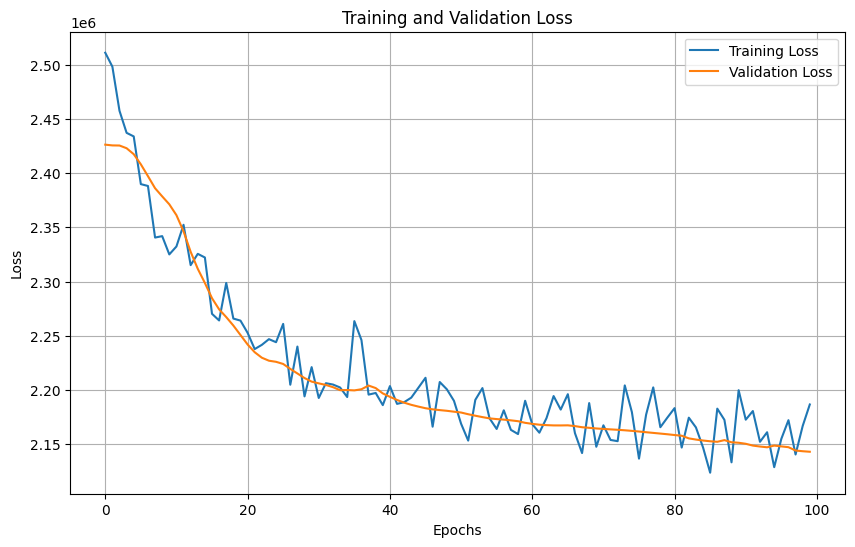

Model saved to drone_path_model.pth

Training ensemble model 1/3


Epoch 1/50: 100%|██████████| 2/2 [00:00<00:00, 73.88it/s, loss=2.37e+6]


Epoch [1/50], Train Loss: 2399785.1250, Val Loss: 2417508.0000


Epoch 2/50: 100%|██████████| 2/2 [00:00<00:00, 84.28it/s, loss=2.22e+6]


Epoch [2/50], Train Loss: 2347149.1250, Val Loss: 2416356.7500


Epoch 3/50: 100%|██████████| 2/2 [00:00<00:00, 82.93it/s, loss=2.46e+6]


Epoch [3/50], Train Loss: 2404801.2500, Val Loss: 2411940.5000


Epoch 4/50: 100%|██████████| 2/2 [00:00<00:00, 77.32it/s, loss=2.27e+6]


Epoch [4/50], Train Loss: 2340053.2500, Val Loss: 2407517.0000


Epoch 5/50: 100%|██████████| 2/2 [00:00<00:00, 84.43it/s, loss=2.42e+6]


Epoch [5/50], Train Loss: 2373634.2500, Val Loss: 2402112.5000


Epoch 6/50: 100%|██████████| 2/2 [00:00<00:00, 76.29it/s, loss=2.42e+6]


Epoch [6/50], Train Loss: 2365208.6250, Val Loss: 2395112.7500


Epoch 7/50: 100%|██████████| 2/2 [00:00<00:00, 75.83it/s, loss=2.37e+6]


Epoch [7/50], Train Loss: 2344068.3750, Val Loss: 2387257.5000


Epoch 8/50: 100%|██████████| 2/2 [00:00<00:00, 80.77it/s, loss=2.26e+6]


Epoch [8/50], Train Loss: 2305327.3750, Val Loss: 2373894.7500


Epoch 9/50: 100%|██████████| 2/2 [00:00<00:00, 83.45it/s, loss=2.3e+6]


Epoch [9/50], Train Loss: 2311313.5000, Val Loss: 2360561.7500


Epoch 10/50: 100%|██████████| 2/2 [00:00<00:00, 82.10it/s, loss=2.34e+6]


Epoch [10/50], Train Loss: 2315616.3750, Val Loss: 2344969.0000


Epoch 11/50: 100%|██████████| 2/2 [00:00<00:00, 81.64it/s, loss=2.2e+6]


Epoch [11/50], Train Loss: 2271108.8750, Val Loss: 2324034.2500


Epoch 12/50: 100%|██████████| 2/2 [00:00<00:00, 70.76it/s, loss=2.33e+6]


Epoch [12/50], Train Loss: 2302745.0000, Val Loss: 2303295.5000


Epoch 13/50: 100%|██████████| 2/2 [00:00<00:00, 73.51it/s, loss=2.42e+6]


Epoch [13/50], Train Loss: 2321732.2500, Val Loss: 2285371.7500


Epoch 14/50: 100%|██████████| 2/2 [00:00<00:00, 74.43it/s, loss=2.13e+6]


Epoch [14/50], Train Loss: 2236589.7500, Val Loss: 2269759.7500


Epoch 15/50: 100%|██████████| 2/2 [00:00<00:00, 79.14it/s, loss=2.2e+6]


Epoch [15/50], Train Loss: 2250714.0000, Val Loss: 2257176.0000


Epoch 16/50: 100%|██████████| 2/2 [00:00<00:00, 81.61it/s, loss=2.38e+6]


Epoch [16/50], Train Loss: 2298437.2500, Val Loss: 2247722.5000


Epoch 17/50: 100%|██████████| 2/2 [00:00<00:00, 82.69it/s, loss=2.22e+6]


Epoch [17/50], Train Loss: 2248519.6250, Val Loss: 2240517.5000


Epoch 18/50: 100%|██████████| 2/2 [00:00<00:00, 82.63it/s, loss=2.3e+6]


Epoch [18/50], Train Loss: 2266791.5000, Val Loss: 2235080.5000


Epoch 19/50: 100%|██████████| 2/2 [00:00<00:00, 85.02it/s, loss=2.37e+6]


Epoch [19/50], Train Loss: 2283571.1250, Val Loss: 2229614.0000


Epoch 20/50: 100%|██████████| 2/2 [00:00<00:00, 75.08it/s, loss=2.19e+6]


Epoch [20/50], Train Loss: 2228028.5000, Val Loss: 2224866.7500


Epoch 21/50: 100%|██████████| 2/2 [00:00<00:00, 77.23it/s, loss=2.24e+6]


Epoch [21/50], Train Loss: 2241383.6250, Val Loss: 2220741.2500


Epoch 22/50: 100%|██████████| 2/2 [00:00<00:00, 79.82it/s, loss=2.2e+6]


Epoch [22/50], Train Loss: 2225678.0000, Val Loss: 2218167.0000


Epoch 23/50: 100%|██████████| 2/2 [00:00<00:00, 75.43it/s, loss=2.39e+6]


Epoch [23/50], Train Loss: 2277861.7500, Val Loss: 2216327.7500


Epoch 24/50: 100%|██████████| 2/2 [00:00<00:00, 81.39it/s, loss=2.15e+6]


Epoch [24/50], Train Loss: 2206011.2500, Val Loss: 2213450.2500


Epoch 25/50: 100%|██████████| 2/2 [00:00<00:00, 80.30it/s, loss=2.28e+6]


Epoch [25/50], Train Loss: 2241204.0000, Val Loss: 2210675.7500


Epoch 26/50: 100%|██████████| 2/2 [00:00<00:00, 81.14it/s, loss=2.18e+6]


Epoch [26/50], Train Loss: 2211661.7500, Val Loss: 2209111.7500


Epoch 27/50: 100%|██████████| 2/2 [00:00<00:00, 81.92it/s, loss=2.24e+6]


Epoch [27/50], Train Loss: 2224967.8750, Val Loss: 2207644.5000


Epoch 28/50: 100%|██████████| 2/2 [00:00<00:00, 76.91it/s, loss=2.2e+6]


Epoch [28/50], Train Loss: 2212397.7500, Val Loss: 2205245.5000


Epoch 29/50: 100%|██████████| 2/2 [00:00<00:00, 77.12it/s, loss=2.03e+6]


Epoch [29/50], Train Loss: 2163333.6875, Val Loss: 2203077.5000


Epoch 30/50: 100%|██████████| 2/2 [00:00<00:00, 78.83it/s, loss=2.09e+6]


Epoch [30/50], Train Loss: 2179420.5000, Val Loss: 2199430.7500


Epoch 31/50: 100%|██████████| 2/2 [00:00<00:00, 80.69it/s, loss=2.14e+6]


Epoch [31/50], Train Loss: 2191160.5000, Val Loss: 2197776.5000


Epoch 32/50: 100%|██████████| 2/2 [00:00<00:00, 77.49it/s, loss=2.12e+6]


Epoch [32/50], Train Loss: 2183962.1250, Val Loss: 2197198.0000


Epoch 33/50: 100%|██████████| 2/2 [00:00<00:00, 78.60it/s, loss=2.23e+6]


Epoch [33/50], Train Loss: 2213148.1250, Val Loss: 2196742.5000


Epoch 34/50: 100%|██████████| 2/2 [00:00<00:00, 80.18it/s, loss=2.19e+6]


Epoch [34/50], Train Loss: 2198839.2500, Val Loss: 2195443.7500


Epoch 35/50: 100%|██████████| 2/2 [00:00<00:00, 77.82it/s, loss=2.35e+6]


Epoch [35/50], Train Loss: 2245491.8750, Val Loss: 2194243.0000


Epoch 36/50: 100%|██████████| 2/2 [00:00<00:00, 82.00it/s, loss=2.25e+6]


Epoch [36/50], Train Loss: 2215749.5000, Val Loss: 2194342.7500


Epoch 37/50: 100%|██████████| 2/2 [00:00<00:00, 76.62it/s, loss=2.2e+6]


Epoch [37/50], Train Loss: 2199918.5000, Val Loss: 2193559.7500


Epoch 38/50: 100%|██████████| 2/2 [00:00<00:00, 80.15it/s, loss=2.2e+6]


Epoch [38/50], Train Loss: 2197023.6250, Val Loss: 2191276.0000


Epoch 39/50: 100%|██████████| 2/2 [00:00<00:00, 81.93it/s, loss=2.15e+6]


Epoch [39/50], Train Loss: 2183232.8750, Val Loss: 2189451.5000


Epoch 40/50: 100%|██████████| 2/2 [00:00<00:00, 81.04it/s, loss=2.29e+6]


Epoch [40/50], Train Loss: 2220933.5000, Val Loss: 2187694.0000


Epoch 41/50: 100%|██████████| 2/2 [00:00<00:00, 79.95it/s, loss=2.23e+6]


Epoch [41/50], Train Loss: 2203716.7500, Val Loss: 2186750.0000


Epoch 42/50: 100%|██████████| 2/2 [00:00<00:00, 82.09it/s, loss=2.19e+6]


Epoch [42/50], Train Loss: 2193072.2500, Val Loss: 2184939.0000


Epoch 43/50: 100%|██████████| 2/2 [00:00<00:00, 82.19it/s, loss=2.13e+6]


Epoch [43/50], Train Loss: 2175381.2500, Val Loss: 2183802.7500


Epoch 44/50: 100%|██████████| 2/2 [00:00<00:00, 80.95it/s, loss=2.26e+6]


Epoch [44/50], Train Loss: 2210326.0000, Val Loss: 2182051.2500


Epoch 45/50: 100%|██████████| 2/2 [00:00<00:00, 81.00it/s, loss=2.27e+6]


Epoch [45/50], Train Loss: 2212654.6250, Val Loss: 2180851.5000


Epoch 46/50: 100%|██████████| 2/2 [00:00<00:00, 81.56it/s, loss=2.13e+6]


Epoch [46/50], Train Loss: 2171047.8750, Val Loss: 2179060.2500


Epoch 47/50: 100%|██████████| 2/2 [00:00<00:00, 80.95it/s, loss=2.13e+6]


Epoch [47/50], Train Loss: 2171965.0000, Val Loss: 2178232.5000


Epoch 48/50: 100%|██████████| 2/2 [00:00<00:00, 82.78it/s, loss=2.18e+6]


Epoch [48/50], Train Loss: 2183237.1250, Val Loss: 2177365.0000


Epoch 49/50: 100%|██████████| 2/2 [00:00<00:00, 80.74it/s, loss=2.18e+6]


Epoch [49/50], Train Loss: 2182140.5000, Val Loss: 2176621.7500


Epoch 50/50: 100%|██████████| 2/2 [00:00<00:00, 83.49it/s, loss=2.19e+6]


Epoch [50/50], Train Loss: 2184689.2500, Val Loss: 2175962.7500


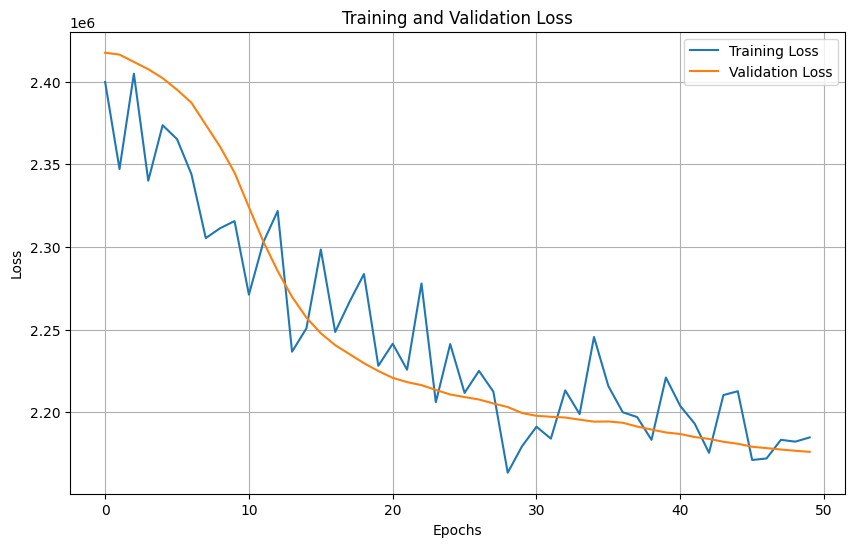

Model saved to drone_path_model.pth

Training ensemble model 2/3


Epoch 1/50: 100%|██████████| 2/2 [00:00<00:00, 66.66it/s, loss=2.47e+6]


Epoch [1/50], Train Loss: 2462615.6250, Val Loss: 2391678.5000


Epoch 2/50: 100%|██████████| 2/2 [00:00<00:00, 80.46it/s, loss=2.4e+6]


Epoch [2/50], Train Loss: 2426565.6250, Val Loss: 2388478.0000


Epoch 3/50:   0%|          | 0/2 [00:00<?, ?it/s, loss=2.4e+6]


Epoch [2/50], Train Loss: 2426565.6250, Val Loss: 2388478.0000


Epoch 3/50: 100%|██████████| 2/2 [00:00<00:00, 77.19it/s, loss=2.47e+6]


Epoch [3/50], Train Loss: 2430753.7500, Val Loss: 2386203.2500


Epoch 4/50: 100%|██████████| 2/2 [00:00<00:00, 80.95it/s, loss=2.35e+6]


Epoch [4/50], Train Loss: 2385887.2500, Val Loss: 2383738.7500


Epoch 5/50: 100%|██████████| 2/2 [00:00<00:00, 75.72it/s, loss=2.23e+6]


Epoch [5/50], Train Loss: 2343979.6250, Val Loss: 2381172.0000


Epoch 6/50: 100%|██████████| 2/2 [00:00<00:00, 67.32it/s, loss=2.42e+6]


Epoch [6/50], Train Loss: 2386748.2500, Val Loss: 2378129.5000


Epoch 7/50: 100%|██████████| 2/2 [00:00<00:00, 66.02it/s, loss=2.5e+6]


Epoch [7/50], Train Loss: 2398955.0000, Val Loss: 2374263.0000


Epoch 8/50: 100%|██████████| 2/2 [00:00<00:00, 74.28it/s, loss=2.44e+6]


Epoch [8/50], Train Loss: 2373816.0000, Val Loss: 2368850.0000


Epoch 9/50: 100%|██████████| 2/2 [00:00<00:00, 73.44it/s, loss=2.38e+6]


Epoch [9/50], Train Loss: 2350958.6250, Val Loss: 2360201.7500


Epoch 10/50: 100%|██████████| 2/2 [00:00<00:00, 77.73it/s, loss=2.35e+6]


Epoch [10/50], Train Loss: 2333176.6250, Val Loss: 2347687.0000


Epoch 11/50: 100%|██████████| 2/2 [00:00<00:00, 76.38it/s, loss=2.32e+6]


Epoch [11/50], Train Loss: 2318096.0000, Val Loss: 2333785.5000


Epoch 12/50: 100%|██████████| 2/2 [00:00<00:00, 77.12it/s, loss=2.27e+6]


Epoch [12/50], Train Loss: 2299540.7500, Val Loss: 2319925.2500


Epoch 13/50: 100%|██████████| 2/2 [00:00<00:00, 79.98it/s, loss=2.36e+6]


Epoch [13/50], Train Loss: 2316898.3750, Val Loss: 2306945.0000


Epoch 14/50: 100%|██████████| 2/2 [00:00<00:00, 83.31it/s, loss=2.29e+6]


Epoch [14/50], Train Loss: 2291984.0000, Val Loss: 2294641.7500


Epoch 15/50: 100%|██████████| 2/2 [00:00<00:00, 80.81it/s, loss=2.28e+6]


Epoch [15/50], Train Loss: 2283128.6250, Val Loss: 2282441.0000


Epoch 16/50: 100%|██████████| 2/2 [00:00<00:00, 72.40it/s, loss=2.32e+6]


Epoch [16/50], Train Loss: 2288769.6250, Val Loss: 2271002.5000


Epoch 17/50: 100%|██████████| 2/2 [00:00<00:00, 72.48it/s, loss=2.33e+6]


Epoch [17/50], Train Loss: 2288713.0000, Val Loss: 2258232.7500


Epoch 18/50: 100%|██████████| 2/2 [00:00<00:00, 83.37it/s, loss=2.27e+6]


Epoch [18/50], Train Loss: 2266081.3750, Val Loss: 2246581.5000


Epoch 19/50: 100%|██████████| 2/2 [00:00<00:00, 80.68it/s, loss=2.36e+6]


Epoch [19/50], Train Loss: 2288375.7500, Val Loss: 2239224.0000


Epoch 20/50: 100%|██████████| 2/2 [00:00<00:00, 83.59it/s, loss=2.28e+6]


Epoch [20/50], Train Loss: 2264219.7500, Val Loss: 2232717.0000


Epoch 21/50: 100%|██████████| 2/2 [00:00<00:00, 80.09it/s, loss=2.25e+6]


Epoch [21/50], Train Loss: 2251779.2500, Val Loss: 2229698.7500


Epoch 22/50: 100%|██████████| 2/2 [00:00<00:00, 84.47it/s, loss=2.31e+6]


Epoch [22/50], Train Loss: 2265585.7500, Val Loss: 2228961.5000


Epoch 23/50: 100%|██████████| 2/2 [00:00<00:00, 82.41it/s, loss=2.1e+6]


Epoch [23/50], Train Loss: 2202753.0000, Val Loss: 2228115.2500


Epoch 24/50: 100%|██████████| 2/2 [00:00<00:00, 83.30it/s, loss=2.33e+6]


Epoch [24/50], Train Loss: 2264170.6250, Val Loss: 2227977.7500


Epoch 25/50: 100%|██████████| 2/2 [00:00<00:00, 84.43it/s, loss=2.26e+6]


Epoch [25/50], Train Loss: 2243993.8750, Val Loss: 2225731.7500


Epoch 26/50: 100%|██████████| 2/2 [00:00<00:00, 83.64it/s, loss=2.21e+6]


Epoch [26/50], Train Loss: 2226497.0000, Val Loss: 2225369.2500


Epoch 27/50: 100%|██████████| 2/2 [00:00<00:00, 84.74it/s, loss=2.06e+6]


Epoch [27/50], Train Loss: 2183762.8750, Val Loss: 2219884.0000


Epoch 28/50: 100%|██████████| 2/2 [00:00<00:00, 83.14it/s, loss=2.22e+6]


Epoch [28/50], Train Loss: 2223102.5000, Val Loss: 2214778.0000


Epoch 29/50: 100%|██████████| 2/2 [00:00<00:00, 81.12it/s, loss=2.06e+6]


Epoch [29/50], Train Loss: 2178569.1875, Val Loss: 2212020.5000


Epoch 30/50: 100%|██████████| 2/2 [00:00<00:00, 82.94it/s, loss=2.19e+6]


Epoch [30/50], Train Loss: 2211840.0000, Val Loss: 2213603.7500


Epoch 31/50: 100%|██████████| 2/2 [00:00<00:00, 83.75it/s, loss=2.29e+6]


Epoch [31/50], Train Loss: 2237646.3750, Val Loss: 2210622.5000


Epoch 32/50: 100%|██████████| 2/2 [00:00<00:00, 82.62it/s, loss=2.29e+6]


Epoch [32/50], Train Loss: 2238301.6250, Val Loss: 2206258.5000


Epoch 33/50: 100%|██████████| 2/2 [00:00<00:00, 83.04it/s, loss=2.28e+6]


Epoch [33/50], Train Loss: 2233042.2500, Val Loss: 2203614.2500


Epoch 34/50: 100%|██████████| 2/2 [00:00<00:00, 82.35it/s, loss=2.3e+6]


Epoch [34/50], Train Loss: 2236243.5000, Val Loss: 2201775.5000


Epoch 35/50: 100%|██████████| 2/2 [00:00<00:00, 81.90it/s, loss=2.26e+6]


Epoch [35/50], Train Loss: 2222827.7500, Val Loss: 2200833.0000


Epoch 36/50: 100%|██████████| 2/2 [00:00<00:00, 79.56it/s, loss=2.13e+6]


Epoch [36/50], Train Loss: 2185045.3750, Val Loss: 2199236.2500


Epoch 37/50: 100%|██████████| 2/2 [00:00<00:00, 79.18it/s, loss=2.26e+6]


Epoch [37/50], Train Loss: 2220320.6250, Val Loss: 2198211.0000


Epoch 38/50: 100%|██████████| 2/2 [00:00<00:00, 80.89it/s, loss=2.1e+6]


Epoch [38/50], Train Loss: 2174083.4375, Val Loss: 2196597.0000


Epoch 39/50: 100%|██████████| 2/2 [00:00<00:00, 79.03it/s, loss=2.3e+6]


Epoch [39/50], Train Loss: 2229538.5000, Val Loss: 2195667.2500


Epoch 40/50: 100%|██████████| 2/2 [00:00<00:00, 80.22it/s, loss=2.22e+6]


Epoch [40/50], Train Loss: 2205768.0000, Val Loss: 2194009.7500


Epoch 41/50: 100%|██████████| 2/2 [00:00<00:00, 80.85it/s, loss=2.22e+6]


Epoch [41/50], Train Loss: 2204296.0000, Val Loss: 2191958.7500


Epoch 42/50: 100%|██████████| 2/2 [00:00<00:00, 83.35it/s, loss=2.19e+6]


Epoch [42/50], Train Loss: 2195331.1250, Val Loss: 2189839.0000


Epoch 43/50: 100%|██████████| 2/2 [00:00<00:00, 80.88it/s, loss=2.17e+6]


Epoch [43/50], Train Loss: 2190110.3750, Val Loss: 2188589.7500


Epoch 44/50: 100%|██████████| 2/2 [00:00<00:00, 80.93it/s, loss=2.2e+6]


Epoch [44/50], Train Loss: 2196594.0000, Val Loss: 2188859.7500


Epoch 45/50: 100%|██████████| 2/2 [00:00<00:00, 83.95it/s, loss=2.12e+6]


Epoch [45/50], Train Loss: 2174583.8750, Val Loss: 2187783.0000


Epoch 46/50: 100%|██████████| 2/2 [00:00<00:00, 82.72it/s, loss=2.11e+6]


Epoch [46/50], Train Loss: 2169150.1250, Val Loss: 2186828.7500


Epoch 47/50: 100%|██████████| 2/2 [00:00<00:00, 80.59it/s, loss=2.28e+6]


Epoch [47/50], Train Loss: 2217163.0000, Val Loss: 2184763.2500


Epoch 48/50: 100%|██████████| 2/2 [00:00<00:00, 81.54it/s, loss=2.06e+6]


Epoch [48/50], Train Loss: 2155080.5000, Val Loss: 2183503.5000


Epoch 49/50: 100%|██████████| 2/2 [00:00<00:00, 87.37it/s, loss=2.21e+6]


Epoch [49/50], Train Loss: 2196476.3750, Val Loss: 2182919.2500


Epoch 50/50: 100%|██████████| 2/2 [00:00<00:00, 86.65it/s, loss=2.19e+6]


Epoch [50/50], Train Loss: 2189177.6250, Val Loss: 2180404.7500


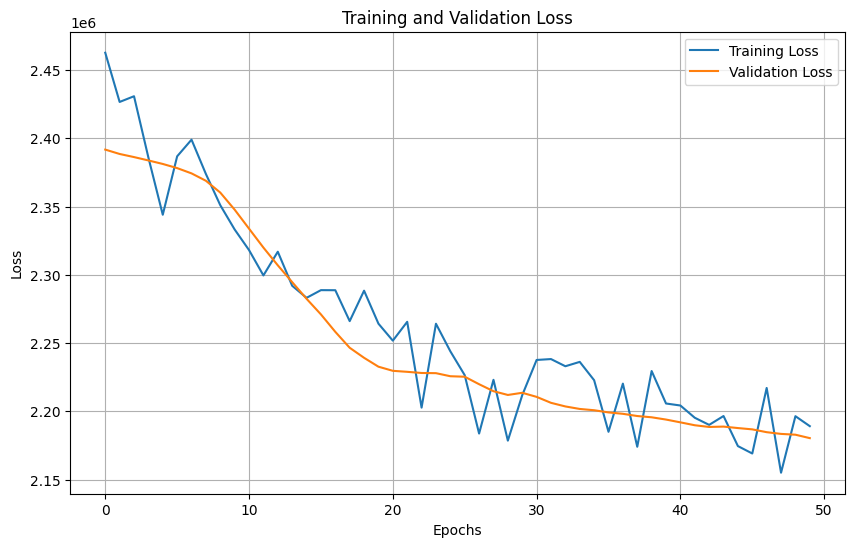

Model saved to drone_path_model.pth

Training ensemble model 3/3


Epoch 1/50: 100%|██████████| 2/2 [00:00<00:00, 72.57it/s, loss=2.39e+6]


Epoch [1/50], Train Loss: 2394101.7500, Val Loss: 2410110.0000


Epoch 2/50: 100%|██████████| 2/2 [00:00<00:00, 75.73it/s, loss=2.32e+6]


Epoch [2/50], Train Loss: 2359672.8750, Val Loss: 2401413.0000


Epoch 3/50: 100%|██████████| 2/2 [00:00<00:00, 82.69it/s, loss=2.55e+6]


Epoch [3/50], Train Loss: 2415042.0000, Val Loss: 2391559.2500


Epoch 4/50: 100%|██████████| 2/2 [00:00<00:00, 84.13it/s, loss=2.38e+6]


Epoch [4/50], Train Loss: 2360581.8750, Val Loss: 2380986.0000


Epoch 5/50: 100%|██████████| 2/2 [00:00<00:00, 79.71it/s, loss=2.29e+6]


Epoch [5/50], Train Loss: 2328600.7500, Val Loss: 2370321.5000


Epoch 6/50: 100%|██████████| 2/2 [00:00<00:00, 81.63it/s, loss=2.31e+6]


Epoch [6/50], Train Loss: 2325044.8750, Val Loss: 2359889.7500


Epoch 7/50: 100%|██████████| 2/2 [00:00<00:00, 83.48it/s, loss=2.28e+6]


Epoch [7/50], Train Loss: 2309107.3750, Val Loss: 2348350.0000


Epoch 8/50: 100%|██████████| 2/2 [00:00<00:00, 86.03it/s, loss=2.25e+6]


Epoch [8/50], Train Loss: 2294061.5000, Val Loss: 2335678.0000


Epoch 9/50: 100%|██████████| 2/2 [00:00<00:00, 83.56it/s, loss=2.49e+6]


Epoch [9/50], Train Loss: 2357469.3750, Val Loss: 2324833.2500


Epoch 10/50: 100%|██████████| 2/2 [00:00<00:00, 82.64it/s, loss=2.37e+6]


Epoch [10/50], Train Loss: 2314957.1250, Val Loss: 2314567.0000


Epoch 11/50: 100%|██████████| 2/2 [00:00<00:00, 82.43it/s, loss=2.42e+6]


Epoch [11/50], Train Loss: 2326290.2500, Val Loss: 2303747.7500


Epoch 12/50: 100%|██████████| 2/2 [00:00<00:00, 79.17it/s, loss=2.22e+6]


Epoch [12/50], Train Loss: 2263251.2500, Val Loss: 2292807.7500


Epoch 13/50: 100%|██████████| 2/2 [00:00<00:00, 80.04it/s, loss=2.25e+6]


Epoch [13/50], Train Loss: 2268522.7500, Val Loss: 2281298.2500


Epoch 14/50: 100%|██████████| 2/2 [00:00<00:00, 74.88it/s, loss=2.21e+6]


Epoch [14/50], Train Loss: 2252557.2500, Val Loss: 2268520.7500


Epoch 15/50: 100%|██████████| 2/2 [00:00<00:00, 82.57it/s, loss=2.35e+6]


Epoch [15/50], Train Loss: 2287385.3750, Val Loss: 2255970.0000


Epoch 16/50: 100%|██████████| 2/2 [00:00<00:00, 84.20it/s, loss=2.19e+6]


Epoch [16/50], Train Loss: 2238734.5000, Val Loss: 2245892.2500


Epoch 17/50: 100%|██████████| 2/2 [00:00<00:00, 82.42it/s, loss=2.25e+6]


Epoch [17/50], Train Loss: 2251671.2500, Val Loss: 2237724.0000


Epoch 18/50: 100%|██████████| 2/2 [00:00<00:00, 81.72it/s, loss=2.27e+6]


Epoch [18/50], Train Loss: 2253999.0000, Val Loss: 2231718.7500


Epoch 19/50: 100%|██████████| 2/2 [00:00<00:00, 78.00it/s, loss=2.17e+6]


Epoch [19/50], Train Loss: 2223462.0000, Val Loss: 2226038.2500


Epoch 20/50: 100%|██████████| 2/2 [00:00<00:00, 80.73it/s, loss=2.35e+6]


Epoch [20/50], Train Loss: 2270381.0000, Val Loss: 2221668.5000


Epoch 21/50: 100%|██████████| 2/2 [00:00<00:00, 83.10it/s, loss=2.37e+6]


Epoch [21/50], Train Loss: 2273597.6250, Val Loss: 2218155.2500


Epoch 22/50: 100%|██████████| 2/2 [00:00<00:00, 80.51it/s, loss=2.21e+6]


Epoch [22/50], Train Loss: 2226764.7500, Val Loss: 2214721.5000


Epoch 23/50: 100%|██████████| 2/2 [00:00<00:00, 81.32it/s, loss=2.2e+6]


Epoch [23/50], Train Loss: 2221403.7500, Val Loss: 2212495.5000


Epoch 24/50: 100%|██████████| 2/2 [00:00<00:00, 82.07it/s, loss=2.19e+6]


Epoch [24/50], Train Loss: 2214713.5000, Val Loss: 2210137.0000


Epoch 25/50: 100%|██████████| 2/2 [00:00<00:00, 78.45it/s, loss=2.17e+6]


Epoch [25/50], Train Loss: 2208976.7500, Val Loss: 2208375.0000


Epoch 26/50: 100%|██████████| 2/2 [00:00<00:00, 80.43it/s, loss=2.23e+6]


Epoch [26/50], Train Loss: 2221896.0000, Val Loss: 2206942.0000


Epoch 27/50: 100%|██████████| 2/2 [00:00<00:00, 81.65it/s, loss=2.11e+6]


Epoch [27/50], Train Loss: 2189204.8750, Val Loss: 2204674.7500


Epoch 28/50: 100%|██████████| 2/2 [00:00<00:00, 83.08it/s, loss=2.23e+6]


Epoch [28/50], Train Loss: 2219041.5000, Val Loss: 2202963.7500


Epoch 29/50: 100%|██████████| 2/2 [00:00<00:00, 82.73it/s, loss=2.29e+6]


Epoch [29/50], Train Loss: 2233694.6250, Val Loss: 2201252.5000


Epoch 30/50: 100%|██████████| 2/2 [00:00<00:00, 85.11it/s, loss=2.22e+6]


Epoch [30/50], Train Loss: 2214016.2500, Val Loss: 2200370.7500


Epoch 31/50: 100%|██████████| 2/2 [00:00<00:00, 83.62it/s, loss=2.12e+6]


Epoch [31/50], Train Loss: 2183246.8750, Val Loss: 2198697.5000


Epoch 32/50: 100%|██████████| 2/2 [00:00<00:00, 78.30it/s, loss=2.25e+6]


Epoch [32/50], Train Loss: 2218724.3750, Val Loss: 2196966.7500


Epoch 33/50: 100%|██████████| 2/2 [00:00<00:00, 76.21it/s, loss=2.16e+6]


Epoch [33/50], Train Loss: 2192294.7500, Val Loss: 2195588.5000


Epoch 34/50: 100%|██████████| 2/2 [00:00<00:00, 74.88it/s, loss=2.14e+6]


Epoch [34/50], Train Loss: 2185814.8750, Val Loss: 2195097.7500


Epoch 35/50: 100%|██████████| 2/2 [00:00<00:00, 79.56it/s, loss=2.23e+6]


Epoch [35/50], Train Loss: 2209899.3750, Val Loss: 2194595.0000


Epoch 36/50: 100%|██████████| 2/2 [00:00<00:00, 82.22it/s, loss=2.32e+6]


Epoch [36/50], Train Loss: 2234224.5000, Val Loss: 2193375.2500


Epoch 37/50: 100%|██████████| 2/2 [00:00<00:00, 82.57it/s, loss=2.11e+6]


Epoch [37/50], Train Loss: 2172965.5000, Val Loss: 2191561.5000


Epoch 38/50: 100%|██████████| 2/2 [00:00<00:00, 85.56it/s, loss=2.04e+6]


Epoch [38/50], Train Loss: 2152496.9375, Val Loss: 2190081.2500


Epoch 39/50: 100%|██████████| 2/2 [00:00<00:00, 85.64it/s, loss=2.15e+6]


Epoch [39/50], Train Loss: 2184129.3750, Val Loss: 2188555.2500


Epoch 40/50: 100%|██████████| 2/2 [00:00<00:00, 86.26it/s, loss=2.31e+6]


Epoch [40/50], Train Loss: 2228092.0000, Val Loss: 2188705.5000


Epoch 41/50: 100%|██████████| 2/2 [00:00<00:00, 82.65it/s, loss=2.32e+6]


Epoch [41/50], Train Loss: 2229003.7500, Val Loss: 2188126.7500


Epoch 42/50: 100%|██████████| 2/2 [00:00<00:00, 57.68it/s, loss=2.28e+6]


Epoch [42/50], Train Loss: 2216267.1250, Val Loss: 2186831.7500


Epoch 43/50: 100%|██████████| 2/2 [00:00<00:00, 84.63it/s, loss=2.12e+6]


Epoch [43/50], Train Loss: 2172775.3750, Val Loss: 2185368.0000


Epoch 44/50: 100%|██████████| 2/2 [00:00<00:00, 84.17it/s, loss=2.13e+6]


Epoch [44/50], Train Loss: 2172678.7500, Val Loss: 2184599.0000


Epoch 45/50: 100%|██████████| 2/2 [00:00<00:00, 87.45it/s, loss=2.24e+6]


Epoch [45/50], Train Loss: 2203758.3750, Val Loss: 2183761.5000


Epoch 46/50: 100%|██████████| 2/2 [00:00<00:00, 86.94it/s, loss=2.18e+6]


Epoch [46/50], Train Loss: 2186263.8750, Val Loss: 2182134.2500


Epoch 47/50: 100%|██████████| 2/2 [00:00<00:00, 84.55it/s, loss=2.09e+6]


Epoch [47/50], Train Loss: 2160377.8125, Val Loss: 2181176.2500


Epoch 48/50: 100%|██████████| 2/2 [00:00<00:00, 85.06it/s, loss=2.07e+6]


Epoch [48/50], Train Loss: 2153558.3125, Val Loss: 2180115.2500


Epoch 49/50: 100%|██████████| 2/2 [00:00<00:00, 85.61it/s, loss=2.06e+6]


Epoch [49/50], Train Loss: 2151335.0625, Val Loss: 2179092.5000


Epoch 50/50: 100%|██████████| 2/2 [00:00<00:00, 85.78it/s, loss=2.1e+6]


Epoch [50/50], Train Loss: 2160639.0000, Val Loss: 2178474.5000


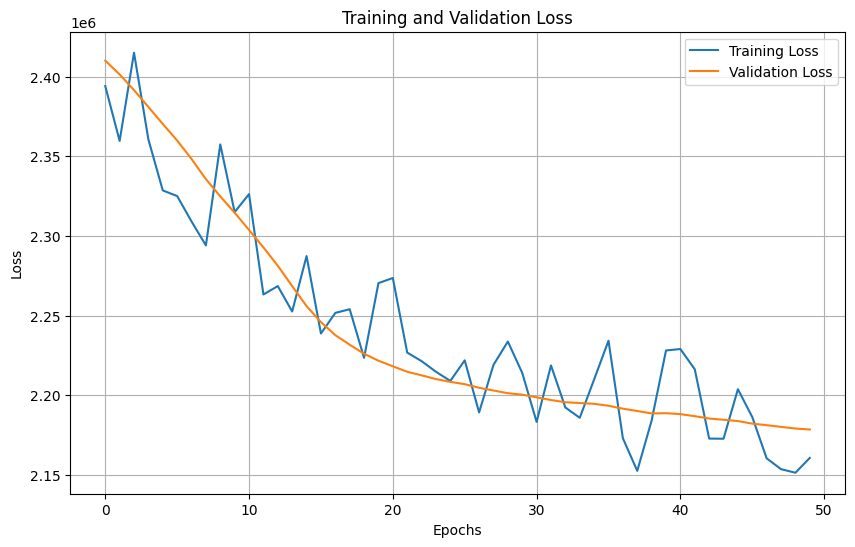

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Model saved to drone_path_model.pth
Predicting 119 future frames with uncertainty...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScal


===== PREDICTION ERROR METRICS =====
Mean Distance Error: 2121.32 pixels
Median Distance Error: 2119.96 pixels
Maximum Distance Error: 2290.59 pixels
RMSE: 2124.46 pixels
Error Growth Rate: -1.2154 pixels/frame
Normalized Error: 244.8187
Mean Angular Error: 109.02 degrees
Uncertainty-Error Correlation: 0.3475
Calibration Score: 0.0000



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_31/108324297.py:893: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


Error analysis visualization saved to: error_analysis_frogjump.png


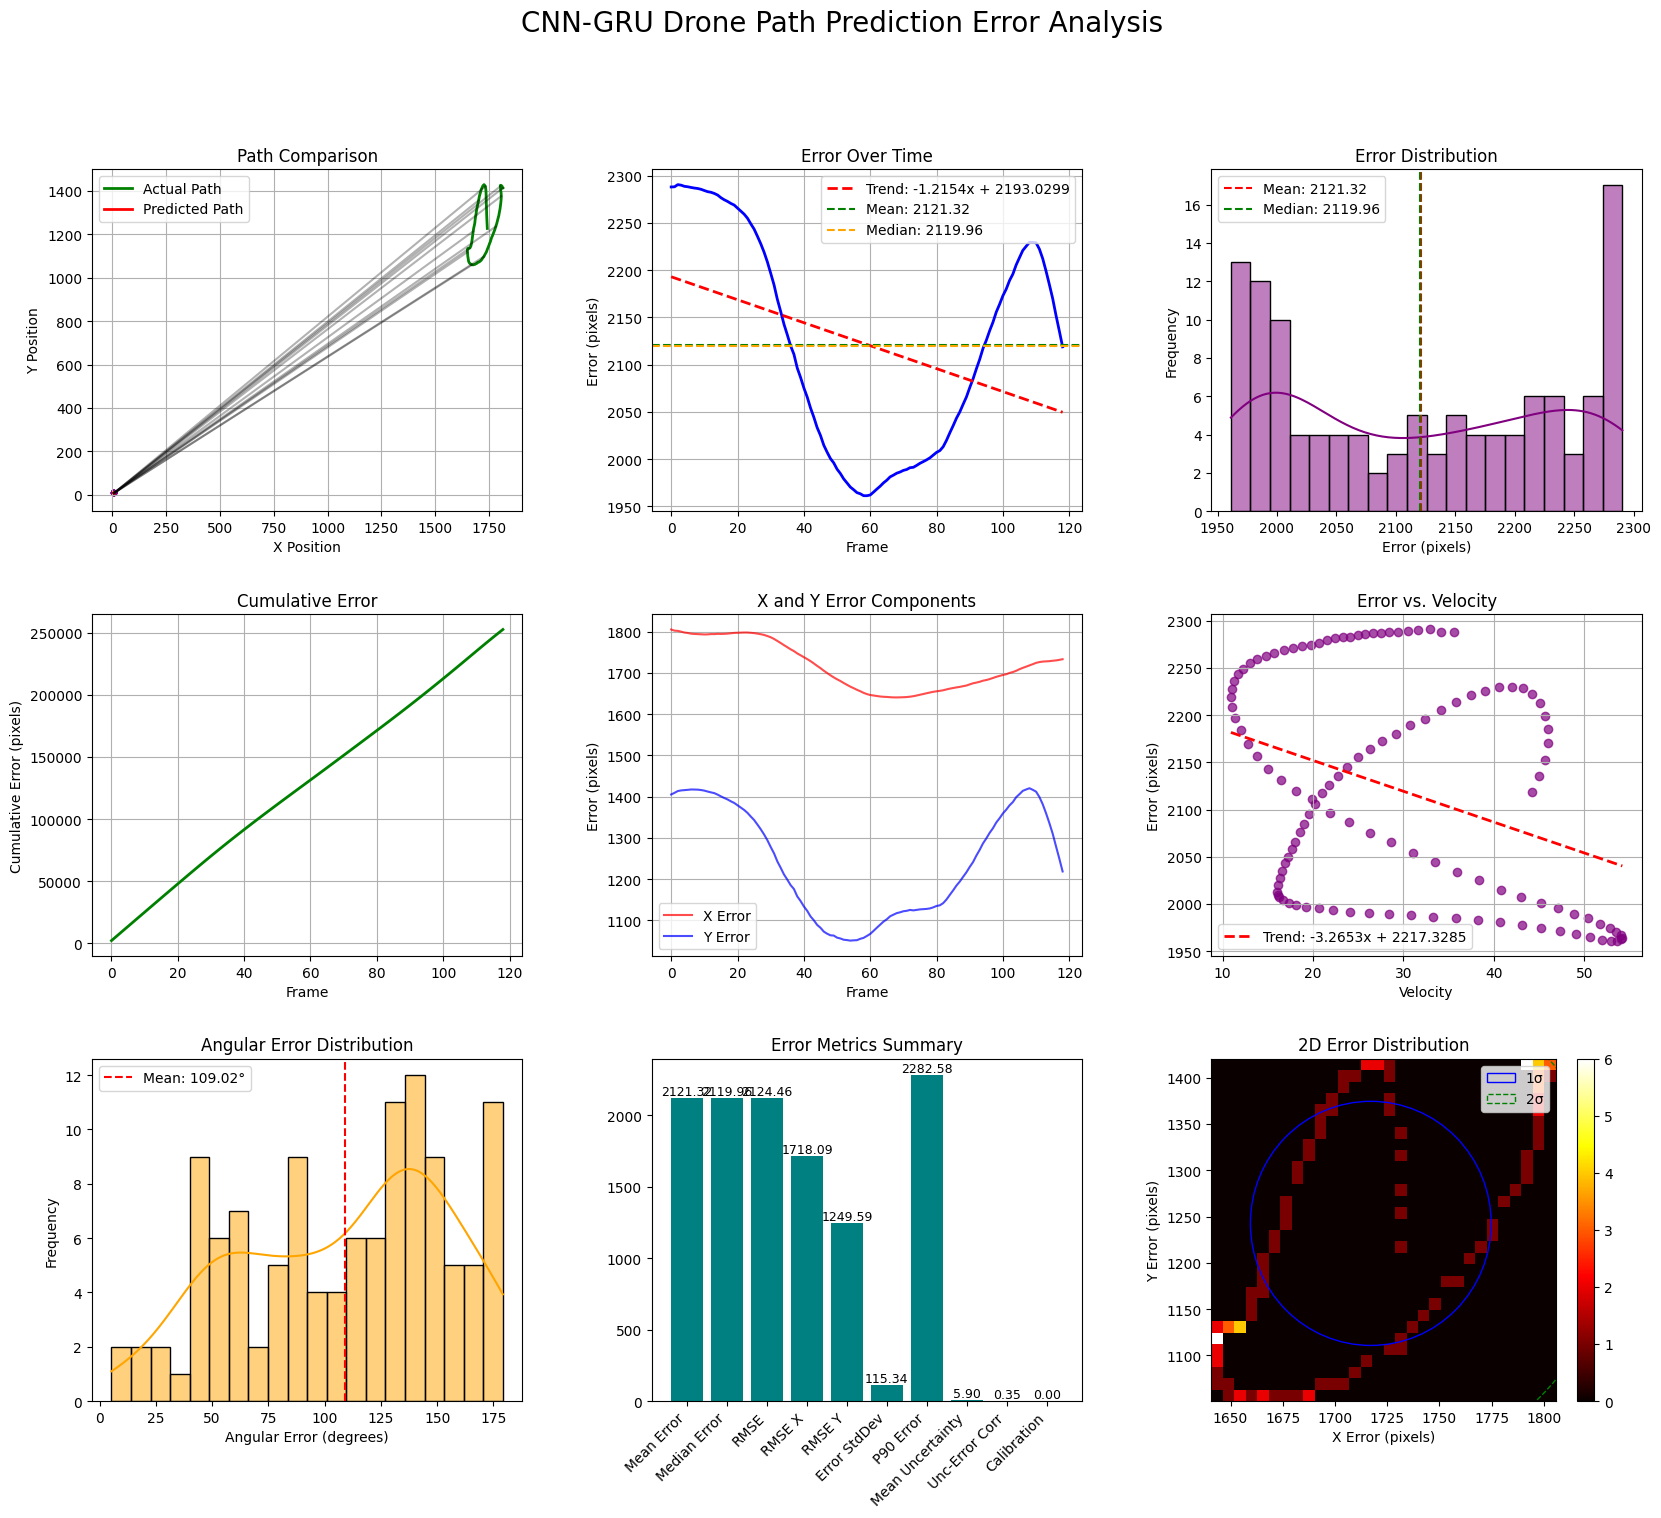

Error growth analysis saved to: error_analysis_frogjump_error_growth.png


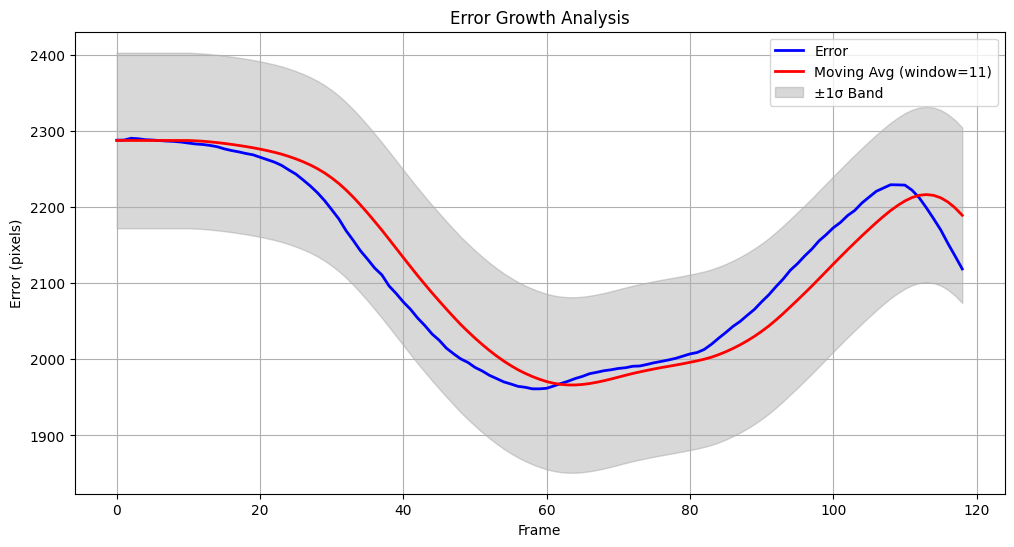

/tmp/ipykernel_31/108324297.py:963: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


Error heatmap saved to: error_analysis_frogjump_error_heatmap.png


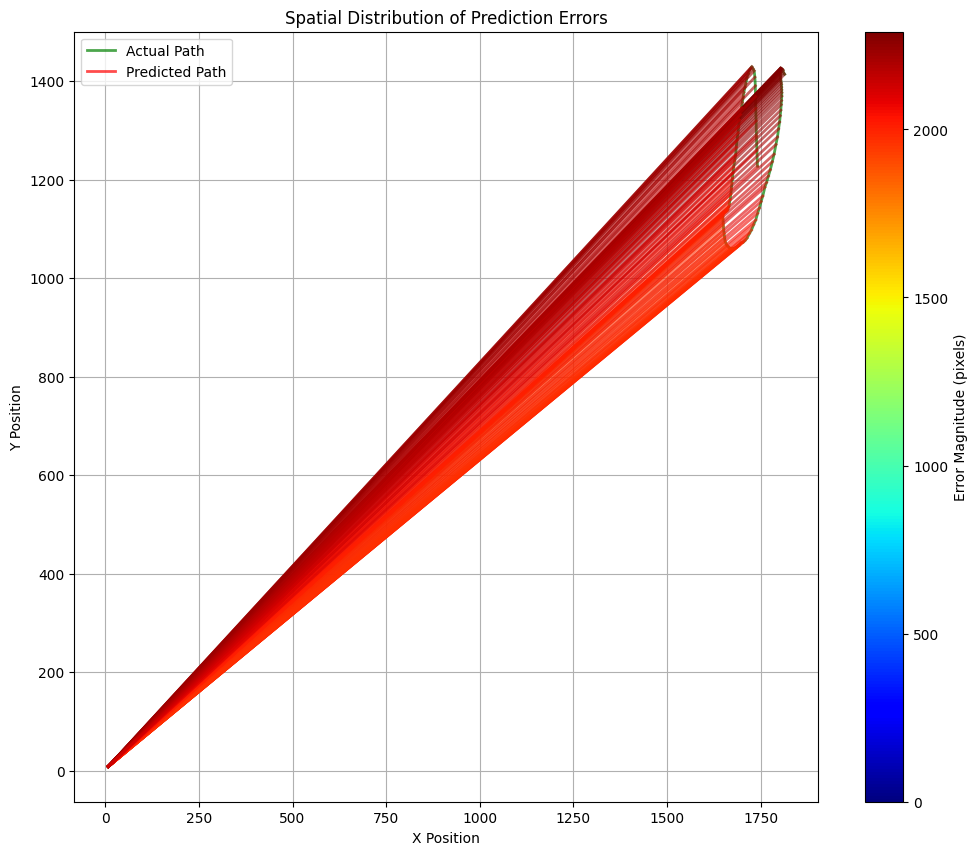

Attention visualization saved to: error_analysis_frogjump_attention_attention.png


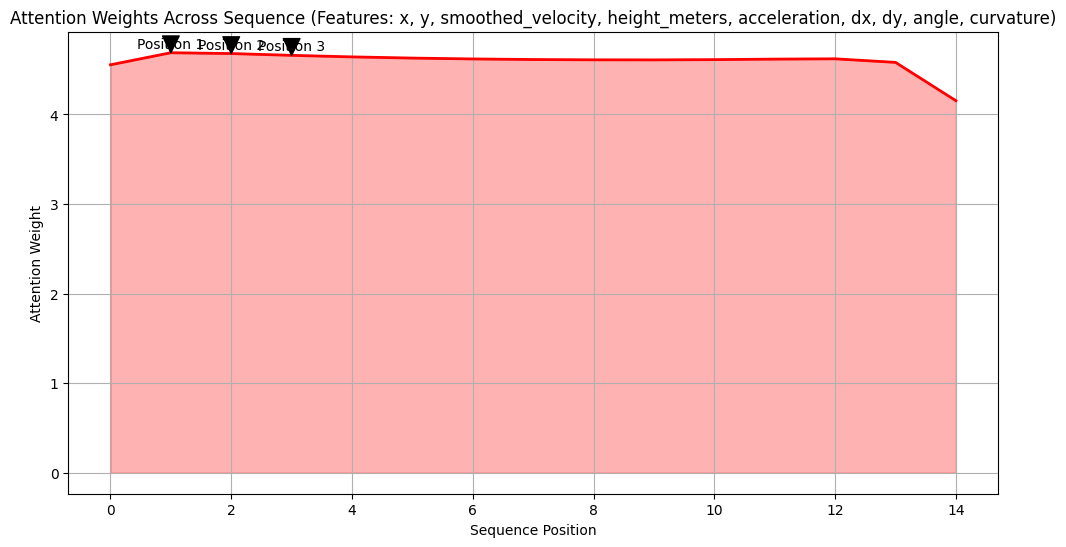

Could not create 2D attention heatmap.
Comparison video saved to cnn_gru_prediction_comparison_frogjump.mp4
Prediction results saved to prediction_results.csv
Done!


<Figure size 1000x800 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import cv2

class DronePathDataset(Dataset):
    """Enhanced dataset for drone path data with augmentation"""
    def __init__(self, X, y, augment=False):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.augment = augment
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.y[idx]
        
        if self.augment and np.random.random() < 0.5:
            # Apply random noise augmentation
            noise = torch.randn_like(x) * 0.03
            x = x + noise
            
        return x, y

class CNNGRUAttention(nn.Module):
    """
    Hybrid CNN-GRU model with attention for drone path prediction
    
    Architecture:
    1. Conv1D layers to extract spatial features
    2. GRU layers to process temporal sequence
    3. Attention mechanism to focus on important timesteps
    4. Dense layers for prediction refinement
    """
    def __init__(self, input_size, seq_length, hidden_size=128, num_layers=2, 
                 cnn_filters=[64, 128], dropout=0.3, output_size=2):
        super(CNNGRUAttention, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.seq_length = seq_length
        
        # CNN layers for spatial feature extraction
        self.cnn_layers = nn.ModuleList()
        in_channels = input_size
        
        for filters in cnn_filters:
            self.cnn_layers.append(
                nn.Sequential(
                    nn.Conv1d(in_channels, filters, kernel_size=3, padding=1),
                    nn.BatchNorm1d(filters),
                    nn.ReLU(),
                    nn.Conv1d(filters, filters, kernel_size=3, padding=1),
                    nn.BatchNorm1d(filters),
                    nn.ReLU(),
                )
            )
            in_channels = filters
        
        # Bidirectional GRU for temporal features
        self.gru = nn.GRU(
            input_size=cnn_filters[-1],
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        
        # Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(hidden_size * 2, 64),  # * 2 for bidirectional
            nn.Tanh(),
            nn.Linear(64, 1)
        )
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)
        
        # Output layers with residual connections
        self.fc1 = nn.Linear(hidden_size * 2, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, output_size)
        
        # Uncertainty estimation (predict mean and variance)
        self.uncertainty = nn.Linear(64, output_size)
        
    def forward(self, x):
        batch_size = x.size(0)
        
        # Reshape input for CNN: [batch, seq_len, features] -> [batch, features, seq_len]
        x_cnn = x.permute(0, 2, 1)
        
        # Apply CNN layers
        for cnn_layer in self.cnn_layers:
            x_cnn = cnn_layer(x_cnn)
        
        # Reshape back for GRU: [batch, features, seq_len] -> [batch, seq_len, features]
        x_gru = x_cnn.permute(0, 2, 1)
        
        # Apply GRU
        gru_out, _ = self.gru(x_gru)
        
        # Apply attention
        attention_weights = F.softmax(self.attention(gru_out).squeeze(-1), dim=1)
        attention_weights = attention_weights.unsqueeze(2)
        context_vector = torch.sum(attention_weights * gru_out, dim=1)
        
        # Apply dropout
        context_vector = self.dropout(context_vector)
        
        # Fully connected layers with residual connections
        fc1_out = self.fc1(context_vector)
        fc1_out = self.bn1(fc1_out)
        fc1_out = F.relu(fc1_out)
        
        fc2_out = self.fc2(fc1_out)
        fc2_out = self.bn2(fc2_out)
        fc2_out = F.relu(fc2_out)
        
        # Final prediction
        position_output = self.fc3(fc2_out)
        
        # Uncertainty estimation (log variance)
        uncertainty = torch.exp(self.uncertainty(fc2_out))
        
        return position_output, uncertainty


def prepare_sequences(df, seq_length=30, stride=1, features=None):
    """Prepare sequences for training with enhanced feature engineering"""
    if features is None:
        # Default features
        features = ['x', 'y', 'smoothed_velocity', 'height_meters']
    
    # Add derived features for better prediction
    if 'smoothed_velocity' in df.columns:
        # Calculate acceleration (change in velocity)
        df['acceleration'] = df['smoothed_velocity'].diff().fillna(0)
        if 'acceleration' not in features:
            features.append('acceleration')
    
    if 'x' in df.columns and 'y' in df.columns:
        # Calculate direction vectors
        df['dx'] = df['x'].diff().fillna(0)
        df['dy'] = df['y'].diff().fillna(0)
        
        # Calculate angle
        df['angle'] = np.arctan2(df['dy'], df['dx'])
        
        # Calculate curvature (change in angle)
        df['curvature'] = df['angle'].diff().fillna(0)
        
        if 'dx' not in features:
            features.append('dx')
        if 'dy' not in features:
            features.append('dy')
        if 'angle' not in features:
            features.append('angle')
        if 'curvature' not in features:
            features.append('curvature')
    
    print(f"Using features: {features}")
    
    # Scale features to [0, 1] range for better training
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
    
    # Create sequences with stride for data augmentation
    X, y = [], []
    for i in range(0, len(df_scaled) - seq_length, stride):
        # Input sequence
        X.append(df_scaled.iloc[i:i+seq_length].values)
        
        # Target is next position
        target_idx = i + seq_length
        y.append(df[['x', 'y']].iloc[target_idx].values)
    
    return np.array(X), np.array(y), scaler, features


def train_model(model, train_loader, val_loader, device, epochs=100, patience=15):
    """Train the CNN-GRU model with advanced techniques"""
    # Loss function: combination of MSE and uncertainty-aware loss
    def gaussian_nll_loss(pred, target, variance):
        """Gaussian negative log likelihood loss with uncertainty"""
        return 0.5 * (torch.log(variance) + (pred - target)**2 / variance).sum(dim=1).mean()
    
    # Adam optimizer with weight decay for regularization
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 'min', patience=patience//3, factor=0.5, verbose=True
    )
    
    # Early stopping parameters
    best_val_loss = float('inf')
    best_model = None
    early_stop_counter = 0
    
    # Training history
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
        for inputs, targets in progress_bar:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            predictions, uncertainties = model(inputs)
            
            # Compute loss
            mse_loss = F.mse_loss(predictions, targets)
            uncertainty_loss = gaussian_nll_loss(predictions, targets, uncertainties + 1e-6)
            loss = mse_loss + 0.1 * uncertainty_loss
            
            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            
            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            running_loss += loss.item()
            progress_bar.set_postfix({'loss': loss.item()})
        
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                predictions, uncertainties = model(inputs)
                
                mse_loss = F.mse_loss(predictions, targets)
                uncertainty_loss = gaussian_nll_loss(predictions, targets, uncertainties + 1e-6)
                loss = mse_loss + 0.1 * uncertainty_loss
                
                val_loss += loss.item()
        
        avg_val_loss = val_loss / max(len(val_loader), 1)
        val_losses.append(avg_val_loss)
        
        # Update learning rate
        scheduler.step(avg_val_loss)
        
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
        
        # Save best model and check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model = model.state_dict().copy()
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs")
                break
    
    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Load best model
    model.load_state_dict(best_model)
    # Save the model (add these lines)
    torch.save(model.state_dict(), '/kaggle/working/drone_path_model_frogjump.pth')
    print("Model saved to drone_path_model.pth")
    return model, train_losses, val_losses


def predict_with_uncertainty(model, df, scaler, features, seq_length=30, future_steps=120, num_samples=20):
    """Predict future frames with uncertainty estimation using Monte Carlo sampling"""
    # Get initial sequence
    initial_seq = df[features].iloc[:seq_length].values
    initial_seq_scaled = scaler.transform(initial_seq)
    
    # Prepare for prediction
    device = next(model.parameters()).device
    current_seq = torch.tensor(initial_seq_scaled, dtype=torch.float32).unsqueeze(0).to(device)
    
    # Containers for predictions and uncertainties
    all_predictions = []
    all_uncertainties = []
    
    # Predict for each future step
    model.eval()
    
    with torch.no_grad():
        for _ in range(future_steps):
            # Generate multiple predictions using Monte Carlo dropout
            model.train()  # Enable dropout for MC sampling
            sample_predictions = []
            
            for _ in range(num_samples):
                pred, uncertainty = model(current_seq)
                sample_predictions.append(pred[0].cpu().numpy())
            
            # Compute mean and uncertainty from samples
            sample_predictions = np.array(sample_predictions)
            mean_prediction = np.mean(sample_predictions, axis=0)
            prediction_std = np.std(sample_predictions, axis=0)
            
            # Create full feature vector (we need to add other features beyond position)
            frame_idx = len(all_predictions) + seq_length
            if frame_idx < len(df):
                next_features = df[features].iloc[frame_idx].values.copy()
                next_features_scaled = scaler.transform([next_features])[0]
                
                # Replace position with our prediction
                next_features_scaled[0] = mean_prediction[0]  # x
                next_features_scaled[1] = mean_prediction[1]  # y
                
                # Add to predictions and uncertainties
                all_predictions.append(mean_prediction)
                all_uncertainties.append(prediction_std)
                
                # Update sequence
                current_seq = torch.cat([
                    current_seq[:, 1:, :],
                    torch.tensor(next_features_scaled, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
                ], dim=1)
            else:
                break
    
    # Inverse transform predictions
    all_predictions = np.array(all_predictions)
    all_uncertainties = np.array(all_uncertainties)
    
    return all_predictions, all_uncertainties


def ensemble_prediction(models, df, scaler, features, seq_length=30, future_steps=120):
    """Use an ensemble of models for more robust prediction"""
    # Get initial sequence
    initial_seq = df[features].iloc[:seq_length].values
    initial_seq_scaled = scaler.transform(initial_seq)
    
    # Containers for all model predictions
    all_model_predictions = []
    
    # Get predictions from each model
    for model in models:
        device = next(model.parameters()).device
        current_seq = torch.tensor(initial_seq_scaled, dtype=torch.float32).unsqueeze(0).to(device)
        
        # Container for this model's predictions
        model_predictions = []
        
        # Predict future steps
        model.eval()
        with torch.no_grad():
            for _ in range(future_steps):
                # Predict next position
                pred, _ = model(current_seq)
                next_pos = pred[0].cpu().numpy()
                
                # Create full feature vector
                frame_idx = len(model_predictions) + seq_length
                if frame_idx < len(df):
                    next_features = df[features].iloc[frame_idx].values.copy()
                    next_features_scaled = scaler.transform([next_features])[0]
                    
                    # Replace position with our prediction
                    next_features_scaled[0] = next_pos[0]  # x
                    next_features_scaled[1] = next_pos[1]  # y
                    
                    # Add to predictions
                    model_predictions.append(next_pos)
                    
                    # Update sequence
                    current_seq = torch.cat([
                        current_seq[:, 1:, :],
                        torch.tensor(next_features_scaled, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
                    ], dim=1)
                else:
                    break
        
        all_model_predictions.append(np.array(model_predictions))
    
    # Average predictions across models
    ensemble_predictions = np.mean(all_model_predictions, axis=0)
    # Calculate uncertainty as standard deviation across models
    ensemble_uncertainties = np.std(all_model_predictions, axis=0)
    
    return ensemble_predictions, ensemble_uncertainties


def create_comparison_video(input_video, output_video, df, predicted_positions, 
                           uncertainties, training_end_frame, seq_length):
    """Create a video showing actual vs predicted paths with uncertainty visualization"""
    cap = cv2.VideoCapture(input_video)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_video}")
        return False
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Create output video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))
    
    # Extract paths for visualization
    training_path = df[['x', 'y']].iloc[:training_end_frame].values
    actual_test_path = df[['x', 'y']].iloc[training_end_frame:].values
    predicted_path = predicted_positions
    
    # Calculate errors for visualization
    errors = np.zeros(len(predicted_path))
    for i in range(min(len(predicted_path), len(actual_test_path))):
        errors[i] = np.sqrt(((actual_test_path[i] - predicted_path[i]) ** 2).sum())
    
    max_error = max(errors) if len(errors) > 0 else 1
    
    # Process each frame
    frame_idx = 0
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Create a copy for visualization
        viz_frame = frame.copy()
        
        # Add semi-transparent overlay for better visibility
        overlay = viz_frame.copy()
        cv2.rectangle(overlay, (0, 0), (width, 60), (0, 0, 0), -1)
        cv2.rectangle(overlay, (0, height-80), (width, height), (0, 0, 0), -1)
        cv2.addWeighted(overlay, 0.7, viz_frame, 0.3, 0, viz_frame)
        
        # Draw the training path (blue)
        for i in range(len(training_path)-1):
            pt1 = (int(training_path[i][0]), int(training_path[i][1]))
            pt2 = (int(training_path[i+1][0]), int(training_path[i+1][1]))
            cv2.line(viz_frame, pt1, pt2, (255, 0, 0), 2)  # Blue color
        
        # Draw the actual test path (green)
        for i in range(len(actual_test_path)-1):
            pt1 = (int(actual_test_path[i][0]), int(actual_test_path[i][1]))
            pt2 = (int(actual_test_path[i+1][0]), int(actual_test_path[i+1][1]))
            cv2.line(viz_frame, pt1, pt2, (0, 255, 0), 2)  # Green color
        
        # Draw the predicted path with confidence intervals
        for i in range(len(predicted_path)-1):
            pt1 = (int(predicted_path[i][0]), int(predicted_path[i][1]))
            pt2 = (int(predicted_path[i+1][0]), int(predicted_path[i+1][1]))
            
            # Color based on error (red to yellow gradient)
            if i < len(errors):
                error_ratio = min(errors[i] / max_error, 1.0)
                color = (0, int(255 * (1-error_ratio)), int(255 * error_ratio))  # Yellow (low error) to Red (high error)
            else:
                color = (0, 0, 255)  # Default red
                
            cv2.line(viz_frame, pt1, pt2, color, 2)
            
            # Draw uncertainty ellipses if available
            if i < len(uncertainties):
                # Calculate ellipse parameters
                uncertainty_x = uncertainties[i][0] * 3  # 3-sigma for 99.7% confidence
                uncertainty_y = uncertainties[i][1] * 3
                
                cv2.ellipse(viz_frame, 
                           center=pt1,
                           axes=(int(max(5, uncertainty_x * 20)), int(max(5, uncertainty_y * 20))),
                           angle=0,
                           startAngle=0,
                           endAngle=360,
                           color=(255, 0, 255),  # Magenta
                           thickness=1)
            
        # Draw current drone position
        if frame_idx < len(df):
            current_x, current_y = int(df.iloc[frame_idx]['x']), int(df.iloc[frame_idx]['y'])
            cv2.circle(viz_frame, (current_x, current_y), 12, (255, 255, 255), -1)  # White circle
            cv2.circle(viz_frame, (current_x, current_y), 8, (0, 0, 0), -1)  # Black inner circle
            
            # Add label for current phase
            phase_text = "TRAINING PHASE" if frame_idx < training_end_frame else "PREDICTION PHASE"
            cv2.putText(viz_frame, phase_text, (width - 300, 30), 
                      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)
            
            # Add timestamp
            if 'timestamp' in df.columns:
                timestamp = df.iloc[frame_idx]['timestamp']
                cv2.putText(viz_frame, f"Time: {timestamp:.2f}s", (10, 30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
            
            # If in prediction phase, show error and uncertainty
            if frame_idx >= training_end_frame and frame_idx - training_end_frame < len(predicted_positions):
                pred_idx = frame_idx - training_end_frame
                pred_x, pred_y = int(predicted_positions[pred_idx][0]), int(predicted_positions[pred_idx][1])
                
                # Calculate and display error
                error = np.sqrt((current_x - pred_x)**2 + (current_y - pred_y)**2)
                
                # Color code based on error magnitude
                if error < 20:
                    error_color = (0, 255, 0)  # Green for low error
                elif error < 50:
                    error_color = (0, 255, 255)  # Yellow for medium error
                else:
                    error_color = (0, 0, 255)  # Red for high error
                    
                cv2.putText(viz_frame, f"Error: {error:.1f} px", (10, height - 55), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.8, error_color, 2)
                
                # Show uncertainty if available
                if pred_idx < len(uncertainties):
                    unc_x, unc_y = uncertainties[pred_idx]
                    cv2.putText(viz_frame, f"Uncertainty: {np.mean([unc_x, unc_y]):.3f}", 
                               (10, height - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 255), 2)
                
                # Draw line between actual and predicted
                cv2.line(viz_frame, (current_x, current_y), (pred_x, pred_y), 
                         error_color, 2, cv2.LINE_AA)
                
                # Draw predicted position
                cv2.circle(viz_frame, (pred_x, pred_y), 10, (0, 0, 255), -1)
        
        # Add legend
        cv2.putText(viz_frame, "Training Path", (10, height - 25), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)  # Blue
        cv2.putText(viz_frame, "Actual Test Path", (200, height - 25), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)  # Green
        cv2.putText(viz_frame, "Predicted Path", (400, height - 25), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)  # Red
        
        # Write frame
        out.write(viz_frame)
        frame_idx += 1
    
    cap.release()
    out.release()
    print(f"Comparison video saved to {output_video}")
    return True


def calculate_comprehensive_metrics(actual_positions, predicted_positions, uncertainties=None):
    """
    Calculate comprehensive error metrics for path prediction
    
    Parameters:
        actual_positions: numpy array of actual positions (x, y)
        predicted_positions: numpy array of predicted positions (x, y)
        uncertainties: optional numpy array of uncertainties for each prediction
        
    Returns:
        Dictionary of error metrics
    """
    # Ensure arrays are the same length
    min_len = min(len(actual_positions), len(predicted_positions))
    actual = actual_positions[:min_len]
    predicted = predicted_positions[:min_len]
    
    # Calculate euclidean distance errors
    euclidean_errors = np.sqrt(np.sum((actual - predicted) ** 2, axis=1))
    
    # Calculate component errors
    x_errors = actual[:, 0] - predicted[:, 0]
    y_errors = actual[:, 1] - predicted[:, 1]
    
    # Basic statistics
    metrics = {
        'mean_error': np.mean(euclidean_errors),
        'median_error': np.median(euclidean_errors),
        'max_error': np.max(euclidean_errors),
        'min_error': np.min(euclidean_errors),
        'std_error': np.std(euclidean_errors),
        'rmse': np.sqrt(np.mean(euclidean_errors**2)),
        'mae_x': np.mean(np.abs(x_errors)),
        'mae_y': np.mean(np.abs(y_errors)),
        'rmse_x': np.sqrt(np.mean(x_errors**2)),
        'rmse_y': np.sqrt(np.mean(y_errors**2)),
        'total_cumulative_error': np.sum(euclidean_errors),
        'euclidean_errors': euclidean_errors,
        'x_errors': x_errors,
        'y_errors': y_errors
    }
    
    # Error percentiles
    for p in [50, 75, 90, 95, 99]:
        metrics[f'percentile_{p}'] = np.percentile(euclidean_errors, p)
    
    # Calculate error growth rate (slope of error over time)
    if min_len > 2:
        frames = np.arange(min_len)
        error_slope = np.polyfit(frames, euclidean_errors, 1)[0]
        metrics['error_growth_rate'] = error_slope
    
    # Calculate cumulative error over time
    metrics['cumulative_error'] = np.cumsum(euclidean_errors)
    
    # Calculate normalized error (by path length)
    path_lengths = np.sqrt(np.sum(np.diff(actual, axis=0)**2, axis=1))
    total_path_length = np.sum(path_lengths)
    if total_path_length > 0:
        metrics['normalized_error'] = metrics['total_cumulative_error'] / total_path_length
    
    # Calculate direction accuracy
    if min_len > 1:
        actual_directions = np.arctan2(np.diff(actual[:, 1]), np.diff(actual[:, 0]))
        pred_directions = np.arctan2(np.diff(predicted[:, 1]), np.diff(predicted[:, 0]))
        
        # Convert to degrees and ensure positive angles
        actual_degrees = np.degrees(actual_directions) % 360
        pred_degrees = np.degrees(pred_directions) % 360
        
        # Calculate angular error (accounting for 360 degree wrap-around)
        angular_errors = np.minimum(np.abs(actual_degrees - pred_degrees), 
                                   360 - np.abs(actual_degrees - pred_degrees))
        
        metrics['mean_angular_error'] = np.mean(angular_errors)
        metrics['angular_errors'] = angular_errors
    
    # Uncertainty evaluation if provided
    if uncertainties is not None:
        # Limit uncertainties to same length
        uncertainties = uncertainties[:min_len]
        
        # Average uncertainty
        metrics['mean_uncertainty'] = np.mean(np.mean(uncertainties, axis=1))
        
        # Uncertainty calibration (correlation between error and uncertainty)
        if min_len > 2:
            metrics['uncertainty_correlation'] = np.corrcoef(
                np.mean(uncertainties, axis=1), euclidean_errors)[0, 1]
            
            # Calculate what percentage of actual positions fall within uncertainty bounds
            # Using 2-sigma (95% confidence) uncertainty bounds
            in_bounds_count = 0
            for i in range(min_len):
                if euclidean_errors[i] <= 2 * np.mean(uncertainties[i]):
                    in_bounds_count += 1
            
            metrics['calibration_score'] = in_bounds_count / min_len
    
    return metrics


def visualize_error_analysis(actual_positions, predicted_positions, uncertainties=None, 
                             metrics=None, df=None, training_end_frame=None, save_path=None):
    """
    Create comprehensive visualizations of prediction errors
    
    Parameters:
        actual_positions: numpy array of actual positions (x, y)
        predicted_positions: numpy array of predicted positions (x, y)
        uncertainties: optional numpy array of uncertainties for each prediction
        metrics: dictionary of error metrics (if already calculated)
        df: optional dataframe with original data for additional context
        training_end_frame: index where training data ends and prediction begins
        save_path: path to save the figures
    """
    # Calculate metrics if not provided
    if metrics is None:
        metrics = calculate_comprehensive_metrics(actual_positions, predicted_positions, uncertainties)
    
    # Create a multi-plot figure for comprehensive error analysis
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('CNN-GRU Drone Path Prediction Error Analysis', fontsize=20)
    
    grid = plt.GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)
    
    # 1. Prediction vs Actual Path Comparison
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.plot(actual_positions[:, 0], actual_positions[:, 1], 'g-', label='Actual Path', linewidth=2)
    ax1.plot(predicted_positions[:, 0], predicted_positions[:, 1], 'r-', label='Predicted Path', linewidth=2)
    
    # Draw uncertainty ellipses if available
    if uncertainties is not None:
        for i in range(0, len(predicted_positions), max(1, len(predicted_positions)//20)):  # Draw every 5% of points
            x, y = predicted_positions[i]
            unc_x, unc_y = uncertainties[i]
            
            # Create ellipse (2-sigma)
            ellipse = plt.matplotlib.patches.Ellipse(
                (x, y), width=4*unc_x, height=4*unc_y, 
                edgecolor='purple', facecolor='none', alpha=0.5
            )
            ax1.add_patch(ellipse)
    
    # Add connecting lines between actual and predicted points
    for i in range(0, len(actual_positions), max(1, len(actual_positions)//10)):
        ax1.plot([actual_positions[i, 0], predicted_positions[i, 0]], 
                [actual_positions[i, 1], predicted_positions[i, 1]], 
                'k-', alpha=0.3)
    
    ax1.set_title('Path Comparison')
    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.legend()
    ax1.grid(True)
    
    # 2. Error Over Time
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.plot(metrics['euclidean_errors'], 'b-', linewidth=2)
    
    # Add trend line
    frames = np.arange(len(metrics['euclidean_errors']))
    if len(frames) > 1:
        z = np.polyfit(frames, metrics['euclidean_errors'], 1)
        p = np.poly1d(z)
        ax2.plot(frames, p(frames), "r--", linewidth=2, 
               label=f"Trend: {z[0]:.4f}x + {z[1]:.4f}")
    
    ax2.axhline(y=metrics['mean_error'], color='g', linestyle='--', 
               label=f'Mean: {metrics["mean_error"]:.2f}')
    ax2.axhline(y=metrics['median_error'], color='orange', linestyle='--', 
               label=f'Median: {metrics["median_error"]:.2f}')
    
    ax2.set_title('Error Over Time')
    ax2.set_xlabel('Frame')
    ax2.set_ylabel('Error (pixels)')
    ax2.legend()
    ax2.grid(True)
    
    # 3. Error Distribution Histogram
    ax3 = fig.add_subplot(grid[0, 2])
    sns.histplot(metrics['euclidean_errors'], kde=True, ax=ax3, bins=20, color='purple')
    
    ax3.axvline(x=metrics['mean_error'], color='r', linestyle='--', 
               label=f'Mean: {metrics["mean_error"]:.2f}')
    ax3.axvline(x=metrics['median_error'], color='g', linestyle='--', 
               label=f'Median: {metrics["median_error"]:.2f}')
    
    ax3.set_title('Error Distribution')
    ax3.set_xlabel('Error (pixels)')
    ax3.set_ylabel('Frequency')
    ax3.legend()
    
    # 4. Cumulative Error
    ax4 = fig.add_subplot(grid[1, 0])
    ax4.plot(metrics['cumulative_error'], 'g-', linewidth=2)
    ax4.set_title('Cumulative Error')
    ax4.set_xlabel('Frame')
    ax4.set_ylabel('Cumulative Error (pixels)')
    ax4.grid(True)
    
    # 5. X and Y Error Components
    ax5 = fig.add_subplot(grid[1, 1])
    ax5.plot(metrics['x_errors'], 'r-', label='X Error', alpha=0.7)
    ax5.plot(metrics['y_errors'], 'b-', label='Y Error', alpha=0.7)
    ax5.set_title('X and Y Error Components')
    ax5.set_xlabel('Frame')
    ax5.set_ylabel('Error (pixels)')
    ax5.legend()
    ax5.grid(True)
    
    # 6. Error vs Velocity (if available)
    ax6 = fig.add_subplot(grid[1, 2])
    if df is not None and 'smoothed_velocity' in df.columns:
        # Get velocities for the prediction period
        if training_end_frame is not None:
            velocities = df['smoothed_velocity'].iloc[training_end_frame:training_end_frame+len(metrics['euclidean_errors'])].values
            velocities = velocities[:len(metrics['euclidean_errors'])]
            
            ax6.scatter(velocities, metrics['euclidean_errors'], alpha=0.7, c='purple')
            
            # Add trend line
            if len(velocities) > 1:
                z = np.polyfit(velocities, metrics['euclidean_errors'], 1)
                p = np.poly1d(z)
                sorted_vel = np.sort(velocities)
                ax6.plot(sorted_vel, p(sorted_vel), "r--", linewidth=2, 
                        label=f"Trend: {z[0]:.4f}x + {z[1]:.4f}")
            
            ax6.set_title('Error vs. Velocity')
            ax6.set_xlabel('Velocity')
            ax6.set_ylabel('Error (pixels)')
            ax6.legend()
            ax6.grid(True)
        else:
            ax6.text(0.5, 0.5, 'Training end frame not provided', 
                    horizontalalignment='center', verticalalignment='center')
    else:
        ax6.text(0.5, 0.5, 'Velocity data not available', 
                horizontalalignment='center', verticalalignment='center')
    
    # 7. Angular Error Distribution (if calculated)
    ax7 = fig.add_subplot(grid[2, 0])
    if 'angular_errors' in metrics:
        sns.histplot(metrics['angular_errors'], kde=True, ax=ax7, bins=20, color='orange')
        ax7.axvline(x=metrics['mean_angular_error'], color='r', linestyle='--', 
                   label=f'Mean: {metrics["mean_angular_error"]:.2f}°')
        ax7.set_title('Angular Error Distribution')
        ax7.set_xlabel('Angular Error (degrees)')
        ax7.set_ylabel('Frequency')
        ax7.legend()
    else:
        ax7.text(0.5, 0.5, 'Angular error not calculated', 
                horizontalalignment='center', verticalalignment='center')
    
    # 8. Error Metrics Summary
    ax8 = fig.add_subplot(grid[2, 1])
    
    # Select key metrics for display
    key_metrics = {
        'Mean Error': metrics['mean_error'],
        'Median Error': metrics['median_error'],
        'RMSE': metrics['rmse'],
        'RMSE X': metrics['rmse_x'],
        'RMSE Y': metrics['rmse_y'],
        'Error StdDev': metrics['std_error'],
        'P90 Error': metrics['percentile_90']
    }
    
    # Add uncertainty metrics if available
    if 'mean_uncertainty' in metrics:
        key_metrics['Mean Uncertainty'] = metrics['mean_uncertainty']
    if 'uncertainty_correlation' in metrics:
        key_metrics['Unc-Error Corr'] = metrics['uncertainty_correlation']
    if 'calibration_score' in metrics:
        key_metrics['Calibration'] = metrics['calibration_score']
    
    # Create bar chart
    bars = ax8.bar(range(len(key_metrics)), list(key_metrics.values()), color='teal')
    ax8.set_xticks(range(len(key_metrics)))
    ax8.set_xticklabels(list(key_metrics.keys()), rotation=45, ha='right')
    ax8.set_title('Error Metrics Summary')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax8.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)
    
    # 9. 2D Error Heatmap
    ax9 = fig.add_subplot(grid[2, 2])
    
    # Create a 2D histogram using X and Y errors
    h = ax9.hist2d(metrics['x_errors'], metrics['y_errors'], bins=30, cmap='hot')
    plt.colorbar(h[3], ax=ax9)
    
    # Add origin lines
    ax9.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax9.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Add error ellipse (1-sigma and 2-sigma)
    from matplotlib.patches import Ellipse
    std_x = np.std(metrics['x_errors'])
    std_y = np.std(metrics['y_errors'])
    mean_x = np.mean(metrics['x_errors'])
    mean_y = np.mean(metrics['y_errors'])
    
    ellipse1 = Ellipse((mean_x, mean_y), width=2*std_x, height=2*std_y, 
                     edgecolor='blue', facecolor='none', label='1σ')
    ellipse2 = Ellipse((mean_x, mean_y), width=4*std_x, height=4*std_y, 
                     edgecolor='green', facecolor='none', label='2σ', linestyle='--')
    
    ax9.add_patch(ellipse1)
    ax9.add_patch(ellipse2)
    ax9.set_title('2D Error Distribution')
    ax9.set_xlabel('X Error (pixels)')
    ax9.set_ylabel('Y Error (pixels)')
    ax9.legend()
    
    # Adjust layout and save if requested
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    if save_path:
        plt.savefig(save_path)
        print(f"Error analysis visualization saved to: {save_path}")
    
    plt.show()
    
    # Additional error growth analysis plot
    plt.figure(figsize=(12, 6))
    plt.plot(metrics['euclidean_errors'], 'b-', label='Error', linewidth=2)
    
    # Calculate moving average for smooth visualization
    window_size = max(3, len(metrics['euclidean_errors']) // 10)
    moving_avg = np.convolve(metrics['euclidean_errors'], 
                           np.ones(window_size)/window_size, 
                           mode='valid')
    
    # Pad the beginning of the moving average
    padding = len(metrics['euclidean_errors']) - len(moving_avg)
    moving_avg = np.pad(moving_avg, (padding, 0), 'edge')
    
    plt.plot(moving_avg, 'r-', label=f'Moving Avg (window={window_size})', linewidth=2)
    
    # Add uncertainty bands if available
    if 'std_error' in metrics:
        plt.fill_between(
            np.arange(len(metrics['euclidean_errors'])),
            moving_avg - metrics['std_error'],
            moving_avg + metrics['std_error'],
            color='gray', alpha=0.3, label='±1σ Band'
        )
    
    plt.title('Error Growth Analysis')
    plt.xlabel('Frame')
    plt.ylabel('Error (pixels)')
    plt.grid(True)
    plt.legend()
    
    if save_path:
        error_growth_path = save_path.replace('.png', '_error_growth.png')
        plt.savefig(error_growth_path)
        print(f"Error growth analysis saved to: {error_growth_path}")
    
    plt.show()
    
    # Create heatmap of prediction errors on the path
    plt.figure(figsize=(12, 10))
    
    # Plot paths
    plt.plot(actual_positions[:, 0], actual_positions[:, 1], 'g-', alpha=0.7, linewidth=2, label='Actual Path')
    plt.plot(predicted_positions[:, 0], predicted_positions[:, 1], 'r-', alpha=0.7, linewidth=2, label='Predicted Path')
    
    # Create a colormap for error magnitude
    cmap = plt.cm.jet
    norm = plt.Normalize(0, np.max(metrics['euclidean_errors']))
    
    # Draw error points with color based on magnitude
    for i in range(len(metrics['euclidean_errors'])):
        plt.plot(
            [actual_positions[i, 0], predicted_positions[i, 0]],
            [actual_positions[i, 1], predicted_positions[i, 1]],
            color=cmap(norm(metrics['euclidean_errors'][i])),
            alpha=0.6,
            linewidth=2
        )
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Error Magnitude (pixels)')
    
    plt.title('Spatial Distribution of Prediction Errors')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    
    if save_path:
        error_heatmap_path = save_path.replace('.png', '_error_heatmap.png')
        plt.savefig(error_heatmap_path)
        print(f"Error heatmap saved to: {error_heatmap_path}")
    
    plt.show()
    
    return metrics


def visualize_attention_weights(model, test_sequence, feature_names=None, save_path=None):
    """
    Visualize attention weights from the model to understand which parts of the
    sequence the model is focusing on for its predictions
    
    Parameters:
        model: trained model with attention mechanism
        test_sequence: a sample input sequence to visualize attention for
        feature_names: list of feature names for better visualization
        save_path: path to save the figure
    """
    # Set model to evaluation mode
    model.eval()
    
    # Process the sequence
    device = next(model.parameters()).device
    with torch.no_grad():
        if not isinstance(test_sequence, torch.Tensor):
            test_sequence = torch.tensor(test_sequence, dtype=torch.float32)
        
        if len(test_sequence.shape) == 2:
            # Add batch dimension if missing
            test_sequence = test_sequence.unsqueeze(0)
            
        # Move to device
        test_sequence = test_sequence.to(device)
        
        # Forward pass to get attention weights
        # Use a hook to capture attention weights from the forward pass
        attention_weights = []
        
        def get_activation(name):
            def hook(model, input, output):
                attention_weights.append(output.detach().cpu().numpy())
            return hook
        
        # Assuming model.attention layer outputs attention weights
        # You might need to modify this based on the actual model architecture
        hook_handle = model.attention[-1].register_forward_hook(get_activation('attention'))
        
        # Forward pass
        model(test_sequence)
        
        # Remove the hook
        hook_handle.remove()
    
    # Check if we captured attention weights
    if not attention_weights:
        print("Could not capture attention weights. The model architecture might need modification.")
        return
    
    # Get the attention weights (might need adjustment based on actual output format)
    weights = attention_weights[0]
    if len(weights.shape) > 2:
        weights = weights.squeeze()
    
    # If it's still multi-dimensional, take the mean across appropriate dimensions
    if len(weights.shape) > 1:
        weights = weights.mean(axis=0)
    
    # Create a heatmap visualization
    plt.figure(figsize=(12, 6))
    
    # If feature names are provided, use them
    if feature_names is not None:
        plt.title(f'Attention Weights Across Sequence (Features: {", ".join(feature_names)})')
    else:
        plt.title('Attention Weights Across Sequence')
    
    plt.plot(weights, 'r-', linewidth=2)
    plt.fill_between(np.arange(len(weights)), 0, weights, alpha=0.3, color='red')
    plt.xlabel('Sequence Position')
    plt.ylabel('Attention Weight')
    plt.grid(True)
    
    # Highlight the positions with highest attention
    top_k = 3
    top_indices = np.argsort(weights)[-top_k:]
    for i in top_indices:
        plt.annotate(f'Position {i}', 
                   xy=(i, weights[i]), 
                   xytext=(i, weights[i] + 0.05),
                   arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                   ha='center')
    
    if save_path:
        attention_path = save_path.replace('.png', '_attention.png')
        plt.savefig(attention_path)
        print(f"Attention visualization saved to: {attention_path}")
    
    plt.show()
    
    # Also create a 2D heatmap if the model's attention is over the entire sequence
    try:
        # This assumes the attention mechanism outputs weights over the entire sequence
        # for each position in the sequence
        plt.figure(figsize=(10, 8))
        sns.heatmap(attention_weights[0].squeeze(), cmap='viridis')
        plt.title('Attention Heatmap')
        plt.xlabel('Sequence Position')
        plt.ylabel('Attention Weight')
        
        if save_path:
            attention_heatmap_path = save_path.replace('.png', '_attention_heatmap.png')
            plt.savefig(attention_heatmap_path)
            print(f"Attention heatmap saved to: {attention_heatmap_path}")
        
        plt.show()
    except:
        print("Could not create 2D attention heatmap.")
    
    return weights


def main():
    # Parameters
    input_video = "/kaggle/working/seconds_14_to_22_frogjump.mp4"
    tracking_data_path = "/kaggle/working/drone_tracking_data_frogjump.csv"
    output_video = "cnn_gru_prediction_comparison_frogjump.mp4"
    error_analysis_path = "error_analysis_frogjump.png"
    
    # CNN-GRU parameters
    seq_length = 15
    batch_size = 32
    epochs = 100
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Load tracking data
    df = pd.read_csv(tracking_data_path)
    
    # Calculate frames for training/prediction split (first 4 seconds for training)
    fps = 30
    frames_per_segment = int(4 * fps)
    training_end_frame = frames_per_segment
    max_prediction_frames = frames_per_segment  # Predict next 4 seconds
    
    print(f"Total frames: {len(df)}")
    print(f"Training on frames 0-{training_end_frame} (first 4 seconds)")
    print(f"Predicting on frames {training_end_frame+1}-{training_end_frame+max_prediction_frames} (next 4 seconds)")
    
    # Prepare sequences with a smaller stride for more training data
    stride = 2
    X, y, scaler, features = prepare_sequences(df, seq_length=seq_length, stride=stride)
    
    # Split data for training and validation (80/20 of the training data)
    train_indices = []
    val_indices = []
    
    for i in range(0, len(X)):
        end_frame = i * stride + seq_length
        if end_frame < training_end_frame:
            if np.random.random() < 0.8:  # 80% for training
                train_indices.append(i)
            else:  # 20% for validation
                val_indices.append(i)
    
    train_X, train_y = X[train_indices], y[train_indices]
    val_X, val_y = X[val_indices], y[val_indices]
    
    # Create datasets and dataloaders with augmentation
    train_dataset = DronePathDataset(train_X, train_y, augment=True)
    val_dataset = DronePathDataset(val_X, val_y, augment=False)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    # Create CNN-GRU model
    model = CNNGRUAttention(
        input_size=len(features),
        seq_length=seq_length,
        hidden_size=128,
        num_layers=3,
        cnn_filters=[64, 128],
        dropout=0.3,
        output_size=2
    ).to(device)
    
    # Train model
    trained_model, train_losses, val_losses = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        device=device,
        epochs=epochs,
        patience=15
    )
    
    # Create ensemble models (optional)
    num_models = 3
    ensemble_models = []
    
    # Train ensemble models with different initializations
    for i in range(num_models):
        print(f"\nTraining ensemble model {i+1}/{num_models}")
        ensemble_model = CNNGRUAttention(
            input_size=len(features),
            seq_length=seq_length,
            hidden_size=128,
            num_layers=3,
            cnn_filters=[64, 128],
            dropout=0.3,
            output_size=2
        ).to(device)
        
        # Train with fewer epochs for ensemble members
        ensemble_model, _, _ = train_model(
            model=ensemble_model,
            train_loader=train_loader,
            val_loader=val_loader,
            device=device,
            epochs=epochs // 2,
            patience=10
        )
        
        ensemble_models.append(ensemble_model)
    
    # Generate predictions with uncertainty
    future_steps = min(max_prediction_frames, len(df) - training_end_frame)
    print(f"Predicting {future_steps} future frames with uncertainty...")
    
    # Choose between single model with MC dropout or ensemble
    use_ensemble = True
    
    if use_ensemble:
        # Ensemble prediction
        predicted_positions, uncertainties = ensemble_prediction(
            models=[trained_model] + ensemble_models,
            df=df,
            scaler=scaler,
            features=features,
            seq_length=seq_length,
            future_steps=future_steps
        )
    else:
        # Single model prediction with Monte Carlo dropout
        predicted_positions, uncertainties = predict_with_uncertainty(
            model=trained_model,
            df=df,
            scaler=scaler,
            features=features,
            seq_length=seq_length,
            future_steps=future_steps,
            num_samples=20
        )
    
    # Calculate prediction errors
    actual_positions = df[['x', 'y']].iloc[training_end_frame:training_end_frame+len(predicted_positions)].values
    
    # Calculate comprehensive metrics and visualize results
    metrics = calculate_comprehensive_metrics(actual_positions, predicted_positions, uncertainties)
    
    # Display summary of key metrics
    print("\n===== PREDICTION ERROR METRICS =====")
    print(f"Mean Distance Error: {metrics['mean_error']:.2f} pixels")
    print(f"Median Distance Error: {metrics['median_error']:.2f} pixels")
    print(f"Maximum Distance Error: {metrics['max_error']:.2f} pixels")
    print(f"RMSE: {metrics['rmse']:.2f} pixels")
    if 'error_growth_rate' in metrics:
        print(f"Error Growth Rate: {metrics['error_growth_rate']:.4f} pixels/frame")
    if 'normalized_error' in metrics:
        print(f"Normalized Error: {metrics['normalized_error']:.4f}")
    if 'mean_angular_error' in metrics:
        print(f"Mean Angular Error: {metrics['mean_angular_error']:.2f} degrees")
    if 'uncertainty_correlation' in metrics:
        print(f"Uncertainty-Error Correlation: {metrics['uncertainty_correlation']:.4f}")
    if 'calibration_score' in metrics:
        print(f"Calibration Score: {metrics['calibration_score']:.4f}")
    print("====================================\n")
    
    # Create detailed visualizations
    visualize_error_analysis(
        actual_positions=actual_positions,
        predicted_positions=predicted_positions,
        uncertainties=uncertainties,
        metrics=metrics,
        df=df,
        training_end_frame=training_end_frame,
        save_path=error_analysis_path
    )
    
    # Visualize attention weights if possible
    if len(X) > 0:
        test_sequence = X[-1]  # Use last training sequence
        try:
            visualize_attention_weights(
                model=trained_model,
                test_sequence=test_sequence,
                feature_names=features,
                save_path=error_analysis_path.replace('.png', '_attention.png')
            )
        except Exception as e:
            print(f"Could not visualize attention weights: {str(e)}")
    
    # Create comparison video with uncertainty visualization
    create_comparison_video(
        input_video=input_video,
        output_video=output_video,
        df=df,
        predicted_positions=predicted_positions,
        uncertainties=uncertainties,
        training_end_frame=training_end_frame,
        seq_length=seq_length
    )
    
    # Save results to CSV for further analysis
    results_df = pd.DataFrame({
        'frame': range(training_end_frame, training_end_frame + len(predicted_positions)),
        'actual_x': actual_positions[:, 0],
        'actual_y': actual_positions[:, 1],
        'predicted_x': predicted_positions[:, 0],
        'predicted_y': predicted_positions[:, 1],
        'error': metrics['euclidean_errors'],
        'uncertainty_x': [u[0] for u in uncertainties],
        'uncertainty_y': [u[1] for u in uncertainties]
    })
    results_df.to_csv('prediction_results.csv', index=False)
    print("Prediction results saved to prediction_results.csv")
    
    print("Done!")


if __name__ == "__main__":
    main()

# Down video 


In [5]:
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import pandas as pd
import os
from scipy.linalg import block_diag
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise
import argparse

class DroneExtendedKalmanFilter:
    """
    Extended Kalman Filter for drone tracking with non-linear motion model.
    State vector: [x, y, vx, vy, ax, ay]
    - x, y: position
    - vx, vy: velocity
    - ax, ay: acceleration
    """
    def __init__(self, pixel_to_meter_ratio=None, max_height_meters=4.0):
        # Create EKF with 6 state variables and 2 measurement variables
        self.ekf = EKF(dim_x=6, dim_z=2)
        
        # State transition matrix (will be updated in predict function with dt)
        self.ekf.F = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Measurement function (we only measure x, y positions)
        self.ekf.H = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0]
        ], dtype=np.float32)
        
        # Initial state covariance
        self.ekf.P = np.eye(6) * 10
        
        # Measurement noise covariance
        self.ekf.R = np.eye(2) * 5.0  # Adjusted for pixel measurements
        
        # Process noise covariance (will be updated in predict with dt)
        self.ekf.Q = np.eye(6) * 0.1
        
        # Initial state
        self.ekf.x = np.zeros((6, 1))
        
        # Time since last update
        self.last_time = None
        self.initialized = False
        
        # Variables for tracking the detection history
        self.detection_history = []
        self.frames_since_last_detection = 0
        self.max_frames_to_track = 30  # Maximum frames to keep tracking without detection
        
        # Detection confidence
        self.confidence = 0.0
        
        # Velocity and direction smoothing (increased window sizes)
        self.velocity_history = []
        self.direction_history = []
        self.velocity_window = 15  # Increased from 10 for better smoothing
        self.direction_window = 15  # Increased from 10 for better smoothing
        
        # For calculating actual velocity in meters
        self.pixel_to_meter_ratio = pixel_to_meter_ratio
        self.max_height_meters = max_height_meters
        
        # For more aggressive velocity smoothing
        self.raw_velocity_values = []
        self.smoothing_window = 20  # Large window for aggressive smoothing
    
    def set_pixel_to_meter_ratio(self, frame_height):
        """
        Set the pixels to meters ratio based on the max height of the drone
        """
        self.pixel_to_meter_ratio = frame_height / self.max_height_meters
    
    def HJacobian(self, x):
        """
        Compute Jacobian of H matrix for EKF
        For linear measurements, this is just H
        """
        return self.ekf.H
    
    def Hx(self, x):
        """
        Measurement function for EKF
        For linear measurements, this is just H*x
        """
        return self.ekf.H @ x
    
    def predict(self, dt):
        """
        Predict next state based on constant acceleration model
        """
        # Update state transition matrix with dt
        self.ekf.F = np.array([
            [1, 0, dt, 0, 0.5*dt**2, 0],
            [0, 1, 0, dt, 0, 0.5*dt**2],
            [0, 0, 1, 0, dt, 0],
            [0, 0, 0, 1, 0, dt],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Further reduced process noise for smoother tracking
        q = Q_discrete_white_noise(dim=2, dt=dt, var=0.003)  # Reduced from 0.005
        q_vel = Q_discrete_white_noise(dim=2, dt=dt, var=0.008)  # Reduced from 0.01
        q_acc = Q_discrete_white_noise(dim=2, dt=dt, var=0.015)  # Reduced from 0.02
        self.ekf.Q = block_diag(q, q_vel, q_acc)
        
        self.ekf.predict()
        self.frames_since_last_detection += 1
        
        # Return predicted position
        return (self.ekf.x[0, 0], self.ekf.x[1, 0])
    
    def update(self, cx=None, cy=None, confidence=0.0, dt=1.0/30.0):
        """
        Update the filter with a new measurement
        If no measurement, just predict
        """
        current_time = cv2.getTickCount() / cv2.getTickFrequency()
        
        if self.last_time is not None:
            dt = current_time - self.last_time
        self.last_time = current_time
        
        # If we have a detection
        if cx is not None and cy is not None:
            z = np.array([[cx], [cy]], dtype=np.float32)
            
            # Initialize the filter if this is the first detection
            if not self.initialized:
                self.ekf.x = np.array([[cx], [cy], [0], [0], [0], [0]], dtype=np.float32)
                self.initialized = True
            else:
                # Update the filter with the measurement
                self.ekf.update(z, HJacobian=self.HJacobian, Hx=self.Hx)
            
            self.frames_since_last_detection = 0
            self.confidence = confidence
            
            # Store detection in history (limited size)
            self.detection_history.append((cx, cy))
            if len(self.detection_history) > 10:
                self.detection_history.pop(0)
        
        # If we've lost track for too long, reinitialize next time
        if self.frames_since_last_detection > self.max_frames_to_track:
            self.initialized = False
            
        # Predict next state
        return self.predict(dt)
    
    def get_state(self):
        """
        Return the current state estimates
        """
        if not self.initialized:
            return None
            
        return {
            'x': self.ekf.x[0, 0],
            'y': self.ekf.x[1, 0],
            'vx': self.ekf.x[2, 0],
            'vy': self.ekf.x[3, 0],
            'ax': self.ekf.x[4, 0],
            'ay': self.ekf.x[5, 0],
            'confidence': self.confidence
        }
    
    def get_smoothed_velocity(self, fps=30.0):
        """
        Get smoothed velocity and direction from Kalman filter state
        Also calculates actual velocity in meters per second
        """
        if not self.initialized:
            return None
        
        # Get current velocity from state
        vx = self.ekf.x[2, 0]
        vy = self.ekf.x[3, 0]
        
        # Calculate velocity magnitude
        velocity_magnitude = np.sqrt(vx**2 + vy**2)
        
        # Store raw velocity for aggressive smoothing
        self.raw_velocity_values.append(velocity_magnitude)
        if len(self.raw_velocity_values) > self.smoothing_window:
            self.raw_velocity_values.pop(0)
        
        # Apply Gaussian-weighted smoothing for velocity
        if len(self.raw_velocity_values) >= 5:  # Need at least 5 values for good smoothing
            weights = np.exp(-0.5 * np.linspace(-2, 2, len(self.raw_velocity_values))**2)
            weights = weights / np.sum(weights)  # Normalize weights
            smoothed_velocity = np.sum(np.array(self.raw_velocity_values) * weights)
        else:
            smoothed_velocity = velocity_magnitude
            
        # Calculate direction angle (negative vy since y increases downward in images)
        direction_angle = np.degrees(np.arctan2(-vy, vx))
        if direction_angle < 0:
            direction_angle += 360
            
        # Store in history for additional smoothing
        self.velocity_history.append(smoothed_velocity)
        self.direction_history.append(direction_angle)
        
        # Keep history at fixed length
        if len(self.velocity_history) > self.velocity_window:
            self.velocity_history.pop(0)
        if len(self.direction_history) > self.direction_window:
            self.direction_history.pop(0)
        
        # Apply double smoothing to velocity (two-stage smoothing)
        # First stage: weighted moving average
        weights = np.linspace(0.5, 1.0, len(self.velocity_history))
        weights = weights / np.sum(weights)  # Normalize weights
        twice_smoothed_velocity = np.sum(np.array(self.velocity_history) * weights)
        
        # Special handling for direction smoothing due to circular nature
        # Use a Gaussian-weighted circular mean
        weights = np.exp(-0.5 * np.linspace(-2, 2, len(self.direction_history))**2)
        weights = weights / np.sum(weights)  # Normalize weights
        
        sin_sum = 0
        cos_sum = 0
        for i, angle in enumerate(self.direction_history):
            rad = np.radians(angle)
            sin_sum += np.sin(rad) * weights[i]
            cos_sum += np.cos(rad) * weights[i]
        
        avg_angle = np.degrees(np.arctan2(sin_sum, cos_sum))
        if avg_angle < 0:
            avg_angle += 360
            
        # Convert angle to 8-direction compass point
        directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        direction_index = int(((avg_angle + 22.5) % 360) / 45)
        direction_str = directions[direction_index]
        
        # Calculate actual velocity in meters per second
        actual_velocity_mps = None
        if self.pixel_to_meter_ratio and fps > 0:
            # Convert from pixels/frame to meters/second
            actual_velocity_mps = twice_smoothed_velocity / self.pixel_to_meter_ratio * fps
        
        return {
            'vx': vx,
            'vy': vy,
            'velocity': twice_smoothed_velocity,
            'direction_angle': avg_angle,
            'direction': direction_str,
            'actual_velocity_mps': actual_velocity_mps
        }
    
    def get_bbox(self, box_size=100):
        """
        Get the bounding box from current state
        """
        if not self.initialized:
            return None
            
        cx, cy = self.ekf.x[0, 0], self.ekf.x[1, 0]
        return (
            int(cx - box_size / 2),
            int(cy - box_size / 2),
            int(cx + box_size / 2),
            int(cy + box_size / 2)
        )
    
    def estimate_box_size(self, bbox):
        """
        Estimate appropriate box size from detection
        """
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        return max(width, height)
    
    
class DroneTracker:
    def __init__(self, model_path, conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0, 
                max_height_meters=4.0, fps=30.0):
        self.model = YOLO(model_path)
        self.conf_threshold = conf_threshold
        self.iou_threshold = iou_threshold
        self.drone_class_id = drone_class_id
        self.ekf = DroneExtendedKalmanFilter(max_height_meters=max_height_meters)
        self.tracking_data = []  # For storing tracking results
        self.frame_counter = 0
        self.box_size = 100  # Default box size, will be adaptive
        self.fps = fps
        
        # Store previous raw detection for velocity calculation
        self.prev_detection = None
        self.prev_frame_id = None
        
        # Define the directions list at class level
        self.directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        
        # Track velocity and direction for better visualization
        self.velocity_trail = []
        self.trail_length = 60  # Store last 60 positions (about 2 seconds at 30fps)
        
        # Height estimation variables
        self.max_height_meters = max_height_meters
        self.pixel_to_meter_ratio = None
        
    def _select_best_detection(self, detections):
        """
        Select the best detection among multiple candidates
        Strategy: Use highest confidence detection, or closest to previous position
        """
        if not detections:
            return None, 0.0
            
        if len(detections) == 1:
            # Return position and confidence for a single detection
            cx, cy, conf = detections[0]
            return (cx, cy), conf
            
        # Get current state
        state = self.ekf.get_state()
        
        if state is None:
            # If no previous state, choose highest confidence
            best_det = max(detections, key=lambda d: d[2])
            cx, cy, conf = best_det
            return (cx, cy), conf
        
        # If we have a previous state, use a weighted combination of confidence and distance
        best_score = -float('inf')
        best_detection = None
        best_conf = 0.0
        
        current_pos = np.array([state['x'], state['y']])
        
        for det in detections:
            cx, cy, conf = det
            det_pos = np.array([cx, cy])
            distance = np.linalg.norm(det_pos - current_pos)
            
            # Convert distance to a score (closer = higher score)
            # Max reasonable distance is 25% of frame diagonal
            max_dist = 1000  # Arbitrary large value
            distance_score = max(0, 1 - distance / max_dist)
            
            # Combined score (70% confidence, 30% proximity to last known position)
            score = 0.7 * conf + 0.3 * distance_score
            
            if score > best_score:
                best_score = score
                best_detection = (cx, cy)
                best_conf = conf
                
        return best_detection, best_conf
    
    def process_frame(self, frame, frame_id):
        """
        Process a single frame
        Returns the processed frame and tracking data
        """
        # Set pixel to meter ratio if not set
        if self.pixel_to_meter_ratio is None:
            frame_height = frame.shape[0]
            self.ekf.set_pixel_to_meter_ratio(frame_height)
            self.pixel_to_meter_ratio = frame_height / self.max_height_meters
        
        self.frame_counter = frame_id
        
        # Run YOLOv8 detection
        results = self.model.track(
            source=frame,
            conf=self.conf_threshold,
            iou=self.iou_threshold,
            classes=[self.drone_class_id],
            persist=True,
            stream=True
        )
        
        # Process detections and select the best one
        detections = []
        tracked_id = None
        
        for r in results:
            if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
                # Process all drone detections
                for i in range(len(r.boxes.xyxy)):
                    xyxy = r.boxes.xyxy[i].cpu().numpy()
                    conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
                    # Get tracking ID if available
                    if hasattr(r.boxes, 'id') and r.boxes.id is not None:
                        track_id = int(r.boxes.id[i].cpu().numpy())
                        tracked_id = track_id
                    
                    cx = float((xyxy[0] + xyxy[2]) / 2)
                    cy = float((xyxy[1] + xyxy[3]) / 2)
                    
                    # Update box size based on detection
                    self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
                    detections.append((cx, cy, conf, xyxy))
        
        # Select the best detection
        selected_detection = None
        confidence = 0.0
        detected_bbox = None
        
        if detections:
            (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
            selected_detection = (cx, cy)
            
            # Find the corresponding bbox
            for det in detections:
                if det[0] == cx and det[1] == cy:
                    detected_bbox = det[3]
                    break
        
        # Update the Kalman filter with detection (or just predict if no detection)
        smoothed_cx, smoothed_cy = self.ekf.update(
            cx=selected_detection[0] if selected_detection else None,
            cy=selected_detection[1] if selected_detection else None,
            confidence=confidence
        )
        
        # Get current state from Kalman filter
        state = self.ekf.get_state()
        
        # Get smoothed velocity and direction from Kalman filter
        kalman_velocity_data = self.ekf.get_smoothed_velocity(fps=self.fps) if state is not None else None
        
        # Update velocity trail for visualization
        if state is not None:
            self.velocity_trail.append((int(smoothed_cx), int(smoothed_cy)))
            if len(self.velocity_trail) > self.trail_length:
                self.velocity_trail.pop(0)
        
        # Draw results on the frame
        if state is not None:
            # Draw smoothed bounding box
            if self.box_size <= 0:
                self.box_size = 100  # Fallback if box size calculation failed
                
            x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
            # Ensure box is within frame boundaries
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(frame.shape[1], x2)
            y2 = min(frame.shape[0], y2)
            
            # Draw the smoothed bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw the motion trail
            if len(self.velocity_trail) > 1:
                for i in range(1, len(self.velocity_trail)):
                    # Color fades from blue to red based on recency
                    alpha = i / len(self.velocity_trail)
                    color = (
                        int(255 * (1 - alpha)),  # Blue component
                        0,                      # Green component
                        int(255 * alpha)        # Red component
                    )
                    cv2.line(frame, self.velocity_trail[i-1], self.velocity_trail[i], color, 2)
            
            # Draw Kalman velocity vector if available
            if kalman_velocity_data:
                start_point = (int(smoothed_cx), int(smoothed_cy))
                # Scale the vector for better visualization
                vector_scale = 20  # Making it larger for better visibility
                end_point = (
                    int(smoothed_cx + kalman_velocity_data['vx'] * vector_scale), 
                    int(smoothed_cy + kalman_velocity_data['vy'] * vector_scale)
                )
                cv2.arrowedLine(frame, start_point, end_point, (0, 255, 0), 3)  # Green arrow for Kalman vector
                
                # Create large text at top right of frame for velocity metrics
                vel_text = f"Velocity: {kalman_velocity_data['velocity']:.1f} px/frame"
                
                # Add actual velocity in m/s if available
                actual_vel_text = ""
                if kalman_velocity_data['actual_velocity_mps'] is not None:
                    actual_vel_text = f"Actual Velocity: {kalman_velocity_data['actual_velocity_mps']:.2f} m/s"
                
                dir_text = f"Direction: {kalman_velocity_data['direction']} ({int(kalman_velocity_data['direction_angle'])}°)"
                conf_text = f"Confidence: {confidence:.2f}"
                
                # Calculate height from ground (y-position)
                # Assuming bottom of frame is ground level and top is maximum height
                height_ratio = 1.0 - (smoothed_cy / frame.shape[0])
                height_meters = height_ratio * self.max_height_meters
                height_text = f"Height: {height_meters:.2f} m"
                
                # Parameters for large top-right text
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 1.0
                thickness = 2
                color = (0, 255, 255)  # Yellow
                
                # Calculate text positions (top right with some padding)
                text_width, text_height = cv2.getTextSize(vel_text, font, font_scale, thickness)[0]
                text_x = frame.shape[1] - text_width - 20  # 20 pixels from right edge
                
                # Draw background rectangle for better visibility
                cv2.rectangle(frame, 
                             (frame.shape[1] - text_width - 30, 10), 
                             (frame.shape[1] - 10, 30 + 5 * text_height + 60),
                             (0, 0, 0), -1)  # Black background
                
                # Draw text
                y_offset = 40
                cv2.putText(frame, vel_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                if actual_vel_text:
                    cv2.putText(frame, actual_vel_text, (text_x, y_offset), font, font_scale, color, thickness)
                    y_offset += text_height + 10
                
                cv2.putText(frame, dir_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                cv2.putText(frame, height_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                cv2.putText(frame, conf_text, (text_x, y_offset), font, font_scale, color, thickness)
            
            # Add tracking info near the bounding box
            info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'}"
            cv2.putText(frame, info_text, (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Store tracking data with direction info
            tracking_entry = {
                'frame_id': frame_id,
                'x': smoothed_cx,
                'y': smoothed_cy,
                'ekf_vx': state['vx'],
                'ekf_vy': state['vy'],
                'ekf_ax': state['ax'],
                'ekf_ay': state['ay'],
                'confidence': confidence,
                'detected': selected_detection is not None,
                'track_id': tracked_id if tracked_id is not None else -1
            }
            
            # Calculate height in meters
            height_ratio = 1.0 - (smoothed_cy / frame.shape[0])
            height_meters = height_ratio * self.max_height_meters
            tracking_entry['height_meters'] = height_meters
            
            # Add Kalman-smoothed velocity data if available
            if kalman_velocity_data:
                tracking_entry.update({
                    'smoothed_vx': kalman_velocity_data['vx'],
                    'smoothed_vy': kalman_velocity_data['vy'],
                    'smoothed_velocity': kalman_velocity_data['velocity'],
                    'smoothed_direction_angle': kalman_velocity_data['direction_angle'],
                    'smoothed_direction': kalman_velocity_data['direction']
                })
                
                if kalman_velocity_data['actual_velocity_mps'] is not None:
                    tracking_entry['velocity_mps'] = kalman_velocity_data['actual_velocity_mps']
            
            self.tracking_data.append(tracking_entry)
            
            # Visualize raw detection if available
            if detected_bbox is not None:
                x1, y1, x2, y2 = map(int, detected_bbox)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
        return frame

    def save_tracking_data(self, output_path):
        """
        Save tracking data to CSV
        """
        df = pd.DataFrame(self.tracking_data)
        df.to_csv(output_path, index=False)
        return df

def extract_clip(input_path, output_path, start_sec=0, duration_sec=6):
    """
    Extract a clip from a video
    """
    # Open the input video
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return False
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Calculate frame range
    start_frame = int(start_sec * fps)
    total_frames = int(duration_sec * fps)
    end_frame = start_frame + total_frames
    
    # Set position to start frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    # Extract frames
    print(f"[INFO] Extracting {duration_sec} seconds from video starting at {start_sec} seconds...")
    
    frame_count = 0
    while cap.isOpened() and frame_count < total_frames:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Write frame to output
        out.write(frame)
        frame_count += 1
        
        # Print progress
        if frame_count % 30 == 0:  # Print every 30 frames (about 1 second)
            progress = frame_count / total_frames * 100
            print(f"Progress: {progress:.1f}% ({frame_count}/{total_frames} frames)")
    
    # Clean up
    cap.release()
    out.release()
    
    print(f"[INFO] Extracted clip saved to: {output_path}")
    print(f"[INFO] Extracted {frame_count} frames ({frame_count/fps:.2f} seconds)")
    
    return {
        "output_path": output_path,
        "fps": fps,
        "duration": frame_count/fps,
        "frame_count": frame_count
    }

def process_video(input_path, output_path, model_path, data_output_path, 
                 conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0,
                 start_frame=0, end_frame=None, max_height_meters=4.0):
    """
    Process video with drone tracking
    """
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
    
    # Open video
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return None
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Set end frame if not specified
    if end_frame is None or end_frame > total_frames:
        end_frame = total_frames
    
    # Initialize tracker
    tracker = DroneTracker(
        model_path=model_path,
        conf_threshold=conf_threshold,
        iou_threshold=iou_threshold,
        drone_class_id=drone_class_id,
        max_height_meters=max_height_meters,
        fps=fps
    )
    
    # Skip to start frame
    if start_frame > 0:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"[INFO] Processing video from frame {start_frame} to {end_frame}...")
    print(f"[INFO] Video FPS: {fps}, Resolution: {width}x{height}")
    print(f"[INFO] Max drone height set to {max_height_meters} meters")
    
    # Process frames
    for frame_idx in tqdm(range(start_frame, end_frame), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed_frame = tracker.process_frame(frame, frame_idx)
        
        # Write frame
        out.write(processed_frame)
    
    # Clean up
    cap.release()
    out.release()
    
    # Save tracking data
    tracker.save_tracking_data(data_output_path)
    
    print(f"[INFO] Smoothed output saved to: {output_path}")
    print(f"[INFO] Tracking data saved to: {data_output_path}")
    
    return tracker.tracking_data

def main():
    from types import SimpleNamespace

    # Parameters
    args = SimpleNamespace(
    input="/kaggle/input/specific-videos/down2.mp4",
    output="smoothed_ekf_drone_tracking_improved_down2.mp4",
    data_output="drone_tracking_data_improved_down2.csv",
    model="/kaggle/input/new-yolov8/yolov8_new.pt",
    extract_first=0,  # Change this to 0
    extract_start=34, # Add this new parameter for start time
    extract_duration=6, # Add this new parameter for duration 
    extract_output="seconds_34_to_40_down2.mp4", # Change the output filename if desired
    max_height=4.0,
    conf=0.3,
    iou=0.5,
    class_id=0
)

    # Extract clip if requested
    extracted_clip_info = None
    if args.extract_start >= 0 and args.extract_duration > 0:
        print(f"[INFO] Extracting {args.extract_duration} seconds starting from {args.extract_start} seconds to {args.extract_output}")
        extracted_clip_info = extract_clip(
            input_path=args.input,
            output_path=args.extract_output,
            start_sec=args.extract_start,
            duration_sec=args.extract_duration
        )
        
        # If we extracted a clip, process that instead
        if extracted_clip_info:
            input_to_process = args.extract_output
            print(f"[INFO] Processing extracted clip: {input_to_process}")
        else:
            input_to_process = args.input
    else:
        input_to_process = args.input
    
    # Process video with tracking
    tracking_data = process_video(
        input_path=input_to_process,
        output_path=args.output,
        model_path=args.model,
        data_output_path=args.data_output,
        conf_threshold=args.conf,
        iou_threshold=args.iou,
        drone_class_id=args.class_id,
        max_height_meters=args.max_height
    )
    
    # Print summary
    if tracking_data:
        print(f"[INFO] Processed {len(tracking_data)} frames")
        print(f"[INFO] Average confidence: {np.mean([d['confidence'] for d in tracking_data]):.3f}")
        print(f"[INFO] Frames with detections: {sum([1 for d in tracking_data if d['detected']])}")
        
        # Calculate average velocity if available
        if 'velocity_mps' in tracking_data[0]:
            avg_velocity = np.mean([d['velocity_mps'] for d in tracking_data if 'velocity_mps' in d])
            print(f"[INFO] Average velocity: {avg_velocity:.2f} m/s")
            
            # Calculate max velocity
            max_velocity = np.max([d['velocity_mps'] for d in tracking_data if 'velocity_mps' in d])
            print(f"[INFO] Maximum velocity: {max_velocity:.2f} m/s")

if __name__ == "__main__":
    main()

[INFO] Extracting 6 seconds starting from 34 seconds to seconds_34_to_40_down2.mp4
[INFO] Extracting 6 seconds from video starting at 34 seconds...
Progress: 17.1% (30/175 frames)
Progress: 34.3% (60/175 frames)
Progress: 51.4% (90/175 frames)
Progress: 68.6% (120/175 frames)
Progress: 85.7% (150/175 frames)
[INFO] Extracted clip saved to: seconds_34_to_40_down2.mp4
[INFO] Extracted 175 frames (5.97 seconds)
[INFO] Processing extracted clip: seconds_34_to_40_down2.mp4
[INFO] Processing video from frame 0 to 175...
[INFO] Video FPS: 29.322, Resolution: 3840x2160
[INFO] Max drone height set to 4.0 meters


Processing frames:   0%|          | 0/175 [00:00<?, ?it/s]


0: 384x640 1 drone, 52.5ms
Speed: 2.4ms preprocess, 52.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 1/175 [00:01<03:18,  1.14s/it]


0: 384x640 1 drone, 38.7ms
Speed: 3.1ms preprocess, 38.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 2/175 [00:01<01:41,  1.71it/s]


0: 384x640 1 drone, 38.7ms
Speed: 2.4ms preprocess, 38.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 3/175 [00:01<01:09,  2.49it/s]


0: 384x640 1 drone, 38.7ms
Speed: 2.5ms preprocess, 38.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 4/175 [00:01<00:54,  3.17it/s]


0: 384x640 1 drone, 38.7ms
Speed: 2.5ms preprocess, 38.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 5/175 [00:01<00:45,  3.76it/s]


0: 384x640 1 drone, 38.7ms
Speed: 2.5ms preprocess, 38.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 6/175 [00:02<00:40,  4.19it/s]


0: 384x640 1 drone, 38.7ms
Speed: 2.4ms preprocess, 38.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 7/175 [00:02<00:36,  4.56it/s]


0: 384x640 1 drone, 38.7ms
Speed: 2.4ms preprocess, 38.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 8/175 [00:02<00:34,  4.85it/s]


0: 384x640 1 drone, 38.7ms
Speed: 2.5ms preprocess, 38.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 9/175 [00:02<00:32,  5.06it/s]


0: 384x640 1 drone, 38.7ms
Speed: 2.4ms preprocess, 38.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 10/175 [00:02<00:31,  5.25it/s]


0: 384x640 1 drone, 44.9ms
Speed: 3.4ms preprocess, 44.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 11/175 [00:02<00:31,  5.22it/s]


0: 384x640 1 drone, 50.7ms
Speed: 2.8ms preprocess, 50.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 12/175 [00:03<00:31,  5.20it/s]


0: 384x640 1 drone, 51.9ms
Speed: 2.3ms preprocess, 51.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 13/175 [00:03<00:30,  5.23it/s]


0: 384x640 1 drone, 52.7ms
Speed: 2.3ms preprocess, 52.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 14/175 [00:03<00:31,  5.13it/s]


0: 384x640 1 drone, 53.6ms
Speed: 2.4ms preprocess, 53.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 15/175 [00:03<00:30,  5.16it/s]


0: 384x640 1 drone, 54.5ms
Speed: 2.4ms preprocess, 54.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 16/175 [00:03<00:30,  5.16it/s]


0: 384x640 1 drone, 55.5ms
Speed: 2.6ms preprocess, 55.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 17/175 [00:04<00:30,  5.15it/s]


0: 384x640 1 drone, 56.6ms
Speed: 2.4ms preprocess, 56.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 18/175 [00:04<00:30,  5.11it/s]


0: 384x640 1 drone, 57.7ms
Speed: 2.4ms preprocess, 57.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 19/175 [00:04<00:30,  5.05it/s]


0: 384x640 1 drone, 58.9ms
Speed: 2.3ms preprocess, 58.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 20/175 [00:04<00:30,  5.06it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.5ms preprocess, 60.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 21/175 [00:04<00:30,  5.06it/s]


0: 384x640 1 drone, 61.4ms
Speed: 2.5ms preprocess, 61.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 22/175 [00:05<00:30,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 23/175 [00:05<00:30,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 24/175 [00:05<00:30,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 25/175 [00:05<00:30,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 26/175 [00:05<00:30,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 27/175 [00:06<00:30,  4.81it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 28/175 [00:06<00:30,  4.81it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 29/175 [00:06<00:30,  4.79it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 30/175 [00:06<00:30,  4.81it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 31/175 [00:07<00:29,  4.84it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 32/175 [00:07<00:29,  4.89it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 33/175 [00:07<00:28,  4.92it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 34/175 [00:07<00:28,  4.89it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 35/175 [00:07<00:28,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 36/175 [00:08<00:28,  4.86it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 37/175 [00:08<00:28,  4.89it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 38/175 [00:08<00:28,  4.78it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 39/175 [00:08<00:28,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 40/175 [00:08<00:29,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 41/175 [00:09<00:29,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 42/175 [00:09<00:29,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 43/175 [00:09<00:29,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 44/175 [00:09<00:29,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 45/175 [00:10<00:29,  4.46it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 46/175 [00:10<00:29,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 47/175 [00:10<00:28,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 48/175 [00:10<00:28,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 49/175 [00:10<00:27,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 50/175 [00:11<00:27,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 51/175 [00:11<00:27,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 52/175 [00:11<00:27,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 53/175 [00:11<00:27,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 54/175 [00:12<00:26,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 55/175 [00:12<00:26,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 56/175 [00:12<00:26,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 57/175 [00:12<00:26,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 58/175 [00:12<00:26,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 59/175 [00:13<00:26,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 60/175 [00:13<00:25,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 61/175 [00:13<00:25,  4.56it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 62/175 [00:13<00:25,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 63/175 [00:14<00:24,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 64/175 [00:14<00:24,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 65/175 [00:14<00:24,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 66/175 [00:14<00:24,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 67/175 [00:14<00:24,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 68/175 [00:15<00:24,  4.45it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 69/175 [00:15<00:23,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 70/175 [00:15<00:23,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 71/175 [00:15<00:23,  4.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 72/175 [00:16<00:23,  4.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 73/175 [00:16<00:22,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 74/175 [00:16<00:22,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 75/175 [00:16<00:22,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 76/175 [00:16<00:22,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 77/175 [00:17<00:22,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 78/175 [00:17<00:21,  4.41it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 79/175 [00:17<00:21,  4.44it/s]


0: 384x640 (no detections), 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 80/175 [00:17<00:19,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 81/175 [00:18<00:19,  4.70it/s]


0: 384x640 1 drone, 51.7ms
Speed: 2.5ms preprocess, 51.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 82/175 [00:18<00:19,  4.68it/s]


0: 384x640 1 drone, 51.6ms
Speed: 2.3ms preprocess, 51.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 83/175 [00:18<00:19,  4.66it/s]


0: 384x640 (no detections), 51.7ms
Speed: 2.4ms preprocess, 51.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 84/175 [00:18<00:17,  5.14it/s]


0: 384x640 (no detections), 51.6ms
Speed: 2.5ms preprocess, 51.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 85/175 [00:18<00:15,  5.67it/s]


0: 384x640 (no detections), 44.4ms
Speed: 3.0ms preprocess, 44.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 86/175 [00:18<00:14,  6.00it/s]


0: 384x640 1 drone, 44.4ms
Speed: 2.5ms preprocess, 44.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 87/175 [00:19<00:16,  5.44it/s]


0: 384x640 1 drone, 44.4ms
Speed: 2.5ms preprocess, 44.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 88/175 [00:19<00:16,  5.18it/s]


0: 384x640 1 drone, 44.4ms
Speed: 3.2ms preprocess, 44.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 89/175 [00:19<00:17,  4.93it/s]


0: 384x640 1 drone, 44.4ms
Speed: 2.4ms preprocess, 44.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 90/175 [00:19<00:17,  4.89it/s]


0: 384x640 1 drone, 44.4ms
Speed: 2.4ms preprocess, 44.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 91/175 [00:19<00:17,  4.85it/s]


0: 384x640 1 drone, 44.4ms
Speed: 2.3ms preprocess, 44.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 92/175 [00:20<00:17,  4.81it/s]


0: 384x640 1 drone, 44.3ms
Speed: 2.6ms preprocess, 44.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 93/175 [00:20<00:17,  4.75it/s]


0: 384x640 1 drone, 44.4ms
Speed: 2.5ms preprocess, 44.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 94/175 [00:20<00:17,  4.75it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 95/175 [00:20<00:17,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 96/175 [00:21<00:17,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 97/175 [00:21<00:17,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 98/175 [00:21<00:17,  4.37it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 99/175 [00:21<00:17,  4.36it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 100/175 [00:22<00:17,  4.35it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 101/175 [00:22<00:17,  4.34it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 102/175 [00:22<00:16,  4.30it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 103/175 [00:22<00:16,  4.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 104/175 [00:22<00:16,  4.28it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 105/175 [00:23<00:16,  4.29it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 106/175 [00:23<00:15,  4.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 107/175 [00:23<00:15,  4.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 108/175 [00:23<00:15,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 109/175 [00:24<00:15,  4.36it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 110/175 [00:24<00:15,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 111/175 [00:24<00:14,  4.27it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 112/175 [00:24<00:14,  4.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 113/175 [00:25<00:14,  4.33it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 114/175 [00:25<00:14,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 115/175 [00:25<00:13,  4.33it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 116/175 [00:25<00:13,  4.31it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 117/175 [00:25<00:13,  4.29it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.5ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 118/175 [00:26<00:13,  4.34it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 119/175 [00:26<00:12,  4.33it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 120/175 [00:26<00:12,  4.37it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 121/175 [00:26<00:12,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 122/175 [00:27<00:12,  4.41it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 123/175 [00:27<00:11,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 124/175 [00:27<00:11,  4.41it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 125/175 [00:27<00:11,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 126/175 [00:27<00:10,  4.47it/s]


0: 384x640 1 drone, 62.9ms
Speed: 2.4ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 127/175 [00:28<00:10,  4.38it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 128/175 [00:28<00:10,  4.38it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 129/175 [00:28<00:10,  4.44it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 130/175 [00:28<00:10,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 131/175 [00:29<00:09,  4.45it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 132/175 [00:29<00:09,  4.32it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 133/175 [00:29<00:09,  4.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 134/175 [00:29<00:09,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 135/175 [00:30<00:08,  4.54it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 136/175 [00:30<00:08,  4.59it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 137/175 [00:30<00:08,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 138/175 [00:30<00:07,  4.65it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 139/175 [00:30<00:07,  4.65it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 140/175 [00:31<00:07,  4.68it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.0ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 141/175 [00:31<00:07,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 142/175 [00:31<00:07,  4.68it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 143/175 [00:31<00:06,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 144/175 [00:31<00:06,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 145/175 [00:32<00:06,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 146/175 [00:32<00:06,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 147/175 [00:32<00:05,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 148/175 [00:32<00:05,  4.77it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 149/175 [00:32<00:05,  4.73it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 150/175 [00:33<00:05,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 151/175 [00:33<00:05,  4.74it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 152/175 [00:33<00:04,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 153/175 [00:33<00:04,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 154/175 [00:34<00:04,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 155/175 [00:34<00:04,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 156/175 [00:34<00:04,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 157/175 [00:34<00:03,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 158/175 [00:34<00:03,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 159/175 [00:35<00:03,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 160/175 [00:35<00:03,  4.39it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 161/175 [00:35<00:03,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 162/175 [00:35<00:03,  4.33it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 163/175 [00:36<00:02,  4.30it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 164/175 [00:36<00:02,  4.36it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 165/175 [00:36<00:02,  4.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 166/175 [00:36<00:02,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 167/175 [00:36<00:01,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 168/175 [00:37<00:01,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 169/175 [00:37<00:01,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 170/175 [00:37<00:01,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 171/175 [00:37<00:00,  4.46it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 172/175 [00:38<00:00,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 173/175 [00:38<00:00,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 174/175 [00:38<00:00,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|██████████| 175/175 [00:38<00:00,  4.52it/s]

[INFO] Smoothed output saved to: smoothed_ekf_drone_tracking_improved_down2.mp4
[INFO] Tracking data saved to: drone_tracking_data_improved_down2.csv
[INFO] Processed 175 frames
[INFO] Average confidence: 0.838
[INFO] Frames with detections: 171
[INFO] Average velocity: 2.09 m/s
[INFO] Maximum velocity: 5.02 m/s


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Using device: cuda
Total frames: 175
Training on frames 0-60 (first 4 seconds)
Predicting on frames 61-120 (next 4 seconds)
Using features: ['x', 'y', 'smoothed_velocity', 'height_meters', 'acceleration', 'dx', 'dy', 'angle', 'curvature']


Epoch 1/100: 100%|██████████| 1/1 [00:00<00:00, 44.24it/s, loss=2.78e+6]


Epoch [1/100], Train Loss: 2778431.7500, Val Loss: 2771049.2500


Epoch 2/100: 100%|██████████| 1/1 [00:00<00:00, 83.30it/s, loss=2.77e+6]


Epoch [2/100], Train Loss: 2767405.7500, Val Loss: 2768205.2500


Epoch 3/100: 100%|██████████| 1/1 [00:00<00:00, 84.15it/s, loss=2.75e+6]


Epoch [3/100], Train Loss: 2747135.7500, Val Loss: 2766837.5000


Epoch 4/100: 100%|██████████| 1/1 [00:00<00:00, 84.25it/s, loss=2.74e+6]


Epoch [4/100], Train Loss: 2741907.2500, Val Loss: 2765372.2500


Epoch 5/100: 100%|██████████| 1/1 [00:00<00:00, 83.35it/s, loss=2.73e+6]


Epoch [5/100], Train Loss: 2731940.5000, Val Loss: 2763744.0000


Epoch 6/100: 100%|██████████| 1/1 [00:00<00:00, 82.98it/s, loss=2.71e+6]


Epoch [6/100], Train Loss: 2710669.0000, Val Loss: 2761897.0000


Epoch 7/100: 100%|██████████| 1/1 [00:00<00:00, 74.91it/s, loss=2.71e+6]


Epoch [7/100], Train Loss: 2710706.5000, Val Loss: 2759806.0000


Epoch 8/100: 100%|██████████| 1/1 [00:00<00:00, 80.22it/s, loss=2.7e+6]


Epoch [8/100], Train Loss: 2699128.7500, Val Loss: 2757398.7500


Epoch 9/100: 100%|██████████| 1/1 [00:00<00:00, 84.37it/s, loss=2.69e+6]


Epoch [9/100], Train Loss: 2689339.7500, Val Loss: 2754107.7500


Epoch 10/100: 100%|██████████| 1/1 [00:00<00:00, 83.21it/s, loss=2.69e+6]


Epoch [10/100], Train Loss: 2685475.5000, Val Loss: 2750214.7500


Epoch 11/100: 100%|██████████| 1/1 [00:00<00:00, 83.27it/s, loss=2.67e+6]


Epoch [11/100], Train Loss: 2674595.2500, Val Loss: 2746173.2500


Epoch 12/100: 100%|██████████| 1/1 [00:00<00:00, 82.58it/s, loss=2.67e+6]


Epoch [12/100], Train Loss: 2665795.7500, Val Loss: 2741129.0000


Epoch 13/100: 100%|██████████| 1/1 [00:00<00:00, 83.98it/s, loss=2.66e+6]


Epoch [13/100], Train Loss: 2660513.5000, Val Loss: 2734672.0000


Epoch 14/100: 100%|██████████| 1/1 [00:00<00:00, 85.43it/s, loss=2.66e+6]


Epoch [14/100], Train Loss: 2655427.0000, Val Loss: 2730667.7500


Epoch 15/100: 100%|██████████| 1/1 [00:00<00:00, 81.58it/s, loss=2.64e+6]


Epoch [15/100], Train Loss: 2644367.5000, Val Loss: 2725218.0000


Epoch 16/100: 100%|██████████| 1/1 [00:00<00:00, 84.28it/s, loss=2.64e+6]


Epoch [16/100], Train Loss: 2640281.7500, Val Loss: 2717319.7500


Epoch 17/100: 100%|██████████| 1/1 [00:00<00:00, 83.94it/s, loss=2.63e+6]


Epoch [17/100], Train Loss: 2632478.2500, Val Loss: 2709083.5000


Epoch 18/100: 100%|██████████| 1/1 [00:00<00:00, 84.62it/s, loss=2.62e+6]

Epoch [18/100], Train Loss: 2624464.2500, Val Loss: 2697088.0000



Epoch 19/100: 100%|██████████| 1/1 [00:00<00:00, 86.10it/s, loss=2.62e+6]


Epoch [19/100], Train Loss: 2620994.2500, Val Loss: 2684422.0000


Epoch 20/100: 100%|██████████| 1/1 [00:00<00:00, 86.69it/s, loss=2.62e+6]


Epoch [20/100], Train Loss: 2617216.0000, Val Loss: 2670441.5000


Epoch 21/100: 100%|██████████| 1/1 [00:00<00:00, 85.14it/s, loss=2.61e+6]


Epoch [21/100], Train Loss: 2607335.0000, Val Loss: 2655570.5000


Epoch 22/100: 100%|██████████| 1/1 [00:00<00:00, 84.59it/s, loss=2.6e+6]


Epoch [22/100], Train Loss: 2600676.0000, Val Loss: 2638797.7500


Epoch 23/100: 100%|██████████| 1/1 [00:00<00:00, 81.56it/s, loss=2.6e+6]


Epoch [23/100], Train Loss: 2595939.0000, Val Loss: 2622714.5000


Epoch 24/100: 100%|██████████| 1/1 [00:00<00:00, 82.88it/s, loss=2.59e+6]


Epoch [24/100], Train Loss: 2591900.5000, Val Loss: 2609405.7500


Epoch 25/100: 100%|██████████| 1/1 [00:00<00:00, 78.88it/s, loss=2.59e+6]


Epoch [25/100], Train Loss: 2585831.5000, Val Loss: 2598532.5000


Epoch 26/100: 100%|██████████| 1/1 [00:00<00:00, 84.34it/s, loss=2.58e+6]


Epoch [26/100], Train Loss: 2580895.7500, Val Loss: 2589854.2500


Epoch 27/100: 100%|██████████| 1/1 [00:00<00:00, 84.64it/s, loss=2.58e+6]


Epoch [27/100], Train Loss: 2576475.0000, Val Loss: 2582541.2500


Epoch 28/100: 100%|██████████| 1/1 [00:00<00:00, 77.45it/s, loss=2.57e+6]


Epoch [28/100], Train Loss: 2571285.0000, Val Loss: 2575671.7500


Epoch 29/100: 100%|██████████| 1/1 [00:00<00:00, 81.01it/s, loss=2.57e+6]


Epoch [29/100], Train Loss: 2569389.5000, Val Loss: 2570838.2500


Epoch 30/100: 100%|██████████| 1/1 [00:00<00:00, 76.80it/s, loss=2.56e+6]


Epoch [30/100], Train Loss: 2563131.2500, Val Loss: 2567296.7500


Epoch 31/100: 100%|██████████| 1/1 [00:00<00:00, 76.98it/s, loss=2.56e+6]


Epoch [31/100], Train Loss: 2559770.2500, Val Loss: 2564955.5000


Epoch 32/100: 100%|██████████| 1/1 [00:00<00:00, 76.39it/s, loss=2.56e+6]


Epoch [32/100], Train Loss: 2556621.7500, Val Loss: 2562978.7500


Epoch 33/100: 100%|██████████| 1/1 [00:00<00:00, 75.23it/s, loss=2.55e+6]


Epoch [33/100], Train Loss: 2552829.5000, Val Loss: 2560620.2500


Epoch 34/100: 100%|██████████| 1/1 [00:00<00:00, 78.06it/s, loss=2.55e+6]


Epoch [34/100], Train Loss: 2549614.0000, Val Loss: 2558768.2500


Epoch 35/100: 100%|██████████| 1/1 [00:00<00:00, 76.88it/s, loss=2.55e+6]


Epoch [35/100], Train Loss: 2547421.7500, Val Loss: 2557654.2500


Epoch 36/100: 100%|██████████| 1/1 [00:00<00:00, 78.60it/s, loss=2.54e+6]


Epoch [36/100], Train Loss: 2543886.2500, Val Loss: 2555382.7500


Epoch 37/100: 100%|██████████| 1/1 [00:00<00:00, 80.67it/s, loss=2.54e+6]


Epoch [37/100], Train Loss: 2541620.5000, Val Loss: 2553273.0000


Epoch 38/100: 100%|██████████| 1/1 [00:00<00:00, 80.53it/s, loss=2.54e+6]


Epoch [38/100], Train Loss: 2538436.0000, Val Loss: 2551902.7500


Epoch 39/100: 100%|██████████| 1/1 [00:00<00:00, 84.04it/s, loss=2.54e+6]


Epoch [39/100], Train Loss: 2535063.0000, Val Loss: 2549864.5000


Epoch 40/100: 100%|██████████| 1/1 [00:00<00:00, 84.02it/s, loss=2.53e+6]


Epoch [40/100], Train Loss: 2533339.7500, Val Loss: 2548288.7500


Epoch 41/100: 100%|██████████| 1/1 [00:00<00:00, 81.49it/s, loss=2.53e+6]


Epoch [41/100], Train Loss: 2530223.0000, Val Loss: 2546306.2500


Epoch 42/100: 100%|██████████| 1/1 [00:00<00:00, 85.91it/s, loss=2.53e+6]


Epoch [42/100], Train Loss: 2528188.0000, Val Loss: 2544148.7500


Epoch 43/100: 100%|██████████| 1/1 [00:00<00:00, 82.44it/s, loss=2.53e+6]


Epoch [43/100], Train Loss: 2525429.0000, Val Loss: 2542128.7500


Epoch 44/100: 100%|██████████| 1/1 [00:00<00:00, 79.82it/s, loss=2.52e+6]


Epoch [44/100], Train Loss: 2523819.0000, Val Loss: 2540558.5000


Epoch 45/100: 100%|██████████| 1/1 [00:00<00:00, 84.41it/s, loss=2.52e+6]


Epoch [45/100], Train Loss: 2521642.7500, Val Loss: 2538868.0000


Epoch 46/100: 100%|██████████| 1/1 [00:00<00:00, 84.55it/s, loss=2.52e+6]


Epoch [46/100], Train Loss: 2519704.7500, Val Loss: 2538830.7500


Epoch 47/100: 100%|██████████| 1/1 [00:00<00:00, 85.57it/s, loss=2.52e+6]


Epoch [47/100], Train Loss: 2517488.7500, Val Loss: 2538603.0000


Epoch 48/100: 100%|██████████| 1/1 [00:00<00:00, 82.12it/s, loss=2.52e+6]


Epoch [48/100], Train Loss: 2515522.0000, Val Loss: 2538734.2500


Epoch 49/100: 100%|██████████| 1/1 [00:00<00:00, 84.17it/s, loss=2.51e+6]


Epoch [49/100], Train Loss: 2513299.0000, Val Loss: 2538722.7500


Epoch 50/100: 100%|██████████| 1/1 [00:00<00:00, 87.12it/s, loss=2.51e+6]


Epoch [50/100], Train Loss: 2511341.7500, Val Loss: 2540087.7500


Epoch 51/100: 100%|██████████| 1/1 [00:00<00:00, 83.84it/s, loss=2.51e+6]


Epoch [51/100], Train Loss: 2509957.2500, Val Loss: 2539902.7500


Epoch 52/100: 100%|██████████| 1/1 [00:00<00:00, 86.36it/s, loss=2.51e+6]


Epoch [52/100], Train Loss: 2508022.7500, Val Loss: 2537989.7500


Epoch 53/100: 100%|██████████| 1/1 [00:00<00:00, 82.55it/s, loss=2.51e+6]


Epoch [53/100], Train Loss: 2506569.5000, Val Loss: 2534889.5000


Epoch 54/100: 100%|██████████| 1/1 [00:00<00:00, 85.28it/s, loss=2.5e+6]


Epoch [54/100], Train Loss: 2504870.7500, Val Loss: 2532168.5000


Epoch 55/100: 100%|██████████| 1/1 [00:00<00:00, 84.59it/s, loss=2.5e+6]


Epoch [55/100], Train Loss: 2503617.5000, Val Loss: 2529915.5000


Epoch 56/100: 100%|██████████| 1/1 [00:00<00:00, 83.36it/s, loss=2.5e+6]


Epoch [56/100], Train Loss: 2501885.7500, Val Loss: 2527734.7500


Epoch 57/100: 100%|██████████| 1/1 [00:00<00:00, 85.29it/s, loss=2.5e+6]


Epoch [57/100], Train Loss: 2501027.7500, Val Loss: 2529341.0000


Epoch 58/100: 100%|██████████| 1/1 [00:00<00:00, 84.31it/s, loss=2.5e+6]


Epoch [58/100], Train Loss: 2499358.2500, Val Loss: 2533445.0000


Epoch 59/100: 100%|██████████| 1/1 [00:00<00:00, 85.79it/s, loss=2.5e+6]


Epoch [59/100], Train Loss: 2498138.7500, Val Loss: 2535663.0000


Epoch 60/100: 100%|██████████| 1/1 [00:00<00:00, 85.88it/s, loss=2.5e+6]


Epoch [60/100], Train Loss: 2496873.5000, Val Loss: 2537422.5000


Epoch 61/100: 100%|██████████| 1/1 [00:00<00:00, 83.87it/s, loss=2.5e+6]


Epoch [61/100], Train Loss: 2495475.2500, Val Loss: 2536338.7500


Epoch 62/100: 100%|██████████| 1/1 [00:00<00:00, 86.75it/s, loss=2.49e+6]


Epoch [62/100], Train Loss: 2494504.2500, Val Loss: 2536727.0000


Epoch 63/100: 100%|██████████| 1/1 [00:00<00:00, 84.33it/s, loss=2.49e+6]


Epoch [63/100], Train Loss: 2493248.0000, Val Loss: 2537135.7500


Epoch 64/100: 100%|██████████| 1/1 [00:00<00:00, 83.46it/s, loss=2.49e+6]


Epoch [64/100], Train Loss: 2492687.0000, Val Loss: 2537009.2500


Epoch 65/100: 100%|██████████| 1/1 [00:00<00:00, 83.51it/s, loss=2.49e+6]


Epoch [65/100], Train Loss: 2492008.0000, Val Loss: 2536925.5000


Epoch 66/100: 100%|██████████| 1/1 [00:00<00:00, 85.80it/s, loss=2.49e+6]


Epoch [66/100], Train Loss: 2491790.0000, Val Loss: 2536524.2500


Epoch 67/100: 100%|██████████| 1/1 [00:00<00:00, 85.76it/s, loss=2.49e+6]


Epoch [67/100], Train Loss: 2491232.5000, Val Loss: 2536208.2500


Epoch 68/100: 100%|██████████| 1/1 [00:00<00:00, 83.86it/s, loss=2.49e+6]


Epoch [68/100], Train Loss: 2490439.7500, Val Loss: 2535663.7500


Epoch 69/100: 100%|██████████| 1/1 [00:00<00:00, 85.96it/s, loss=2.49e+6]


Epoch [69/100], Train Loss: 2489858.2500, Val Loss: 2535534.2500


Epoch 70/100: 100%|██████████| 1/1 [00:00<00:00, 85.24it/s, loss=2.49e+6]


Epoch [70/100], Train Loss: 2489828.0000, Val Loss: 2535215.2500


Epoch 71/100: 100%|██████████| 1/1 [00:00<00:00, 84.87it/s, loss=2.49e+6]


Epoch [71/100], Train Loss: 2489525.7500, Val Loss: 2534558.7500
Early stopping triggered after 71 epochs


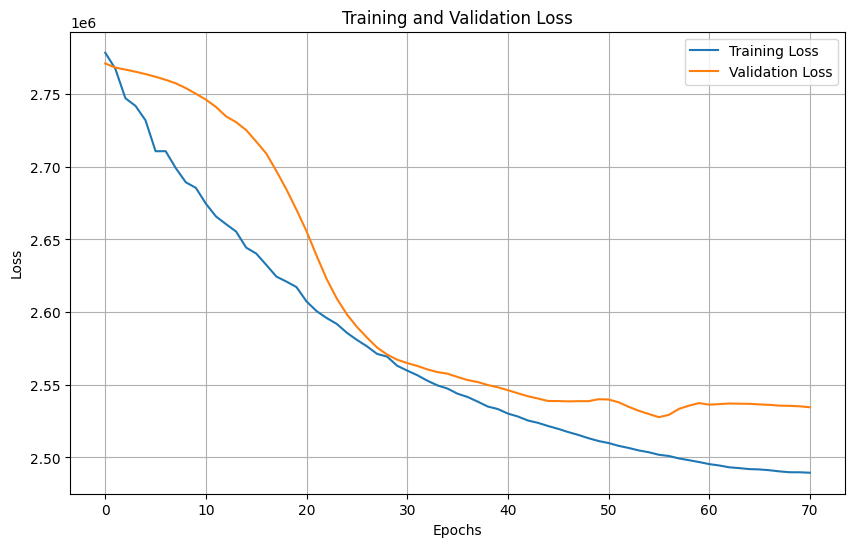

Model saved to drone_path_model.pth

Training ensemble model 1/3


Epoch 1/50: 100%|██████████| 1/1 [00:00<00:00, 70.92it/s, loss=2.69e+6]


Epoch [1/50], Train Loss: 2693742.0000, Val Loss: 2733092.0000


Epoch 2/50: 100%|██████████| 1/1 [00:00<00:00, 79.74it/s, loss=2.68e+6]


Epoch [2/50], Train Loss: 2677303.0000, Val Loss: 2733016.5000


Epoch 3/50: 100%|██████████| 1/1 [00:00<00:00, 80.60it/s, loss=2.67e+6]


Epoch [3/50], Train Loss: 2674459.5000, Val Loss: 2732005.2500


Epoch 4/50: 100%|██████████| 1/1 [00:00<00:00, 83.79it/s, loss=2.67e+6]


Epoch [4/50], Train Loss: 2665841.0000, Val Loss: 2730231.5000


Epoch 5/50: 100%|██████████| 1/1 [00:00<00:00, 83.09it/s, loss=2.66e+6]


Epoch [5/50], Train Loss: 2656286.2500, Val Loss: 2728405.2500


Epoch 6/50: 100%|██████████| 1/1 [00:00<00:00, 82.59it/s, loss=2.65e+6]


Epoch [6/50], Train Loss: 2651454.5000, Val Loss: 2726511.2500


Epoch 7/50: 100%|██████████| 1/1 [00:00<00:00, 85.14it/s, loss=2.64e+6]


Epoch [7/50], Train Loss: 2643597.2500, Val Loss: 2724651.5000


Epoch 8/50: 100%|██████████| 1/1 [00:00<00:00, 83.98it/s, loss=2.64e+6]


Epoch [8/50], Train Loss: 2639216.5000, Val Loss: 2722696.0000


Epoch 9/50: 100%|██████████| 1/1 [00:00<00:00, 83.45it/s, loss=2.63e+6]


Epoch [9/50], Train Loss: 2631711.5000, Val Loss: 2720837.2500


Epoch 10/50: 100%|██████████| 1/1 [00:00<00:00, 78.99it/s, loss=2.62e+6]


Epoch [10/50], Train Loss: 2622490.2500, Val Loss: 2717769.0000


Epoch 11/50: 100%|██████████| 1/1 [00:00<00:00, 84.30it/s, loss=2.62e+6]


Epoch [11/50], Train Loss: 2623146.7500, Val Loss: 2714060.2500


Epoch 12/50: 100%|██████████| 1/1 [00:00<00:00, 84.83it/s, loss=2.61e+6]


Epoch [12/50], Train Loss: 2612530.5000, Val Loss: 2709440.2500


Epoch 13/50: 100%|██████████| 1/1 [00:00<00:00, 84.56it/s, loss=2.61e+6]


Epoch [13/50], Train Loss: 2605961.5000, Val Loss: 2705371.5000


Epoch 14/50: 100%|██████████| 1/1 [00:00<00:00, 84.34it/s, loss=2.6e+6]


Epoch [14/50], Train Loss: 2598340.5000, Val Loss: 2699845.0000


Epoch 15/50: 100%|██████████| 1/1 [00:00<00:00, 85.34it/s, loss=2.6e+6]


Epoch [15/50], Train Loss: 2597096.0000, Val Loss: 2693033.0000


Epoch 16/50: 100%|██████████| 1/1 [00:00<00:00, 84.61it/s, loss=2.59e+6]


Epoch [16/50], Train Loss: 2589124.5000, Val Loss: 2684900.7500


Epoch 17/50: 100%|██████████| 1/1 [00:00<00:00, 85.05it/s, loss=2.59e+6]


Epoch [17/50], Train Loss: 2586438.7500, Val Loss: 2677164.2500


Epoch 18/50: 100%|██████████| 1/1 [00:00<00:00, 85.96it/s, loss=2.58e+6]


Epoch [18/50], Train Loss: 2579347.5000, Val Loss: 2669770.7500


Epoch 19/50: 100%|██████████| 1/1 [00:00<00:00, 85.62it/s, loss=2.58e+6]


Epoch [19/50], Train Loss: 2575920.7500, Val Loss: 2661612.2500


Epoch 20/50: 100%|██████████| 1/1 [00:00<00:00, 83.71it/s, loss=2.57e+6]


Epoch [20/50], Train Loss: 2572718.0000, Val Loss: 2653085.7500


Epoch 21/50: 100%|██████████| 1/1 [00:00<00:00, 81.55it/s, loss=2.57e+6]


Epoch [21/50], Train Loss: 2569345.7500, Val Loss: 2643603.0000


Epoch 22/50: 100%|██████████| 1/1 [00:00<00:00, 85.98it/s, loss=2.56e+6]

Epoch [22/50], Train Loss: 2563712.0000, Val Loss: 2634486.5000

Epoch 23/50: 100%|██████████| 1/1 [00:00<00:00, 84.76it/s, loss=2.56e+6]


Epoch [23/50], Train Loss: 2560081.7500, Val Loss: 2623641.7500


Epoch 24/50: 100%|██████████| 1/1 [00:00<00:00, 87.71it/s, loss=2.56e+6]


Epoch [24/50], Train Loss: 2558053.0000, Val Loss: 2614512.0000


Epoch 25/50: 100%|██████████| 1/1 [00:00<00:00, 84.14it/s, loss=2.55e+6]


Epoch [25/50], Train Loss: 2553489.5000, Val Loss: 2607405.5000


Epoch 26/50: 100%|██████████| 1/1 [00:00<00:00, 84.93it/s, loss=2.55e+6]


Epoch [26/50], Train Loss: 2550917.7500, Val Loss: 2601077.7500


Epoch 27/50: 100%|██████████| 1/1 [00:00<00:00, 83.08it/s, loss=2.55e+6]


Epoch [27/50], Train Loss: 2548158.5000, Val Loss: 2595414.2500


Epoch 28/50: 100%|██████████| 1/1 [00:00<00:00, 84.20it/s, loss=2.54e+6]


Epoch [28/50], Train Loss: 2544435.5000, Val Loss: 2590259.2500


Epoch 29/50: 100%|██████████| 1/1 [00:00<00:00, 82.89it/s, loss=2.54e+6]


Epoch [29/50], Train Loss: 2541691.7500, Val Loss: 2584481.0000


Epoch 30/50: 100%|██████████| 1/1 [00:00<00:00, 81.60it/s, loss=2.54e+6]


Epoch [30/50], Train Loss: 2539501.7500, Val Loss: 2579117.0000


Epoch 31/50: 100%|██████████| 1/1 [00:00<00:00, 83.30it/s, loss=2.54e+6]


Epoch [31/50], Train Loss: 2536145.7500, Val Loss: 2573465.5000


Epoch 32/50: 100%|██████████| 1/1 [00:00<00:00, 82.31it/s, loss=2.53e+6]


Epoch [32/50], Train Loss: 2533615.0000, Val Loss: 2568653.2500


Epoch 33/50: 100%|██████████| 1/1 [00:00<00:00, 80.36it/s, loss=2.53e+6]


Epoch [33/50], Train Loss: 2531091.0000, Val Loss: 2563201.5000


Epoch 34/50: 100%|██████████| 1/1 [00:00<00:00, 78.16it/s, loss=2.53e+6]


Epoch [34/50], Train Loss: 2529163.5000, Val Loss: 2558340.7500


Epoch 35/50: 100%|██████████| 1/1 [00:00<00:00, 81.36it/s, loss=2.53e+6]


Epoch [35/50], Train Loss: 2527142.0000, Val Loss: 2554006.7500


Epoch 36/50: 100%|██████████| 1/1 [00:00<00:00, 86.99it/s, loss=2.52e+6]


Epoch [36/50], Train Loss: 2524974.0000, Val Loss: 2551279.7500


Epoch 37/50: 100%|██████████| 1/1 [00:00<00:00, 84.58it/s, loss=2.52e+6]


Epoch [37/50], Train Loss: 2523008.7500, Val Loss: 2549012.7500


Epoch 38/50: 100%|██████████| 1/1 [00:00<00:00, 86.26it/s, loss=2.52e+6]


Epoch [38/50], Train Loss: 2520903.2500, Val Loss: 2548306.5000


Epoch 39/50: 100%|██████████| 1/1 [00:00<00:00, 83.24it/s, loss=2.52e+6]


Epoch [39/50], Train Loss: 2519597.5000, Val Loss: 2547526.5000


Epoch 40/50: 100%|██████████| 1/1 [00:00<00:00, 84.34it/s, loss=2.52e+6]


Epoch [40/50], Train Loss: 2517401.7500, Val Loss: 2545778.0000


Epoch 41/50: 100%|██████████| 1/1 [00:00<00:00, 86.31it/s, loss=2.52e+6]


Epoch [41/50], Train Loss: 2516115.2500, Val Loss: 2544348.0000


Epoch 42/50: 100%|██████████| 1/1 [00:00<00:00, 84.90it/s, loss=2.51e+6]

Epoch [42/50], Train Loss: 2513879.2500, Val Loss: 2542763.7500



Epoch 43/50: 100%|██████████| 1/1 [00:00<00:00, 86.13it/s, loss=2.51e+6]


Epoch [43/50], Train Loss: 2512635.5000, Val Loss: 2540408.0000


Epoch 44/50: 100%|██████████| 1/1 [00:00<00:00, 83.02it/s, loss=2.51e+6]


Epoch [44/50], Train Loss: 2510981.2500, Val Loss: 2536314.0000


Epoch 45/50: 100%|██████████| 1/1 [00:00<00:00, 85.39it/s, loss=2.51e+6]


Epoch [45/50], Train Loss: 2510080.5000, Val Loss: 2535556.7500


Epoch 46/50: 100%|██████████| 1/1 [00:00<00:00, 84.42it/s, loss=2.51e+6]


Epoch [46/50], Train Loss: 2508175.0000, Val Loss: 2535368.7500


Epoch 47/50: 100%|██████████| 1/1 [00:00<00:00, 83.15it/s, loss=2.51e+6]


Epoch [47/50], Train Loss: 2506983.7500, Val Loss: 2537811.0000


Epoch 48/50: 100%|██████████| 1/1 [00:00<00:00, 85.75it/s, loss=2.51e+6]


Epoch [48/50], Train Loss: 2505573.7500, Val Loss: 2535086.5000


Epoch 49/50: 100%|██████████| 1/1 [00:00<00:00, 82.59it/s, loss=2.5e+6]


Epoch [49/50], Train Loss: 2504587.5000, Val Loss: 2532241.5000


Epoch 50/50: 100%|██████████| 1/1 [00:00<00:00, 82.79it/s, loss=2.5e+6]


Epoch [50/50], Train Loss: 2503565.7500, Val Loss: 2535871.0000


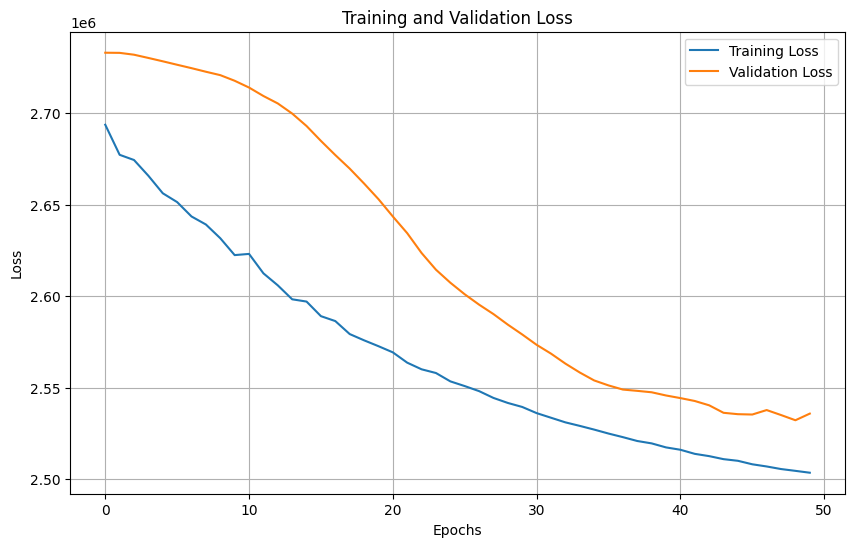

Model saved to drone_path_model.pth

Training ensemble model 2/3


Epoch 1/50: 100%|██████████| 1/1 [00:00<00:00, 69.36it/s, loss=2.73e+6]


Epoch [1/50], Train Loss: 2728189.2500, Val Loss: 2733341.7500


Epoch 2/50: 100%|██████████| 1/1 [00:00<00:00, 82.97it/s, loss=2.72e+6]


Epoch [2/50], Train Loss: 2715254.5000, Val Loss: 2731466.5000


Epoch 3/50: 100%|██████████| 1/1 [00:00<00:00, 79.83it/s, loss=2.7e+6]


Epoch [3/50], Train Loss: 2702695.0000, Val Loss: 2729076.5000


Epoch 4/50: 100%|██████████| 1/1 [00:00<00:00, 81.39it/s, loss=2.7e+6]


Epoch [4/50], Train Loss: 2695335.5000, Val Loss: 2727046.5000


Epoch 5/50: 100%|██████████| 1/1 [00:00<00:00, 84.78it/s, loss=2.68e+6]


Epoch [5/50], Train Loss: 2684766.7500, Val Loss: 2724828.0000


Epoch 6/50: 100%|██████████| 1/1 [00:00<00:00, 84.12it/s, loss=2.68e+6]


Epoch [6/50], Train Loss: 2675642.2500, Val Loss: 2722569.0000


Epoch 7/50: 100%|██████████| 1/1 [00:00<00:00, 85.29it/s, loss=2.67e+6]


Epoch [7/50], Train Loss: 2671517.5000, Val Loss: 2719992.0000


Epoch 8/50: 100%|██████████| 1/1 [00:00<00:00, 84.33it/s, loss=2.66e+6]


Epoch [8/50], Train Loss: 2663870.5000, Val Loss: 2717600.5000


Epoch 9/50: 100%|██████████| 1/1 [00:00<00:00, 82.72it/s, loss=2.66e+6]


Epoch [9/50], Train Loss: 2656572.2500, Val Loss: 2715642.5000


Epoch 10/50: 100%|██████████| 1/1 [00:00<00:00, 84.60it/s, loss=2.65e+6]


Epoch [10/50], Train Loss: 2652846.7500, Val Loss: 2713160.7500


Epoch 11/50: 100%|██████████| 1/1 [00:00<00:00, 84.14it/s, loss=2.65e+6]


Epoch [11/50], Train Loss: 2645677.0000, Val Loss: 2710237.5000


Epoch 12/50: 100%|██████████| 1/1 [00:00<00:00, 80.35it/s, loss=2.64e+6]


Epoch [12/50], Train Loss: 2641669.5000, Val Loss: 2707291.7500


Epoch 13/50: 100%|██████████| 1/1 [00:00<00:00, 86.13it/s, loss=2.63e+6]


Epoch [13/50], Train Loss: 2633825.7500, Val Loss: 2703759.2500


Epoch 14/50: 100%|██████████| 1/1 [00:00<00:00, 88.02it/s, loss=2.63e+6]


Epoch [14/50], Train Loss: 2626000.5000, Val Loss: 2700794.2500


Epoch 15/50: 100%|██████████| 1/1 [00:00<00:00, 86.37it/s, loss=2.62e+6]


Epoch [15/50], Train Loss: 2622141.0000, Val Loss: 2696577.0000


Epoch 16/50: 100%|██████████| 1/1 [00:00<00:00, 82.10it/s, loss=2.62e+6]


Epoch [16/50], Train Loss: 2616053.0000, Val Loss: 2691163.5000


Epoch 17/50: 100%|██████████| 1/1 [00:00<00:00, 84.32it/s, loss=2.61e+6]


Epoch [17/50], Train Loss: 2614518.2500, Val Loss: 2683088.5000


Epoch 18/50: 100%|██████████| 1/1 [00:00<00:00, 85.01it/s, loss=2.61e+6]


Epoch [18/50], Train Loss: 2606805.2500, Val Loss: 2672763.5000


Epoch 19/50: 100%|██████████| 1/1 [00:00<00:00, 81.00it/s, loss=2.6e+6]


Epoch [19/50], Train Loss: 2603083.5000, Val Loss: 2661423.0000


Epoch 20/50: 100%|██████████| 1/1 [00:00<00:00, 84.78it/s, loss=2.6e+6]


Epoch [20/50], Train Loss: 2596415.7500, Val Loss: 2650240.5000


Epoch 21/50: 100%|██████████| 1/1 [00:00<00:00, 84.72it/s, loss=2.59e+6]


Epoch [21/50], Train Loss: 2592243.7500, Val Loss: 2639151.5000


Epoch 22/50: 100%|██████████| 1/1 [00:00<00:00, 84.26it/s, loss=2.59e+6]


Epoch [22/50], Train Loss: 2587645.0000, Val Loss: 2628159.0000


Epoch 23/50: 100%|██████████| 1/1 [00:00<00:00, 85.19it/s, loss=2.58e+6]

Epoch [23/50], Train Loss: 2583898.5000, Val Loss: 2616970.0000



Epoch 24/50: 100%|██████████| 1/1 [00:00<00:00, 84.59it/s, loss=2.58e+6]


Epoch [24/50], Train Loss: 2579479.7500, Val Loss: 2607240.7500


Epoch 25/50: 100%|██████████| 1/1 [00:00<00:00, 84.23it/s, loss=2.58e+6]

Epoch [25/50], Train Loss: 2575695.0000, Val Loss: 2599060.5000



Epoch 26/50: 100%|██████████| 1/1 [00:00<00:00, 86.21it/s, loss=2.57e+6]

Epoch [26/50], Train Loss: 2571860.7500, Val Loss: 2591752.2500



Epoch 27/50: 100%|██████████| 1/1 [00:00<00:00, 86.78it/s, loss=2.57e+6]


Epoch [27/50], Train Loss: 2567883.5000, Val Loss: 2585796.5000


Epoch 28/50: 100%|██████████| 1/1 [00:00<00:00, 83.74it/s, loss=2.57e+6]


Epoch [28/50], Train Loss: 2565250.5000, Val Loss: 2579617.7500


Epoch 29/50: 100%|██████████| 1/1 [00:00<00:00, 87.10it/s, loss=2.56e+6]


Epoch [29/50], Train Loss: 2562451.0000, Val Loss: 2574063.5000


Epoch 30/50: 100%|██████████| 1/1 [00:00<00:00, 84.87it/s, loss=2.56e+6]


Epoch [30/50], Train Loss: 2558660.0000, Val Loss: 2570508.2500


Epoch 31/50: 100%|██████████| 1/1 [00:00<00:00, 78.54it/s, loss=2.56e+6]


Epoch [31/50], Train Loss: 2556874.0000, Val Loss: 2567520.2500


Epoch 32/50: 100%|██████████| 1/1 [00:00<00:00, 79.24it/s, loss=2.55e+6]


Epoch [32/50], Train Loss: 2551859.5000, Val Loss: 2565231.5000


Epoch 33/50: 100%|██████████| 1/1 [00:00<00:00, 81.75it/s, loss=2.55e+6]


Epoch [33/50], Train Loss: 2549788.0000, Val Loss: 2563433.7500


Epoch 34/50: 100%|██████████| 1/1 [00:00<00:00, 63.32it/s, loss=2.55e+6]


Epoch [34/50], Train Loss: 2547763.7500, Val Loss: 2561280.5000


Epoch 35/50: 100%|██████████| 1/1 [00:00<00:00, 74.34it/s, loss=2.55e+6]


Epoch [35/50], Train Loss: 2545038.0000, Val Loss: 2558888.5000


Epoch 36/50: 100%|██████████| 1/1 [00:00<00:00, 70.79it/s, loss=2.54e+6]


Epoch [36/50], Train Loss: 2541316.0000, Val Loss: 2556738.5000


Epoch 37/50: 100%|██████████| 1/1 [00:00<00:00, 85.43it/s, loss=2.54e+6]


Epoch [37/50], Train Loss: 2539196.5000, Val Loss: 2554335.0000


Epoch 38/50: 100%|██████████| 1/1 [00:00<00:00, 81.89it/s, loss=2.54e+6]


Epoch [38/50], Train Loss: 2537113.2500, Val Loss: 2551886.5000


Epoch 39/50: 100%|██████████| 1/1 [00:00<00:00, 83.39it/s, loss=2.53e+6]


Epoch [39/50], Train Loss: 2534507.7500, Val Loss: 2549920.2500


Epoch 40/50: 100%|██████████| 1/1 [00:00<00:00, 85.41it/s, loss=2.53e+6]


Epoch [40/50], Train Loss: 2531940.0000, Val Loss: 2549295.2500


Epoch 41/50: 100%|██████████| 1/1 [00:00<00:00, 68.85it/s, loss=2.53e+6]


Epoch [41/50], Train Loss: 2529973.5000, Val Loss: 2548236.2500


Epoch 42/50: 100%|██████████| 1/1 [00:00<00:00, 55.27it/s, loss=2.53e+6]


Epoch [42/50], Train Loss: 2527561.0000, Val Loss: 2547488.7500


Epoch 43/50: 100%|██████████| 1/1 [00:00<00:00, 58.21it/s, loss=2.53e+6]


Epoch [43/50], Train Loss: 2525897.2500, Val Loss: 2546928.5000


Epoch 44/50: 100%|██████████| 1/1 [00:00<00:00, 62.51it/s, loss=2.52e+6]


Epoch [44/50], Train Loss: 2523740.0000, Val Loss: 2545873.7500


Epoch 45/50: 100%|██████████| 1/1 [00:00<00:00, 82.82it/s, loss=2.52e+6]


Epoch [45/50], Train Loss: 2521541.7500, Val Loss: 2544460.0000


Epoch 46/50: 100%|██████████| 1/1 [00:00<00:00, 79.59it/s, loss=2.52e+6]


Epoch [46/50], Train Loss: 2519585.5000, Val Loss: 2543962.0000


Epoch 47/50: 100%|██████████| 1/1 [00:00<00:00, 81.54it/s, loss=2.52e+6]


Epoch [47/50], Train Loss: 2517159.0000, Val Loss: 2543587.0000


Epoch 48/50: 100%|██████████| 1/1 [00:00<00:00, 83.09it/s, loss=2.52e+6]


Epoch [48/50], Train Loss: 2515600.5000, Val Loss: 2541946.7500


Epoch 49/50: 100%|██████████| 1/1 [00:00<00:00, 81.57it/s, loss=2.51e+6]


Epoch [49/50], Train Loss: 2514074.2500, Val Loss: 2539626.5000


Epoch 50/50: 100%|██████████| 1/1 [00:00<00:00, 83.67it/s, loss=2.51e+6]


Epoch [50/50], Train Loss: 2511831.7500, Val Loss: 2536759.0000


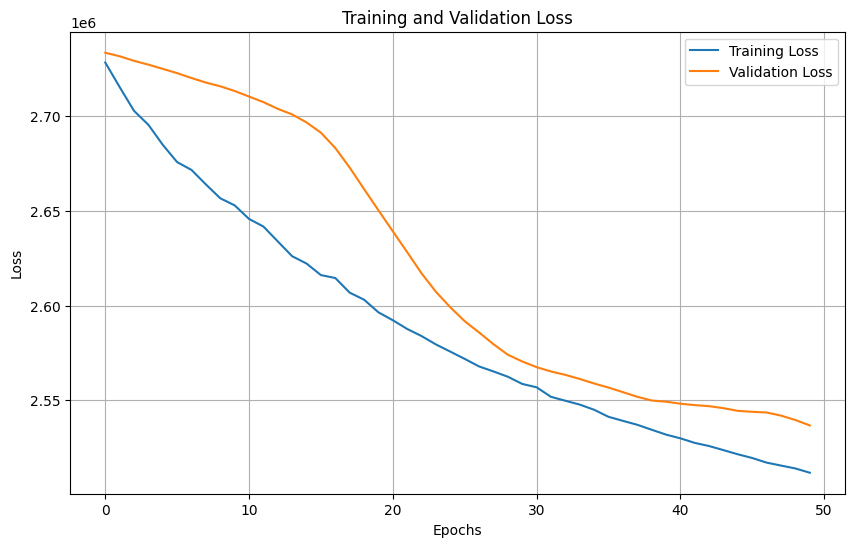

Model saved to drone_path_model.pth

Training ensemble model 3/3


Epoch 1/50: 100%|██████████| 1/1 [00:00<00:00, 71.96it/s, loss=2.73e+6]


Epoch [1/50], Train Loss: 2726971.0000, Val Loss: 2766318.0000


Epoch 2/50: 100%|██████████| 1/1 [00:00<00:00, 85.33it/s, loss=2.72e+6]


Epoch [2/50], Train Loss: 2723075.2500, Val Loss: 2765025.5000


Epoch 3/50: 100%|██████████| 1/1 [00:00<00:00, 84.52it/s, loss=2.72e+6]


Epoch [3/50], Train Loss: 2717234.0000, Val Loss: 2760555.7500


Epoch 4/50: 100%|██████████| 1/1 [00:00<00:00, 84.33it/s, loss=2.7e+6]


Epoch [4/50], Train Loss: 2701939.2500, Val Loss: 2755730.5000


Epoch 5/50: 100%|██████████| 1/1 [00:00<00:00, 84.83it/s, loss=2.69e+6]


Epoch [5/50], Train Loss: 2692591.0000, Val Loss: 2750944.7500


Epoch 6/50: 100%|██████████| 1/1 [00:00<00:00, 83.68it/s, loss=2.69e+6]


Epoch [6/50], Train Loss: 2691536.0000, Val Loss: 2745596.5000


Epoch 7/50: 100%|██████████| 1/1 [00:00<00:00, 84.88it/s, loss=2.68e+6]


Epoch [7/50], Train Loss: 2680145.5000, Val Loss: 2740307.0000


Epoch 8/50: 100%|██████████| 1/1 [00:00<00:00, 81.27it/s, loss=2.67e+6]


Epoch [8/50], Train Loss: 2673769.7500, Val Loss: 2734936.7500


Epoch 9/50: 100%|██████████| 1/1 [00:00<00:00, 86.29it/s, loss=2.66e+6]


Epoch [9/50], Train Loss: 2661825.0000, Val Loss: 2728932.5000


Epoch 10/50: 100%|██████████| 1/1 [00:00<00:00, 84.60it/s, loss=2.66e+6]


Epoch [10/50], Train Loss: 2660531.5000, Val Loss: 2721723.0000


Epoch 11/50: 100%|██████████| 1/1 [00:00<00:00, 85.27it/s, loss=2.65e+6]


Epoch [11/50], Train Loss: 2646139.5000, Val Loss: 2714046.0000


Epoch 12/50: 100%|██████████| 1/1 [00:00<00:00, 84.05it/s, loss=2.64e+6]


Epoch [12/50], Train Loss: 2643615.0000, Val Loss: 2705789.5000


Epoch 13/50: 100%|██████████| 1/1 [00:00<00:00, 80.74it/s, loss=2.64e+6]


Epoch [13/50], Train Loss: 2636558.5000, Val Loss: 2696500.2500


Epoch 14/50: 100%|██████████| 1/1 [00:00<00:00, 83.27it/s, loss=2.63e+6]


Epoch [14/50], Train Loss: 2631861.2500, Val Loss: 2688717.2500


Epoch 15/50: 100%|██████████| 1/1 [00:00<00:00, 84.99it/s, loss=2.62e+6]


Epoch [15/50], Train Loss: 2624512.0000, Val Loss: 2681899.7500


Epoch 16/50: 100%|██████████| 1/1 [00:00<00:00, 79.42it/s, loss=2.62e+6]


Epoch [16/50], Train Loss: 2616819.0000, Val Loss: 2675317.5000


Epoch 17/50: 100%|██████████| 1/1 [00:00<00:00, 81.56it/s, loss=2.62e+6]


Epoch [17/50], Train Loss: 2616211.2500, Val Loss: 2668547.2500


Epoch 18/50: 100%|██████████| 1/1 [00:00<00:00, 82.05it/s, loss=2.61e+6]


Epoch [18/50], Train Loss: 2606177.5000, Val Loss: 2661566.2500


Epoch 19/50: 100%|██████████| 1/1 [00:00<00:00, 84.47it/s, loss=2.6e+6]


Epoch [19/50], Train Loss: 2600159.0000, Val Loss: 2652621.7500


Epoch 20/50: 100%|██████████| 1/1 [00:00<00:00, 84.84it/s, loss=2.59e+6]


Epoch [20/50], Train Loss: 2594185.5000, Val Loss: 2641620.2500


Epoch 21/50: 100%|██████████| 1/1 [00:00<00:00, 78.25it/s, loss=2.59e+6]


Epoch [21/50], Train Loss: 2590708.5000, Val Loss: 2630846.5000


Epoch 22/50: 100%|██████████| 1/1 [00:00<00:00, 82.42it/s, loss=2.58e+6]


Epoch [22/50], Train Loss: 2584437.7500, Val Loss: 2620890.7500


Epoch 23/50: 100%|██████████| 1/1 [00:00<00:00, 82.88it/s, loss=2.58e+6]


Epoch [23/50], Train Loss: 2580349.0000, Val Loss: 2611231.0000


Epoch 24/50: 100%|██████████| 1/1 [00:00<00:00, 85.32it/s, loss=2.58e+6]


Epoch [24/50], Train Loss: 2575550.2500, Val Loss: 2602005.7500


Epoch 25/50: 100%|██████████| 1/1 [00:00<00:00, 83.93it/s, loss=2.57e+6]


Epoch [25/50], Train Loss: 2571816.5000, Val Loss: 2594030.5000


Epoch 26/50: 100%|██████████| 1/1 [00:00<00:00, 83.57it/s, loss=2.57e+6]


Epoch [26/50], Train Loss: 2566613.7500, Val Loss: 2586349.5000


Epoch 27/50: 100%|██████████| 1/1 [00:00<00:00, 81.03it/s, loss=2.56e+6]


Epoch [27/50], Train Loss: 2563100.0000, Val Loss: 2580203.2500


Epoch 28/50: 100%|██████████| 1/1 [00:00<00:00, 82.39it/s, loss=2.56e+6]


Epoch [28/50], Train Loss: 2560191.5000, Val Loss: 2574839.7500


Epoch 29/50: 100%|██████████| 1/1 [00:00<00:00, 83.99it/s, loss=2.56e+6]


Epoch [29/50], Train Loss: 2556069.0000, Val Loss: 2570119.2500


Epoch 30/50: 100%|██████████| 1/1 [00:00<00:00, 83.88it/s, loss=2.55e+6]


Epoch [30/50], Train Loss: 2552729.5000, Val Loss: 2567334.5000


Epoch 31/50: 100%|██████████| 1/1 [00:00<00:00, 84.35it/s, loss=2.55e+6]


Epoch [31/50], Train Loss: 2549468.0000, Val Loss: 2565557.5000


Epoch 32/50: 100%|██████████| 1/1 [00:00<00:00, 85.40it/s, loss=2.55e+6]


Epoch [32/50], Train Loss: 2545717.0000, Val Loss: 2563681.5000


Epoch 33/50: 100%|██████████| 1/1 [00:00<00:00, 80.68it/s, loss=2.54e+6]


Epoch [33/50], Train Loss: 2543599.5000, Val Loss: 2561465.2500


Epoch 34/50: 100%|██████████| 1/1 [00:00<00:00, 84.33it/s, loss=2.54e+6]


Epoch [34/50], Train Loss: 2539414.0000, Val Loss: 2558816.7500


Epoch 35/50: 100%|██████████| 1/1 [00:00<00:00, 82.66it/s, loss=2.54e+6]


Epoch [35/50], Train Loss: 2536997.7500, Val Loss: 2555715.7500


Epoch 36/50: 100%|██████████| 1/1 [00:00<00:00, 83.93it/s, loss=2.53e+6]


Epoch [36/50], Train Loss: 2534427.5000, Val Loss: 2552692.0000


Epoch 37/50: 100%|██████████| 1/1 [00:00<00:00, 81.94it/s, loss=2.53e+6]


Epoch [37/50], Train Loss: 2531992.2500, Val Loss: 2548833.7500


Epoch 38/50: 100%|██████████| 1/1 [00:00<00:00, 84.71it/s, loss=2.53e+6]


Epoch [38/50], Train Loss: 2529820.2500, Val Loss: 2545735.0000


Epoch 39/50: 100%|██████████| 1/1 [00:00<00:00, 85.86it/s, loss=2.53e+6]


Epoch [39/50], Train Loss: 2526512.7500, Val Loss: 2543763.7500


Epoch 40/50: 100%|██████████| 1/1 [00:00<00:00, 84.32it/s, loss=2.52e+6]

Epoch [40/50], Train Loss: 2524314.0000, Val Loss: 2543308.5000



Epoch 41/50: 100%|██████████| 1/1 [00:00<00:00, 84.75it/s, loss=2.52e+6]

Epoch [41/50], Train Loss: 2522514.5000, Val Loss: 2543134.5000



Epoch 42/50: 100%|██████████| 1/1 [00:00<00:00, 85.81it/s, loss=2.52e+6]


Epoch [42/50], Train Loss: 2520492.7500, Val Loss: 2543135.7500


Epoch 43/50: 100%|██████████| 1/1 [00:00<00:00, 86.94it/s, loss=2.52e+6]


Epoch [43/50], Train Loss: 2518896.0000, Val Loss: 2542592.5000


Epoch 44/50: 100%|██████████| 1/1 [00:00<00:00, 86.25it/s, loss=2.52e+6]


Epoch [44/50], Train Loss: 2516898.5000, Val Loss: 2543879.2500


Epoch 45/50: 100%|██████████| 1/1 [00:00<00:00, 79.49it/s, loss=2.51e+6]


Epoch [45/50], Train Loss: 2514909.5000, Val Loss: 2547578.2500


Epoch 46/50: 100%|██████████| 1/1 [00:00<00:00, 84.55it/s, loss=2.51e+6]


Epoch [46/50], Train Loss: 2513548.0000, Val Loss: 2549077.7500


Epoch 47/50: 100%|██████████| 1/1 [00:00<00:00, 84.02it/s, loss=2.51e+6]


Epoch [47/50], Train Loss: 2511315.0000, Val Loss: 2544214.0000


Epoch 48/50: 100%|██████████| 1/1 [00:00<00:00, 83.68it/s, loss=2.51e+6]


Epoch [48/50], Train Loss: 2510140.7500, Val Loss: 2540321.2500


Epoch 49/50: 100%|██████████| 1/1 [00:00<00:00, 83.64it/s, loss=2.51e+6]


Epoch [49/50], Train Loss: 2509103.0000, Val Loss: 2538699.0000


Epoch 50/50: 100%|██████████| 1/1 [00:00<00:00, 83.58it/s, loss=2.51e+6]


Epoch [50/50], Train Loss: 2508606.0000, Val Loss: 2537236.2500


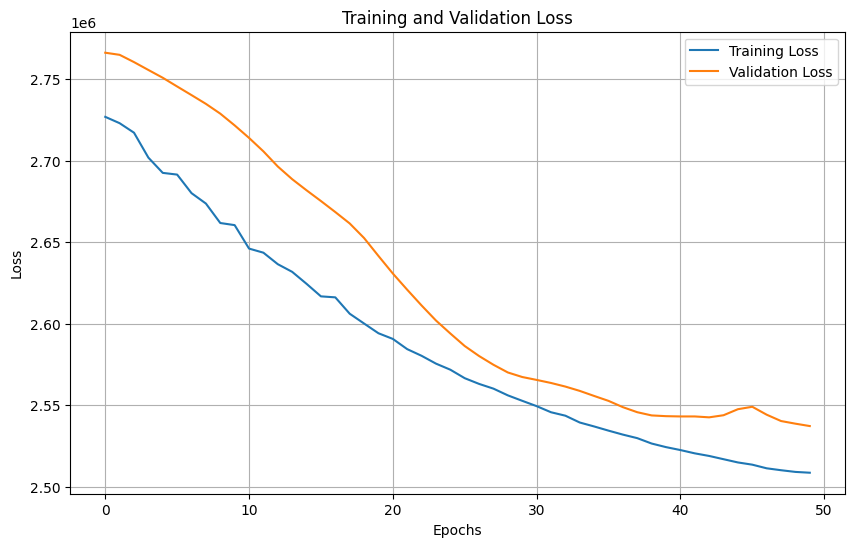

Model saved to drone_path_model.pth
Predicting 60 future frames with uncertainty...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScal


===== PREDICTION ERROR METRICS =====
Mean Distance Error: 2244.71 pixels
Median Distance Error: 2248.45 pixels
Maximum Distance Error: 2422.93 pixels
RMSE: 2249.05 pixels
Error Growth Rate: 7.6471 pixels/frame
Normalized Error: 203.2025
Mean Angular Error: 85.92 degrees
Uncertainty-Error Correlation: -0.6642
Calibration Score: 0.0000



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_31/2206587091.py:893: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


Error analysis visualization saved to: error_analysis_down2.png


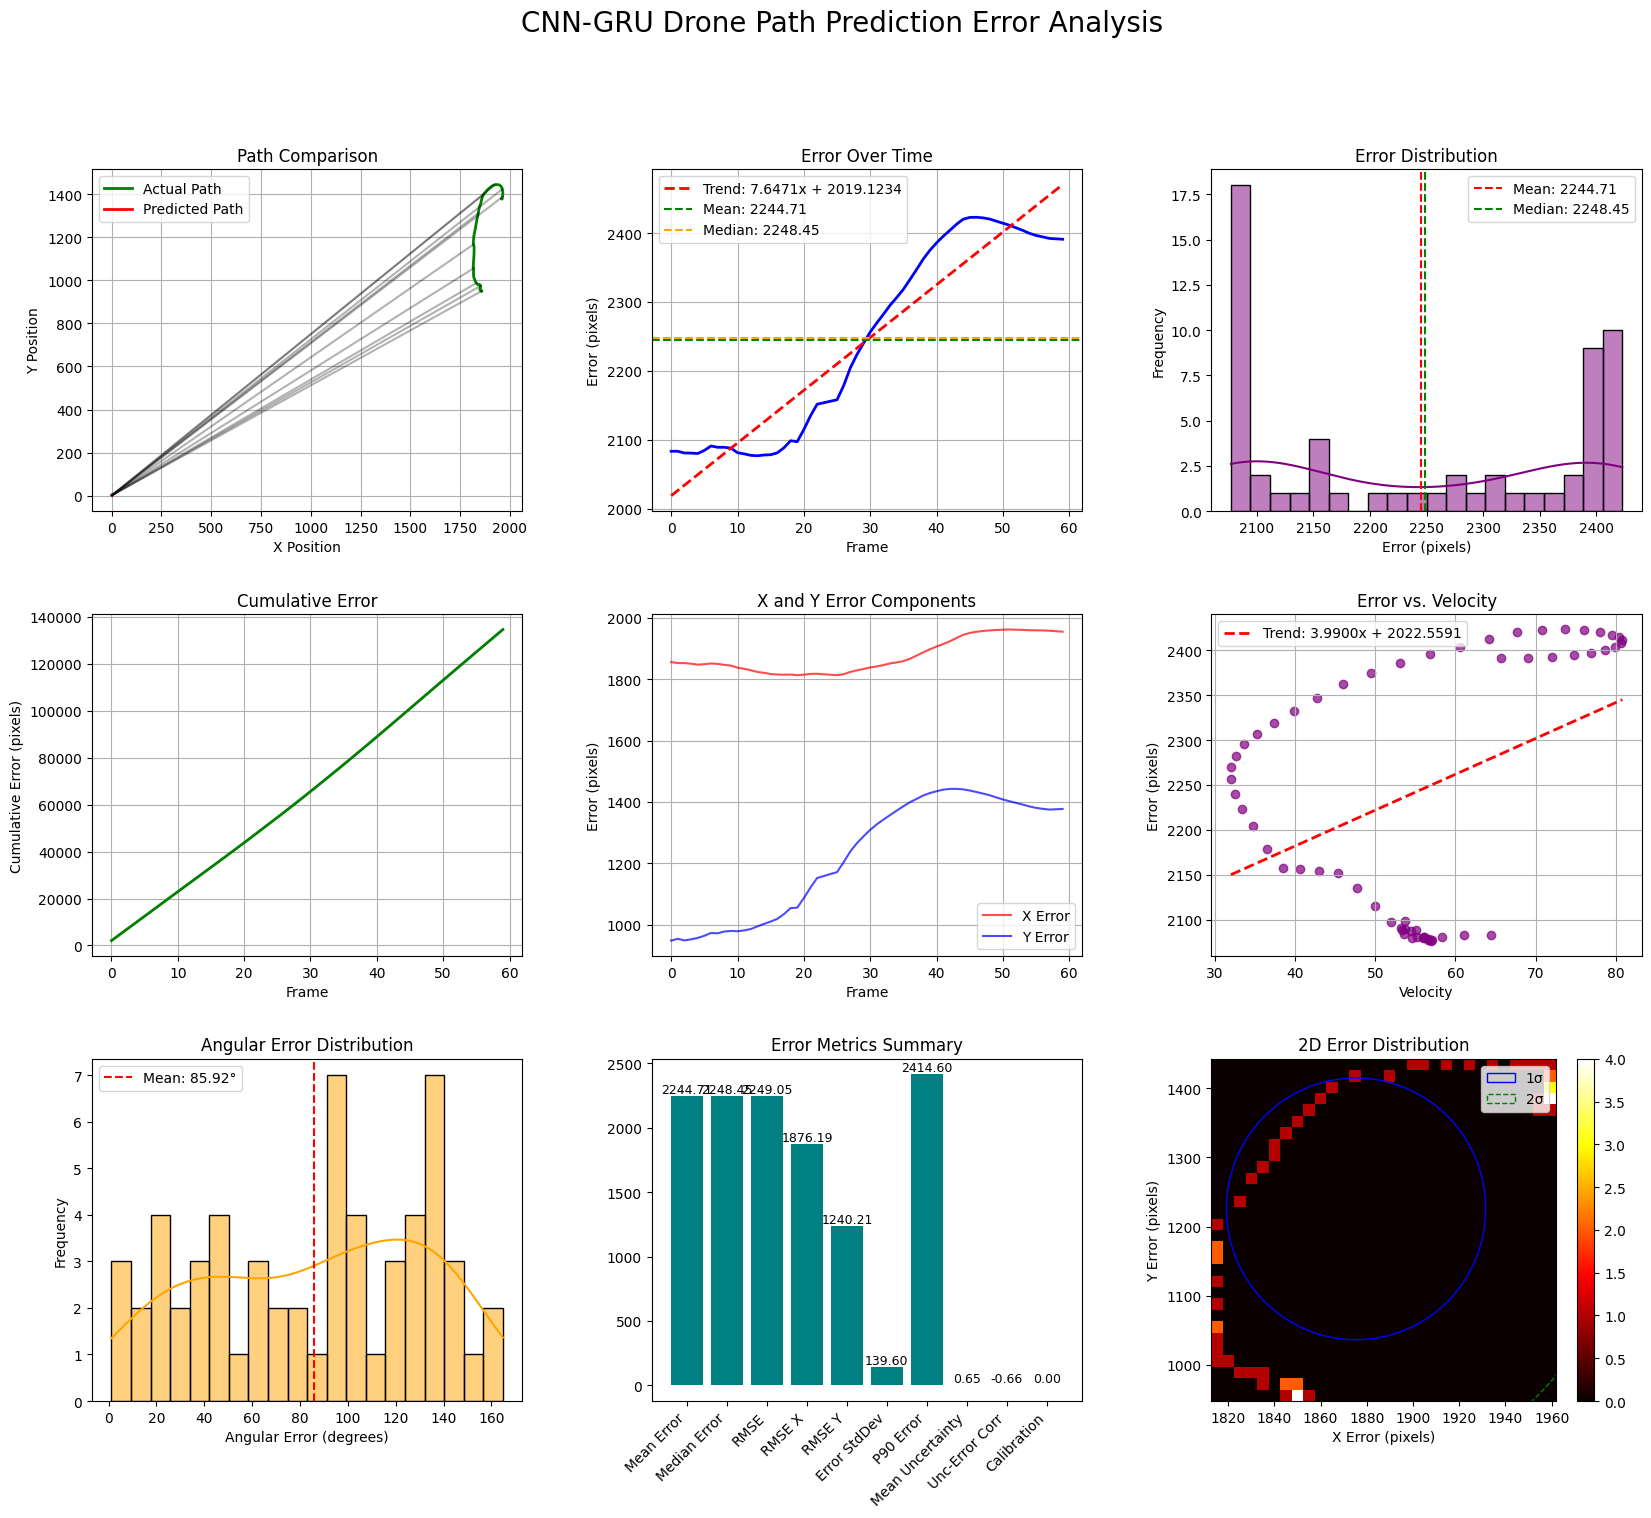

Error growth analysis saved to: error_analysis_down2_error_growth.png


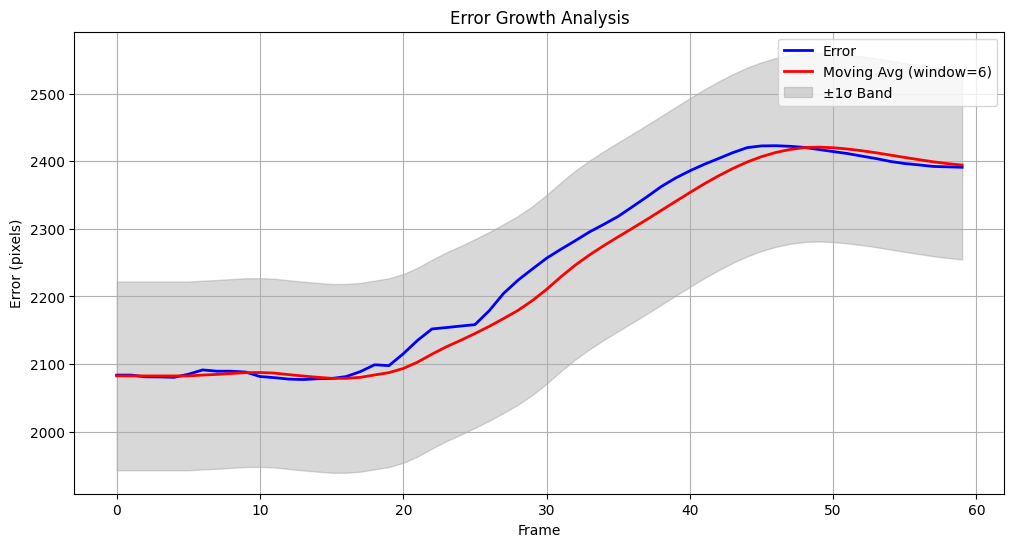

/tmp/ipykernel_31/2206587091.py:963: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


Error heatmap saved to: error_analysis_down2_error_heatmap.png


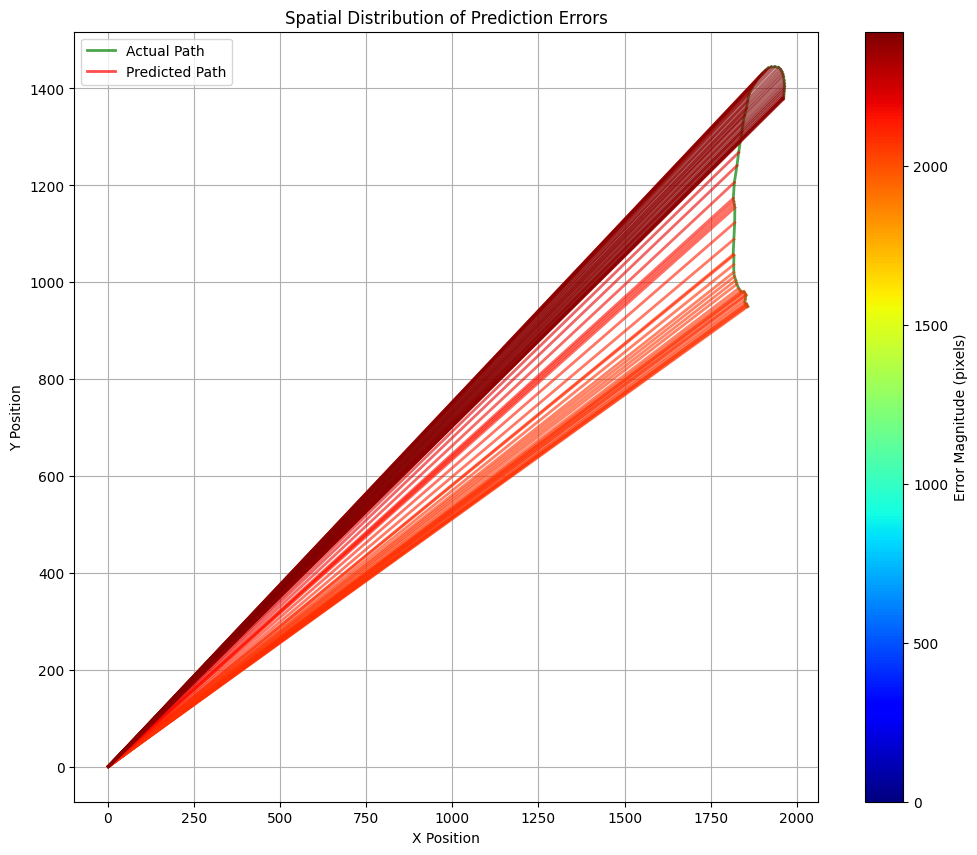

Attention visualization saved to: error_analysis_down2_attention_attention.png


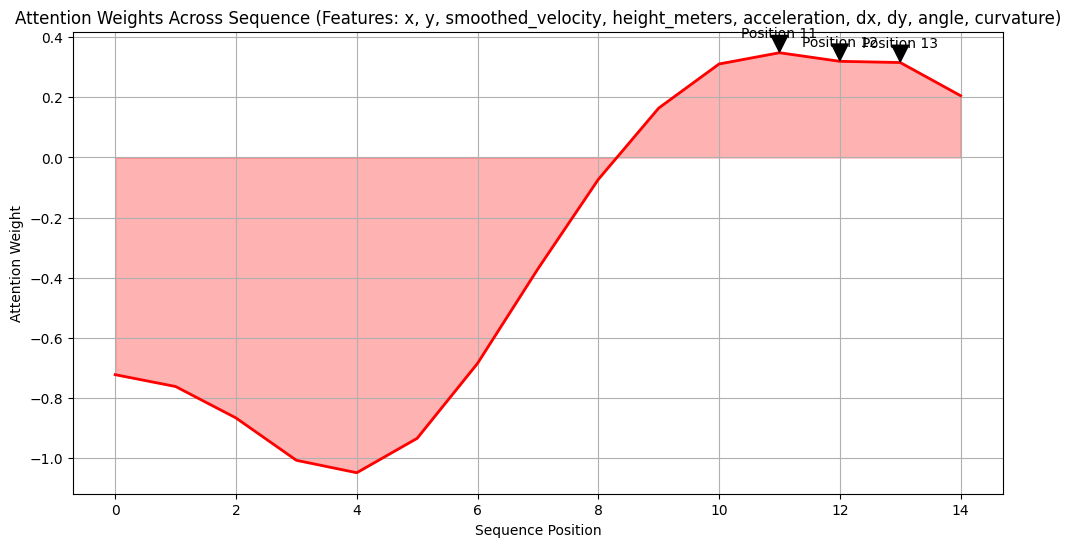

Could not create 2D attention heatmap.
Comparison video saved to cnn_gru_prediction_comparison_down2.mp4
Prediction results saved to prediction_results.csv
Done!


<Figure size 1000x800 with 0 Axes>

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import cv2

class DronePathDataset(Dataset):
    """Enhanced dataset for drone path data with augmentation"""
    def __init__(self, X, y, augment=False):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.augment = augment
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.y[idx]
        
        if self.augment and np.random.random() < 0.5:
            # Apply random noise augmentation
            noise = torch.randn_like(x) * 0.03
            x = x + noise
            
        return x, y

class CNNGRUAttention(nn.Module):
    """
    Hybrid CNN-GRU model with attention for drone path prediction
    
    Architecture:
    1. Conv1D layers to extract spatial features
    2. GRU layers to process temporal sequence
    3. Attention mechanism to focus on important timesteps
    4. Dense layers for prediction refinement
    """
    def __init__(self, input_size, seq_length, hidden_size=128, num_layers=2, 
                 cnn_filters=[64, 128], dropout=0.3, output_size=2):
        super(CNNGRUAttention, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.seq_length = seq_length
        
        # CNN layers for spatial feature extraction
        self.cnn_layers = nn.ModuleList()
        in_channels = input_size
        
        for filters in cnn_filters:
            self.cnn_layers.append(
                nn.Sequential(
                    nn.Conv1d(in_channels, filters, kernel_size=3, padding=1),
                    nn.BatchNorm1d(filters),
                    nn.ReLU(),
                    nn.Conv1d(filters, filters, kernel_size=3, padding=1),
                    nn.BatchNorm1d(filters),
                    nn.ReLU(),
                )
            )
            in_channels = filters
        
        # Bidirectional GRU for temporal features
        self.gru = nn.GRU(
            input_size=cnn_filters[-1],
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        
        # Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(hidden_size * 2, 64),  # * 2 for bidirectional
            nn.Tanh(),
            nn.Linear(64, 1)
        )
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)
        
        # Output layers with residual connections
        self.fc1 = nn.Linear(hidden_size * 2, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, output_size)
        
        # Uncertainty estimation (predict mean and variance)
        self.uncertainty = nn.Linear(64, output_size)
        
    def forward(self, x):
        batch_size = x.size(0)
        
        # Reshape input for CNN: [batch, seq_len, features] -> [batch, features, seq_len]
        x_cnn = x.permute(0, 2, 1)
        
        # Apply CNN layers
        for cnn_layer in self.cnn_layers:
            x_cnn = cnn_layer(x_cnn)
        
        # Reshape back for GRU: [batch, features, seq_len] -> [batch, seq_len, features]
        x_gru = x_cnn.permute(0, 2, 1)
        
        # Apply GRU
        gru_out, _ = self.gru(x_gru)
        
        # Apply attention
        attention_weights = F.softmax(self.attention(gru_out).squeeze(-1), dim=1)
        attention_weights = attention_weights.unsqueeze(2)
        context_vector = torch.sum(attention_weights * gru_out, dim=1)
        
        # Apply dropout
        context_vector = self.dropout(context_vector)
        
        # Fully connected layers with residual connections
        fc1_out = self.fc1(context_vector)
        fc1_out = self.bn1(fc1_out)
        fc1_out = F.relu(fc1_out)
        
        fc2_out = self.fc2(fc1_out)
        fc2_out = self.bn2(fc2_out)
        fc2_out = F.relu(fc2_out)
        
        # Final prediction
        position_output = self.fc3(fc2_out)
        
        # Uncertainty estimation (log variance)
        uncertainty = torch.exp(self.uncertainty(fc2_out))
        
        return position_output, uncertainty


def prepare_sequences(df, seq_length=30, stride=1, features=None):
    """Prepare sequences for training with enhanced feature engineering"""
    if features is None:
        # Default features
        features = ['x', 'y', 'smoothed_velocity', 'height_meters']
    
    # Add derived features for better prediction
    if 'smoothed_velocity' in df.columns:
        # Calculate acceleration (change in velocity)
        df['acceleration'] = df['smoothed_velocity'].diff().fillna(0)
        if 'acceleration' not in features:
            features.append('acceleration')
    
    if 'x' in df.columns and 'y' in df.columns:
        # Calculate direction vectors
        df['dx'] = df['x'].diff().fillna(0)
        df['dy'] = df['y'].diff().fillna(0)
        
        # Calculate angle
        df['angle'] = np.arctan2(df['dy'], df['dx'])
        
        # Calculate curvature (change in angle)
        df['curvature'] = df['angle'].diff().fillna(0)
        
        if 'dx' not in features:
            features.append('dx')
        if 'dy' not in features:
            features.append('dy')
        if 'angle' not in features:
            features.append('angle')
        if 'curvature' not in features:
            features.append('curvature')
    
    print(f"Using features: {features}")
    
    # Scale features to [0, 1] range for better training
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
    
    # Create sequences with stride for data augmentation
    X, y = [], []
    for i in range(0, len(df_scaled) - seq_length, stride):
        # Input sequence
        X.append(df_scaled.iloc[i:i+seq_length].values)
        
        # Target is next position
        target_idx = i + seq_length
        y.append(df[['x', 'y']].iloc[target_idx].values)
    
    return np.array(X), np.array(y), scaler, features


def train_model(model, train_loader, val_loader, device, epochs=100, patience=15):
    """Train the CNN-GRU model with advanced techniques"""
    # Loss function: combination of MSE and uncertainty-aware loss
    def gaussian_nll_loss(pred, target, variance):
        """Gaussian negative log likelihood loss with uncertainty"""
        return 0.5 * (torch.log(variance) + (pred - target)**2 / variance).sum(dim=1).mean()
    
    # Adam optimizer with weight decay for regularization
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 'min', patience=patience//3, factor=0.5, verbose=True
    )
    
    # Early stopping parameters
    best_val_loss = float('inf')
    best_model = None
    early_stop_counter = 0
    
    # Training history
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
        for inputs, targets in progress_bar:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            predictions, uncertainties = model(inputs)
            
            # Compute loss
            mse_loss = F.mse_loss(predictions, targets)
            uncertainty_loss = gaussian_nll_loss(predictions, targets, uncertainties + 1e-6)
            loss = mse_loss + 0.1 * uncertainty_loss
            
            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            
            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            running_loss += loss.item()
            progress_bar.set_postfix({'loss': loss.item()})
        
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                predictions, uncertainties = model(inputs)
                
                mse_loss = F.mse_loss(predictions, targets)
                uncertainty_loss = gaussian_nll_loss(predictions, targets, uncertainties + 1e-6)
                loss = mse_loss + 0.1 * uncertainty_loss
                
                val_loss += loss.item()
        
        avg_val_loss = val_loss / max(len(val_loader), 1)
        val_losses.append(avg_val_loss)
        
        # Update learning rate
        scheduler.step(avg_val_loss)
        
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
        
        # Save best model and check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model = model.state_dict().copy()
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs")
                break
    
    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Load best model
    model.load_state_dict(best_model)
    # Save the model (add these lines)
    torch.save(model.state_dict(), 'drone_path_model_down.pth')
    print("Model saved to drone_path_model.pth")
    return model, train_losses, val_losses


def predict_with_uncertainty(model, df, scaler, features, seq_length=30, future_steps=120, num_samples=20):
    """Predict future frames with uncertainty estimation using Monte Carlo sampling"""
    # Get initial sequence
    initial_seq = df[features].iloc[:seq_length].values
    initial_seq_scaled = scaler.transform(initial_seq)
    
    # Prepare for prediction
    device = next(model.parameters()).device
    current_seq = torch.tensor(initial_seq_scaled, dtype=torch.float32).unsqueeze(0).to(device)
    
    # Containers for predictions and uncertainties
    all_predictions = []
    all_uncertainties = []
    
    # Predict for each future step
    model.eval()
    
    with torch.no_grad():
        for _ in range(future_steps):
            # Generate multiple predictions using Monte Carlo dropout
            model.train()  # Enable dropout for MC sampling
            sample_predictions = []
            
            for _ in range(num_samples):
                pred, uncertainty = model(current_seq)
                sample_predictions.append(pred[0].cpu().numpy())
            
            # Compute mean and uncertainty from samples
            sample_predictions = np.array(sample_predictions)
            mean_prediction = np.mean(sample_predictions, axis=0)
            prediction_std = np.std(sample_predictions, axis=0)
            
            # Create full feature vector (we need to add other features beyond position)
            frame_idx = len(all_predictions) + seq_length
            if frame_idx < len(df):
                next_features = df[features].iloc[frame_idx].values.copy()
                next_features_scaled = scaler.transform([next_features])[0]
                
                # Replace position with our prediction
                next_features_scaled[0] = mean_prediction[0]  # x
                next_features_scaled[1] = mean_prediction[1]  # y
                
                # Add to predictions and uncertainties
                all_predictions.append(mean_prediction)
                all_uncertainties.append(prediction_std)
                
                # Update sequence
                current_seq = torch.cat([
                    current_seq[:, 1:, :],
                    torch.tensor(next_features_scaled, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
                ], dim=1)
            else:
                break
    
    # Inverse transform predictions
    all_predictions = np.array(all_predictions)
    all_uncertainties = np.array(all_uncertainties)
    
    return all_predictions, all_uncertainties


def ensemble_prediction(models, df, scaler, features, seq_length=30, future_steps=120):
    """Use an ensemble of models for more robust prediction"""
    # Get initial sequence
    initial_seq = df[features].iloc[:seq_length].values
    initial_seq_scaled = scaler.transform(initial_seq)
    
    # Containers for all model predictions
    all_model_predictions = []
    
    # Get predictions from each model
    for model in models:
        device = next(model.parameters()).device
        current_seq = torch.tensor(initial_seq_scaled, dtype=torch.float32).unsqueeze(0).to(device)
        
        # Container for this model's predictions
        model_predictions = []
        
        # Predict future steps
        model.eval()
        with torch.no_grad():
            for _ in range(future_steps):
                # Predict next position
                pred, _ = model(current_seq)
                next_pos = pred[0].cpu().numpy()
                
                # Create full feature vector
                frame_idx = len(model_predictions) + seq_length
                if frame_idx < len(df):
                    next_features = df[features].iloc[frame_idx].values.copy()
                    next_features_scaled = scaler.transform([next_features])[0]
                    
                    # Replace position with our prediction
                    next_features_scaled[0] = next_pos[0]  # x
                    next_features_scaled[1] = next_pos[1]  # y
                    
                    # Add to predictions
                    model_predictions.append(next_pos)
                    
                    # Update sequence
                    current_seq = torch.cat([
                        current_seq[:, 1:, :],
                        torch.tensor(next_features_scaled, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
                    ], dim=1)
                else:
                    break
        
        all_model_predictions.append(np.array(model_predictions))
    
    # Average predictions across models
    ensemble_predictions = np.mean(all_model_predictions, axis=0)
    # Calculate uncertainty as standard deviation across models
    ensemble_uncertainties = np.std(all_model_predictions, axis=0)
    
    return ensemble_predictions, ensemble_uncertainties


def create_comparison_video(input_video, output_video, df, predicted_positions, 
                           uncertainties, training_end_frame, seq_length):
    """Create a video showing actual vs predicted paths with uncertainty visualization"""
    cap = cv2.VideoCapture(input_video)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_video}")
        return False
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Create output video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))
    
    # Extract paths for visualization
    training_path = df[['x', 'y']].iloc[:training_end_frame].values
    actual_test_path = df[['x', 'y']].iloc[training_end_frame:].values
    predicted_path = predicted_positions
    
    # Calculate errors for visualization
    errors = np.zeros(len(predicted_path))
    for i in range(min(len(predicted_path), len(actual_test_path))):
        errors[i] = np.sqrt(((actual_test_path[i] - predicted_path[i]) ** 2).sum())
    
    max_error = max(errors) if len(errors) > 0 else 1
    
    # Process each frame
    frame_idx = 0
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Create a copy for visualization
        viz_frame = frame.copy()
        
        # Add semi-transparent overlay for better visibility
        overlay = viz_frame.copy()
        cv2.rectangle(overlay, (0, 0), (width, 60), (0, 0, 0), -1)
        cv2.rectangle(overlay, (0, height-80), (width, height), (0, 0, 0), -1)
        cv2.addWeighted(overlay, 0.7, viz_frame, 0.3, 0, viz_frame)
        
        # Draw the training path (blue)
        for i in range(len(training_path)-1):
            pt1 = (int(training_path[i][0]), int(training_path[i][1]))
            pt2 = (int(training_path[i+1][0]), int(training_path[i+1][1]))
            cv2.line(viz_frame, pt1, pt2, (255, 0, 0), 2)  # Blue color
        
        # Draw the actual test path (green)
        for i in range(len(actual_test_path)-1):
            pt1 = (int(actual_test_path[i][0]), int(actual_test_path[i][1]))
            pt2 = (int(actual_test_path[i+1][0]), int(actual_test_path[i+1][1]))
            cv2.line(viz_frame, pt1, pt2, (0, 255, 0), 2)  # Green color
        
        # Draw the predicted path with confidence intervals
        for i in range(len(predicted_path)-1):
            pt1 = (int(predicted_path[i][0]), int(predicted_path[i][1]))
            pt2 = (int(predicted_path[i+1][0]), int(predicted_path[i+1][1]))
            
            # Color based on error (red to yellow gradient)
            if i < len(errors):
                error_ratio = min(errors[i] / max_error, 1.0)
                color = (0, int(255 * (1-error_ratio)), int(255 * error_ratio))  # Yellow (low error) to Red (high error)
            else:
                color = (0, 0, 255)  # Default red
                
            cv2.line(viz_frame, pt1, pt2, color, 2)
            
            # Draw uncertainty ellipses if available
            if i < len(uncertainties):
                # Calculate ellipse parameters
                uncertainty_x = uncertainties[i][0] * 3  # 3-sigma for 99.7% confidence
                uncertainty_y = uncertainties[i][1] * 3
                
                cv2.ellipse(viz_frame, 
                           center=pt1,
                           axes=(int(max(5, uncertainty_x * 20)), int(max(5, uncertainty_y * 20))),
                           angle=0,
                           startAngle=0,
                           endAngle=360,
                           color=(255, 0, 255),  # Magenta
                           thickness=1)
            
        # Draw current drone position
        if frame_idx < len(df):
            current_x, current_y = int(df.iloc[frame_idx]['x']), int(df.iloc[frame_idx]['y'])
            cv2.circle(viz_frame, (current_x, current_y), 12, (255, 255, 255), -1)  # White circle
            cv2.circle(viz_frame, (current_x, current_y), 8, (0, 0, 0), -1)  # Black inner circle
            
            # Add label for current phase
            phase_text = "TRAINING PHASE" if frame_idx < training_end_frame else "PREDICTION PHASE"
            cv2.putText(viz_frame, phase_text, (width - 300, 30), 
                      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)
            
            # Add timestamp
            if 'timestamp' in df.columns:
                timestamp = df.iloc[frame_idx]['timestamp']
                cv2.putText(viz_frame, f"Time: {timestamp:.2f}s", (10, 30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
            
            # If in prediction phase, show error and uncertainty
            if frame_idx >= training_end_frame and frame_idx - training_end_frame < len(predicted_positions):
                pred_idx = frame_idx - training_end_frame
                pred_x, pred_y = int(predicted_positions[pred_idx][0]), int(predicted_positions[pred_idx][1])
                
                # Calculate and display error
                error = np.sqrt((current_x - pred_x)**2 + (current_y - pred_y)**2)
                
                # Color code based on error magnitude
                if error < 20:
                    error_color = (0, 255, 0)  # Green for low error
                elif error < 50:
                    error_color = (0, 255, 255)  # Yellow for medium error
                else:
                    error_color = (0, 0, 255)  # Red for high error
                    
                cv2.putText(viz_frame, f"Error: {error:.1f} px", (10, height - 55), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.8, error_color, 2)
                
                # Show uncertainty if available
                if pred_idx < len(uncertainties):
                    unc_x, unc_y = uncertainties[pred_idx]
                    cv2.putText(viz_frame, f"Uncertainty: {np.mean([unc_x, unc_y]):.3f}", 
                               (10, height - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 255), 2)
                
                # Draw line between actual and predicted
                cv2.line(viz_frame, (current_x, current_y), (pred_x, pred_y), 
                         error_color, 2, cv2.LINE_AA)
                
                # Draw predicted position
                cv2.circle(viz_frame, (pred_x, pred_y), 10, (0, 0, 255), -1)
        
        # Add legend
        cv2.putText(viz_frame, "Training Path", (10, height - 25), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)  # Blue
        cv2.putText(viz_frame, "Actual Test Path", (200, height - 25), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)  # Green
        cv2.putText(viz_frame, "Predicted Path", (400, height - 25), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)  # Red
        
        # Write frame
        out.write(viz_frame)
        frame_idx += 1
    
    cap.release()
    out.release()
    print(f"Comparison video saved to {output_video}")
    return True


def calculate_comprehensive_metrics(actual_positions, predicted_positions, uncertainties=None):
    """
    Calculate comprehensive error metrics for path prediction
    
    Parameters:
        actual_positions: numpy array of actual positions (x, y)
        predicted_positions: numpy array of predicted positions (x, y)
        uncertainties: optional numpy array of uncertainties for each prediction
        
    Returns:
        Dictionary of error metrics
    """
    # Ensure arrays are the same length
    min_len = min(len(actual_positions), len(predicted_positions))
    actual = actual_positions[:min_len]
    predicted = predicted_positions[:min_len]
    
    # Calculate euclidean distance errors
    euclidean_errors = np.sqrt(np.sum((actual - predicted) ** 2, axis=1))
    
    # Calculate component errors
    x_errors = actual[:, 0] - predicted[:, 0]
    y_errors = actual[:, 1] - predicted[:, 1]
    
    # Basic statistics
    metrics = {
        'mean_error': np.mean(euclidean_errors),
        'median_error': np.median(euclidean_errors),
        'max_error': np.max(euclidean_errors),
        'min_error': np.min(euclidean_errors),
        'std_error': np.std(euclidean_errors),
        'rmse': np.sqrt(np.mean(euclidean_errors**2)),
        'mae_x': np.mean(np.abs(x_errors)),
        'mae_y': np.mean(np.abs(y_errors)),
        'rmse_x': np.sqrt(np.mean(x_errors**2)),
        'rmse_y': np.sqrt(np.mean(y_errors**2)),
        'total_cumulative_error': np.sum(euclidean_errors),
        'euclidean_errors': euclidean_errors,
        'x_errors': x_errors,
        'y_errors': y_errors
    }
    
    # Error percentiles
    for p in [50, 75, 90, 95, 99]:
        metrics[f'percentile_{p}'] = np.percentile(euclidean_errors, p)
    
    # Calculate error growth rate (slope of error over time)
    if min_len > 2:
        frames = np.arange(min_len)
        error_slope = np.polyfit(frames, euclidean_errors, 1)[0]
        metrics['error_growth_rate'] = error_slope
    
    # Calculate cumulative error over time
    metrics['cumulative_error'] = np.cumsum(euclidean_errors)
    
    # Calculate normalized error (by path length)
    path_lengths = np.sqrt(np.sum(np.diff(actual, axis=0)**2, axis=1))
    total_path_length = np.sum(path_lengths)
    if total_path_length > 0:
        metrics['normalized_error'] = metrics['total_cumulative_error'] / total_path_length
    
    # Calculate direction accuracy
    if min_len > 1:
        actual_directions = np.arctan2(np.diff(actual[:, 1]), np.diff(actual[:, 0]))
        pred_directions = np.arctan2(np.diff(predicted[:, 1]), np.diff(predicted[:, 0]))
        
        # Convert to degrees and ensure positive angles
        actual_degrees = np.degrees(actual_directions) % 360
        pred_degrees = np.degrees(pred_directions) % 360
        
        # Calculate angular error (accounting for 360 degree wrap-around)
        angular_errors = np.minimum(np.abs(actual_degrees - pred_degrees), 
                                   360 - np.abs(actual_degrees - pred_degrees))
        
        metrics['mean_angular_error'] = np.mean(angular_errors)
        metrics['angular_errors'] = angular_errors
    
    # Uncertainty evaluation if provided
    if uncertainties is not None:
        # Limit uncertainties to same length
        uncertainties = uncertainties[:min_len]
        
        # Average uncertainty
        metrics['mean_uncertainty'] = np.mean(np.mean(uncertainties, axis=1))
        
        # Uncertainty calibration (correlation between error and uncertainty)
        if min_len > 2:
            metrics['uncertainty_correlation'] = np.corrcoef(
                np.mean(uncertainties, axis=1), euclidean_errors)[0, 1]
            
            # Calculate what percentage of actual positions fall within uncertainty bounds
            # Using 2-sigma (95% confidence) uncertainty bounds
            in_bounds_count = 0
            for i in range(min_len):
                if euclidean_errors[i] <= 2 * np.mean(uncertainties[i]):
                    in_bounds_count += 1
            
            metrics['calibration_score'] = in_bounds_count / min_len
    
    return metrics


def visualize_error_analysis(actual_positions, predicted_positions, uncertainties=None, 
                             metrics=None, df=None, training_end_frame=None, save_path=None):
    """
    Create comprehensive visualizations of prediction errors
    
    Parameters:
        actual_positions: numpy array of actual positions (x, y)
        predicted_positions: numpy array of predicted positions (x, y)
        uncertainties: optional numpy array of uncertainties for each prediction
        metrics: dictionary of error metrics (if already calculated)
        df: optional dataframe with original data for additional context
        training_end_frame: index where training data ends and prediction begins
        save_path: path to save the figures
    """
    # Calculate metrics if not provided
    if metrics is None:
        metrics = calculate_comprehensive_metrics(actual_positions, predicted_positions, uncertainties)
    
    # Create a multi-plot figure for comprehensive error analysis
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('CNN-GRU Drone Path Prediction Error Analysis', fontsize=20)
    
    grid = plt.GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)
    
    # 1. Prediction vs Actual Path Comparison
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.plot(actual_positions[:, 0], actual_positions[:, 1], 'g-', label='Actual Path', linewidth=2)
    ax1.plot(predicted_positions[:, 0], predicted_positions[:, 1], 'r-', label='Predicted Path', linewidth=2)
    
    # Draw uncertainty ellipses if available
    if uncertainties is not None:
        for i in range(0, len(predicted_positions), max(1, len(predicted_positions)//20)):  # Draw every 5% of points
            x, y = predicted_positions[i]
            unc_x, unc_y = uncertainties[i]
            
            # Create ellipse (2-sigma)
            ellipse = plt.matplotlib.patches.Ellipse(
                (x, y), width=4*unc_x, height=4*unc_y, 
                edgecolor='purple', facecolor='none', alpha=0.5
            )
            ax1.add_patch(ellipse)
    
    # Add connecting lines between actual and predicted points
    for i in range(0, len(actual_positions), max(1, len(actual_positions)//10)):
        ax1.plot([actual_positions[i, 0], predicted_positions[i, 0]], 
                [actual_positions[i, 1], predicted_positions[i, 1]], 
                'k-', alpha=0.3)
    
    ax1.set_title('Path Comparison')
    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.legend()
    ax1.grid(True)
    
    # 2. Error Over Time
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.plot(metrics['euclidean_errors'], 'b-', linewidth=2)
    
    # Add trend line
    frames = np.arange(len(metrics['euclidean_errors']))
    if len(frames) > 1:
        z = np.polyfit(frames, metrics['euclidean_errors'], 1)
        p = np.poly1d(z)
        ax2.plot(frames, p(frames), "r--", linewidth=2, 
               label=f"Trend: {z[0]:.4f}x + {z[1]:.4f}")
    
    ax2.axhline(y=metrics['mean_error'], color='g', linestyle='--', 
               label=f'Mean: {metrics["mean_error"]:.2f}')
    ax2.axhline(y=metrics['median_error'], color='orange', linestyle='--', 
               label=f'Median: {metrics["median_error"]:.2f}')
    
    ax2.set_title('Error Over Time')
    ax2.set_xlabel('Frame')
    ax2.set_ylabel('Error (pixels)')
    ax2.legend()
    ax2.grid(True)
    
    # 3. Error Distribution Histogram
    ax3 = fig.add_subplot(grid[0, 2])
    sns.histplot(metrics['euclidean_errors'], kde=True, ax=ax3, bins=20, color='purple')
    
    ax3.axvline(x=metrics['mean_error'], color='r', linestyle='--', 
               label=f'Mean: {metrics["mean_error"]:.2f}')
    ax3.axvline(x=metrics['median_error'], color='g', linestyle='--', 
               label=f'Median: {metrics["median_error"]:.2f}')
    
    ax3.set_title('Error Distribution')
    ax3.set_xlabel('Error (pixels)')
    ax3.set_ylabel('Frequency')
    ax3.legend()
    
    # 4. Cumulative Error
    ax4 = fig.add_subplot(grid[1, 0])
    ax4.plot(metrics['cumulative_error'], 'g-', linewidth=2)
    ax4.set_title('Cumulative Error')
    ax4.set_xlabel('Frame')
    ax4.set_ylabel('Cumulative Error (pixels)')
    ax4.grid(True)
    
    # 5. X and Y Error Components
    ax5 = fig.add_subplot(grid[1, 1])
    ax5.plot(metrics['x_errors'], 'r-', label='X Error', alpha=0.7)
    ax5.plot(metrics['y_errors'], 'b-', label='Y Error', alpha=0.7)
    ax5.set_title('X and Y Error Components')
    ax5.set_xlabel('Frame')
    ax5.set_ylabel('Error (pixels)')
    ax5.legend()
    ax5.grid(True)
    
    # 6. Error vs Velocity (if available)
    ax6 = fig.add_subplot(grid[1, 2])
    if df is not None and 'smoothed_velocity' in df.columns:
        # Get velocities for the prediction period
        if training_end_frame is not None:
            velocities = df['smoothed_velocity'].iloc[training_end_frame:training_end_frame+len(metrics['euclidean_errors'])].values
            velocities = velocities[:len(metrics['euclidean_errors'])]
            
            ax6.scatter(velocities, metrics['euclidean_errors'], alpha=0.7, c='purple')
            
            # Add trend line
            if len(velocities) > 1:
                z = np.polyfit(velocities, metrics['euclidean_errors'], 1)
                p = np.poly1d(z)
                sorted_vel = np.sort(velocities)
                ax6.plot(sorted_vel, p(sorted_vel), "r--", linewidth=2, 
                        label=f"Trend: {z[0]:.4f}x + {z[1]:.4f}")
            
            ax6.set_title('Error vs. Velocity')
            ax6.set_xlabel('Velocity')
            ax6.set_ylabel('Error (pixels)')
            ax6.legend()
            ax6.grid(True)
        else:
            ax6.text(0.5, 0.5, 'Training end frame not provided', 
                    horizontalalignment='center', verticalalignment='center')
    else:
        ax6.text(0.5, 0.5, 'Velocity data not available', 
                horizontalalignment='center', verticalalignment='center')
    
    # 7. Angular Error Distribution (if calculated)
    ax7 = fig.add_subplot(grid[2, 0])
    if 'angular_errors' in metrics:
        sns.histplot(metrics['angular_errors'], kde=True, ax=ax7, bins=20, color='orange')
        ax7.axvline(x=metrics['mean_angular_error'], color='r', linestyle='--', 
                   label=f'Mean: {metrics["mean_angular_error"]:.2f}°')
        ax7.set_title('Angular Error Distribution')
        ax7.set_xlabel('Angular Error (degrees)')
        ax7.set_ylabel('Frequency')
        ax7.legend()
    else:
        ax7.text(0.5, 0.5, 'Angular error not calculated', 
                horizontalalignment='center', verticalalignment='center')
    
    # 8. Error Metrics Summary
    ax8 = fig.add_subplot(grid[2, 1])
    
    # Select key metrics for display
    key_metrics = {
        'Mean Error': metrics['mean_error'],
        'Median Error': metrics['median_error'],
        'RMSE': metrics['rmse'],
        'RMSE X': metrics['rmse_x'],
        'RMSE Y': metrics['rmse_y'],
        'Error StdDev': metrics['std_error'],
        'P90 Error': metrics['percentile_90']
    }
    
    # Add uncertainty metrics if available
    if 'mean_uncertainty' in metrics:
        key_metrics['Mean Uncertainty'] = metrics['mean_uncertainty']
    if 'uncertainty_correlation' in metrics:
        key_metrics['Unc-Error Corr'] = metrics['uncertainty_correlation']
    if 'calibration_score' in metrics:
        key_metrics['Calibration'] = metrics['calibration_score']
    
    # Create bar chart
    bars = ax8.bar(range(len(key_metrics)), list(key_metrics.values()), color='teal')
    ax8.set_xticks(range(len(key_metrics)))
    ax8.set_xticklabels(list(key_metrics.keys()), rotation=45, ha='right')
    ax8.set_title('Error Metrics Summary')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax8.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)
    
    # 9. 2D Error Heatmap
    ax9 = fig.add_subplot(grid[2, 2])
    
    # Create a 2D histogram using X and Y errors
    h = ax9.hist2d(metrics['x_errors'], metrics['y_errors'], bins=30, cmap='hot')
    plt.colorbar(h[3], ax=ax9)
    
    # Add origin lines
    ax9.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax9.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Add error ellipse (1-sigma and 2-sigma)
    from matplotlib.patches import Ellipse
    std_x = np.std(metrics['x_errors'])
    std_y = np.std(metrics['y_errors'])
    mean_x = np.mean(metrics['x_errors'])
    mean_y = np.mean(metrics['y_errors'])
    
    ellipse1 = Ellipse((mean_x, mean_y), width=2*std_x, height=2*std_y, 
                     edgecolor='blue', facecolor='none', label='1σ')
    ellipse2 = Ellipse((mean_x, mean_y), width=4*std_x, height=4*std_y, 
                     edgecolor='green', facecolor='none', label='2σ', linestyle='--')
    
    ax9.add_patch(ellipse1)
    ax9.add_patch(ellipse2)
    ax9.set_title('2D Error Distribution')
    ax9.set_xlabel('X Error (pixels)')
    ax9.set_ylabel('Y Error (pixels)')
    ax9.legend()
    
    # Adjust layout and save if requested
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    if save_path:
        plt.savefig(save_path)
        print(f"Error analysis visualization saved to: {save_path}")
    
    plt.show()
    
    # Additional error growth analysis plot
    plt.figure(figsize=(12, 6))
    plt.plot(metrics['euclidean_errors'], 'b-', label='Error', linewidth=2)
    
    # Calculate moving average for smooth visualization
    window_size = max(3, len(metrics['euclidean_errors']) // 10)
    moving_avg = np.convolve(metrics['euclidean_errors'], 
                           np.ones(window_size)/window_size, 
                           mode='valid')
    
    # Pad the beginning of the moving average
    padding = len(metrics['euclidean_errors']) - len(moving_avg)
    moving_avg = np.pad(moving_avg, (padding, 0), 'edge')
    
    plt.plot(moving_avg, 'r-', label=f'Moving Avg (window={window_size})', linewidth=2)
    
    # Add uncertainty bands if available
    if 'std_error' in metrics:
        plt.fill_between(
            np.arange(len(metrics['euclidean_errors'])),
            moving_avg - metrics['std_error'],
            moving_avg + metrics['std_error'],
            color='gray', alpha=0.3, label='±1σ Band'
        )
    
    plt.title('Error Growth Analysis')
    plt.xlabel('Frame')
    plt.ylabel('Error (pixels)')
    plt.grid(True)
    plt.legend()
    
    if save_path:
        error_growth_path = save_path.replace('.png', '_error_growth.png')
        plt.savefig(error_growth_path)
        print(f"Error growth analysis saved to: {error_growth_path}")
    
    plt.show()
    
    # Create heatmap of prediction errors on the path
    plt.figure(figsize=(12, 10))
    
    # Plot paths
    plt.plot(actual_positions[:, 0], actual_positions[:, 1], 'g-', alpha=0.7, linewidth=2, label='Actual Path')
    plt.plot(predicted_positions[:, 0], predicted_positions[:, 1], 'r-', alpha=0.7, linewidth=2, label='Predicted Path')
    
    # Create a colormap for error magnitude
    cmap = plt.cm.jet
    norm = plt.Normalize(0, np.max(metrics['euclidean_errors']))
    
    # Draw error points with color based on magnitude
    for i in range(len(metrics['euclidean_errors'])):
        plt.plot(
            [actual_positions[i, 0], predicted_positions[i, 0]],
            [actual_positions[i, 1], predicted_positions[i, 1]],
            color=cmap(norm(metrics['euclidean_errors'][i])),
            alpha=0.6,
            linewidth=2
        )
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Error Magnitude (pixels)')
    
    plt.title('Spatial Distribution of Prediction Errors')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    
    if save_path:
        error_heatmap_path = save_path.replace('.png', '_error_heatmap.png')
        plt.savefig(error_heatmap_path)
        print(f"Error heatmap saved to: {error_heatmap_path}")
    
    plt.show()
    
    return metrics


def visualize_attention_weights(model, test_sequence, feature_names=None, save_path=None):
    """
    Visualize attention weights from the model to understand which parts of the
    sequence the model is focusing on for its predictions
    
    Parameters:
        model: trained model with attention mechanism
        test_sequence: a sample input sequence to visualize attention for
        feature_names: list of feature names for better visualization
        save_path: path to save the figure
    """
    # Set model to evaluation mode
    model.eval()
    
    # Process the sequence
    device = next(model.parameters()).device
    with torch.no_grad():
        if not isinstance(test_sequence, torch.Tensor):
            test_sequence = torch.tensor(test_sequence, dtype=torch.float32)
        
        if len(test_sequence.shape) == 2:
            # Add batch dimension if missing
            test_sequence = test_sequence.unsqueeze(0)
            
        # Move to device
        test_sequence = test_sequence.to(device)
        
        # Forward pass to get attention weights
        # Use a hook to capture attention weights from the forward pass
        attention_weights = []
        
        def get_activation(name):
            def hook(model, input, output):
                attention_weights.append(output.detach().cpu().numpy())
            return hook
        
        # Assuming model.attention layer outputs attention weights
        # You might need to modify this based on the actual model architecture
        hook_handle = model.attention[-1].register_forward_hook(get_activation('attention'))
        
        # Forward pass
        model(test_sequence)
        
        # Remove the hook
        hook_handle.remove()
    
    # Check if we captured attention weights
    if not attention_weights:
        print("Could not capture attention weights. The model architecture might need modification.")
        return
    
    # Get the attention weights (might need adjustment based on actual output format)
    weights = attention_weights[0]
    if len(weights.shape) > 2:
        weights = weights.squeeze()
    
    # If it's still multi-dimensional, take the mean across appropriate dimensions
    if len(weights.shape) > 1:
        weights = weights.mean(axis=0)
    
    # Create a heatmap visualization
    plt.figure(figsize=(12, 6))
    
    # If feature names are provided, use them
    if feature_names is not None:
        plt.title(f'Attention Weights Across Sequence (Features: {", ".join(feature_names)})')
    else:
        plt.title('Attention Weights Across Sequence')
    
    plt.plot(weights, 'r-', linewidth=2)
    plt.fill_between(np.arange(len(weights)), 0, weights, alpha=0.3, color='red')
    plt.xlabel('Sequence Position')
    plt.ylabel('Attention Weight')
    plt.grid(True)
    
    # Highlight the positions with highest attention
    top_k = 3
    top_indices = np.argsort(weights)[-top_k:]
    for i in top_indices:
        plt.annotate(f'Position {i}', 
                   xy=(i, weights[i]), 
                   xytext=(i, weights[i] + 0.05),
                   arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                   ha='center')
    
    if save_path:
        attention_path = save_path.replace('.png', '_attention.png')
        plt.savefig(attention_path)
        print(f"Attention visualization saved to: {attention_path}")
    
    plt.show()
    
    # Also create a 2D heatmap if the model's attention is over the entire sequence
    try:
        # This assumes the attention mechanism outputs weights over the entire sequence
        # for each position in the sequence
        plt.figure(figsize=(10, 8))
        sns.heatmap(attention_weights[0].squeeze(), cmap='viridis')
        plt.title('Attention Heatmap')
        plt.xlabel('Sequence Position')
        plt.ylabel('Attention Weight')
        
        if save_path:
            attention_heatmap_path = save_path.replace('.png', '_attention_heatmap.png')
            plt.savefig(attention_heatmap_path)
            print(f"Attention heatmap saved to: {attention_heatmap_path}")
        
        plt.show()
    except:
        print("Could not create 2D attention heatmap.")
    
    return weights


def main():
    # Parameters
    input_video = "/kaggle/working/seconds_34_to_40_down2.mp4"
    tracking_data_path = "/kaggle/working/drone_tracking_data_improved_down2.csv"
    output_video = "cnn_gru_prediction_comparison_down2.mp4"
    error_analysis_path = "error_analysis_down2.png"
    
    # CNN-GRU parameters
    seq_length = 15
    batch_size = 32
    epochs = 100
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Load tracking data
    df = pd.read_csv(tracking_data_path)
    
    # Calculate frames for training/prediction split (first 4 seconds for training)
    fps = 30
    frames_per_segment = int(2 * fps)
    training_end_frame = frames_per_segment
    max_prediction_frames = frames_per_segment  # Predict next 4 seconds
    
    print(f"Total frames: {len(df)}")
    print(f"Training on frames 0-{training_end_frame} (first 4 seconds)")
    print(f"Predicting on frames {training_end_frame+1}-{training_end_frame+max_prediction_frames} (next 4 seconds)")
    
    # Prepare sequences with a smaller stride for more training data
    stride = 2
    X, y, scaler, features = prepare_sequences(df, seq_length=seq_length, stride=stride)
    
    # Split data for training and validation (80/20 of the training data)
    train_indices = []
    val_indices = []
    
    for i in range(0, len(X)):
        end_frame = i * stride + seq_length
        if end_frame < training_end_frame:
            if np.random.random() < 0.8:  # 80% for training
                train_indices.append(i)
            else:  # 20% for validation
                val_indices.append(i)
    
    train_X, train_y = X[train_indices], y[train_indices]
    val_X, val_y = X[val_indices], y[val_indices]
    
    # Create datasets and dataloaders with augmentation
    train_dataset = DronePathDataset(train_X, train_y, augment=True)
    val_dataset = DronePathDataset(val_X, val_y, augment=False)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    # Create CNN-GRU model
    model = CNNGRUAttention(
        input_size=len(features),
        seq_length=seq_length,
        hidden_size=128,
        num_layers=3,
        cnn_filters=[64, 128],
        dropout=0.3,
        output_size=2
    ).to(device)
    
    # Train model
    trained_model, train_losses, val_losses = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        device=device,
        epochs=epochs,
        patience=15
    )
    
    # Create ensemble models (optional)
    num_models = 3
    ensemble_models = []
    
    # Train ensemble models with different initializations
    for i in range(num_models):
        print(f"\nTraining ensemble model {i+1}/{num_models}")
        ensemble_model = CNNGRUAttention(
            input_size=len(features),
            seq_length=seq_length,
            hidden_size=128,
            num_layers=3,
            cnn_filters=[64, 128],
            dropout=0.3,
            output_size=2
        ).to(device)
        
        # Train with fewer epochs for ensemble members
        ensemble_model, _, _ = train_model(
            model=ensemble_model,
            train_loader=train_loader,
            val_loader=val_loader,
            device=device,
            epochs=epochs // 2,
            patience=10
        )
        
        ensemble_models.append(ensemble_model)
    
    # Generate predictions with uncertainty
    future_steps = min(max_prediction_frames, len(df) - training_end_frame)
    print(f"Predicting {future_steps} future frames with uncertainty...")
    
    # Choose between single model with MC dropout or ensemble
    use_ensemble = True
    
    if use_ensemble:
        # Ensemble prediction
        predicted_positions, uncertainties = ensemble_prediction(
            models=[trained_model] + ensemble_models,
            df=df,
            scaler=scaler,
            features=features,
            seq_length=seq_length,
            future_steps=future_steps
        )
    else:
        # Single model prediction with Monte Carlo dropout
        predicted_positions, uncertainties = predict_with_uncertainty(
            model=trained_model,
            df=df,
            scaler=scaler,
            features=features,
            seq_length=seq_length,
            future_steps=future_steps,
            num_samples=20
        )
    
    # Calculate prediction errors
    actual_positions = df[['x', 'y']].iloc[training_end_frame:training_end_frame+len(predicted_positions)].values
    
    # Calculate comprehensive metrics and visualize results
    metrics = calculate_comprehensive_metrics(actual_positions, predicted_positions, uncertainties)
    
    # Display summary of key metrics
    print("\n===== PREDICTION ERROR METRICS =====")
    print(f"Mean Distance Error: {metrics['mean_error']:.2f} pixels")
    print(f"Median Distance Error: {metrics['median_error']:.2f} pixels")
    print(f"Maximum Distance Error: {metrics['max_error']:.2f} pixels")
    print(f"RMSE: {metrics['rmse']:.2f} pixels")
    if 'error_growth_rate' in metrics:
        print(f"Error Growth Rate: {metrics['error_growth_rate']:.4f} pixels/frame")
    if 'normalized_error' in metrics:
        print(f"Normalized Error: {metrics['normalized_error']:.4f}")
    if 'mean_angular_error' in metrics:
        print(f"Mean Angular Error: {metrics['mean_angular_error']:.2f} degrees")
    if 'uncertainty_correlation' in metrics:
        print(f"Uncertainty-Error Correlation: {metrics['uncertainty_correlation']:.4f}")
    if 'calibration_score' in metrics:
        print(f"Calibration Score: {metrics['calibration_score']:.4f}")
    print("====================================\n")
    
    # Create detailed visualizations
    visualize_error_analysis(
        actual_positions=actual_positions,
        predicted_positions=predicted_positions,
        uncertainties=uncertainties,
        metrics=metrics,
        df=df,
        training_end_frame=training_end_frame,
        save_path=error_analysis_path
    )
    
    # Visualize attention weights if possible
    if len(X) > 0:
        test_sequence = X[-1]  # Use last training sequence
        try:
            visualize_attention_weights(
                model=trained_model,
                test_sequence=test_sequence,
                feature_names=features,
                save_path=error_analysis_path.replace('.png', '_attention.png')
            )
        except Exception as e:
            print(f"Could not visualize attention weights: {str(e)}")
    
    # Create comparison video with uncertainty visualization
    create_comparison_video(
        input_video=input_video,
        output_video=output_video,
        df=df,
        predicted_positions=predicted_positions,
        uncertainties=uncertainties,
        training_end_frame=training_end_frame,
        seq_length=seq_length
    )
    
    # Save results to CSV for further analysis
    results_df = pd.DataFrame({
        'frame': range(training_end_frame, training_end_frame + len(predicted_positions)),
        'actual_x': actual_positions[:, 0],
        'actual_y': actual_positions[:, 1],
        'predicted_x': predicted_positions[:, 0],
        'predicted_y': predicted_positions[:, 1],
        'error': metrics['euclidean_errors'],
        'uncertainty_x': [u[0] for u in uncertainties],
        'uncertainty_y': [u[1] for u in uncertainties]
    })
    results_df.to_csv('prediction_results.csv', index=False)
    print("Prediction results saved to prediction_results.csv")
    
    print("Done!")


if __name__ == "__main__":
    main()

In [3]:
pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.4 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=26cd100a6e8a4b41bd46bd33a155a8191fd7f1ef9c9c777b89b35a9767a6acac
  Stored in directory: /root/.cache/pip/wheels/12/dc/3c/e12983eac132d00f82a20c6cbe7b42ce6e96190ef8fa2d15e1
Successfully built filterpy
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 3.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing ins

## For up Motion

In [7]:
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import pandas as pd
import os
from scipy.linalg import block_diag
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise
import argparse

class DroneExtendedKalmanFilter:
    """
    Extended Kalman Filter for drone tracking with non-linear motion model.
    State vector: [x, y, vx, vy, ax, ay]
    - x, y: position
    - vx, vy: velocity
    - ax, ay: acceleration
    """
    def __init__(self, pixel_to_meter_ratio=None, max_height_meters=4.0):
        # Create EKF with 6 state variables and 2 measurement variables
        self.ekf = EKF(dim_x=6, dim_z=2)
        
        # State transition matrix (will be updated in predict function with dt)
        self.ekf.F = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Measurement function (we only measure x, y positions)
        self.ekf.H = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0]
        ], dtype=np.float32)
        
        # Initial state covariance
        self.ekf.P = np.eye(6) * 10
        
        # Measurement noise covariance
        self.ekf.R = np.eye(2) * 5.0  # Adjusted for pixel measurements
        
        # Process noise covariance (will be updated in predict with dt)
        self.ekf.Q = np.eye(6) * 0.1
        
        # Initial state
        self.ekf.x = np.zeros((6, 1))
        
        # Time since last update
        self.last_time = None
        self.initialized = False
        
        # Variables for tracking the detection history
        self.detection_history = []
        self.frames_since_last_detection = 0
        self.max_frames_to_track = 30  # Maximum frames to keep tracking without detection
        
        # Detection confidence
        self.confidence = 0.0
        
        # Velocity and direction smoothing (increased window sizes)
        self.velocity_history = []
        self.direction_history = []
        self.velocity_window = 15  # Increased from 10 for better smoothing
        self.direction_window = 15  # Increased from 10 for better smoothing
        
        # For calculating actual velocity in meters
        self.pixel_to_meter_ratio = pixel_to_meter_ratio
        self.max_height_meters = max_height_meters
        
        # For more aggressive velocity smoothing
        self.raw_velocity_values = []
        self.smoothing_window = 20  # Large window for aggressive smoothing
    
    def set_pixel_to_meter_ratio(self, frame_height):
        """
        Set the pixels to meters ratio based on the max height of the drone
        """
        self.pixel_to_meter_ratio = frame_height / self.max_height_meters
    
    def HJacobian(self, x):
        """
        Compute Jacobian of H matrix for EKF
        For linear measurements, this is just H
        """
        return self.ekf.H
    
    def Hx(self, x):
        """
        Measurement function for EKF
        For linear measurements, this is just H*x
        """
        return self.ekf.H @ x
    
    def predict(self, dt):
        """
        Predict next state based on constant acceleration model
        """
        # Update state transition matrix with dt
        self.ekf.F = np.array([
            [1, 0, dt, 0, 0.5*dt**2, 0],
            [0, 1, 0, dt, 0, 0.5*dt**2],
            [0, 0, 1, 0, dt, 0],
            [0, 0, 0, 1, 0, dt],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Further reduced process noise for smoother tracking
        q = Q_discrete_white_noise(dim=2, dt=dt, var=0.003)  # Reduced from 0.005
        q_vel = Q_discrete_white_noise(dim=2, dt=dt, var=0.008)  # Reduced from 0.01
        q_acc = Q_discrete_white_noise(dim=2, dt=dt, var=0.015)  # Reduced from 0.02
        self.ekf.Q = block_diag(q, q_vel, q_acc)
        
        self.ekf.predict()
        self.frames_since_last_detection += 1
        
        # Return predicted position
        return (self.ekf.x[0, 0], self.ekf.x[1, 0])
    
    def update(self, cx=None, cy=None, confidence=0.0, dt=1.0/30.0):
        """
        Update the filter with a new measurement
        If no measurement, just predict
        """
        current_time = cv2.getTickCount() / cv2.getTickFrequency()
        
        if self.last_time is not None:
            dt = current_time - self.last_time
        self.last_time = current_time
        
        # If we have a detection
        if cx is not None and cy is not None:
            z = np.array([[cx], [cy]], dtype=np.float32)
            
            # Initialize the filter if this is the first detection
            if not self.initialized:
                self.ekf.x = np.array([[cx], [cy], [0], [0], [0], [0]], dtype=np.float32)
                self.initialized = True
            else:
                # Update the filter with the measurement
                self.ekf.update(z, HJacobian=self.HJacobian, Hx=self.Hx)
            
            self.frames_since_last_detection = 0
            self.confidence = confidence
            
            # Store detection in history (limited size)
            self.detection_history.append((cx, cy))
            if len(self.detection_history) > 10:
                self.detection_history.pop(0)
        
        # If we've lost track for too long, reinitialize next time
        if self.frames_since_last_detection > self.max_frames_to_track:
            self.initialized = False
            
        # Predict next state
        return self.predict(dt)
    
    def get_state(self):
        """
        Return the current state estimates
        """
        if not self.initialized:
            return None
            
        return {
            'x': self.ekf.x[0, 0],
            'y': self.ekf.x[1, 0],
            'vx': self.ekf.x[2, 0],
            'vy': self.ekf.x[3, 0],
            'ax': self.ekf.x[4, 0],
            'ay': self.ekf.x[5, 0],
            'confidence': self.confidence
        }
    
    def get_smoothed_velocity(self, fps=30.0):
        """
        Get smoothed velocity and direction from Kalman filter state
        Also calculates actual velocity in meters per second
        """
        if not self.initialized:
            return None
        
        # Get current velocity from state
        vx = self.ekf.x[2, 0]
        vy = self.ekf.x[3, 0]
        
        # Calculate velocity magnitude
        velocity_magnitude = np.sqrt(vx**2 + vy**2)
        
        # Store raw velocity for aggressive smoothing
        self.raw_velocity_values.append(velocity_magnitude)
        if len(self.raw_velocity_values) > self.smoothing_window:
            self.raw_velocity_values.pop(0)
        
        # Apply Gaussian-weighted smoothing for velocity
        if len(self.raw_velocity_values) >= 5:  # Need at least 5 values for good smoothing
            weights = np.exp(-0.5 * np.linspace(-2, 2, len(self.raw_velocity_values))**2)
            weights = weights / np.sum(weights)  # Normalize weights
            smoothed_velocity = np.sum(np.array(self.raw_velocity_values) * weights)
        else:
            smoothed_velocity = velocity_magnitude
            
        # Calculate direction angle (negative vy since y increases downward in images)
        direction_angle = np.degrees(np.arctan2(-vy, vx))
        if direction_angle < 0:
            direction_angle += 360
            
        # Store in history for additional smoothing
        self.velocity_history.append(smoothed_velocity)
        self.direction_history.append(direction_angle)
        
        # Keep history at fixed length
        if len(self.velocity_history) > self.velocity_window:
            self.velocity_history.pop(0)
        if len(self.direction_history) > self.direction_window:
            self.direction_history.pop(0)
        
        # Apply double smoothing to velocity (two-stage smoothing)
        # First stage: weighted moving average
        weights = np.linspace(0.5, 1.0, len(self.velocity_history))
        weights = weights / np.sum(weights)  # Normalize weights
        twice_smoothed_velocity = np.sum(np.array(self.velocity_history) * weights)
        
        # Special handling for direction smoothing due to circular nature
        # Use a Gaussian-weighted circular mean
        weights = np.exp(-0.5 * np.linspace(-2, 2, len(self.direction_history))**2)
        weights = weights / np.sum(weights)  # Normalize weights
        
        sin_sum = 0
        cos_sum = 0
        for i, angle in enumerate(self.direction_history):
            rad = np.radians(angle)
            sin_sum += np.sin(rad) * weights[i]
            cos_sum += np.cos(rad) * weights[i]
        
        avg_angle = np.degrees(np.arctan2(sin_sum, cos_sum))
        if avg_angle < 0:
            avg_angle += 360
            
        # Convert angle to 8-direction compass point
        directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        direction_index = int(((avg_angle + 22.5) % 360) / 45)
        direction_str = directions[direction_index]
        
        # Calculate actual velocity in meters per second
        actual_velocity_mps = None
        if self.pixel_to_meter_ratio and fps > 0:
            # Convert from pixels/frame to meters/second
            actual_velocity_mps = twice_smoothed_velocity / self.pixel_to_meter_ratio * fps
        
        return {
            'vx': vx,
            'vy': vy,
            'velocity': twice_smoothed_velocity,
            'direction_angle': avg_angle,
            'direction': direction_str,
            'actual_velocity_mps': actual_velocity_mps
        }
    
    def get_bbox(self, box_size=100):
        """
        Get the bounding box from current state
        """
        if not self.initialized:
            return None
            
        cx, cy = self.ekf.x[0, 0], self.ekf.x[1, 0]
        return (
            int(cx - box_size / 2),
            int(cy - box_size / 2),
            int(cx + box_size / 2),
            int(cy + box_size / 2)
        )
    
    def estimate_box_size(self, bbox):
        """
        Estimate appropriate box size from detection
        """
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        return max(width, height)
    
    
class DroneTracker:
    def __init__(self, model_path, conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0, 
                max_height_meters=4.0, fps=30.0):
        self.model = YOLO(model_path)
        self.conf_threshold = conf_threshold
        self.iou_threshold = iou_threshold
        self.drone_class_id = drone_class_id
        self.ekf = DroneExtendedKalmanFilter(max_height_meters=max_height_meters)
        self.tracking_data = []  # For storing tracking results
        self.frame_counter = 0
        self.box_size = 100  # Default box size, will be adaptive
        self.fps = fps
        
        # Store previous raw detection for velocity calculation
        self.prev_detection = None
        self.prev_frame_id = None
        
        # Define the directions list at class level
        self.directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        
        # Track velocity and direction for better visualization
        self.velocity_trail = []
        self.trail_length = 60  # Store last 60 positions (about 2 seconds at 30fps)
        
        # Height estimation variables
        self.max_height_meters = max_height_meters
        self.pixel_to_meter_ratio = None
        
    def _select_best_detection(self, detections):
        """
        Select the best detection among multiple candidates
        Strategy: Use highest confidence detection, or closest to previous position
        """
        if not detections:
            return None, 0.0
            
        if len(detections) == 1:
            # Return position and confidence for a single detection
            cx, cy, conf = detections[0]
            return (cx, cy), conf
            
        # Get current state
        state = self.ekf.get_state()
        
        if state is None:
            # If no previous state, choose highest confidence
            best_det = max(detections, key=lambda d: d[2])
            cx, cy, conf = best_det
            return (cx, cy), conf
        
        # If we have a previous state, use a weighted combination of confidence and distance
        best_score = -float('inf')
        best_detection = None
        best_conf = 0.0
        
        current_pos = np.array([state['x'], state['y']])
        
        for det in detections:
            cx, cy, conf = det
            det_pos = np.array([cx, cy])
            distance = np.linalg.norm(det_pos - current_pos)
            
            # Convert distance to a score (closer = higher score)
            # Max reasonable distance is 25% of frame diagonal
            max_dist = 1000  # Arbitrary large value
            distance_score = max(0, 1 - distance / max_dist)
            
            # Combined score (70% confidence, 30% proximity to last known position)
            score = 0.7 * conf + 0.3 * distance_score
            
            if score > best_score:
                best_score = score
                best_detection = (cx, cy)
                best_conf = conf
                
        return best_detection, best_conf
    
    def process_frame(self, frame, frame_id):
        """
        Process a single frame
        Returns the processed frame and tracking data
        """
        # Set pixel to meter ratio if not set
        if self.pixel_to_meter_ratio is None:
            frame_height = frame.shape[0]
            self.ekf.set_pixel_to_meter_ratio(frame_height)
            self.pixel_to_meter_ratio = frame_height / self.max_height_meters
        
        self.frame_counter = frame_id
        
        # Run YOLOv8 detection
        results = self.model.track(
            source=frame,
            conf=self.conf_threshold,
            iou=self.iou_threshold,
            classes=[self.drone_class_id],
            persist=True,
            stream=True
        )
        
        # Process detections and select the best one
        detections = []
        tracked_id = None
        
        for r in results:
            if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
                # Process all drone detections
                for i in range(len(r.boxes.xyxy)):
                    xyxy = r.boxes.xyxy[i].cpu().numpy()
                    conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
                    # Get tracking ID if available
                    if hasattr(r.boxes, 'id') and r.boxes.id is not None:
                        track_id = int(r.boxes.id[i].cpu().numpy())
                        tracked_id = track_id
                    
                    cx = float((xyxy[0] + xyxy[2]) / 2)
                    cy = float((xyxy[1] + xyxy[3]) / 2)
                    
                    # Update box size based on detection
                    self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
                    detections.append((cx, cy, conf, xyxy))
        
        # Select the best detection
        selected_detection = None
        confidence = 0.0
        detected_bbox = None
        
        if detections:
            (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
            selected_detection = (cx, cy)
            
            # Find the corresponding bbox
            for det in detections:
                if det[0] == cx and det[1] == cy:
                    detected_bbox = det[3]
                    break
        
        # Update the Kalman filter with detection (or just predict if no detection)
        smoothed_cx, smoothed_cy = self.ekf.update(
            cx=selected_detection[0] if selected_detection else None,
            cy=selected_detection[1] if selected_detection else None,
            confidence=confidence
        )
        
        # Get current state from Kalman filter
        state = self.ekf.get_state()
        
        # Get smoothed velocity and direction from Kalman filter
        kalman_velocity_data = self.ekf.get_smoothed_velocity(fps=self.fps) if state is not None else None
        
        # Update velocity trail for visualization
        if state is not None:
            self.velocity_trail.append((int(smoothed_cx), int(smoothed_cy)))
            if len(self.velocity_trail) > self.trail_length:
                self.velocity_trail.pop(0)
        
        # Draw results on the frame
        if state is not None:
            # Draw smoothed bounding box
            if self.box_size <= 0:
                self.box_size = 100  # Fallback if box size calculation failed
                
            x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
            # Ensure box is within frame boundaries
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(frame.shape[1], x2)
            y2 = min(frame.shape[0], y2)
            
            # Draw the smoothed bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw the motion trail
            if len(self.velocity_trail) > 1:
                for i in range(1, len(self.velocity_trail)):
                    # Color fades from blue to red based on recency
                    alpha = i / len(self.velocity_trail)
                    color = (
                        int(255 * (1 - alpha)),  # Blue component
                        0,                      # Green component
                        int(255 * alpha)        # Red component
                    )
                    cv2.line(frame, self.velocity_trail[i-1], self.velocity_trail[i], color, 2)
            
            # Draw Kalman velocity vector if available
            if kalman_velocity_data:
                start_point = (int(smoothed_cx), int(smoothed_cy))
                # Scale the vector for better visualization
                vector_scale = 20  # Making it larger for better visibility
                end_point = (
                    int(smoothed_cx + kalman_velocity_data['vx'] * vector_scale), 
                    int(smoothed_cy + kalman_velocity_data['vy'] * vector_scale)
                )
                cv2.arrowedLine(frame, start_point, end_point, (0, 255, 0), 3)  # Green arrow for Kalman vector
                
                # Create large text at top right of frame for velocity metrics
                vel_text = f"Velocity: {kalman_velocity_data['velocity']:.1f} px/frame"
                
                # Add actual velocity in m/s if available
                actual_vel_text = ""
                if kalman_velocity_data['actual_velocity_mps'] is not None:
                    actual_vel_text = f"Actual Velocity: {kalman_velocity_data['actual_velocity_mps']:.2f} m/s"
                
                dir_text = f"Direction: {kalman_velocity_data['direction']} ({int(kalman_velocity_data['direction_angle'])}°)"
                conf_text = f"Confidence: {confidence:.2f}"
                
                # Calculate height from ground (y-position)
                # Assuming bottom of frame is ground level and top is maximum height
                height_ratio = 1.0 - (smoothed_cy / frame.shape[0])
                height_meters = height_ratio * self.max_height_meters
                height_text = f"Height: {height_meters:.2f} m"
                
                # Parameters for large top-right text
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 1.0
                thickness = 2
                color = (0, 255, 255)  # Yellow
                
                # Calculate text positions (top right with some padding)
                text_width, text_height = cv2.getTextSize(vel_text, font, font_scale, thickness)[0]
                text_x = frame.shape[1] - text_width - 20  # 20 pixels from right edge
                
                # Draw background rectangle for better visibility
                cv2.rectangle(frame, 
                             (frame.shape[1] - text_width - 30, 10), 
                             (frame.shape[1] - 10, 30 + 5 * text_height + 60),
                             (0, 0, 0), -1)  # Black background
                
                # Draw text
                y_offset = 40
                cv2.putText(frame, vel_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                if actual_vel_text:
                    cv2.putText(frame, actual_vel_text, (text_x, y_offset), font, font_scale, color, thickness)
                    y_offset += text_height + 10
                
                cv2.putText(frame, dir_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                cv2.putText(frame, height_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                cv2.putText(frame, conf_text, (text_x, y_offset), font, font_scale, color, thickness)
            
            # Add tracking info near the bounding box
            info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'}"
            cv2.putText(frame, info_text, (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Store tracking data with direction info
            tracking_entry = {
                'frame_id': frame_id,
                'x': smoothed_cx,
                'y': smoothed_cy,
                'ekf_vx': state['vx'],
                'ekf_vy': state['vy'],
                'ekf_ax': state['ax'],
                'ekf_ay': state['ay'],
                'confidence': confidence,
                'detected': selected_detection is not None,
                'track_id': tracked_id if tracked_id is not None else -1
            }
            
            # Calculate height in meters
            height_ratio = 1.0 - (smoothed_cy / frame.shape[0])
            height_meters = height_ratio * self.max_height_meters
            tracking_entry['height_meters'] = height_meters
            
            # Add Kalman-smoothed velocity data if available
            if kalman_velocity_data:
                tracking_entry.update({
                    'smoothed_vx': kalman_velocity_data['vx'],
                    'smoothed_vy': kalman_velocity_data['vy'],
                    'smoothed_velocity': kalman_velocity_data['velocity'],
                    'smoothed_direction_angle': kalman_velocity_data['direction_angle'],
                    'smoothed_direction': kalman_velocity_data['direction']
                })
                
                if kalman_velocity_data['actual_velocity_mps'] is not None:
                    tracking_entry['velocity_mps'] = kalman_velocity_data['actual_velocity_mps']
            
            self.tracking_data.append(tracking_entry)
            
            # Visualize raw detection if available
            if detected_bbox is not None:
                x1, y1, x2, y2 = map(int, detected_bbox)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
        return frame

    def save_tracking_data(self, output_path):
        """
        Save tracking data to CSV
        """
        df = pd.DataFrame(self.tracking_data)
        df.to_csv(output_path, index=False)
        return df

def extract_clip(input_path, output_path, start_sec=0, duration_sec=6):
    """
    Extract a clip from a video
    """
    # Open the input video
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return False
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Calculate frame range
    start_frame = int(start_sec * fps)
    total_frames = int(duration_sec * fps)
    end_frame = start_frame + total_frames
    
    # Set position to start frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    # Extract frames
    print(f"[INFO] Extracting {duration_sec} seconds from video starting at {start_sec} seconds...")
    
    frame_count = 0
    while cap.isOpened() and frame_count < total_frames:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Write frame to output
        out.write(frame)
        frame_count += 1
        
        # Print progress
        if frame_count % 30 == 0:  # Print every 30 frames (about 1 second)
            progress = frame_count / total_frames * 100
            print(f"Progress: {progress:.1f}% ({frame_count}/{total_frames} frames)")
    
    # Clean up
    cap.release()
    out.release()
    
    print(f"[INFO] Extracted clip saved to: {output_path}")
    print(f"[INFO] Extracted {frame_count} frames ({frame_count/fps:.2f} seconds)")
    
    return {
        "output_path": output_path,
        "fps": fps,
        "duration": frame_count/fps,
        "frame_count": frame_count
    }

def process_video(input_path, output_path, model_path, data_output_path, 
                 conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0,
                 start_frame=0, end_frame=None, max_height_meters=4.0):
    """
    Process video with drone tracking
    """
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
    
    # Open video
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return None
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Set end frame if not specified
    if end_frame is None or end_frame > total_frames:
        end_frame = total_frames
    
    # Initialize tracker
    tracker = DroneTracker(
        model_path=model_path,
        conf_threshold=conf_threshold,
        iou_threshold=iou_threshold,
        drone_class_id=drone_class_id,
        max_height_meters=max_height_meters,
        fps=fps
    )
    
    # Skip to start frame
    if start_frame > 0:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"[INFO] Processing video from frame {start_frame} to {end_frame}...")
    print(f"[INFO] Video FPS: {fps}, Resolution: {width}x{height}")
    print(f"[INFO] Max drone height set to {max_height_meters} meters")
    
    # Process frames
    for frame_idx in tqdm(range(start_frame, end_frame), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed_frame = tracker.process_frame(frame, frame_idx)
        
        # Write frame
        out.write(processed_frame)
    
    # Clean up
    cap.release()
    out.release()
    
    # Save tracking data
    tracker.save_tracking_data(data_output_path)
    
    print(f"[INFO] Smoothed output saved to: {output_path}")
    print(f"[INFO] Tracking data saved to: {data_output_path}")
    
    return tracker.tracking_data

def main():
    from types import SimpleNamespace

    # Parameters
    args = SimpleNamespace(
    input="/kaggle/input/specific-videos/up_down.mp4",
    output="smoothed_ekf_drone_tracking_improved_up.mp4",
    data_output="drone_tracking_data_improved_up.csv",
    model="/kaggle/input/new-yolov8/yolov8_new.pt",
    extract_first=0,  # Change this to 0
    extract_start=1, # Add this new parameter for start time
    extract_duration=5, # Add this new parameter for duration 
    extract_output="seconds_1_6_up.mp4", # Change the output filename if desired
    max_height=4.0,
    conf=0.3,
    iou=0.5,
    class_id=0
)

    # Extract clip if requested
    extracted_clip_info = None
    if args.extract_start >= 0 and args.extract_duration > 0:
        print(f"[INFO] Extracting {args.extract_duration} seconds starting from {args.extract_start} seconds to {args.extract_output}")
        extracted_clip_info = extract_clip(
            input_path=args.input,
            output_path=args.extract_output,
            start_sec=args.extract_start,
            duration_sec=args.extract_duration
        )
        
        # If we extracted a clip, process that instead
        if extracted_clip_info:
            input_to_process = args.extract_output
            print(f"[INFO] Processing extracted clip: {input_to_process}")
        else:
            input_to_process = args.input
    else:
        input_to_process = args.input
    
    # Process video with tracking
    tracking_data = process_video(
        input_path=input_to_process,
        output_path=args.output,
        model_path=args.model,
        data_output_path=args.data_output,
        conf_threshold=args.conf,
        iou_threshold=args.iou,
        drone_class_id=args.class_id,
        max_height_meters=args.max_height
    )
    
    # Print summary
    if tracking_data:
        print(f"[INFO] Processed {len(tracking_data)} frames")
        print(f"[INFO] Average confidence: {np.mean([d['confidence'] for d in tracking_data]):.3f}")
        print(f"[INFO] Frames with detections: {sum([1 for d in tracking_data if d['detected']])}")
        
        # Calculate average velocity if available
        if 'velocity_mps' in tracking_data[0]:
            avg_velocity = np.mean([d['velocity_mps'] for d in tracking_data if 'velocity_mps' in d])
            print(f"[INFO] Average velocity: {avg_velocity:.2f} m/s")
            
            # Calculate max velocity
            max_velocity = np.max([d['velocity_mps'] for d in tracking_data if 'velocity_mps' in d])
            print(f"[INFO] Maximum velocity: {max_velocity:.2f} m/s")

if __name__ == "__main__":
    main()

[INFO] Extracting 5 seconds starting from 1 seconds to seconds_1_6_up.mp4
[INFO] Extracting 5 seconds from video starting at 1 seconds...
Progress: 20.1% (30/149 frames)
Progress: 40.3% (60/149 frames)
Progress: 60.4% (90/149 frames)
Progress: 80.5% (120/149 frames)
[INFO] Extracted clip saved to: seconds_1_6_up.mp4
[INFO] Extracted 149 frames (4.97 seconds)
[INFO] Processing extracted clip: seconds_1_6_up.mp4
[INFO] Processing video from frame 0 to 149...
[INFO] Video FPS: 29.97, Resolution: 3840x2160
[INFO] Max drone height set to 4.0 meters


Processing frames:   0%|          | 0/149 [00:00<?, ?it/s]


0: 384x640 1 drone, 63.1ms
Speed: 2.3ms preprocess, 63.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 1/149 [00:01<02:49,  1.15s/it]


0: 384x640 1 drone, 34.6ms
Speed: 2.5ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 2/149 [00:01<01:27,  1.67it/s]


0: 384x640 1 drone, 35.4ms
Speed: 2.5ms preprocess, 35.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 3/149 [00:01<01:00,  2.43it/s]


0: 384x640 1 drone, 34.6ms
Speed: 3.3ms preprocess, 34.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 4/149 [00:01<00:47,  3.08it/s]


0: 384x640 1 drone, 35.2ms
Speed: 2.5ms preprocess, 35.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 5/149 [00:01<00:40,  3.59it/s]


0: 384x640 1 drone, 34.8ms
Speed: 2.6ms preprocess, 34.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 6/149 [00:02<00:35,  4.03it/s]


0: 384x640 1 drone, 35.6ms
Speed: 2.5ms preprocess, 35.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 7/149 [00:02<00:32,  4.35it/s]


0: 384x640 1 drone, 34.7ms
Speed: 2.5ms preprocess, 34.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 8/149 [00:02<00:30,  4.60it/s]


0: 384x640 1 drone, 35.3ms
Speed: 2.5ms preprocess, 35.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 9/149 [00:02<00:29,  4.74it/s]


0: 384x640 1 drone, 35.2ms
Speed: 2.5ms preprocess, 35.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 10/149 [00:02<00:28,  4.84it/s]


0: 384x640 1 drone, 57.7ms
Speed: 2.5ms preprocess, 57.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 11/149 [00:03<00:29,  4.73it/s]


0: 384x640 1 drone, 59.0ms
Speed: 3.2ms preprocess, 59.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 12/149 [00:03<00:29,  4.65it/s]


0: 384x640 1 drone, 60.1ms
Speed: 2.5ms preprocess, 60.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 13/149 [00:03<00:29,  4.60it/s]


0: 384x640 1 drone, 60.4ms
Speed: 2.9ms preprocess, 60.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 14/149 [00:03<00:29,  4.52it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 15/149 [00:04<00:29,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 16/149 [00:04<00:29,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 17/149 [00:04<00:29,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 18/149 [00:04<00:29,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 19/149 [00:04<00:29,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 20/149 [00:05<00:28,  4.49it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 21/149 [00:05<00:28,  4.45it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 22/149 [00:05<00:28,  4.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 23/149 [00:05<00:28,  4.38it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 24/149 [00:06<00:28,  4.42it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 25/149 [00:06<00:27,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 26/149 [00:06<00:27,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 27/149 [00:06<00:27,  4.48it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 28/149 [00:06<00:26,  4.51it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 29/149 [00:07<00:26,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 30/149 [00:07<00:26,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 31/149 [00:07<00:26,  4.40it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 32/149 [00:07<00:26,  4.41it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 33/149 [00:08<00:25,  4.47it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 34/149 [00:08<00:24,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 35/149 [00:08<00:24,  4.65it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 36/149 [00:08<00:24,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 37/149 [00:08<00:24,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 38/149 [00:09<00:24,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 39/149 [00:09<00:23,  4.60it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 40/149 [00:09<00:23,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 41/149 [00:09<00:23,  4.58it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 42/149 [00:10<00:23,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 43/149 [00:10<00:22,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 44/149 [00:10<00:22,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 45/149 [00:10<00:22,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 46/149 [00:10<00:22,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 47/149 [00:11<00:21,  4.69it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.7ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 48/149 [00:11<00:21,  4.66it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 49/149 [00:11<00:21,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 50/149 [00:11<00:21,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 51/149 [00:11<00:20,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 52/149 [00:12<00:20,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 53/149 [00:12<00:20,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 54/149 [00:12<00:20,  4.61it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 55/149 [00:12<00:20,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 56/149 [00:13<00:20,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 57/149 [00:13<00:19,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 58/149 [00:13<00:19,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 59/149 [00:13<00:19,  4.55it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 60/149 [00:13<00:19,  4.61it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 61/149 [00:14<00:18,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 62/149 [00:14<00:18,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 63/149 [00:14<00:18,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 64/149 [00:14<00:18,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 65/149 [00:14<00:17,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 66/149 [00:15<00:17,  4.69it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 67/149 [00:15<00:17,  4.70it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 68/149 [00:15<00:17,  4.71it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 69/149 [00:15<00:17,  4.67it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 70/149 [00:16<00:17,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 71/149 [00:16<00:16,  4.63it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 72/149 [00:16<00:16,  4.65it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 73/149 [00:16<00:16,  4.74it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 74/149 [00:16<00:16,  4.65it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 75/149 [00:17<00:16,  4.53it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 76/149 [00:17<00:16,  4.50it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 77/149 [00:17<00:16,  4.43it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 78/149 [00:17<00:16,  4.37it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 79/149 [00:18<00:15,  4.43it/s]


0: 384x640 (no detections), 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 80/149 [00:18<00:13,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 81/149 [00:18<00:14,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 82/149 [00:18<00:14,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 83/149 [00:18<00:13,  4.77it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 84/149 [00:19<00:13,  4.79it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 85/149 [00:19<00:13,  4.88it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 86/149 [00:19<00:13,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 87/149 [00:19<00:12,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 88/149 [00:19<00:13,  4.62it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 89/149 [00:20<00:12,  4.64it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 90/149 [00:20<00:12,  4.68it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 91/149 [00:20<00:12,  4.72it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 92/149 [00:20<00:11,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.8ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 93/149 [00:20<00:11,  4.74it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 94/149 [00:21<00:11,  4.74it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 95/149 [00:21<00:11,  4.74it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 96/149 [00:21<00:11,  4.76it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 97/149 [00:21<00:10,  4.81it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 98/149 [00:21<00:10,  4.76it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 99/149 [00:22<00:10,  4.77it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 100/149 [00:22<00:10,  4.79it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 101/149 [00:22<00:09,  4.82it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 102/149 [00:22<00:09,  4.83it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 103/149 [00:22<00:09,  4.85it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 104/149 [00:23<00:09,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 105/149 [00:23<00:08,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 106/149 [00:23<00:08,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 107/149 [00:23<00:08,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 108/149 [00:23<00:08,  4.94it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 109/149 [00:24<00:08,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 110/149 [00:24<00:07,  4.93it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 111/149 [00:24<00:07,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 112/149 [00:24<00:07,  4.94it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 113/149 [00:25<00:07,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 114/149 [00:25<00:07,  4.96it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 115/149 [00:25<00:06,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 116/149 [00:25<00:06,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 117/149 [00:25<00:06,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 118/149 [00:26<00:06,  4.89it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 119/149 [00:26<00:06,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 120/149 [00:26<00:05,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 121/149 [00:26<00:05,  5.01it/s]


0: 384x640 1 drone, 62.9ms
Speed: 3.2ms preprocess, 62.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 122/149 [00:26<00:05,  4.95it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 123/149 [00:27<00:05,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.1ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 124/149 [00:27<00:04,  5.01it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 125/149 [00:27<00:04,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 126/149 [00:27<00:04,  4.87it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 127/149 [00:27<00:04,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 128/149 [00:28<00:04,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 129/149 [00:28<00:04,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 130/149 [00:28<00:03,  4.91it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 131/149 [00:28<00:03,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 132/149 [00:28<00:03,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 133/149 [00:29<00:03,  5.00it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 134/149 [00:29<00:03,  4.98it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.2ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 135/149 [00:29<00:02,  4.99it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 136/149 [00:29<00:02,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 137/149 [00:29<00:02,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 138/149 [00:30<00:02,  5.04it/s]


0: 384x640 1 drone, 62.7ms
Speed: 2.5ms preprocess, 62.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 139/149 [00:30<00:01,  5.03it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.3ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 140/149 [00:30<00:01,  5.04it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.6ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 141/149 [00:30<00:01,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 142/149 [00:30<00:01,  5.05it/s]


0: 384x640 1 drone, 62.8ms
Speed: 3.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 143/149 [00:31<00:01,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 144/149 [00:31<00:00,  5.02it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 145/149 [00:31<00:00,  5.07it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 146/149 [00:31<00:00,  4.96it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 147/149 [00:31<00:00,  4.97it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 148/149 [00:32<00:00,  5.06it/s]


0: 384x640 1 drone, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|██████████| 149/149 [00:32<00:00,  4.63it/s]


[INFO] Smoothed output saved to: smoothed_ekf_drone_tracking_improved_up.mp4
[INFO] Tracking data saved to: drone_tracking_data_improved_up.csv
[INFO] Processed 149 frames
[INFO] Average confidence: 0.868
[INFO] Frames with detections: 148
[INFO] Average velocity: 1.81 m/s
[INFO] Maximum velocity: 3.75 m/s


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Using device: cuda
Total frames: 149
Training on frames 0-60 (first 4 seconds)
Predicting on frames 61-120 (next 4 seconds)
Using features: ['x', 'y', 'smoothed_velocity', 'height_meters', 'acceleration', 'dx', 'dy', 'angle', 'curvature']


Epoch 1/100: 100%|██████████| 1/1 [00:00<00:00, 46.51it/s, loss=2.76e+6]


Epoch [1/100], Train Loss: 2758639.0000, Val Loss: 2762528.0000


Epoch 2/100: 100%|██████████| 1/1 [00:00<00:00, 81.48it/s, loss=2.75e+6]


Epoch [2/100], Train Loss: 2745870.7500, Val Loss: 2762561.7500


Epoch 3/100: 100%|██████████| 1/1 [00:00<00:00, 82.51it/s, loss=2.74e+6]


Epoch [3/100], Train Loss: 2744505.2500, Val Loss: 2761249.5000


Epoch 4/100: 100%|██████████| 1/1 [00:00<00:00, 83.30it/s, loss=2.74e+6]


Epoch [4/100], Train Loss: 2735111.2500, Val Loss: 2758833.5000


Epoch 5/100: 100%|██████████| 1/1 [00:00<00:00, 84.07it/s, loss=2.72e+6]


Epoch [5/100], Train Loss: 2724881.7500, Val Loss: 2755527.0000


Epoch 6/100: 100%|██████████| 1/1 [00:00<00:00, 77.94it/s, loss=2.71e+6]


Epoch [6/100], Train Loss: 2711781.0000, Val Loss: 2751817.2500


Epoch 7/100: 100%|██████████| 1/1 [00:00<00:00, 78.18it/s, loss=2.71e+6]


Epoch [7/100], Train Loss: 2707932.2500, Val Loss: 2748809.5000


Epoch 8/100: 100%|██████████| 1/1 [00:00<00:00, 70.36it/s, loss=2.7e+6]


Epoch [8/100], Train Loss: 2701526.7500, Val Loss: 2745096.0000


Epoch 9/100: 100%|██████████| 1/1 [00:00<00:00, 79.71it/s, loss=2.69e+6]


Epoch [9/100], Train Loss: 2694683.0000, Val Loss: 2740443.7500


Epoch 10/100: 100%|██████████| 1/1 [00:00<00:00, 84.34it/s, loss=2.69e+6]


Epoch [10/100], Train Loss: 2690458.2500, Val Loss: 2735043.2500


Epoch 11/100: 100%|██████████| 1/1 [00:00<00:00, 85.26it/s, loss=2.68e+6]


Epoch [11/100], Train Loss: 2680730.5000, Val Loss: 2727728.7500


Epoch 12/100: 100%|██████████| 1/1 [00:00<00:00, 82.21it/s, loss=2.67e+6]


Epoch [12/100], Train Loss: 2674776.2500, Val Loss: 2718525.0000


Epoch 13/100: 100%|██████████| 1/1 [00:00<00:00, 78.74it/s, loss=2.67e+6]


Epoch [13/100], Train Loss: 2668570.0000, Val Loss: 2709077.2500


Epoch 14/100: 100%|██████████| 1/1 [00:00<00:00, 82.74it/s, loss=2.66e+6]


Epoch [14/100], Train Loss: 2664599.0000, Val Loss: 2699846.5000


Epoch 15/100: 100%|██████████| 1/1 [00:00<00:00, 81.89it/s, loss=2.66e+6]


Epoch [15/100], Train Loss: 2658530.0000, Val Loss: 2688972.2500


Epoch 16/100: 100%|██████████| 1/1 [00:00<00:00, 84.43it/s, loss=2.65e+6]


Epoch [16/100], Train Loss: 2649790.2500, Val Loss: 2677944.2500


Epoch 17/100: 100%|██████████| 1/1 [00:00<00:00, 83.59it/s, loss=2.64e+6]


Epoch [17/100], Train Loss: 2643992.0000, Val Loss: 2666802.7500


Epoch 18/100: 100%|██████████| 1/1 [00:00<00:00, 85.44it/s, loss=2.64e+6]


Epoch [18/100], Train Loss: 2638802.5000, Val Loss: 2654745.7500


Epoch 19/100: 100%|██████████| 1/1 [00:00<00:00, 83.65it/s, loss=2.63e+6]


Epoch [19/100], Train Loss: 2633115.5000, Val Loss: 2642433.5000


Epoch 20/100: 100%|██████████| 1/1 [00:00<00:00, 76.20it/s, loss=2.63e+6]


Epoch [20/100], Train Loss: 2631954.7500, Val Loss: 2630420.5000


Epoch 21/100: 100%|██████████| 1/1 [00:00<00:00, 81.37it/s, loss=2.62e+6]


Epoch [21/100], Train Loss: 2624317.7500, Val Loss: 2619456.5000


Epoch 22/100: 100%|██████████| 1/1 [00:00<00:00, 84.31it/s, loss=2.62e+6]


Epoch [22/100], Train Loss: 2618406.2500, Val Loss: 2609269.7500


Epoch 23/100: 100%|██████████| 1/1 [00:00<00:00, 81.97it/s, loss=2.61e+6]


Epoch [23/100], Train Loss: 2614860.0000, Val Loss: 2600330.5000


Epoch 24/100: 100%|██████████| 1/1 [00:00<00:00, 85.45it/s, loss=2.61e+6]


Epoch [24/100], Train Loss: 2609247.7500, Val Loss: 2592845.2500


Epoch 25/100: 100%|██████████| 1/1 [00:00<00:00, 84.80it/s, loss=2.6e+6]


Epoch [25/100], Train Loss: 2604358.7500, Val Loss: 2586793.0000


Epoch 26/100: 100%|██████████| 1/1 [00:00<00:00, 85.05it/s, loss=2.6e+6]


Epoch [26/100], Train Loss: 2600391.7500, Val Loss: 2582886.2500


Epoch 27/100: 100%|██████████| 1/1 [00:00<00:00, 84.73it/s, loss=2.6e+6]


Epoch [27/100], Train Loss: 2597373.5000, Val Loss: 2580288.0000


Epoch 28/100: 100%|██████████| 1/1 [00:00<00:00, 84.78it/s, loss=2.59e+6]


Epoch [28/100], Train Loss: 2593131.0000, Val Loss: 2579502.7500


Epoch 29/100: 100%|██████████| 1/1 [00:00<00:00, 87.05it/s, loss=2.59e+6]


Epoch [29/100], Train Loss: 2590386.5000, Val Loss: 2580743.0000


Epoch 30/100: 100%|██████████| 1/1 [00:00<00:00, 85.39it/s, loss=2.59e+6]

Epoch [30/100], Train Loss: 2585366.7500, Val Loss: 2582607.5000

Epoch 31/100: 100%|██████████| 1/1 [00:00<00:00, 82.76it/s, loss=2.58e+6]


Epoch [31/100], Train Loss: 2583327.7500, Val Loss: 2586379.7500


Epoch 32/100: 100%|██████████| 1/1 [00:00<00:00, 87.05it/s, loss=2.58e+6]


Epoch [32/100], Train Loss: 2578936.2500, Val Loss: 2592868.0000


Epoch 33/100: 100%|██████████| 1/1 [00:00<00:00, 86.45it/s, loss=2.58e+6]


Epoch [33/100], Train Loss: 2576193.5000, Val Loss: 2598668.7500


Epoch 34/100: 100%|██████████| 1/1 [00:00<00:00, 85.91it/s, loss=2.57e+6]


Epoch [34/100], Train Loss: 2572955.0000, Val Loss: 2598959.0000


Epoch 35/100: 100%|██████████| 1/1 [00:00<00:00, 83.30it/s, loss=2.57e+6]


Epoch [35/100], Train Loss: 2570513.0000, Val Loss: 2593393.7500


Epoch 36/100: 100%|██████████| 1/1 [00:00<00:00, 83.80it/s, loss=2.57e+6]


Epoch [36/100], Train Loss: 2568956.7500, Val Loss: 2589374.5000


Epoch 37/100: 100%|██████████| 1/1 [00:00<00:00, 86.07it/s, loss=2.57e+6]


Epoch [37/100], Train Loss: 2567169.5000, Val Loss: 2586683.0000


Epoch 38/100: 100%|██████████| 1/1 [00:00<00:00, 84.54it/s, loss=2.57e+6]


Epoch [38/100], Train Loss: 2566037.0000, Val Loss: 2583845.0000


Epoch 39/100: 100%|██████████| 1/1 [00:00<00:00, 86.50it/s, loss=2.56e+6]


Epoch [39/100], Train Loss: 2564637.2500, Val Loss: 2580512.7500


Epoch 40/100: 100%|██████████| 1/1 [00:00<00:00, 84.09it/s, loss=2.56e+6]


Epoch [40/100], Train Loss: 2563441.0000, Val Loss: 2576948.5000


Epoch 41/100: 100%|██████████| 1/1 [00:00<00:00, 82.59it/s, loss=2.56e+6]


Epoch [41/100], Train Loss: 2561725.0000, Val Loss: 2571357.2500


Epoch 42/100: 100%|██████████| 1/1 [00:00<00:00, 81.07it/s, loss=2.56e+6]


Epoch [42/100], Train Loss: 2560646.2500, Val Loss: 2567265.2500


Epoch 43/100: 100%|██████████| 1/1 [00:00<00:00, 84.01it/s, loss=2.56e+6]


Epoch [43/100], Train Loss: 2558977.0000, Val Loss: 2564456.0000


Epoch 44/100: 100%|██████████| 1/1 [00:00<00:00, 81.55it/s, loss=2.56e+6]


Epoch [44/100], Train Loss: 2558506.0000, Val Loss: 2561796.2500


Epoch 45/100: 100%|██████████| 1/1 [00:00<00:00, 84.95it/s, loss=2.56e+6]


Epoch [45/100], Train Loss: 2557318.7500, Val Loss: 2559989.2500


Epoch 46/100: 100%|██████████| 1/1 [00:00<00:00, 86.43it/s, loss=2.56e+6]


Epoch [46/100], Train Loss: 2555903.2500, Val Loss: 2558340.2500


Epoch 47/100: 100%|██████████| 1/1 [00:00<00:00, 84.25it/s, loss=2.56e+6]


Epoch [47/100], Train Loss: 2555017.7500, Val Loss: 2556448.2500


Epoch 48/100: 100%|██████████| 1/1 [00:00<00:00, 84.76it/s, loss=2.55e+6]


Epoch [48/100], Train Loss: 2553914.0000, Val Loss: 2555024.5000


Epoch 49/100: 100%|██████████| 1/1 [00:00<00:00, 85.28it/s, loss=2.55e+6]


Epoch [49/100], Train Loss: 2552169.2500, Val Loss: 2553829.5000


Epoch 50/100: 100%|██████████| 1/1 [00:00<00:00, 88.53it/s, loss=2.55e+6]


Epoch [50/100], Train Loss: 2551801.0000, Val Loss: 2552734.5000


Epoch 51/100: 100%|██████████| 1/1 [00:00<00:00, 86.97it/s, loss=2.55e+6]


Epoch [51/100], Train Loss: 2550583.2500, Val Loss: 2551948.5000


Epoch 52/100: 100%|██████████| 1/1 [00:00<00:00, 84.81it/s, loss=2.55e+6]


Epoch [52/100], Train Loss: 2549211.5000, Val Loss: 2550913.5000


Epoch 53/100: 100%|██████████| 1/1 [00:00<00:00, 84.86it/s, loss=2.55e+6]


Epoch [53/100], Train Loss: 2549265.0000, Val Loss: 2550123.0000


Epoch 54/100: 100%|██████████| 1/1 [00:00<00:00, 85.50it/s, loss=2.55e+6]


Epoch [54/100], Train Loss: 2547669.5000, Val Loss: 2549970.2500


Epoch 55/100: 100%|██████████| 1/1 [00:00<00:00, 85.07it/s, loss=2.55e+6]


Epoch [55/100], Train Loss: 2546770.2500, Val Loss: 2549800.5000


Epoch 56/100: 100%|██████████| 1/1 [00:00<00:00, 84.21it/s, loss=2.55e+6]


Epoch [56/100], Train Loss: 2545500.0000, Val Loss: 2549472.2500


Epoch 57/100: 100%|██████████| 1/1 [00:00<00:00, 84.92it/s, loss=2.54e+6]


Epoch [57/100], Train Loss: 2544555.7500, Val Loss: 2549391.7500


Epoch 58/100: 100%|██████████| 1/1 [00:00<00:00, 80.68it/s, loss=2.54e+6]


Epoch [58/100], Train Loss: 2543866.5000, Val Loss: 2549709.2500


Epoch 59/100: 100%|██████████| 1/1 [00:00<00:00, 87.19it/s, loss=2.54e+6]


Epoch [59/100], Train Loss: 2543088.0000, Val Loss: 2550111.0000


Epoch 60/100: 100%|██████████| 1/1 [00:00<00:00, 84.54it/s, loss=2.54e+6]


Epoch [60/100], Train Loss: 2541809.0000, Val Loss: 2550553.7500


Epoch 61/100: 100%|██████████| 1/1 [00:00<00:00, 84.04it/s, loss=2.54e+6]


Epoch [61/100], Train Loss: 2541027.0000, Val Loss: 2551095.2500


Epoch 62/100: 100%|██████████| 1/1 [00:00<00:00, 83.82it/s, loss=2.54e+6]


Epoch [62/100], Train Loss: 2540285.2500, Val Loss: 2550968.0000


Epoch 63/100: 100%|██████████| 1/1 [00:00<00:00, 84.83it/s, loss=2.54e+6]


Epoch [63/100], Train Loss: 2539365.5000, Val Loss: 2551324.0000


Epoch 64/100: 100%|██████████| 1/1 [00:00<00:00, 86.59it/s, loss=2.54e+6]


Epoch [64/100], Train Loss: 2538998.0000, Val Loss: 2551471.5000


Epoch 65/100: 100%|██████████| 1/1 [00:00<00:00, 85.10it/s, loss=2.54e+6]


Epoch [65/100], Train Loss: 2538473.5000, Val Loss: 2551555.0000


Epoch 66/100: 100%|██████████| 1/1 [00:00<00:00, 85.45it/s, loss=2.54e+6]


Epoch [66/100], Train Loss: 2538347.0000, Val Loss: 2551471.7500


Epoch 67/100: 100%|██████████| 1/1 [00:00<00:00, 86.83it/s, loss=2.54e+6]


Epoch [67/100], Train Loss: 2537978.5000, Val Loss: 2551018.2500


Epoch 68/100: 100%|██████████| 1/1 [00:00<00:00, 82.21it/s, loss=2.54e+6]


Epoch [68/100], Train Loss: 2537614.7500, Val Loss: 2550708.7500


Epoch 69/100: 100%|██████████| 1/1 [00:00<00:00, 85.66it/s, loss=2.54e+6]


Epoch [69/100], Train Loss: 2537304.7500, Val Loss: 2550328.5000


Epoch 70/100: 100%|██████████| 1/1 [00:00<00:00, 85.33it/s, loss=2.54e+6]


Epoch [70/100], Train Loss: 2536707.2500, Val Loss: 2550452.0000


Epoch 71/100: 100%|██████████| 1/1 [00:00<00:00, 86.30it/s, loss=2.54e+6]


Epoch [71/100], Train Loss: 2536530.0000, Val Loss: 2550485.5000


Epoch 72/100: 100%|██████████| 1/1 [00:00<00:00, 83.99it/s, loss=2.54e+6]


Epoch [72/100], Train Loss: 2536722.7500, Val Loss: 2550381.7500
Early stopping triggered after 72 epochs


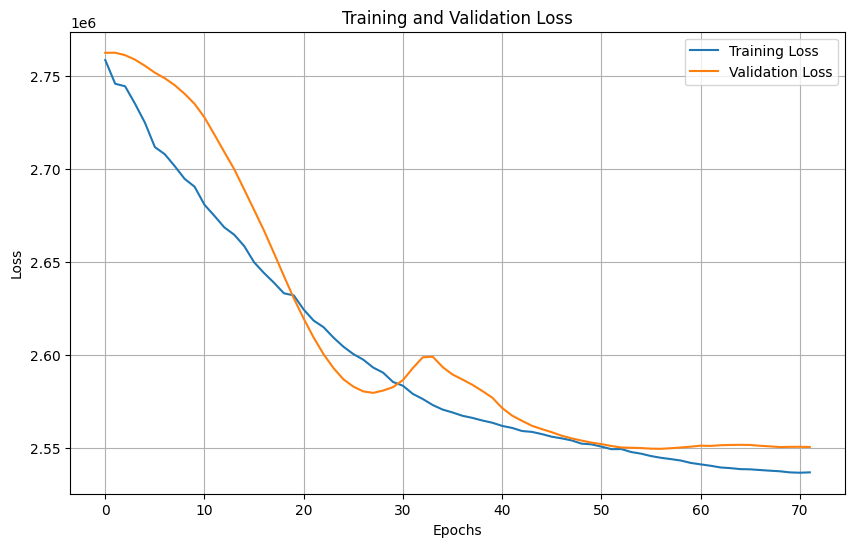

Model saved to drone_path_model_up.pth

Training ensemble model 1/3


Epoch 1/50: 100%|██████████| 1/1 [00:00<00:00, 70.47it/s, loss=2.78e+6]


Epoch [1/50], Train Loss: 2775852.2500, Val Loss: 2770090.5000


Epoch 2/50: 100%|██████████| 1/1 [00:00<00:00, 80.78it/s, loss=2.78e+6]


Epoch [2/50], Train Loss: 2777045.2500, Val Loss: 2768844.0000


Epoch 3/50: 100%|██████████| 1/1 [00:00<00:00, 83.49it/s, loss=2.76e+6]


Epoch [3/50], Train Loss: 2756859.7500, Val Loss: 2768167.5000


Epoch 4/50: 100%|██████████| 1/1 [00:00<00:00, 84.65it/s, loss=2.75e+6]


Epoch [4/50], Train Loss: 2749846.0000, Val Loss: 2767491.2500


Epoch 5/50: 100%|██████████| 1/1 [00:00<00:00, 84.84it/s, loss=2.75e+6]


Epoch [5/50], Train Loss: 2749937.5000, Val Loss: 2765348.2500


Epoch 6/50: 100%|██████████| 1/1 [00:00<00:00, 81.37it/s, loss=2.74e+6]


Epoch [6/50], Train Loss: 2739630.0000, Val Loss: 2762393.5000


Epoch 7/50: 100%|██████████| 1/1 [00:00<00:00, 84.24it/s, loss=2.73e+6]


Epoch [7/50], Train Loss: 2725223.2500, Val Loss: 2758970.5000


Epoch 8/50: 100%|██████████| 1/1 [00:00<00:00, 83.15it/s, loss=2.72e+6]


Epoch [8/50], Train Loss: 2723472.2500, Val Loss: 2754623.0000


Epoch 9/50: 100%|██████████| 1/1 [00:00<00:00, 83.96it/s, loss=2.72e+6]


Epoch [9/50], Train Loss: 2718217.0000, Val Loss: 2749673.0000


Epoch 10/50: 100%|██████████| 1/1 [00:00<00:00, 81.71it/s, loss=2.71e+6]


Epoch [10/50], Train Loss: 2705595.7500, Val Loss: 2745026.5000


Epoch 11/50: 100%|██████████| 1/1 [00:00<00:00, 85.79it/s, loss=2.7e+6]


Epoch [11/50], Train Loss: 2701665.0000, Val Loss: 2741497.5000


Epoch 12/50: 100%|██████████| 1/1 [00:00<00:00, 84.93it/s, loss=2.69e+6]


Epoch [12/50], Train Loss: 2693530.2500, Val Loss: 2739359.0000


Epoch 13/50: 100%|██████████| 1/1 [00:00<00:00, 85.70it/s, loss=2.69e+6]


Epoch [13/50], Train Loss: 2685371.2500, Val Loss: 2736073.0000


Epoch 14/50: 100%|██████████| 1/1 [00:00<00:00, 83.17it/s, loss=2.68e+6]


Epoch [14/50], Train Loss: 2682272.2500, Val Loss: 2731175.0000


Epoch 15/50: 100%|██████████| 1/1 [00:00<00:00, 84.72it/s, loss=2.68e+6]


Epoch [15/50], Train Loss: 2676070.2500, Val Loss: 2722236.7500


Epoch 16/50: 100%|██████████| 1/1 [00:00<00:00, 86.83it/s, loss=2.67e+6]


Epoch [16/50], Train Loss: 2666742.7500, Val Loss: 2713527.2500


Epoch 17/50: 100%|██████████| 1/1 [00:00<00:00, 84.39it/s, loss=2.66e+6]


Epoch [17/50], Train Loss: 2660419.0000, Val Loss: 2701591.5000


Epoch 18/50: 100%|██████████| 1/1 [00:00<00:00, 83.27it/s, loss=2.66e+6]

Epoch [18/50], Train Loss: 2657321.2500, Val Loss: 2690887.0000



Epoch 19/50: 100%|██████████| 1/1 [00:00<00:00, 81.75it/s, loss=2.65e+6]


Epoch [19/50], Train Loss: 2648086.7500, Val Loss: 2680025.2500


Epoch 20/50: 100%|██████████| 1/1 [00:00<00:00, 84.40it/s, loss=2.64e+6]

Epoch [20/50], Train Loss: 2640582.0000, Val Loss: 2669450.7500



Epoch 21/50: 100%|██████████| 1/1 [00:00<00:00, 87.27it/s, loss=2.64e+6]


Epoch [21/50], Train Loss: 2638443.0000, Val Loss: 2659231.7500


Epoch 22/50: 100%|██████████| 1/1 [00:00<00:00, 66.24it/s, loss=2.63e+6]


Epoch [22/50], Train Loss: 2633392.2500, Val Loss: 2649875.5000


Epoch 23/50: 100%|██████████| 1/1 [00:00<00:00, 82.68it/s, loss=2.63e+6]


Epoch [23/50], Train Loss: 2628122.2500, Val Loss: 2640095.5000


Epoch 24/50: 100%|██████████| 1/1 [00:00<00:00, 81.62it/s, loss=2.62e+6]


Epoch [24/50], Train Loss: 2621514.5000, Val Loss: 2631699.5000


Epoch 25/50: 100%|██████████| 1/1 [00:00<00:00, 83.46it/s, loss=2.62e+6]


Epoch [25/50], Train Loss: 2618241.7500, Val Loss: 2624175.0000


Epoch 26/50: 100%|██████████| 1/1 [00:00<00:00, 82.86it/s, loss=2.61e+6]


Epoch [26/50], Train Loss: 2614899.0000, Val Loss: 2618456.5000


Epoch 27/50: 100%|██████████| 1/1 [00:00<00:00, 83.73it/s, loss=2.61e+6]


Epoch [27/50], Train Loss: 2607988.2500, Val Loss: 2616038.5000


Epoch 28/50: 100%|██████████| 1/1 [00:00<00:00, 84.82it/s, loss=2.6e+6]


Epoch [28/50], Train Loss: 2604409.5000, Val Loss: 2613951.0000


Epoch 29/50: 100%|██████████| 1/1 [00:00<00:00, 82.91it/s, loss=2.6e+6]


Epoch [29/50], Train Loss: 2599617.2500, Val Loss: 2611390.7500


Epoch 30/50: 100%|██████████| 1/1 [00:00<00:00, 64.73it/s, loss=2.6e+6]


Epoch [30/50], Train Loss: 2596942.7500, Val Loss: 2608264.0000


Epoch 31/50: 100%|██████████| 1/1 [00:00<00:00, 47.15it/s, loss=2.59e+6]


Epoch [31/50], Train Loss: 2592445.5000, Val Loss: 2604703.2500


Epoch 32/50: 100%|██████████| 1/1 [00:00<00:00, 55.15it/s, loss=2.59e+6]


Epoch [32/50], Train Loss: 2589311.7500, Val Loss: 2601919.2500


Epoch 33/50: 100%|██████████| 1/1 [00:00<00:00, 82.96it/s, loss=2.59e+6]


Epoch [33/50], Train Loss: 2586077.0000, Val Loss: 2599315.5000


Epoch 34/50: 100%|██████████| 1/1 [00:00<00:00, 82.68it/s, loss=2.58e+6]


Epoch [34/50], Train Loss: 2581668.5000, Val Loss: 2597394.5000


Epoch 35/50: 100%|██████████| 1/1 [00:00<00:00, 83.14it/s, loss=2.58e+6]


Epoch [35/50], Train Loss: 2578849.2500, Val Loss: 2594927.0000


Epoch 36/50: 100%|██████████| 1/1 [00:00<00:00, 83.07it/s, loss=2.58e+6]


Epoch [36/50], Train Loss: 2576376.2500, Val Loss: 2592556.0000


Epoch 37/50: 100%|██████████| 1/1 [00:00<00:00, 82.69it/s, loss=2.57e+6]


Epoch [37/50], Train Loss: 2573547.0000, Val Loss: 2590479.2500


Epoch 38/50: 100%|██████████| 1/1 [00:00<00:00, 83.56it/s, loss=2.57e+6]


Epoch [38/50], Train Loss: 2570329.2500, Val Loss: 2588538.5000


Epoch 39/50: 100%|██████████| 1/1 [00:00<00:00, 81.47it/s, loss=2.57e+6]


Epoch [39/50], Train Loss: 2567499.2500, Val Loss: 2585353.0000


Epoch 40/50: 100%|██████████| 1/1 [00:00<00:00, 82.70it/s, loss=2.56e+6]


Epoch [40/50], Train Loss: 2563844.5000, Val Loss: 2581754.0000


Epoch 41/50: 100%|██████████| 1/1 [00:00<00:00, 84.50it/s, loss=2.56e+6]


Epoch [41/50], Train Loss: 2562030.2500, Val Loss: 2578362.7500


Epoch 42/50: 100%|██████████| 1/1 [00:00<00:00, 82.47it/s, loss=2.56e+6]


Epoch [42/50], Train Loss: 2559439.5000, Val Loss: 2574454.7500


Epoch 43/50: 100%|██████████| 1/1 [00:00<00:00, 81.70it/s, loss=2.56e+6]


Epoch [43/50], Train Loss: 2556752.7500, Val Loss: 2570063.5000


Epoch 44/50: 100%|██████████| 1/1 [00:00<00:00, 84.48it/s, loss=2.55e+6]


Epoch [44/50], Train Loss: 2554514.5000, Val Loss: 2565117.7500


Epoch 45/50: 100%|██████████| 1/1 [00:00<00:00, 79.79it/s, loss=2.55e+6]


Epoch [45/50], Train Loss: 2552119.2500, Val Loss: 2560643.0000


Epoch 46/50: 100%|██████████| 1/1 [00:00<00:00, 81.95it/s, loss=2.55e+6]


Epoch [46/50], Train Loss: 2549633.5000, Val Loss: 2556839.2500


Epoch 47/50: 100%|██████████| 1/1 [00:00<00:00, 82.95it/s, loss=2.55e+6]


Epoch [47/50], Train Loss: 2547621.0000, Val Loss: 2554233.0000


Epoch 48/50: 100%|██████████| 1/1 [00:00<00:00, 83.27it/s, loss=2.55e+6]


Epoch [48/50], Train Loss: 2545879.0000, Val Loss: 2553222.7500


Epoch 49/50: 100%|██████████| 1/1 [00:00<00:00, 84.62it/s, loss=2.54e+6]


Epoch [49/50], Train Loss: 2543502.7500, Val Loss: 2552139.7500


Epoch 50/50: 100%|██████████| 1/1 [00:00<00:00, 84.56it/s, loss=2.54e+6]


Epoch [50/50], Train Loss: 2542668.7500, Val Loss: 2550566.7500


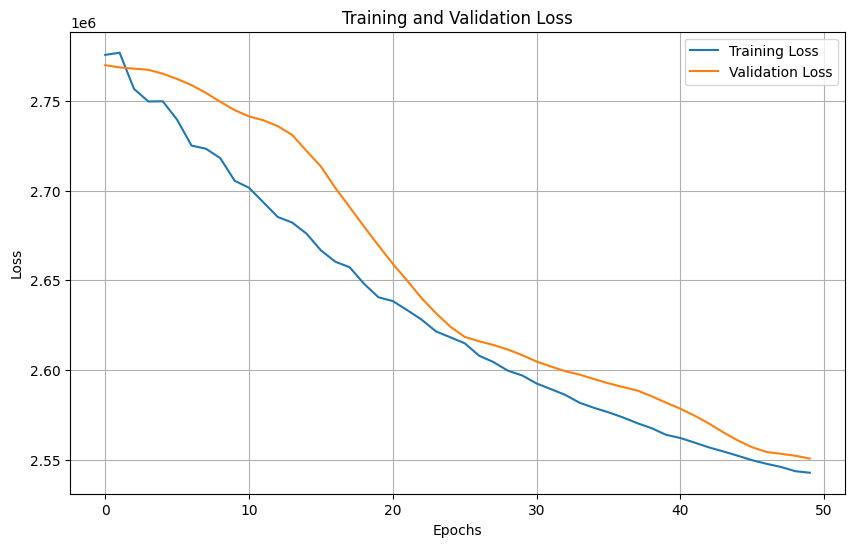

Model saved to drone_path_model_up.pth

Training ensemble model 2/3


Epoch 1/50: 100%|██████████| 1/1 [00:00<00:00, 68.84it/s, loss=2.78e+6]


Epoch [1/50], Train Loss: 2781326.2500, Val Loss: 2774713.5000


Epoch 2/50: 100%|██████████| 1/1 [00:00<00:00, 81.98it/s, loss=2.77e+6]


Epoch [2/50], Train Loss: 2769666.2500, Val Loss: 2770751.5000


Epoch 3/50: 100%|██████████| 1/1 [00:00<00:00, 83.55it/s, loss=2.76e+6]


Epoch [3/50], Train Loss: 2764498.2500, Val Loss: 2766825.5000


Epoch 4/50: 100%|██████████| 1/1 [00:00<00:00, 84.09it/s, loss=2.75e+6]


Epoch [4/50], Train Loss: 2753567.5000, Val Loss: 2763202.0000


Epoch 5/50: 100%|██████████| 1/1 [00:00<00:00, 83.92it/s, loss=2.75e+6]


Epoch [5/50], Train Loss: 2748672.7500, Val Loss: 2759313.0000


Epoch 6/50: 100%|██████████| 1/1 [00:00<00:00, 83.66it/s, loss=2.74e+6]


Epoch [6/50], Train Loss: 2735448.5000, Val Loss: 2755592.0000


Epoch 7/50: 100%|██████████| 1/1 [00:00<00:00, 84.45it/s, loss=2.73e+6]


Epoch [7/50], Train Loss: 2732165.5000, Val Loss: 2751601.2500


Epoch 8/50: 100%|██████████| 1/1 [00:00<00:00, 85.64it/s, loss=2.72e+6]


Epoch [8/50], Train Loss: 2721305.5000, Val Loss: 2747125.7500


Epoch 9/50: 100%|██████████| 1/1 [00:00<00:00, 84.26it/s, loss=2.71e+6]


Epoch [9/50], Train Loss: 2713664.2500, Val Loss: 2742788.0000


Epoch 10/50: 100%|██████████| 1/1 [00:00<00:00, 82.23it/s, loss=2.71e+6]


Epoch [10/50], Train Loss: 2709806.0000, Val Loss: 2738618.2500


Epoch 11/50: 100%|██████████| 1/1 [00:00<00:00, 83.64it/s, loss=2.7e+6]


Epoch [11/50], Train Loss: 2701852.5000, Val Loss: 2734522.0000


Epoch 12/50: 100%|██████████| 1/1 [00:00<00:00, 84.37it/s, loss=2.7e+6]


Epoch [12/50], Train Loss: 2697976.5000, Val Loss: 2731153.5000


Epoch 13/50: 100%|██████████| 1/1 [00:00<00:00, 86.37it/s, loss=2.69e+6]


Epoch [13/50], Train Loss: 2691122.0000, Val Loss: 2728190.5000


Epoch 14/50: 100%|██████████| 1/1 [00:00<00:00, 84.90it/s, loss=2.69e+6]


Epoch [14/50], Train Loss: 2686122.5000, Val Loss: 2724404.7500


Epoch 15/50: 100%|██████████| 1/1 [00:00<00:00, 85.28it/s, loss=2.68e+6]


Epoch [15/50], Train Loss: 2676623.2500, Val Loss: 2719892.0000


Epoch 16/50: 100%|██████████| 1/1 [00:00<00:00, 84.76it/s, loss=2.67e+6]


Epoch [16/50], Train Loss: 2666527.5000, Val Loss: 2714597.0000


Epoch 17/50: 100%|██████████| 1/1 [00:00<00:00, 84.62it/s, loss=2.66e+6]

Epoch [17/50], Train Loss: 2664107.5000, Val Loss: 2707349.7500



Epoch 18/50: 100%|██████████| 1/1 [00:00<00:00, 84.19it/s, loss=2.66e+6]


Epoch [18/50], Train Loss: 2657154.7500, Val Loss: 2699436.0000


Epoch 19/50: 100%|██████████| 1/1 [00:00<00:00, 86.49it/s, loss=2.65e+6]


Epoch [19/50], Train Loss: 2653390.2500, Val Loss: 2693983.0000


Epoch 20/50: 100%|██████████| 1/1 [00:00<00:00, 83.28it/s, loss=2.65e+6]


Epoch [20/50], Train Loss: 2648977.2500, Val Loss: 2687355.0000


Epoch 21/50: 100%|██████████| 1/1 [00:00<00:00, 83.55it/s, loss=2.64e+6]


Epoch [21/50], Train Loss: 2643720.5000, Val Loss: 2680076.5000


Epoch 22/50: 100%|██████████| 1/1 [00:00<00:00, 83.53it/s, loss=2.64e+6]


Epoch [22/50], Train Loss: 2639029.0000, Val Loss: 2672464.2500


Epoch 23/50: 100%|██████████| 1/1 [00:00<00:00, 78.37it/s, loss=2.63e+6]


Epoch [23/50], Train Loss: 2631319.0000, Val Loss: 2663841.0000


Epoch 24/50: 100%|██████████| 1/1 [00:00<00:00, 83.40it/s, loss=2.63e+6]


Epoch [24/50], Train Loss: 2629849.7500, Val Loss: 2655564.5000


Epoch 25/50: 100%|██████████| 1/1 [00:00<00:00, 76.13it/s, loss=2.62e+6]


Epoch [25/50], Train Loss: 2622548.2500, Val Loss: 2647057.7500


Epoch 26/50: 100%|██████████| 1/1 [00:00<00:00, 80.96it/s, loss=2.62e+6]


Epoch [26/50], Train Loss: 2618737.0000, Val Loss: 2638954.5000


Epoch 27/50: 100%|██████████| 1/1 [00:00<00:00, 71.11it/s, loss=2.62e+6]


Epoch [27/50], Train Loss: 2615038.2500, Val Loss: 2630565.2500


Epoch 28/50: 100%|██████████| 1/1 [00:00<00:00, 81.92it/s, loss=2.61e+6]


Epoch [28/50], Train Loss: 2612408.0000, Val Loss: 2623708.5000


Epoch 29/50: 100%|██████████| 1/1 [00:00<00:00, 82.13it/s, loss=2.61e+6]


Epoch [29/50], Train Loss: 2605825.2500, Val Loss: 2615980.0000


Epoch 30/50: 100%|██████████| 1/1 [00:00<00:00, 79.94it/s, loss=2.6e+6]


Epoch [30/50], Train Loss: 2602971.5000, Val Loss: 2610139.0000


Epoch 31/50: 100%|██████████| 1/1 [00:00<00:00, 83.74it/s, loss=2.6e+6]


Epoch [31/50], Train Loss: 2598836.5000, Val Loss: 2604391.7500


Epoch 32/50: 100%|██████████| 1/1 [00:00<00:00, 79.11it/s, loss=2.59e+6]


Epoch [32/50], Train Loss: 2594841.7500, Val Loss: 2598585.7500


Epoch 33/50: 100%|██████████| 1/1 [00:00<00:00, 80.32it/s, loss=2.59e+6]


Epoch [33/50], Train Loss: 2592396.0000, Val Loss: 2594045.5000


Epoch 34/50: 100%|██████████| 1/1 [00:00<00:00, 82.11it/s, loss=2.59e+6]


Epoch [34/50], Train Loss: 2588537.2500, Val Loss: 2589100.0000


Epoch 35/50: 100%|██████████| 1/1 [00:00<00:00, 82.42it/s, loss=2.59e+6]


Epoch [35/50], Train Loss: 2585742.0000, Val Loss: 2584129.5000


Epoch 36/50: 100%|██████████| 1/1 [00:00<00:00, 83.70it/s, loss=2.58e+6]


Epoch [36/50], Train Loss: 2582763.7500, Val Loss: 2580162.7500


Epoch 37/50: 100%|██████████| 1/1 [00:00<00:00, 84.08it/s, loss=2.58e+6]


Epoch [37/50], Train Loss: 2578167.2500, Val Loss: 2576144.5000


Epoch 38/50: 100%|██████████| 1/1 [00:00<00:00, 84.00it/s, loss=2.58e+6]


Epoch [38/50], Train Loss: 2576011.5000, Val Loss: 2572942.5000


Epoch 39/50: 100%|██████████| 1/1 [00:00<00:00, 78.46it/s, loss=2.57e+6]


Epoch [39/50], Train Loss: 2573099.7500, Val Loss: 2569930.5000


Epoch 40/50: 100%|██████████| 1/1 [00:00<00:00, 85.16it/s, loss=2.57e+6]


Epoch [40/50], Train Loss: 2569989.2500, Val Loss: 2566983.5000


Epoch 41/50: 100%|██████████| 1/1 [00:00<00:00, 84.42it/s, loss=2.57e+6]


Epoch [41/50], Train Loss: 2567310.0000, Val Loss: 2564172.0000


Epoch 42/50: 100%|██████████| 1/1 [00:00<00:00, 88.32it/s, loss=2.56e+6]


Epoch [42/50], Train Loss: 2564347.2500, Val Loss: 2561372.2500


Epoch 43/50: 100%|██████████| 1/1 [00:00<00:00, 86.81it/s, loss=2.56e+6]


Epoch [43/50], Train Loss: 2562071.7500, Val Loss: 2558686.0000


Epoch 44/50: 100%|██████████| 1/1 [00:00<00:00, 85.56it/s, loss=2.56e+6]


Epoch [44/50], Train Loss: 2559848.7500, Val Loss: 2556116.0000


Epoch 45/50: 100%|██████████| 1/1 [00:00<00:00, 86.84it/s, loss=2.56e+6]


Epoch [45/50], Train Loss: 2557390.5000, Val Loss: 2553703.5000


Epoch 46/50: 100%|██████████| 1/1 [00:00<00:00, 88.15it/s, loss=2.56e+6]


Epoch [46/50], Train Loss: 2555029.5000, Val Loss: 2551334.2500


Epoch 47/50: 100%|██████████| 1/1 [00:00<00:00, 87.03it/s, loss=2.55e+6]


Epoch [47/50], Train Loss: 2553043.7500, Val Loss: 2549109.0000


Epoch 48/50: 100%|██████████| 1/1 [00:00<00:00, 87.51it/s, loss=2.55e+6]


Epoch [48/50], Train Loss: 2551036.7500, Val Loss: 2546716.0000


Epoch 49/50: 100%|██████████| 1/1 [00:00<00:00, 85.01it/s, loss=2.55e+6]


Epoch [49/50], Train Loss: 2548804.5000, Val Loss: 2544436.0000


Epoch 50/50: 100%|██████████| 1/1 [00:00<00:00, 84.37it/s, loss=2.55e+6]


Epoch [50/50], Train Loss: 2546975.0000, Val Loss: 2542338.2500


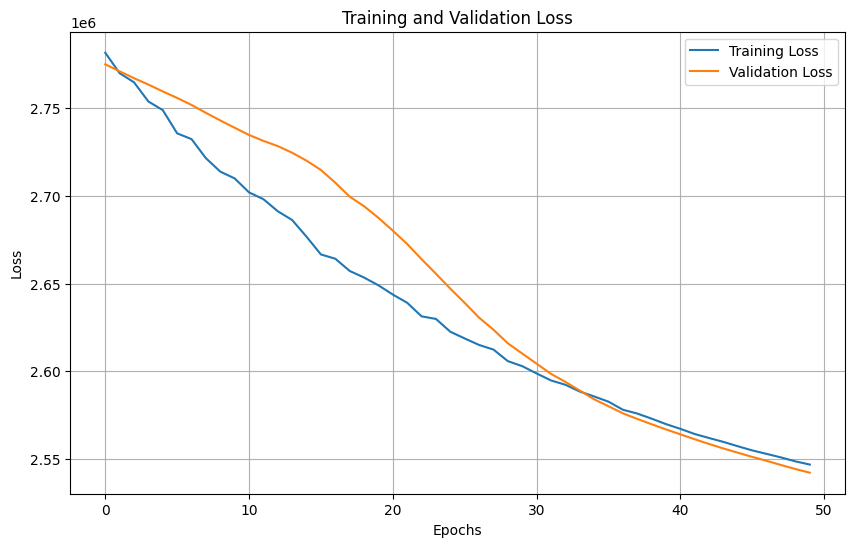

Model saved to drone_path_model_up.pth

Training ensemble model 3/3


Epoch 1/50: 100%|██████████| 1/1 [00:00<00:00, 71.60it/s, loss=2.84e+6]


Epoch [1/50], Train Loss: 2843125.5000, Val Loss: 2745362.5000


Epoch 2/50: 100%|██████████| 1/1 [00:00<00:00, 84.30it/s, loss=2.82e+6]


Epoch [2/50], Train Loss: 2820863.2500, Val Loss: 2744618.5000


Epoch 3/50: 100%|██████████| 1/1 [00:00<00:00, 85.56it/s, loss=2.81e+6]


Epoch [3/50], Train Loss: 2805538.7500, Val Loss: 2745363.0000


Epoch 4/50: 100%|██████████| 1/1 [00:00<00:00, 84.53it/s, loss=2.8e+6]


Epoch [4/50], Train Loss: 2798835.0000, Val Loss: 2745183.2500


Epoch 5/50: 100%|██████████| 1/1 [00:00<00:00, 85.34it/s, loss=2.8e+6]


Epoch [5/50], Train Loss: 2796293.7500, Val Loss: 2745192.7500


Epoch 6/50: 100%|██████████| 1/1 [00:00<00:00, 86.49it/s, loss=2.79e+6]


Epoch [6/50], Train Loss: 2785759.0000, Val Loss: 2745339.7500


Epoch 7/50: 100%|██████████| 1/1 [00:00<00:00, 83.15it/s, loss=2.78e+6]


Epoch [7/50], Train Loss: 2778533.5000, Val Loss: 2744975.7500


Epoch 8/50: 100%|██████████| 1/1 [00:00<00:00, 87.20it/s, loss=2.78e+6]


Epoch [8/50], Train Loss: 2779196.7500, Val Loss: 2745251.7500


Epoch 9/50: 100%|██████████| 1/1 [00:00<00:00, 86.49it/s, loss=2.77e+6]


Epoch [9/50], Train Loss: 2772776.5000, Val Loss: 2744782.0000


Epoch 10/50: 100%|██████████| 1/1 [00:00<00:00, 86.04it/s, loss=2.76e+6]


Epoch [10/50], Train Loss: 2764878.0000, Val Loss: 2744533.7500


Epoch 11/50: 100%|██████████| 1/1 [00:00<00:00, 81.44it/s, loss=2.76e+6]


Epoch [11/50], Train Loss: 2764340.5000, Val Loss: 2744419.7500


Epoch 12/50: 100%|██████████| 1/1 [00:00<00:00, 84.29it/s, loss=2.76e+6]


Epoch [12/50], Train Loss: 2756259.5000, Val Loss: 2744118.2500


Epoch 13/50: 100%|██████████| 1/1 [00:00<00:00, 85.50it/s, loss=2.75e+6]


Epoch [13/50], Train Loss: 2750034.5000, Val Loss: 2744018.5000


Epoch 14/50: 100%|██████████| 1/1 [00:00<00:00, 85.16it/s, loss=2.75e+6]


Epoch [14/50], Train Loss: 2751688.5000, Val Loss: 2743050.5000


Epoch 15/50: 100%|██████████| 1/1 [00:00<00:00, 82.89it/s, loss=2.75e+6]


Epoch [15/50], Train Loss: 2750695.5000, Val Loss: 2741686.5000


Epoch 16/50: 100%|██████████| 1/1 [00:00<00:00, 82.69it/s, loss=2.75e+6]


Epoch [16/50], Train Loss: 2750818.2500, Val Loss: 2740092.2500


Epoch 17/50: 100%|██████████| 1/1 [00:00<00:00, 85.73it/s, loss=2.74e+6]


Epoch [17/50], Train Loss: 2743874.7500, Val Loss: 2739562.2500


Epoch 18/50: 100%|██████████| 1/1 [00:00<00:00, 85.56it/s, loss=2.75e+6]


Epoch [18/50], Train Loss: 2747450.5000, Val Loss: 2739175.7500


Epoch 19/50: 100%|██████████| 1/1 [00:00<00:00, 86.94it/s, loss=2.74e+6]


Epoch [19/50], Train Loss: 2743639.0000, Val Loss: 2736593.0000


Epoch 20/50: 100%|██████████| 1/1 [00:00<00:00, 83.16it/s, loss=2.74e+6]


Epoch [20/50], Train Loss: 2743628.0000, Val Loss: 2734249.7500


Epoch 21/50: 100%|██████████| 1/1 [00:00<00:00, 83.04it/s, loss=2.74e+6]


Epoch [21/50], Train Loss: 2741319.0000, Val Loss: 2732164.5000


Epoch 22/50: 100%|██████████| 1/1 [00:00<00:00, 82.97it/s, loss=2.73e+6]


Epoch [22/50], Train Loss: 2732398.5000, Val Loss: 2729472.5000


Epoch 23/50: 100%|██████████| 1/1 [00:00<00:00, 82.99it/s, loss=2.73e+6]


Epoch [23/50], Train Loss: 2731698.5000, Val Loss: 2726652.2500


Epoch 24/50: 100%|██████████| 1/1 [00:00<00:00, 85.27it/s, loss=2.73e+6]


Epoch [24/50], Train Loss: 2725527.7500, Val Loss: 2723928.7500


Epoch 25/50: 100%|██████████| 1/1 [00:00<00:00, 85.79it/s, loss=2.73e+6]


Epoch [25/50], Train Loss: 2731408.5000, Val Loss: 2721161.2500


Epoch 26/50: 100%|██████████| 1/1 [00:00<00:00, 82.42it/s, loss=2.73e+6]


Epoch [26/50], Train Loss: 2726969.0000, Val Loss: 2719823.5000


Epoch 27/50: 100%|██████████| 1/1 [00:00<00:00, 83.00it/s, loss=2.72e+6]


Epoch [27/50], Train Loss: 2724440.0000, Val Loss: 2719147.7500


Epoch 28/50: 100%|██████████| 1/1 [00:00<00:00, 84.74it/s, loss=2.72e+6]


Epoch [28/50], Train Loss: 2719961.0000, Val Loss: 2717248.0000


Epoch 29/50: 100%|██████████| 1/1 [00:00<00:00, 84.18it/s, loss=2.72e+6]


Epoch [29/50], Train Loss: 2717475.0000, Val Loss: 2715516.0000


Epoch 30/50: 100%|██████████| 1/1 [00:00<00:00, 86.23it/s, loss=2.72e+6]


Epoch [30/50], Train Loss: 2715066.7500, Val Loss: 2715122.2500


Epoch 31/50: 100%|██████████| 1/1 [00:00<00:00, 85.75it/s, loss=2.71e+6]

Epoch [31/50], Train Loss: 2709615.0000, Val Loss: 2713302.0000



Epoch 32/50: 100%|██████████| 1/1 [00:00<00:00, 84.87it/s, loss=2.71e+6]

Epoch [32/50], Train Loss: 2709296.5000, Val Loss: 2711625.2500



Epoch 33/50: 100%|██████████| 1/1 [00:00<00:00, 85.02it/s, loss=2.71e+6]


Epoch [33/50], Train Loss: 2709721.2500, Val Loss: 2709170.2500


Epoch 34/50: 100%|██████████| 1/1 [00:00<00:00, 77.10it/s, loss=2.71e+6]


Epoch [34/50], Train Loss: 2711076.5000, Val Loss: 2706885.0000


Epoch 35/50: 100%|██████████| 1/1 [00:00<00:00, 86.26it/s, loss=2.7e+6]


Epoch [35/50], Train Loss: 2703497.7500, Val Loss: 2704989.2500


Epoch 36/50: 100%|██████████| 1/1 [00:00<00:00, 86.11it/s, loss=2.7e+6]


Epoch [36/50], Train Loss: 2702871.0000, Val Loss: 2702257.0000


Epoch 37/50: 100%|██████████| 1/1 [00:00<00:00, 85.25it/s, loss=2.7e+6]


Epoch [37/50], Train Loss: 2701561.0000, Val Loss: 2699418.0000


Epoch 38/50: 100%|██████████| 1/1 [00:00<00:00, 83.70it/s, loss=2.7e+6]


Epoch [38/50], Train Loss: 2697517.0000, Val Loss: 2697928.2500


Epoch 39/50: 100%|██████████| 1/1 [00:00<00:00, 85.35it/s, loss=2.69e+6]


Epoch [39/50], Train Loss: 2694917.0000, Val Loss: 2696795.5000


Epoch 40/50: 100%|██████████| 1/1 [00:00<00:00, 85.92it/s, loss=2.7e+6]


Epoch [40/50], Train Loss: 2696094.2500, Val Loss: 2695040.7500


Epoch 41/50: 100%|██████████| 1/1 [00:00<00:00, 83.78it/s, loss=2.69e+6]


Epoch [41/50], Train Loss: 2694221.5000, Val Loss: 2693104.2500


Epoch 42/50: 100%|██████████| 1/1 [00:00<00:00, 77.60it/s, loss=2.7e+6]


Epoch [42/50], Train Loss: 2696410.0000, Val Loss: 2692360.0000


Epoch 43/50: 100%|██████████| 1/1 [00:00<00:00, 76.56it/s, loss=2.69e+6]


Epoch [43/50], Train Loss: 2687520.2500, Val Loss: 2691236.7500


Epoch 44/50: 100%|██████████| 1/1 [00:00<00:00, 78.44it/s, loss=2.69e+6]


Epoch [44/50], Train Loss: 2687935.2500, Val Loss: 2691041.5000


Epoch 45/50: 100%|██████████| 1/1 [00:00<00:00, 72.71it/s, loss=2.69e+6]


Epoch [45/50], Train Loss: 2688302.5000, Val Loss: 2690237.2500


Epoch 46/50: 100%|██████████| 1/1 [00:00<00:00, 70.14it/s, loss=2.69e+6]


Epoch [46/50], Train Loss: 2687764.2500, Val Loss: 2690479.5000


Epoch 47/50: 100%|██████████| 1/1 [00:00<00:00, 82.58it/s, loss=2.68e+6]


Epoch [47/50], Train Loss: 2680991.5000, Val Loss: 2689344.5000


Epoch 48/50: 100%|██████████| 1/1 [00:00<00:00, 87.72it/s, loss=2.68e+6]


Epoch [48/50], Train Loss: 2677829.5000, Val Loss: 2687368.2500


Epoch 49/50: 100%|██████████| 1/1 [00:00<00:00, 83.88it/s, loss=2.68e+6]


Epoch [49/50], Train Loss: 2677751.7500, Val Loss: 2684772.5000


Epoch 50/50: 100%|██████████| 1/1 [00:00<00:00, 83.01it/s, loss=2.68e+6]


Epoch [50/50], Train Loss: 2679844.0000, Val Loss: 2683036.2500


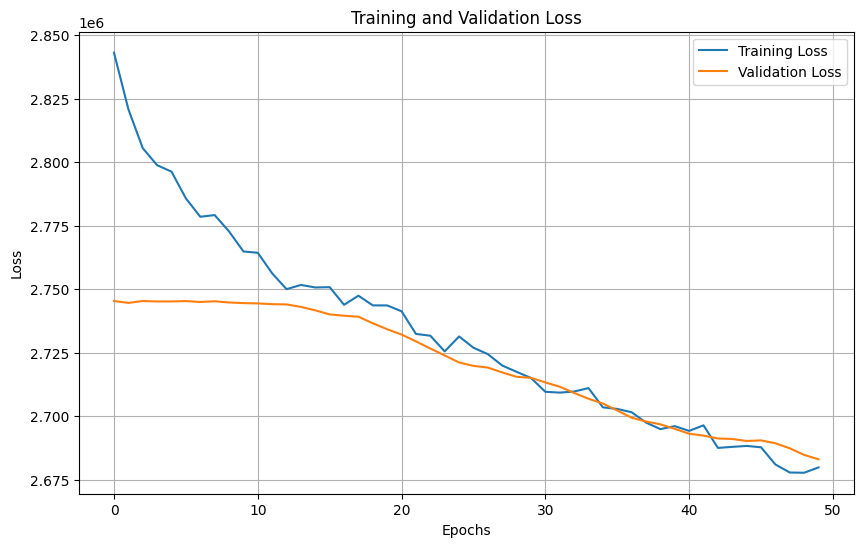

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Model saved to drone_path_model_up.pth
Predicting 60 future frames with uncertainty...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScal


===== PREDICTION ERROR METRICS =====
Mean Distance Error: 2290.29 pixels
Median Distance Error: 2256.14 pixels
Maximum Distance Error: 2433.10 pixels
RMSE: 2291.40 pixels
Error Growth Rate: 3.5749 pixels/frame
Normalized Error: 200.6081
Mean Angular Error: 77.45 degrees
Uncertainty-Error Correlation: 0.2200
Calibration Score: 0.0000



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_31/931487762.py:893: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


Error analysis visualization saved to: error_analysis.png


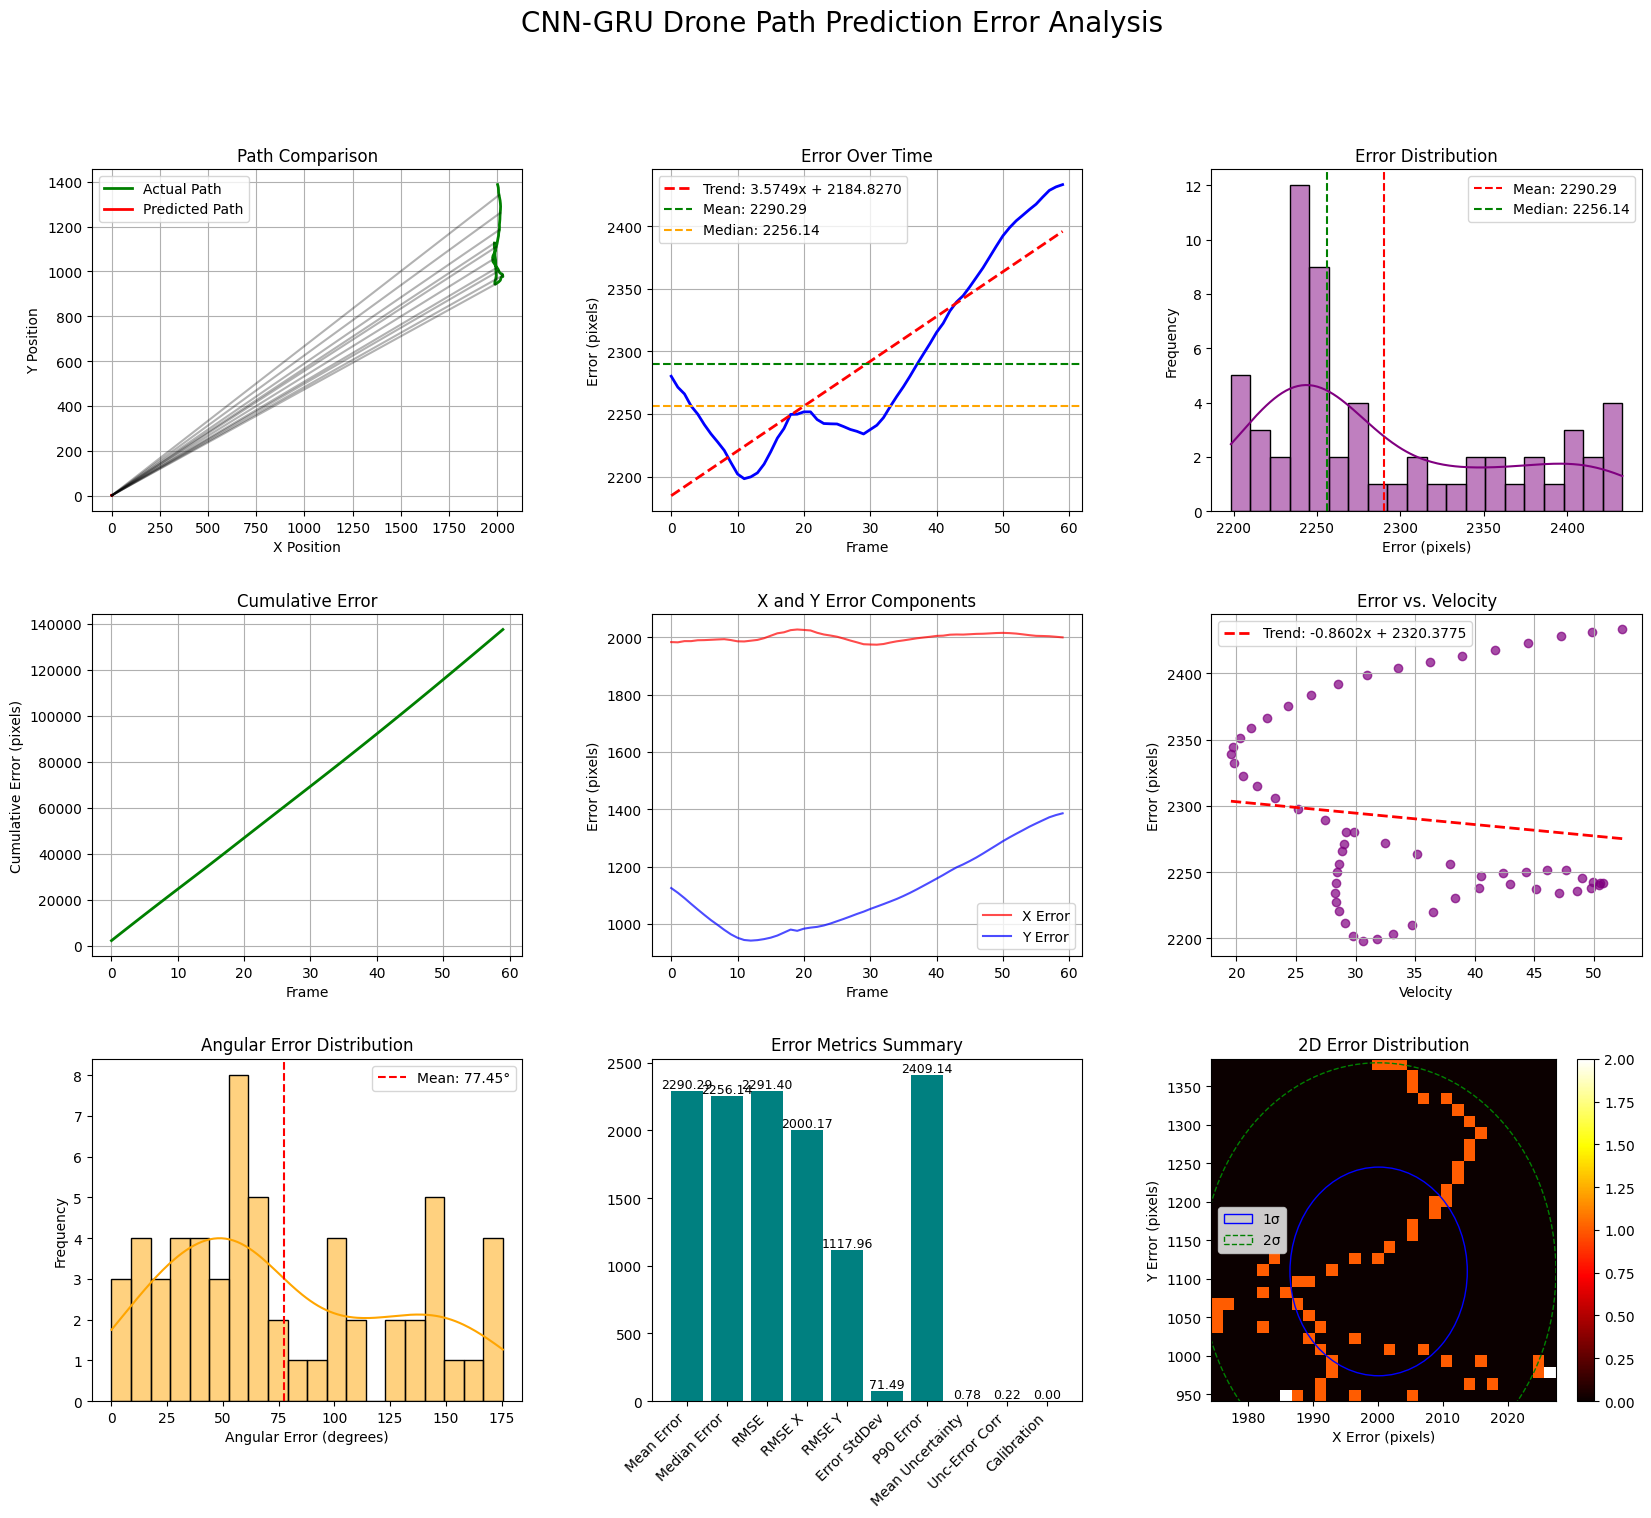

Error growth analysis saved to: error_analysis_error_growth.png


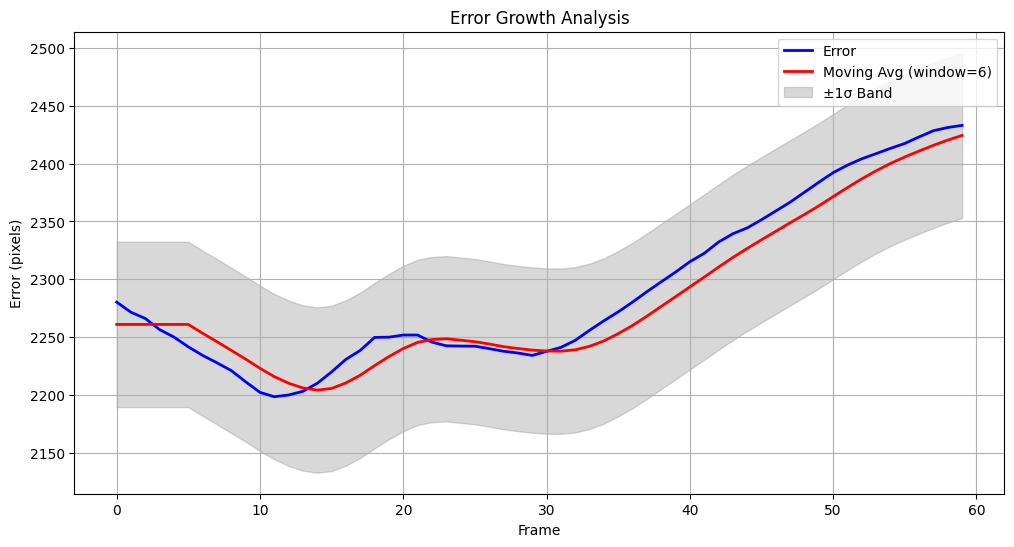

/tmp/ipykernel_31/931487762.py:963: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


Error heatmap saved to: error_analysis_error_heatmap.png


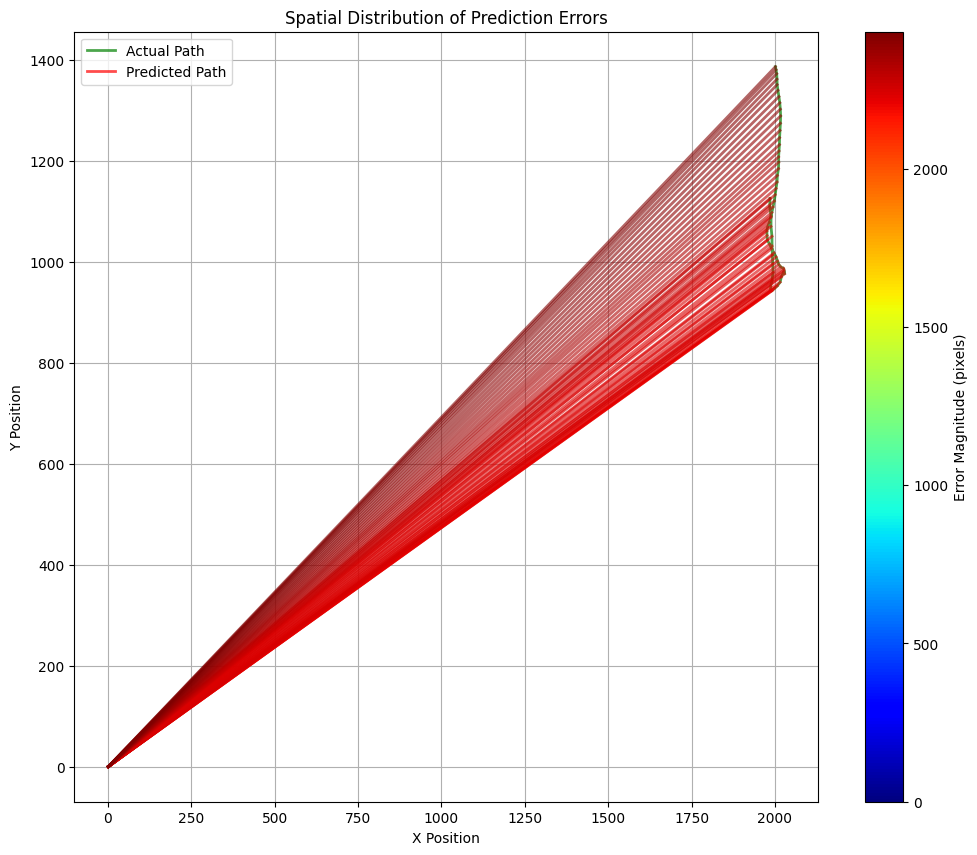

Attention visualization saved to: error_analysis_attention_attention.png


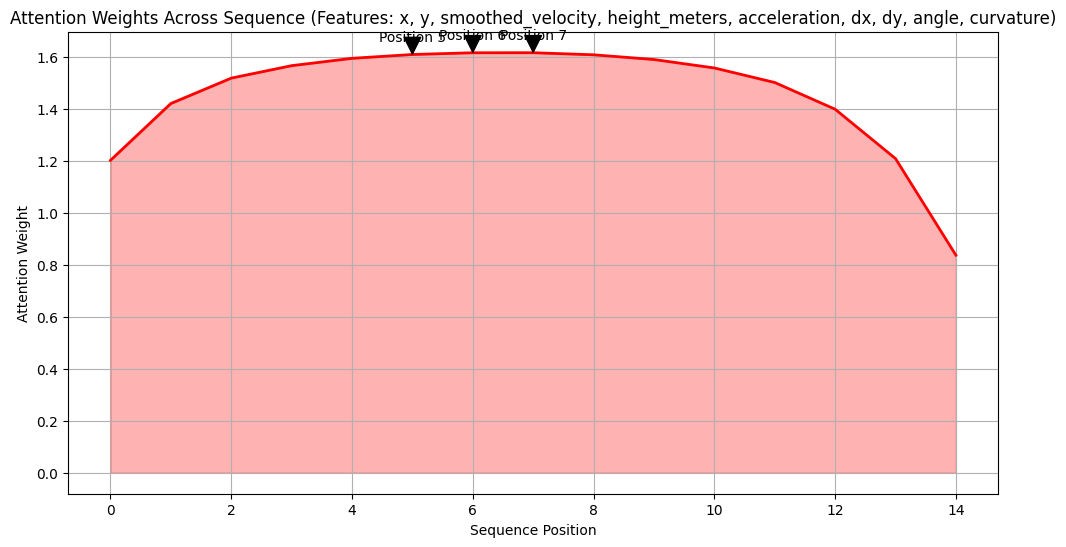

Could not create 2D attention heatmap.
Comparison video saved to cnn_gru_prediction_comparison_up.mp4
Prediction results saved to prediction_results.csv
Done!


<Figure size 1000x800 with 0 Axes>

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import cv2

class DronePathDataset(Dataset):
    """Enhanced dataset for drone path data with augmentation"""
    def __init__(self, X, y, augment=False):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.augment = augment
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.y[idx]
        
        if self.augment and np.random.random() < 0.5:
            # Apply random noise augmentation
            noise = torch.randn_like(x) * 0.03
            x = x + noise
            
        return x, y

class CNNGRUAttention(nn.Module):
    """
    Hybrid CNN-GRU model with attention for drone path prediction
    
    Architecture:
    1. Conv1D layers to extract spatial features
    2. GRU layers to process temporal sequence
    3. Attention mechanism to focus on important timesteps
    4. Dense layers for prediction refinement
    """
    def __init__(self, input_size, seq_length, hidden_size=128, num_layers=2, 
                 cnn_filters=[64, 128], dropout=0.3, output_size=2):
        super(CNNGRUAttention, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.seq_length = seq_length
        
        # CNN layers for spatial feature extraction
        self.cnn_layers = nn.ModuleList()
        in_channels = input_size
        
        for filters in cnn_filters:
            self.cnn_layers.append(
                nn.Sequential(
                    nn.Conv1d(in_channels, filters, kernel_size=3, padding=1),
                    nn.BatchNorm1d(filters),
                    nn.ReLU(),
                    nn.Conv1d(filters, filters, kernel_size=3, padding=1),
                    nn.BatchNorm1d(filters),
                    nn.ReLU(),
                )
            )
            in_channels = filters
        
        # Bidirectional GRU for temporal features
        self.gru = nn.GRU(
            input_size=cnn_filters[-1],
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        
        # Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(hidden_size * 2, 64),  # * 2 for bidirectional
            nn.Tanh(),
            nn.Linear(64, 1)
        )
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)
        
        # Output layers with residual connections
        self.fc1 = nn.Linear(hidden_size * 2, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, output_size)
        
        # Uncertainty estimation (predict mean and variance)
        self.uncertainty = nn.Linear(64, output_size)
        
    def forward(self, x):
        batch_size = x.size(0)
        
        # Reshape input for CNN: [batch, seq_len, features] -> [batch, features, seq_len]
        x_cnn = x.permute(0, 2, 1)
        
        # Apply CNN layers
        for cnn_layer in self.cnn_layers:
            x_cnn = cnn_layer(x_cnn)
        
        # Reshape back for GRU: [batch, features, seq_len] -> [batch, seq_len, features]
        x_gru = x_cnn.permute(0, 2, 1)
        
        # Apply GRU
        gru_out, _ = self.gru(x_gru)
        
        # Apply attention
        attention_weights = F.softmax(self.attention(gru_out).squeeze(-1), dim=1)
        attention_weights = attention_weights.unsqueeze(2)
        context_vector = torch.sum(attention_weights * gru_out, dim=1)
        
        # Apply dropout
        context_vector = self.dropout(context_vector)
        
        # Fully connected layers with residual connections
        fc1_out = self.fc1(context_vector)
        fc1_out = self.bn1(fc1_out)
        fc1_out = F.relu(fc1_out)
        
        fc2_out = self.fc2(fc1_out)
        fc2_out = self.bn2(fc2_out)
        fc2_out = F.relu(fc2_out)
        
        # Final prediction
        position_output = self.fc3(fc2_out)
        
        # Uncertainty estimation (log variance)
        uncertainty = torch.exp(self.uncertainty(fc2_out))
        
        return position_output, uncertainty


def prepare_sequences(df, seq_length=30, stride=1, features=None):
    """Prepare sequences for training with enhanced feature engineering"""
    if features is None:
        # Default features
        features = ['x', 'y', 'smoothed_velocity', 'height_meters']
    
    # Add derived features for better prediction
    if 'smoothed_velocity' in df.columns:
        # Calculate acceleration (change in velocity)
        df['acceleration'] = df['smoothed_velocity'].diff().fillna(0)
        if 'acceleration' not in features:
            features.append('acceleration')
    
    if 'x' in df.columns and 'y' in df.columns:
        # Calculate direction vectors
        df['dx'] = df['x'].diff().fillna(0)
        df['dy'] = df['y'].diff().fillna(0)
        
        # Calculate angle
        df['angle'] = np.arctan2(df['dy'], df['dx'])
        
        # Calculate curvature (change in angle)
        df['curvature'] = df['angle'].diff().fillna(0)
        
        if 'dx' not in features:
            features.append('dx')
        if 'dy' not in features:
            features.append('dy')
        if 'angle' not in features:
            features.append('angle')
        if 'curvature' not in features:
            features.append('curvature')
    
    print(f"Using features: {features}")
    
    # Scale features to [0, 1] range for better training
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
    
    # Create sequences with stride for data augmentation
    X, y = [], []
    for i in range(0, len(df_scaled) - seq_length, stride):
        # Input sequence
        X.append(df_scaled.iloc[i:i+seq_length].values)
        
        # Target is next position
        target_idx = i + seq_length
        y.append(df[['x', 'y']].iloc[target_idx].values)
    
    return np.array(X), np.array(y), scaler, features


def train_model(model, train_loader, val_loader, device, epochs=100, patience=15):
    """Train the CNN-GRU model with advanced techniques"""
    # Loss function: combination of MSE and uncertainty-aware loss
    def gaussian_nll_loss(pred, target, variance):
        """Gaussian negative log likelihood loss with uncertainty"""
        return 0.5 * (torch.log(variance) + (pred - target)**2 / variance).sum(dim=1).mean()
    
    # Adam optimizer with weight decay for regularization
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 'min', patience=patience//3, factor=0.5, verbose=True
    )
    
    # Early stopping parameters
    best_val_loss = float('inf')
    best_model = None
    early_stop_counter = 0
    
    # Training history
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
        for inputs, targets in progress_bar:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            predictions, uncertainties = model(inputs)
            
            # Compute loss
            mse_loss = F.mse_loss(predictions, targets)
            uncertainty_loss = gaussian_nll_loss(predictions, targets, uncertainties + 1e-6)
            loss = mse_loss + 0.1 * uncertainty_loss
            
            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            
            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            running_loss += loss.item()
            progress_bar.set_postfix({'loss': loss.item()})
        
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                predictions, uncertainties = model(inputs)
                
                mse_loss = F.mse_loss(predictions, targets)
                uncertainty_loss = gaussian_nll_loss(predictions, targets, uncertainties + 1e-6)
                loss = mse_loss + 0.1 * uncertainty_loss
                
                val_loss += loss.item()
        
        avg_val_loss = val_loss / max(len(val_loader), 1)
        val_losses.append(avg_val_loss)
        
        # Update learning rate
        scheduler.step(avg_val_loss)
        
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
        
        # Save best model and check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model = model.state_dict().copy()
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs")
                break
    
    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Load best model
    model.load_state_dict(best_model)
    # Save the model (add these lines)
    torch.save(model.state_dict(), 'drone_path_model_up.pth')
    print("Model saved to drone_path_model_up.pth")
    return model, train_losses, val_losses


def predict_with_uncertainty(model, df, scaler, features, seq_length=30, future_steps=120, num_samples=20):
    """Predict future frames with uncertainty estimation using Monte Carlo sampling"""
    # Get initial sequence
    initial_seq = df[features].iloc[:seq_length].values
    initial_seq_scaled = scaler.transform(initial_seq)
    
    # Prepare for prediction
    device = next(model.parameters()).device
    current_seq = torch.tensor(initial_seq_scaled, dtype=torch.float32).unsqueeze(0).to(device)
    
    # Containers for predictions and uncertainties
    all_predictions = []
    all_uncertainties = []
    
    # Predict for each future step
    model.eval()
    
    with torch.no_grad():
        for _ in range(future_steps):
            # Generate multiple predictions using Monte Carlo dropout
            model.train()  # Enable dropout for MC sampling
            sample_predictions = []
            
            for _ in range(num_samples):
                pred, uncertainty = model(current_seq)
                sample_predictions.append(pred[0].cpu().numpy())
            
            # Compute mean and uncertainty from samples
            sample_predictions = np.array(sample_predictions)
            mean_prediction = np.mean(sample_predictions, axis=0)
            prediction_std = np.std(sample_predictions, axis=0)
            
            # Create full feature vector (we need to add other features beyond position)
            frame_idx = len(all_predictions) + seq_length
            if frame_idx < len(df):
                next_features = df[features].iloc[frame_idx].values.copy()
                next_features_scaled = scaler.transform([next_features])[0]
                
                # Replace position with our prediction
                next_features_scaled[0] = mean_prediction[0]  # x
                next_features_scaled[1] = mean_prediction[1]  # y
                
                # Add to predictions and uncertainties
                all_predictions.append(mean_prediction)
                all_uncertainties.append(prediction_std)
                
                # Update sequence
                current_seq = torch.cat([
                    current_seq[:, 1:, :],
                    torch.tensor(next_features_scaled, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
                ], dim=1)
            else:
                break
    
    # Inverse transform predictions
    all_predictions = np.array(all_predictions)
    all_uncertainties = np.array(all_uncertainties)
    
    return all_predictions, all_uncertainties


def ensemble_prediction(models, df, scaler, features, seq_length=30, future_steps=120):
    """Use an ensemble of models for more robust prediction"""
    # Get initial sequence
    initial_seq = df[features].iloc[:seq_length].values
    initial_seq_scaled = scaler.transform(initial_seq)
    
    # Containers for all model predictions
    all_model_predictions = []
    
    # Get predictions from each model
    for model in models:
        device = next(model.parameters()).device
        current_seq = torch.tensor(initial_seq_scaled, dtype=torch.float32).unsqueeze(0).to(device)
        
        # Container for this model's predictions
        model_predictions = []
        
        # Predict future steps
        model.eval()
        with torch.no_grad():
            for _ in range(future_steps):
                # Predict next position
                pred, _ = model(current_seq)
                next_pos = pred[0].cpu().numpy()
                
                # Create full feature vector
                frame_idx = len(model_predictions) + seq_length
                if frame_idx < len(df):
                    next_features = df[features].iloc[frame_idx].values.copy()
                    next_features_scaled = scaler.transform([next_features])[0]
                    
                    # Replace position with our prediction
                    next_features_scaled[0] = next_pos[0]  # x
                    next_features_scaled[1] = next_pos[1]  # y
                    
                    # Add to predictions
                    model_predictions.append(next_pos)
                    
                    # Update sequence
                    current_seq = torch.cat([
                        current_seq[:, 1:, :],
                        torch.tensor(next_features_scaled, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
                    ], dim=1)
                else:
                    break
        
        all_model_predictions.append(np.array(model_predictions))
    
    # Average predictions across models
    ensemble_predictions = np.mean(all_model_predictions, axis=0)
    # Calculate uncertainty as standard deviation across models
    ensemble_uncertainties = np.std(all_model_predictions, axis=0)
    
    return ensemble_predictions, ensemble_uncertainties


def create_comparison_video(input_video, output_video, df, predicted_positions, 
                           uncertainties, training_end_frame, seq_length):
    """Create a video showing actual vs predicted paths with uncertainty visualization"""
    cap = cv2.VideoCapture(input_video)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_video}")
        return False
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Create output video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))
    
    # Extract paths for visualization
    training_path = df[['x', 'y']].iloc[:training_end_frame].values
    actual_test_path = df[['x', 'y']].iloc[training_end_frame:].values
    predicted_path = predicted_positions
    
    # Calculate errors for visualization
    errors = np.zeros(len(predicted_path))
    for i in range(min(len(predicted_path), len(actual_test_path))):
        errors[i] = np.sqrt(((actual_test_path[i] - predicted_path[i]) ** 2).sum())
    
    max_error = max(errors) if len(errors) > 0 else 1
    
    # Process each frame
    frame_idx = 0
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Create a copy for visualization
        viz_frame = frame.copy()
        
        # Add semi-transparent overlay for better visibility
        overlay = viz_frame.copy()
        cv2.rectangle(overlay, (0, 0), (width, 60), (0, 0, 0), -1)
        cv2.rectangle(overlay, (0, height-80), (width, height), (0, 0, 0), -1)
        cv2.addWeighted(overlay, 0.7, viz_frame, 0.3, 0, viz_frame)
        
        # Draw the training path (blue)
        for i in range(len(training_path)-1):
            pt1 = (int(training_path[i][0]), int(training_path[i][1]))
            pt2 = (int(training_path[i+1][0]), int(training_path[i+1][1]))
            cv2.line(viz_frame, pt1, pt2, (255, 0, 0), 2)  # Blue color
        
        # Draw the actual test path (green)
        for i in range(len(actual_test_path)-1):
            pt1 = (int(actual_test_path[i][0]), int(actual_test_path[i][1]))
            pt2 = (int(actual_test_path[i+1][0]), int(actual_test_path[i+1][1]))
            cv2.line(viz_frame, pt1, pt2, (0, 255, 0), 2)  # Green color
        
        # Draw the predicted path with confidence intervals
        for i in range(len(predicted_path)-1):
            pt1 = (int(predicted_path[i][0]), int(predicted_path[i][1]))
            pt2 = (int(predicted_path[i+1][0]), int(predicted_path[i+1][1]))
            
            # Color based on error (red to yellow gradient)
            if i < len(errors):
                error_ratio = min(errors[i] / max_error, 1.0)
                color = (0, int(255 * (1-error_ratio)), int(255 * error_ratio))  # Yellow (low error) to Red (high error)
            else:
                color = (0, 0, 255)  # Default red
                
            cv2.line(viz_frame, pt1, pt2, color, 2)
            
            # Draw uncertainty ellipses if available
            if i < len(uncertainties):
                # Calculate ellipse parameters
                uncertainty_x = uncertainties[i][0] * 3  # 3-sigma for 99.7% confidence
                uncertainty_y = uncertainties[i][1] * 3
                
                cv2.ellipse(viz_frame, 
                           center=pt1,
                           axes=(int(max(5, uncertainty_x * 20)), int(max(5, uncertainty_y * 20))),
                           angle=0,
                           startAngle=0,
                           endAngle=360,
                           color=(255, 0, 255),  # Magenta
                           thickness=1)
            
        # Draw current drone position
        if frame_idx < len(df):
            current_x, current_y = int(df.iloc[frame_idx]['x']), int(df.iloc[frame_idx]['y'])
            cv2.circle(viz_frame, (current_x, current_y), 12, (255, 255, 255), -1)  # White circle
            cv2.circle(viz_frame, (current_x, current_y), 8, (0, 0, 0), -1)  # Black inner circle
            
            # Add label for current phase
            phase_text = "TRAINING PHASE" if frame_idx < training_end_frame else "PREDICTION PHASE"
            cv2.putText(viz_frame, phase_text, (width - 300, 30), 
                      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)
            
            # Add timestamp
            if 'timestamp' in df.columns:
                timestamp = df.iloc[frame_idx]['timestamp']
                cv2.putText(viz_frame, f"Time: {timestamp:.2f}s", (10, 30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
            
            # If in prediction phase, show error and uncertainty
            if frame_idx >= training_end_frame and frame_idx - training_end_frame < len(predicted_positions):
                pred_idx = frame_idx - training_end_frame
                pred_x, pred_y = int(predicted_positions[pred_idx][0]), int(predicted_positions[pred_idx][1])
                
                # Calculate and display error
                error = np.sqrt((current_x - pred_x)**2 + (current_y - pred_y)**2)
                
                # Color code based on error magnitude
                if error < 20:
                    error_color = (0, 255, 0)  # Green for low error
                elif error < 50:
                    error_color = (0, 255, 255)  # Yellow for medium error
                else:
                    error_color = (0, 0, 255)  # Red for high error
                    
                cv2.putText(viz_frame, f"Error: {error:.1f} px", (10, height - 55), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.8, error_color, 2)
                
                # Show uncertainty if available
                if pred_idx < len(uncertainties):
                    unc_x, unc_y = uncertainties[pred_idx]
                    cv2.putText(viz_frame, f"Uncertainty: {np.mean([unc_x, unc_y]):.3f}", 
                               (10, height - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 255), 2)
                
                # Draw line between actual and predicted
                cv2.line(viz_frame, (current_x, current_y), (pred_x, pred_y), 
                         error_color, 2, cv2.LINE_AA)
                
                # Draw predicted position
                cv2.circle(viz_frame, (pred_x, pred_y), 10, (0, 0, 255), -1)
        
        # Add legend
        cv2.putText(viz_frame, "Training Path", (10, height - 25), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)  # Blue
        cv2.putText(viz_frame, "Actual Test Path", (200, height - 25), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)  # Green
        cv2.putText(viz_frame, "Predicted Path", (400, height - 25), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)  # Red
        
        # Write frame
        out.write(viz_frame)
        frame_idx += 1
    
    cap.release()
    out.release()
    print(f"Comparison video saved to {output_video}")
    return True


def calculate_comprehensive_metrics(actual_positions, predicted_positions, uncertainties=None):
    """
    Calculate comprehensive error metrics for path prediction
    
    Parameters:
        actual_positions: numpy array of actual positions (x, y)
        predicted_positions: numpy array of predicted positions (x, y)
        uncertainties: optional numpy array of uncertainties for each prediction
        
    Returns:
        Dictionary of error metrics
    """
    # Ensure arrays are the same length
    min_len = min(len(actual_positions), len(predicted_positions))
    actual = actual_positions[:min_len]
    predicted = predicted_positions[:min_len]
    
    # Calculate euclidean distance errors
    euclidean_errors = np.sqrt(np.sum((actual - predicted) ** 2, axis=1))
    
    # Calculate component errors
    x_errors = actual[:, 0] - predicted[:, 0]
    y_errors = actual[:, 1] - predicted[:, 1]
    
    # Basic statistics
    metrics = {
        'mean_error': np.mean(euclidean_errors),
        'median_error': np.median(euclidean_errors),
        'max_error': np.max(euclidean_errors),
        'min_error': np.min(euclidean_errors),
        'std_error': np.std(euclidean_errors),
        'rmse': np.sqrt(np.mean(euclidean_errors**2)),
        'mae_x': np.mean(np.abs(x_errors)),
        'mae_y': np.mean(np.abs(y_errors)),
        'rmse_x': np.sqrt(np.mean(x_errors**2)),
        'rmse_y': np.sqrt(np.mean(y_errors**2)),
        'total_cumulative_error': np.sum(euclidean_errors),
        'euclidean_errors': euclidean_errors,
        'x_errors': x_errors,
        'y_errors': y_errors
    }
    
    # Error percentiles
    for p in [50, 75, 90, 95, 99]:
        metrics[f'percentile_{p}'] = np.percentile(euclidean_errors, p)
    
    # Calculate error growth rate (slope of error over time)
    if min_len > 2:
        frames = np.arange(min_len)
        error_slope = np.polyfit(frames, euclidean_errors, 1)[0]
        metrics['error_growth_rate'] = error_slope
    
    # Calculate cumulative error over time
    metrics['cumulative_error'] = np.cumsum(euclidean_errors)
    
    # Calculate normalized error (by path length)
    path_lengths = np.sqrt(np.sum(np.diff(actual, axis=0)**2, axis=1))
    total_path_length = np.sum(path_lengths)
    if total_path_length > 0:
        metrics['normalized_error'] = metrics['total_cumulative_error'] / total_path_length
    
    # Calculate direction accuracy
    if min_len > 1:
        actual_directions = np.arctan2(np.diff(actual[:, 1]), np.diff(actual[:, 0]))
        pred_directions = np.arctan2(np.diff(predicted[:, 1]), np.diff(predicted[:, 0]))
        
        # Convert to degrees and ensure positive angles
        actual_degrees = np.degrees(actual_directions) % 360
        pred_degrees = np.degrees(pred_directions) % 360
        
        # Calculate angular error (accounting for 360 degree wrap-around)
        angular_errors = np.minimum(np.abs(actual_degrees - pred_degrees), 
                                   360 - np.abs(actual_degrees - pred_degrees))
        
        metrics['mean_angular_error'] = np.mean(angular_errors)
        metrics['angular_errors'] = angular_errors
    
    # Uncertainty evaluation if provided
    if uncertainties is not None:
        # Limit uncertainties to same length
        uncertainties = uncertainties[:min_len]
        
        # Average uncertainty
        metrics['mean_uncertainty'] = np.mean(np.mean(uncertainties, axis=1))
        
        # Uncertainty calibration (correlation between error and uncertainty)
        if min_len > 2:
            metrics['uncertainty_correlation'] = np.corrcoef(
                np.mean(uncertainties, axis=1), euclidean_errors)[0, 1]
            
            # Calculate what percentage of actual positions fall within uncertainty bounds
            # Using 2-sigma (95% confidence) uncertainty bounds
            in_bounds_count = 0
            for i in range(min_len):
                if euclidean_errors[i] <= 2 * np.mean(uncertainties[i]):
                    in_bounds_count += 1
            
            metrics['calibration_score'] = in_bounds_count / min_len
    
    return metrics


def visualize_error_analysis(actual_positions, predicted_positions, uncertainties=None, 
                             metrics=None, df=None, training_end_frame=None, save_path=None):
    """
    Create comprehensive visualizations of prediction errors
    
    Parameters:
        actual_positions: numpy array of actual positions (x, y)
        predicted_positions: numpy array of predicted positions (x, y)
        uncertainties: optional numpy array of uncertainties for each prediction
        metrics: dictionary of error metrics (if already calculated)
        df: optional dataframe with original data for additional context
        training_end_frame: index where training data ends and prediction begins
        save_path: path to save the figures
    """
    # Calculate metrics if not provided
    if metrics is None:
        metrics = calculate_comprehensive_metrics(actual_positions, predicted_positions, uncertainties)
    
    # Create a multi-plot figure for comprehensive error analysis
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('CNN-GRU Drone Path Prediction Error Analysis', fontsize=20)
    
    grid = plt.GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)
    
    # 1. Prediction vs Actual Path Comparison
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.plot(actual_positions[:, 0], actual_positions[:, 1], 'g-', label='Actual Path', linewidth=2)
    ax1.plot(predicted_positions[:, 0], predicted_positions[:, 1], 'r-', label='Predicted Path', linewidth=2)
    
    # Draw uncertainty ellipses if available
    if uncertainties is not None:
        for i in range(0, len(predicted_positions), max(1, len(predicted_positions)//20)):  # Draw every 5% of points
            x, y = predicted_positions[i]
            unc_x, unc_y = uncertainties[i]
            
            # Create ellipse (2-sigma)
            ellipse = plt.matplotlib.patches.Ellipse(
                (x, y), width=4*unc_x, height=4*unc_y, 
                edgecolor='purple', facecolor='none', alpha=0.5
            )
            ax1.add_patch(ellipse)
    
    # Add connecting lines between actual and predicted points
    for i in range(0, len(actual_positions), max(1, len(actual_positions)//10)):
        ax1.plot([actual_positions[i, 0], predicted_positions[i, 0]], 
                [actual_positions[i, 1], predicted_positions[i, 1]], 
                'k-', alpha=0.3)
    
    ax1.set_title('Path Comparison')
    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.legend()
    ax1.grid(True)
    
    # 2. Error Over Time
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.plot(metrics['euclidean_errors'], 'b-', linewidth=2)
    
    # Add trend line
    frames = np.arange(len(metrics['euclidean_errors']))
    if len(frames) > 1:
        z = np.polyfit(frames, metrics['euclidean_errors'], 1)
        p = np.poly1d(z)
        ax2.plot(frames, p(frames), "r--", linewidth=2, 
               label=f"Trend: {z[0]:.4f}x + {z[1]:.4f}")
    
    ax2.axhline(y=metrics['mean_error'], color='g', linestyle='--', 
               label=f'Mean: {metrics["mean_error"]:.2f}')
    ax2.axhline(y=metrics['median_error'], color='orange', linestyle='--', 
               label=f'Median: {metrics["median_error"]:.2f}')
    
    ax2.set_title('Error Over Time')
    ax2.set_xlabel('Frame')
    ax2.set_ylabel('Error (pixels)')
    ax2.legend()
    ax2.grid(True)
    
    # 3. Error Distribution Histogram
    ax3 = fig.add_subplot(grid[0, 2])
    sns.histplot(metrics['euclidean_errors'], kde=True, ax=ax3, bins=20, color='purple')
    
    ax3.axvline(x=metrics['mean_error'], color='r', linestyle='--', 
               label=f'Mean: {metrics["mean_error"]:.2f}')
    ax3.axvline(x=metrics['median_error'], color='g', linestyle='--', 
               label=f'Median: {metrics["median_error"]:.2f}')
    
    ax3.set_title('Error Distribution')
    ax3.set_xlabel('Error (pixels)')
    ax3.set_ylabel('Frequency')
    ax3.legend()
    
    # 4. Cumulative Error
    ax4 = fig.add_subplot(grid[1, 0])
    ax4.plot(metrics['cumulative_error'], 'g-', linewidth=2)
    ax4.set_title('Cumulative Error')
    ax4.set_xlabel('Frame')
    ax4.set_ylabel('Cumulative Error (pixels)')
    ax4.grid(True)
    
    # 5. X and Y Error Components
    ax5 = fig.add_subplot(grid[1, 1])
    ax5.plot(metrics['x_errors'], 'r-', label='X Error', alpha=0.7)
    ax5.plot(metrics['y_errors'], 'b-', label='Y Error', alpha=0.7)
    ax5.set_title('X and Y Error Components')
    ax5.set_xlabel('Frame')
    ax5.set_ylabel('Error (pixels)')
    ax5.legend()
    ax5.grid(True)
    
    # 6. Error vs Velocity (if available)
    ax6 = fig.add_subplot(grid[1, 2])
    if df is not None and 'smoothed_velocity' in df.columns:
        # Get velocities for the prediction period
        if training_end_frame is not None:
            velocities = df['smoothed_velocity'].iloc[training_end_frame:training_end_frame+len(metrics['euclidean_errors'])].values
            velocities = velocities[:len(metrics['euclidean_errors'])]
            
            ax6.scatter(velocities, metrics['euclidean_errors'], alpha=0.7, c='purple')
            
            # Add trend line
            if len(velocities) > 1:
                z = np.polyfit(velocities, metrics['euclidean_errors'], 1)
                p = np.poly1d(z)
                sorted_vel = np.sort(velocities)
                ax6.plot(sorted_vel, p(sorted_vel), "r--", linewidth=2, 
                        label=f"Trend: {z[0]:.4f}x + {z[1]:.4f}")
            
            ax6.set_title('Error vs. Velocity')
            ax6.set_xlabel('Velocity')
            ax6.set_ylabel('Error (pixels)')
            ax6.legend()
            ax6.grid(True)
        else:
            ax6.text(0.5, 0.5, 'Training end frame not provided', 
                    horizontalalignment='center', verticalalignment='center')
    else:
        ax6.text(0.5, 0.5, 'Velocity data not available', 
                horizontalalignment='center', verticalalignment='center')
    
    # 7. Angular Error Distribution (if calculated)
    ax7 = fig.add_subplot(grid[2, 0])
    if 'angular_errors' in metrics:
        sns.histplot(metrics['angular_errors'], kde=True, ax=ax7, bins=20, color='orange')
        ax7.axvline(x=metrics['mean_angular_error'], color='r', linestyle='--', 
                   label=f'Mean: {metrics["mean_angular_error"]:.2f}°')
        ax7.set_title('Angular Error Distribution')
        ax7.set_xlabel('Angular Error (degrees)')
        ax7.set_ylabel('Frequency')
        ax7.legend()
    else:
        ax7.text(0.5, 0.5, 'Angular error not calculated', 
                horizontalalignment='center', verticalalignment='center')
    
    # 8. Error Metrics Summary
    ax8 = fig.add_subplot(grid[2, 1])
    
    # Select key metrics for display
    key_metrics = {
        'Mean Error': metrics['mean_error'],
        'Median Error': metrics['median_error'],
        'RMSE': metrics['rmse'],
        'RMSE X': metrics['rmse_x'],
        'RMSE Y': metrics['rmse_y'],
        'Error StdDev': metrics['std_error'],
        'P90 Error': metrics['percentile_90']
    }
    
    # Add uncertainty metrics if available
    if 'mean_uncertainty' in metrics:
        key_metrics['Mean Uncertainty'] = metrics['mean_uncertainty']
    if 'uncertainty_correlation' in metrics:
        key_metrics['Unc-Error Corr'] = metrics['uncertainty_correlation']
    if 'calibration_score' in metrics:
        key_metrics['Calibration'] = metrics['calibration_score']
    
    # Create bar chart
    bars = ax8.bar(range(len(key_metrics)), list(key_metrics.values()), color='teal')
    ax8.set_xticks(range(len(key_metrics)))
    ax8.set_xticklabels(list(key_metrics.keys()), rotation=45, ha='right')
    ax8.set_title('Error Metrics Summary')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax8.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)
    
    # 9. 2D Error Heatmap
    ax9 = fig.add_subplot(grid[2, 2])
    
    # Create a 2D histogram using X and Y errors
    h = ax9.hist2d(metrics['x_errors'], metrics['y_errors'], bins=30, cmap='hot')
    plt.colorbar(h[3], ax=ax9)
    
    # Add origin lines
    ax9.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax9.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Add error ellipse (1-sigma and 2-sigma)
    from matplotlib.patches import Ellipse
    std_x = np.std(metrics['x_errors'])
    std_y = np.std(metrics['y_errors'])
    mean_x = np.mean(metrics['x_errors'])
    mean_y = np.mean(metrics['y_errors'])
    
    ellipse1 = Ellipse((mean_x, mean_y), width=2*std_x, height=2*std_y, 
                     edgecolor='blue', facecolor='none', label='1σ')
    ellipse2 = Ellipse((mean_x, mean_y), width=4*std_x, height=4*std_y, 
                     edgecolor='green', facecolor='none', label='2σ', linestyle='--')
    
    ax9.add_patch(ellipse1)
    ax9.add_patch(ellipse2)
    ax9.set_title('2D Error Distribution')
    ax9.set_xlabel('X Error (pixels)')
    ax9.set_ylabel('Y Error (pixels)')
    ax9.legend()
    
    # Adjust layout and save if requested
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    if save_path:
        plt.savefig(save_path)
        print(f"Error analysis visualization saved to: {save_path}")
    
    plt.show()
    
    # Additional error growth analysis plot
    plt.figure(figsize=(12, 6))
    plt.plot(metrics['euclidean_errors'], 'b-', label='Error', linewidth=2)
    
    # Calculate moving average for smooth visualization
    window_size = max(3, len(metrics['euclidean_errors']) // 10)
    moving_avg = np.convolve(metrics['euclidean_errors'], 
                           np.ones(window_size)/window_size, 
                           mode='valid')
    
    # Pad the beginning of the moving average
    padding = len(metrics['euclidean_errors']) - len(moving_avg)
    moving_avg = np.pad(moving_avg, (padding, 0), 'edge')
    
    plt.plot(moving_avg, 'r-', label=f'Moving Avg (window={window_size})', linewidth=2)
    
    # Add uncertainty bands if available
    if 'std_error' in metrics:
        plt.fill_between(
            np.arange(len(metrics['euclidean_errors'])),
            moving_avg - metrics['std_error'],
            moving_avg + metrics['std_error'],
            color='gray', alpha=0.3, label='±1σ Band'
        )
    
    plt.title('Error Growth Analysis')
    plt.xlabel('Frame')
    plt.ylabel('Error (pixels)')
    plt.grid(True)
    plt.legend()
    
    if save_path:
        error_growth_path = save_path.replace('.png', '_error_growth.png')
        plt.savefig(error_growth_path)
        print(f"Error growth analysis saved to: {error_growth_path}")
    
    plt.show()
    
    # Create heatmap of prediction errors on the path
    plt.figure(figsize=(12, 10))
    
    # Plot paths
    plt.plot(actual_positions[:, 0], actual_positions[:, 1], 'g-', alpha=0.7, linewidth=2, label='Actual Path')
    plt.plot(predicted_positions[:, 0], predicted_positions[:, 1], 'r-', alpha=0.7, linewidth=2, label='Predicted Path')
    
    # Create a colormap for error magnitude
    cmap = plt.cm.jet
    norm = plt.Normalize(0, np.max(metrics['euclidean_errors']))
    
    # Draw error points with color based on magnitude
    for i in range(len(metrics['euclidean_errors'])):
        plt.plot(
            [actual_positions[i, 0], predicted_positions[i, 0]],
            [actual_positions[i, 1], predicted_positions[i, 1]],
            color=cmap(norm(metrics['euclidean_errors'][i])),
            alpha=0.6,
            linewidth=2
        )
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Error Magnitude (pixels)')
    
    plt.title('Spatial Distribution of Prediction Errors')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    
    if save_path:
        error_heatmap_path = save_path.replace('.png', '_error_heatmap.png')
        plt.savefig(error_heatmap_path)
        print(f"Error heatmap saved to: {error_heatmap_path}")
    
    plt.show()
    
    return metrics


def visualize_attention_weights(model, test_sequence, feature_names=None, save_path=None):
    """
    Visualize attention weights from the model to understand which parts of the
    sequence the model is focusing on for its predictions
    
    Parameters:
        model: trained model with attention mechanism
        test_sequence: a sample input sequence to visualize attention for
        feature_names: list of feature names for better visualization
        save_path: path to save the figure
    """
    # Set model to evaluation mode
    model.eval()
    
    # Process the sequence
    device = next(model.parameters()).device
    with torch.no_grad():
        if not isinstance(test_sequence, torch.Tensor):
            test_sequence = torch.tensor(test_sequence, dtype=torch.float32)
        
        if len(test_sequence.shape) == 2:
            # Add batch dimension if missing
            test_sequence = test_sequence.unsqueeze(0)
            
        # Move to device
        test_sequence = test_sequence.to(device)
        
        # Forward pass to get attention weights
        # Use a hook to capture attention weights from the forward pass
        attention_weights = []
        
        def get_activation(name):
            def hook(model, input, output):
                attention_weights.append(output.detach().cpu().numpy())
            return hook
        
        # Assuming model.attention layer outputs attention weights
        # You might need to modify this based on the actual model architecture
        hook_handle = model.attention[-1].register_forward_hook(get_activation('attention'))
        
        # Forward pass
        model(test_sequence)
        
        # Remove the hook
        hook_handle.remove()
    
    # Check if we captured attention weights
    if not attention_weights:
        print("Could not capture attention weights. The model architecture might need modification.")
        return
    
    # Get the attention weights (might need adjustment based on actual output format)
    weights = attention_weights[0]
    if len(weights.shape) > 2:
        weights = weights.squeeze()
    
    # If it's still multi-dimensional, take the mean across appropriate dimensions
    if len(weights.shape) > 1:
        weights = weights.mean(axis=0)
    
    # Create a heatmap visualization
    plt.figure(figsize=(12, 6))
    
    # If feature names are provided, use them
    if feature_names is not None:
        plt.title(f'Attention Weights Across Sequence (Features: {", ".join(feature_names)})')
    else:
        plt.title('Attention Weights Across Sequence')
    
    plt.plot(weights, 'r-', linewidth=2)
    plt.fill_between(np.arange(len(weights)), 0, weights, alpha=0.3, color='red')
    plt.xlabel('Sequence Position')
    plt.ylabel('Attention Weight')
    plt.grid(True)
    
    # Highlight the positions with highest attention
    top_k = 3
    top_indices = np.argsort(weights)[-top_k:]
    for i in top_indices:
        plt.annotate(f'Position {i}', 
                   xy=(i, weights[i]), 
                   xytext=(i, weights[i] + 0.05),
                   arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                   ha='center')
    
    if save_path:
        attention_path = save_path.replace('.png', '_attention.png')
        plt.savefig(attention_path)
        print(f"Attention visualization saved to: {attention_path}")
    
    plt.show()
    
    # Also create a 2D heatmap if the model's attention is over the entire sequence
    try:
        # This assumes the attention mechanism outputs weights over the entire sequence
        # for each position in the sequence
        plt.figure(figsize=(10, 8))
        sns.heatmap(attention_weights[0].squeeze(), cmap='viridis')
        plt.title('Attention Heatmap')
        plt.xlabel('Sequence Position')
        plt.ylabel('Attention Weight')
        
        if save_path:
            attention_heatmap_path = save_path.replace('.png', '_attention_heatmap.png')
            plt.savefig(attention_heatmap_path)
            print(f"Attention heatmap saved to: {attention_heatmap_path}")
        
        plt.show()
    except:
        print("Could not create 2D attention heatmap.")
    
    return weights


def main():
    # Parameters
    input_video = "/kaggle/working/seconds_1_6_up.mp4"
    tracking_data_path = "/kaggle/working/drone_tracking_data_improved_up.csv"
    output_video = "cnn_gru_prediction_comparison_up.mp4"
    error_analysis_path = "error_analysis.png"
    
    # CNN-GRU parameters
    seq_length = 15
    batch_size = 32
    epochs = 100
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Load tracking data
    df = pd.read_csv(tracking_data_path)
    
    # Calculate frames for training/prediction split (first 4 seconds for training)
    fps = 30
    frames_per_segment = int(2 * fps)
    training_end_frame = frames_per_segment
    max_prediction_frames = frames_per_segment  # Predict next 4 seconds
    
    print(f"Total frames: {len(df)}")
    print(f"Training on frames 0-{training_end_frame} (first 4 seconds)")
    print(f"Predicting on frames {training_end_frame+1}-{training_end_frame+max_prediction_frames} (next 4 seconds)")
    
    # Prepare sequences with a smaller stride for more training data
    stride = 2
    X, y, scaler, features = prepare_sequences(df, seq_length=seq_length, stride=stride)
    
    # Split data for training and validation (80/20 of the training data)
    train_indices = []
    val_indices = []
    
    for i in range(0, len(X)):
        end_frame = i * stride + seq_length
        if end_frame < training_end_frame:
            if np.random.random() < 0.8:  # 80% for training
                train_indices.append(i)
            else:  # 20% for validation
                val_indices.append(i)
    
    train_X, train_y = X[train_indices], y[train_indices]
    val_X, val_y = X[val_indices], y[val_indices]
    
    # Create datasets and dataloaders with augmentation
    train_dataset = DronePathDataset(train_X, train_y, augment=True)
    val_dataset = DronePathDataset(val_X, val_y, augment=False)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    # Create CNN-GRU model
    model = CNNGRUAttention(
        input_size=len(features),
        seq_length=seq_length,
        hidden_size=128,
        num_layers=3,
        cnn_filters=[64, 128],
        dropout=0.3,
        output_size=2
    ).to(device)
    
    # Train model
    trained_model, train_losses, val_losses = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        device=device,
        epochs=epochs,
        patience=15
    )
    
    # Create ensemble models (optional)
    num_models = 3
    ensemble_models = []
    
    # Train ensemble models with different initializations
    for i in range(num_models):
        print(f"\nTraining ensemble model {i+1}/{num_models}")
        ensemble_model = CNNGRUAttention(
            input_size=len(features),
            seq_length=seq_length,
            hidden_size=128,
            num_layers=3,
            cnn_filters=[64, 128],
            dropout=0.3,
            output_size=2
        ).to(device)
        
        # Train with fewer epochs for ensemble members
        ensemble_model, _, _ = train_model(
            model=ensemble_model,
            train_loader=train_loader,
            val_loader=val_loader,
            device=device,
            epochs=epochs // 2,
            patience=10
        )
        
        ensemble_models.append(ensemble_model)
    
    # Generate predictions with uncertainty
    future_steps = min(max_prediction_frames, len(df) - training_end_frame)
    print(f"Predicting {future_steps} future frames with uncertainty...")
    
    # Choose between single model with MC dropout or ensemble
    use_ensemble = True
    
    if use_ensemble:
        # Ensemble prediction
        predicted_positions, uncertainties = ensemble_prediction(
            models=[trained_model] + ensemble_models,
            df=df,
            scaler=scaler,
            features=features,
            seq_length=seq_length,
            future_steps=future_steps
        )
    else:
        # Single model prediction with Monte Carlo dropout
        predicted_positions, uncertainties = predict_with_uncertainty(
            model=trained_model,
            df=df,
            scaler=scaler,
            features=features,
            seq_length=seq_length,
            future_steps=future_steps,
            num_samples=20
        )
    
    # Calculate prediction errors
    actual_positions = df[['x', 'y']].iloc[training_end_frame:training_end_frame+len(predicted_positions)].values
    
    # Calculate comprehensive metrics and visualize results
    metrics = calculate_comprehensive_metrics(actual_positions, predicted_positions, uncertainties)
    
    # Display summary of key metrics
    print("\n===== PREDICTION ERROR METRICS =====")
    print(f"Mean Distance Error: {metrics['mean_error']:.2f} pixels")
    print(f"Median Distance Error: {metrics['median_error']:.2f} pixels")
    print(f"Maximum Distance Error: {metrics['max_error']:.2f} pixels")
    print(f"RMSE: {metrics['rmse']:.2f} pixels")
    if 'error_growth_rate' in metrics:
        print(f"Error Growth Rate: {metrics['error_growth_rate']:.4f} pixels/frame")
    if 'normalized_error' in metrics:
        print(f"Normalized Error: {metrics['normalized_error']:.4f}")
    if 'mean_angular_error' in metrics:
        print(f"Mean Angular Error: {metrics['mean_angular_error']:.2f} degrees")
    if 'uncertainty_correlation' in metrics:
        print(f"Uncertainty-Error Correlation: {metrics['uncertainty_correlation']:.4f}")
    if 'calibration_score' in metrics:
        print(f"Calibration Score: {metrics['calibration_score']:.4f}")
    print("====================================\n")
    
    # Create detailed visualizations
    visualize_error_analysis(
        actual_positions=actual_positions,
        predicted_positions=predicted_positions,
        uncertainties=uncertainties,
        metrics=metrics,
        df=df,
        training_end_frame=training_end_frame,
        save_path=error_analysis_path
    )
    
    # Visualize attention weights if possible
    if len(X) > 0:
        test_sequence = X[-1]  # Use last training sequence
        try:
            visualize_attention_weights(
                model=trained_model,
                test_sequence=test_sequence,
                feature_names=features,
                save_path=error_analysis_path.replace('.png', '_attention.png')
            )
        except Exception as e:
            print(f"Could not visualize attention weights: {str(e)}")
    
    # Create comparison video with uncertainty visualization
    create_comparison_video(
        input_video=input_video,
        output_video=output_video,
        df=df,
        predicted_positions=predicted_positions,
        uncertainties=uncertainties,
        training_end_frame=training_end_frame,
        seq_length=seq_length
    )
    
    # Save results to CSV for further analysis
    results_df = pd.DataFrame({
        'frame': range(training_end_frame, training_end_frame + len(predicted_positions)),
        'actual_x': actual_positions[:, 0],
        'actual_y': actual_positions[:, 1],
        'predicted_x': predicted_positions[:, 0],
        'predicted_y': predicted_positions[:, 1],
        'error': metrics['euclidean_errors'],
        'uncertainty_x': [u[0] for u in uncertainties],
        'uncertainty_y': [u[1] for u in uncertainties]
    })
    results_df.to_csv('prediction_results.csv', index=False)
    print("Prediction results saved to prediction_results.csv")
    
    print("Done!")


if __name__ == "__main__":
    main()

## Bird

In [9]:
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import pandas as pd
import os
from scipy.linalg import block_diag
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise
import argparse

class DroneExtendedKalmanFilter:
    """
    Extended Kalman Filter for drone tracking with non-linear motion model.
    State vector: [x, y, vx, vy, ax, ay]
    - x, y: position
    - vx, vy: velocity
    - ax, ay: acceleration
    """
    def __init__(self, pixel_to_meter_ratio=None, max_height_meters=4.0):
        # Create EKF with 6 state variables and 2 measurement variables
        self.ekf = EKF(dim_x=6, dim_z=2)
        
        # State transition matrix (will be updated in predict function with dt)
        self.ekf.F = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Measurement function (we only measure x, y positions)
        self.ekf.H = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0]
        ], dtype=np.float32)
        
        # Initial state covariance
        self.ekf.P = np.eye(6) * 10
        
        # Measurement noise covariance
        self.ekf.R = np.eye(2) * 5.0  # Adjusted for pixel measurements
        
        # Process noise covariance (will be updated in predict with dt)
        self.ekf.Q = np.eye(6) * 0.1
        
        # Initial state
        self.ekf.x = np.zeros((6, 1))
        
        # Time since last update
        self.last_time = None
        self.initialized = False
        
        # Variables for tracking the detection history
        self.detection_history = []
        self.frames_since_last_detection = 0
        self.max_frames_to_track = 30  # Maximum frames to keep tracking without detection
        
        # Detection confidence
        self.confidence = 0.0
        
        # Velocity and direction smoothing (increased window sizes)
        self.velocity_history = []
        self.direction_history = []
        self.velocity_window = 15  # Increased from 10 for better smoothing
        self.direction_window = 15  # Increased from 10 for better smoothing
        
        # For calculating actual velocity in meters
        self.pixel_to_meter_ratio = pixel_to_meter_ratio
        self.max_height_meters = max_height_meters
        
        # For more aggressive velocity smoothing
        self.raw_velocity_values = []
        self.smoothing_window = 20  # Large window for aggressive smoothing
    
    def set_pixel_to_meter_ratio(self, frame_height):
        """
        Set the pixels to meters ratio based on the max height of the drone
        """
        self.pixel_to_meter_ratio = frame_height / self.max_height_meters
    
    def HJacobian(self, x):
        """
        Compute Jacobian of H matrix for EKF
        For linear measurements, this is just H
        """
        return self.ekf.H
    
    def Hx(self, x):
        """
        Measurement function for EKF
        For linear measurements, this is just H*x
        """
        return self.ekf.H @ x
    
    def predict(self, dt):
        """
        Predict next state based on constant acceleration model
        """
        # Update state transition matrix with dt
        self.ekf.F = np.array([
            [1, 0, dt, 0, 0.5*dt**2, 0],
            [0, 1, 0, dt, 0, 0.5*dt**2],
            [0, 0, 1, 0, dt, 0],
            [0, 0, 0, 1, 0, dt],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Further reduced process noise for smoother tracking
        q = Q_discrete_white_noise(dim=2, dt=dt, var=0.003)  # Reduced from 0.005
        q_vel = Q_discrete_white_noise(dim=2, dt=dt, var=0.008)  # Reduced from 0.01
        q_acc = Q_discrete_white_noise(dim=2, dt=dt, var=0.015)  # Reduced from 0.02
        self.ekf.Q = block_diag(q, q_vel, q_acc)
        
        self.ekf.predict()
        self.frames_since_last_detection += 1
        
        # Return predicted position
        return (self.ekf.x[0, 0], self.ekf.x[1, 0])
    
    def update(self, cx=None, cy=None, confidence=0.0, dt=1.0/30.0):
        """
        Update the filter with a new measurement
        If no measurement, just predict
        """
        current_time = cv2.getTickCount() / cv2.getTickFrequency()
        
        if self.last_time is not None:
            dt = current_time - self.last_time
        self.last_time = current_time
        
        # If we have a detection
        if cx is not None and cy is not None:
            z = np.array([[cx], [cy]], dtype=np.float32)
            
            # Initialize the filter if this is the first detection
            if not self.initialized:
                self.ekf.x = np.array([[cx], [cy], [0], [0], [0], [0]], dtype=np.float32)
                self.initialized = True
            else:
                # Update the filter with the measurement
                self.ekf.update(z, HJacobian=self.HJacobian, Hx=self.Hx)
            
            self.frames_since_last_detection = 0
            self.confidence = confidence
            
            # Store detection in history (limited size)
            self.detection_history.append((cx, cy))
            if len(self.detection_history) > 10:
                self.detection_history.pop(0)
        
        # If we've lost track for too long, reinitialize next time
        if self.frames_since_last_detection > self.max_frames_to_track:
            self.initialized = False
            
        # Predict next state
        return self.predict(dt)
    
    def get_state(self):
        """
        Return the current state estimates
        """
        if not self.initialized:
            return None
            
        return {
            'x': self.ekf.x[0, 0],
            'y': self.ekf.x[1, 0],
            'vx': self.ekf.x[2, 0],
            'vy': self.ekf.x[3, 0],
            'ax': self.ekf.x[4, 0],
            'ay': self.ekf.x[5, 0],
            'confidence': self.confidence
        }
    
    def get_smoothed_velocity(self, fps=30.0):
        """
        Get smoothed velocity and direction from Kalman filter state
        Also calculates actual velocity in meters per second
        """
        if not self.initialized:
            return None
        
        # Get current velocity from state
        vx = self.ekf.x[2, 0]
        vy = self.ekf.x[3, 0]
        
        # Calculate velocity magnitude
        velocity_magnitude = np.sqrt(vx**2 + vy**2)
        
        # Store raw velocity for aggressive smoothing
        self.raw_velocity_values.append(velocity_magnitude)
        if len(self.raw_velocity_values) > self.smoothing_window:
            self.raw_velocity_values.pop(0)
        
        # Apply Gaussian-weighted smoothing for velocity
        if len(self.raw_velocity_values) >= 5:  # Need at least 5 values for good smoothing
            weights = np.exp(-0.5 * np.linspace(-2, 2, len(self.raw_velocity_values))**2)
            weights = weights / np.sum(weights)  # Normalize weights
            smoothed_velocity = np.sum(np.array(self.raw_velocity_values) * weights)
        else:
            smoothed_velocity = velocity_magnitude
            
        # Calculate direction angle (negative vy since y increases downward in images)
        direction_angle = np.degrees(np.arctan2(-vy, vx))
        if direction_angle < 0:
            direction_angle += 360
            
        # Store in history for additional smoothing
        self.velocity_history.append(smoothed_velocity)
        self.direction_history.append(direction_angle)
        
        # Keep history at fixed length
        if len(self.velocity_history) > self.velocity_window:
            self.velocity_history.pop(0)
        if len(self.direction_history) > self.direction_window:
            self.direction_history.pop(0)
        
        # Apply double smoothing to velocity (two-stage smoothing)
        # First stage: weighted moving average
        weights = np.linspace(0.5, 1.0, len(self.velocity_history))
        weights = weights / np.sum(weights)  # Normalize weights
        twice_smoothed_velocity = np.sum(np.array(self.velocity_history) * weights)
        
        # Special handling for direction smoothing due to circular nature
        # Use a Gaussian-weighted circular mean
        weights = np.exp(-0.5 * np.linspace(-2, 2, len(self.direction_history))**2)
        weights = weights / np.sum(weights)  # Normalize weights
        
        sin_sum = 0
        cos_sum = 0
        for i, angle in enumerate(self.direction_history):
            rad = np.radians(angle)
            sin_sum += np.sin(rad) * weights[i]
            cos_sum += np.cos(rad) * weights[i]
        
        avg_angle = np.degrees(np.arctan2(sin_sum, cos_sum))
        if avg_angle < 0:
            avg_angle += 360
            
        # Convert angle to 8-direction compass point
        directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        direction_index = int(((avg_angle + 22.5) % 360) / 45)
        direction_str = directions[direction_index]
        
        # Calculate actual velocity in meters per second
        actual_velocity_mps = None
        if self.pixel_to_meter_ratio and fps > 0:
            # Convert from pixels/frame to meters/second
            actual_velocity_mps = twice_smoothed_velocity / self.pixel_to_meter_ratio * fps
        
        return {
            'vx': vx,
            'vy': vy,
            'velocity': twice_smoothed_velocity,
            'direction_angle': avg_angle,
            'direction': direction_str,
            'actual_velocity_mps': actual_velocity_mps
        }
    
    def get_bbox(self, box_size=100):
        """
        Get the bounding box from current state
        """
        if not self.initialized:
            return None
            
        cx, cy = self.ekf.x[0, 0], self.ekf.x[1, 0]
        return (
            int(cx - box_size / 2),
            int(cy - box_size / 2),
            int(cx + box_size / 2),
            int(cy + box_size / 2)
        )
    
    def estimate_box_size(self, bbox):
        """
        Estimate appropriate box size from detection
        """
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        return max(width, height)
    
    
class DroneTracker:
    def __init__(self, model_path, conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0, 
                max_height_meters=4.0, fps=30.0):
        self.model = YOLO(model_path)
        self.conf_threshold = conf_threshold
        self.iou_threshold = iou_threshold
        self.drone_class_id = drone_class_id
        self.ekf = DroneExtendedKalmanFilter(max_height_meters=max_height_meters)
        self.tracking_data = []  # For storing tracking results
        self.frame_counter = 0
        self.box_size = 100  # Default box size, will be adaptive
        self.fps = fps
        
        # Store previous raw detection for velocity calculation
        self.prev_detection = None
        self.prev_frame_id = None
        
        # Define the directions list at class level
        self.directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        
        # Track velocity and direction for better visualization
        self.velocity_trail = []
        self.trail_length = 60  # Store last 60 positions (about 2 seconds at 30fps)
        
        # Height estimation variables
        self.max_height_meters = max_height_meters
        self.pixel_to_meter_ratio = None
        
    def _select_best_detection(self, detections):
        """
        Select the best detection among multiple candidates
        Strategy: Use highest confidence detection, or closest to previous position
        """
        if not detections:
            return None, 0.0
            
        if len(detections) == 1:
            # Return position and confidence for a single detection
            cx, cy, conf = detections[0]
            return (cx, cy), conf
            
        # Get current state
        state = self.ekf.get_state()
        
        if state is None:
            # If no previous state, choose highest confidence
            best_det = max(detections, key=lambda d: d[2])
            cx, cy, conf = best_det
            return (cx, cy), conf
        
        # If we have a previous state, use a weighted combination of confidence and distance
        best_score = -float('inf')
        best_detection = None
        best_conf = 0.0
        
        current_pos = np.array([state['x'], state['y']])
        
        for det in detections:
            cx, cy, conf = det
            det_pos = np.array([cx, cy])
            distance = np.linalg.norm(det_pos - current_pos)
            
            # Convert distance to a score (closer = higher score)
            # Max reasonable distance is 25% of frame diagonal
            max_dist = 1000  # Arbitrary large value
            distance_score = max(0, 1 - distance / max_dist)
            
            # Combined score (70% confidence, 30% proximity to last known position)
            score = 0.7 * conf + 0.3 * distance_score
            
            if score > best_score:
                best_score = score
                best_detection = (cx, cy)
                best_conf = conf
                
        return best_detection, best_conf
    
    def process_frame(self, frame, frame_id):
        """
        Process a single frame
        Returns the processed frame and tracking data
        """
        # Set pixel to meter ratio if not set
        if self.pixel_to_meter_ratio is None:
            frame_height = frame.shape[0]
            self.ekf.set_pixel_to_meter_ratio(frame_height)
            self.pixel_to_meter_ratio = frame_height / self.max_height_meters
        
        self.frame_counter = frame_id
        
        # Run YOLOv8 detection
        results = self.model.track(
            source=frame,
            conf=self.conf_threshold,
            iou=self.iou_threshold,
            classes=[self.drone_class_id],
            persist=True,
            stream=True
        )
        
        # Process detections and select the best one
        detections = []
        tracked_id = None
        
        for r in results:
            if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
                # Process all drone detections
                for i in range(len(r.boxes.xyxy)):
                    xyxy = r.boxes.xyxy[i].cpu().numpy()
                    conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
                    # Get tracking ID if available
                    if hasattr(r.boxes, 'id') and r.boxes.id is not None:
                        track_id = int(r.boxes.id[i].cpu().numpy())
                        tracked_id = track_id
                    
                    cx = float((xyxy[0] + xyxy[2]) / 2)
                    cy = float((xyxy[1] + xyxy[3]) / 2)
                    
                    # Update box size based on detection
                    self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
                    detections.append((cx, cy, conf, xyxy))
        
        # Select the best detection
        selected_detection = None
        confidence = 0.0
        detected_bbox = None
        
        if detections:
            (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
            selected_detection = (cx, cy)
            
            # Find the corresponding bbox
            for det in detections:
                if det[0] == cx and det[1] == cy:
                    detected_bbox = det[3]
                    break
        
        # Update the Kalman filter with detection (or just predict if no detection)
        smoothed_cx, smoothed_cy = self.ekf.update(
            cx=selected_detection[0] if selected_detection else None,
            cy=selected_detection[1] if selected_detection else None,
            confidence=confidence
        )
        
        # Get current state from Kalman filter
        state = self.ekf.get_state()
        
        # Get smoothed velocity and direction from Kalman filter
        kalman_velocity_data = self.ekf.get_smoothed_velocity(fps=self.fps) if state is not None else None
        
        # Update velocity trail for visualization
        if state is not None:
            self.velocity_trail.append((int(smoothed_cx), int(smoothed_cy)))
            if len(self.velocity_trail) > self.trail_length:
                self.velocity_trail.pop(0)
        
        # Draw results on the frame
        if state is not None:
            # Draw smoothed bounding box
            if self.box_size <= 0:
                self.box_size = 100  # Fallback if box size calculation failed
                
            x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
            # Ensure box is within frame boundaries
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(frame.shape[1], x2)
            y2 = min(frame.shape[0], y2)
            
            # Draw the smoothed bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw the motion trail
            if len(self.velocity_trail) > 1:
                for i in range(1, len(self.velocity_trail)):
                    # Color fades from blue to red based on recency
                    alpha = i / len(self.velocity_trail)
                    color = (
                        int(255 * (1 - alpha)),  # Blue component
                        0,                      # Green component
                        int(255 * alpha)        # Red component
                    )
                    cv2.line(frame, self.velocity_trail[i-1], self.velocity_trail[i], color, 2)
            
            # Draw Kalman velocity vector if available
            if kalman_velocity_data:
                start_point = (int(smoothed_cx), int(smoothed_cy))
                # Scale the vector for better visualization
                vector_scale = 20  # Making it larger for better visibility
                end_point = (
                    int(smoothed_cx + kalman_velocity_data['vx'] * vector_scale), 
                    int(smoothed_cy + kalman_velocity_data['vy'] * vector_scale)
                )
                cv2.arrowedLine(frame, start_point, end_point, (0, 255, 0), 3)  # Green arrow for Kalman vector
                
                # Create large text at top right of frame for velocity metrics
                vel_text = f"Velocity: {kalman_velocity_data['velocity']:.1f} px/frame"
                
                # Add actual velocity in m/s if available
                actual_vel_text = ""
                if kalman_velocity_data['actual_velocity_mps'] is not None:
                    actual_vel_text = f"Actual Velocity: {kalman_velocity_data['actual_velocity_mps']:.2f} m/s"
                
                dir_text = f"Direction: {kalman_velocity_data['direction']} ({int(kalman_velocity_data['direction_angle'])}°)"
                conf_text = f"Confidence: {confidence:.2f}"
                
                # Calculate height from ground (y-position)
                # Assuming bottom of frame is ground level and top is maximum height
                height_ratio = 1.0 - (smoothed_cy / frame.shape[0])
                height_meters = height_ratio * self.max_height_meters
                height_text = f"Height: {height_meters:.2f} m"
                
                # Parameters for large top-right text
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 1.0
                thickness = 2
                color = (0, 255, 255)  # Yellow
                
                # Calculate text positions (top right with some padding)
                text_width, text_height = cv2.getTextSize(vel_text, font, font_scale, thickness)[0]
                text_x = frame.shape[1] - text_width - 20  # 20 pixels from right edge
                
                # Draw background rectangle for better visibility
                cv2.rectangle(frame, 
                             (frame.shape[1] - text_width - 30, 10), 
                             (frame.shape[1] - 10, 30 + 5 * text_height + 60),
                             (0, 0, 0), -1)  # Black background
                
                # Draw text
                y_offset = 40
                cv2.putText(frame, vel_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                if actual_vel_text:
                    cv2.putText(frame, actual_vel_text, (text_x, y_offset), font, font_scale, color, thickness)
                    y_offset += text_height + 10
                
                cv2.putText(frame, dir_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                cv2.putText(frame, height_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                cv2.putText(frame, conf_text, (text_x, y_offset), font, font_scale, color, thickness)
            
            # Add tracking info near the bounding box
            info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'}"
            cv2.putText(frame, info_text, (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Store tracking data with direction info
            tracking_entry = {
                'frame_id': frame_id,
                'x': smoothed_cx,
                'y': smoothed_cy,
                'ekf_vx': state['vx'],
                'ekf_vy': state['vy'],
                'ekf_ax': state['ax'],
                'ekf_ay': state['ay'],
                'confidence': confidence,
                'detected': selected_detection is not None,
                'track_id': tracked_id if tracked_id is not None else -1
            }
            
            # Calculate height in meters
            height_ratio = 1.0 - (smoothed_cy / frame.shape[0])
            height_meters = height_ratio * self.max_height_meters
            tracking_entry['height_meters'] = height_meters
            
            # Add Kalman-smoothed velocity data if available
            if kalman_velocity_data:
                tracking_entry.update({
                    'smoothed_vx': kalman_velocity_data['vx'],
                    'smoothed_vy': kalman_velocity_data['vy'],
                    'smoothed_velocity': kalman_velocity_data['velocity'],
                    'smoothed_direction_angle': kalman_velocity_data['direction_angle'],
                    'smoothed_direction': kalman_velocity_data['direction']
                })
                
                if kalman_velocity_data['actual_velocity_mps'] is not None:
                    tracking_entry['velocity_mps'] = kalman_velocity_data['actual_velocity_mps']
            
            self.tracking_data.append(tracking_entry)
            
            # Visualize raw detection if available
            if detected_bbox is not None:
                x1, y1, x2, y2 = map(int, detected_bbox)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
        return frame

    def save_tracking_data(self, output_path):
        """
        Save tracking data to CSV
        """
        df = pd.DataFrame(self.tracking_data)
        df.to_csv(output_path, index=False)
        return df

def extract_clip(input_path, output_path, start_sec=0, duration_sec=5):
    """
    Extract a clip from a video
    """
    # Open the input video
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return False
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Calculate frame range
    start_frame = int(start_sec * fps)
    total_frames = int(duration_sec * fps)
    end_frame = start_frame + total_frames
    
    # Set position to start frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    # Extract frames
    print(f"[INFO] Extracting {duration_sec} seconds from video starting at {start_sec} seconds...")
    
    frame_count = 0
    while cap.isOpened() and frame_count < total_frames:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Write frame to output
        out.write(frame)
        frame_count += 1
        
        # Print progress
        if frame_count % 30 == 0:  # Print every 30 frames (about 1 second)
            progress = frame_count / total_frames * 100
            print(f"Progress: {progress:.1f}% ({frame_count}/{total_frames} frames)")
    
    # Clean up
    cap.release()
    out.release()
    
    print(f"[INFO] Extracted clip saved to: {output_path}")
    print(f"[INFO] Extracted {frame_count} frames ({frame_count/fps:.2f} seconds)")
    
    return {
        "output_path": output_path,
        "fps": fps,
        "duration": frame_count/fps,
        "frame_count": frame_count
    }

def process_video(input_path, output_path, model_path, data_output_path, 
                 conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0,
                 start_frame=0, end_frame=None, max_height_meters=4.0):
    """
    Process video with drone tracking
    """
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
    
    # Open video
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return None
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Set end frame if not specified
    if end_frame is None or end_frame > total_frames:
        end_frame = total_frames
    
    # Initialize tracker
    tracker = DroneTracker(
        model_path=model_path,
        conf_threshold=conf_threshold,
        iou_threshold=iou_threshold,
        drone_class_id=drone_class_id,
        max_height_meters=max_height_meters,
        fps=fps
    )
    
    # Skip to start frame
    if start_frame > 0:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"[INFO] Processing video from frame {start_frame} to {end_frame}...")
    print(f"[INFO] Video FPS: {fps}, Resolution: {width}x{height}")
    print(f"[INFO] Max drone height set to {max_height_meters} meters")
    
    # Process frames
    for frame_idx in tqdm(range(start_frame, end_frame), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed_frame = tracker.process_frame(frame, frame_idx)
        
        # Write frame
        out.write(processed_frame)
    
    # Clean up
    cap.release()
    out.release()
    
    # Save tracking data
    tracker.save_tracking_data(data_output_path)
    
    print(f"[INFO] Smoothed output saved to: {output_path}")
    print(f"[INFO] Tracking data saved to: {data_output_path}")
    
    return tracker.tracking_data

def main():
    from types import SimpleNamespace

    # Parameters
    args = SimpleNamespace(
        input="/kaggle/input/btp-videos/flight videos/flight videos/fly2_fg_GOOD17_VID_20230602_153229.mp4",
        output="smoothed_ekf_drone_tracking_improved_bird.mp4",
        data_output="drone_tracking_data_improved_bird.csv",
        model="/kaggle/input/new-yolov8/yolov8_new.pt",
        extract_first=18,
        extract_output="first_seconds_bird.mp4",
        max_height=4.0,
        conf=0.3,
        iou=0.5,
        class_id=0
    )

    # Extract clip if requested
    extracted_clip_info = None
    if args.extract_first > 0:
        print(f"[INFO] Extracting first {args.extract_first} seconds to {args.extract_output}")
        extracted_clip_info = extract_clip(
            input_path=args.input,
            output_path=args.extract_output,
            start_sec=0,
            duration_sec=args.extract_first
        )
        
        # If we extracted a clip, process that instead
        if extracted_clip_info:
            input_to_process = args.extract_output
            print(f"[INFO] Processing extracted clip: {input_to_process}")
        else:
            input_to_process = args.input
    else:
        input_to_process = args.input
    
    # Process video with tracking
    tracking_data = process_video(
        input_path=input_to_process,
        output_path=args.output,
        model_path=args.model,
        data_output_path=args.data_output,
        conf_threshold=args.conf,
        iou_threshold=args.iou,
        drone_class_id=args.class_id,
        max_height_meters=args.max_height
    )
    
    # Print summary
    if tracking_data:
        print(f"[INFO] Processed {len(tracking_data)} frames")
        print(f"[INFO] Average confidence: {np.mean([d['confidence'] for d in tracking_data]):.3f}")
        print(f"[INFO] Frames with detections: {sum([1 for d in tracking_data if d['detected']])}")
        
        # Calculate average velocity if available
        if 'velocity_mps' in tracking_data[0]:
            avg_velocity = np.mean([d['velocity_mps'] for d in tracking_data if 'velocity_mps' in d])
            print(f"[INFO] Average velocity: {avg_velocity:.2f} m/s")
            
            # Calculate max velocity
            max_velocity = np.max([d['velocity_mps'] for d in tracking_data if 'velocity_mps' in d])
            print(f"[INFO] Maximum velocity: {max_velocity:.2f} m/s")

if __name__ == "__main__":
    main()

[INFO] Extracting first 18 seconds to first_seconds_bird.mp4
[INFO] Extracting 18 seconds from video starting at 0 seconds...
Progress: 3.0% (30/997 frames)
Progress: 6.0% (60/997 frames)
Progress: 9.0% (90/997 frames)
Progress: 12.0% (120/997 frames)
Progress: 15.0% (150/997 frames)
Progress: 18.1% (180/997 frames)
Progress: 21.1% (210/997 frames)
Progress: 24.1% (240/997 frames)
Progress: 27.1% (270/997 frames)
Progress: 30.1% (300/997 frames)
Progress: 33.1% (330/997 frames)
Progress: 36.1% (360/997 frames)
Progress: 39.1% (390/997 frames)
Progress: 42.1% (420/997 frames)
Progress: 45.1% (450/997 frames)
Progress: 48.1% (480/997 frames)
Progress: 51.2% (510/997 frames)
Progress: 54.2% (540/997 frames)
Progress: 57.2% (570/997 frames)
Progress: 60.2% (600/997 frames)
Progress: 63.2% (630/997 frames)
Progress: 66.2% (660/997 frames)
Progress: 69.2% (690/997 frames)
Progress: 72.2% (720/997 frames)
Progress: 75.2% (750/997 frames)
Progress: 78.2% (780/997 frames)
Progress: 81.2% (810/9

Processing frames:   0%|          | 0/994 [00:00<?, ?it/s]


0: 384x640 (no detections), 56.8ms
Speed: 2.1ms preprocess, 56.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 1/994 [00:00<16:31,  1.00it/s]


0: 384x640 1 drone, 37.6ms
Speed: 2.2ms preprocess, 37.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.4ms
Speed: 3.0ms preprocess, 37.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 3/994 [00:01<05:11,  3.18it/s]


0: 384x640 (no detections), 35.3ms
Speed: 3.1ms preprocess, 35.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.9ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 5/994 [00:01<03:03,  5.39it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.8ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 7/994 [00:01<02:11,  7.50it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.8ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 9/994 [00:01<01:44,  9.43it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.7ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 11/994 [00:01<01:29, 11.04it/s]


0: 384x640 (no detections), 33.7ms
Speed: 3.1ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.9ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 13/994 [00:01<01:19, 12.31it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.7ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 15/994 [00:01<01:12, 13.43it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.7ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.7ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 17/994 [00:02<01:08, 14.19it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.0ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.7ms preprocess, 35.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 19/994 [00:02<01:05, 14.79it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.7ms
Speed: 2.1ms preprocess, 36.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 21/994 [00:02<01:04, 15.13it/s]


0: 384x640 (no detections), 36.1ms
Speed: 2.8ms preprocess, 36.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.3ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 23/994 [00:02<01:03, 15.34it/s]


0: 384x640 (no detections), 35.3ms
Speed: 2.8ms preprocess, 35.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.2ms preprocess, 35.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 25/994 [00:02<01:02, 15.49it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.7ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.0ms preprocess, 35.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 27/994 [00:02<01:01, 15.80it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 2.0ms preprocess, 35.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 29/994 [00:02<01:00, 15.98it/s]


0: 384x640 (no detections), 34.5ms
Speed: 3.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.0ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 31/994 [00:02<01:00, 16.02it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.3ms preprocess, 33.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 33/994 [00:03<01:00, 15.99it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.8ms preprocess, 34.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 35/994 [00:03<01:00, 15.86it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 37/994 [00:03<01:00, 15.87it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.0ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 39/994 [00:03<00:59, 16.12it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.7ms preprocess, 35.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 41/994 [00:03<00:58, 16.22it/s]


0: 384x640 1 drone, 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 30.5ms
Speed: 2.9ms preprocess, 30.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 43/994 [00:03<01:11, 13.23it/s]


0: 384x640 1 drone, 32.3ms
Speed: 2.1ms preprocess, 32.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 31.5ms
Speed: 2.7ms preprocess, 31.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 45/994 [00:03<01:16, 12.39it/s]


0: 384x640 (no detections), 31.5ms
Speed: 2.0ms preprocess, 31.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.5ms
Speed: 2.7ms preprocess, 37.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 47/994 [00:04<01:11, 13.33it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 49/994 [00:04<01:07, 14.08it/s]


0: 384x640 (no detections), 33.9ms
Speed: 3.2ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 2.2ms preprocess, 35.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 51/994 [00:04<01:04, 14.62it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.7ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 53/994 [00:04<01:02, 15.10it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.7ms preprocess, 34.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 55/994 [00:04<01:00, 15.45it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 2.0ms preprocess, 35.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 57/994 [00:04<00:59, 15.78it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.7ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 59/994 [00:04<00:58, 15.94it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.7ms preprocess, 33.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.0ms
Speed: 3.1ms preprocess, 40.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 61/994 [00:04<01:00, 15.44it/s]


0: 384x640 (no detections), 41.3ms
Speed: 2.0ms preprocess, 41.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.7ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 63/994 [00:05<01:00, 15.47it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.7ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 65/994 [00:05<00:59, 15.68it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.8ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 67/994 [00:05<00:58, 15.81it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.4ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.3ms preprocess, 35.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 69/994 [00:05<00:58, 15.76it/s]


0: 384x640 (no detections), 37.2ms
Speed: 2.1ms preprocess, 37.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.2ms preprocess, 35.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 71/994 [00:05<00:58, 15.77it/s]


0: 384x640 (no detections), 35.0ms
Speed: 3.0ms preprocess, 35.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 73/994 [00:05<00:58, 15.82it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 75/994 [00:05<00:57, 15.95it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.8ms
Speed: 2.0ms preprocess, 34.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 77/994 [00:05<01:02, 14.78it/s]


0: 384x640 1 drone, 29.4ms
Speed: 2.1ms preprocess, 29.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 31.7ms
Speed: 2.1ms preprocess, 31.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 79/994 [00:06<01:08, 13.41it/s]


0: 384x640 1 drone, 29.7ms
Speed: 2.2ms preprocess, 29.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 31.7ms
Speed: 3.0ms preprocess, 31.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 81/994 [00:06<01:13, 12.50it/s]


0: 384x640 1 drone, 30.1ms
Speed: 2.9ms preprocess, 30.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 31.0ms
Speed: 2.3ms preprocess, 31.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 83/994 [00:06<01:16, 11.92it/s]


0: 384x640 1 drone, 31.6ms
Speed: 3.1ms preprocess, 31.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.0ms
Speed: 2.2ms preprocess, 30.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 85/994 [00:06<01:14, 12.25it/s]


0: 384x640 1 drone, 36.1ms
Speed: 2.0ms preprocess, 36.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.9ms
Speed: 2.8ms preprocess, 31.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 87/994 [00:06<01:13, 12.34it/s]


0: 384x640 (no detections), 37.3ms
Speed: 2.1ms preprocess, 37.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 89/994 [00:06<01:08, 13.20it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 91/994 [00:07<01:04, 13.95it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.9ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 93/994 [00:07<01:02, 14.52it/s]


0: 384x640 (no detections), 34.1ms
Speed: 1.9ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.9ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 95/994 [00:07<01:00, 14.96it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.9ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.9ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 97/994 [00:07<00:59, 15.14it/s]


0: 384x640 (no detections), 36.6ms
Speed: 2.1ms preprocess, 36.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 2.0ms preprocess, 36.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 99/994 [00:07<00:58, 15.25it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.9ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 101/994 [00:07<00:57, 15.43it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.0ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 103/994 [00:07<00:57, 15.60it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.9ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.9ms
Speed: 2.7ms preprocess, 36.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 105/994 [00:07<00:57, 15.57it/s]


0: 384x640 (no detections), 36.7ms
Speed: 2.0ms preprocess, 36.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 107/994 [00:08<00:56, 15.61it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 109/994 [00:08<00:56, 15.71it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 111/994 [00:08<00:55, 15.81it/s]


0: 384x640 1 drone, 35.4ms
Speed: 2.8ms preprocess, 35.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.3ms preprocess, 32.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 113/994 [00:08<01:01, 14.27it/s]


0: 384x640 (no detections), 37.3ms
Speed: 2.9ms preprocess, 37.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.2ms
Speed: 2.1ms preprocess, 36.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 115/994 [00:08<01:00, 14.59it/s]


0: 384x640 (no detections), 36.3ms
Speed: 2.1ms preprocess, 36.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 117/994 [00:08<00:58, 14.87it/s]


0: 384x640 (no detections), 36.9ms
Speed: 2.1ms preprocess, 36.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.8ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 119/994 [00:08<00:58, 15.07it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.9ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.8ms preprocess, 33.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 121/994 [00:09<00:58, 15.02it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.1ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.8ms
Speed: 2.2ms preprocess, 36.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 123/994 [00:09<00:57, 15.17it/s]


0: 384x640 1 drone, 34.8ms
Speed: 2.8ms preprocess, 34.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 30.2ms
Speed: 2.2ms preprocess, 30.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 125/994 [00:09<01:06, 13.12it/s]


0: 384x640 1 drone, 30.4ms
Speed: 3.0ms preprocess, 30.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 31.7ms
Speed: 2.0ms preprocess, 31.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 127/994 [00:09<01:10, 12.25it/s]


0: 384x640 1 drone, 29.6ms
Speed: 2.0ms preprocess, 29.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.1ms
Speed: 2.3ms preprocess, 32.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 129/994 [00:09<01:09, 12.51it/s]


0: 384x640 (no detections), 38.8ms
Speed: 2.2ms preprocess, 38.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 35.4ms
Speed: 2.8ms preprocess, 35.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 131/994 [00:09<01:09, 12.35it/s]


0: 384x640 1 drone, 31.8ms
Speed: 3.0ms preprocess, 31.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.7ms preprocess, 35.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 133/994 [00:10<01:09, 12.40it/s]


0: 384x640 1 drone, 36.2ms
Speed: 2.7ms preprocess, 36.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 2.2ms preprocess, 35.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 135/994 [00:10<01:09, 12.37it/s]


0: 384x640 1 drone, 36.2ms
Speed: 2.8ms preprocess, 36.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 35.6ms
Speed: 2.4ms preprocess, 35.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 137/994 [00:10<01:13, 11.62it/s]


0: 384x640 1 drone, 36.2ms
Speed: 2.1ms preprocess, 36.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 36.7ms
Speed: 2.1ms preprocess, 36.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 139/994 [00:10<01:16, 11.18it/s]


0: 384x640 1 drone, 36.6ms
Speed: 2.1ms preprocess, 36.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 36.2ms
Speed: 2.1ms preprocess, 36.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 141/994 [00:10<01:18, 10.91it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.1ms preprocess, 35.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.7ms
Speed: 2.8ms preprocess, 36.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 143/994 [00:10<01:11, 11.94it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.7ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 145/994 [00:11<01:10, 12.04it/s]


0: 384x640 1 drone, 34.7ms
Speed: 2.9ms preprocess, 34.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.1ms preprocess, 32.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 147/994 [00:11<01:09, 12.19it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.7ms
Speed: 2.3ms preprocess, 36.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 149/994 [00:11<01:04, 13.06it/s]


0: 384x640 1 drone, 37.3ms
Speed: 2.1ms preprocess, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 36.4ms
Speed: 2.9ms preprocess, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 151/994 [00:11<01:10, 11.97it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 35.3ms
Speed: 2.2ms preprocess, 35.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 153/994 [00:11<01:09, 12.17it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 155/994 [00:11<01:03, 13.14it/s]


0: 384x640 1 drone, 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 30.6ms
Speed: 2.1ms preprocess, 30.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 157/994 [00:12<01:08, 12.27it/s]


0: 384x640 (no detections), 32.5ms
Speed: 2.7ms preprocess, 32.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 38.0ms
Speed: 2.7ms preprocess, 38.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 159/994 [00:12<01:07, 12.33it/s]


0: 384x640 1 drone, 35.1ms
Speed: 2.2ms preprocess, 35.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 161/994 [00:12<01:11, 11.61it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.9ms preprocess, 35.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 163/994 [00:12<01:06, 12.58it/s]


0: 384x640 1 drone, 38.6ms
Speed: 2.7ms preprocess, 38.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.6ms
Speed: 2.8ms preprocess, 37.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 165/994 [00:12<01:06, 12.37it/s]


0: 384x640 (no detections), 38.1ms
Speed: 2.7ms preprocess, 38.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 167/994 [00:12<01:07, 12.32it/s]


0: 384x640 1 drone, 31.0ms
Speed: 2.1ms preprocess, 31.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 32.7ms
Speed: 2.2ms preprocess, 32.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 169/994 [00:13<01:10, 11.69it/s]


0: 384x640 1 drone, 32.9ms
Speed: 2.7ms preprocess, 32.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.0ms
Speed: 2.8ms preprocess, 31.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 171/994 [00:13<01:10, 11.69it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.8ms preprocess, 35.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 2.7ms preprocess, 35.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 173/994 [00:13<01:04, 12.68it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 175/994 [00:13<01:04, 12.69it/s]


0: 384x640 (no detections), 29.8ms
Speed: 2.1ms preprocess, 29.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 37.4ms
Speed: 2.1ms preprocess, 37.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 177/994 [00:13<01:04, 12.75it/s]


0: 384x640 1 drone, 32.1ms
Speed: 2.5ms preprocess, 32.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 31.5ms
Speed: 2.9ms preprocess, 31.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 179/994 [00:13<01:07, 12.02it/s]


0: 384x640 (no detections), 29.9ms
Speed: 2.9ms preprocess, 29.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 37.2ms
Speed: 2.1ms preprocess, 37.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 181/994 [00:13<01:07, 12.07it/s]


0: 384x640 1 drone, 29.6ms
Speed: 2.9ms preprocess, 29.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.0ms
Speed: 3.0ms preprocess, 31.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 183/994 [00:14<01:06, 12.26it/s]


0: 384x640 1 drone, 37.1ms
Speed: 2.1ms preprocess, 37.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 31.5ms
Speed: 2.1ms preprocess, 31.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 185/994 [00:14<01:09, 11.59it/s]


0: 384x640 1 drone, 31.8ms
Speed: 2.2ms preprocess, 31.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.7ms
Speed: 3.0ms preprocess, 29.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 187/994 [00:14<01:06, 12.06it/s]


0: 384x640 (no detections), 37.0ms
Speed: 2.7ms preprocess, 37.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 189/994 [00:14<01:02, 12.97it/s]


0: 384x640 1 drone, 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.0ms
Speed: 2.8ms preprocess, 32.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 191/994 [00:14<01:02, 12.90it/s]


0: 384x640 (no detections), 37.8ms
Speed: 2.7ms preprocess, 37.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 2.1ms preprocess, 36.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 193/994 [00:14<00:59, 13.48it/s]


0: 384x640 1 drone, 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.1ms
Speed: 3.1ms preprocess, 30.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 195/994 [00:15<01:00, 13.28it/s]


0: 384x640 1 drone, 36.5ms
Speed: 2.7ms preprocess, 36.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 30.5ms
Speed: 2.2ms preprocess, 30.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 197/994 [00:15<01:04, 12.34it/s]


0: 384x640 1 drone, 31.7ms
Speed: 2.1ms preprocess, 31.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 29.6ms
Speed: 3.0ms preprocess, 29.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 199/994 [00:15<01:07, 11.85it/s]


0: 384x640 1 drone, 31.9ms
Speed: 2.1ms preprocess, 31.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 30.6ms
Speed: 2.2ms preprocess, 30.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 201/994 [00:15<01:08, 11.61it/s]


0: 384x640 (no detections), 31.7ms
Speed: 2.0ms preprocess, 31.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.0ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 203/994 [00:15<01:02, 12.76it/s]


0: 384x640 1 drone, 36.6ms
Speed: 2.1ms preprocess, 36.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.4ms
Speed: 2.2ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 205/994 [00:15<01:07, 11.76it/s]


0: 384x640 1 drone, 34.7ms
Speed: 2.4ms preprocess, 34.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.9ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 207/994 [00:16<01:06, 11.77it/s]


0: 384x640 (no detections), 36.4ms
Speed: 2.9ms preprocess, 36.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.9ms
Speed: 2.8ms preprocess, 34.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 209/994 [00:16<01:05, 11.97it/s]


0: 384x640 (no detections), 32.3ms
Speed: 2.9ms preprocess, 32.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 37.0ms
Speed: 3.1ms preprocess, 37.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 211/994 [00:16<01:04, 12.10it/s]


0: 384x640 1 drone, 35.5ms
Speed: 2.9ms preprocess, 35.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.9ms
Speed: 2.8ms preprocess, 35.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 213/994 [00:16<01:04, 12.10it/s]


0: 384x640 (no detections), 36.4ms
Speed: 2.3ms preprocess, 36.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.3ms
Speed: 2.7ms preprocess, 36.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 215/994 [00:16<00:59, 12.99it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.0ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 217/994 [00:16<00:56, 13.74it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.7ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 35.0ms
Speed: 2.7ms preprocess, 35.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 219/994 [00:16<00:57, 13.40it/s]


0: 384x640 (no detections), 30.0ms
Speed: 2.2ms preprocess, 30.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.3ms
Speed: 2.0ms preprocess, 37.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 221/994 [00:17<00:54, 14.17it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.1ms preprocess, 35.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 223/994 [00:17<00:52, 14.73it/s]


0: 384x640 1 drone, 35.2ms
Speed: 3.0ms preprocess, 35.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 32.8ms
Speed: 2.2ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 225/994 [00:17<00:58, 13.22it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.2ms preprocess, 35.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 37.7ms
Speed: 2.9ms preprocess, 37.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 227/994 [00:17<00:59, 12.96it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.3ms preprocess, 35.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 37.8ms
Speed: 2.1ms preprocess, 37.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 229/994 [00:17<00:59, 12.75it/s]


0: 384x640 1 drone, 35.5ms
Speed: 2.8ms preprocess, 35.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 231/994 [00:17<01:03, 11.93it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.7ms preprocess, 35.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.4ms
Speed: 2.7ms preprocess, 36.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 233/994 [00:18<00:59, 12.85it/s]


0: 384x640 1 drone, 36.4ms
Speed: 2.9ms preprocess, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 235/994 [00:18<01:03, 12.01it/s]


0: 384x640 1 drone, 33.0ms
Speed: 2.7ms preprocess, 33.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 237/994 [00:18<01:05, 11.48it/s]


0: 384x640 1 drone, 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 33.4ms
Speed: 3.0ms preprocess, 33.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 239/994 [00:18<01:07, 11.22it/s]


0: 384x640 1 drone, 33.9ms
Speed: 2.8ms preprocess, 33.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 32.9ms
Speed: 2.0ms preprocess, 32.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 241/994 [00:18<01:08, 11.02it/s]


0: 384x640 1 drone, 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.4ms
Speed: 2.8ms preprocess, 34.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 243/994 [00:19<01:09, 10.86it/s]


0: 384x640 1 drone, 35.3ms
Speed: 2.7ms preprocess, 35.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.0ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 245/994 [00:19<01:05, 11.36it/s]


0: 384x640 (no detections), 35.7ms
Speed: 2.0ms preprocess, 35.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 2.8ms preprocess, 36.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 247/994 [00:19<01:00, 12.42it/s]


0: 384x640 1 drone, 36.2ms
Speed: 2.0ms preprocess, 36.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.9ms
Speed: 2.3ms preprocess, 30.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 249/994 [00:19<00:59, 12.55it/s]


0: 384x640 1 drone, 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 31.8ms
Speed: 2.0ms preprocess, 31.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 251/994 [00:19<01:02, 11.89it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.1ms preprocess, 35.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 2.7ms preprocess, 36.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 253/994 [00:19<00:57, 12.84it/s]


0: 384x640 (no detections), 36.6ms
Speed: 2.6ms preprocess, 36.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 3.0ms preprocess, 36.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 255/994 [00:19<00:54, 13.48it/s]


0: 384x640 (no detections), 36.9ms
Speed: 2.9ms preprocess, 36.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 2.1ms preprocess, 36.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 257/994 [00:20<00:52, 14.05it/s]


0: 384x640 (no detections), 35.7ms
Speed: 2.7ms preprocess, 35.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.1ms
Speed: 2.2ms preprocess, 38.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 259/994 [00:20<00:50, 14.44it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.7ms preprocess, 35.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 261/994 [00:20<00:49, 14.88it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 263/994 [00:20<00:51, 14.12it/s]


0: 384x640 (no detections), 30.4ms
Speed: 2.8ms preprocess, 30.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.6ms
Speed: 2.8ms preprocess, 36.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 265/994 [00:20<00:49, 14.63it/s]


0: 384x640 (no detections), 36.3ms
Speed: 2.0ms preprocess, 36.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 37.4ms
Speed: 2.1ms preprocess, 37.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 267/994 [00:20<00:52, 13.93it/s]


0: 384x640 (no detections), 36.8ms
Speed: 2.7ms preprocess, 36.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 269/994 [00:20<00:53, 13.46it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 35.6ms
Speed: 2.2ms preprocess, 35.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 271/994 [00:21<00:54, 13.30it/s]


0: 384x640 1 drone, 31.8ms
Speed: 3.0ms preprocess, 31.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 30.2ms
Speed: 2.1ms preprocess, 30.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 273/994 [00:21<00:57, 12.48it/s]


0: 384x640 (no detections), 32.0ms
Speed: 2.9ms preprocess, 32.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.6ms
Speed: 2.1ms preprocess, 37.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 275/994 [00:21<00:53, 13.37it/s]


0: 384x640 1 drone, 36.6ms
Speed: 2.2ms preprocess, 36.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.8ms
Speed: 2.1ms preprocess, 31.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 277/994 [00:21<00:54, 13.13it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.0ms preprocess, 35.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.9ms
Speed: 2.2ms preprocess, 36.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 279/994 [00:21<00:51, 13.80it/s]


0: 384x640 (no detections), 36.0ms
Speed: 3.1ms preprocess, 36.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.6ms
Speed: 3.0ms preprocess, 36.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 281/994 [00:21<00:50, 14.21it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.3ms preprocess, 35.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 283/994 [00:21<00:48, 14.70it/s]


0: 384x640 1 drone, 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.0ms
Speed: 2.1ms preprocess, 32.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 285/994 [00:22<00:50, 14.14it/s]


0: 384x640 (no detections), 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.5ms
Speed: 2.0ms preprocess, 35.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 287/994 [00:22<00:48, 14.62it/s]


0: 384x640 1 drone, 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 30.6ms
Speed: 2.1ms preprocess, 30.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 289/994 [00:22<00:53, 13.17it/s]


0: 384x640 1 drone, 31.7ms
Speed: 2.8ms preprocess, 31.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.4ms
Speed: 2.0ms preprocess, 29.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 291/994 [00:22<00:53, 13.22it/s]


0: 384x640 1 drone, 36.5ms
Speed: 2.7ms preprocess, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.7ms
Speed: 2.0ms preprocess, 31.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 293/994 [00:22<00:53, 13.10it/s]


0: 384x640 (no detections), 37.0ms
Speed: 2.7ms preprocess, 37.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.6ms
Speed: 2.1ms preprocess, 36.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 295/994 [00:22<00:50, 13.78it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.8ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.0ms preprocess, 35.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 297/994 [00:22<00:48, 14.31it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 299/994 [00:23<00:46, 14.91it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.8ms preprocess, 33.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 301/994 [00:23<00:46, 15.00it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.6ms preprocess, 35.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 36.0ms
Speed: 2.7ms preprocess, 36.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 303/994 [00:23<00:49, 13.93it/s]


0: 384x640 (no detections), 30.6ms
Speed: 2.1ms preprocess, 30.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.7ms
Speed: 2.0ms preprocess, 36.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 305/994 [00:23<00:47, 14.63it/s]


0: 384x640 (no detections), 35.9ms
Speed: 2.8ms preprocess, 35.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.3ms
Speed: 2.8ms preprocess, 36.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 307/994 [00:23<00:45, 14.94it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 309/994 [00:23<00:44, 15.31it/s]


0: 384x640 (no detections), 35.3ms
Speed: 1.9ms preprocess, 35.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 311/994 [00:23<00:43, 15.57it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 313/994 [00:23<00:43, 15.79it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.6ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 315/994 [00:24<00:46, 14.71it/s]


0: 384x640 (no detections), 29.4ms
Speed: 2.1ms preprocess, 29.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.0ms
Speed: 2.0ms preprocess, 37.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 317/994 [00:24<00:44, 15.25it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.8ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 319/994 [00:24<00:43, 15.50it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.9ms preprocess, 33.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.3ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 321/994 [00:24<00:42, 15.70it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.0ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.0ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 323/994 [00:24<00:42, 15.88it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.7ms preprocess, 32.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 325/994 [00:24<00:41, 16.02it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 327/994 [00:24<00:41, 16.11it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.7ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 3.0ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 329/994 [00:24<00:41, 16.06it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.7ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 2.0ms preprocess, 36.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 331/994 [00:25<00:41, 16.06it/s]


0: 384x640 (no detections), 36.5ms
Speed: 2.0ms preprocess, 36.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.9ms
Speed: 2.7ms preprocess, 35.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 333/994 [00:25<00:41, 15.96it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 335/994 [00:25<00:41, 16.03it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.7ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 337/994 [00:25<00:41, 16.02it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 339/994 [00:25<00:40, 16.15it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.8ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 341/994 [00:25<00:40, 16.19it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.7ms preprocess, 33.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 343/994 [00:25<00:40, 16.21it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 345/994 [00:25<00:39, 16.25it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 347/994 [00:26<00:39, 16.42it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.0ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 349/994 [00:26<00:39, 16.42it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 3.1ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 351/994 [00:26<00:39, 16.34it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 353/994 [00:26<00:38, 16.49it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 355/994 [00:26<00:38, 16.49it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.0ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 357/994 [00:26<00:38, 16.52it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms
Speed: 2.0ms preprocess, 35.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 359/994 [00:26<00:38, 16.56it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.7ms preprocess, 34.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.1ms preprocess, 35.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 361/994 [00:26<00:38, 16.48it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.7ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.9ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 363/994 [00:27<00:38, 16.51it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.1ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.3ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 365/994 [00:27<00:38, 16.50it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.9ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 367/994 [00:27<00:38, 16.47it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 369/994 [00:27<00:37, 16.50it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.2ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 371/994 [00:27<00:37, 16.50it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.3ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.7ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 373/994 [00:27<00:37, 16.46it/s]


0: 384x640 (no detections), 35.3ms
Speed: 2.8ms preprocess, 35.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 375/994 [00:27<00:37, 16.44it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms
Speed: 2.0ms preprocess, 35.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 377/994 [00:27<00:37, 16.45it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.8ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 379/994 [00:28<00:37, 16.48it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.0ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 381/994 [00:28<00:37, 16.51it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.3ms preprocess, 35.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 383/994 [00:28<00:37, 16.46it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.2ms
Speed: 2.1ms preprocess, 36.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 385/994 [00:28<00:37, 16.42it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.6ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.2ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 387/994 [00:28<00:36, 16.42it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.0ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 389/994 [00:28<00:36, 16.52it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.7ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 391/994 [00:28<00:36, 16.54it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.8ms preprocess, 35.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 393/994 [00:28<00:36, 16.49it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.4ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 395/994 [00:29<00:36, 16.41it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.7ms preprocess, 35.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 397/994 [00:29<00:36, 16.41it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 399/994 [00:29<00:36, 16.42it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 3.5ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 401/994 [00:29<00:37, 15.88it/s]


0: 384x640 (no detections), 33.3ms
Speed: 3.0ms preprocess, 33.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.7ms preprocess, 34.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 403/994 [00:29<00:37, 15.94it/s]


0: 384x640 (no detections), 36.0ms
Speed: 3.0ms preprocess, 36.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.5ms
Speed: 2.3ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 405/994 [00:29<00:37, 15.73it/s]


0: 384x640 (no detections), 31.7ms
Speed: 2.8ms preprocess, 31.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.3ms preprocess, 35.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 407/994 [00:29<00:37, 15.81it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.8ms preprocess, 33.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.7ms preprocess, 34.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 409/994 [00:29<00:37, 15.57it/s]


0: 384x640 (no detections), 31.9ms
Speed: 2.6ms preprocess, 31.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.9ms preprocess, 32.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 411/994 [00:30<00:37, 15.65it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.4ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.3ms preprocess, 32.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 413/994 [00:30<00:37, 15.62it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.3ms preprocess, 33.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.3ms preprocess, 33.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 415/994 [00:30<00:37, 15.59it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.3ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 417/994 [00:30<00:36, 15.68it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.6ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 419/994 [00:30<00:36, 15.87it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.3ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.2ms preprocess, 32.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 421/994 [00:30<00:36, 15.74it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.2ms preprocess, 32.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.3ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 423/994 [00:30<00:35, 15.87it/s]


0: 384x640 1 drone, 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.0ms preprocess, 32.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 425/994 [00:30<00:39, 14.54it/s]


0: 384x640 (no detections), 36.1ms
Speed: 2.8ms preprocess, 36.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 427/994 [00:31<00:38, 14.88it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.7ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 429/994 [00:31<00:37, 15.24it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 3.4ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 431/994 [00:31<00:36, 15.49it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 433/994 [00:31<00:35, 15.73it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 32.1ms
Speed: 2.7ms preprocess, 32.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 435/994 [00:31<00:38, 14.70it/s]


0: 384x640 (no detections), 30.6ms
Speed: 2.0ms preprocess, 30.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 437/994 [00:31<00:36, 15.23it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.7ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 439/994 [00:31<00:35, 15.48it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 441/994 [00:31<00:35, 15.71it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.7ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 443/994 [00:32<00:34, 15.92it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 445/994 [00:32<00:34, 16.00it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.8ms preprocess, 32.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 447/994 [00:32<00:33, 16.09it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.7ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 449/994 [00:32<00:33, 16.16it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.8ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 451/994 [00:32<00:33, 16.26it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.9ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 453/994 [00:32<00:33, 16.29it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 3.2ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 455/994 [00:32<00:33, 16.32it/s]


0: 384x640 (no detections), 33.2ms
Speed: 3.1ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 457/994 [00:32<00:32, 16.31it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.8ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 459/994 [00:33<00:33, 16.14it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.8ms preprocess, 33.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 461/994 [00:33<00:33, 16.03it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 463/994 [00:33<00:33, 16.07it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 465/994 [00:33<00:32, 16.15it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 467/994 [00:33<00:32, 16.27it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 469/994 [00:33<00:32, 16.33it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.8ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 471/994 [00:33<00:32, 16.34it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.7ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 473/994 [00:33<00:31, 16.34it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.2ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 475/994 [00:34<00:31, 16.36it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 477/994 [00:34<00:31, 16.39it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.8ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 479/994 [00:34<00:31, 16.41it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.1ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.9ms preprocess, 34.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 481/994 [00:34<00:31, 16.32it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.8ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.7ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 483/994 [00:34<00:31, 16.37it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 485/994 [00:34<00:30, 16.43it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.7ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.8ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 487/994 [00:34<00:30, 16.37it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.7ms preprocess, 34.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 489/994 [00:34<00:30, 16.38it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 491/994 [00:35<00:30, 16.34it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.0ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 493/994 [00:35<00:30, 16.42it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.7ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 495/994 [00:35<00:30, 16.47it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.9ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 497/994 [00:35<00:30, 16.54it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.0ms preprocess, 35.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 499/994 [00:35<00:29, 16.55it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.7ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.0ms preprocess, 35.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 501/994 [00:35<00:29, 16.53it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.1ms preprocess, 35.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 503/994 [00:35<00:29, 16.51it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.8ms preprocess, 34.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 505/994 [00:35<00:29, 16.38it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.7ms preprocess, 34.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 507/994 [00:36<00:29, 16.38it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 509/994 [00:36<00:29, 16.46it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 511/994 [00:36<00:29, 16.51it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.0ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 513/994 [00:36<00:29, 16.47it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.8ms preprocess, 34.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 515/994 [00:36<00:29, 16.39it/s]


0: 384x640 (no detections), 33.4ms
Speed: 3.1ms preprocess, 33.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 517/994 [00:36<00:29, 16.38it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.7ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 519/994 [00:36<00:28, 16.41it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 521/994 [00:36<00:28, 16.43it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.8ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 523/994 [00:36<00:28, 16.40it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 525/994 [00:37<00:28, 16.43it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.7ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 527/994 [00:37<00:28, 16.41it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.7ms preprocess, 33.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 529/994 [00:37<00:28, 16.41it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 531/994 [00:37<00:28, 16.46it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 3.0ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 533/994 [00:37<00:28, 16.43it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 535/994 [00:37<00:27, 16.44it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.7ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.9ms preprocess, 33.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 537/994 [00:37<00:27, 16.38it/s]


0: 384x640 (no detections), 33.5ms
Speed: 1.9ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 539/994 [00:37<00:27, 16.41it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 541/994 [00:38<00:27, 16.36it/s]


0: 384x640 1 drone, 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.6ms
Speed: 2.8ms preprocess, 29.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 543/994 [00:38<00:32, 13.75it/s]


0: 384x640 (no detections), 29.5ms
Speed: 2.1ms preprocess, 29.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 545/994 [00:38<00:31, 14.44it/s]


0: 384x640 1 drone, 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.1ms
Speed: 2.3ms preprocess, 29.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 547/994 [00:38<00:32, 13.72it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.8ms preprocess, 33.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 549/994 [00:38<00:31, 14.24it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.0ms preprocess, 32.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 551/994 [00:38<00:29, 14.81it/s]


0: 384x640 1 drone, 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.4ms
Speed: 2.4ms preprocess, 30.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 553/994 [00:39<00:33, 13.17it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 555/994 [00:39<00:31, 13.85it/s]


0: 384x640 (no detections), 32.4ms
Speed: 2.9ms preprocess, 32.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.3ms preprocess, 33.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 557/994 [00:39<00:30, 14.47it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.0ms preprocess, 32.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 559/994 [00:39<00:29, 14.91it/s]


0: 384x640 (no detections), 32.0ms
Speed: 2.1ms preprocess, 32.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 561/994 [00:39<00:28, 15.23it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.3ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.3ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 563/994 [00:39<00:28, 15.30it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 565/994 [00:39<00:27, 15.47it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 567/994 [00:39<00:27, 15.58it/s]


0: 384x640 (no detections), 32.2ms
Speed: 2.2ms preprocess, 32.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.1ms preprocess, 32.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 569/994 [00:40<00:26, 15.78it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.7ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 571/994 [00:40<00:26, 15.90it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.8ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 573/994 [00:40<00:26, 15.93it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 575/994 [00:40<00:26, 15.98it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.8ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 577/994 [00:40<00:26, 15.91it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.3ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 579/994 [00:40<00:26, 15.94it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.8ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 581/994 [00:40<00:25, 15.93it/s]


0: 384x640 (no detections), 32.3ms
Speed: 2.7ms preprocess, 32.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 583/994 [00:40<00:25, 16.00it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.1ms preprocess, 32.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 585/994 [00:41<00:25, 16.17it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.1ms preprocess, 32.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.0ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 587/994 [00:41<00:24, 16.29it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 589/994 [00:41<00:24, 16.36it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 3.1ms preprocess, 32.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 591/994 [00:41<00:24, 16.41it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 593/994 [00:41<00:24, 16.43it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.7ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 595/994 [00:41<00:24, 16.42it/s]


0: 384x640 (no detections), 32.0ms
Speed: 2.7ms preprocess, 32.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 597/994 [00:41<00:24, 16.49it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.7ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.8ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 599/994 [00:41<00:24, 16.42it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 601/994 [00:41<00:23, 16.42it/s]


0: 384x640 (no detections), 32.4ms
Speed: 2.7ms preprocess, 32.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.7ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 603/994 [00:42<00:23, 16.42it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.2ms preprocess, 32.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 605/994 [00:42<00:23, 16.46it/s]


0: 384x640 (no detections), 32.5ms
Speed: 2.1ms preprocess, 32.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 607/994 [00:42<00:23, 16.52it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.7ms preprocess, 34.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 609/994 [00:42<00:23, 16.48it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 611/994 [00:42<00:23, 16.49it/s]


0: 384x640 (no detections), 32.8ms
Speed: 3.0ms preprocess, 32.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 613/994 [00:42<00:23, 16.50it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 615/994 [00:42<00:22, 16.59it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 617/994 [00:42<00:22, 16.52it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.8ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 619/994 [00:43<00:22, 16.44it/s]


0: 384x640 (no detections), 33.8ms
Speed: 3.0ms preprocess, 33.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.2ms
Speed: 2.7ms preprocess, 32.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 621/994 [00:43<00:22, 16.34it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.7ms preprocess, 34.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 623/994 [00:43<00:22, 16.36it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.7ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 625/994 [00:43<00:22, 16.38it/s]


0: 384x640 (no detections), 32.5ms
Speed: 2.7ms preprocess, 32.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.7ms preprocess, 33.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 627/994 [00:43<00:22, 16.44it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 629/994 [00:43<00:22, 16.57it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.7ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 631/994 [00:43<00:21, 16.57it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.0ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 633/994 [00:43<00:21, 16.59it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.2ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 635/994 [00:44<00:21, 16.54it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.7ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 637/994 [00:44<00:21, 16.46it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 639/994 [00:44<00:21, 16.43it/s]


0: 384x640 (no detections), 33.4ms
Speed: 3.0ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.8ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 641/994 [00:44<00:21, 16.38it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.8ms preprocess, 33.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 643/994 [00:44<00:21, 16.40it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.8ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 645/994 [00:44<00:21, 16.42it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 647/994 [00:44<00:21, 16.51it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.7ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.8ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 649/994 [00:44<00:21, 16.41it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 651/994 [00:45<00:20, 16.34it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.3ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 653/994 [00:45<00:20, 16.40it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 655/994 [00:45<00:20, 16.39it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.9ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 657/994 [00:45<00:20, 16.40it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 659/994 [00:45<00:20, 16.44it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.7ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 661/994 [00:45<00:20, 16.37it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 663/994 [00:45<00:20, 16.32it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 665/994 [00:45<00:19, 16.57it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 667/994 [00:45<00:19, 16.76it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.0ms preprocess, 35.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 3.0ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 669/994 [00:46<00:19, 16.43it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.8ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.7ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 671/994 [00:46<00:19, 16.27it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.7ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 673/994 [00:46<00:19, 16.26it/s]


0: 384x640 (no detections), 32.1ms
Speed: 2.7ms preprocess, 32.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 675/994 [00:46<00:19, 16.29it/s]


0: 384x640 (no detections), 32.2ms
Speed: 2.1ms preprocess, 32.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.8ms preprocess, 33.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 677/994 [00:46<00:19, 16.37it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 679/994 [00:46<00:19, 16.40it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 2.9ms preprocess, 32.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 681/994 [00:46<00:19, 16.42it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 683/994 [00:46<00:18, 16.37it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.2ms preprocess, 32.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.7ms preprocess, 33.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 685/994 [00:47<00:18, 16.37it/s]


0: 384x640 (no detections), 32.0ms
Speed: 2.1ms preprocess, 32.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 687/994 [00:47<00:18, 16.43it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.3ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 3.3ms preprocess, 32.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 689/994 [00:47<00:18, 16.22it/s]


0: 384x640 (no detections), 32.3ms
Speed: 2.1ms preprocess, 32.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.7ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 691/994 [00:47<00:18, 16.29it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 693/994 [00:47<00:18, 16.30it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 695/994 [00:47<00:18, 16.35it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 697/994 [00:47<00:18, 16.36it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.8ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 699/994 [00:47<00:18, 16.38it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.7ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.8ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 701/994 [00:48<00:17, 16.34it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 703/994 [00:48<00:17, 16.24it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 705/994 [00:48<00:17, 16.24it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 707/994 [00:48<00:17, 16.26it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.3ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 709/994 [00:48<00:17, 16.31it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.3ms preprocess, 33.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.3ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 711/994 [00:48<00:17, 16.36it/s]


0: 384x640 (no detections), 33.6ms
Speed: 3.0ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 713/994 [00:48<00:17, 16.40it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.3ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.8ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 715/994 [00:48<00:17, 16.38it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.7ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 717/994 [00:49<00:16, 16.33it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.7ms preprocess, 32.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.7ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 719/994 [00:49<00:16, 16.42it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.9ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.7ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 721/994 [00:49<00:16, 16.38it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.9ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 723/994 [00:49<00:16, 16.41it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.7ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 725/994 [00:49<00:16, 16.52it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.8ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.7ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 727/994 [00:49<00:16, 16.48it/s]


0: 384x640 (no detections), 33.2ms
Speed: 3.0ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.7ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 729/994 [00:49<00:16, 16.49it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.7ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 731/994 [00:49<00:15, 16.54it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.7ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 733/994 [00:50<00:15, 16.47it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 735/994 [00:50<00:15, 16.52it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.7ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 737/994 [00:50<00:15, 16.48it/s]


0: 384x640 (no detections), 34.0ms
Speed: 3.0ms preprocess, 34.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.3ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 739/994 [00:50<00:15, 16.34it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.8ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 741/994 [00:50<00:15, 16.37it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.7ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.7ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 743/994 [00:50<00:15, 16.40it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 745/994 [00:50<00:15, 16.43it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.8ms preprocess, 33.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 747/994 [00:50<00:15, 16.40it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.8ms preprocess, 32.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 749/994 [00:50<00:14, 16.42it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 751/994 [00:51<00:14, 16.47it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 753/994 [00:51<00:14, 16.50it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.2ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.2ms
Speed: 2.4ms preprocess, 32.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 755/994 [00:51<00:14, 16.32it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.7ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 757/994 [00:51<00:14, 16.36it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.2ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.8ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 759/994 [00:51<00:14, 16.36it/s]


0: 384x640 (no detections), 32.5ms
Speed: 2.9ms preprocess, 32.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 761/994 [00:51<00:14, 16.35it/s]


0: 384x640 (no detections), 32.4ms
Speed: 2.1ms preprocess, 32.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.2ms preprocess, 32.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 763/994 [00:51<00:14, 16.46it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.8ms preprocess, 33.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 765/994 [00:51<00:13, 16.45it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.9ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 767/994 [00:52<00:13, 16.49it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.8ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 769/994 [00:52<00:13, 16.49it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.6ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.4ms preprocess, 32.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 771/994 [00:52<00:13, 16.45it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 773/994 [00:52<00:13, 16.53it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 775/994 [00:52<00:15, 14.59it/s]


0: 384x640 1 drone, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 777/994 [00:52<00:16, 13.09it/s]


0: 384x640 1 drone, 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.4ms
Speed: 2.9ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 779/994 [00:53<00:17, 12.05it/s]


0: 384x640 1 drone, 34.3ms
Speed: 2.8ms preprocess, 34.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 35.0ms
Speed: 2.9ms preprocess, 35.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 781/994 [00:53<00:19, 11.14it/s]


0: 384x640 1 drone, 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 783/994 [00:53<00:19, 10.85it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.8ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 3.1ms preprocess, 34.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 785/994 [00:53<00:17, 11.93it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.2ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.9ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 787/994 [00:53<00:16, 12.87it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 789/994 [00:53<00:14, 13.75it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.7ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 791/994 [00:53<00:14, 14.42it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.8ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 793/994 [00:54<00:13, 14.71it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.0ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.1ms preprocess, 32.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 795/994 [00:54<00:13, 15.06it/s]


0: 384x640 (no detections), 32.2ms
Speed: 2.8ms preprocess, 32.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 797/994 [00:54<00:12, 15.40it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.1ms preprocess, 32.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.0ms preprocess, 32.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 799/994 [00:54<00:12, 15.67it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.9ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 801/994 [00:54<00:12, 15.84it/s]


0: 384x640 1 drone, 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.0ms preprocess, 32.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 803/994 [00:54<00:14, 13.45it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 805/994 [00:54<00:13, 14.12it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 807/994 [00:54<00:12, 14.67it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.8ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 809/994 [00:55<00:12, 15.02it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 811/994 [00:55<00:11, 15.30it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.9ms preprocess, 32.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 813/994 [00:55<00:11, 15.54it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 815/994 [00:55<00:11, 15.79it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.2ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 817/994 [00:55<00:11, 15.93it/s]


0: 384x640 (no detections), 31.9ms
Speed: 2.8ms preprocess, 31.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 2.1ms preprocess, 32.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 819/994 [00:55<00:10, 16.05it/s]


0: 384x640 (no detections), 32.2ms
Speed: 2.8ms preprocess, 32.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 3.1ms preprocess, 32.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 821/994 [00:55<00:10, 16.07it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.7ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.5ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 823/994 [00:55<00:10, 16.07it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.7ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 825/994 [00:56<00:10, 16.09it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 827/994 [00:56<00:10, 16.08it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 829/994 [00:56<00:10, 16.02it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 831/994 [00:56<00:10, 16.08it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.3ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 833/994 [00:56<00:09, 16.11it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 835/994 [00:56<00:09, 16.22it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.7ms preprocess, 32.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.9ms preprocess, 32.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 837/994 [00:56<00:09, 16.27it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 839/994 [00:56<00:09, 16.39it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 841/994 [00:57<00:09, 16.38it/s]


0: 384x640 (no detections), 32.0ms
Speed: 2.6ms preprocess, 32.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 843/994 [00:57<00:09, 16.43it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 845/994 [00:57<00:09, 16.33it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.2ms preprocess, 32.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.2ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 847/994 [00:57<00:08, 16.36it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.8ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.0ms preprocess, 32.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 849/994 [00:57<00:08, 16.34it/s]


0: 384x640 (no detections), 32.3ms
Speed: 2.7ms preprocess, 32.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.8ms preprocess, 32.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 851/994 [00:57<00:08, 16.39it/s]


0: 384x640 (no detections), 32.2ms
Speed: 2.9ms preprocess, 32.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 853/994 [00:57<00:08, 16.44it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.9ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 855/994 [00:57<00:08, 16.40it/s]


0: 384x640 (no detections), 32.2ms
Speed: 2.8ms preprocess, 32.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 3.0ms preprocess, 33.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 857/994 [00:58<00:08, 16.39it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 2.1ms preprocess, 32.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 859/994 [00:58<00:08, 16.46it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.1ms preprocess, 32.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 861/994 [00:58<00:08, 16.49it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.8ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 863/994 [00:58<00:07, 16.47it/s]


0: 384x640 (no detections), 32.3ms
Speed: 2.3ms preprocess, 32.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.7ms preprocess, 32.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 865/994 [00:58<00:07, 16.48it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.0ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 867/994 [00:58<00:07, 16.45it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.2ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 869/994 [00:58<00:07, 16.51it/s]


0: 384x640 1 drone, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.5ms preprocess, 32.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 871/994 [00:58<00:08, 13.74it/s]


0: 384x640 (no detections), 33.4ms
Speed: 3.0ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 873/994 [00:59<00:08, 14.32it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 875/994 [00:59<00:07, 14.90it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 877/994 [00:59<00:07, 15.26it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.9ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 879/994 [00:59<00:07, 15.50it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 881/994 [00:59<00:07, 15.72it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.4ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 883/994 [00:59<00:07, 15.86it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.2ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms
Speed: 2.0ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 885/994 [00:59<00:06, 15.90it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.7ms preprocess, 33.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 887/994 [00:59<00:06, 15.95it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 2.9ms preprocess, 32.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 889/994 [01:00<00:06, 16.04it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 891/994 [01:00<00:06, 16.10it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.1ms preprocess, 32.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.9ms preprocess, 32.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 893/994 [01:00<00:06, 16.15it/s]


0: 384x640 (no detections), 32.7ms
Speed: 3.0ms preprocess, 32.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.7ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 895/994 [01:00<00:06, 16.08it/s]


0: 384x640 (no detections), 32.3ms
Speed: 2.0ms preprocess, 32.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 897/994 [01:00<00:05, 16.21it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.7ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.2ms preprocess, 32.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 899/994 [01:00<00:05, 16.25it/s]


0: 384x640 (no detections), 32.3ms
Speed: 2.7ms preprocess, 32.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 32.9ms
Speed: 2.7ms preprocess, 32.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 901/994 [01:00<00:06, 13.81it/s]


0: 384x640 1 drone, 29.0ms
Speed: 2.0ms preprocess, 29.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 30.8ms
Speed: 3.0ms preprocess, 30.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 903/994 [01:01<00:07, 12.63it/s]


0: 384x640 1 drone, 30.9ms
Speed: 3.0ms preprocess, 30.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 29.4ms
Speed: 2.8ms preprocess, 29.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 905/994 [01:01<00:07, 11.89it/s]


0: 384x640 (no detections), 29.5ms
Speed: 2.9ms preprocess, 29.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 32.2ms
Speed: 2.6ms preprocess, 32.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 907/994 [01:01<00:07, 11.86it/s]


0: 384x640 1 drone, 29.9ms
Speed: 2.8ms preprocess, 29.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 29.3ms
Speed: 2.8ms preprocess, 29.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 909/994 [01:01<00:07, 11.30it/s]


0: 384x640 1 drone, 29.5ms
Speed: 2.4ms preprocess, 29.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 31.0ms
Speed: 2.7ms preprocess, 31.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 911/994 [01:01<00:07, 10.97it/s]


0: 384x640 1 drone, 31.1ms
Speed: 2.7ms preprocess, 31.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 30.9ms
Speed: 2.6ms preprocess, 30.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 913/994 [01:02<00:07, 10.71it/s]


0: 384x640 1 drone, 30.1ms
Speed: 2.3ms preprocess, 30.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 30.0ms
Speed: 2.4ms preprocess, 30.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 915/994 [01:02<00:07, 10.67it/s]


0: 384x640 1 drone, 30.9ms
Speed: 2.5ms preprocess, 30.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 30.9ms
Speed: 2.5ms preprocess, 30.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 917/994 [01:02<00:07, 10.57it/s]


0: 384x640 1 drone, 29.6ms
Speed: 2.4ms preprocess, 29.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 36.4ms
Speed: 2.3ms preprocess, 36.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 919/994 [01:02<00:07, 10.49it/s]


0: 384x640 (no detections), 36.4ms
Speed: 2.3ms preprocess, 36.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.4ms
Speed: 2.8ms preprocess, 36.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 921/994 [01:02<00:06, 11.54it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.1ms preprocess, 32.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 33.1ms
Speed: 2.9ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 923/994 [01:02<00:06, 11.66it/s]


0: 384x640 (no detections), 31.5ms
Speed: 4.0ms preprocess, 31.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.9ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 925/994 [01:03<00:05, 12.53it/s]


0: 384x640 (no detections), 31.9ms
Speed: 2.7ms preprocess, 31.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 32.3ms
Speed: 2.8ms preprocess, 32.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 927/994 [01:03<00:05, 12.24it/s]


0: 384x640 (no detections), 31.5ms
Speed: 2.0ms preprocess, 31.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 929/994 [01:03<00:04, 13.18it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.0ms preprocess, 32.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 931/994 [01:03<00:04, 13.92it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.3ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 933/994 [01:03<00:04, 14.52it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.1ms preprocess, 32.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 935/994 [01:03<00:03, 15.01it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.9ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.1ms
Speed: 2.1ms preprocess, 32.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 937/994 [01:03<00:03, 15.33it/s]


0: 384x640 (no detections), 32.3ms
Speed: 2.6ms preprocess, 32.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.5ms
Speed: 2.1ms preprocess, 31.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 939/994 [01:03<00:03, 15.63it/s]


0: 384x640 (no detections), 33.1ms
Speed: 1.9ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.8ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 941/994 [01:04<00:03, 15.68it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.8ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 943/994 [01:04<00:03, 15.80it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.7ms preprocess, 34.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.7ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 945/994 [01:04<00:03, 15.74it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.2ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 947/994 [01:04<00:02, 15.86it/s]


0: 384x640 (no detections), 32.3ms
Speed: 2.8ms preprocess, 32.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 949/994 [01:04<00:02, 15.91it/s]


0: 384x640 (no detections), 32.2ms
Speed: 2.1ms preprocess, 32.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 951/994 [01:04<00:02, 16.06it/s]


0: 384x640 (no detections), 31.8ms
Speed: 2.1ms preprocess, 31.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 953/994 [01:04<00:02, 16.21it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.9ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 955/994 [01:04<00:02, 16.14it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 957/994 [01:05<00:02, 16.20it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 959/994 [01:05<00:02, 16.24it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.3ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 961/994 [01:05<00:02, 16.05it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.2ms preprocess, 32.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 963/994 [01:05<00:01, 16.06it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 965/994 [01:05<00:01, 16.14it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 967/994 [01:05<00:01, 16.22it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.7ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 969/994 [01:05<00:01, 16.28it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 971/994 [01:05<00:01, 16.30it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.8ms preprocess, 33.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.2ms
Speed: 2.0ms preprocess, 32.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 973/994 [01:06<00:01, 16.29it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.1ms
Speed: 2.8ms preprocess, 32.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 975/994 [01:06<00:01, 16.24it/s]


0: 384x640 (no detections), 32.3ms
Speed: 2.9ms preprocess, 32.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 drone, 32.7ms
Speed: 2.3ms preprocess, 32.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 977/994 [01:06<00:01, 14.16it/s]


0: 384x640 1 drone, 29.7ms
Speed: 2.8ms preprocess, 29.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.1ms
Speed: 3.0ms preprocess, 29.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 979/994 [01:06<00:01, 13.72it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 981/994 [01:06<00:00, 14.36it/s]


0: 384x640 1 drone, 32.6ms
Speed: 2.7ms preprocess, 32.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 29.8ms
Speed: 2.8ms preprocess, 29.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 983/994 [01:06<00:00, 13.85it/s]


0: 384x640 1 drone, 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.4ms
Speed: 2.0ms preprocess, 31.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 985/994 [01:06<00:00, 13.43it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.4ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 987/994 [01:07<00:00, 14.12it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 989/994 [01:07<00:00, 14.65it/s]


0: 384x640 (no detections), 32.5ms
Speed: 2.7ms preprocess, 32.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.9ms preprocess, 32.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 991/994 [01:07<00:00, 15.03it/s]


0: 384x640 (no detections), 32.4ms
Speed: 2.0ms preprocess, 32.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 1.9ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 993/994 [01:07<00:00, 15.41it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|██████████| 994/994 [01:07<00:00, 14.72it/s]


[INFO] Smoothed output saved to: smoothed_ekf_drone_tracking_improved_bird.mp4
[INFO] Tracking data saved to: drone_tracking_data_improved_bird.csv
[INFO] Processed 581 frames
[INFO] Average confidence: 0.094
[INFO] Frames with detections: 142
[INFO] Average velocity: 11.46 m/s
[INFO] Maximum velocity: 117.02 m/s


## Flapped drone using Yolov8 bird class

In [10]:
from ultralytics import YOLO

model = YOLO("/kaggle/input/models-btp/yolov8x.pt")  # or yolov8.pt
print(model.names)


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [11]:
import cv2
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
import pandas as pd
import os
from scipy.linalg import block_diag
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise
import argparse

class DroneExtendedKalmanFilter:
    """
    Extended Kalman Filter for drone tracking with non-linear motion model.
    State vector: [x, y, vx, vy, ax, ay]
    - x, y: position
    - vx, vy: velocity
    - ax, ay: acceleration
    """
    def __init__(self, pixel_to_meter_ratio=None, max_height_meters=4.0):
        # Create EKF with 6 state variables and 2 measurement variables
        self.ekf = EKF(dim_x=6, dim_z=2)
        
        # State transition matrix (will be updated in predict function with dt)
        self.ekf.F = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Measurement function (we only measure x, y positions)
        self.ekf.H = np.array([
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0]
        ], dtype=np.float32)
        
        # Initial state covariance
        self.ekf.P = np.eye(6) * 10
        
        # Measurement noise covariance
        self.ekf.R = np.eye(2) * 5.0  # Adjusted for pixel measurements
        
        # Process noise covariance (will be updated in predict with dt)
        self.ekf.Q = np.eye(6) * 0.1
        
        # Initial state
        self.ekf.x = np.zeros((6, 1))
        
        # Time since last update
        self.last_time = None
        self.initialized = False
        
        # Variables for tracking the detection history
        self.detection_history = []
        self.frames_since_last_detection = 0
        self.max_frames_to_track = 30  # Maximum frames to keep tracking without detection
        
        # Detection confidence
        self.confidence = 0.0
        
        # Velocity and direction smoothing (increased window sizes)
        self.velocity_history = []
        self.direction_history = []
        self.velocity_window = 15  # Increased from 10 for better smoothing
        self.direction_window = 15  # Increased from 10 for better smoothing
        
        # For calculating actual velocity in meters
        self.pixel_to_meter_ratio = pixel_to_meter_ratio
        self.max_height_meters = max_height_meters
        
        # For more aggressive velocity smoothing
        self.raw_velocity_values = []
        self.smoothing_window = 20  # Large window for aggressive smoothing
    
    def set_pixel_to_meter_ratio(self, frame_height):
        """
        Set the pixels to meters ratio based on the max height of the drone
        """
        self.pixel_to_meter_ratio = frame_height / self.max_height_meters
    
    def HJacobian(self, x):
        """
        Compute Jacobian of H matrix for EKF
        For linear measurements, this is just H
        """
        return self.ekf.H
    
    def Hx(self, x):
        """
        Measurement function for EKF
        For linear measurements, this is just H*x
        """
        return self.ekf.H @ x
    
    def predict(self, dt):
        """
        Predict next state based on constant acceleration model
        """
        # Update state transition matrix with dt
        self.ekf.F = np.array([
            [1, 0, dt, 0, 0.5*dt**2, 0],
            [0, 1, 0, dt, 0, 0.5*dt**2],
            [0, 0, 1, 0, dt, 0],
            [0, 0, 0, 1, 0, dt],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ], dtype=np.float32)
        
        # Further reduced process noise for smoother tracking
        q = Q_discrete_white_noise(dim=2, dt=dt, var=0.003)  # Reduced from 0.005
        q_vel = Q_discrete_white_noise(dim=2, dt=dt, var=0.008)  # Reduced from 0.01
        q_acc = Q_discrete_white_noise(dim=2, dt=dt, var=0.015)  # Reduced from 0.02
        self.ekf.Q = block_diag(q, q_vel, q_acc)
        
        self.ekf.predict()
        self.frames_since_last_detection += 1
        
        # Return predicted position
        return (self.ekf.x[0, 0], self.ekf.x[1, 0])
    
    def update(self, cx=None, cy=None, confidence=0.0, dt=1.0/30.0):
        """
        Update the filter with a new measurement
        If no measurement, just predict
        """
        current_time = cv2.getTickCount() / cv2.getTickFrequency()
        
        if self.last_time is not None:
            dt = current_time - self.last_time
        self.last_time = current_time
        
        # If we have a detection
        if cx is not None and cy is not None:
            z = np.array([[cx], [cy]], dtype=np.float32)
            
            # Initialize the filter if this is the first detection
            if not self.initialized:
                self.ekf.x = np.array([[cx], [cy], [0], [0], [0], [0]], dtype=np.float32)
                self.initialized = True
            else:
                # Update the filter with the measurement
                self.ekf.update(z, HJacobian=self.HJacobian, Hx=self.Hx)
            
            self.frames_since_last_detection = 0
            self.confidence = confidence
            
            # Store detection in history (limited size)
            self.detection_history.append((cx, cy))
            if len(self.detection_history) > 10:
                self.detection_history.pop(0)
        
        # If we've lost track for too long, reinitialize next time
        if self.frames_since_last_detection > self.max_frames_to_track:
            self.initialized = False
            
        # Predict next state
        return self.predict(dt)
    
    def get_state(self):
        """
        Return the current state estimates
        """
        if not self.initialized:
            return None
            
        return {
            'x': self.ekf.x[0, 0],
            'y': self.ekf.x[1, 0],
            'vx': self.ekf.x[2, 0],
            'vy': self.ekf.x[3, 0],
            'ax': self.ekf.x[4, 0],
            'ay': self.ekf.x[5, 0],
            'confidence': self.confidence
        }
    
    def get_smoothed_velocity(self, fps=30.0):
        """
        Get smoothed velocity and direction from Kalman filter state
        Also calculates actual velocity in meters per second
        """
        if not self.initialized:
            return None
        
        # Get current velocity from state
        vx = self.ekf.x[2, 0]
        vy = self.ekf.x[3, 0]
        
        # Calculate velocity magnitude
        velocity_magnitude = np.sqrt(vx**2 + vy**2)
        
        # Store raw velocity for aggressive smoothing
        self.raw_velocity_values.append(velocity_magnitude)
        if len(self.raw_velocity_values) > self.smoothing_window:
            self.raw_velocity_values.pop(0)
        
        # Apply Gaussian-weighted smoothing for velocity
        if len(self.raw_velocity_values) >= 5:  # Need at least 5 values for good smoothing
            weights = np.exp(-0.5 * np.linspace(-2, 2, len(self.raw_velocity_values))**2)
            weights = weights / np.sum(weights)  # Normalize weights
            smoothed_velocity = np.sum(np.array(self.raw_velocity_values) * weights)
        else:
            smoothed_velocity = velocity_magnitude
            
        # Calculate direction angle (negative vy since y increases downward in images)
        direction_angle = np.degrees(np.arctan2(-vy, vx))
        if direction_angle < 0:
            direction_angle += 360
            
        # Store in history for additional smoothing
        self.velocity_history.append(smoothed_velocity)
        self.direction_history.append(direction_angle)
        
        # Keep history at fixed length
        if len(self.velocity_history) > self.velocity_window:
            self.velocity_history.pop(0)
        if len(self.direction_history) > self.direction_window:
            self.direction_history.pop(0)
        
        # Apply double smoothing to velocity (two-stage smoothing)
        # First stage: weighted moving average
        weights = np.linspace(0.5, 1.0, len(self.velocity_history))
        weights = weights / np.sum(weights)  # Normalize weights
        twice_smoothed_velocity = np.sum(np.array(self.velocity_history) * weights)
        
        # Special handling for direction smoothing due to circular nature
        # Use a Gaussian-weighted circular mean
        weights = np.exp(-0.5 * np.linspace(-2, 2, len(self.direction_history))**2)
        weights = weights / np.sum(weights)  # Normalize weights
        
        sin_sum = 0
        cos_sum = 0
        for i, angle in enumerate(self.direction_history):
            rad = np.radians(angle)
            sin_sum += np.sin(rad) * weights[i]
            cos_sum += np.cos(rad) * weights[i]
        
        avg_angle = np.degrees(np.arctan2(sin_sum, cos_sum))
        if avg_angle < 0:
            avg_angle += 360
            
        # Convert angle to 8-direction compass point
        directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        direction_index = int(((avg_angle + 22.5) % 360) / 45)
        direction_str = directions[direction_index]
        
        # Calculate actual velocity in meters per second
        actual_velocity_mps = None
        if self.pixel_to_meter_ratio and fps > 0:
            # Convert from pixels/frame to meters/second
            actual_velocity_mps = twice_smoothed_velocity / self.pixel_to_meter_ratio * fps
        
        return {
            'vx': vx,
            'vy': vy,
            'velocity': twice_smoothed_velocity,
            'direction_angle': avg_angle,
            'direction': direction_str,
            'actual_velocity_mps': actual_velocity_mps
        }
    
    def get_bbox(self, box_size=100):
        """
        Get the bounding box from current state
        """
        if not self.initialized:
            return None
            
        cx, cy = self.ekf.x[0, 0], self.ekf.x[1, 0]
        return (
            int(cx - box_size / 2),
            int(cy - box_size / 2),
            int(cx + box_size / 2),
            int(cy + box_size / 2)
        )
    
    def estimate_box_size(self, bbox):
        """
        Estimate appropriate box size from detection
        """
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        return max(width, height)
    
    
class DroneTracker:
    def __init__(self, model_path, conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0, 
                max_height_meters=4.0, fps=30.0):
        self.model = YOLO(model_path)
        self.conf_threshold = conf_threshold
        self.iou_threshold = iou_threshold
        self.drone_class_id = drone_class_id
        self.ekf = DroneExtendedKalmanFilter(max_height_meters=max_height_meters)
        self.tracking_data = []  # For storing tracking results
        self.frame_counter = 0
        self.box_size = 100  # Default box size, will be adaptive
        self.fps = fps
        
        # Store previous raw detection for velocity calculation
        self.prev_detection = None
        self.prev_frame_id = None
        
        # Define the directions list at class level
        self.directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        
        # Track velocity and direction for better visualization
        self.velocity_trail = []
        self.trail_length = 60  # Store last 60 positions (about 2 seconds at 30fps)
        
        # Height estimation variables
        self.max_height_meters = max_height_meters
        self.pixel_to_meter_ratio = None
        
    def _select_best_detection(self, detections):
        """
        Select the best detection among multiple candidates
        Strategy: Use highest confidence detection, or closest to previous position
        """
        if not detections:
            return None, 0.0
            
        if len(detections) == 1:
            # Return position and confidence for a single detection
            cx, cy, conf = detections[0]
            return (cx, cy), conf
            
        # Get current state
        state = self.ekf.get_state()
        
        if state is None:
            # If no previous state, choose highest confidence
            best_det = max(detections, key=lambda d: d[2])
            cx, cy, conf = best_det
            return (cx, cy), conf
        
        # If we have a previous state, use a weighted combination of confidence and distance
        best_score = -float('inf')
        best_detection = None
        best_conf = 0.0
        
        current_pos = np.array([state['x'], state['y']])
        
        for det in detections:
            cx, cy, conf = det
            det_pos = np.array([cx, cy])
            distance = np.linalg.norm(det_pos - current_pos)
            
            # Convert distance to a score (closer = higher score)
            # Max reasonable distance is 25% of frame diagonal
            max_dist = 1000  # Arbitrary large value
            distance_score = max(0, 1 - distance / max_dist)
            
            # Combined score (70% confidence, 30% proximity to last known position)
            score = 0.7 * conf + 0.3 * distance_score
            
            if score > best_score:
                best_score = score
                best_detection = (cx, cy)
                best_conf = conf
                
        return best_detection, best_conf
    
    def process_frame(self, frame, frame_id):
        """
        Process a single frame
        Returns the processed frame and tracking data
        """
        # Set pixel to meter ratio if not set
        if self.pixel_to_meter_ratio is None:
            frame_height = frame.shape[0]
            self.ekf.set_pixel_to_meter_ratio(frame_height)
            self.pixel_to_meter_ratio = frame_height / self.max_height_meters
        
        self.frame_counter = frame_id
        
        # Run YOLOv8 detection
        results = self.model.track(
            source=frame,
            conf=self.conf_threshold,
            iou=self.iou_threshold,
            classes=[self.drone_class_id],
            persist=True,
            stream=True
        )
        
        # Process detections and select the best one
        detections = []
        tracked_id = None
        
        for r in results:
            if hasattr(r, 'boxes') and r.boxes and len(r.boxes.xyxy) > 0:
                # Process all drone detections
                for i in range(len(r.boxes.xyxy)):
                    xyxy = r.boxes.xyxy[i].cpu().numpy()
                    conf = float(r.boxes.conf[i].cpu().numpy()) if hasattr(r.boxes, 'conf') else 0.0
                    
                    # Get tracking ID if available
                    if hasattr(r.boxes, 'id') and r.boxes.id is not None:
                        track_id = int(r.boxes.id[i].cpu().numpy())
                        tracked_id = track_id
                    
                    cx = float((xyxy[0] + xyxy[2]) / 2)
                    cy = float((xyxy[1] + xyxy[3]) / 2)
                    
                    # Update box size based on detection
                    self.box_size = int(0.2 * self.box_size + 0.8 * (max(xyxy[2]-xyxy[0], xyxy[3]-xyxy[1])))
                    
                    detections.append((cx, cy, conf, xyxy))
        
        # Select the best detection
        selected_detection = None
        confidence = 0.0
        detected_bbox = None
        
        if detections:
            (cx, cy), confidence = self._select_best_detection([(d[0], d[1], d[2]) for d in detections])
            selected_detection = (cx, cy)
            
            # Find the corresponding bbox
            for det in detections:
                if det[0] == cx and det[1] == cy:
                    detected_bbox = det[3]
                    break
        
        # Update the Kalman filter with detection (or just predict if no detection)
        smoothed_cx, smoothed_cy = self.ekf.update(
            cx=selected_detection[0] if selected_detection else None,
            cy=selected_detection[1] if selected_detection else None,
            confidence=confidence
        )
        
        # Get current state from Kalman filter
        state = self.ekf.get_state()
        
        # Get smoothed velocity and direction from Kalman filter
        kalman_velocity_data = self.ekf.get_smoothed_velocity(fps=self.fps) if state is not None else None
        
        # Update velocity trail for visualization
        if state is not None:
            self.velocity_trail.append((int(smoothed_cx), int(smoothed_cy)))
            if len(self.velocity_trail) > self.trail_length:
                self.velocity_trail.pop(0)
        
        # Draw results on the frame
        if state is not None:
            # Draw smoothed bounding box
            if self.box_size <= 0:
                self.box_size = 100  # Fallback if box size calculation failed
                
            x1, y1, x2, y2 = self.ekf.get_bbox(box_size=self.box_size)
            
            # Ensure box is within frame boundaries
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(frame.shape[1], x2)
            y2 = min(frame.shape[0], y2)
            
            # Draw the smoothed bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw the motion trail
            if len(self.velocity_trail) > 1:
                for i in range(1, len(self.velocity_trail)):
                    # Color fades from blue to red based on recency
                    alpha = i / len(self.velocity_trail)
                    color = (
                        int(255 * (1 - alpha)),  # Blue component
                        0,                      # Green component
                        int(255 * alpha)        # Red component
                    )
                    cv2.line(frame, self.velocity_trail[i-1], self.velocity_trail[i], color, 2)
            
            # Draw Kalman velocity vector if available
            if kalman_velocity_data:
                start_point = (int(smoothed_cx), int(smoothed_cy))
                # Scale the vector for better visualization
                vector_scale = 20  # Making it larger for better visibility
                end_point = (
                    int(smoothed_cx + kalman_velocity_data['vx'] * vector_scale), 
                    int(smoothed_cy + kalman_velocity_data['vy'] * vector_scale)
                )
                cv2.arrowedLine(frame, start_point, end_point, (0, 255, 0), 3)  # Green arrow for Kalman vector
                
                # Create large text at top right of frame for velocity metrics
                vel_text = f"Velocity: {kalman_velocity_data['velocity']:.1f} px/frame"
                
                # Add actual velocity in m/s if available
                actual_vel_text = ""
                if kalman_velocity_data['actual_velocity_mps'] is not None:
                    actual_vel_text = f"Actual Velocity: {kalman_velocity_data['actual_velocity_mps']:.2f} m/s"
                
                dir_text = f"Direction: {kalman_velocity_data['direction']} ({int(kalman_velocity_data['direction_angle'])}°)"
                conf_text = f"Confidence: {confidence:.2f}"
                
                # Calculate height from ground (y-position)
                # Assuming bottom of frame is ground level and top is maximum height
                height_ratio = 1.0 - (smoothed_cy / frame.shape[0])
                height_meters = height_ratio * self.max_height_meters
                height_text = f"Height: {height_meters:.2f} m"
                
                # Parameters for large top-right text
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 1.0
                thickness = 2
                color = (0, 255, 255)  # Yellow
                
                # Calculate text positions (top right with some padding)
                text_width, text_height = cv2.getTextSize(vel_text, font, font_scale, thickness)[0]
                text_x = frame.shape[1] - text_width - 20  # 20 pixels from right edge
                
                # Draw background rectangle for better visibility
                cv2.rectangle(frame, 
                             (frame.shape[1] - text_width - 30, 10), 
                             (frame.shape[1] - 10, 30 + 5 * text_height + 60),
                             (0, 0, 0), -1)  # Black background
                
                # Draw text
                y_offset = 40
                cv2.putText(frame, vel_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                if actual_vel_text:
                    cv2.putText(frame, actual_vel_text, (text_x, y_offset), font, font_scale, color, thickness)
                    y_offset += text_height + 10
                
                cv2.putText(frame, dir_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                cv2.putText(frame, height_text, (text_x, y_offset), font, font_scale, color, thickness)
                y_offset += text_height + 10
                
                cv2.putText(frame, conf_text, (text_x, y_offset), font, font_scale, color, thickness)
            
            # Add tracking info near the bounding box
            info_text = f"Drone ID: {tracked_id if tracked_id is not None else 'N/A'}"
            cv2.putText(frame, info_text, (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Store tracking data with direction info
            tracking_entry = {
                'frame_id': frame_id,
                'x': smoothed_cx,
                'y': smoothed_cy,
                'ekf_vx': state['vx'],
                'ekf_vy': state['vy'],
                'ekf_ax': state['ax'],
                'ekf_ay': state['ay'],
                'confidence': confidence,
                'detected': selected_detection is not None,
                'track_id': tracked_id if tracked_id is not None else -1
            }
            
            # Calculate height in meters
            height_ratio = 1.0 - (smoothed_cy / frame.shape[0])
            height_meters = height_ratio * self.max_height_meters
            tracking_entry['height_meters'] = height_meters
            
            # Add Kalman-smoothed velocity data if available
            if kalman_velocity_data:
                tracking_entry.update({
                    'smoothed_vx': kalman_velocity_data['vx'],
                    'smoothed_vy': kalman_velocity_data['vy'],
                    'smoothed_velocity': kalman_velocity_data['velocity'],
                    'smoothed_direction_angle': kalman_velocity_data['direction_angle'],
                    'smoothed_direction': kalman_velocity_data['direction']
                })
                
                if kalman_velocity_data['actual_velocity_mps'] is not None:
                    tracking_entry['velocity_mps'] = kalman_velocity_data['actual_velocity_mps']
            
            self.tracking_data.append(tracking_entry)
            
            # Visualize raw detection if available
            if detected_bbox is not None:
                x1, y1, x2, y2 = map(int, detected_bbox)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Red = raw detection
        
        return frame

    def save_tracking_data(self, output_path):
        """
        Save tracking data to CSV
        """
        df = pd.DataFrame(self.tracking_data)
        df.to_csv(output_path, index=False)
        return df

def extract_clip(input_path, output_path, start_sec=0, duration_sec=5):
    """
    Extract a clip from a video
    """
    # Open the input video
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return False
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Calculate frame range
    start_frame = int(start_sec * fps)
    total_frames = int(duration_sec * fps)
    end_frame = start_frame + total_frames
    
    # Set position to start frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    # Extract frames
    print(f"[INFO] Extracting {duration_sec} seconds from video starting at {start_sec} seconds...")
    
    frame_count = 0
    while cap.isOpened() and frame_count < total_frames:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Write frame to output
        out.write(frame)
        frame_count += 1
        
        # Print progress
        if frame_count % 30 == 0:  # Print every 30 frames (about 1 second)
            progress = frame_count / total_frames * 100
            print(f"Progress: {progress:.1f}% ({frame_count}/{total_frames} frames)")
    
    # Clean up
    cap.release()
    out.release()
    
    print(f"[INFO] Extracted clip saved to: {output_path}")
    print(f"[INFO] Extracted {frame_count} frames ({frame_count/fps:.2f} seconds)")
    
    return {
        "output_path": output_path,
        "fps": fps,
        "duration": frame_count/fps,
        "frame_count": frame_count
    }

def process_video(input_path, output_path, model_path, data_output_path, 
                 conf_threshold=0.3, iou_threshold=0.5, drone_class_id=0,
                 start_frame=0, end_frame=None, max_height_meters=4.0):
    """
    Process video with drone tracking
    """
    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
    
    # Open video
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return None
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Set end frame if not specified
    if end_frame is None or end_frame > total_frames:
        end_frame = total_frames
    
    # Initialize tracker
    tracker = DroneTracker(
        model_path=model_path,
        conf_threshold=conf_threshold,
        iou_threshold=iou_threshold,
        drone_class_id=drone_class_id,
        max_height_meters=max_height_meters,
        fps=fps
    )
    
    # Skip to start frame
    if start_frame > 0:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print(f"[INFO] Processing video from frame {start_frame} to {end_frame}...")
    print(f"[INFO] Video FPS: {fps}, Resolution: {width}x{height}")
    print(f"[INFO] Max drone height set to {max_height_meters} meters")
    
    # Process frames
    for frame_idx in tqdm(range(start_frame, end_frame), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed_frame = tracker.process_frame(frame, frame_idx)
        
        # Write frame
        out.write(processed_frame)
    
    # Clean up
    cap.release()
    out.release()
    
    # Save tracking data
    tracker.save_tracking_data(data_output_path)
    
    print(f"[INFO] Smoothed output saved to: {output_path}")
    print(f"[INFO] Tracking data saved to: {data_output_path}")
    
    return tracker.tracking_data

def main():
    from types import SimpleNamespace

    # Parameters
    args = SimpleNamespace(
        input="/kaggle/input/btp-videos/flight videos/flight videos/fly2_fg_GOOD17_VID_20230602_153229.mp4",
        output="smoothed_ekf_drone_tracking_improved_bird.mp4",
        data_output="drone_tracking_data_improved_bird.csv",
        model="/kaggle/input/models-btp/yolov8x.pt",
        extract_first=18,
        extract_output="first_seconds_bird.mp4",
        max_height=4.0,
        conf=0.3,
        iou=0.5,
        class_id=14
    )

    # Extract clip if requested
    extracted_clip_info = None
    if args.extract_first > 0:
        print(f"[INFO] Extracting first {args.extract_first} seconds to {args.extract_output}")
        extracted_clip_info = extract_clip(
            input_path=args.input,
            output_path=args.extract_output,
            start_sec=0,
            duration_sec=args.extract_first
        )
        
        # If we extracted a clip, process that instead
        if extracted_clip_info:
            input_to_process = args.extract_output
            print(f"[INFO] Processing extracted clip: {input_to_process}")
        else:
            input_to_process = args.input
    else:
        input_to_process = args.input
    
    # Process video with tracking
    tracking_data = process_video(
        input_path=input_to_process,
        output_path=args.output,
        model_path=args.model,
        data_output_path=args.data_output,
        conf_threshold=args.conf,
        iou_threshold=args.iou,
        drone_class_id=args.class_id,
        max_height_meters=args.max_height
    )
    
    # Print summary
    if tracking_data:
        print(f"[INFO] Processed {len(tracking_data)} frames")
        print(f"[INFO] Average confidence: {np.mean([d['confidence'] for d in tracking_data]):.3f}")
        print(f"[INFO] Frames with detections: {sum([1 for d in tracking_data if d['detected']])}")
        
        # Calculate average velocity if available
        if 'velocity_mps' in tracking_data[0]:
            avg_velocity = np.mean([d['velocity_mps'] for d in tracking_data if 'velocity_mps' in d])
            print(f"[INFO] Average velocity: {avg_velocity:.2f} m/s")
            
            # Calculate max velocity
            max_velocity = np.max([d['velocity_mps'] for d in tracking_data if 'velocity_mps' in d])
            print(f"[INFO] Maximum velocity: {max_velocity:.2f} m/s")

if __name__ == "__main__":
    main()

[INFO] Extracting first 18 seconds to first_seconds_bird.mp4
[INFO] Extracting 18 seconds from video starting at 0 seconds...
Progress: 3.0% (30/997 frames)
Progress: 6.0% (60/997 frames)
Progress: 9.0% (90/997 frames)
Progress: 12.0% (120/997 frames)
Progress: 15.0% (150/997 frames)
Progress: 18.1% (180/997 frames)
Progress: 21.1% (210/997 frames)
Progress: 24.1% (240/997 frames)
Progress: 27.1% (270/997 frames)
Progress: 30.1% (300/997 frames)
Progress: 33.1% (330/997 frames)
Progress: 36.1% (360/997 frames)
Progress: 39.1% (390/997 frames)
Progress: 42.1% (420/997 frames)
Progress: 45.1% (450/997 frames)
Progress: 48.1% (480/997 frames)
Progress: 51.2% (510/997 frames)
Progress: 54.2% (540/997 frames)
Progress: 57.2% (570/997 frames)
Progress: 60.2% (600/997 frames)
Progress: 63.2% (630/997 frames)
Progress: 66.2% (660/997 frames)
Progress: 69.2% (690/997 frames)
Progress: 72.2% (720/997 frames)
Progress: 75.2% (750/997 frames)
Progress: 78.2% (780/997 frames)
Progress: 81.2% (810/9

Processing frames:   0%|          | 0/994 [00:00<?, ?it/s]


0: 384x640 (no detections), 63.6ms
Speed: 2.3ms preprocess, 63.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 1/994 [00:00<16:32,  1.00it/s]


0: 384x640 (no detections), 53.0ms
Speed: 2.8ms preprocess, 53.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 3.0ms preprocess, 35.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   0%|          | 3/994 [00:01<05:11,  3.18it/s]


0: 384x640 (no detections), 36.4ms
Speed: 2.0ms preprocess, 36.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 5/994 [00:01<03:03,  5.40it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.2ms preprocess, 35.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 4.0ms preprocess, 33.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 7/994 [00:01<02:12,  7.46it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.2ms preprocess, 33.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.8ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 9/994 [00:01<01:44,  9.39it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|          | 11/994 [00:01<01:29, 10.99it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   1%|▏         | 13/994 [00:01<01:19, 12.33it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 15/994 [00:01<01:13, 13.40it/s]


0: 384x640 (no detections), 34.4ms
Speed: 3.1ms preprocess, 34.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 17/994 [00:02<01:09, 14.14it/s]


0: 384x640 (no detections), 35.9ms
Speed: 2.8ms preprocess, 35.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.7ms
Speed: 2.2ms preprocess, 36.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 19/994 [00:02<01:06, 14.65it/s]


0: 384x640 (no detections), 36.3ms
Speed: 2.8ms preprocess, 36.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 21/994 [00:02<01:04, 15.05it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   2%|▏         | 23/994 [00:02<01:03, 15.38it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.8ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.8ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 25/994 [00:02<01:02, 15.54it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.3ms preprocess, 34.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 27/994 [00:02<01:01, 15.81it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 29/994 [00:02<01:00, 16.00it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 31/994 [00:02<00:59, 16.10it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.3ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   3%|▎         | 33/994 [00:03<00:59, 16.19it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.2ms preprocess, 34.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 35/994 [00:03<00:59, 16.20it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.2ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 3.1ms preprocess, 34.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▎         | 37/994 [00:03<00:59, 16.12it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 39/994 [00:03<00:58, 16.22it/s]


0: 384x640 (no detections), 36.0ms
Speed: 2.1ms preprocess, 36.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.8ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 41/994 [00:03<00:59, 16.13it/s]


0: 384x640 (no detections), 36.3ms
Speed: 2.8ms preprocess, 36.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.9ms preprocess, 35.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   4%|▍         | 43/994 [00:03<00:59, 16.01it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 45/994 [00:03<00:58, 16.09it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.0ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 47/994 [00:03<00:58, 16.14it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.8ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▍         | 49/994 [00:03<00:58, 16.13it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.7ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 51/994 [00:04<00:58, 16.18it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.7ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   5%|▌         | 53/994 [00:04<00:58, 16.21it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.0ms preprocess, 32.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 55/994 [00:04<00:57, 16.37it/s]


0: 384x640 (no detections), 30.3ms
Speed: 2.0ms preprocess, 30.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.0ms
Speed: 2.0ms preprocess, 37.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 57/994 [00:04<00:56, 16.57it/s]


0: 384x640 (no detections), 36.7ms
Speed: 2.7ms preprocess, 36.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.0ms preprocess, 35.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 59/994 [00:04<00:57, 16.37it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.1ms preprocess, 35.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.7ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▌         | 61/994 [00:04<00:57, 16.24it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.9ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   6%|▋         | 63/994 [00:04<00:57, 16.23it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.8ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.2ms preprocess, 34.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 65/994 [00:04<00:57, 16.22it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.8ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.0ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 67/994 [00:05<00:56, 16.28it/s]


0: 384x640 (no detections), 35.7ms
Speed: 2.5ms preprocess, 35.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 69/994 [00:05<00:56, 16.28it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.8ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.3ms
Speed: 2.1ms preprocess, 36.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 71/994 [00:05<00:56, 16.27it/s]


0: 384x640 (no detections), 36.0ms
Speed: 2.9ms preprocess, 36.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.7ms
Speed: 2.1ms preprocess, 36.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   7%|▋         | 73/994 [00:05<00:57, 16.14it/s]


0: 384x640 (no detections), 36.0ms
Speed: 2.8ms preprocess, 36.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 2.0ms preprocess, 36.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 75/994 [00:05<00:57, 16.09it/s]


0: 384x640 (no detections), 36.9ms
Speed: 2.1ms preprocess, 36.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.5ms
Speed: 2.0ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 77/994 [00:05<00:57, 16.07it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.9ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 79/994 [00:05<00:56, 16.11it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.1ms preprocess, 35.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.7ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 81/994 [00:05<00:56, 16.09it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.0ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.2ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   8%|▊         | 83/994 [00:06<00:56, 16.15it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.7ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.8ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▊         | 85/994 [00:06<00:56, 16.08it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.8ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 87/994 [00:06<00:56, 16.01it/s]


0: 384x640 (no detections), 36.7ms
Speed: 2.3ms preprocess, 36.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 2.2ms preprocess, 36.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 89/994 [00:06<00:56, 15.95it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.1ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.9ms
Speed: 2.4ms preprocess, 35.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 91/994 [00:06<00:56, 16.02it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.0ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.8ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:   9%|▉         | 93/994 [00:06<00:56, 16.03it/s]


0: 384x640 (no detections), 35.3ms
Speed: 2.7ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 95/994 [00:06<00:55, 16.08it/s]


0: 384x640 (no detections), 35.0ms
Speed: 3.0ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.2ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 97/994 [00:06<00:55, 16.03it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|▉         | 99/994 [00:07<00:55, 16.04it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.8ms preprocess, 35.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.3ms
Speed: 2.1ms preprocess, 37.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 101/994 [00:07<00:56, 15.91it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.9ms preprocess, 35.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  10%|█         | 103/994 [00:07<00:55, 15.92it/s]


0: 384x640 (no detections), 36.3ms
Speed: 2.0ms preprocess, 36.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 105/994 [00:07<00:55, 15.99it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.0ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 107/994 [00:07<00:55, 16.00it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.9ms preprocess, 35.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 109/994 [00:07<00:55, 15.94it/s]


0: 384x640 (no detections), 36.1ms
Speed: 2.8ms preprocess, 36.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.9ms
Speed: 2.9ms preprocess, 36.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█         | 111/994 [00:07<00:55, 15.81it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.7ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  11%|█▏        | 113/994 [00:07<00:55, 15.88it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.7ms preprocess, 35.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 115/994 [00:08<00:55, 15.89it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.9ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 117/994 [00:08<00:55, 15.91it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 3.1ms preprocess, 35.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 119/994 [00:08<00:55, 15.81it/s]


0: 384x640 (no detections), 36.2ms
Speed: 3.0ms preprocess, 36.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.8ms preprocess, 33.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 121/994 [00:08<00:55, 15.67it/s]


0: 384x640 (no detections), 35.3ms
Speed: 2.4ms preprocess, 35.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.9ms preprocess, 34.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  12%|█▏        | 123/994 [00:08<00:56, 15.39it/s]


0: 384x640 (no detections), 36.2ms
Speed: 2.3ms preprocess, 36.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 2.1ms preprocess, 36.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 125/994 [00:08<00:55, 15.52it/s]


0: 384x640 (no detections), 35.9ms
Speed: 2.1ms preprocess, 35.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 127/994 [00:08<00:55, 15.69it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.0ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 129/994 [00:08<00:54, 15.87it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.3ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 131/994 [00:09<00:54, 15.92it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  13%|█▎        | 133/994 [00:09<00:53, 16.08it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.8ms
Speed: 2.2ms preprocess, 30.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▎        | 135/994 [00:09<00:53, 16.19it/s]


0: 384x640 (no detections), 37.3ms
Speed: 2.1ms preprocess, 37.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.0ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 137/994 [00:09<00:53, 16.06it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.7ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.7ms
Speed: 2.9ms preprocess, 36.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 139/994 [00:09<00:53, 15.89it/s]


0: 384x640 (no detections), 36.6ms
Speed: 3.0ms preprocess, 36.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.1ms preprocess, 35.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 141/994 [00:09<00:53, 15.84it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.0ms preprocess, 35.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.9ms
Speed: 2.1ms preprocess, 35.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  14%|█▍        | 143/994 [00:09<00:53, 15.88it/s]


0: 384x640 (no detections), 35.3ms
Speed: 2.7ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.8ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 145/994 [00:09<00:53, 15.86it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.1ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms
Speed: 2.8ms preprocess, 35.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 147/994 [00:10<00:53, 15.84it/s]


0: 384x640 (no detections), 37.5ms
Speed: 2.7ms preprocess, 37.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.7ms
Speed: 2.7ms preprocess, 36.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▍        | 149/994 [00:10<00:53, 15.68it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.8ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 151/994 [00:10<00:53, 15.78it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  15%|█▌        | 153/994 [00:10<00:52, 15.96it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 155/994 [00:10<00:52, 16.07it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.8ms preprocess, 35.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 2.0ms preprocess, 36.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 157/994 [00:10<00:52, 16.03it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.0ms preprocess, 35.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.9ms
Speed: 2.8ms preprocess, 37.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 159/994 [00:10<00:52, 15.92it/s]


0: 384x640 (no detections), 36.8ms
Speed: 2.9ms preprocess, 36.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.0ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▌        | 161/994 [00:11<00:52, 15.91it/s]


0: 384x640 (no detections), 36.0ms
Speed: 2.7ms preprocess, 36.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.8ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  16%|█▋        | 163/994 [00:11<00:52, 15.87it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.7ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.8ms preprocess, 35.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 165/994 [00:11<00:52, 15.88it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.7ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.8ms
Speed: 2.1ms preprocess, 36.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 167/994 [00:11<00:52, 15.90it/s]


0: 384x640 (no detections), 38.8ms
Speed: 2.0ms preprocess, 38.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.8ms
Speed: 2.3ms preprocess, 36.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 169/994 [00:11<00:52, 15.77it/s]


0: 384x640 (no detections), 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.9ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 171/994 [00:11<00:52, 15.77it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 3.0ms preprocess, 35.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  17%|█▋        | 173/994 [00:11<00:51, 15.87it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.1ms
Speed: 2.3ms preprocess, 37.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 175/994 [00:11<00:51, 15.85it/s]


0: 384x640 (no detections), 37.3ms
Speed: 3.1ms preprocess, 37.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.3ms
Speed: 3.0ms preprocess, 36.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 177/994 [00:12<00:52, 15.69it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.8ms preprocess, 35.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 179/994 [00:12<00:51, 15.74it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.2ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.9ms
Speed: 2.1ms preprocess, 35.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 181/994 [00:12<00:51, 15.82it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.6ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.6ms
Speed: 2.0ms preprocess, 36.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  18%|█▊        | 183/994 [00:12<00:51, 15.81it/s]


0: 384x640 (no detections), 38.1ms
Speed: 2.1ms preprocess, 38.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.5ms preprocess, 34.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▊        | 185/994 [00:12<00:53, 15.18it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.5ms preprocess, 33.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.6ms
Speed: 2.9ms preprocess, 36.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 187/994 [00:12<00:53, 15.00it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.4ms preprocess, 34.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 2.9ms preprocess, 35.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 189/994 [00:12<00:53, 14.95it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.9ms preprocess, 34.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.2ms preprocess, 35.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 191/994 [00:12<00:53, 15.11it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.8ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.4ms
Speed: 2.8ms preprocess, 38.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  19%|█▉        | 193/994 [00:13<00:52, 15.14it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.8ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.3ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 195/994 [00:13<00:52, 15.33it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.3ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.7ms preprocess, 34.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|█▉        | 197/994 [00:13<00:51, 15.46it/s]


0: 384x640 (no detections), 36.4ms
Speed: 3.0ms preprocess, 36.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.7ms
Speed: 2.5ms preprocess, 37.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 199/994 [00:13<00:51, 15.39it/s]


0: 384x640 (no detections), 33.9ms
Speed: 3.2ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.9ms
Speed: 2.7ms preprocess, 35.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 201/994 [00:13<00:51, 15.51it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.7ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.5ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  20%|██        | 203/994 [00:13<00:50, 15.56it/s]


0: 384x640 (no detections), 37.6ms
Speed: 2.7ms preprocess, 37.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.9ms
Speed: 2.8ms preprocess, 36.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 205/994 [00:13<00:51, 15.44it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.9ms preprocess, 35.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.9ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 207/994 [00:13<00:50, 15.56it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.9ms preprocess, 35.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 2.8ms preprocess, 35.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 209/994 [00:14<00:50, 15.61it/s]


0: 384x640 (no detections), 37.8ms
Speed: 2.9ms preprocess, 37.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.7ms
Speed: 2.2ms preprocess, 36.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██        | 211/994 [00:14<00:50, 15.53it/s]


0: 384x640 (no detections), 36.7ms
Speed: 2.0ms preprocess, 36.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.7ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  21%|██▏       | 213/994 [00:14<00:49, 15.62it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 215/994 [00:14<00:49, 15.77it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.8ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 2.0ms preprocess, 36.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 217/994 [00:14<00:49, 15.77it/s]


0: 384x640 (no detections), 36.7ms
Speed: 2.0ms preprocess, 36.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.4ms
Speed: 2.1ms preprocess, 37.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 219/994 [00:14<00:49, 15.73it/s]


0: 384x640 (no detections), 37.3ms
Speed: 2.2ms preprocess, 37.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 221/994 [00:14<00:49, 15.74it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.7ms preprocess, 35.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.3ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  22%|██▏       | 223/994 [00:14<00:48, 15.83it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.9ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 2.9ms preprocess, 36.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 225/994 [00:15<00:48, 15.77it/s]


0: 384x640 (no detections), 36.7ms
Speed: 2.7ms preprocess, 36.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.8ms
Speed: 2.9ms preprocess, 36.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 227/994 [00:15<00:48, 15.69it/s]


0: 384x640 (no detections), 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.2ms
Speed: 2.0ms preprocess, 36.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 229/994 [00:15<00:48, 15.73it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.6ms preprocess, 35.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 231/994 [00:15<00:48, 15.78it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.8ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.2ms
Speed: 2.0ms preprocess, 36.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  23%|██▎       | 233/994 [00:15<00:48, 15.83it/s]


0: 384x640 (no detections), 36.9ms
Speed: 2.1ms preprocess, 36.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.4ms
Speed: 2.7ms preprocess, 37.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▎       | 235/994 [00:15<00:48, 15.72it/s]


0: 384x640 (no detections), 36.1ms
Speed: 3.0ms preprocess, 36.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 2.0ms preprocess, 35.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 237/994 [00:15<00:48, 15.77it/s]


0: 384x640 (no detections), 36.3ms
Speed: 2.1ms preprocess, 36.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 239/994 [00:15<00:47, 15.79it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 2.1ms preprocess, 36.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 241/994 [00:16<00:47, 15.78it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.0ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.1ms
Speed: 2.1ms preprocess, 38.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  24%|██▍       | 243/994 [00:16<00:47, 15.72it/s]


0: 384x640 (no detections), 37.5ms
Speed: 2.9ms preprocess, 37.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 2.0ms preprocess, 35.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 245/994 [00:16<00:47, 15.73it/s]


0: 384x640 (no detections), 35.8ms
Speed: 2.1ms preprocess, 35.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▍       | 247/994 [00:16<00:47, 15.85it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.9ms preprocess, 35.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 249/994 [00:16<00:47, 15.81it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.7ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.1ms
Speed: 2.1ms preprocess, 38.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 251/994 [00:16<00:47, 15.76it/s]


0: 384x640 (no detections), 36.6ms
Speed: 2.1ms preprocess, 36.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.8ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  25%|██▌       | 253/994 [00:16<00:46, 15.78it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.7ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 255/994 [00:17<00:46, 15.90it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 2.1ms preprocess, 35.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 257/994 [00:17<00:46, 15.96it/s]


0: 384x640 (no detections), 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 3.0ms preprocess, 35.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▌       | 259/994 [00:17<00:46, 15.93it/s]


0: 384x640 (no detections), 38.3ms
Speed: 2.0ms preprocess, 38.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.3ms
Speed: 2.1ms preprocess, 37.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 261/994 [00:17<00:46, 15.85it/s]


0: 384x640 (no detections), 37.2ms
Speed: 2.7ms preprocess, 37.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 2.0ms preprocess, 36.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  26%|██▋       | 263/994 [00:17<00:46, 15.85it/s]


0: 384x640 (no detections), 36.7ms
Speed: 2.0ms preprocess, 36.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.8ms preprocess, 35.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 265/994 [00:17<00:46, 15.81it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.8ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 267/994 [00:17<00:45, 15.97it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.8ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.6ms
Speed: 2.8ms preprocess, 36.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 269/994 [00:17<00:45, 15.88it/s]


0: 384x640 (no detections), 37.0ms
Speed: 2.7ms preprocess, 37.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 3.0ms preprocess, 34.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 271/994 [00:18<00:45, 15.82it/s]


0: 384x640 (no detections), 35.9ms
Speed: 3.0ms preprocess, 35.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.8ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  27%|██▋       | 273/994 [00:18<00:45, 15.75it/s]


0: 384x640 (no detections), 34.9ms
Speed: 1.9ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 275/994 [00:18<00:45, 15.89it/s]


0: 384x640 (no detections), 36.2ms
Speed: 2.7ms preprocess, 36.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.5ms
Speed: 2.2ms preprocess, 37.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 277/994 [00:18<00:45, 15.73it/s]


0: 384x640 (no detections), 36.9ms
Speed: 2.1ms preprocess, 36.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 279/994 [00:18<00:46, 15.45it/s]


0: 384x640 (no detections), 34.5ms
Speed: 3.6ms preprocess, 34.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.4ms
Speed: 2.8ms preprocess, 36.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 281/994 [00:18<00:46, 15.44it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.8ms preprocess, 34.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.2ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  28%|██▊       | 283/994 [00:18<00:45, 15.56it/s]


0: 384x640 (no detections), 35.7ms
Speed: 2.7ms preprocess, 35.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▊       | 285/994 [00:18<00:45, 15.75it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.7ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.9ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 287/994 [00:19<00:44, 15.86it/s]


0: 384x640 (no detections), 35.3ms
Speed: 2.9ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 2.7ms preprocess, 36.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 289/994 [00:19<00:44, 15.75it/s]


0: 384x640 (no detections), 37.4ms
Speed: 2.7ms preprocess, 37.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 3.0ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 291/994 [00:19<00:44, 15.69it/s]


0: 384x640 (no detections), 36.0ms
Speed: 2.7ms preprocess, 36.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.8ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  29%|██▉       | 293/994 [00:19<00:44, 15.76it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.2ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.5ms
Speed: 2.1ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 295/994 [00:19<00:43, 15.89it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.7ms preprocess, 35.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.9ms
Speed: 2.0ms preprocess, 36.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|██▉       | 297/994 [00:19<00:43, 15.86it/s]


0: 384x640 (no detections), 37.6ms
Speed: 2.1ms preprocess, 37.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 299/994 [00:19<00:44, 15.79it/s]


0: 384x640 (no detections), 35.9ms
Speed: 2.8ms preprocess, 35.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.8ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 301/994 [00:19<00:43, 15.79it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  30%|███       | 303/994 [00:20<00:43, 15.92it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.8ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.0ms preprocess, 35.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 305/994 [00:20<00:43, 16.00it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.5ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms
Speed: 2.8ms preprocess, 35.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 307/994 [00:20<00:42, 16.03it/s]


0: 384x640 (no detections), 37.3ms
Speed: 2.7ms preprocess, 37.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.4ms
Speed: 2.1ms preprocess, 37.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███       | 309/994 [00:20<00:43, 15.92it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.7ms preprocess, 35.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.8ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 311/994 [00:20<00:42, 15.93it/s]


0: 384x640 (no detections), 35.3ms
Speed: 2.7ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.5ms
Speed: 2.0ms preprocess, 36.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  31%|███▏      | 313/994 [00:20<00:42, 15.95it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.7ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 315/994 [00:20<00:42, 16.05it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 317/994 [00:20<00:41, 16.16it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 319/994 [00:21<00:41, 16.24it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.5ms
Speed: 2.8ms preprocess, 35.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 321/994 [00:21<00:41, 16.18it/s]


0: 384x640 (no detections), 35.3ms
Speed: 2.7ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 2.1ms preprocess, 35.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  32%|███▏      | 323/994 [00:21<00:41, 16.13it/s]


0: 384x640 (no detections), 36.8ms
Speed: 2.9ms preprocess, 36.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.7ms
Speed: 2.7ms preprocess, 36.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 325/994 [00:21<00:42, 15.90it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.7ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.5ms
Speed: 2.2ms preprocess, 35.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 327/994 [00:21<00:41, 15.94it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 329/994 [00:21<00:41, 16.09it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.1ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.8ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  33%|███▎      | 331/994 [00:21<00:41, 16.11it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.8ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.0ms preprocess, 34.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 333/994 [00:21<00:41, 16.10it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.9ms preprocess, 35.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.3ms
Speed: 2.1ms preprocess, 36.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▎      | 335/994 [00:22<00:41, 16.01it/s]


0: 384x640 (no detections), 37.2ms
Speed: 2.8ms preprocess, 37.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.4ms preprocess, 35.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 337/994 [00:22<00:41, 15.79it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.6ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.9ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 339/994 [00:22<00:41, 15.89it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.8ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.7ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  34%|███▍      | 341/994 [00:22<00:40, 15.97it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.7ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.8ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 343/994 [00:22<00:40, 15.94it/s]


0: 384x640 (no detections), 37.3ms
Speed: 2.8ms preprocess, 37.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.8ms preprocess, 35.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 345/994 [00:22<00:41, 15.80it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.7ms preprocess, 35.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.2ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▍      | 347/994 [00:22<00:40, 15.85it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.9ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 349/994 [00:22<00:40, 15.94it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.2ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  35%|███▌      | 351/994 [00:23<00:39, 16.08it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.9ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.9ms preprocess, 34.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 353/994 [00:23<00:39, 16.08it/s]


0: 384x640 (no detections), 35.4ms
Speed: 3.0ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 3.0ms preprocess, 36.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 355/994 [00:23<00:40, 15.92it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.9ms preprocess, 35.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.9ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 357/994 [00:23<00:40, 15.83it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 3.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▌      | 359/994 [00:23<00:40, 15.87it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.9ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.9ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  36%|███▋      | 361/994 [00:23<00:39, 15.87it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 2.2ms preprocess, 36.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 363/994 [00:23<00:39, 15.94it/s]


0: 384x640 (no detections), 37.0ms
Speed: 2.7ms preprocess, 37.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 2.1ms preprocess, 36.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 365/994 [00:23<00:39, 15.83it/s]


0: 384x640 (no detections), 35.9ms
Speed: 2.7ms preprocess, 35.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 367/994 [00:24<00:39, 15.89it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.8ms preprocess, 33.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 369/994 [00:24<00:38, 16.05it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.7ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  37%|███▋      | 371/994 [00:24<00:38, 16.08it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 373/994 [00:24<00:38, 16.15it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.7ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 375/994 [00:24<00:38, 16.12it/s]


0: 384x640 (no detections), 35.5ms
Speed: 2.1ms preprocess, 35.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.9ms
Speed: 2.3ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 377/994 [00:24<00:38, 16.20it/s]


0: 384x640 (no detections), 36.3ms
Speed: 2.0ms preprocess, 36.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.2ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 379/994 [00:24<00:38, 16.18it/s]


0: 384x640 (no detections), 37.8ms
Speed: 2.9ms preprocess, 37.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  38%|███▊      | 381/994 [00:24<00:38, 16.04it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.8ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 2.1ms preprocess, 35.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 383/994 [00:25<00:37, 16.10it/s]


0: 384x640 (no detections), 36.1ms
Speed: 2.0ms preprocess, 36.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.8ms preprocess, 34.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▊      | 385/994 [00:25<00:38, 16.02it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.8ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 387/994 [00:25<00:37, 16.12it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.8ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.1ms
Speed: 2.2ms preprocess, 36.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 389/994 [00:25<00:37, 16.18it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  39%|███▉      | 391/994 [00:25<00:36, 16.30it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 2.1ms preprocess, 36.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 393/994 [00:25<00:36, 16.35it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.4ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 395/994 [00:25<00:36, 16.43it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|███▉      | 397/994 [00:25<00:36, 16.40it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 399/994 [00:26<00:36, 16.36it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.7ms preprocess, 34.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  40%|████      | 401/994 [00:26<00:36, 16.29it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.5ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 3.0ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 403/994 [00:26<00:36, 16.14it/s]


0: 384x640 (no detections), 36.6ms
Speed: 2.1ms preprocess, 36.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.0ms
Speed: 2.9ms preprocess, 36.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 405/994 [00:26<00:36, 16.06it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.0ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 407/994 [00:26<00:36, 16.08it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.9ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████      | 409/994 [00:26<00:36, 16.08it/s]


0: 384x640 (no detections), 35.2ms
Speed: 2.1ms preprocess, 35.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  41%|████▏     | 411/994 [00:26<00:36, 16.19it/s]


0: 384x640 (no detections), 35.7ms
Speed: 2.1ms preprocess, 35.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.8ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 413/994 [00:26<00:35, 16.25it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 415/994 [00:27<00:35, 16.30it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 417/994 [00:27<00:35, 16.35it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 419/994 [00:27<00:35, 16.37it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.9ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  42%|████▏     | 421/994 [00:27<00:35, 16.35it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.8ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 423/994 [00:27<00:34, 16.38it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 425/994 [00:27<00:34, 16.45it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 427/994 [00:27<00:34, 16.41it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.7ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.9ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 429/994 [00:27<00:34, 16.36it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.8ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.2ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  43%|████▎     | 431/994 [00:27<00:34, 16.32it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.7ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▎     | 433/994 [00:28<00:34, 16.26it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.6ms preprocess, 35.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 36.3ms
Speed: 2.6ms preprocess, 36.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 435/994 [00:28<00:34, 16.07it/s]


0: 384x640 (no detections), 35.3ms
Speed: 2.2ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 437/994 [00:28<00:34, 16.05it/s]


0: 384x640 (no detections), 33.2ms
Speed: 3.1ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 439/994 [00:28<00:34, 16.05it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.9ms preprocess, 33.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.7ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  44%|████▍     | 441/994 [00:28<00:34, 15.86it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.9ms preprocess, 35.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.3ms preprocess, 35.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 443/994 [00:28<00:34, 15.85it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 3.0ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 445/994 [00:28<00:34, 15.85it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.3ms preprocess, 34.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▍     | 447/994 [00:28<00:34, 15.99it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 449/994 [00:29<00:33, 16.13it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.9ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  45%|████▌     | 451/994 [00:29<00:33, 16.12it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 453/994 [00:29<00:33, 16.22it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 455/994 [00:29<00:33, 16.33it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.9ms preprocess, 33.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.8ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 457/994 [00:29<00:32, 16.29it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.8ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▌     | 459/994 [00:29<00:32, 16.31it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  46%|████▋     | 461/994 [00:29<00:32, 16.38it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 463/994 [00:29<00:32, 16.43it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 465/994 [00:30<00:32, 16.50it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.7ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.3ms preprocess, 33.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 467/994 [00:30<00:31, 16.49it/s]


0: 384x640 (no detections), 33.8ms
Speed: 3.0ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.4ms preprocess, 33.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 469/994 [00:30<00:32, 16.37it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.6ms preprocess, 34.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 3.0ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  47%|████▋     | 471/994 [00:30<00:32, 16.21it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.9ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.4ms
Speed: 2.9ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 473/994 [00:30<00:32, 16.10it/s]


0: 384x640 (no detections), 35.7ms
Speed: 2.2ms preprocess, 35.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.9ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 475/994 [00:30<00:32, 16.08it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.8ms preprocess, 34.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 477/994 [00:30<00:32, 16.07it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.8ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 479/994 [00:30<00:31, 16.16it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  48%|████▊     | 481/994 [00:31<00:31, 16.12it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▊     | 483/994 [00:31<00:31, 16.19it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 485/994 [00:31<00:31, 16.20it/s]


0: 384x640 (no detections), 34.6ms
Speed: 3.2ms preprocess, 34.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 487/994 [00:31<00:31, 16.04it/s]


0: 384x640 (no detections), 36.3ms
Speed: 2.1ms preprocess, 36.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 489/994 [00:31<00:31, 16.03it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.3ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.8ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  49%|████▉     | 491/994 [00:31<00:31, 16.11it/s]


0: 384x640 (no detections), 34.0ms
Speed: 3.0ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 493/994 [00:31<00:31, 16.10it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.7ms preprocess, 33.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 3.3ms preprocess, 33.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|████▉     | 495/994 [00:31<00:31, 16.02it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 497/994 [00:32<00:30, 16.15it/s]


0: 384x640 (no detections), 34.4ms
Speed: 3.0ms preprocess, 34.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 3.0ms preprocess, 32.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 499/994 [00:32<00:31, 15.74it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.3ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  50%|█████     | 501/994 [00:32<00:31, 15.89it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.8ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.2ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 503/994 [00:32<00:30, 16.02it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.9ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.7ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 505/994 [00:32<00:30, 16.05it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 507/994 [00:32<00:30, 16.19it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.7ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 3.0ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████     | 509/994 [00:32<00:29, 16.17it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  51%|█████▏    | 511/994 [00:32<00:29, 16.23it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.8ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 513/994 [00:33<00:29, 16.25it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.9ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 515/994 [00:33<00:29, 16.15it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.7ms
Speed: 2.8ms preprocess, 35.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 517/994 [00:33<00:29, 16.11it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.6ms preprocess, 34.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 519/994 [00:33<00:29, 16.10it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.9ms preprocess, 33.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  52%|█████▏    | 521/994 [00:33<00:29, 16.07it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.9ms preprocess, 33.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 523/994 [00:33<00:29, 15.93it/s]


0: 384x640 (no detections), 34.0ms
Speed: 3.0ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 3.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 525/994 [00:33<00:29, 15.85it/s]


0: 384x640 (no detections), 35.9ms
Speed: 2.2ms preprocess, 35.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.4ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 527/994 [00:33<00:29, 15.88it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.8ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 529/994 [00:34<00:29, 15.92it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  53%|█████▎    | 531/994 [00:34<00:28, 16.03it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.8ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▎    | 533/994 [00:34<00:28, 16.08it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.8ms preprocess, 33.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 535/994 [00:34<00:28, 15.99it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.3ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 2.2ms preprocess, 32.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 537/994 [00:34<00:28, 16.05it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.3ms preprocess, 35.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 539/994 [00:34<00:28, 15.94it/s]


0: 384x640 (no detections), 35.7ms
Speed: 2.2ms preprocess, 35.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.4ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  54%|█████▍    | 541/994 [00:34<00:28, 15.82it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 543/994 [00:34<00:28, 15.91it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.9ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▍    | 545/994 [00:35<00:28, 15.95it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.3ms preprocess, 33.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 547/994 [00:35<00:28, 15.95it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.9ms preprocess, 33.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 549/994 [00:35<00:28, 15.82it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.3ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  55%|█████▌    | 551/994 [00:35<00:27, 15.87it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 553/994 [00:35<00:27, 15.96it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 555/994 [00:35<00:27, 16.03it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.9ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.8ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 557/994 [00:35<00:27, 16.00it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 3.1ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▌    | 559/994 [00:35<00:27, 15.96it/s]


0: 384x640 (no detections), 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.7ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  56%|█████▋    | 561/994 [00:36<00:27, 15.88it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 563/994 [00:36<00:27, 15.93it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 565/994 [00:36<00:26, 15.94it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.6ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 567/994 [00:36<00:26, 15.91it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 569/994 [00:36<00:26, 15.89it/s]


0: 384x640 (no detections), 34.8ms
Speed: 3.1ms preprocess, 34.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  57%|█████▋    | 571/994 [00:36<00:26, 15.83it/s]


0: 384x640 (no detections), 32.8ms
Speed: 3.4ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 3.0ms preprocess, 32.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 573/994 [00:36<00:26, 15.78it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 575/994 [00:36<00:26, 15.89it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.8ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 577/994 [00:37<00:26, 15.86it/s]


0: 384x640 (no detections), 35.1ms
Speed: 2.8ms preprocess, 35.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.9ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 579/994 [00:37<00:26, 15.77it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.9ms preprocess, 32.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  58%|█████▊    | 581/994 [00:37<00:26, 15.78it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.8ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.3ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▊    | 583/994 [00:37<00:26, 15.79it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.3ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.3ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 585/994 [00:37<00:25, 15.86it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.2ms preprocess, 34.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.9ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 587/994 [00:37<00:25, 15.87it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.7ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 589/994 [00:37<00:25, 15.91it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  59%|█████▉    | 591/994 [00:37<00:25, 16.03it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 593/994 [00:38<00:24, 16.13it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|█████▉    | 595/994 [00:38<00:24, 16.15it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 597/994 [00:38<00:24, 16.20it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.8ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 599/994 [00:38<00:24, 16.14it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.9ms
Speed: 2.8ms preprocess, 31.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  60%|██████    | 601/994 [00:38<00:24, 15.83it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.4ms preprocess, 32.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 603/994 [00:38<00:24, 15.72it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.5ms preprocess, 33.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 3.5ms preprocess, 33.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 605/994 [00:38<00:25, 15.50it/s]


0: 384x640 (no detections), 32.2ms
Speed: 3.5ms preprocess, 32.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.3ms preprocess, 32.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████    | 607/994 [00:38<00:24, 15.50it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 609/994 [00:39<00:24, 15.67it/s]


0: 384x640 (no detections), 32.4ms
Speed: 3.3ms preprocess, 32.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.7ms preprocess, 32.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  61%|██████▏   | 611/994 [00:39<00:24, 15.86it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.3ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 613/994 [00:39<00:23, 16.06it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.9ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 615/994 [00:39<00:23, 16.21it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 617/994 [00:39<00:23, 16.32it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.9ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 619/994 [00:39<00:22, 16.35it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.8ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  62%|██████▏   | 621/994 [00:39<00:22, 16.29it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 623/994 [00:39<00:22, 16.32it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 625/994 [00:40<00:22, 16.36it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.9ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 627/994 [00:40<00:22, 16.36it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.9ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 629/994 [00:40<00:22, 16.37it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  63%|██████▎   | 631/994 [00:40<00:22, 16.39it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▎   | 633/994 [00:40<00:21, 16.41it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 635/994 [00:40<00:21, 16.41it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.7ms preprocess, 34.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 637/994 [00:40<00:21, 16.26it/s]


0: 384x640 (no detections), 34.7ms
Speed: 2.6ms preprocess, 34.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.9ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 639/994 [00:40<00:21, 16.16it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  64%|██████▍   | 641/994 [00:41<00:21, 16.19it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 643/994 [00:41<00:21, 16.18it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▍   | 645/994 [00:41<00:21, 16.24it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 3.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 647/994 [00:41<00:21, 16.25it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 649/994 [00:41<00:21, 16.27it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.2ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  65%|██████▌   | 651/994 [00:41<00:21, 16.32it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 653/994 [00:41<00:20, 16.34it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.8ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.2ms preprocess, 33.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 655/994 [00:41<00:20, 16.31it/s]


0: 384x640 (no detections), 33.2ms
Speed: 3.1ms preprocess, 33.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▌   | 657/994 [00:42<00:20, 16.21it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 659/994 [00:42<00:20, 16.18it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 3.0ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  66%|██████▋   | 661/994 [00:42<00:20, 16.01it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 663/994 [00:42<00:20, 15.99it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 665/994 [00:42<00:20, 16.27it/s]


0: 384x640 (no detections), 34.9ms
Speed: 3.0ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.9ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 667/994 [00:42<00:20, 16.35it/s]


0: 384x640 (no detections), 35.0ms
Speed: 2.0ms preprocess, 35.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.2ms preprocess, 32.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  67%|██████▋   | 669/994 [00:42<00:20, 16.14it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 671/994 [00:42<00:19, 16.19it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.9ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 673/994 [00:43<00:19, 16.25it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.2ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 675/994 [00:43<00:19, 16.25it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 677/994 [00:43<00:19, 16.28it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.9ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  68%|██████▊   | 679/994 [00:43<00:19, 16.23it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.2ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.8ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 681/994 [00:43<00:19, 16.15it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.9ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▊   | 683/994 [00:43<00:19, 16.00it/s]


0: 384x640 (no detections), 33.7ms
Speed: 3.2ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 3.0ms preprocess, 32.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 685/994 [00:43<00:19, 15.84it/s]


0: 384x640 (no detections), 32.9ms
Speed: 3.0ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.9ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 687/994 [00:43<00:19, 15.86it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.1ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 3.1ms preprocess, 34.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  69%|██████▉   | 689/994 [00:44<00:19, 15.45it/s]


0: 384x640 (no detections), 32.5ms
Speed: 3.1ms preprocess, 32.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.4ms
Speed: 2.9ms preprocess, 30.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 691/994 [00:44<00:19, 15.21it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.3ms preprocess, 34.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.4ms preprocess, 32.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 693/994 [00:44<00:19, 15.19it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.8ms preprocess, 32.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 2.9ms preprocess, 32.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|██████▉   | 695/994 [00:44<00:19, 15.14it/s]


0: 384x640 (no detections), 32.4ms
Speed: 3.0ms preprocess, 32.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.6ms preprocess, 33.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 697/994 [00:44<00:19, 15.17it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.4ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.8ms preprocess, 32.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  70%|███████   | 699/994 [00:44<00:19, 15.18it/s]


0: 384x640 (no detections), 32.7ms
Speed: 3.0ms preprocess, 32.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.4ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 701/994 [00:44<00:19, 15.20it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.3ms preprocess, 32.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.9ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 703/994 [00:44<00:18, 15.41it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.3ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 705/994 [00:45<00:18, 15.62it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.3ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.7ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████   | 707/994 [00:45<00:18, 15.68it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.9ms preprocess, 32.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.3ms preprocess, 33.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  71%|███████▏  | 709/994 [00:45<00:18, 15.70it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.8ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.2ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 711/994 [00:45<00:17, 15.84it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.9ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.8ms preprocess, 34.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 713/994 [00:45<00:17, 15.83it/s]


0: 384x640 (no detections), 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.9ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 715/994 [00:45<00:17, 15.84it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 3.0ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 717/994 [00:45<00:17, 15.85it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.8ms preprocess, 32.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.0ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  72%|███████▏  | 719/994 [00:45<00:17, 16.04it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.8ms preprocess, 32.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 721/994 [00:46<00:16, 16.17it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.8ms preprocess, 32.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 723/994 [00:46<00:16, 16.19it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.8ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 725/994 [00:46<00:16, 16.29it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 727/994 [00:46<00:16, 16.37it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.7ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.9ms preprocess, 32.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  73%|███████▎  | 729/994 [00:46<00:16, 16.36it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.9ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 731/994 [00:46<00:16, 16.39it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.9ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▎  | 733/994 [00:46<00:15, 16.34it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 735/994 [00:46<00:15, 16.41it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.9ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 737/994 [00:47<00:15, 16.42it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 3.2ms preprocess, 32.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  74%|███████▍  | 739/994 [00:47<00:15, 16.45it/s]


0: 384x640 (no detections), 32.4ms
Speed: 2.0ms preprocess, 32.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 741/994 [00:47<00:15, 16.48it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.8ms preprocess, 32.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 743/994 [00:47<00:15, 16.49it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.7ms preprocess, 32.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.8ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▍  | 745/994 [00:47<00:15, 16.39it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.1ms
Speed: 2.8ms preprocess, 33.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 747/994 [00:47<00:15, 16.38it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.7ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  75%|███████▌  | 749/994 [00:47<00:14, 16.34it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 751/994 [00:47<00:14, 16.35it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 753/994 [00:48<00:14, 16.38it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 755/994 [00:48<00:14, 16.43it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.7ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▌  | 757/994 [00:48<00:14, 16.23it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.6ms preprocess, 34.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.8ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  76%|███████▋  | 759/994 [00:48<00:14, 16.01it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.1ms
Speed: 2.8ms preprocess, 32.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 761/994 [00:48<00:14, 15.92it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.9ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.9ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 763/994 [00:48<00:14, 15.90it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.8ms preprocess, 34.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 3.1ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 765/994 [00:48<00:14, 15.77it/s]


0: 384x640 (no detections), 33.0ms
Speed: 3.1ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 767/994 [00:48<00:14, 15.94it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.2ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  77%|███████▋  | 769/994 [00:49<00:13, 16.07it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.7ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 771/994 [00:49<00:13, 16.14it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 773/994 [00:49<00:13, 16.22it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.8ms preprocess, 33.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 775/994 [00:49<00:13, 16.25it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 777/994 [00:49<00:13, 16.41it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.8ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  78%|███████▊  | 779/994 [00:49<00:13, 16.40it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 3.0ms preprocess, 33.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▊  | 781/994 [00:49<00:13, 16.37it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.7ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 783/994 [00:49<00:12, 16.35it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.8ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 785/994 [00:50<00:12, 16.35it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 787/994 [00:50<00:12, 16.37it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.4ms preprocess, 32.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  79%|███████▉  | 789/994 [00:50<00:12, 16.41it/s]


0: 384x640 (no detections), 32.6ms
Speed: 2.7ms preprocess, 32.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.9ms preprocess, 32.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 791/994 [00:50<00:12, 16.40it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 793/994 [00:50<00:12, 16.22it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.6ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|███████▉  | 795/994 [00:50<00:12, 16.15it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.7ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.2ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 797/994 [00:50<00:12, 16.12it/s]


0: 384x640 (no detections), 34.8ms
Speed: 2.1ms preprocess, 34.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  80%|████████  | 799/994 [00:50<00:12, 16.04it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.2ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 801/994 [00:51<00:11, 16.11it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 803/994 [00:51<00:11, 16.14it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.9ms preprocess, 32.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 805/994 [00:51<00:11, 16.13it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.8ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.2ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████  | 807/994 [00:51<00:11, 16.15it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.9ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  81%|████████▏ | 809/994 [00:51<00:11, 16.16it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.8ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.8ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 811/994 [00:51<00:11, 16.13it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 813/994 [00:51<00:11, 16.12it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.2ms preprocess, 34.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 815/994 [00:51<00:11, 16.07it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.9ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 817/994 [00:52<00:11, 16.00it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.8ms preprocess, 32.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  82%|████████▏ | 819/994 [00:52<00:10, 16.04it/s]


0: 384x640 (no detections), 32.5ms
Speed: 2.8ms preprocess, 32.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 821/994 [00:52<00:10, 16.13it/s]


0: 384x640 (no detections), 32.5ms
Speed: 2.7ms preprocess, 32.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.8ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 823/994 [00:52<00:10, 16.19it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.8ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 825/994 [00:52<00:10, 16.26it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.8ms preprocess, 32.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 827/994 [00:52<00:10, 16.31it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.9ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  83%|████████▎ | 829/994 [00:52<00:10, 16.27it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 3.0ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▎ | 831/994 [00:52<00:10, 16.26it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.9ms preprocess, 33.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 833/994 [00:53<00:09, 16.22it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.8ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.7ms preprocess, 34.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 835/994 [00:53<00:09, 16.14it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.7ms preprocess, 34.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.8ms preprocess, 33.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 837/994 [00:53<00:09, 16.10it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.8ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.9ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  84%|████████▍ | 839/994 [00:53<00:09, 16.11it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.8ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.8ms preprocess, 32.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 841/994 [00:53<00:09, 16.14it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.7ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 2.2ms preprocess, 32.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▍ | 843/994 [00:53<00:09, 16.17it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.2ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.2ms preprocess, 32.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 845/994 [00:53<00:09, 16.20it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.0ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.9ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 847/994 [00:53<00:09, 16.15it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  85%|████████▌ | 849/994 [00:53<00:08, 16.23it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.7ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 851/994 [00:54<00:08, 16.23it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.7ms preprocess, 34.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 853/994 [00:54<00:08, 16.04it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 855/994 [00:54<00:08, 16.07it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▌ | 857/994 [00:54<00:08, 16.18it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.7ms
Speed: 2.9ms preprocess, 32.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  86%|████████▋ | 859/994 [00:54<00:08, 16.22it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.8ms preprocess, 33.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.9ms preprocess, 32.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 861/994 [00:54<00:08, 16.18it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.1ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 2.0ms preprocess, 32.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 863/994 [00:54<00:08, 16.25it/s]


0: 384x640 (no detections), 32.8ms
Speed: 3.0ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.7ms preprocess, 32.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 865/994 [00:54<00:07, 16.19it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.8ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 867/994 [00:55<00:07, 16.21it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  87%|████████▋ | 869/994 [00:55<00:07, 16.30it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.2ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 871/994 [00:55<00:07, 16.28it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 873/994 [00:55<00:07, 16.27it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.0ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 875/994 [00:55<00:07, 16.23it/s]


0: 384x640 (no detections), 34.6ms
Speed: 2.0ms preprocess, 34.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.7ms
Speed: 2.0ms preprocess, 34.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 877/994 [00:55<00:07, 16.18it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.4ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.8ms preprocess, 33.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  88%|████████▊ | 879/994 [00:55<00:07, 16.08it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.8ms preprocess, 32.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▊ | 881/994 [00:55<00:07, 16.13it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.9ms preprocess, 33.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 883/994 [00:56<00:06, 16.15it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 885/994 [00:56<00:06, 16.23it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.8ms preprocess, 32.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 887/994 [00:56<00:06, 16.27it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.8ms preprocess, 33.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 1.9ms preprocess, 32.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  89%|████████▉ | 889/994 [00:56<00:06, 16.26it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.6ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 31.9ms
Speed: 2.1ms preprocess, 31.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 891/994 [00:56<00:06, 16.29it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|████████▉ | 893/994 [00:56<00:06, 16.31it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 895/994 [00:56<00:06, 16.28it/s]


0: 384x640 1 bird, 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bird, 30.7ms
Speed: 2.1ms preprocess, 30.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 897/994 [00:57<00:06, 14.48it/s]


0: 384x640 (no detections), 30.0ms
Speed: 2.2ms preprocess, 30.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.8ms
Speed: 2.2ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  90%|█████████ | 899/994 [00:57<00:06, 15.03it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.2ms
Speed: 2.8ms preprocess, 32.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 901/994 [00:57<00:06, 15.22it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.8ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 903/994 [00:57<00:05, 15.44it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 905/994 [00:57<00:05, 15.56it/s]


0: 384x640 1 bird, 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.6ms
Speed: 2.1ms preprocess, 30.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████ | 907/994 [00:57<00:06, 14.33it/s]


0: 384x640 (no detections), 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.2ms preprocess, 32.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  91%|█████████▏| 909/994 [00:57<00:05, 14.70it/s]


0: 384x640 (no detections), 32.3ms
Speed: 2.0ms preprocess, 32.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 3.0ms preprocess, 32.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 911/994 [00:57<00:05, 15.05it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.8ms preprocess, 33.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 913/994 [00:58<00:05, 15.26it/s]


0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.8ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 915/994 [00:58<00:05, 15.33it/s]


0: 384x640 (no detections), 32.9ms
Speed: 3.0ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.1ms preprocess, 32.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 917/994 [00:58<00:04, 15.46it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 3.4ms preprocess, 32.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 919/994 [00:58<00:04, 15.30it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.1ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.1ms
Speed: 2.3ms preprocess, 32.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 921/994 [00:58<00:04, 15.15it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.3ms preprocess, 33.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 923/994 [00:58<00:04, 15.36it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.3ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 925/994 [00:58<00:04, 15.41it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 2.9ms preprocess, 32.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 927/994 [00:58<00:04, 15.52it/s]


0: 384x640 (no detections), 32.6ms
Speed: 3.1ms preprocess, 32.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  93%|█████████▎| 929/994 [00:59<00:04, 15.59it/s]


0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 3.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▎| 931/994 [00:59<00:04, 15.61it/s]


0: 384x640 (no detections), 33.3ms
Speed: 2.7ms preprocess, 33.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 2.3ms preprocess, 32.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 933/994 [00:59<00:03, 15.66it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.1ms preprocess, 32.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 2.8ms preprocess, 32.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 935/994 [00:59<00:03, 15.73it/s]


0: 384x640 (no detections), 32.7ms
Speed: 2.8ms preprocess, 32.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.3ms
Speed: 2.0ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 937/994 [00:59<00:03, 15.77it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.1ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  94%|█████████▍| 939/994 [00:59<00:03, 15.85it/s]


0: 384x640 (no detections), 34.9ms
Speed: 2.0ms preprocess, 34.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.4ms preprocess, 34.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 941/994 [00:59<00:03, 15.80it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.9ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.1ms preprocess, 32.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▍| 943/994 [00:59<00:03, 15.91it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.2ms preprocess, 32.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 945/994 [01:00<00:03, 16.03it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.9ms preprocess, 32.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 947/994 [01:00<00:02, 16.04it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.9ms preprocess, 33.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.0ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  95%|█████████▌| 949/994 [01:00<00:02, 16.02it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.7ms preprocess, 33.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.1ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 951/994 [01:00<00:02, 16.00it/s]


0: 384x640 (no detections), 34.4ms
Speed: 2.0ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.9ms
Speed: 2.9ms preprocess, 33.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 953/994 [01:00<00:02, 15.90it/s]


0: 384x640 (no detections), 33.5ms
Speed: 2.3ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.1ms preprocess, 32.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▌| 955/994 [01:00<00:02, 15.78it/s]


0: 384x640 (no detections), 32.8ms
Speed: 3.3ms preprocess, 32.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.0ms
Speed: 2.2ms preprocess, 33.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 957/994 [01:00<00:02, 15.81it/s]


0: 384x640 (no detections), 33.6ms
Speed: 2.1ms preprocess, 33.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  96%|█████████▋| 959/994 [01:00<00:02, 15.87it/s]


0: 384x640 (no detections), 34.0ms
Speed: 2.7ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 3.0ms preprocess, 32.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 961/994 [01:01<00:02, 15.61it/s]


0: 384x640 (no detections), 32.2ms
Speed: 1.9ms preprocess, 32.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.5ms
Speed: 2.2ms preprocess, 32.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 963/994 [01:01<00:01, 15.79it/s]


0: 384x640 (no detections), 32.9ms
Speed: 2.0ms preprocess, 32.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 965/994 [01:01<00:01, 15.89it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.9ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 967/994 [01:01<00:01, 15.90it/s]


0: 384x640 (no detections), 33.8ms
Speed: 3.0ms preprocess, 33.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  97%|█████████▋| 969/994 [01:01<00:01, 15.87it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.3ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 971/994 [01:01<00:01, 15.88it/s]


0: 384x640 (no detections), 33.7ms
Speed: 2.1ms preprocess, 33.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.3ms
Speed: 2.1ms preprocess, 32.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 973/994 [01:01<00:01, 15.92it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.4ms
Speed: 3.1ms preprocess, 32.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 975/994 [01:01<00:01, 15.89it/s]


0: 384x640 (no detections), 32.7ms
Speed: 3.1ms preprocess, 32.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 977/994 [01:02<00:01, 15.88it/s]


0: 384x640 (no detections), 34.5ms
Speed: 2.7ms preprocess, 34.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  98%|█████████▊| 979/994 [01:02<00:00, 15.83it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▊| 981/994 [01:02<00:00, 15.94it/s]


0: 384x640 (no detections), 33.0ms
Speed: 2.7ms preprocess, 33.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 983/994 [01:02<00:00, 15.87it/s]


0: 384x640 (no detections), 32.8ms
Speed: 2.0ms preprocess, 32.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.2ms
Speed: 2.2ms preprocess, 33.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 985/994 [01:02<00:00, 15.93it/s]


0: 384x640 (no detections), 33.2ms
Speed: 2.1ms preprocess, 33.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 987/994 [01:02<00:00, 15.99it/s]


0: 384x640 (no detections), 34.2ms
Speed: 2.1ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.0ms
Speed: 2.3ms preprocess, 34.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  99%|█████████▉| 989/994 [01:02<00:00, 15.86it/s]


0: 384x640 (no detections), 33.8ms
Speed: 2.5ms preprocess, 33.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.6ms
Speed: 2.2ms preprocess, 32.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 991/994 [01:02<00:00, 15.87it/s]


0: 384x640 (no detections), 33.1ms
Speed: 2.1ms preprocess, 33.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 32.9ms
Speed: 2.2ms preprocess, 32.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|█████████▉| 993/994 [01:03<00:00, 15.82it/s]


0: 384x640 (no detections), 33.4ms
Speed: 2.1ms preprocess, 33.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing frames: 100%|██████████| 994/994 [01:03<00:00, 15.73it/s]


[INFO] Smoothed output saved to: smoothed_ekf_drone_tracking_improved_bird.mp4
[INFO] Tracking data saved to: drone_tracking_data_improved_bird.csv
[INFO] Processed 41 frames
[INFO] Average confidence: 0.034
[INFO] Frames with detections: 3
[INFO] Average velocity: 0.90 m/s
[INFO] Maximum velocity: 2.24 m/s
